# Calculating KD efficiency using DEseq2

Script to calculate KD efficiency in the guide or gene level in all screens

## Loading packages

In [2]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd

# Needed for some plotting
import matplotlib.pyplot as plt

# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

## Loading the data


In [86]:
import scanpy as sc
import pandas as pd
import os
adata = sc.read('/wynton/group/pollen/jding/brainchromatin/HM2D/D7-filtered_guides.h5ad', compression='gzip')
adata.obs['class'] = adata.obs['class'].str.replace(' ', '')
adata.obs['Gene_target'] = adata.obs['gene_NKS'] 
targets = [x for x in adata.obs['Gene_target'].unique() if x in adata.var_names]
targets.append('non-targeting')
adata = adata[adata.obs['Gene_target'].isin(targets)]
adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]

/scratch/jding/ipykernel_1715543/2783100949.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]


In [40]:
import scanpy as sc
import pandas as pd
import os
adata = sc.read('/wynton/group/pollen/jding/brainchromatin/HM2D/HM2D-filtered_guides.h5ad', compression='gzip')
adata.obs['class'] = adata.obs['class'].str.replace(' ', '')
adata.obs['Gene_target'] = adata.obs['gene_NKS'] 
targets = [x for x in adata.obs['Gene_target'].unique() if x in adata.var_names]
targets.append('non-targeting')
adata = adata[adata.obs['Gene_target'].isin(targets)]
adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]

/scratch/jding/ipykernel_1483401/4123318655.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]


In [3]:
import scanpy as sc
import pandas as pd
import os
adata = sc.read('/wynton/scratch/jding/brainchromatin/HM2D/D7-filtered_guides.h5ad', compression='gzip')
adata.obs['class'] = adata.obs['class'].str.replace(' ', '')
adata.obs['Gene_target'] = adata.obs['gene_NKS'] 
targets = [x for x in adata.obs['Gene_target'].unique() if x in adata.var_names]
targets.append('non-targeting')
adata = adata[adata.obs['Gene_target'].isin(targets)]
adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]
adata = adata[adata.obs['num_sgRNA_effective'] ==1]

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/scratch/jding/ipykernel_1483401/3039426609.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]


In [3]:
#241127
import scanpy as sc
import pandas as pd
import os
adata = sc.read('/wynton/scratch/jding/brainchromatin/HM2D/HM2D-filtered_guides.h5ad', compression='gzip')
adata.obs['class'] = adata.obs['class'].str.replace(' ', '')
adata.obs['Gene_target'] = adata.obs['gene_NKS'] 
targets = [x for x in adata.obs['Gene_target'].unique() if x in adata.var_names]
targets.append('non-targeting')
adata = adata[adata.obs['Gene_target'].isin(targets)]
adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]
adata = adata[adata.obs['num_sgRNA_effective'] ==1]

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/scratch/jding/ipykernel_155628/3490435523.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['perturbation'] = ['NT' if x=='non-targeting' else 'Perturbed' for x in adata.obs['Gene_target']]


In [25]:
adata = adata[adata.obs['species'] == 'macaque']

In [4]:
adata = adata[adata.obs['species'] == 'human']

In [5]:
adata.obs['class'] = adata.obs['supervised_name']

/scratch/jding/ipykernel_155628/1777204061.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['class'] = adata.obs['supervised_name']


## Processing

In [6]:
# Store raw counts in layers
#adata.X = np.round(adata.X)
adata.raw = adata.copy()
adata.layers['counts'] = adata.X.copy()

# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers['normalized'] = adata.X

We can also look how cells cluster by cell identity:

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


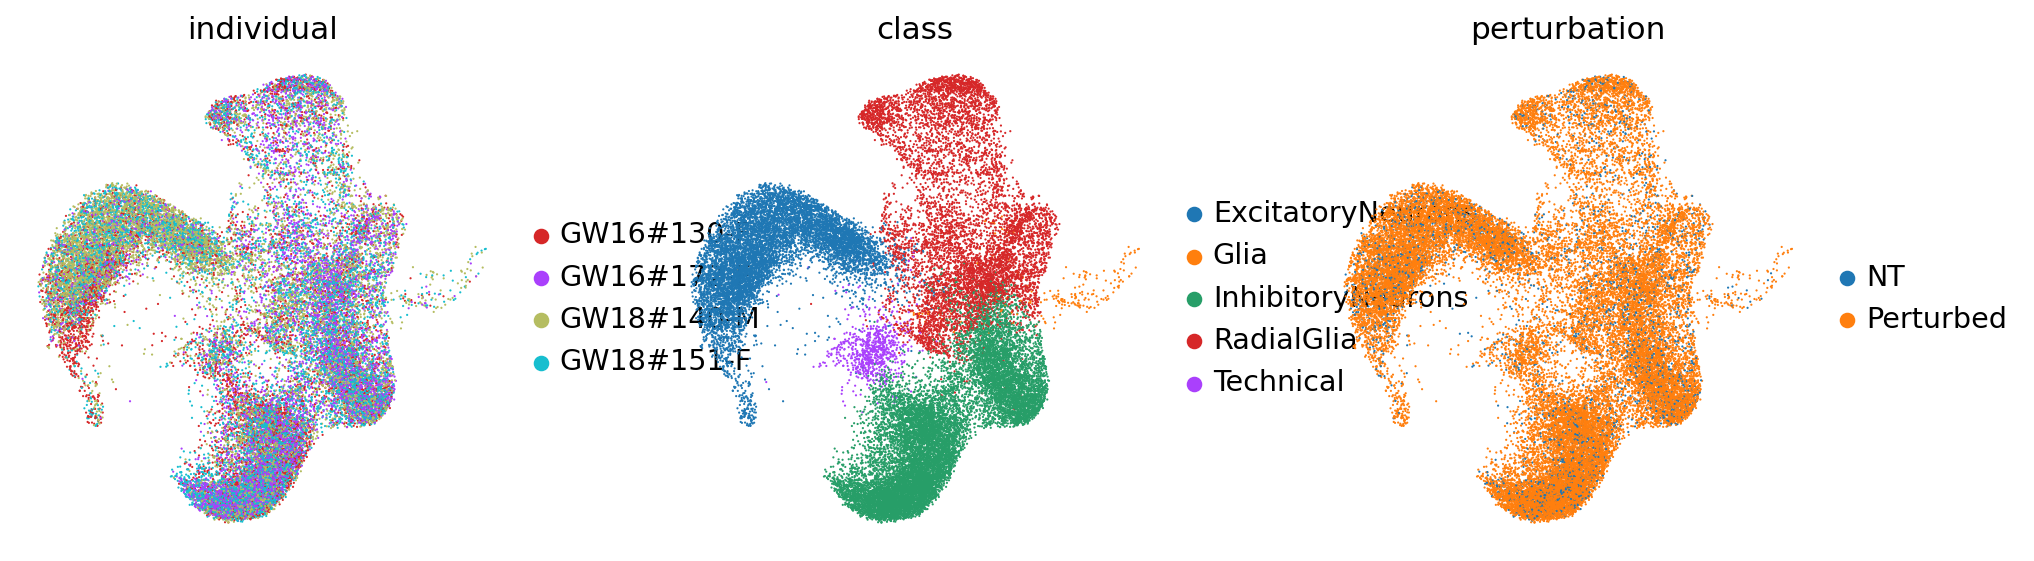

In [6]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, batch_key='individual',min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

# Visualize
sc.pl.umap(adata, color=['individual','class','perturbation'], frameon=False)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


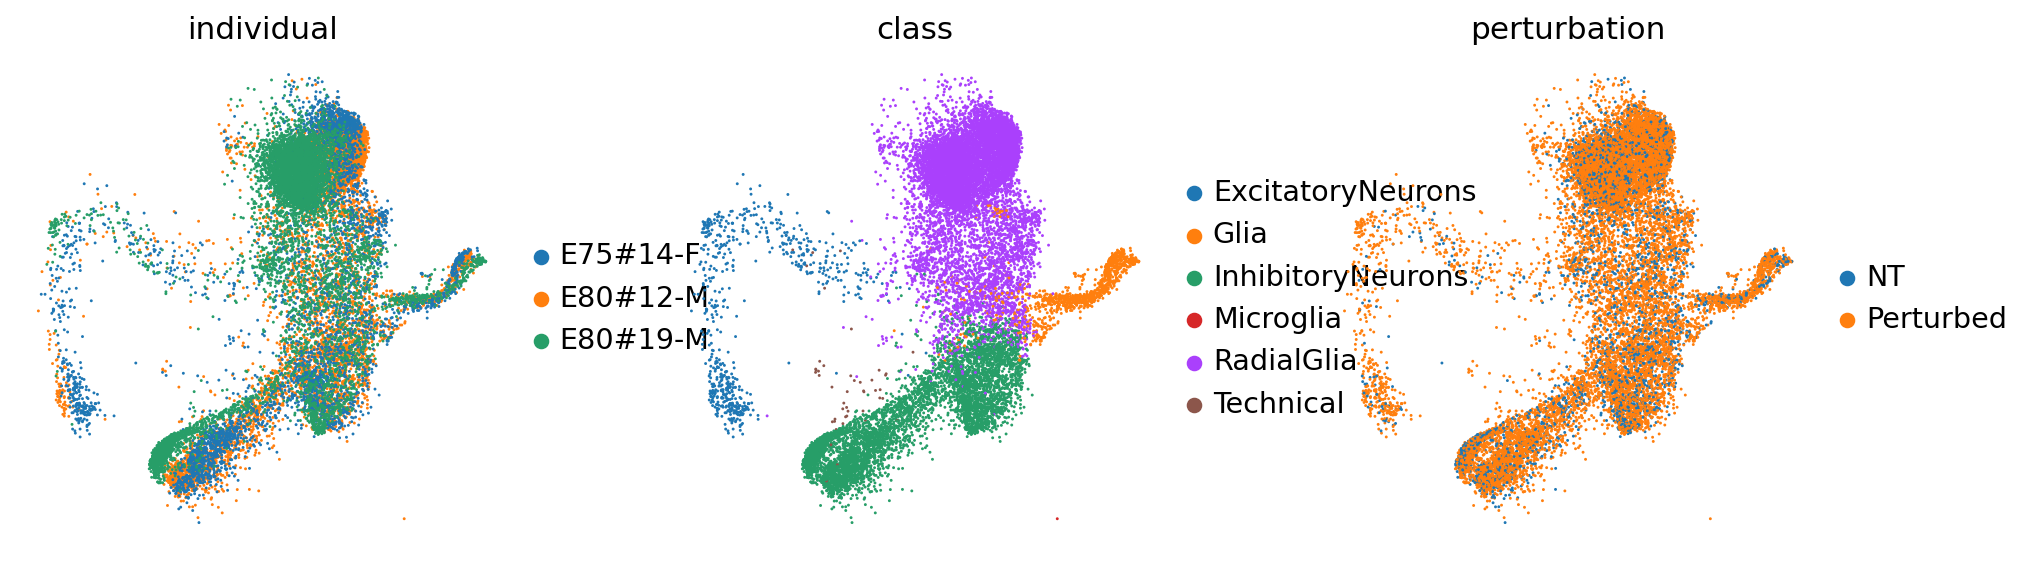

In [18]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, batch_key='individual',min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

# Visualize
sc.pl.umap(adata, color=['individual','class','perturbation'], frameon=False)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


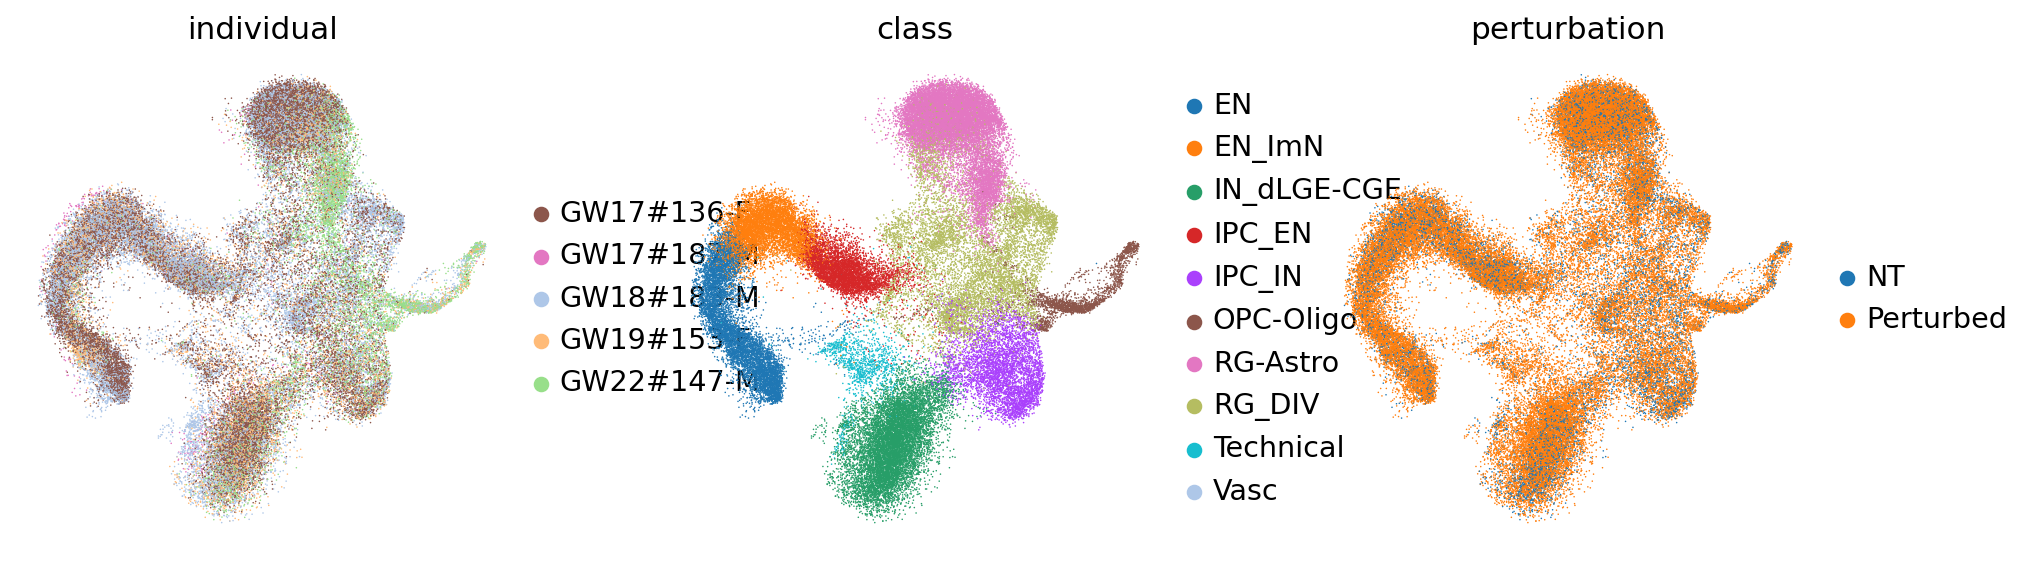

In [7]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, batch_key='individual',min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

# Visualize
sc.pl.umap(adata, color=['individual','class','perturbation'], frameon=False)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


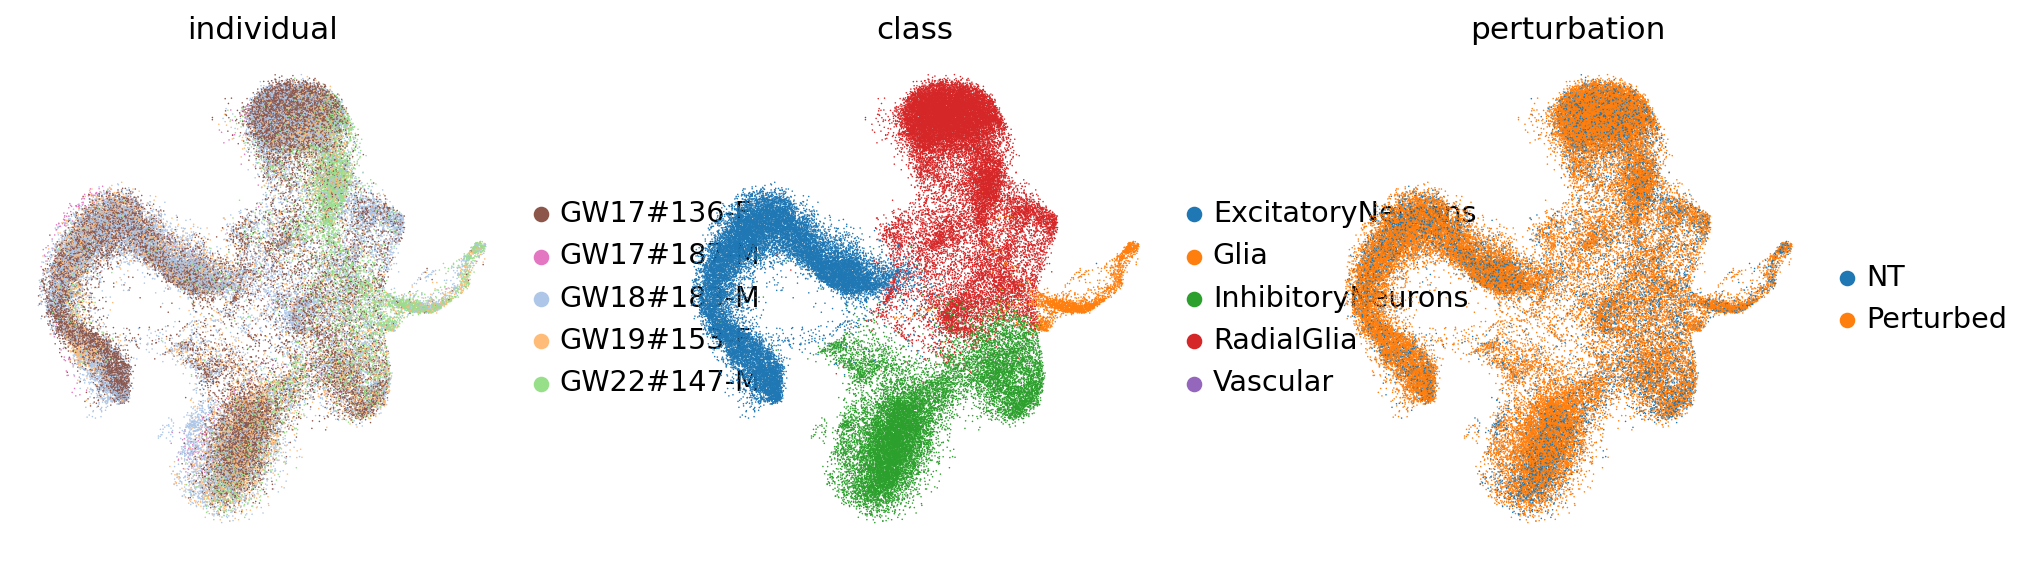

In [21]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, batch_key='individual',min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

# Visualize
sc.pl.umap(adata, color=['individual','class','perturbation'], frameon=False)

## Generation of pseudo-bulk profiles

In [8]:
adata.obs['individual-guide'] = adata.obs['individual'].astype(str) + adata.obs['sgRNA_effecitve'].astype(str)

In [9]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    adata,
    sample_col='individual-guide',
    groups_col='class',
    layer='counts',
    mode='sum',
    min_cells=2,
    min_counts=0
)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


It has generated a profile for each sample and cell type. We can plot their quality control metrics:

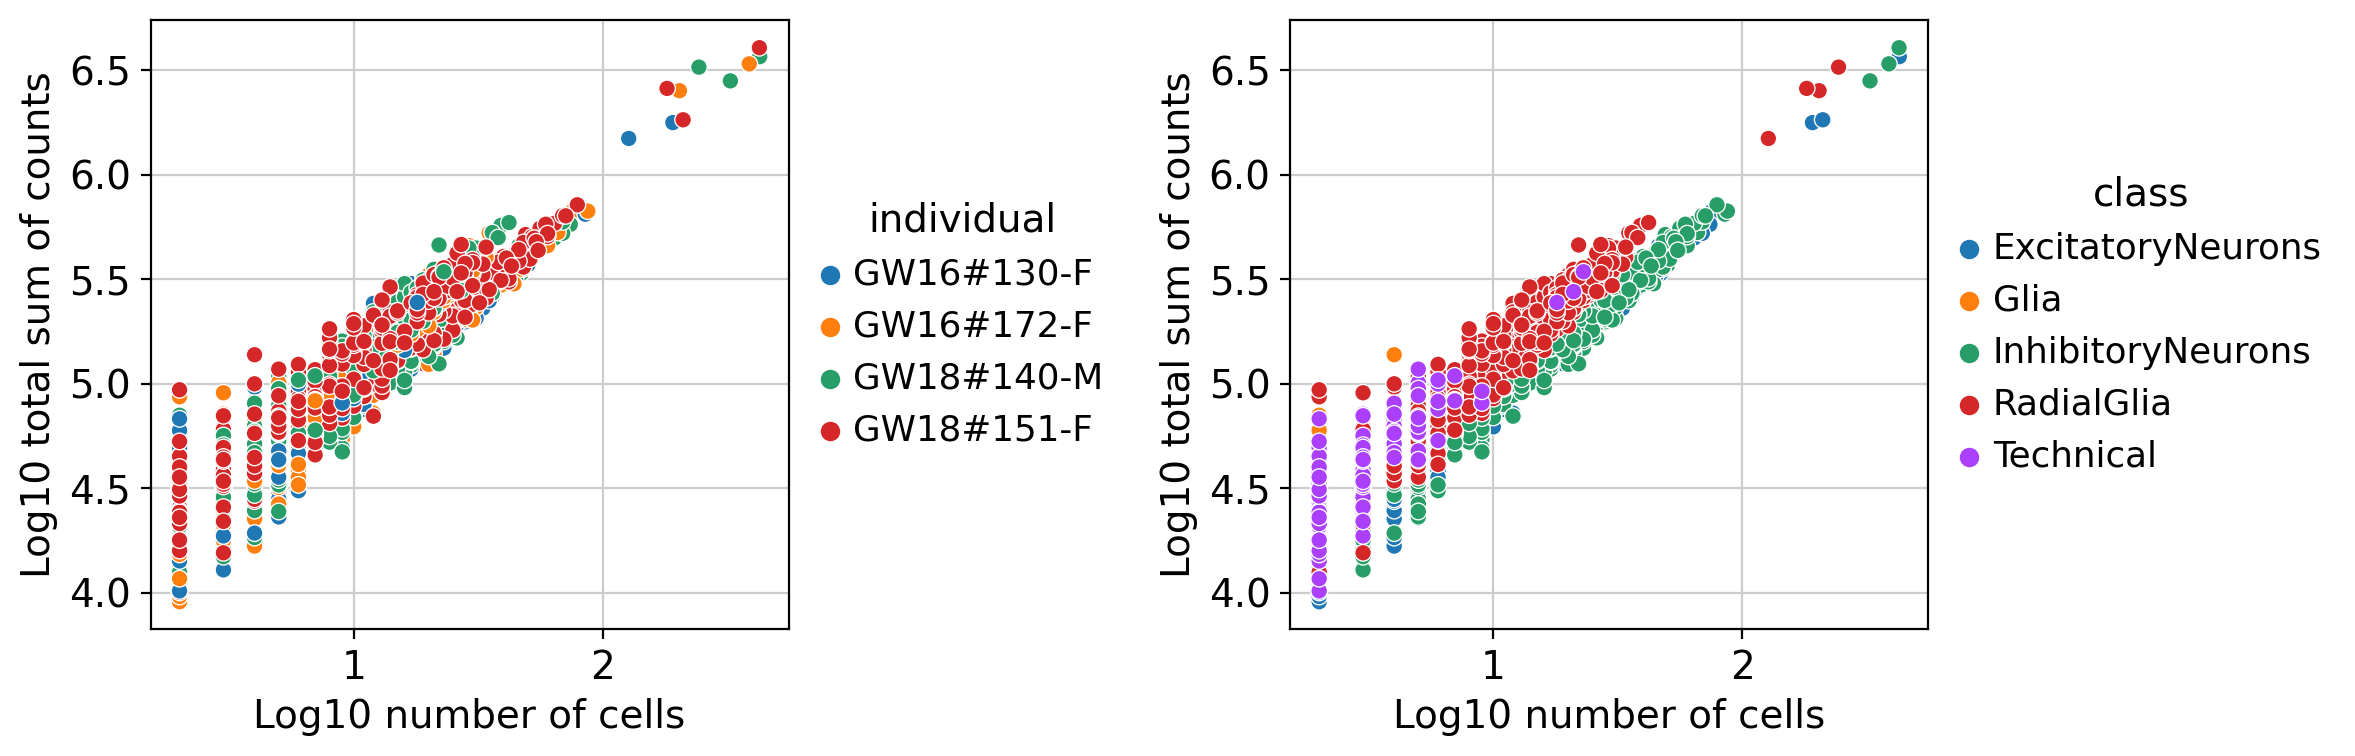

In [9]:
dc.plot_psbulk_samples(pdata, groupby=['individual', 'class'], figsize=(12, 4))

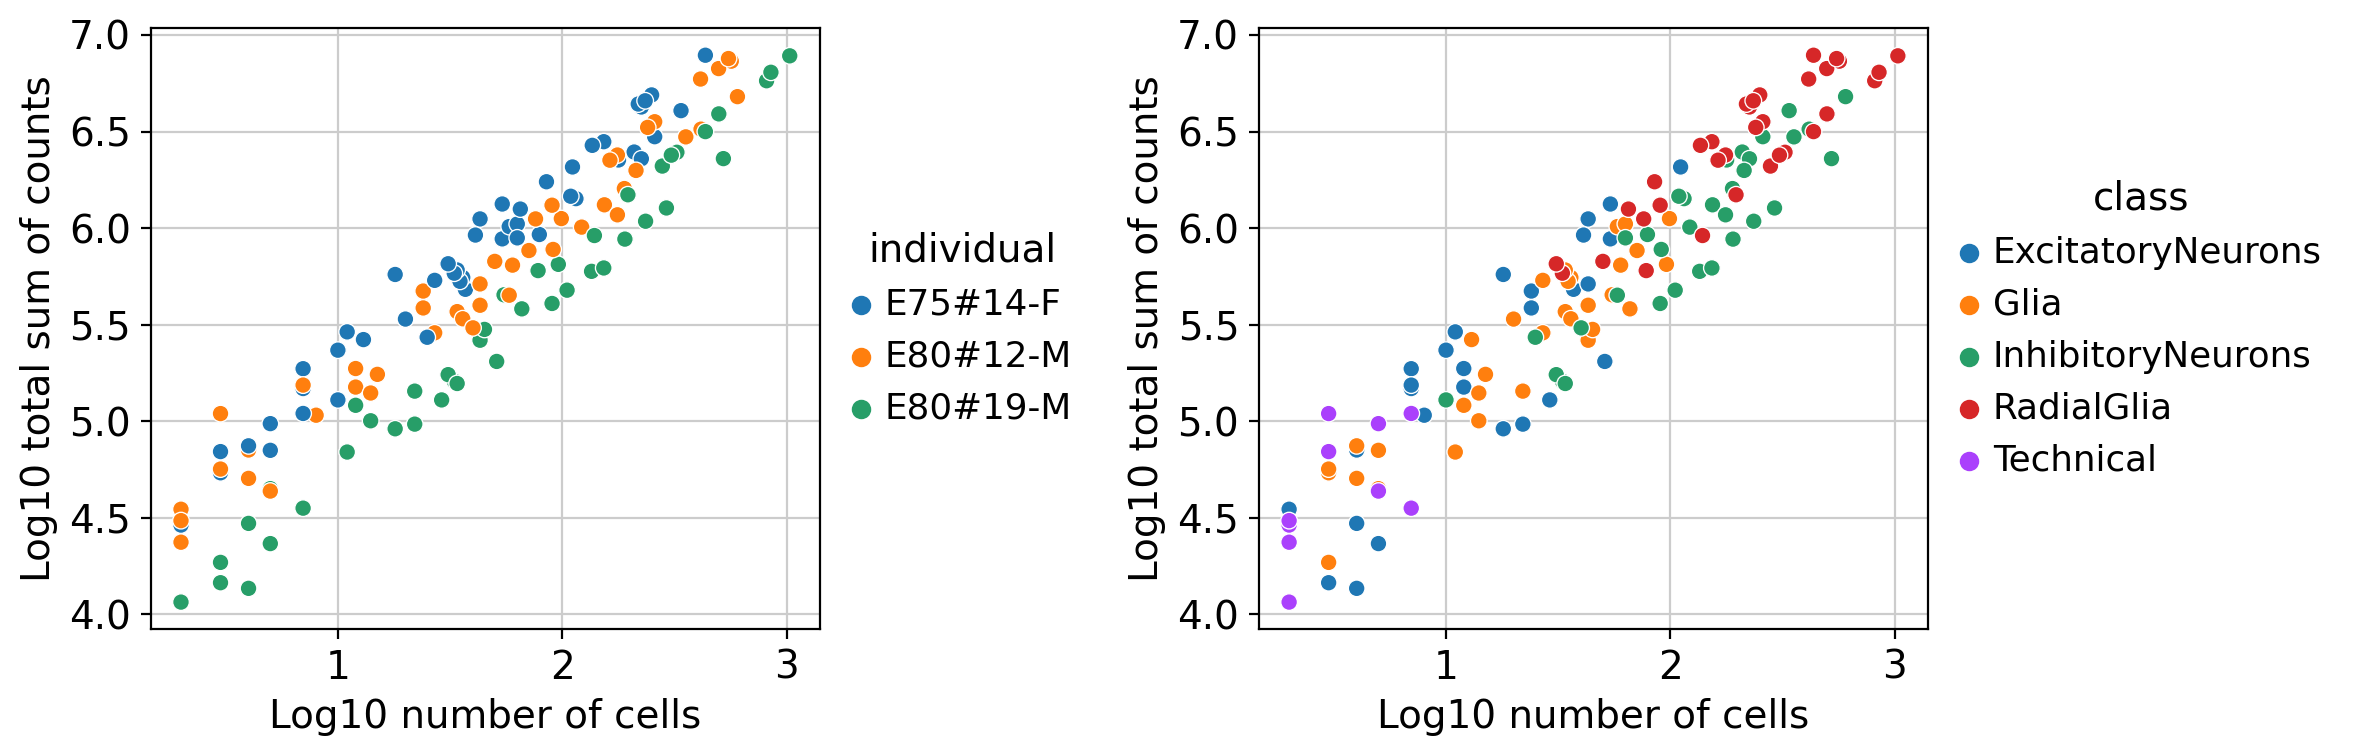

In [21]:
dc.plot_psbulk_samples(pdata, groupby=['individual', 'class'], figsize=(12, 4))

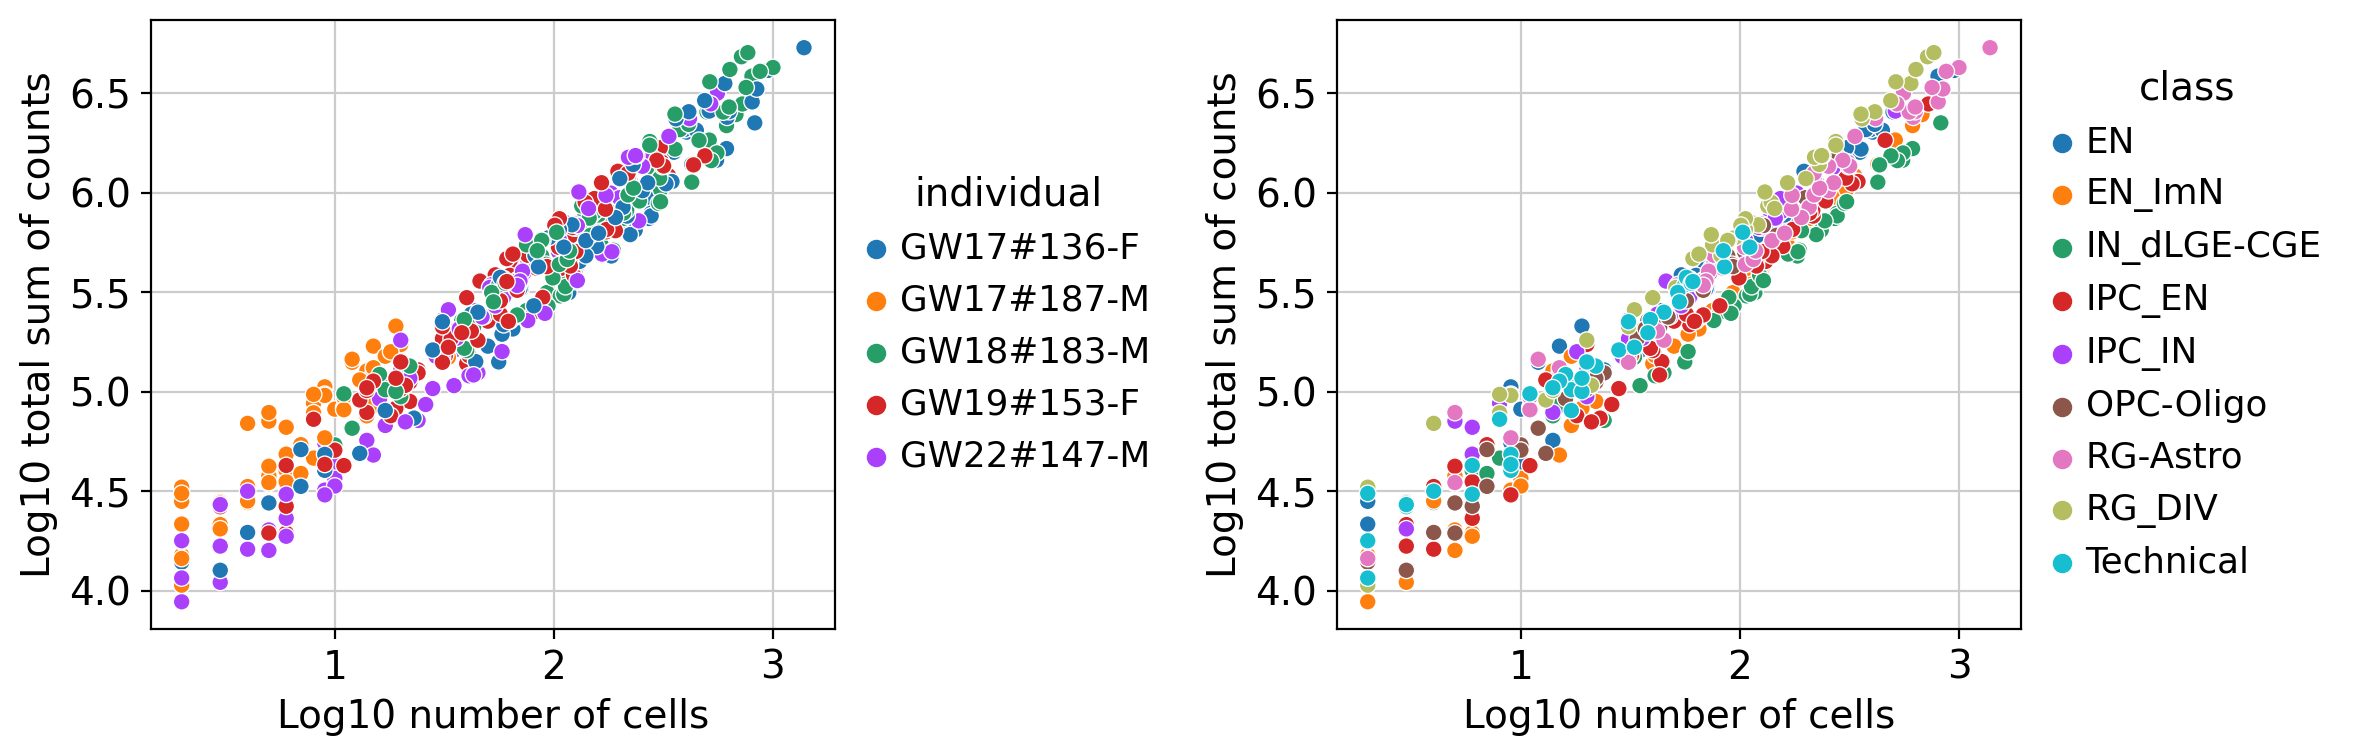

In [10]:
dc.plot_psbulk_samples(pdata, groupby=['individual', 'class'], figsize=(12, 4))

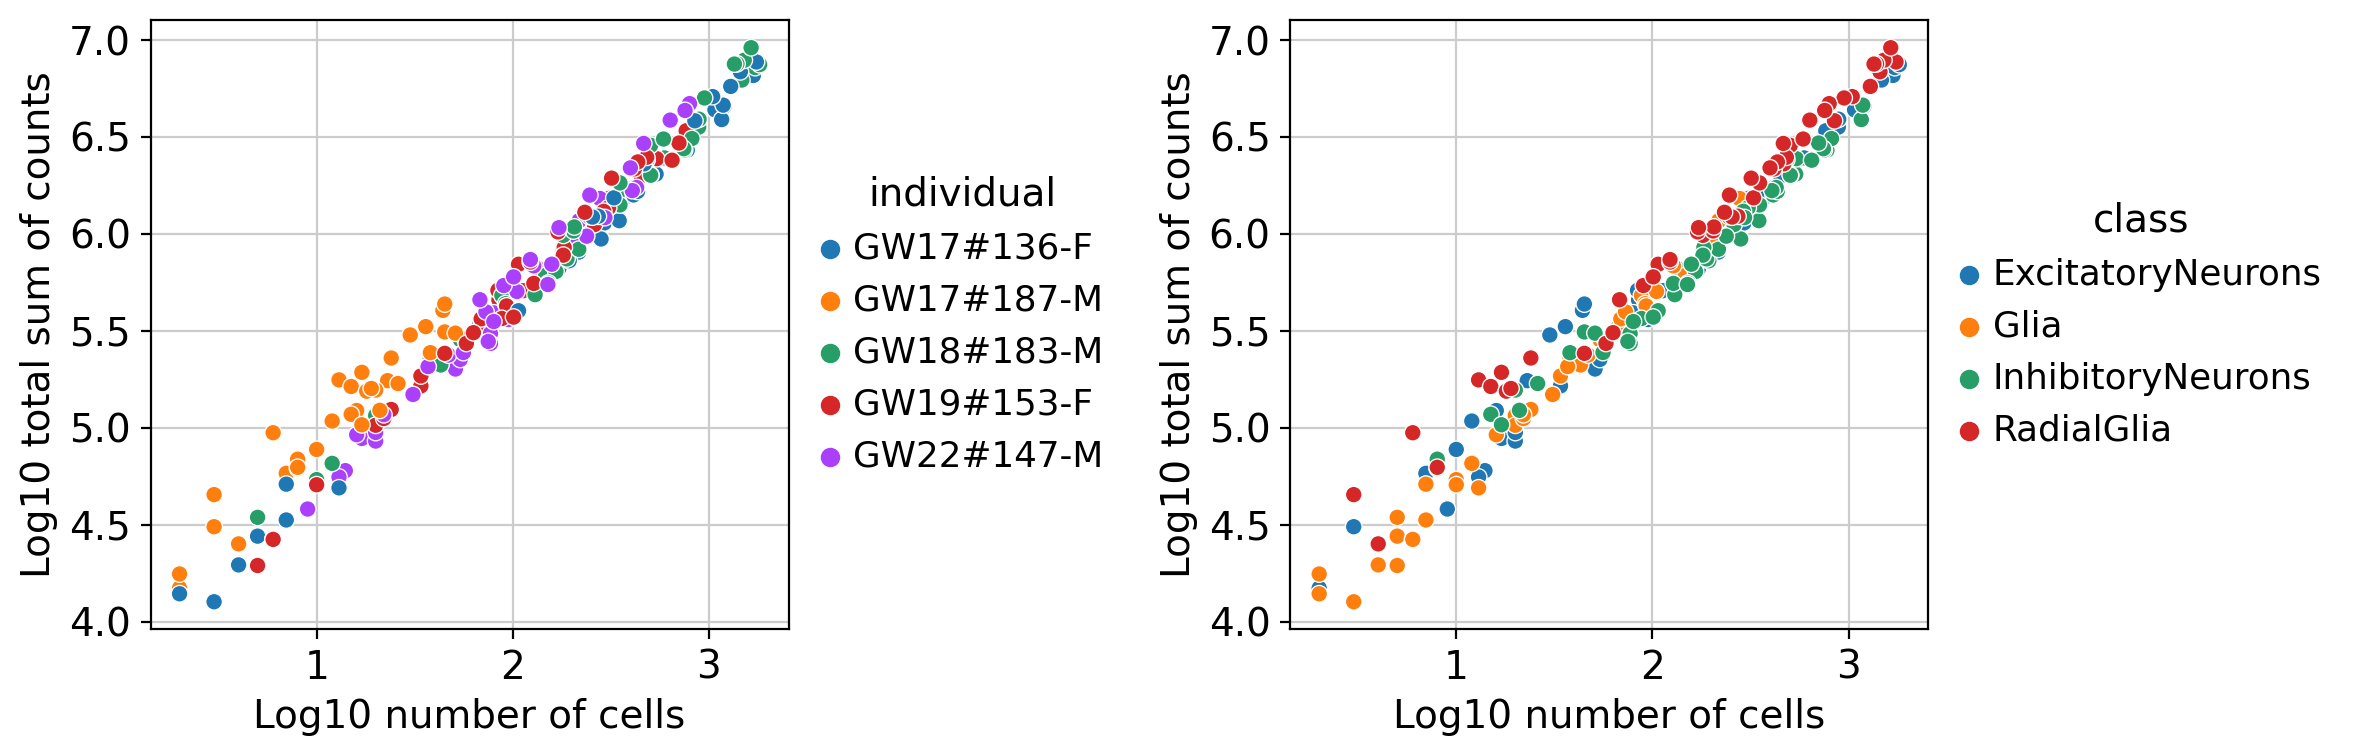

In [24]:
dc.plot_psbulk_samples(pdata, groupby=['individual', 'class'], figsize=(12, 4))

### Exploration of pseudobulk profiles

In [11]:
# Store raw counts in layers
pdata.layers['counts'] = pdata.X.copy()

# Normalize, scale and compute pca
sc.pp.normalize_total(pdata, target_sum=1e4)
sc.pp.log1p(pdata)
sc.pp.scale(pdata, max_value=10)
sc.tl.pca(pdata)

# Return raw counts to X
dc.swap_layer(pdata, 'counts', X_layer_key=None, inplace=True)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


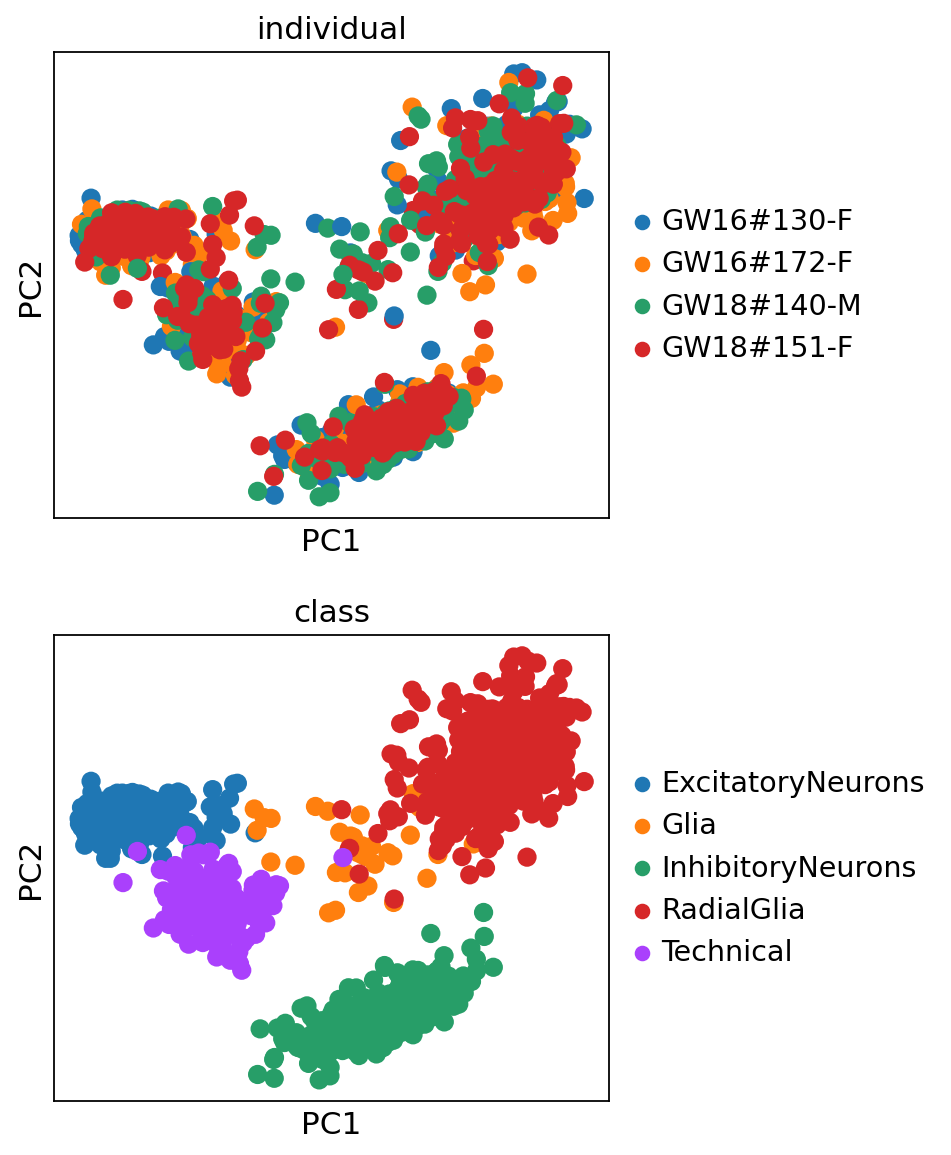

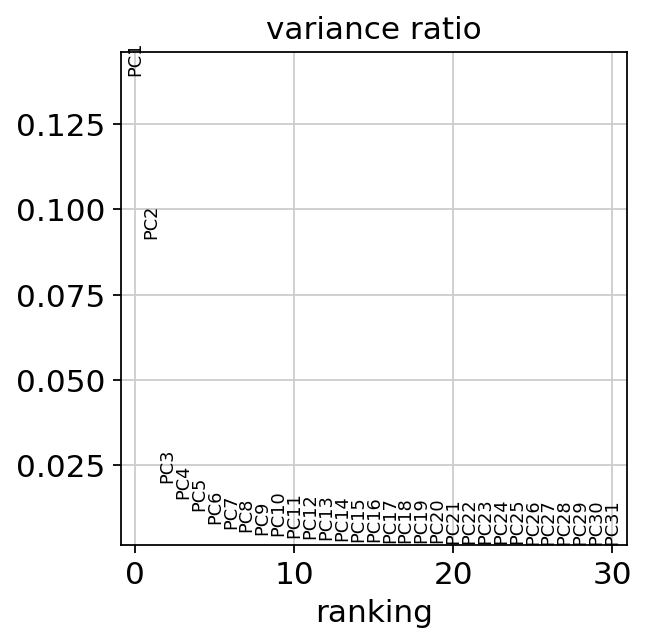

In [11]:
sc.pl.pca(pdata, color=['individual', 'class'], ncols=1, size=300)
sc.pl.pca_variance_ratio(pdata)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


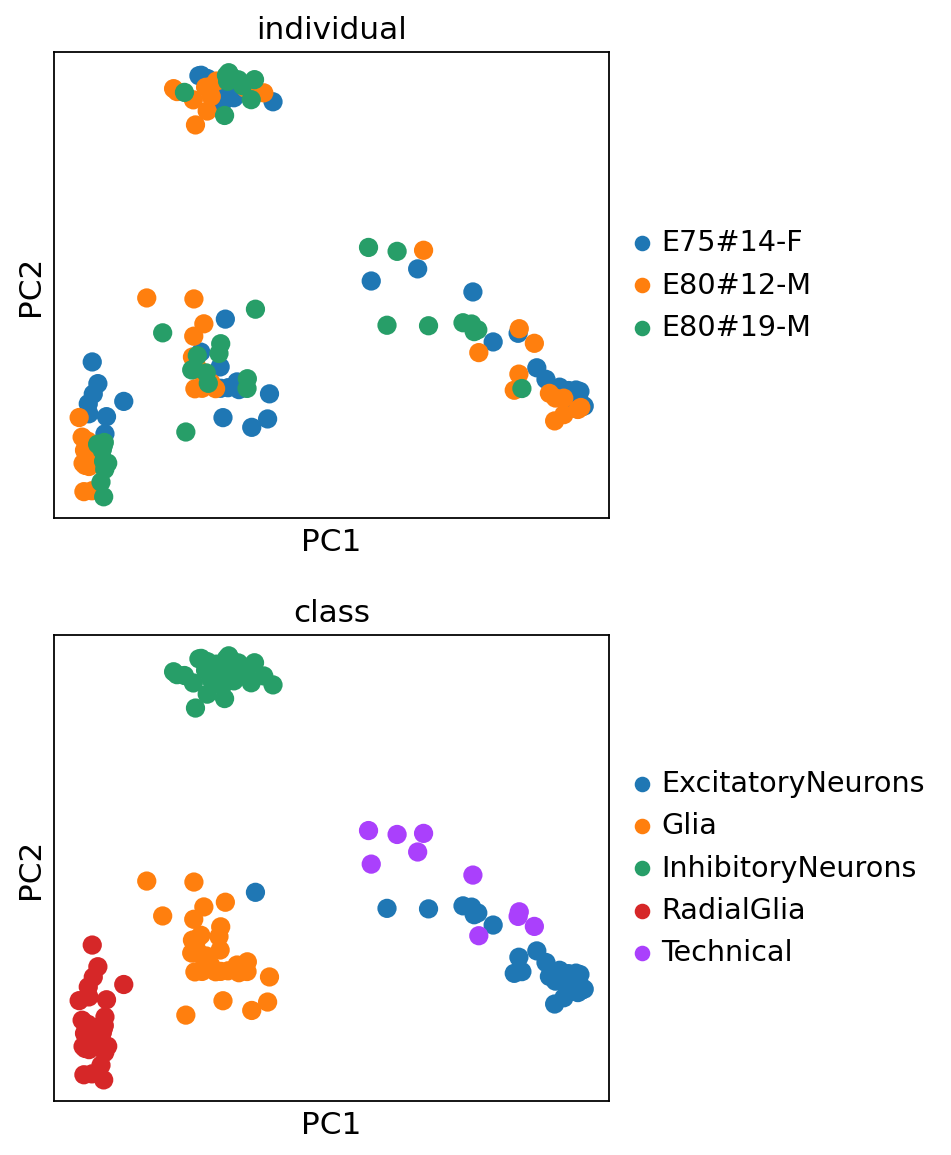

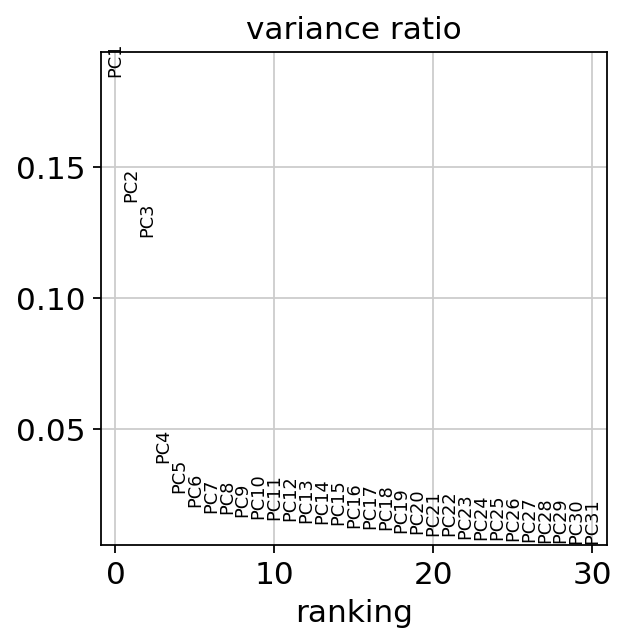

In [23]:
sc.pl.pca(pdata, color=['individual', 'class'], ncols=1, size=300)
sc.pl.pca_variance_ratio(pdata)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


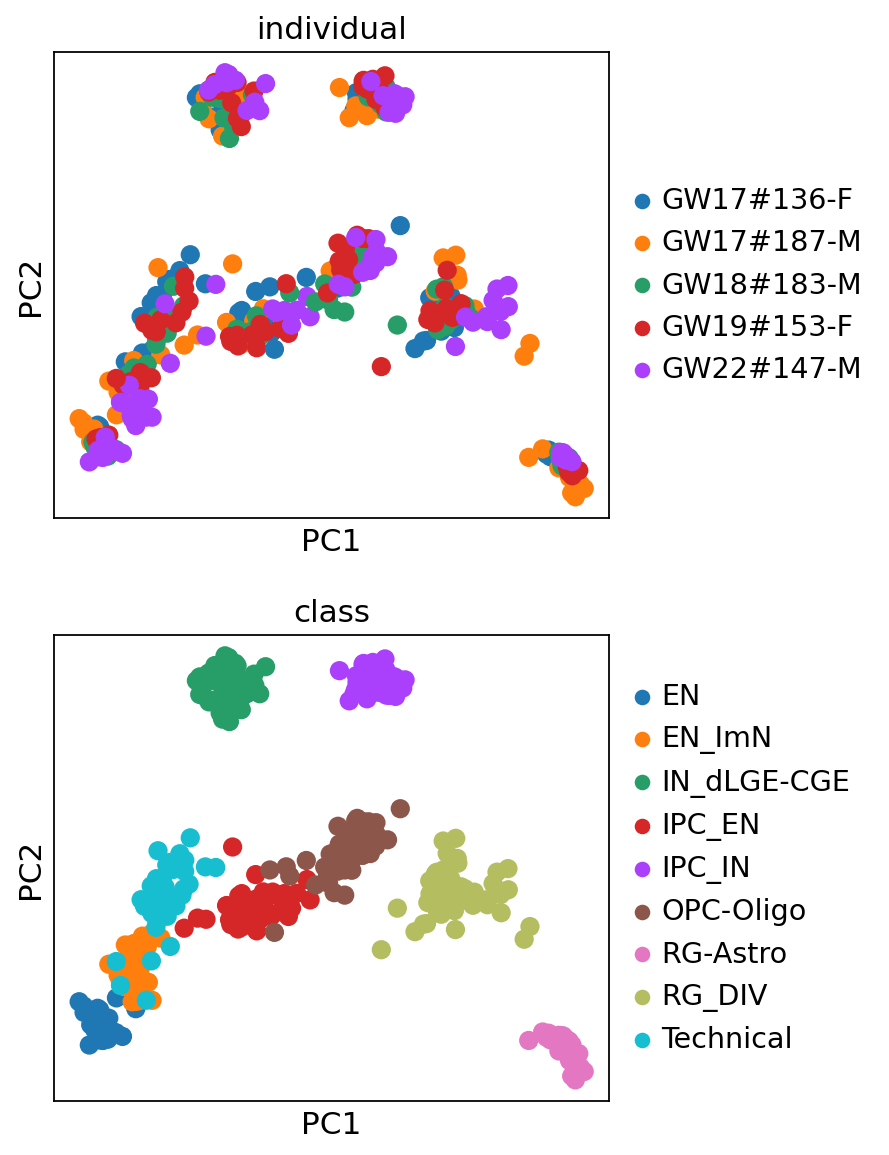

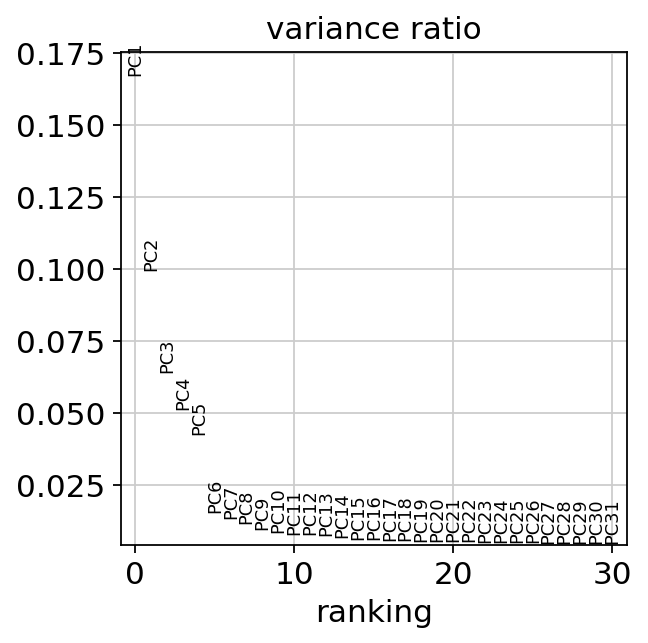

In [12]:
sc.pl.pca(pdata, color=['individual', 'class'], ncols=1, size=300)
sc.pl.pca_variance_ratio(pdata)

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


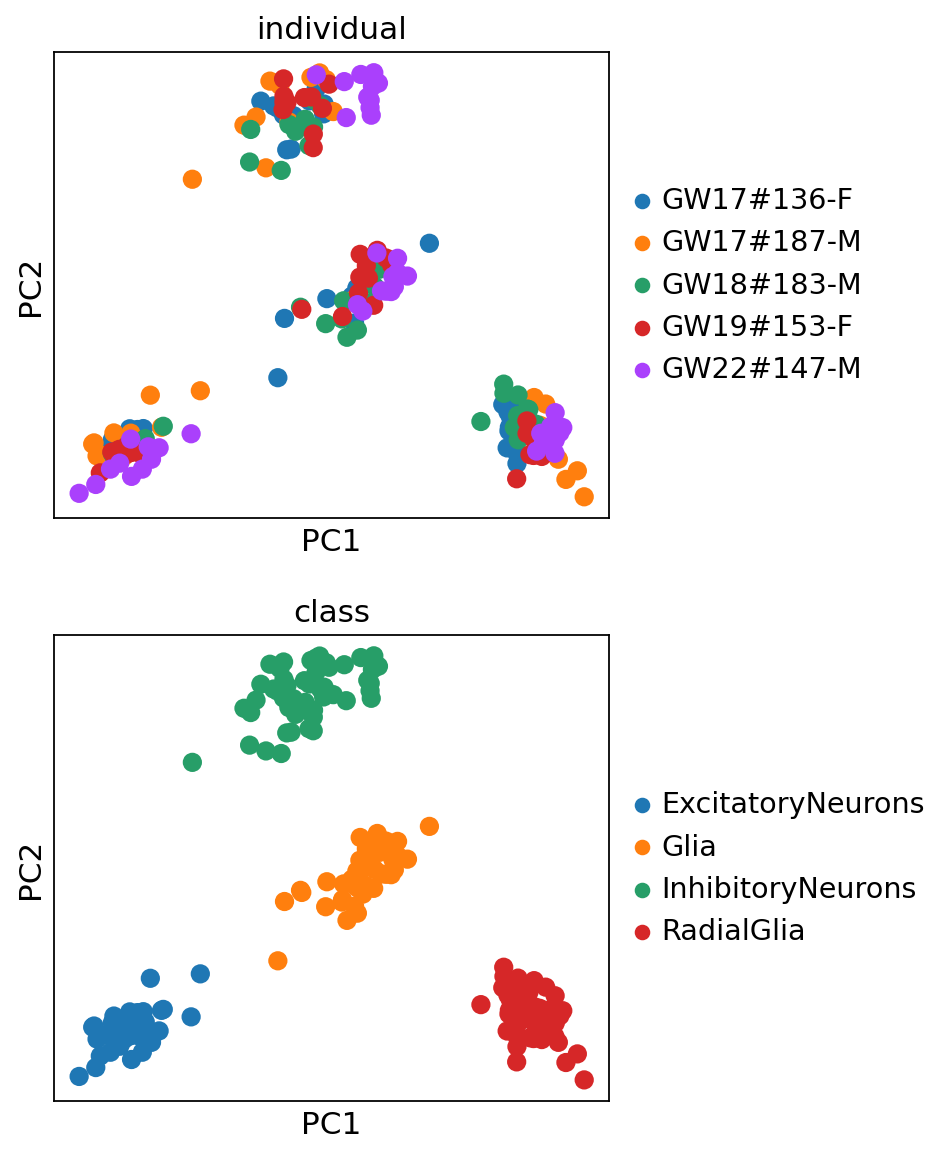

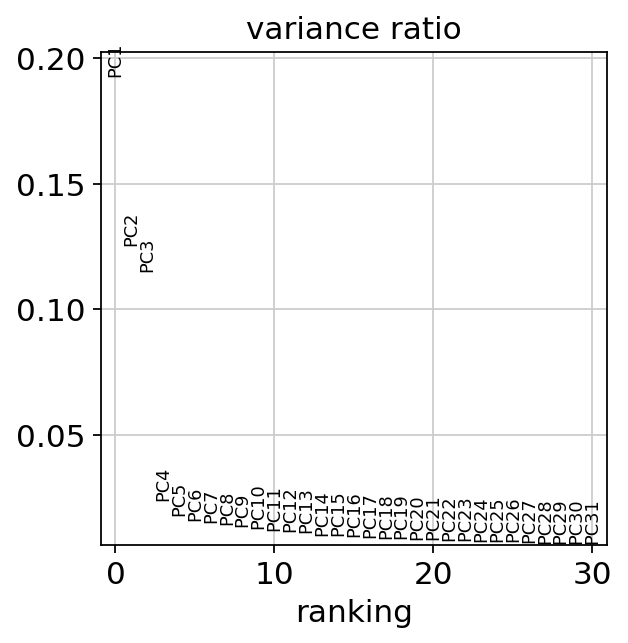

In [26]:
sc.pl.pca(pdata, color=['individual', 'class'], ncols=1, size=300)
sc.pl.pca_variance_ratio(pdata)

In [12]:
dc.get_metadata_associations(
    pdata,
    obs_keys = ['sex', 'Gene_target', 'psbulk_n_cells', 'psbulk_counts'],  # Metadata columns to associate to PCs
    obsm_key='X_pca',  # Where the PCs are stored
    uns_key='pca_anova',  # Where the results are stored
    inplace=True,
)

  0%|                                                    | 0/50 [00:00<?, ?it/s]


ValueError: zero-size array to reduction operation maximum which has no identity

In [13]:
pdata

AnnData object with n_obs × n_vars = 127 × 29821
    obs: 'batch_name', 'call', 'species', 'individual-Q', 'individual', 'batch', 'percent_mito', 'total_counts_mt', 'pct_counts_mt', 'gene_NKS', 'sgRNA_effecitve', 'timepoint', 'stage', 'sample_id', 'sex', 'species_batch', 'Ident', '_scvi_batch', '_scvi_labels', 'labels_scanvi', 'timepoint_batch_name', 'class', 'Gene_target', 'perturbation', 'num_sgRNA_effective', 'individual-guide', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_ids-HD0', 'feature_types-HD0', 'genome-HD0', 'mt-HD0', 'n_cells_by_counts-HD0', 'mean_counts-HD0', 'pct_dropout_by_counts-HD0', 'total_counts-HD0', 'gene_ids-HD7', 'feature_types-HD7', 'genome-HD7', 'mt-HD7', 'n_cells_by_counts-HD7', 'mean_counts-HD7', 'pct_dropout_by_counts-HD7', 'total_counts-HD7', 'gene_ids-HM2ndD7', 'feature_types-HM2ndD7', 'genome-HM2ndD7', 'mt-HM2ndD7', 'n_cells_by_counts-HM2ndD7', 'mean_counts-HM2ndD7', 'pct_dropout_by_counts-HM2ndD7', 'total_counts-HM2ndD7', 'feature_types-HMD7', 'mt-H

## Contrast between conditions

In [13]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet, DefaultInference
from pydeseq2.ds import DeseqStats

In [35]:
adata.obs['sgRNA_effecitve'].unique()

['ZNF219_g3', 'SOX2_g3', 'non-targeting', 'ARX_g1', 'ARX_g2', ..., 'NEUROD2_g3', 'SOX2_g2', 'NR2E1_g1', 'ZNF219_g1', 'NR2E1_g3']
Length: 11
Categories (11, object): ['ARX_g1', 'ARX_g2', 'NEUROD2_g1', 'NEUROD2_g3', ..., 'SOX2_g3', 'ZNF219_g1', 'ZNF219_g3', 'non-targeting']

In [14]:
#pseudobulk per guide
dir='/wynton/scratch/jding/brainchromatin/HM2D/DEseq2/2D_guides_bulk'
if not os.path.exists(os.path.join(dir)):
    os.makedirs(os.path.join(dir))


targets=adata.obs['sgRNA_effecitve'].values.unique().to_list()
targets.remove("non-targeting")

inference = DefaultInference(n_cpus=1)

for celltype in pdata.obs['class'].unique():
    print(celltype)
    sub = pdata[pdata.obs['class'] == celltype]
    for gene in targets:
        print(gene)
        if gene in sub.obs['sgRNA_effecitve'].unique():
            if (pd.crosstab(sub.obs['class'],sub.obs['sgRNA_effecitve'])[gene] > 1).bool():
                sub2 = sub[sub.obs['sgRNA_effecitve'].isin([gene,'non-targeting'])]
                #print(sub2.obs.head(5))
                try:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                       refit_cooks=True,inference=inference)
                except KeyError:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                   refit_cooks=True,inference=inference)
                dds.deseq2()
                stat_res = DeseqStats(dds,contrast=["perturbation", 'Perturbed', 'NT'],inference=inference)
                stat_res.summary()
                stat_res.results_df.to_csv(os.path.join(dir,gene + '.' + celltype +'.csv'))
        else:
            continue

ExcitatoryNeurons
BHLHE22_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.55 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 22.14 seconds.

Fitting LFCs...
... done in 16.37 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.60 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.164038        0.942756  0.612493  1.539212  0.123753       NaN
A1BG-AS1   1.432834       -0.427090  1.157494 -0.368979  0.712144       NaN
A1CF       0.599131        0.142543  1.517758  0.093917  0.925175       NaN
A2M        8.718184       -0.318143  0.552150 -0.576189  0.564487       NaN
A2M-AS1    1.481157        1.460773  1.095360  1.333600  0.182335       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.508381        1.552038  2.033835  0.763109  0.445398       NaN
ZYG11B    81.393683        0.234028  0.170825  1.369984  0.170692  0.987641
ZYX       12.148442        0.419700  0.431481  0.972695  0.330705       NaN
ZZEF1     42.811239        0.019802  0.230945  0.085743  0.931671       NaN
ZZZ3      65.533394        0.155956  0.184686  0.844437  0.398425  0.996188

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.099088        0.272427  0.744193  0.366070  0.714313  0.986015
A1BG-AS1   4.251919        1.139478  0.748859  1.521618  0.128105  0.974128
A1CF       1.221583        1.513294  0.946896  1.598162  0.110007  0.974128
A2M       11.873464        1.116554  0.441788  2.527354  0.011493  0.974128
A2M-AS1    1.084769        0.965002  1.035840  0.931613  0.351537  0.974128
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.130947        0.798152  1.907308  0.418470  0.675603  0.980816
ZYG11B    73.792558        0.059830  0.193591  0.309054  0.757281  0.986664
ZYX        7.395401       -0.527880  0.560726 -0.941422  0.346488  0.974128
ZZEF1     42.732716        0.184275  0.213916  0.861437  0.388998  0.974128
ZZZ3      57.049226        0.005894  0.242200  0.024333  0.980587  0.999178

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.26 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.958482       -0.924246  1.041430 -0.887478  0.374821  0.918318
A1BG-AS1   2.902779        0.538732  1.451149  0.371245  0.710455  0.953899
A1CF       1.178137        1.247447  1.130518  1.103429  0.269841  0.918318
A2M        4.811735       -1.150176  0.717624 -1.602756  0.108989  0.918318
A2M-AS1    0.760045        0.558425  1.364189  0.409346  0.682286  0.948265
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.105861        1.540394  2.451634  0.628313  0.529799  0.918318
ZYG11B    53.658608       -0.158815  0.247970 -0.640461  0.521873  0.918318
ZYX        8.679530        0.094814  0.486682  0.194816  0.845537  0.978366
ZZEF1     28.064860       -0.478586  0.287715 -1.663402  0.096232  0.918318
ZZZ3      49.859432       -0.074959  0.240052 -0.312263  0.754841  0.960642

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.07 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 24.41 seconds.

Fitting LFCs...
... done in 17.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.69 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.363435       -0.006810  1.107250 -0.006151  0.995092  0.998976
A1BG-AS1   2.372278        1.409676  0.991342  1.421987  0.155030  0.948057
A1CF       2.131677        2.175912  1.208603  1.800352  0.071805  0.948057
A2M        7.506140       -0.340158  0.770389 -0.441541  0.658822  0.948637
A2M-AS1    0.412922        0.166973  2.253994  0.074079  0.940948  0.989866
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.628971        2.586259  1.908564  1.355081  0.175392  0.948057
ZYG11B    67.488361        0.082028  0.240646  0.340865  0.733205  0.956491
ZYX        7.302709       -0.546625  0.763453 -0.715990  0.473997  0.948057
ZZEF1     38.072516        0.095346  0.308087  0.309476  0.756959  0.957590
ZZZ3      58.449296        0.053497  0.282008  0.189701  0.849544  0.976172

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.48 seconds.

Fitting dispersion trend curve...
... done in 1.07 seconds.

Fitting MAP dispersions...
... done in 26.71 seconds.

Fitting LFCs...
... done in 18.42 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.07 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.921459        0.641551  0.713647  0.898975  0.368666  0.982995
A1BG-AS1   1.621675       -0.170495  1.121979 -0.151960  0.879219  0.989950
A1CF       0.373426       -0.315784  1.844799 -0.171175  0.864086  0.988476
A2M        5.868699       -1.423176  0.772065 -1.843337  0.065280  0.982995
A2M-AS1    0.365001       -0.421057  2.074529 -0.202965  0.839162  0.988336
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.121049        1.119060  3.488935  0.320746  0.748403  0.982995
ZYG11B    63.062913       -0.104253  0.192749 -0.540877  0.588592  0.982995
ZYX        9.497225       -0.022510  0.472116 -0.047678  0.961973  0.996616
ZZEF1     41.719933        0.261478  0.215944  1.210858  0.225950  0.982995
ZZZ3      56.251146        0.011810  0.207049  0.057041  0.954513  0.996131

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.37 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 23.51 seconds.

Fitting LFCs...
... done in 18.34 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.98 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.123679       -0.725056  1.086085 -0.667587  0.504397  0.959665
A1BG-AS1   1.163937        0.150336  1.151833  0.130519  0.896156  0.984671
A1CF       0.562084        0.774373  1.452649  0.533076  0.593981  0.959665
A2M        6.180767       -0.307816  0.608773 -0.505633  0.613114  0.959665
A2M-AS1    0.787891        1.156359  1.370869  0.843523  0.398936  0.959665
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106584        1.485655  3.415839  0.434931  0.663612  0.960437
ZYG11B    58.419780       -0.038539  0.200032 -0.192666  0.847221  0.976677
ZYX        8.007312        0.021186  0.506002  0.041869  0.966603  0.994579
ZZEF1     36.581228        0.276290  0.232681  1.187420  0.235062  0.959665
ZZZ3      44.288550       -0.246007  0.234898 -1.047294  0.294964  0.959665

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.74 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.95 seconds.

Fitting LFCs...
... done in 18.43 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.91 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.770505       -0.025139  0.865926 -0.029032  0.976839  0.997921
A1BG-AS1   4.549946        1.898327  0.690119  2.750723  0.005946  0.997921
A1CF       1.015470        0.917859  1.377196  0.666469  0.505111  0.997921
A2M       12.893706        0.492802  0.481920  1.022579  0.306507  0.997921
A2M-AS1    0.774748        0.107251  1.719785  0.062363  0.950274  0.997921
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.020687        2.376931  1.580534  1.503878  0.132613  0.997921
ZYG11B    88.057443        0.001343  0.199722  0.006722  0.994636  0.998833
ZYX       10.968084       -0.439613  0.555410 -0.791510  0.428647  0.997921
ZZEF1     49.784700        0.010465  0.249302  0.041978  0.966516  0.997921
ZZZ3      69.865885       -0.222265  0.268304 -0.828407  0.407440  0.997921

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.963984        0.086767  0.956634  0.090700  0.927731  0.983984
A1BG-AS1   1.834344        0.583671  1.086691  0.537108  0.591193  0.896283
A1CF       0.533712        1.180870  1.356010  0.870841  0.383841  0.863941
A2M        4.265139       -0.811195  0.783019 -1.035985  0.300209  0.863941
A2M-AS1    0.682270        0.955701  1.390249  0.687432  0.491811  0.874074
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.092821        1.828639  2.396367  0.763088  0.445411  0.868089
ZYG11B    55.429634        0.232072  0.210995  1.099892  0.271379  0.863941
ZYX        4.228429       -1.856174  1.008453 -1.840615  0.065678  0.863941
ZZEF1     27.292881       -0.104723  0.295482 -0.354414  0.723028  0.933187
ZZZ3      44.264921       -0.049037  0.249837 -0.196275  0.844395  0.962964

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.33 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.720568       -0.160723  1.575601 -0.102007  0.918751  0.967305
A1BG-AS1   0.358409        0.728026  1.581702  0.460280  0.645315  0.827611
A1CF       0.169112        2.009964  1.630764  1.232530  0.217751  0.507976
A2M        3.397325       -0.217809  1.021299 -0.213267  0.831119  0.928990
A2M-AS1    0.164772        1.761364  1.667910  1.056030  0.290954  0.557134
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.586204        4.039593  1.652065  2.445179  0.014478  0.500584
ZYG11B    28.010105        0.049696  0.337213  0.147372  0.882838  0.951901
ZYX        2.673766       -0.418572  1.013951 -0.412813  0.679744  0.846189
ZZEF1     21.167221        0.591727  0.363743  1.626773  0.103785  0.500584
ZZZ3      22.667827       -0.351039  0.411408 -0.853261  0.393514  0.644212

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.95 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.433591        0.068916  0.844445  0.081611  0.934956  0.988187
A1BG-AS1   1.175452       -0.469687  1.285113 -0.365483  0.714751  0.958132
A1CF       0.512845        0.783996  1.351738  0.579991  0.561921  0.934899
A2M        4.786467       -0.934230  0.722884 -1.292366  0.196231  0.934899
A2M-AS1    0.690383        1.092803  1.270569  0.860090  0.389740  0.934899
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.105889        1.462444  2.491097  0.587068  0.557158  0.934899
ZYG11B    62.540681        0.170685  0.198958  0.857895  0.390950  0.934899
ZYX        9.523374        0.348523  0.484410  0.719480  0.471845  0.934899
ZZEF1     34.183013        0.204528  0.278418  0.734606  0.462580  0.934899
ZZZ3      50.617513       -0.013614  0.222597 -0.061159  0.951233  0.991375

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.73 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 20.00 seconds.

Fitting LFCs...
... done in 16.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.35 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.797521        0.669047  0.676026  0.989676  0.322333  0.985312
A1BG-AS1   2.653418        1.127887  0.829294  1.360058  0.173812  0.985312
A1CF       0.860588        0.509778  1.430442  0.356378  0.721558  0.985312
A2M        8.837477        0.171083  0.629905  0.271600  0.785929  0.987467
A2M-AS1    1.351042        1.151035  1.397417  0.823687  0.410117  0.985312
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.453074        1.906011  1.981013  0.962140  0.335979  0.985312
ZYG11B    61.469660       -0.275577  0.197654 -1.394239  0.163245  0.985312
ZYX        6.437331       -1.309512  0.690004 -1.897833  0.057718  0.985312
ZZEF1     40.431750        0.262647  0.291919  0.899725  0.368267  0.985312
ZZZ3      52.157318       -0.073515  0.204357 -0.359740  0.719042  0.985312

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.568667        0.011466  0.830882  0.013800  0.988989  0.999104
A1BG-AS1   3.767373        1.479253  0.736219  2.009258  0.044510  0.928085
A1CF       0.338707       -0.006923  1.632947 -0.004240  0.996617  0.999782
A2M        6.063350       -0.353355  0.642407 -0.550048  0.582286  0.933352
A2M-AS1    0.603728        0.470946  1.350767  0.348651  0.727351  0.958373
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.414354        1.970054  1.539011  1.280078  0.200518  0.928085
ZYG11B    58.050586       -0.202123  0.241089 -0.838374  0.401820  0.928085
ZYX        6.811642       -0.223795  0.523585 -0.427429  0.669067  0.951808
ZZEF1     31.980041       -0.043475  0.314784 -0.138112  0.890152  0.984527
ZZZ3      49.007342       -0.013762  0.222600 -0.061823  0.950704  0.993205

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.61 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.78 seconds.

Fitting LFCs...
... done in 16.05 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.35 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.764930       -1.670659  1.336604 -1.249928  0.211326  0.999848
A1BG-AS1   3.115764        1.587668  0.703688  2.256209  0.024058  0.967303
A1CF       0.783920        1.049679  1.286739  0.815767  0.414634  0.999848
A2M        6.116204       -0.649218  0.626602 -1.036092  0.300159  0.999848
A2M-AS1    0.356194       -0.346974  2.105659 -0.164782  0.869116       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.327735        1.820805  2.095816  0.868781  0.384967       NaN
ZYG11B    68.238665       -0.021760  0.243853 -0.089235  0.928895  0.999848
ZYX       11.414538        0.487444  0.415499  1.173154  0.240734  0.999848
ZZEF1     40.783754        0.313763  0.216835  1.447010  0.147894  0.999848
ZZZ3      55.741624       -0.121511  0.216393 -0.561527  0.574438  0.999848

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.22 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 20.71 seconds.

Fitting LFCs...
... done in 16.76 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.44 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.805875        0.296658  0.678304  0.437353  0.661855  0.999049
A1BG-AS1   1.838977        0.261989  0.962096  0.272311  0.785383  0.999049
A1CF       0.722362        0.502942  1.363695  0.368808  0.712271  0.999049
A2M        9.090229        0.252245  0.444267  0.567777  0.570186  0.999049
A2M-AS1    0.418321       -0.787446  2.180268 -0.361169  0.717973  0.999049
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.138859        0.733328  3.711428  0.197586  0.843369  0.999049
ZYG11B    67.819885       -0.343342  0.237725 -1.444285  0.148659  0.999049
ZYX        8.985376       -0.646046  0.510921 -1.264474  0.206060  0.999049
ZZEF1     43.339888        0.099683  0.206144  0.483559  0.628699  0.999049
ZZZ3      59.180278       -0.193683  0.235639 -0.821947  0.411107  0.999049

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.23 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.045500       -0.483856  0.926987 -0.521967  0.601694  0.973445
A1BG-AS1   1.662390        0.403447  0.934119  0.431901  0.665814  0.976086
A1CF       0.813356        1.159176  1.161847  0.997701  0.318424  0.973445
A2M        7.448143       -0.125798  0.577755 -0.217736  0.827635  0.987669
A2M-AS1    0.805538        0.920843  1.246662  0.738646  0.460122  0.973445
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.116400        1.188702  2.441196  0.486934  0.626305  0.973951
ZYG11B    72.138059        0.171973  0.196697  0.874303  0.381953  0.973445
ZYX        7.194184       -0.616513  0.571171 -1.079384  0.280417  0.973445
ZZEF1     35.214751       -0.092315  0.259636 -0.355557  0.722173  0.978804
ZZZ3      48.084579       -0.221861  0.242152 -0.916202  0.359561  0.973445

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.33 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.937083        1.337735  1.059930  1.262097  0.206914  0.480873
A1BG-AS1   0.340983        0.864087  1.645554  0.525104  0.599511  0.796706
A1CF       0.160815        2.141211  1.691501  1.265865  0.205562  0.480873
A2M        4.727407        1.224721  0.713828  1.715709  0.086215  0.452082
A2M-AS1    0.156554        1.897678  1.723569  1.101016  0.270890  0.534703
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.051820        3.444618  2.045436  1.684051  0.092172  0.452082
ZYG11B    26.235871       -0.229817  0.393954 -0.583360  0.559651  0.772060
ZYX        2.421036       -0.815056  1.259411 -0.647172  0.517520  0.744127
ZZEF1     15.881347       -0.505758  0.560977 -0.901567  0.367287  0.622043
ZZZ3      18.034230       -0.491923  0.495421 -0.992940  0.320739  0.580529

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.619466       -0.635584  1.068379 -0.594905  0.551907  0.901336
A1BG-AS1   1.480092        1.257918  0.976036  1.288802  0.197467  0.888306
A1CF       1.863024        1.033463  1.423779  0.725859  0.467925  0.893530
A2M        6.818361        0.231301  0.542382  0.426453  0.669778  0.929285
A2M-AS1    0.939776        1.332450  1.159901  1.148762  0.250654  0.888306
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.097372        1.724829  2.527743  0.682359  0.495012  0.894065
ZYG11B    52.149346       -0.196472  0.220058 -0.892822  0.371952  0.888306
ZYX        7.289445       -0.006034  0.522569 -0.011547  0.990787  0.998085
ZZEF1     31.173434        0.231223  0.268439  0.861363  0.389038  0.888306
ZZZ3      53.500521        0.172726  0.364676  0.473641  0.635756  0.921215

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.14 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.393478       -0.189752  0.758688 -0.250105  0.802506  0.998475
A1BG-AS1   1.883150        0.367656  0.796315  0.461697  0.644299  0.998475
A1CF       0.845154        0.539973  1.119450  0.482355  0.629553  0.998475
A2M        8.200039       -0.178071  0.461666 -0.385713  0.699709  0.998475
A2M-AS1    0.695834       -0.269661  1.355962 -0.198870  0.842364  0.998475
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.142255        0.592893  2.267007  0.261531  0.793683  0.998475
ZYG11B    76.228673       -0.122022  0.193645 -0.630129  0.528610  0.998475
ZYX       13.169003        0.414854  0.366842  1.130878  0.258106  0.998475
ZZEF1     48.000585        0.238503  0.199219  1.197192  0.231232  0.998475
ZZZ3      64.846783       -0.082377  0.187452 -0.439455  0.660332  0.998475

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.53 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.044615       -0.582992  2.337393 -0.249420  0.803036  0.947204
A1BG-AS1   3.814634        1.717696  1.492176  1.151135  0.249677  0.711455
A1CF       0.479054        1.585230  2.375698  0.667269  0.504600  0.830760
A2M       10.527614        1.015395  0.899022  1.129443  0.258711  0.711455
A2M-AS1    0.468337        1.332296  2.398559  0.555457  0.578582  0.863985
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.155459        2.825770  2.512746  1.124574  0.260769  0.711455
ZYG11B    61.384851       -0.062783  0.454504 -0.138135  0.890134  0.970563
ZYX       13.546929        1.554027  0.710219  2.188096  0.028663  0.647884
ZZEF1     33.489929       -0.242928  0.618377 -0.392847  0.694432  0.909665
ZZZ3      50.934500       -0.233887  0.516946 -0.452439  0.650952  0.890303

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.53 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.994231        0.547521  0.700193  0.781958  0.434239  0.903764
A1BG-AS1   1.218816        0.343179  0.945965  0.362782  0.716768  0.949972
A1CF       0.865803        1.220241  1.092402  1.117026  0.263983  0.903764
A2M        7.582667        0.176318  0.652172  0.270354  0.786888  0.961769
A2M-AS1    0.498812        0.378192  1.314511  0.287705  0.773572  0.960453
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.470258        1.930710  1.488081  1.297449  0.194477  0.903764
ZYG11B    56.276767       -0.365986  0.214315 -1.707702  0.087692  0.903764
ZYX        6.836219       -0.408308  0.521522 -0.782915  0.433677  0.903764
ZZEF1     33.909166        0.219468  0.269175  0.815333  0.414882  0.903764
ZZZ3      49.236661       -0.040672  0.275899 -0.147416  0.882804  0.981480

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.87 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.34 seconds.

Fitting LFCs...
... done in 17.65 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.79 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.941034        0.487923  0.653632  0.746479  0.455378  0.999917
A1BG-AS1   1.393402       -0.659785  1.145210 -0.576125  0.564530  0.999917
A1CF       0.695812       -0.024570  1.472397 -0.016687  0.986686  0.999917
A2M        9.926332       -0.104103  0.464840 -0.223954  0.822793  0.999917
A2M-AS1    0.426307       -0.847852  2.141871 -0.395846  0.692218  0.999917
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.141413        0.674357  3.577863  0.188480  0.850500  0.999917
ZYG11B    77.209877       -0.092221  0.174466 -0.528591  0.597089  0.999917
ZYX       11.217037       -0.196749  0.465914 -0.422286  0.672816  0.999917
ZZEF1     45.269630        0.129697  0.204257  0.634967  0.525450  0.999917
ZZZ3      70.107277        0.110218  0.183866  0.599446  0.548875  0.999917

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.45 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.78 seconds.

Fitting LFCs...
... done in 15.57 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       6.146415        1.112446  0.563513  1.974125  0.048367  0.99989
A1BG-AS1   1.458613       -0.548328  1.140556 -0.480755  0.630691  0.99989
A1CF       0.431324       -0.736070  1.886735 -0.390129  0.696441  0.99989
A2M        9.425513        0.088643  0.456665  0.194110  0.846090  0.99989
A2M-AS1    0.886298        0.464667  1.317948  0.352569  0.724412  0.99989
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.139878        0.704768  3.541865  0.198982  0.842277  0.99989
ZYG11B    80.437256        0.071173  0.165815  0.429235  0.667753  0.99989
ZYX       10.664695        0.149385  0.410870  0.363581  0.716171  0.99989
ZZEF1     46.501707        0.129423  0.206858  0.625660  0.531538  0.99989
ZZZ3      68.350697        0.191191  0.188073  1.016583  0.309352  0.99989

[34677 rows x 6 columns]
JUN_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.76 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 20.73 seconds.

Fitting LFCs...
... done in 16.37 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.348236       -0.537612  0.960641 -0.559638  0.575726  0.983119
A1BG-AS1   2.638165        0.877286  0.877678  0.999554  0.317527  0.983119
A1CF       0.856913        1.441515  1.227990  1.173882  0.240442  0.983119
A2M       11.573505        0.830047  0.548024  1.514617  0.129869  0.983119
A2M-AS1    1.373689        1.083912  1.271587  0.852409  0.393987  0.983119
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.282257        1.868543  2.150454  0.868906  0.384898  0.983119
ZYG11B    60.635141       -0.144040  0.195280 -0.737607  0.460754  0.983119
ZYX        8.384713        0.067385  0.471827  0.142817  0.886435  0.989022
ZZEF1     37.257695        0.101438  0.230485  0.440109  0.659858  0.983119
ZZZ3      52.230007       -0.065330  0.208919 -0.312704  0.754506  0.983119

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.81 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.002589        0.190576  1.421875  0.134032  0.893377  0.966188
A1BG-AS1   0.650386        0.125362  1.948513  0.064337  0.948702  0.984363
A1CF       0.306650        1.399214  1.990000  0.703123  0.481979  0.792336
A2M        4.032796       -1.126975  1.390479 -0.810494  0.417656  0.756873
A2M-AS1    0.994408        2.105008  1.511240  1.392902  0.163650  0.726980
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.099249        2.712961  2.373671  1.142939  0.253064  0.726980
ZYG11B    49.922496        0.037853  0.339570  0.111473  0.911241  0.972458
ZYX        8.063581        0.825880  0.690852  1.195451  0.231911  0.726980
ZZEF1     24.956557       -0.376822  0.500595 -0.752748  0.451601  0.777401
ZZZ3      39.513412       -0.042250  0.379201 -0.111419  0.911284  0.972458

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.73 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.333683       -1.937330  1.516472 -1.277525  0.201417  0.916709
A1BG-AS1   0.816894       -0.398649  1.249454 -0.319059  0.749682  0.955996
A1CF       0.466361        0.868511  1.314128  0.660903  0.508675  0.916709
A2M        5.175495       -0.909006  0.710014 -1.280264  0.200452  0.916709
A2M-AS1    0.826103        1.199127  1.157066  1.036351  0.300038  0.916709
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.101135        1.608140  2.312269  0.695481  0.486754  0.916709
ZYG11B    59.859873        0.115703  0.203630  0.568200  0.569899  0.926326
ZYX        7.122240       -0.234392  0.549083 -0.426879  0.669467  0.941912
ZZEF1     30.499707       -0.027460  0.277775 -0.098857  0.921252  0.987403
ZZZ3      51.078129        0.073366  0.231848  0.316439  0.751669  0.956455

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.75 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.463788       -0.516065  1.240162 -0.416127  0.677317  0.884888
A1BG-AS1   0.742728        0.358241  1.255236  0.285397  0.775340  0.925710
A1CF       0.242447        0.958671  1.604262  0.597577  0.550122  0.827615
A2M        5.212129        0.329571  0.624103  0.528072  0.597449  0.848269
A2M-AS1    0.236731        0.729064  1.660848  0.438971  0.660683  0.878346
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.078497        2.297601  2.217419  1.036160  0.300127  0.740639
ZYG11B    52.178025        0.302840  0.404304  0.749040  0.453833  0.779186
ZYX        4.211859       -0.628409  0.759848 -0.827020  0.408226  0.763599
ZZEF1     23.501390        0.087918  0.310846  0.282834  0.777304  0.925934
ZZZ3      32.880356       -0.194634  0.289123 -0.673188  0.500828  0.803338

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.25 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.289956        0.351395  0.924750  0.379989  0.703953  0.910410
A1BG-AS1   0.542865       -0.471762  1.577355 -0.299084  0.764876  0.932176
A1CF       1.306499        1.489124  1.344490  1.107575  0.268045  0.789352
A2M        4.359448       -1.412815  1.023451 -1.380443  0.167450  0.789352
A2M-AS1    0.249524        0.576606  1.695773  0.340025  0.733837  0.921989
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.082614        2.165195  2.390756  0.905653  0.365120  0.789352
ZYG11B    43.213217       -0.053051  0.245398 -0.216185  0.828844  0.953378
ZYX        4.667696       -0.445106  0.694795 -0.640630  0.521763  0.842219
ZZEF1     25.519484       -0.052780  0.306730 -0.172074  0.863379  0.961393
ZZZ3      35.120753       -0.160880  0.278544 -0.577574  0.563552  0.854108

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.12 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.79 seconds.

Fitting LFCs...
... done in 18.65 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.06 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.313999        1.070282  0.569306  1.879979  0.060111  0.999543
A1BG-AS1   1.915090        0.521333  0.901989  0.577982  0.563276  0.999543
A1CF       0.802930        0.004385  1.479882  0.002963  0.997636  0.999543
A2M        9.110282       -0.121599  0.481759 -0.252406  0.800727  0.999543
A2M-AS1    0.421512       -0.818077  2.164169 -0.378010  0.705423  0.999543
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.139805        0.707100  3.639769  0.194271  0.845964  0.999543
ZYG11B    73.821551       -0.142221  0.176677 -0.804978  0.420833  0.999543
ZYX        9.731160       -0.356591  0.498216 -0.715736  0.474155  0.999543
ZZEF1     47.819663        0.206721  0.199464  1.036385  0.300023  0.999543
ZZZ3      71.218319        0.277138  0.244854  1.131851  0.257697  0.999543

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.68 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.183363        0.690459  0.908591  0.759923  0.447301  0.789003
A1BG-AS1   0.497275       -0.235163  1.600615 -0.146920  0.883195  0.966733
A1CF       0.234313        1.034230  1.650959  0.626442  0.531025  0.830118
A2M        4.422762       -0.237792  0.767227 -0.309937  0.756609  0.922538
A2M-AS1    0.228263        0.808985  1.702710  0.475116  0.634704  0.879366
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.075436        2.382324  2.251632  1.058043  0.290036  0.747507
ZYG11B    29.899096       -1.093900  0.357302 -3.061557  0.002202  0.747507
ZYX        4.029915       -0.806885  0.848463 -0.950996  0.341607  0.747774
ZZEF1     22.546984       -0.188493  0.353492 -0.533232  0.593873  0.860667
ZZZ3      33.593022       -0.017978  0.288470 -0.062321  0.950307  0.986894

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.093279        0.081573  1.066152  0.076512  0.939012  0.982129
A1BG-AS1   1.052942        0.284366  1.329376  0.213910  0.830618  0.949841
A1CF       0.252208        0.835425  1.724747  0.484375  0.628120  0.874358
A2M        3.627297       -1.245726  1.030581 -1.208762  0.226754  0.776469
A2M-AS1    0.246276        0.621450  1.793854  0.346433  0.729017  0.914562
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081676        2.208613  2.603389  0.848361  0.396237  0.789566
ZYG11B    49.663299        0.205767  0.235545  0.873578  0.382348  0.783671
ZYX        7.862675        0.492236  0.565265  0.870805  0.383861  0.784433
ZZEF1     27.340327        0.327793  0.292461  1.120808  0.262370  0.776469
ZZZ3      34.694032       -0.241725  0.294711 -0.820209  0.412097  0.792178

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.62 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.45 seconds.

Fitting LFCs...
... done in 17.79 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.579856       -1.257080  1.325340 -0.948496  0.342877  0.945525
A1BG-AS1   1.447294        0.281684  1.107528  0.254336  0.799236  0.965683
A1CF       1.648210        2.048302  1.036560  1.976057  0.048148  0.945525
A2M        7.499706        0.011149  0.575070  0.019388  0.984532  0.997008
A2M-AS1    1.319739        1.792330  1.086307  1.649929  0.098957  0.945525
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.102437        1.601002  3.461120  0.462568  0.643674  0.945629
ZYG11B    60.153119        0.034169  0.215058  0.158883  0.873761  0.978182
ZYX        9.181927        0.174164  0.514509  0.338505  0.734983  0.953900
ZZEF1     30.582853       -0.094744  0.268025 -0.353488  0.723722  0.952313
ZZZ3      49.897779        0.069267  0.223606  0.309774  0.756732  0.958949

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.55 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 22.45 seconds.

Fitting LFCs...
... done in 18.98 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.88 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.987402       -0.960472  0.971685 -0.988460  0.322927  0.999598
A1BG-AS1   1.035482       -1.236294  1.388030 -0.890683  0.373100  0.999598
A1CF       0.946097        0.967869  1.162751  0.832395  0.405186  0.999598
A2M        9.219850        0.240230  0.529408  0.453772  0.649993  0.999598
A2M-AS1    1.057550        1.176668  1.430917  0.822317  0.410896  0.999598
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.138414        0.736818  3.626442  0.203179  0.838995  0.999598
ZYG11B    69.635447       -0.161807  0.233642 -0.692541  0.488597  0.999598
ZYX        8.795891       -0.281245  0.453455 -0.620226  0.535109  0.999598
ZZEF1     52.645318        0.275600  0.236228  1.166671  0.243343  0.999598
ZZZ3      64.226908        0.021590  0.198020  0.109029  0.913180  0.999598

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.56 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 24.67 seconds.

Fitting LFCs...
... done in 16.82 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.200144       -1.634282  1.688871 -0.967677  0.333206  0.906908
A1BG-AS1   0.596909       -0.716071  1.722362 -0.415750  0.677593  0.921341
A1CF       0.739127        1.240261  1.427961  0.868554  0.385091  0.906908
A2M        4.693686       -0.621875  0.770271 -0.807346  0.419467  0.906908
A2M-AS1    1.099418        1.691958  1.202825  1.406653  0.159530  0.906908
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.091005        1.934366  3.452573  0.560268  0.575297  0.907099
ZYG11B    41.488339       -0.544613  0.263630 -2.065820  0.038845  0.906908
ZYX        7.103181        0.189270  0.554550  0.341304  0.732875  0.932271
ZZEF1     28.261009       -0.057529  0.293691 -0.195883  0.844702  0.965044
ZZZ3      46.794278        0.239227  0.236526  1.011420  0.311815  0.906908

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.51 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.218218       -1.065874  1.316645 -0.809538  0.418206  0.873626
A1BG-AS1   1.436112        0.475135  1.083078  0.438690  0.660886  0.915585
A1CF       0.296541        0.375498  1.716259  0.218789  0.826814  0.958084
A2M        5.573972       -0.225078  0.650653 -0.345927  0.729398  0.932291
A2M-AS1    0.289242        0.157306  1.777157  0.088515  0.929467  0.983601
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.551805        2.379358  1.648573  1.443283  0.148941  0.873626
ZYG11B    45.337043       -0.297934  0.271673 -1.096662  0.272789  0.873626
ZYX        8.155093        0.040282  0.561397  0.071754  0.942798  0.986947
ZZEF1     34.792252        0.247451  0.263912  0.937626  0.348437  0.873626
ZZZ3      40.790136       -0.443029  0.275313 -1.609183  0.107576  0.873626

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.07 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 21.05 seconds.

Fitting LFCs...
... done in 17.02 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.343775        0.732083  0.645217  1.134631  0.256530  0.848476
A1BG-AS1   1.003255       -0.865545  1.378041 -0.628098  0.529940       NaN
A1CF       1.495625        1.884399  1.021679  1.844414  0.065123       NaN
A2M        9.334476        0.240378  0.465802  0.516052  0.605818  0.950809
A2M-AS1    1.590099        1.454489  1.169174  1.244031  0.213488       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.429438        1.765029  2.045150  0.863032  0.388120       NaN
ZYG11B    70.117733        0.128911  0.172387  0.747797  0.454583  0.925345
ZYX        8.268184       -0.179504  0.482727 -0.371854  0.710002  0.971239
ZZEF1     43.891231        0.302128  0.208386  1.449850  0.147100  0.780763
ZZZ3      53.129725       -0.262263  0.210283 -1.247189  0.212328  0.831177

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.320216       -0.202708  0.927777 -0.218488  0.827049  0.967556
A1BG-AS1   1.921642       -0.402102  1.297631 -0.309874  0.756657  0.952880
A1CF       0.889815        1.826407  1.078512  1.693451  0.090370  0.917380
A2M        7.098987       -0.031646  0.558552 -0.056656  0.954819  0.992305
A2M-AS1    0.690960        0.629309  1.380509  0.455853  0.648496  0.932412
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104097        1.511366  2.510667  0.601978  0.547189  0.918379
ZYG11B    61.301345        0.026242  0.211038  0.124347  0.901040  0.982380
ZYX        8.244707        0.379219  0.473115  0.801536  0.422821  0.917380
ZZEF1     37.041597        0.447133  0.228187  1.959505  0.050054  0.917380
ZZZ3      43.124019       -0.252110  0.238441 -1.057327  0.290362  0.917380

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.76 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.09 seconds.

Fitting LFCs...
... done in 16.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.60 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.380889        1.000099  0.624694  1.600943  0.109390  0.994566
A1BG-AS1   2.653427        1.203986  0.753983  1.596834  0.110303  0.994566
A1CF       0.383217       -0.388236  1.845730 -0.210343  0.833400  0.994566
A2M        7.278578       -0.435633  0.565910 -0.769792  0.441423  0.994566
A2M-AS1    0.748848        0.201337  1.549681  0.129922  0.896628  0.994566
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.123962        1.055243  3.649838  0.289121  0.772489  0.994566
ZYG11B    64.389849       -0.037782  0.201148 -0.187834  0.851007  0.994566
ZYX        8.696412        0.059404  0.479463  0.123896  0.901397  0.994566
ZZEF1     48.525864        0.466058  0.249914  1.864872  0.062199  0.994566
ZZZ3      56.974882        0.010414  0.212710  0.048958  0.960953  0.997618

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.113084        0.586164  1.285417  0.456011  0.648382  0.999192
A1BG-AS1   0.762054        1.473993  1.294698  1.138484  0.254918  0.943538
A1CF       0.164258        2.048767  1.671688  1.225568  0.220361       NaN
A2M        2.992950       -0.727929  1.254670 -0.580176  0.561796  0.999192
A2M-AS1    0.159058        1.807905  1.710294  1.057072  0.290479       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052546        3.384448  2.222791  1.522612  0.127856       NaN
ZYG11B    35.570481        0.632514  0.289316  2.186236  0.028798  0.593262
ZYX        3.086262       -0.296435  1.010991 -0.293213  0.769360  0.999192
ZZEF1     20.912240        0.455019  0.393070  1.157603  0.247026  0.943538
ZZZ3      24.019536       -0.034515  0.386210 -0.089368  0.928789  0.999192

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.379095       -2.029583  1.656076 -1.225537  0.220373  0.934315
A1BG-AS1   1.354038        0.225185  1.084202  0.207697  0.835466  0.977762
A1CF       0.991473        1.504095  1.150344  1.307517  0.191037  0.934315
A2M        7.795871       -0.004831  0.586703 -0.008234  0.993431  0.998641
A2M-AS1    0.315904       -0.082271  1.779949 -0.046221  0.963134  0.995210
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104778        1.499494  2.503978  0.598844  0.549277  0.934315
ZYG11B    57.664656       -0.062628  0.327872 -0.191014  0.848514  0.979559
ZYX        8.426690        0.221457  0.489045  0.452836  0.650667  0.947524
ZZEF1     30.110155       -0.174413  0.276433 -0.630940  0.528080  0.934315
ZZZ3      50.420932        0.040623  0.239270  0.169778  0.865185  0.981394

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.18 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.722680        0.972467  0.822564  1.182239  0.237111  0.785356
A1BG-AS1   1.738375        0.888819  1.085602  0.818734  0.412938  0.797955
A1CF       0.259555        0.761939  1.731591  0.440022  0.659921  0.886136
A2M        3.868548       -1.331341  1.039189 -1.281134  0.200146  0.785356
A2M-AS1    0.253987        0.546010  1.798184  0.303645  0.761398  0.929315
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.426425        2.760370  1.678848  1.644205  0.100134  0.785356
ZYG11B    44.819860        0.001646  0.251351  0.006547  0.994776  0.998997
ZYX        6.016779        0.008747  0.631784  0.013845  0.988954  0.997230
ZZEF1     24.691175       -0.304867  0.346112 -0.880833  0.378408  0.785356
ZZZ3      41.549468        0.184669  0.260633  0.708541  0.478610  0.812272

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.17 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 22.15 seconds.

Fitting LFCs...
... done in 16.74 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.60 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.395124        1.143232  0.659152  1.734398  0.082848  0.939551
A1BG-AS1   1.044199       -0.399673  1.373644 -0.290958  0.771083  0.959316
A1CF       0.675506        0.845303  1.448001  0.583772  0.559374  0.939551
A2M        7.010656        0.184401  0.549339  0.335677  0.737114  0.952285
A2M-AS1    0.313577       -0.004107  2.043109 -0.002010  0.998396  0.999784
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.103874        1.544619  3.496008  0.441824  0.658617  0.943785
ZYG11B    52.986831       -0.205393  0.217702 -0.943457  0.345447  0.939551
ZYX        6.428507       -0.583496  0.631068 -0.924616  0.355166  0.939551
ZZEF1     29.186007       -0.233477  0.279792 -0.834467  0.404018  0.939551
ZZZ3      53.452059        0.202329  0.213694  0.946816  0.343733  0.939551

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

... done in 16.45 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.75 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.328856       -0.878005  1.093295 -0.803082  0.421928  0.957793
A1BG-AS1   1.194066       -0.001231  1.158419 -0.001063  0.999152       NaN
A1CF       1.425345        1.320348  1.187446  1.111922  0.266172       NaN
A2M        6.373053       -0.124693  0.577413 -0.215952  0.829025  0.994445
A2M-AS1    0.339980       -0.215630  2.055860 -0.104885  0.916467       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112795        1.327127  3.471233  0.382322  0.702223       NaN
ZYG11B    60.565461       -0.132762  0.201444 -0.659049  0.509864  0.970004
ZYX        9.952129        0.558571  0.422269  1.322786  0.185907  0.923431
ZZEF1     35.618586       -0.085071  0.251677 -0.338018  0.735350  0.988334
ZZZ3      55.911969        0.184792  0.199817  0.924806  0.355067  0.945471

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.29 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.300063       -0.234516  1.395206 -0.168087  0.866515  0.966060
A1BG-AS1   0.738544       -0.300447  1.909778 -0.157320  0.874992  0.968324
A1CF       0.891361        1.927493  1.459548  1.320610  0.186631  0.812866
A2M        7.007266       -0.737972  1.057848 -0.697616  0.485417  0.831921
A2M-AS1    0.340033        0.735704  1.992091  0.369312  0.711895  0.917221
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112825        2.280166  2.321482  0.982203  0.326000  0.812866
ZYG11B    54.664580        0.044970  0.300084  0.149859  0.880876  0.970387
ZYX        6.853273       -0.392232  0.869638 -0.451029  0.651968  0.896878
ZZEF1     31.546327        0.197849  0.361748  0.546926  0.584430  0.872003
ZZZ3      45.254244        0.071870  0.320999  0.223895  0.822839  0.953523

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.51 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.06 seconds.

Fitting LFCs...
... done in 16.60 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.64 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.741584        0.140529  0.780482  0.180054  0.857110       NaN
A1BG-AS1   1.429207       -0.224720  1.130703 -0.198744  0.842463       NaN
A1CF       0.949347        0.999575  1.222818  0.817436  0.413680       NaN
A2M       10.825164        0.410730  0.465014  0.883263  0.377094  0.976589
A2M-AS1    1.426829        0.814960  1.261445  0.646052  0.518245       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.124559        1.035753  3.594523  0.288148  0.773234       NaN
ZYG11B    62.770587       -0.240868  0.190459 -1.264674  0.205988  0.915428
ZYX        8.753767       -0.262844  0.494552 -0.531478  0.595087  0.988611
ZZEF1     36.396406       -0.098090  0.236257 -0.415182  0.678009  0.995247
ZZZ3      59.536000        0.094682  0.192930  0.490760  0.623596  0.990720

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.49 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.58 seconds.

Fitting LFCs...
... done in 18.04 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.726802       -0.655333  0.860556 -0.761523  0.446345  0.999781
A1BG-AS1   1.521074       -0.509797  1.129048 -0.451528  0.651609  0.999781
A1CF       1.257120        1.227445  1.222458  1.004079  0.315340  0.999781
A2M        6.761447       -0.607358  0.570548 -1.064516  0.287095  0.999781
A2M-AS1    0.412614       -0.757771  2.136358 -0.354702  0.722813  0.999781
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.436296        1.822150  2.111160  0.863104  0.388080  0.999781
ZYG11B    73.319571       -0.031604  0.175128 -0.180464  0.856789  0.999781
ZYX        9.599726        0.117697  0.416418  0.282641  0.777452  0.999781
ZZEF1     42.181499       -0.172902  0.223448 -0.773792  0.439054  0.999781
ZZZ3      67.127955        0.272671  0.188037  1.450092  0.147033  0.999781

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.32 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.49 seconds.

Fitting LFCs...
... done in 16.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.61 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.400252       -1.616751  1.115135 -1.449826  0.147107  0.791613
A1BG-AS1   1.453678       -0.696889  1.161120 -0.600187  0.548382       NaN
A1CF       1.030619        1.143634  1.235958  0.925302  0.354809       NaN
A2M       11.701007        0.565116  0.396793  1.424211  0.154385  0.798798
A2M-AS1    0.847255       -0.189646  1.605394 -0.118131  0.905964       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.143300        0.640128  3.739557  0.171178  0.864084       NaN
ZYG11B    72.398896       -0.201040  0.180015 -1.116798  0.264081  0.890043
ZYX        9.975755        0.004043  0.424985  0.009514  0.992409  0.998577
ZZEF1     43.341519       -0.184981  0.216938 -0.852689  0.393832  0.941950
ZZZ3      75.491353        0.299995  0.247836  1.210461  0.226102  0.864523

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.955461       -0.993594  1.660854 -0.598243  0.549678  0.811281
A1BG-AS1   0.474770       -0.096625  1.668074 -0.057926  0.953807  0.984359
A1CF       0.667795        1.893200  1.383450  1.368463  0.171167  0.704197
A2M        9.483336        1.735182  0.779656  2.225573  0.026043  0.704197
A2M-AS1    0.218562        0.957225  1.787577  0.535488  0.592313  0.834685
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.072454        2.537517  2.527646  1.003905  0.315424  0.704197
ZYG11B    39.381284       -0.065509  0.283503 -0.231071  0.817260  0.935987
ZYX        4.725822       -0.191913  0.757112 -0.253480  0.799897  0.929385
ZZEF1     20.468642       -0.177489  0.383085 -0.463315  0.643139  0.857714
ZZZ3      40.072860        0.344069  0.273147  1.259646  0.207797  0.704197

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.72 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.976522       -1.058144  1.431041 -0.739422  0.459651  0.750441
A1BG-AS1   0.485991       -0.165438  1.439112 -0.114958  0.908478  0.969172
A1CF       0.229060        1.109367  1.495572  0.741768  0.458228  0.749504
A2M        5.705131        1.126818  0.690529  1.631818  0.102718  0.657388
A2M-AS1    0.223640        0.886930  1.550228  0.572129  0.567235  0.814004
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.074111        2.496438  2.012546  1.240438  0.214813  0.657388
ZYG11B    43.960297       -0.161425  0.324614 -0.497285  0.618988  0.841694
ZYX        4.341127        0.194566  0.609459  0.319243  0.749542  0.904164
ZZEF1     20.883668        0.153803  0.327811  0.469183  0.638939  0.851450
ZZZ3      35.705052        0.050745  0.311633  0.162835  0.870648  0.955169

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.12 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.354216       -0.885908  1.266409 -0.699543  0.484212  0.845576
A1BG-AS1   0.770034        0.005102  1.274643  0.004003  0.996806  0.999326
A1CF       0.463878        1.281426  1.336242  0.958978  0.337570  0.829283
A2M        3.543209       -1.182131  0.892464 -1.324571  0.185314  0.829283
A2M-AS1    0.457376        1.033040  1.381139  0.747962  0.454483  0.845576
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.150185        2.748899  1.865705  1.473384  0.140648  0.829283
ZYG11B    56.391447        0.234443  0.317906  0.737460  0.460843  0.845576
ZYX        7.475772        0.070806  0.561206  0.126167  0.899600  0.977507
ZZEF1     30.097153        0.276496  0.265734  1.040501  0.298107  0.829283
ZZZ3      53.412315        0.557060  0.305069  1.826012  0.067849  0.829283

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.332547       -0.440369  1.243755 -0.354064  0.723291  0.907683
A1BG-AS1   0.497577       -0.213067  1.519867 -0.140188  0.888512  0.969116
A1CF       1.011491        2.259638  1.123077  2.012006  0.044219  0.715901
A2M        3.909957        0.146735  0.781908  0.187662  0.851142  0.957022
A2M-AS1    0.422240        1.445351  1.352841  1.068382  0.285348  0.715901
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.075544        2.447804  2.259811  1.083190  0.278724  0.715901
ZYG11B    34.320737       -0.734194  0.307313 -2.389079  0.016891  0.715901
ZYX        6.242079       -0.030139  0.643173 -0.046860  0.962624  0.990588
ZZEF1     22.314854        0.055096  0.318008  0.173255  0.862451  0.961106
ZZZ3      35.072076        0.014572  0.277805  0.052456  0.958166  0.989749

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.00 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.30 seconds.

Fitting LFCs...
... done in 16.81 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.82 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.445009       -0.875202  1.456383 -0.600942  0.547878  0.975390
A1BG-AS1   2.328773        0.913685  1.120050  0.815754  0.414641  0.975390
A1CF       0.421944        0.303576  2.109964  0.143878  0.885597       NaN
A2M        9.685933        0.509147  0.605938  0.840262  0.400761  0.975390
A2M-AS1    1.061275        1.069022  1.594716  0.670353  0.502633  0.975390
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.136493        1.724395  3.414318  0.505048  0.613525       NaN
ZYG11B    72.396548        0.281455  0.229156  1.228221  0.219364  0.975390
ZYX        9.198046        0.091737  0.633500  0.144809  0.884861  0.993168
ZZEF1     35.507260       -0.166479  0.338891 -0.491246  0.623253  0.975390
ZZZ3      57.431658        0.078339  0.273401  0.286536  0.774468  0.982405

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.34 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.95 seconds.

Fitting LFCs...
... done in 19.26 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.91 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.383938       -0.490797  0.928323 -0.528692  0.597019  0.982936
A1BG-AS1   3.950217        1.195354  0.853187  1.401045  0.161201  0.982936
A1CF       0.364719       -0.253724  1.813814 -0.139884  0.888752  0.990496
A2M        5.985542       -0.538904  0.599881 -0.898351  0.368998  0.982936
A2M-AS1    0.721131        0.324427  1.514428  0.214224  0.830373  0.986383
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.317118        1.812007  2.074841  0.873323  0.382487  0.982936
ZYG11B    57.718126       -0.353645  0.207721 -1.702500  0.088662  0.982936
ZYX        7.242835       -0.374838  0.517042 -0.724967  0.468472  0.982936
ZZEF1     33.531580       -0.383117  0.260053 -1.473225  0.140690  0.982936
ZZZ3      54.141677        0.038985  0.205351  0.189847  0.849429  0.986383

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.95 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 22.80 seconds.

Fitting LFCs...
... done in 17.61 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.80 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.324077        0.551818  0.732525  0.753310  0.451264  0.973519
A1BG-AS1   2.603048        1.585203  0.722368  2.194453  0.028203  0.973519
A1CF       0.550565        0.588777  1.444356  0.407640  0.683538  0.973519
A2M        9.196688        0.435014  0.474233  0.917299  0.358986  0.973519
A2M-AS1    1.987307        2.206269  0.921181  2.395044  0.016618  0.973519
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112886        1.316013  3.559624  0.369706  0.711602  0.973892
ZYG11B    51.773264       -0.347292  0.258858 -1.341631  0.179716  0.973519
ZYX        9.289961        0.101386  0.474890  0.213493  0.830943  0.977995
ZZEF1     36.125110        0.246864  0.227673  1.084292  0.278235  0.973519
ZZZ3      57.475223        0.172570  0.204364  0.844429  0.398430  0.973519

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.04 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.241862        0.520100  0.915352  0.568196  0.569902  0.857158
A1BG-AS1   0.553506       -0.532118  1.675816 -0.317528  0.750843  0.926785
A1CF       0.260999        0.737011  1.725626  0.427098  0.669308  0.896172
A2M        4.969995       -0.811896  0.872037 -0.931034  0.351836  0.796572
A2M-AS1    0.254501        0.522906  1.793235  0.291599  0.770593  0.933405
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.084253        2.112151  2.596983  0.813310  0.416041  0.809475
ZYG11B    52.169718        0.374234  0.220949  1.693754  0.090312  0.796572
ZYX        6.301350       -0.025148  0.629100 -0.039975  0.968113  0.992499
ZZEF1     22.989922       -0.424859  0.353811 -1.200809  0.229825  0.796572
ZZZ3      37.150697       -0.070014  0.331429 -0.211248  0.832693  0.952077

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.48 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 20.37 seconds.

Fitting LFCs...
... done in 16.15 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.322559        0.139806  1.023201  0.136636  0.891319       NaN
A1BG-AS1   1.303363       -0.235486  1.123576 -0.209587  0.833990       NaN
A1CF       0.610005        0.347232  1.461529  0.237581  0.812206       NaN
A2M        9.316700        0.101772  0.483710  0.210399  0.833356       NaN
A2M-AS1    0.941769        0.824219  1.273462  0.647227  0.517485       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.353558        1.715703  2.132778  0.804445  0.421140       NaN
ZYG11B    58.840165       -0.340629  0.195963 -1.738234  0.082170  0.415290
ZYX        7.065837       -0.498676  0.545051 -0.914915  0.360236       NaN
ZZEF1     46.365453        0.483160  0.208135  2.321376  0.020267  0.231367
ZZZ3      58.430075       -0.026986  0.196141 -0.137583  0.890570  0.968092

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.63 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.571982       -0.040228  1.075747 -0.037396  0.970169  0.992147
A1BG-AS1   3.408771        2.061110  0.778757  2.646665  0.008129  0.779063
A1CF       0.251322        0.846437  1.652542  0.512203  0.608509  0.872959
A2M        4.086354       -0.473817  0.781527 -0.606270  0.544335  0.849670
A2M-AS1    2.020294        1.924618  1.200750  1.602846  0.108969  0.779063
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081072        2.209152  2.407833  0.917486  0.358888  0.779063
ZYG11B    47.297728        0.120122  0.237845  0.505043  0.613529  0.875069
ZYX        3.500856       -1.526400  1.007515 -1.515014  0.129769  0.779063
ZZEF1     31.395417        0.559272  0.309967  1.804294  0.071185  0.779063
ZZZ3      43.446493        0.405445  0.241974  1.675577  0.093821  0.779063

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.553256       -1.347760  1.899988 -0.709352  0.478106  0.863616
A1BG-AS1   0.772306       -0.453782  1.905657 -0.238124  0.811785  0.955885
A1CF       0.364222        0.817359  1.949300  0.419309  0.674990  0.917503
A2M        6.009890       -0.368070  0.885647 -0.415594  0.677707  0.917892
A2M-AS1    0.355396        0.585956  1.995098  0.293698  0.768989  0.943758
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.117842        2.140064  2.394236  0.893840  0.371408  0.858328
ZYG11B    55.147402       -0.110709  0.293950 -0.376625  0.706452  0.924831
ZYX        4.349266       -2.853571  1.864888 -1.530157  0.125978  0.858328
ZZEF1     29.903348       -0.129306  0.382104 -0.338404  0.735058  0.932447
ZZZ3      53.185352        0.186954  0.296621  0.630278  0.528513  0.878166

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.67 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 20.65 seconds.

Fitting LFCs...
... done in 15.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       3.167098       -0.527471  0.804164 -0.655924  0.511873  0.99957
A1BG-AS1   1.712051        0.037487  0.951974  0.039378  0.968589  0.99957
A1CF       5.483926        2.863354  0.942704  3.037383  0.002386  0.99957
A2M        9.438307        0.006865  0.460129  0.014921  0.988095  0.99957
A2M-AS1    1.048199        0.737477  1.235717  0.596801  0.550640  0.99957
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.147897        0.558586  3.542293  0.157691  0.874701  0.99957
ZYG11B    83.199579        0.072025  0.193908  0.371439  0.710311  0.99957
ZYX        8.795175       -0.402648  0.458232 -0.878699  0.379564  0.99957
ZZEF1     48.934898        0.089552  0.204084  0.438800  0.660807  0.99957
ZZZ3      62.128327       -0.185563  0.194524 -0.953935  0.340117  0.99957

[34677 rows x 6 columns]
SATB2_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.536425       -0.675756  1.328072 -0.508825  0.610875  0.873885
A1BG-AS1   1.487449        0.216023  1.338059  0.161445  0.871743  0.961447
A1CF       0.258408        0.766796  1.734842  0.441998  0.658491  0.890335
A2M        6.079457        0.215131  0.643695  0.334213  0.738219  0.921362
A2M-AS1    1.191408        1.253303  1.439440  0.870688  0.383924  0.800842
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.194707        3.830821  1.779592  2.152640  0.031347  0.798728
ZYG11B    43.984176       -0.047113  0.255341 -0.184511  0.853613  0.955812
ZYX        5.253576       -0.558123  0.755885 -0.738370  0.460290  0.817740
ZZEF1     23.736886       -0.050700  0.324462 -0.156257  0.875830  0.962126
ZZZ3      45.413108        0.279162  0.256011  1.090428  0.275525  0.798728

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.01 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.630086       -0.300706  0.914897 -0.328677  0.742400  0.945349
A1BG-AS1   1.783015        1.147280  0.792326  1.447991  0.147620  0.893645
A1CF       0.329984        0.066294  1.591902  0.041645  0.966782  0.995690
A2M        5.336185       -0.585251  0.697226 -0.839399  0.401245  0.893645
A2M-AS1    2.289714        1.228498  1.358977  0.903987  0.366002  0.893645
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106837        1.423185  2.317962  0.613981  0.539228  0.903789
ZYG11B    50.173800       -0.236508  0.245732 -0.962463  0.335817  0.893645
ZYX        8.555602        0.116319  0.471353  0.246778  0.805080  0.959339
ZZEF1     38.139355        0.458076  0.257842  1.776572  0.075639  0.893645
ZZZ3      44.199933       -0.140761  0.270857 -0.519688  0.603281  0.910459

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.63 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.811291       -0.532654  1.626635 -0.327458  0.743322  0.893965
A1BG-AS1   1.104634        1.076555  1.299110  0.828686  0.407282  0.699014
A1CF       0.190599        1.632360  1.683464  0.969643  0.332224  0.642178
A2M        2.773777       -1.133404  1.258336 -0.900717  0.367739  0.672240
A2M-AS1    0.185670        1.402259  1.731021  0.810077  0.417896  0.705798
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.061391        2.980130  2.290857  1.300880  0.193300  0.604852
ZYG11B    36.956650        0.338181  0.280805  1.204324  0.228464  0.604852
ZYX        2.950449       -1.322116  1.248618 -1.058863  0.289662  0.625037
ZZEF1     24.374833        0.479608  0.347919  1.378504  0.168048  0.604852
ZZZ3      24.619902       -0.264253  0.368819 -0.716485  0.473692  0.741841

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.55 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 20.91 seconds.

Fitting LFCs...
... done in 16.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.520630       -0.944493  1.097383 -0.860678  0.389416  0.989686
A1BG-AS1   1.639430        0.396640  0.985615  0.402429  0.687368  0.997427
A1CF       0.357587       -0.194452  1.835000 -0.105968  0.915608       NaN
A2M        7.686631       -0.160624  0.592310 -0.271182  0.786251  0.997467
A2M-AS1    0.349662       -0.288164  2.100859 -0.137165  0.890900       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.115988        1.244967  3.568698  0.348858  0.727196       NaN
ZYG11B    62.637163       -0.201794  0.204032 -0.989034  0.322646  0.987559
ZYX        6.392915       -1.007786  0.639354 -1.576257  0.114967  0.912364
ZZEF1     41.363182        0.368713  0.214690  1.717422  0.085902  0.881408
ZZZ3      57.038224        0.115360  0.202186  0.570563  0.568296  0.995968

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.36 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.875150        2.046737  0.750340  2.727745  0.006377  0.637538
A1BG-AS1   0.414179        0.298296  1.679689  0.177590  0.859045  0.952435
A1CF       0.195285        1.565443  1.727925  0.905967  0.364954  0.689594
A2M        3.974864        0.014814  0.882185  0.016792  0.986602  0.996264
A2M-AS1    1.331572        2.718099  1.170623  2.321926  0.020237  0.637538
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.063070        2.918908  2.347313  1.243510  0.213680  0.637538
ZYG11B    31.634867       -0.190297  0.330982 -0.574947  0.565327  0.809379
ZYX        4.539937       -0.690274  1.019995 -0.676743  0.498569  0.773498
ZZEF1     17.936623       -0.253164  0.437099 -0.579190  0.562461  0.807902
ZZZ3      35.871986        0.449528  0.321543  1.398036  0.162102  0.637538

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.11 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.04 seconds.

Fitting LFCs...
... done in 16.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.56 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.592665        0.013980  0.780185  0.017919  0.985704  0.998737
A1BG-AS1   4.253639        1.023594  0.705485  1.450909  0.146805  0.998737
A1CF       1.563071        1.317248  0.975895  1.349785  0.177085  0.998737
A2M        8.973306       -0.899067  0.550817 -1.632243  0.102628  0.998737
A2M-AS1    0.918316       -0.005761  1.363543 -0.004225  0.996629  0.999617
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.321231        0.869307  2.288854  0.379800  0.704094  0.998737
ZYG11B    96.210325        0.050755  0.175359  0.289433  0.772250  0.998737
ZYX       12.393164       -0.009321  0.384437 -0.024245  0.980657  0.998737
ZZEF1     55.326600        0.204474  0.208573  0.980344  0.326916  0.998737
ZZZ3      73.161714       -0.130564  0.173637 -0.751940  0.452087  0.998737

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.922527       -0.374314  1.022197 -0.366186  0.714226  0.923701
A1BG-AS1   0.583093       -0.683436  1.490908 -0.458403  0.646663  0.899782
A1CF       2.728682        2.215465  1.055103  2.099763  0.035750  0.820486
A2M        6.399380        0.238859  0.573510  0.416487  0.677054  0.908901
A2M-AS1    0.268286        0.366138  1.610913  0.227286  0.820202  0.958345
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.088876        1.953032  2.157367  0.905285  0.365314  0.820486
ZYG11B    42.868021       -0.276153  0.238081 -1.159913  0.246084  0.820486
ZYX        7.689647        0.040669  0.552737  0.073577  0.941347  0.989052
ZZEF1     27.036517       -0.042656  0.279094 -0.152838  0.878526  0.973315
ZZZ3      41.173904        0.150433  0.265596  0.566395  0.571125  0.872912

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.20 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.314097        1.401700  0.816459  1.716805  0.086015  0.640882
A1BG-AS1   1.624559        0.840343  1.271612  0.660848  0.508710  0.775791
A1CF       0.205850        1.439229  1.621652  0.887508  0.374805  0.691462
A2M        4.700756        0.081162  0.773330  0.104951  0.916415  0.970011
A2M-AS1    1.179526        1.900955  1.378778  1.378725  0.167980  0.640882
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.066694        2.804079  2.382150  1.177121  0.239147  0.640882
ZYG11B    35.826347        0.041991  0.281895  0.148961  0.881584  0.957427
ZYX        5.129093       -0.111266  0.756284 -0.147122  0.883036  0.957926
ZZEF1     19.956853       -0.358687  0.405725 -0.884064  0.376662  0.692802
ZZZ3      33.881446        0.202761  0.291303  0.696048  0.486399  0.760821

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.33 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.013428        1.213150  0.946706  1.281444  0.200038  0.612091
A1BG-AS1   0.420466        0.263632  1.661086  0.158711  0.873897  0.952451
A1CF       1.812635        2.905539  1.146332  2.534640  0.011256  0.612091
A2M        2.547855       -1.230713  1.281844 -0.960112  0.336999  0.648547
A2M-AS1    0.192972        1.302360  1.746659  0.745629  0.455891  0.725709
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.063804        2.873461  2.211159  1.299527  0.193763  0.612091
ZYG11B    30.079787       -0.530862  0.359006 -1.478700  0.139220  0.612091
ZYX        7.788941        1.172515  0.556490  2.106984  0.035119  0.612091
ZZEF1     19.357953       -0.082987  0.406852 -0.203973  0.838375  0.939574
ZZZ3      25.899345       -0.750448  0.424002 -1.769917  0.076741  0.612091

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.66 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.76 seconds.

Fitting LFCs...
... done in 17.64 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.01 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.210425       -1.870034  1.325807 -1.410487  0.158396  0.996335
A1BG-AS1   1.622004        0.116298  1.005692  0.115640  0.907938  0.996335
A1CF       1.732534        2.223588  0.952827  2.333674  0.019613  0.996335
A2M        7.423658       -0.059599  0.527527 -0.112978  0.910048  0.996335
A2M-AS1    1.173494        1.124470  1.157740  0.971263  0.331418  0.996335
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.127185        0.985175  3.520930  0.279805  0.779627  0.996335
ZYG11B    68.993184       -0.088358  0.180010 -0.490850  0.623533  0.996335
ZYX        9.740311        0.054871  0.464935  0.118018  0.906053  0.996335
ZZEF1     40.153792       -0.021723  0.233254 -0.093129  0.925801  0.996335
ZZZ3      57.968176        0.018920  0.205553  0.092046  0.926662  0.996335

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.21 seconds.

Fitting dispersion trend curve...
... done in 1.06 seconds.

Fitting MAP dispersions...
... done in 23.31 seconds.

Fitting LFCs...
... done in 18.42 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.78 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       2.785300       -1.167627  1.179029 -0.990329  0.322014  0.99959
A1BG-AS1   1.171681       -1.798357  1.947004 -0.923653  0.355667  0.99959
A1CF       1.656065        1.574119  1.129533  1.393601  0.163438  0.99959
A2M       12.504420        0.861346  0.639596  1.346703  0.178076  0.99959
A2M-AS1    0.540561       -0.709076  2.301241 -0.308128  0.757985  0.99959
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.608410        2.175599  1.998536  1.088596  0.276332  0.99959
ZYG11B    78.491534       -0.307250  0.212677 -1.444681  0.148547  0.99959
ZYX       11.690460       -0.050311  0.498148 -0.100996  0.919554  0.99959
ZZEF1     45.733347       -0.126321  0.259968 -0.485910  0.627031  0.99959
ZZZ3      65.886092       -0.280550  0.237392 -1.181801  0.237284  0.99959

[34677 rows x 6 columns]
TCF7L1_

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.36 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 23.37 seconds.

Fitting LFCs...
... done in 20.22 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.220797        1.170181  0.604878  1.934575  0.053042  0.989586
A1BG-AS1   1.177884       -0.373205  1.190339 -0.313528  0.753879  0.989586
A1CF       1.009241        0.907310  1.218198  0.744797  0.456395  0.989586
A2M        9.539701        0.373343  0.441161  0.846275  0.397399  0.989586
A2M-AS1    0.999996        0.722096  1.278950  0.564600  0.572346  0.989586
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.126201        0.999794  3.568662  0.280159  0.779355  0.989586
ZYG11B    65.191536       -0.141775  0.192029 -0.738297  0.460334  0.989586
ZYX        8.577628       -0.423475  0.506985 -0.835282  0.403559  0.989586
ZZEF1     43.768982        0.249893  0.207815  1.202478  0.229179  0.989586
ZZZ3      48.305480       -0.507351  0.227563 -2.229494  0.025781  0.989586

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.817728        0.887445  0.623398  1.423562  0.154573  0.944444
A1BG-AS1   2.178359        0.992570  0.771299  1.286881  0.198136  0.944444
A1CF       0.795027        1.148149  1.097973  1.045699  0.295700  0.944444
A2M        6.800570       -1.011712  0.674424 -1.500114  0.133585  0.944444
A2M-AS1    0.864581        0.904725  1.116703  0.810175  0.417840  0.944444
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.469228        1.859931  1.493888  1.245027  0.213122  0.944444
ZYG11B    65.794444        0.042834  0.192899  0.222053  0.824273  0.982280
ZYX        7.945398        0.176632  0.447512  0.394698  0.693066  0.971672
ZZEF1     35.014340        0.229572  0.334905  0.685483  0.493039  0.952595
ZZZ3      47.732133       -0.059237  0.255361 -0.231973  0.816559  0.981439

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.239031        0.694493  0.769977  0.901966  0.367075  0.911368
A1BG-AS1   1.377845        0.312635  1.079389  0.289641  0.772091  0.957536
A1CF       3.286363        2.791663  1.091532  2.557564  0.010541  0.911368
A2M        5.525178       -0.408710  0.652317 -0.626551  0.530954  0.911368
A2M-AS1    0.302199        0.038721  1.758451  0.022020  0.982432  0.997114
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.100165        1.620373  2.500690  0.647970  0.517004  0.911368
ZYG11B    52.030094       -0.079857  0.230386 -0.346622  0.728875  0.945825
ZYX        7.109885       -0.351116  0.591400 -0.593703  0.552711  0.912995
ZZEF1     40.621809        0.560494  0.278437  2.012999  0.044115  0.911368
ZZZ3      48.546323        0.011238  0.234449  0.047935  0.961768  0.994098

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.56 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.446203       -0.247265  0.833170 -0.296776  0.766638  0.944086
A1BG-AS1   1.086077       -0.719061  1.215169 -0.591738  0.554026  0.898011
A1CF       0.688336        0.554095  1.275286  0.434487  0.663935  0.923131
A2M        7.979728        0.484057  0.462182  1.047331  0.294947  0.866963
A2M-AS1    0.526453        0.286951  1.314853  0.218238  0.827243  0.958751
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.116186        1.136676  1.925382  0.590364  0.554947  0.898011
ZYG11B    51.562641       -0.494426  0.294332 -1.679820  0.092992  0.866963
ZYX        7.205371       -0.251029  0.489535 -0.512790  0.608098  0.906461
ZZEF1     38.024630        0.002168  0.260050  0.008336  0.993349  0.999098
ZZZ3      58.646176        0.091758  0.207340  0.442548  0.658093  0.921094

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.13 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.091457       -0.538411  1.047416 -0.514038  0.607226       NaN
A1BG-AS1   1.621764        0.782426  0.937676  0.834432  0.404038       NaN
A1CF       0.287910        0.455373  1.566295  0.290733  0.771256       NaN
A2M        4.009691       -0.645446  0.768859 -0.839486  0.401197       NaN
A2M-AS1    0.280727        0.251898  1.646145  0.153023  0.878380       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.092925        1.881960  2.358922  0.797805  0.424983       NaN
ZYG11B    49.224341       -0.282140  0.301351 -0.936250  0.349144  0.973386
ZYX        6.042465        0.023758  0.544055  0.043668  0.965169       NaN
ZZEF1     26.295037       -0.204051  0.285850 -0.713840  0.475326  0.973386
ZZZ3      46.422794        0.169102  0.226979  0.745010  0.456266  0.973386

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.47 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.804491       -0.412797  0.971602 -0.424862  0.670937  0.939706
A1BG-AS1   1.618737        0.902165  0.857588  1.051979  0.292809  0.913058
A1CF       0.852281        0.838430  1.314748  0.637711  0.523662  0.920892
A2M        4.360161       -0.871622  0.761879 -1.144042  0.252606  0.913058
A2M-AS1    0.958865        1.136402  1.163414  0.976783  0.328677  0.913058
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.103530        1.563313  2.400311  0.651296  0.514855  0.919848
ZYG11B    60.446195       -0.023141  0.246821 -0.093754  0.925304  0.988267
ZYX        7.108850       -0.186184  0.523379 -0.355734  0.722040  0.950734
ZZEF1     31.116202       -0.175346  0.266023 -0.659137  0.509808  0.919848
ZZZ3      47.448454        0.000711  0.223437  0.003181  0.997462  0.999801

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.84 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.971459        1.033086  0.726272  1.422451  0.154895  0.836154
A1BG-AS1   1.067009        0.007058  1.252648  0.005635  0.995504  0.999082
A1CF       4.380036        3.244275  1.000803  3.241670  0.001188  0.836154
A2M        6.355882        0.125387  0.602714  0.208037  0.835200  0.955945
A2M-AS1    0.460246        1.015841  1.377844  0.737269  0.460959  0.848962
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.573659        2.638207  1.652574  1.596423  0.110394  0.836154
ZYG11B    48.769578       -0.120938  0.232854 -0.519374  0.603500  0.885566
ZYX        6.112296       -0.026198  0.566711 -0.046228  0.963128  0.990510
ZZEF1     25.880931        0.145116  0.306346  0.473698  0.635715  0.896827
ZZZ3      40.961247        0.144072  0.262515  0.548813  0.583134  0.879341

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.21 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.05 seconds.

Fitting LFCs...
... done in 16.44 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.74 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.550109        0.788646  0.681027  1.158024  0.246854  0.969632
A1BG-AS1   1.325451       -0.068847  1.124652 -0.061216  0.951187  0.993991
A1CF       0.741071        0.572296  1.431960  0.399659  0.689407  0.969632
A2M        6.925285       -0.074735  0.559643 -0.133541  0.893766  0.986980
A2M-AS1    0.346275       -0.266197  2.062671 -0.129055  0.897314  0.986980
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.114853        1.271052  3.461063  0.367243  0.713437  0.969632
ZYG11B    60.025104       -0.160349  0.194146 -0.825921  0.408849  0.969632
ZYX        7.101062       -0.749555  0.595627 -1.258430  0.208236  0.969632
ZZEF1     37.911751        0.254089  0.224607  1.131257  0.257947  0.969632
ZZZ3      51.476199       -0.055009  0.210888 -0.260844  0.794213  0.976118

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.89 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 21.69 seconds.

Fitting LFCs...
... done in 15.56 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.766252        0.973548  0.827331  1.176734  0.239302  0.724918
A1BG-AS1   1.332722        0.245932  1.364136  0.180284  0.856930       NaN
A1CF       0.817372        1.504483  1.434910  1.048486  0.294415       NaN
A2M        5.601252       -0.290312  0.766086 -0.378955  0.704721  0.932147
A2M-AS1    0.621050        1.299946  1.507023  0.862592  0.388362       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.082692        2.197729  3.490252  0.629676  0.528906       NaN
ZYG11B    42.126353       -0.113832  0.270374 -0.421017  0.673743  0.923904
ZYX        6.452789        0.296780  0.585731  0.506683  0.612377  0.906443
ZZEF1     35.170444        0.692255  0.259653  2.666074  0.007674  0.202989
ZZZ3      36.012987       -0.186201  0.283454 -0.656902  0.511244  0.875864

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.11 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.27 seconds.

Fitting LFCs...
... done in 15.70 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.141300       -0.770696  1.078835 -0.714378  0.474994  0.960759
A1BG-AS1   1.355987        0.135015  1.131135  0.119362  0.904988  0.985311
A1CF       0.339620       -0.038999  1.829839 -0.021313  0.982996  0.996498
A2M        7.833105        0.256851  0.520018  0.493927  0.621358  0.960759
A2M-AS1    1.960919        1.686192  1.060552  1.589920  0.111853  0.960759
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.110117        1.400028  3.703787  0.377999  0.705431  0.965539
ZYG11B    53.232503       -0.299753  0.209641 -1.429839  0.152763  0.960759
ZYX        8.097545        0.196666  0.472296  0.416404  0.677115  0.960759
ZZEF1     36.662056        0.057145  0.256807  0.222523  0.823907  0.973650
ZZZ3      54.339360        0.289808  0.205399  1.410948  0.158260  0.960759

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.45 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.361398       -0.961817  1.248033 -0.770666  0.440905  0.824027
A1BG-AS1   0.942141        0.470656  1.081141  0.435332  0.663321  0.892977
A1CF       0.989961        1.783893  1.126648  1.583363  0.113339  0.808837
A2M        7.336872        0.596335  0.519592  1.147699  0.251093  0.808837
A2M-AS1    0.447483        0.960259  1.368941  0.701461  0.483015  0.830512
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.089923        1.939180  2.410196  0.804573  0.421066  0.815913
ZYG11B    43.076724       -0.200017  0.265277 -0.753995  0.450852  0.826600
ZYX       10.566038        1.037993  0.427292  2.429235  0.015131  0.808837
ZZEF1     29.473077        0.138700  0.267581  0.518347  0.604216  0.873535
ZZZ3      45.225480        0.174840  0.230858  0.757351  0.448840  0.826222

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.53 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.439539       -0.174938  1.032231 -0.169476  0.865422  0.960815
A1BG-AS1   0.898104        0.720276  1.042740  0.690753  0.489721  0.805543
A1CF       1.102639        2.084064  1.110766  1.876240  0.060622  0.750229
A2M        4.545658       -0.380659  0.703094 -0.541405  0.588228  0.849881
A2M-AS1    0.246217        0.602550  1.581009  0.381118  0.703116  0.902907
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081536        2.189806  2.081983  1.051788  0.292897  0.750229
ZYG11B    42.084022       -0.298674  0.265806 -1.123655  0.261160  0.750229
ZYX        7.924458        0.109345  0.572684  0.190935  0.848577  0.955499
ZZEF1     27.712150        0.194646  0.279819  0.695615  0.486670  0.804701
ZZZ3      30.397958       -0.390619  0.294835 -1.324870  0.185214  0.750229

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.559480        0.456417  0.700595  0.651471  0.514743  0.999914
A1BG-AS1   2.205650        0.882491  0.785574  1.123371  0.261280  0.999914
A1CF       0.628880        0.983441  1.151226  0.854256  0.392963       NaN
A2M        7.560450        0.249999  0.474417  0.526960  0.598221  0.999914
A2M-AS1    0.621981        0.295784  1.332944  0.221903  0.824390       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.388543        1.849707  1.577205  1.172775  0.240886       NaN
ZYG11B    61.392417        0.060444  0.246203  0.245504  0.806066  0.999914
ZYX        8.915856        0.059064  0.450014  0.131249  0.895579  0.999914
ZZEF1     36.862491       -0.091200  0.251104 -0.363198  0.716457  0.999914
ZZZ3      53.379611        0.064302  0.270655  0.237581  0.812206  0.999914

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.84 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.698315        0.802851  0.738401  1.087284  0.276911  0.873855
A1BG-AS1   1.762661        1.131898  0.843063  1.342602  0.179401  0.873855
A1CF       0.451965        1.029578  1.292480  0.796591  0.425689  0.873855
A2M        6.768495        0.431118  0.508658  0.847559  0.396684  0.873855
A2M-AS1    0.444947        0.793699  1.343854  0.590614  0.554779  0.896709
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.253564        2.298696  1.595526  1.440713  0.149666  0.873855
ZYG11B    54.224769       -0.022848  0.228065 -0.100182  0.920200  0.986901
ZYX        8.764517        0.254602  0.489771  0.519839  0.603176  0.908366
ZZEF1     24.698698       -0.256446  0.294683 -0.870244  0.384167  0.873855
ZZZ3      38.328747       -0.131055  0.299971 -0.436894  0.662188  0.923961

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.14 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.959246        0.110923  1.329801  0.083414  0.933523  0.977925
A1BG-AS1   0.417452        0.282045  1.686932  0.167194  0.867218  0.957046
A1CF       0.196794        1.555146  1.733521  0.897102  0.369664  0.699239
A2M        3.006491       -0.557458  1.051343 -0.530234  0.595949  0.840046
A2M-AS1    1.017140        2.030293  1.421260  1.428516  0.153143  0.646456
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.063606        2.898456  2.297777  1.261417  0.207159  0.646456
ZYG11B    35.787923        0.061907  0.306333  0.202091  0.839846  0.948798
ZYX        4.851499        0.227319  0.756910  0.300326  0.763929  0.921325
ZZEF1     22.850058        0.261760  0.372418  0.702866  0.482139  0.771798
ZZZ3      27.284635       -0.237278  0.366557 -0.647315  0.517428  0.793898

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.73 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.12 seconds.

Fitting LFCs...
... done in 17.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.12 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.335421       -0.844001  0.999090 -0.844769  0.398240  0.997013
A1BG-AS1   1.489448       -0.345691  1.128698 -0.306274  0.759396  0.997013
A1CF       1.541425        1.757525  0.980400  1.792661  0.073027  0.997013
A2M        7.775628       -0.398030  0.535410 -0.743412  0.457232  0.997013
A2M-AS1    0.599861        0.042954  1.614326  0.026608  0.978772  0.997308
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.130253        0.909006  3.635772  0.250017  0.802574  0.997013
ZYG11B    74.254241        0.040947  0.178937  0.228834  0.818998  0.997013
ZYX        7.405852       -0.607679  0.525499 -1.156385  0.247524  0.997013
ZZEF1     39.871194        0.094518  0.232479  0.406565  0.684327  0.997013
ZZZ3      57.325304       -0.181732  0.200383 -0.906924  0.364447  0.997013

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.50 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.016458        0.369683  0.728473  0.507477  0.611820  0.968188
A1BG-AS1   0.934600       -0.725443  1.279757 -0.566860  0.570809  0.968188
A1CF       0.356527       -0.154810  1.644997 -0.094110  0.925022  0.993516
A2M        6.337945       -0.340887  0.563201 -0.605267  0.545002  0.968188
A2M-AS1    0.812023        0.341529  1.389765  0.245746  0.805879  0.980867
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.115819        1.212584  2.455979  0.493727  0.621499  0.968188
ZYG11B    59.634278       -0.301343  0.224406 -1.342851  0.179320  0.968188
ZYX        8.825088       -0.074119  0.482463 -0.153626  0.877904  0.988724
ZZEF1     33.522104       -0.089649  0.248385 -0.360927  0.718154  0.974605
ZZZ3      52.687389       -0.155321  0.217933 -0.712702  0.476030  0.968188

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.308868       -0.506672  1.286959 -0.393697  0.693805  0.898739
A1BG-AS1   2.448321        1.501615  0.932520  1.610276  0.107338  0.765255
A1CF       0.242342        0.956609  1.670448  0.572666  0.566871  0.848831
A2M        6.897344        0.060146  0.709173  0.084812  0.932411  0.984095
A2M-AS1    0.236406        0.732350  1.728447  0.423704  0.671782  0.892114
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.078279        2.312393  2.370679  0.975414  0.329355  0.765255
ZYG11B    40.866327       -0.058717  0.260426 -0.225463  0.821619  0.945286
ZYX        4.913897       -0.186732  0.689176 -0.270950  0.786429  0.932014
ZZEF1     20.615476       -0.329674  0.363881 -0.905995  0.364939  0.776333
ZZZ3      34.460058        0.040446  0.286829  0.141011  0.887861  0.969188

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.67 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.243295       -0.269047  0.858815 -0.313276  0.754071  0.974645
A1BG-AS1   1.495381        0.630899  0.874829  0.721168  0.470806  0.962042
A1CF       0.349173       -0.098404  1.592737 -0.061783  0.950736  0.995000
A2M        7.102780       -0.246153  0.557758 -0.441325  0.658977  0.967530
A2M-AS1    0.341503       -0.292511  1.686765 -0.173415  0.862325  0.987537
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.113227        1.294184  2.378070  0.544216  0.586293  0.962042
ZYG11B    62.393971        0.013757  0.197041  0.069818  0.944339  0.993139
ZYX        6.756442       -0.341248  0.528501 -0.645689  0.518481  0.962042
ZZEF1     40.929410        0.220255  0.263554  0.835713  0.403317  0.962042
ZZZ3      54.210666       -0.004838  0.217777 -0.022214  0.982277  0.998410

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.10 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 20.53 seconds.

Fitting LFCs...
... done in 15.04 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.107913       -0.341071  1.089897 -0.312939  0.754327  0.942967
A1BG-AS1   1.006049       -0.137523  1.385275 -0.099275  0.920920  0.985581
A1CF       0.676001        1.113040  1.454875  0.765041  0.444247  0.919131
A2M        6.000383       -0.088430  0.640264 -0.138115  0.890150  0.977178
A2M-AS1    0.287398        0.251886  2.020009  0.124695  0.900765  0.979813
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.095232        1.805716  3.348402  0.539277  0.589696  0.919904
ZYG11B    52.174668       -0.024848  0.221526 -0.112170  0.910689  0.983121
ZYX        7.333131       -0.045916  0.583757 -0.078656  0.937306  0.989041
ZZEF1     28.756057       -0.163974  0.297317 -0.551510  0.581284  0.919904
ZZZ3      41.789796       -0.140698  0.253370 -0.555309  0.578683  0.919904

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.618366        0.125294  1.105565  0.113331  0.909768  0.981417
A1BG-AS1   1.304931        0.258798  1.396258  0.185351  0.852954  0.968191
A1CF       0.392015        0.575571  1.939520  0.296760  0.766650  0.948829
A2M        8.925993        0.918347  0.579637  1.584348  0.113115  0.891366
A2M-AS1    0.986974        1.297936  1.483303  0.875031  0.381557  0.891366
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.731467        2.805724  1.671871  1.678194  0.093309  0.891366
ZYG11B    59.247740        0.023800  0.274091  0.086831  0.930806  0.985426
ZYX        6.837274       -0.409227  0.765993 -0.534244  0.593173  0.910645
ZZEF1     40.459676        0.445993  0.302893  1.472446  0.140900  0.891366
ZZZ3      70.984014        0.697978  0.300077  2.325995  0.020019  0.891366

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.65 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.585223       -0.238345  1.206915 -0.197483  0.843450  0.942681
A1BG-AS1   0.456132        0.013982  1.480298  0.009445  0.992464  0.997805
A1CF       0.214890        1.289336  1.536749  0.839002  0.401468  0.711232
A2M        3.903846       -0.263882  0.778197 -0.339094  0.734539  0.897665
A2M-AS1    0.209334        1.072503  1.601387  0.669734  0.503027  0.772778
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.069183        2.717254  2.275581  1.194093  0.232442  0.649666
ZYG11B    29.957589       -0.469863  0.310882 -1.511385  0.130690  0.649666
ZYX        4.350528        0.299642  0.615896  0.486514  0.626603  0.844022
ZZEF1     20.629949        0.107150  0.324328  0.330375  0.741117  0.900800
ZZZ3      25.743067       -0.531752  0.334249 -1.590886  0.111635  0.649666

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.96 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.360932        0.937607  0.935225  1.002547  0.316079  0.866136
A1BG-AS1   2.732482        1.788301  0.946020  1.890341  0.058712  0.866136
A1CF       0.373990        0.727981  1.976915  0.368241  0.712694  0.932770
A2M        6.426091       -0.015835  0.786381 -0.020136  0.983935  0.996145
A2M-AS1    0.364751        0.499920  2.022638  0.247162  0.804783  0.955922
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.120851        2.054758  2.420896  0.848759  0.396015  0.866136
ZYG11B    54.360354       -0.094820  0.312910 -0.303028  0.761869  0.946482
ZYX        7.512064        0.126096  0.693643  0.181788  0.855749  0.967971
ZZEF1     34.128390        0.002250  0.363885  0.006183  0.995067  0.998347
ZZZ3      47.897290       -0.127089  0.322694 -0.393838  0.693701  0.925570

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.61 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.10 seconds.

Fitting LFCs...
... done in 16.61 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.395700        0.325662  0.668080  0.487460  0.625932  0.998634
A1BG-AS1   1.296920       -1.186475  1.366188 -0.868457  0.385144  0.998634
A1CF       0.857153        0.604162  1.259073  0.479846  0.631337  0.998634
A2M       10.626595        0.643976  0.523445  1.230265  0.218598  0.998634
A2M-AS1    1.129552        0.932581  1.212333  0.769245  0.441748  0.998634
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.138954        0.728664  3.626972  0.200902  0.840776  0.998634
ZYG11B    78.792550        0.013779  0.167557  0.082235  0.934460  0.998634
ZYX        9.528362        0.026694  0.433894  0.061522  0.950944  0.998634
ZZEF1     45.232884        0.170792  0.207508  0.823064  0.410472  0.998634
ZZZ3      70.083894        0.081948  0.215536  0.380206  0.703792  0.998634

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.136182       -0.213622  1.041327 -0.205144  0.837460  0.961287
A1BG-AS1   0.574243       -0.649546  1.581787 -0.410641  0.681336  0.918961
A1CF       0.270769        0.615357  1.635898  0.376158  0.706799  0.926161
A2M        3.171929       -2.173719  1.224829 -1.774712  0.075945  0.844820
A2M-AS1    0.792000        1.101393  1.371751  0.802910  0.422026  0.850939
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.087047        1.983377  2.426677  0.817322  0.413744  0.849556
ZYG11B    49.293376        0.027727  0.229776  0.120669  0.903953  0.978522
ZYX        5.800039       -0.533418  0.700577 -0.761398  0.446419  0.858233
ZZEF1     27.455921        0.207105  0.277191  0.747156  0.454969  0.858233
ZZZ3      34.990383       -0.226883  0.278856 -0.813620  0.415863  0.850585

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.699990        0.174185  1.090505  0.159729  0.873095  0.962808
A1BG-AS1   0.847495        0.430602  1.328703  0.324077  0.745880  0.917341
A1CF       0.239574        0.989133  1.720310  0.574973  0.565309  0.844803
A2M        7.902045        0.871138  0.596728  1.459859  0.144329  0.755987
A2M-AS1    0.233893        0.758086  1.767465  0.428911  0.667988  0.889362
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.890923        2.980811  1.624971  1.834378  0.066598  0.755987
ZYG11B    41.342827        0.043280  0.286425  0.151104  0.879894  0.965336
ZYX        8.720541        0.967822  0.506576  1.910515  0.056067  0.755987
ZZEF1     23.423657        0.029631  0.333544  0.088837  0.929212  0.981162
ZZZ3      38.685390        0.100428  0.279314  0.359551  0.719183  0.907869

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.504896        0.007811  1.215425  0.006427  0.994872  0.998658
A1BG-AS1   0.646446        0.873129  1.232393  0.708483  0.478645  0.741926
A1CF       0.198872        1.517045  1.557777  0.973852  0.330130  0.644925
A2M        2.836761       -0.365340  0.876705 -0.416719  0.676884  0.861008
A2M-AS1    0.193696        1.294292  1.618177  0.799846  0.423800  0.708332
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.064019        2.909435  2.261835  1.286316  0.198333  0.602796
ZYG11B    28.800814       -0.467555  0.331460 -1.410593  0.158365  0.602796
ZYX        3.480267       -0.525356  0.846676 -0.620493  0.534933  0.778376
ZZEF1     18.033745       -0.348878  0.398024 -0.876527  0.380744  0.679918
ZZZ3      24.807370       -0.211529  0.338509 -0.624884  0.532047  0.776975

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.82 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 24.54 seconds.

Fitting LFCs...
... done in 19.20 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.07 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.266706        0.166365  0.734675  0.226448  0.820853  0.997471
A1BG-AS1   1.771052        0.193650  0.990971  0.195415  0.845068  0.997471
A1CF       0.680823        0.264341  1.455293  0.181641  0.855864  0.997612
A2M        7.334077       -0.076861  0.518885 -0.148128  0.882242  0.999052
A2M-AS1    0.671296        0.121996  1.568016  0.077803  0.937985  0.999052
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.127637        0.968138  3.635354  0.266312  0.789999  0.997471
ZYG11B    68.252743       -0.286460  0.220199 -1.300914  0.193288  0.997471
ZYX        8.809389       -0.310918  0.489862 -0.634705  0.525621  0.997471
ZZEF1     43.612296        0.247614  0.212115  1.167356  0.243066  0.997471
ZZZ3      55.378434       -0.271030  0.203682 -1.330651  0.183304  0.997471

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.95 seconds.

Fitting dispersion trend curve...
... done in 1.17 seconds.

Fitting MAP dispersions...
... done in 26.64 seconds.

Fitting LFCs...
... done in 19.18 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.899459       -0.114753  0.974156 -0.117797  0.906228  0.995204
A1BG-AS1   1.107779       -1.620194  2.032185 -0.797267  0.425296       NaN
A1CF       0.522315       -0.416785  2.133643 -0.195340  0.845127       NaN
A2M       12.143273        0.642166  0.485186  1.323546  0.185654  0.983463
A2M-AS1    0.510112       -0.527974  2.316049 -0.227963  0.819675       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.169202        1.013191  3.576899  0.283260  0.776978       NaN
ZYG11B    74.281738       -0.427511  0.231856 -1.843863  0.065203  0.950035
ZYX        8.507560       -0.923663  0.697001 -1.325195  0.185106  0.983463
ZZEF1     53.035176        0.357911  0.253667  1.410946  0.158261  0.983463
ZZZ3      69.562753       -0.015441  0.224924 -0.068649  0.945269  0.995702

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.33 seconds.

Fitting dispersion trend curve...
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 23.77 seconds.

Fitting LFCs...
... done in 19.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.314871        0.394406  0.724396  0.544462  0.586124  0.967295
A1BG-AS1   2.731649        1.495343  0.717742  2.083400  0.037215  0.967295
A1CF       1.088596        1.574603  1.076498  1.462709  0.143547  0.967295
A2M        5.783255       -0.571280  0.613996 -0.930429  0.352149  0.967295
A2M-AS1    0.547330        0.317780  1.557789  0.203995  0.838358  0.975971
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.117263        1.207365  3.480889  0.346855  0.728700  0.967295
ZYG11B    65.163064        0.031275  0.185920  0.168219  0.866411  0.979227
ZYX        8.627956       -0.117491  0.477596 -0.246005  0.805678  0.972036
ZZEF1     40.340982        0.378026  0.210450  1.796269  0.072452  0.967295
ZZZ3      63.194626        0.310344  0.183821  1.688293  0.091355  0.967295

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.08 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.820005        0.374039  1.043282  0.358522  0.719953  0.884789
A1BG-AS1   2.040088        0.741452  1.262293  0.587385  0.556945  0.796036
A1CF       0.212788        1.338365  1.582037  0.845976  0.397566  0.700430
A2M        5.016315        0.829556  0.602751  1.376284  0.168734  0.643423
A2M-AS1    0.207344        1.118211  1.648685  0.678244  0.497617  0.762634
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.068585        2.736985  2.377534  1.151187  0.249655  0.643423
ZYG11B    34.771375       -0.144329  0.281702 -0.512346  0.608409  0.824776
ZYX        5.466390       -0.268694  0.755585 -0.355611  0.722132  0.885911
ZZEF1     21.387957        0.071813  0.336689  0.213292  0.831099  0.935977
ZZZ3      33.887110        0.275510  0.291503  0.945134  0.344591  0.677077

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.24 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.124241        0.726487  0.888815  0.817366  0.413719  0.815775
A1BG-AS1   1.771608        1.201695  0.964716  1.245647  0.212894  0.798425
A1CF       0.463965        1.347948  1.300547  1.036447  0.299994  0.798425
A2M        4.297535       -0.723361  0.771602 -0.937479  0.348512  0.798425
A2M-AS1    0.457791        1.099338  1.341278  0.819620  0.412433  0.815242
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.086015        2.030184  2.220966  0.914100  0.360664  0.798425
ZYG11B    45.700177        0.180672  0.323857  0.557874  0.576930  0.867891
ZYX        5.592779       -0.159001  0.596349 -0.266624  0.789759  0.947044
ZZEF1     29.418424        0.327182  0.263126  1.243441  0.213705  0.798425
ZZZ3      44.881918        0.291824  0.233361  1.250525  0.211108  0.798425

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.29 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.952816       -0.991676  1.441099 -0.688138  0.491366  0.777563
A1BG-AS1   1.407778        0.538402  1.204163  0.447117  0.654790  0.862794
A1CF       0.736041        2.639756  1.059461  2.491602  0.012717  0.668655
A2M        6.731118       -0.173773  0.874278 -0.198762  0.842449  0.945548
A2M-AS1    0.218029        0.959185  1.569246  0.611239  0.541041  0.805566
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.072163        2.592705  2.146367  1.207950  0.227066  0.668655
ZYG11B    41.852128       -0.006167  0.253210 -0.024357  0.980568  0.994697
ZYX        5.811550       -0.581199  0.756516 -0.768257  0.442335  0.747160
ZZEF1     23.123869       -0.277215  0.361670 -0.766487  0.443386  0.747645
ZZZ3      34.036276        0.216311  0.381076  0.567632  0.570285  0.821107

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.108413        0.799295  0.751468  1.063645  0.287489  0.856019
A1BG-AS1   1.392004        0.556993  1.040364  0.535383  0.592385  0.903966
A1CF       0.541696        1.227841  1.306624  0.939705  0.347369  0.856019
A2M        6.272566        0.586984  0.618877  0.948465  0.342893  0.856019
A2M-AS1    0.534647        0.980627  1.339572  0.732045  0.464141  0.871748
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.091199        1.839982  2.086394  0.881896  0.377833  0.856019
ZYG11B    46.230054       -0.237699  0.241397 -0.984682  0.324780  0.856019
ZYX        6.652231       -0.472442  0.638097 -0.740392  0.459062  0.871099
ZZEF1     22.072780       -0.610491  0.339186 -1.799869  0.071881  0.856019
ZZZ3      48.523231        0.304527  0.265669  1.146264  0.251686  0.856019

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.85 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.652813        0.871261  1.048058  0.831310  0.405799  0.689719
A1BG-AS1   0.801841        1.158773  1.271903  0.911054  0.362267  0.657544
A1CF       0.639237        2.447183  1.326511  1.844827  0.065063  0.544351
A2M        4.308039        0.045486  0.868827  0.052353  0.958247  0.985381
A2M-AS1    0.180539        1.476569  1.676104  0.880953  0.378343  0.668637
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.059892        3.017858  1.981355  1.523128  0.127727  0.544351
ZYG11B    21.544087       -1.473720  0.500127 -2.946695  0.003212  0.544351
ZYX        6.667740        0.825884  0.632233  1.306297  0.191451  0.544351
ZZEF1     18.793028        0.077085  0.396546  0.194392  0.845869  0.942476
ZZZ3      24.471728       -0.317200  0.375737 -0.844208  0.398553  0.684795

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.61 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 20.37 seconds.

Fitting LFCs...
... done in 16.72 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.34 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.060390       -0.629372  0.872348 -0.721470  0.470620  0.999840
A1BG-AS1   1.200117       -0.586723  1.192090 -0.492180  0.622592       NaN
A1CF       1.223741        0.099155  1.445007  0.068619  0.945293       NaN
A2M       14.194964        0.862052  0.407315  2.116424  0.034309  0.963732
A2M-AS1    1.527393        0.948105  1.151491  0.823372  0.410297  0.999840
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.135747        0.797611  3.532362  0.225801  0.821356       NaN
ZYG11B    70.927434       -0.248563  0.179863 -1.381956  0.166985  0.999840
ZYX       10.975381        0.070821  0.417130  0.169781  0.865182  0.999840
ZZEF1     43.058935        0.116453  0.212475  0.548079  0.583638  0.999840
ZZZ3      73.449064        0.395638  0.174552  2.266589  0.023415  0.919358

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.82 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.441648       -0.629236  1.297044 -0.485130  0.627584  0.869517
A1BG-AS1   0.540027       -0.455949  1.643611 -0.277407  0.781468  0.932146
A1CF       0.619674        1.538182  1.363969  1.127725  0.259436  0.771292
A2M        3.864385       -0.807630  0.880936 -0.916786  0.359255  0.771292
A2M-AS1    0.605351        1.294476  1.402450  0.923010  0.356002  0.771292
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.082386        2.177934  2.465747  0.883276  0.377087  0.774643
ZYG11B    39.321153       -0.234681  0.268104 -0.875335  0.381391  0.779056
ZYX        5.586533        0.193388  0.618512  0.312666  0.754534  0.922446
ZZEF1     28.558034        0.206284  0.296143  0.696567  0.486074  0.810228
ZZZ3      42.992646        0.319048  0.247386  1.289677  0.197163  0.771292

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.467430        0.065584  0.810921  0.080876  0.935541  0.986434
A1BG-AS1   1.431924        0.187339  1.045396  0.179203  0.857778  0.970235
A1CF       0.324164        0.108095  1.602350  0.067460  0.946215  0.988175
A2M        8.376318        0.097538  0.591163  0.164994  0.868949  0.972967
A2M-AS1    1.270140        1.669149  1.040110  1.604781  0.108542  0.887198
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104637        1.454786  2.220010  0.655306  0.512271  0.896338
ZYG11B    53.895357       -0.151496  0.312391 -0.484954  0.627709  0.913786
ZYX        5.118102       -1.428039  0.747281 -1.910981  0.056007  0.887198
ZZEF1     30.499014       -0.098363  0.266631 -0.368909  0.712196  0.931532
ZZZ3      54.385081        0.283713  0.208642  1.359805  0.173892  0.887198

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.26 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 20.48 seconds.

Fitting LFCs...
... done in 16.39 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.349401        0.481358  0.682691  0.705089  0.480755  0.999603
A1BG-AS1   2.321646        0.134091  0.911503  0.147110  0.883046  0.999603
A1CF       0.910285        0.451856  1.273752  0.354744  0.722781  0.999603
A2M        8.346227       -0.184085  0.533625 -0.344971  0.730116  0.999603
A2M-AS1    0.716329        0.170147  1.562199  0.108915  0.913270  0.999603
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.146985        0.574508  3.569222  0.160962  0.872123  0.999603
ZYG11B    80.578759        0.005788  0.210202  0.027535  0.978033  0.999603
ZYX        9.462596       -0.398056  0.457644 -0.869794  0.384413  0.999603
ZZEF1     44.148345       -0.092226  0.213681 -0.431608  0.666026  0.999603
ZZZ3      70.105334        0.095492  0.178329  0.535480  0.592318  0.999603

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.92 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.218376       -1.688654  1.520765 -1.110398  0.266828  0.842135
A1BG-AS1   0.606796       -0.794041  1.529026 -0.519312  0.603543  0.892608
A1CF       0.463131        1.132331  1.308517  0.865355  0.386844  0.842135
A2M        5.945825        0.455591  0.595930  0.764504  0.444567  0.848502
A2M-AS1    0.279131        0.257802  1.657046  0.155579  0.876365  0.969851
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.092409        1.851026  2.372128  0.780323  0.435201  0.848291
ZYG11B    61.065979        0.246279  0.318281  0.773779  0.439061  0.848291
ZYX        6.507077        0.263144  0.502983  0.523166  0.600859  0.890963
ZZEF1     30.506831        0.064291  0.321177  0.200172  0.841346  0.960042
ZZZ3      40.678857       -0.217362  0.255895 -0.849418  0.395649  0.842135

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.01 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.580487       -0.701123  1.425196 -0.491948  0.622756       NaN
A1BG-AS1   1.334215        0.187129  1.433400  0.130549  0.896132       NaN
A1CF       0.400027        0.501508  1.996601  0.251181  0.801674       NaN
A2M        7.720376        0.122339  0.711013  0.172063  0.863388       NaN
A2M-AS1    0.876615        1.215156  1.526188  0.796203  0.425914       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.129549        1.845386  2.569903  0.718076  0.472710       NaN
ZYG11B    60.796185       -0.122020  0.272537 -0.447721  0.654354  0.973701
ZYX        9.034867        0.411510  0.600520  0.685257  0.493182       NaN
ZZEF1     39.033304        0.166467  0.336925  0.494076  0.621252       NaN
ZZZ3      60.546939        0.349581  0.268947  1.299814  0.193665  0.761485

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.32 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.752752       -0.559380  1.034300 -0.540830  0.588625  0.894984
A1BG-AS1   0.632421       -0.904436  1.530006 -0.591132  0.554432  0.887113
A1CF       0.298258        0.365534  1.584810  0.230649  0.817588  0.957830
A2M        5.610253       -0.279945  0.613898 -0.456012  0.648382  0.909063
A2M-AS1    0.291264        0.140968  1.650550  0.085407  0.931938  0.986246
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.096598        1.716727  2.316432  0.741108  0.458628  0.870695
ZYG11B    56.781858        0.128890  0.212834  0.605589  0.544788  0.884584
ZYX        7.752743        0.053465  0.523825  0.102067  0.918704  0.982797
ZZEF1     26.913790       -0.204974  0.294690 -0.695559  0.486705  0.877673
ZZZ3      40.329622       -0.142640  0.363566 -0.392336  0.694810  0.921562

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.28 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.468302        0.540015  0.949020  0.569023  0.569340  0.823629
A1BG-AS1   1.637478        1.492997  0.914687  1.632248  0.102627  0.666047
A1CF       0.571090        2.301951  1.130828  2.035634  0.041787  0.666047
A2M        6.777888       -0.153986  0.865005 -0.178018  0.858709  0.954933
A2M-AS1    0.216715        1.001952  1.573982  0.636571  0.524404  0.799485
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.071934        2.636452  2.178621  1.210147  0.226223  0.666047
ZYG11B    36.597280       -0.262130  0.273912 -0.956985  0.338575  0.692390
ZYX        4.304873       -0.258946  0.688446 -0.376131  0.706820  0.892869
ZZEF1     20.081870       -0.434277  0.361605 -1.200970  0.229763  0.666047
ZZZ3      25.231370       -0.639309  0.340450 -1.877832  0.060404  0.666047

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.727307        0.154819  2.325914  0.066563  0.946930  0.999905
A1BG-AS1   0.860877        1.046565  2.330694  0.449036  0.653406       NaN
A1CF       0.405558        2.322754  2.365126  0.982084  0.326058       NaN
A2M        6.140188        0.215049  1.452547  0.148049  0.882304  0.999905
A2M-AS1    0.396252        2.068108  2.386133  0.866720  0.386096       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.131110        3.561822  2.496428  1.426767  0.153647       NaN
ZYG11B    50.982320       -0.110511  0.573305 -0.192762  0.847145  0.999905
ZYX        6.572123        0.030352  1.441612  0.021054  0.983203  0.999905
ZZEF1     24.110061       -1.101744  1.038163 -1.061245  0.288579  0.999905
ZZZ3      51.704498        0.850661  0.493642  1.723236  0.084846  0.946504

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.93 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.735413        0.206588  0.820643  0.251739  0.801242  0.954303
A1BG-AS1   1.479808        0.709654  0.924005  0.768019  0.442476  0.846202
A1CF       0.301640        0.320314  1.551527  0.206451  0.836439  0.964067
A2M       13.039440        1.427645  0.565495  2.524592  0.011583  0.846202
A2M-AS1    0.450526        0.719986  1.334012  0.539715  0.589394  0.890482
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.097538        1.684146  2.132903  0.789603  0.429760  0.846202
ZYG11B    56.196193        0.213355  0.224528  0.950237  0.341992  0.846202
ZYX        5.333094       -0.614326  0.608868 -1.008965  0.312992  0.846202
ZZEF1     25.093538       -0.454983  0.301408 -1.509528  0.131164  0.846202
ZZZ3      42.878971       -0.054530  0.239006 -0.228153  0.819527  0.959260

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.871947        0.605316  1.963902  0.308221  0.757914       NaN
A1BG-AS1   0.432869        1.495931  1.969957  0.759372  0.447630       NaN
A1CF       0.205036        2.775488  2.009321  1.381306  0.167185       NaN
A2M        4.023456        0.246543  1.406792  0.175252  0.860882  0.977715
A2M-AS1    0.197908        2.525254  2.031596  1.242990  0.213871       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.065399        4.044848  2.219081  1.822758  0.068340       NaN
ZYG11B    29.264325       -0.365224  0.603733 -0.604942  0.545218  0.960201
ZYX        4.807823        0.059750  1.396598  0.042783  0.965875  0.993123
ZZEF1     16.011019       -0.552964  0.844068 -0.655117  0.512392  0.960201
ZZZ3      30.459985        0.450000  0.504480  0.892008  0.372388  0.960201

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.49 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.494678        1.182503  0.823824  1.435382  0.151178  0.679899
A1BG-AS1   0.468720       -0.054851  1.574413 -0.034839  0.972208  0.990269
A1CF       0.491765        1.907746  1.327069  1.437563  0.150558  0.679899
A2M        4.672533       -0.466672  0.864812 -0.539623  0.589457  0.827123
A2M-AS1    0.486392        1.654647  1.365639  1.211629  0.225655  0.679899
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.071561        2.571678  2.367316  1.086326  0.277335  0.679899
ZYG11B    37.756649       -0.284277  0.291194 -0.976246  0.328943  0.686885
ZYX        4.671269       -0.681075  0.851100 -0.800229  0.423578  0.732874
ZZEF1     27.254296        0.481927  0.309895  1.555130  0.119915  0.679899
ZZZ3      35.240264        0.147834  0.285638  0.517558  0.604767  0.834249

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.242197        0.773004  0.917464  0.842545  0.399483  0.738698
A1BG-AS1   0.718922        0.608309  1.267771  0.479825  0.631352  0.861966
A1CF       0.470111        1.882753  1.328192  1.417531  0.156328  0.704001
A2M        5.579249        1.045060  0.597435  1.749246  0.080249  0.704001
A2M-AS1    1.054760        2.222248  1.150937  1.930817  0.053506  0.704001
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.071782        2.548882  2.226904  1.144586  0.252381  0.704001
ZYG11B    34.729049       -0.285195  0.291053 -0.979871  0.327150  0.710699
ZYX        4.441423       -0.053034  0.697159 -0.076071  0.939362  0.983232
ZZEF1     24.392931       -0.013753  0.346558 -0.039684  0.968345  0.991828
ZZZ3      32.761494       -0.073629  0.301611 -0.244120  0.807138  0.939568

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.80 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.852490        1.603705  1.129342  1.420035  0.155597  0.999868
A1BG-AS1   1.063318        0.119751  2.398054  0.049937  0.960173  0.999868
A1CF       4.847978        3.849170  1.208797  3.184297  0.001451  0.244850
A2M        8.171010        0.295785  1.078315  0.274303  0.783852  0.999868
A2M-AS1    0.489955        1.149950  2.465383  0.466439  0.640901       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.162570        2.664590  2.645277  1.007301  0.313790       NaN
ZYG11B    66.414398       -0.160538  0.444896 -0.360843  0.718217  0.999868
ZYX        8.701774        0.114273  1.061847  0.107617  0.914299  0.999868
ZZEF1     47.260473        0.760405  0.431599  1.761833  0.078097  0.908832
ZZZ3      52.903231       -0.347834  0.510877 -0.680858  0.495961  0.999868

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.58 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 19.97 seconds.

Fitting LFCs...
... done in 18.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.07 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.444743        0.442457  0.808250  0.547426  0.584086  0.994077
A1BG-AS1   2.317100        1.157447  0.824854  1.403215  0.160553  0.957294
A1CF       0.883827        0.648956  1.424954  0.455422  0.648806       NaN
A2M        5.037748       -0.845772  0.687484 -1.230243  0.218606  0.976044
A2M-AS1    0.505463        0.440299  1.601468  0.274935  0.783366       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.111521        1.355418  3.622679  0.374148  0.708294       NaN
ZYG11B    54.825644       -0.348142  0.213236 -1.632660  0.102540  0.908878
ZYX        8.824825        0.321685  0.459655  0.699840  0.484027  0.992183
ZZEF1     36.956179        0.185283  0.228254  0.811740  0.416941  0.992183
ZZZ3      48.494063       -0.234267  0.218709 -1.071135  0.284109  0.984642

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.81 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.994675        0.808965  1.325759  0.610190  0.541736  0.961036
A1BG-AS1   0.328437        0.978091  1.684040  0.580801  0.561375       NaN
A1CF       0.155224        2.255167  1.730331  1.303315  0.192467       NaN
A2M        1.690041       -1.232824  1.652630 -0.745977  0.455681       NaN
A2M-AS1    0.150326        2.016755  1.765810  1.142113  0.253407       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.049638        3.588688  2.223009  1.614338  0.106454       NaN
ZYG11B    31.352137        0.377913  0.347731  1.086797  0.277127  0.942275
ZYX        1.849967       -1.420475  1.644350 -0.863852  0.387669  0.942275
ZZEF1     13.471098       -0.329434  0.560624 -0.587621  0.556787  0.961184
ZZZ3      23.828851       -0.235430  0.456803 -0.515386  0.606283  0.971266

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.31 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.029394        0.034101  1.978701  0.017234  0.986250  0.995257
A1BG-AS1   2.085711        1.882465  1.449757  1.298469  0.194126  0.531571
A1CF       0.241601        2.205099  2.021878  1.090619  0.275441  0.589510
A2M        2.628711       -1.284040  1.958139 -0.655745  0.511988  0.764798
A2M-AS1    0.235684        1.950394  2.043511  0.954433  0.339865  0.639494
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.078040        3.470226  2.222725  1.561248  0.118465  0.499471
ZYG11B    31.483550       -0.686666  0.559509 -1.227264  0.219723  0.541193
ZYX        7.552561        0.966725  0.863870  1.119063  0.263113  0.582606
ZZEF1     19.209324       -0.362801  0.658953 -0.550572  0.581927  0.807560
ZZZ3      32.231198       -0.083886  0.505769 -0.165858  0.868269  0.949834

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.406414       -0.258117  1.333464 -0.193569  0.846513  0.952402
A1BG-AS1   1.375356        1.313094  1.100668  1.192998  0.232870  0.720824
A1CF       0.224515        1.183609  1.740468  0.680052  0.496472  0.801595
A2M        5.344976        0.373300  0.774022  0.482286  0.629603  0.864083
A2M-AS1    0.218677        0.966286  1.797864  0.537463  0.590948  0.846037
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.072426        2.545248  2.438537  1.043760  0.296596  0.720824
ZYG11B    39.429722       -0.187636  0.300987 -0.623404  0.533019  0.818272
ZYX        4.327310       -0.541629  0.862280 -0.628136  0.529915  0.817732
ZZEF1     20.694439       -0.382967  0.408498 -0.937501  0.348501  0.739493
ZZZ3      34.830884        0.045166  0.345083  0.130886  0.895866  0.969630

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.18 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.776553        1.214271  0.918274  1.322342  0.186054  0.664013
A1BG-AS1   0.434663        0.171607  1.678575  0.102234  0.918571  0.974585
A1CF       0.205125        1.440862  1.726691  0.834464  0.404020  0.727059
A2M        4.126518       -0.108350  0.874290 -0.123930  0.901371  0.968269
A2M-AS1    0.199507        1.216122  1.773836  0.685589  0.492972  0.775585
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.065906        2.791262  2.310383  1.208138  0.226994  0.664013
ZYG11B    39.568197        0.211807  0.520468  0.406955  0.684041  0.879427
ZYX        4.022432       -0.303446  0.861867 -0.352079  0.724779  0.898757
ZZEF1     22.153404        0.282894  0.355628  0.795478  0.426336  0.737673
ZZZ3      31.336166       -0.013295  0.333070 -0.039916  0.968160  0.990084

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.82 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.379761       -0.962506  1.897284 -0.507307  0.611939       NaN
A1BG-AS1   2.386737        0.886770  1.406786  0.630351  0.528465  0.890244
A1CF       0.324556        1.200689  1.949214  0.615986  0.537904       NaN
A2M        4.639198       -0.569217  1.064635 -0.534659  0.592885  0.911195
A2M-AS1    0.315215        0.971259  1.993146  0.487299  0.626046       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104046        2.526423  2.381477  1.060864  0.288752       NaN
ZYG11B    52.283312       -0.200681  0.357237 -0.561758  0.574281  0.904481
ZYX        5.400630       -0.739756  1.043019 -0.709244  0.478173  0.878970
ZZEF1     30.674639        0.001699  0.414089  0.004104  0.996726  0.999263
ZZZ3      38.020739       -0.404226  0.393539 -1.027155  0.304347  0.798150

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.33 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.212022        1.304097  1.066112  1.223226  0.221244  0.494694
A1BG-AS1   0.341167        0.867123  1.636614  0.529827  0.596232  0.800781
A1CF       0.160898        2.150316  1.682309  1.278193  0.201181  0.474317
A2M        3.314559       -0.013328  1.034185 -0.012887  0.989718  0.996183
A2M-AS1    0.156747        1.896200  1.708171  1.110076  0.266966  0.532866
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.051791        3.434237  1.973397  1.740267  0.081812  0.444845
ZYG11B    33.962276        0.333082  0.328806  1.013004  0.311058  0.577916
ZYX        1.918895       -1.528391  1.597916 -0.956490  0.338825  0.600995
ZZEF1     10.135902       -1.741039  0.843145 -2.064935  0.038929  0.444845
ZZZ3      17.728122       -0.908029  0.531223 -1.709319  0.087392  0.444845

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.04 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.711602       -0.104813  1.299421 -0.080662  0.935711  0.979085
A1BG-AS1   1.569424        0.785435  1.309200  0.599935  0.548549  0.807741
A1CF       0.211544        1.349426  1.690891  0.798056  0.424838  0.735792
A2M        4.270769       -0.275052  0.872915 -0.315096  0.752689  0.910552
A2M-AS1    0.206292        1.121596  1.748118  0.641602  0.521132  0.790420
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.388766        3.307287  1.632923  2.025379  0.042828  0.671895
ZYG11B    38.868316       -0.145877  0.311711 -0.467990  0.639792  0.854601
ZYX        4.004093       -0.478971  0.863557 -0.554649  0.579135  0.824191
ZZEF1     18.365269       -0.791818  0.472242 -1.676722  0.093597  0.671895
ZZZ3      31.515945       -0.107948  0.321648 -0.335610  0.737165  0.904170

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.559279        0.602652  2.379645  0.253253  0.800073       NaN
A1BG-AS1   0.777331        1.490534  2.385174  0.624916  0.532026       NaN
A1CF       0.367067        2.774443  2.416697  1.148031  0.250956       NaN
A2M        3.994940       -0.717631  2.362586 -0.303748  0.761320  0.999954
A2M-AS1    0.355549        2.507824  2.427653  1.033024  0.301593       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.117242        3.994143  2.511383  1.590416  0.111741       NaN
ZYG11B    43.136474       -0.391949  0.741350 -0.528697  0.597016  0.999954
ZYX        4.374122       -0.903308  2.355631 -0.383467  0.701373  0.999954
ZZEF1     21.199956       -1.548374  1.441375 -1.074233  0.282718  0.999954
ZZZ3      30.507013       -2.126246  1.443420 -1.473061  0.140735  0.999954

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.796066        2.413976  0.929126  2.598115  0.009374  0.440269
A1BG-AS1   0.345304        0.825714  1.723568  0.479072  0.631887       NaN
A1CF       0.163049        2.102783  1.768447  1.189056  0.234418       NaN
A2M        2.613808       -0.662774  1.328654 -0.498831  0.617898  0.943269
A2M-AS1    0.158633        1.866550  1.806279  1.033367  0.301432       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052512        3.446390  2.326950  1.481076  0.138586       NaN
ZYG11B    31.491370        0.153295  0.358187  0.427974  0.668670  0.944621
ZYX        4.731566        0.437691  0.860921  0.508398  0.611174  0.943269
ZZEF1     15.008206       -0.401368  0.558263 -0.718960  0.472166  0.943269
ZZZ3      20.297782       -0.615934  0.498124 -1.236507  0.216270  0.919803

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.59 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.801122       -0.476980  1.539689 -0.309790  0.756721       NaN
A1BG-AS1   0.666355        1.064697  1.260564  0.844620  0.398323       NaN
A1CF       0.188497        1.688378  1.601409  1.054308  0.291742       NaN
A2M        3.838898        0.269211  0.779514  0.345358  0.729825  0.992328
A2M-AS1    0.183400        1.456566  1.651117  0.882170  0.377685       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.326785        3.589185  1.556974  2.305230  0.021154       NaN
ZYG11B    41.296241        0.188193  0.351834  0.534892  0.592725  0.984034
ZYX        4.141235        0.389700  0.694121  0.561430  0.574505  0.982562
ZZEF1     18.714636       -0.161874  0.408649 -0.396120  0.692016  0.987655
ZZZ3      24.462491       -0.035148  0.366085 -0.096011  0.923512  0.994814

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.31 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.189944        0.032105  1.182182  0.027157  0.978334  0.991812
A1BG-AS1   0.762853        0.919797  1.190867  0.772376  0.439892  0.703727
A1CF       0.199086        1.531509  1.521362  1.006670  0.314093  0.620144
A2M        3.119735       -0.348189  0.851764 -0.408785  0.682697  0.860494
A2M-AS1    0.535050        1.953568  1.278019  1.528590  0.126366  0.587515
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.064281        2.843270  1.988895  1.429572  0.152840  0.587515
ZYG11B    30.059243       -0.189019  0.489435 -0.386197  0.699350  0.870228
ZYX        5.054290       -0.184187  0.748087 -0.246210  0.805519  0.920912
ZZEF1     21.776595        0.501855  0.307160  1.633856  0.102289  0.587515
ZZZ3      27.166491        0.031165  0.337932  0.092222  0.926521  0.973947

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.75 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.771809        1.112556  1.507564  0.737983  0.460525  0.999788
A1BG-AS1   0.961844        0.573401  2.414585  0.237474  0.812289  0.999788
A1CF       0.453963        1.849679  2.447518  0.755737  0.449807       NaN
A2M        7.400709       -0.199727  1.474806 -0.135426  0.892275  0.999788
A2M-AS1    0.441524        1.596355  2.466407  0.647239  0.517477       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.145988        3.091810  2.575374  1.200529  0.229934       NaN
ZYG11B    50.743908       -0.954235  0.666314 -1.432110  0.152112  0.999788
ZYX        9.093857        0.597459  1.060113  0.563580  0.573040  0.999788
ZZEF1     26.791005       -1.462906  1.035681 -1.412506  0.157801  0.999788
ZZZ3      45.680756       -0.711923  0.670367 -1.061989  0.288241  0.999788

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.57 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.319354        0.210112  1.263079  0.166349  0.867882  0.947957
A1BG-AS1   1.053150        1.095486  1.266699  0.864836  0.387129  0.669796
A1CF       0.188357        1.680219  1.628564  1.031718  0.302204  0.612237
A2M        9.107978        1.524025  0.560633  2.718401  0.006560  0.579638
A2M-AS1    0.183450        1.448650  1.681845  0.861346  0.389048  0.670597
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.060623        3.029468  2.293044  1.321156  0.186450  0.579638
ZYG11B    41.122632        0.289203  0.289635  0.998508  0.318033  0.622707
ZYX        5.088757        0.455221  0.686110  0.663482  0.507022  0.752275
ZZEF1     21.964307        0.467608  0.341264  1.370221  0.170618  0.579638
ZZZ3      27.512534        0.070449  0.330699  0.213031  0.831303  0.930421

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.23 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.084600        1.577914  0.843976  1.869620  0.061537  0.801850
A1BG-AS1   1.409060        0.729721  1.406352  0.518875  0.603848  0.875607
A1CF       1.636952        2.785191  1.186631  2.347141  0.018918  0.801850
A2M        8.361276        1.070925  0.625600  1.711836  0.086927  0.801850
A2M-AS1    0.333516        0.810027  2.004254  0.404154  0.686099  0.907159
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.110686        2.360645  2.382956  0.990637  0.321863  0.801850
ZYG11B    49.447188       -0.142846  0.323469 -0.441606  0.658774  0.897233
ZYX        4.074836       -2.629299  1.874940 -1.402338  0.160814  0.801850
ZZEF1     26.578729       -0.382438  0.447100 -0.855373  0.392345  0.806854
ZZZ3      48.963592        0.266069  0.307736  0.864601  0.387258  0.804430

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.05 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.024932        0.673749  1.413365  0.476699  0.633577  0.999983
A1BG-AS1   0.564104        0.603395  1.941144  0.310845  0.755918       NaN
A1CF       2.574434        3.676229  1.176717  3.124140  0.001783  0.252027
A2M        3.788755       -0.644930  1.385177 -0.465594  0.641506  0.999983
A2M-AS1    0.258923        1.634261  2.008361  0.813729  0.415800       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.085617        3.161709  2.227319  1.419513  0.155750       NaN
ZYG11B    38.525988       -0.301230  0.435974 -0.690936  0.489605  0.999983
ZYX        6.346867       -0.000212  1.043211 -0.000203  0.999838  0.999983
ZZEF1     20.583866       -0.275297  0.563817 -0.488273  0.625357  0.999983
ZZZ3      28.484639       -0.659402  0.533320 -1.236409  0.216307  0.990988

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.76 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.025407        0.292539  1.236994  0.236491  0.813051  0.926019
A1BG-AS1   1.572944        1.742936  1.050069  1.659830  0.096949  0.534793
A1CF       0.179863        1.822150  1.576592  1.155753  0.247782  0.545231
A2M        2.736569       -0.038379  0.882615 -0.043483  0.965316  0.987283
A2M-AS1    0.174898        1.588177  1.626797  0.976260  0.328936  0.609706
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.057878        3.190101  2.199442  1.450413  0.146943  0.534793
ZYG11B    30.941176        0.284740  0.310597  0.916750  0.359274  0.633924
ZYX        2.405194       -1.213765  1.189227 -1.020633  0.307428  0.587257
ZZEF1     20.750665        0.597512  0.341016  1.752149  0.079748  0.534793
ZZZ3      24.652115       -0.082939  0.349502 -0.237306  0.812419  0.925760

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.56 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.987715       -0.435392  2.394950 -0.181796  0.855743  0.962209
A1BG-AS1   2.611343        1.875882  1.510995  1.241487  0.214426  0.677569
A1CF       0.466325        1.733655  2.432173  0.712801  0.475969  0.819571
A2M        9.210275        0.657847  1.069646  0.615014  0.538545  0.848300
A2M-AS1    0.455130        1.478492  2.451737  0.603039  0.546483  0.850071
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.150797        2.973217  2.560423  1.161221  0.245552  0.704592
ZYG11B    55.192990       -0.602951  0.569411 -1.058902  0.289644  0.717515
ZYX        5.566966       -1.939501  2.367564 -0.819197  0.412674  0.786754
ZZEF1     32.751824       -0.277493  0.668553 -0.415066  0.678094  0.904466
ZZZ3      57.706743        0.404764  0.455483  0.888647  0.374193  0.770764

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.14 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.219537       -0.391785  1.212435 -0.323139  0.746590       NaN
A1BG-AS1   0.832899        0.508378  1.217379  0.417601  0.676239       NaN
A1CF       0.229972        1.101781  1.562634  0.705079  0.480761       NaN
A2M       10.756908        1.769754  0.438120  4.039426  0.000054  0.028252
A2M-AS1    0.464246        1.520481  1.313855  1.157267  0.247163       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.074195        2.430352  2.117690  1.147643  0.251116       NaN
ZYG11B    41.203228       -0.057341  0.297228 -0.192919  0.847022  0.991471
ZYX        3.224928       -1.351838  0.974986 -1.386521  0.165588  0.887409
ZZEF1     24.040154        0.169730  0.303570  0.559113  0.576085  0.975067
ZZZ3      25.774914       -0.599297  0.337112 -1.777741  0.075446  0.786099

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.03 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.721829       -0.171256  1.695681 -0.100995  0.919554  0.999532
A1BG-AS1   0.359652        0.719159  1.703152  0.422252  0.672841       NaN
A1CF       1.234321        2.719102  1.404295  1.936276  0.052834  0.576271
A2M        1.845938       -1.491002  1.671034 -0.892263  0.372252  0.927504
A2M-AS1    0.165018        1.768056  1.800537  0.981961  0.326119       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.054525        3.362696  2.517779  1.335580  0.181687       NaN
ZYG11B    34.245115        0.358257  0.318967  1.123181  0.261361  0.874293
ZYX        3.088239       -0.959328  1.302309 -0.736636  0.461343  0.954895
ZZEF1     20.390978        0.450167  0.402667  1.117965  0.263582  0.875768
ZZZ3      24.821554       -0.123031  0.408205 -0.301396  0.763113  0.995187

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.557333       -0.050036  1.301257 -0.038452  0.969327       NaN
A1BG-AS1   1.764544        0.841117  1.312538  0.640832  0.521632       NaN
A1CF       0.207963        1.399158  1.695957  0.824996  0.409374       NaN
A2M        6.014316        0.984243  0.610501  1.612189  0.106921  0.926263
A2M-AS1    0.557814        1.857653  1.399296  1.327563  0.184323       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.067241        2.742740  2.293815  1.195711  0.231809       NaN
ZYG11B    35.394645       -0.068110  0.297544 -0.228906  0.818942  0.993049
ZYX        4.850379        0.007592  0.758171  0.010014  0.992010  0.998560
ZZEF1     21.589969        0.109953  0.362528  0.303295  0.761665  0.986755
ZZZ3      27.214335       -0.388558  0.357526 -1.086797  0.277127  0.942974

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.389281       -0.979019  1.889594 -0.518111  0.604381  0.856366
A1BG-AS1   0.689948       -0.084916  1.894458 -0.044823  0.964248  0.989525
A1CF       0.858289        2.130715  1.455234  1.464173  0.143147  0.755261
A2M        6.132128        0.377867  0.786386  0.480510  0.630865  0.868389
A2M-AS1    0.317918        0.950549  1.978655  0.480402  0.630942  0.868389
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.105527        2.491767  2.299445  1.083638  0.278525  0.755261
ZYG11B    48.448086       -0.087434  0.326081 -0.268135  0.788596  0.931115
ZYX        6.136315       -0.763047  1.042908 -0.731653  0.464380  0.793953
ZZEF1     29.489392        0.147287  0.389064  0.378568  0.705009  0.898902
ZZZ3      50.915426        0.522332  0.297199  1.757515  0.078830  0.755261

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.013889        0.099540  1.951901  0.050997  0.959328       NaN
A1BG-AS1   0.504822        0.987363  1.957749  0.504336  0.614025       NaN
A1CF       0.238069        2.270865  1.995773  1.137838  0.255188       NaN
A2M        5.536105        0.595855  1.058175  0.563097  0.573369  0.977851
A2M-AS1    1.703575        2.966216  1.496237  1.982451  0.047429  0.738531
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.076700        3.528656  2.183501  1.616054  0.106083       NaN
ZYG11B    37.097599        0.111451  0.435430  0.255956  0.797985  0.977851
ZYX        6.002707        0.403952  1.045433  0.386397  0.699203  0.977851
ZZEF1     24.427625        0.156107  0.561617  0.277960  0.781043  0.977851
ZZZ3      26.833718       -0.648411  0.606124 -1.069766  0.284724  0.977851

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.63 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.867936       -0.710836  1.601510 -0.443853  0.657149  0.850514
A1BG-AS1   2.320775        2.023918  0.924592  2.188985  0.028598  0.624127
A1CF       1.182517        2.798402  1.141068  2.452440  0.014189  0.624127
A2M        4.332919       -0.693312  1.013968 -0.683761  0.494126  0.756094
A2M-AS1    0.198760        1.220683  1.703879  0.716414  0.473736  0.741754
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.428248        3.414517  1.566743  2.179373  0.029304  0.624127
ZYG11B    30.290951       -0.636359  0.351984 -1.807922  0.070619  0.624127
ZYX        4.195293       -0.391314  0.852311 -0.459121  0.646148  0.843626
ZZEF1     18.707069       -0.270187  0.406385 -0.664856  0.506143  0.764305
ZZZ3      30.205533        0.191402  0.306922  0.623618  0.532879  0.779553

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.13 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.249798        0.773071  1.489129  0.519143  0.603661  0.953695
A1BG-AS1   1.020170        0.296096  2.327151  0.127235  0.898754       NaN
A1CF       0.480972        1.567928  2.363077  0.663511  0.507003       NaN
A2M        6.435163       -0.543331  1.453120 -0.373906  0.708474  0.960836
A2M-AS1    0.469304        1.321928  2.391127  0.552847  0.580368       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.155489        2.822511  2.529898  1.115662  0.264567       NaN
ZYG11B    58.032992       -0.665095  0.537539 -1.237296  0.215977  0.953695
ZYX        6.942151       -0.726505  1.440704 -0.504271  0.614071  0.953695
ZZEF1     35.782242        0.128563  0.545137  0.235836  0.813560  0.973469
ZZZ3      53.252974        0.011309  0.477501  0.023684  0.981105  0.996929

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 8.74 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.43 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.167848       -0.572529  3.891341 -0.147129  0.883030  0.998862
A1BG-AS1   0.427649        1.432284  2.656908  0.539079  0.589832  0.998862
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.287854       -1.406911  1.737097 -0.809920  0.417986  0.998862
A2M-AS1    0.472560       -1.107343  3.361686 -0.329401  0.741852  0.998862
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B     4.499188       -0.210344  1.165875 -0.180417  0.856825  0.998862
ZYX        1.888001       -0.617661  1.453140 -0.425053  0.670798  0.998862
ZZEF1      3.452585       -1.814709  1.545149 -1.174456  0.240212  0.998862
ZZZ3      11.822234       -0.412380  0.900052 -0.458173  0.646828  0.998862

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.46 seconds.

/wynton/home/pollenlab/jding/miniconda3/en

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.140866        0.017433  4.392289  0.003969  0.996833  0.998766
A1BG-AS1   0.090484        0.492924  4.343319  0.113490  0.909642  0.998766
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.924968       -0.997683  1.733460 -0.575544  0.564923  0.998766
A2M-AS1    0.730515        0.951455  2.489397  0.382203  0.702311  0.998766
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B     5.016338        0.639956  1.094933  0.584470  0.558904  0.998766
ZYX        1.526081       -1.004551  1.804773 -0.556608  0.577795  0.998766
ZZEF1      4.181052        0.078301  1.194629  0.065544  0.947741  0.998766
ZZZ3      10.720234       -0.150180  0.811450 -0.185076  0.853169  0.998766

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.34 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       0.335196        0.419087  2.676484  0.156581  0.875575  0.99985
A1BG-AS1   0.083969       -0.107579  4.319299 -0.024907  0.980129  0.99985
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        3.508621       -0.292063  1.105951 -0.264083  0.791716  0.99985
A2M-AS1    0.577303       -0.060658  2.349543 -0.025817  0.979403  0.99985
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN      NaN
ZYG11B     3.889196       -0.307804  1.059731 -0.290455  0.771468  0.99985
ZYX        1.813088       -0.581159  1.295759 -0.448508  0.653786  0.99985
ZZEF1      3.941768       -0.300149  1.018123 -0.294806  0.768142  0.99985
ZZZ3      10.936623       -0.380394  0.660517 -0.575903  0.564681  0.99985

[34677 rows x 6 columns]
NEUROD6

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.22 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.97 seconds.

Fitting LFCs...
... done in 13.42 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       13.282547        0.883730  0.470890  1.876722  0.060556       NaN
A1BG-AS1    4.010183       -0.129741  0.761939 -0.170278  0.864792       NaN
A1CF        0.687785       -1.232868  1.825048 -0.675526  0.499341       NaN
A2M        19.869708        0.733494  0.328953  2.229782  0.025762  0.683927
A2M-AS1     2.539128        0.777911  0.886418  0.877590  0.380167       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.231973        1.072994  1.675640  0.640349  0.521946       NaN
ZYG11B    133.622941        0.175986  0.162630  1.082125  0.279197  0.927833
ZYX        13.548089       -0.164053  0.394610 -0.415735  0.677604       NaN
ZZEF1      77.908375        0.148436  0.216433  0.685829  0.492821  0.965422
ZZZ3      112.288079        0.251755  0.170785  1.474107  0.140453  0.857212

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.69 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.81 seconds.

Fitting LFCs...
... done in 13.31 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.69 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       12.093900        0.676212  0.386117  1.751314  0.079892  0.999725
A1BG-AS1    4.607156        0.080197  0.656754  0.122112  0.902811  0.999725
A1CF        1.120873       -0.943531  1.514597 -0.622959  0.533312  0.999725
A2M        17.104023       -0.151078  0.366704 -0.411989  0.680348  0.999725
A2M-AS1     3.146553        0.761866  0.800283  0.951995  0.341099  0.999725
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.632070        0.636807  1.740632  0.365848  0.714478  0.999725
ZYG11B    141.476773       -0.068395  0.147638 -0.463261  0.643177  0.999725
ZYX        17.892863        0.129474  0.337490  0.383638  0.701246  0.999725
ZZEF1      90.986528        0.060937  0.175509  0.347203  0.728439  0.999725
ZZZ3      123.855516        0.045376  0.161885  0.280299  0.779248  0.999725

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.75 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 22.84 seconds.

Fitting LFCs...
... done in 13.45 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.62 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.209088        0.304241  0.453520  0.670843  0.502321  0.995972
A1BG-AS1    3.975530       -0.099009  0.791840 -0.125037  0.900494  0.995972
A1CF        1.359704        0.069848  1.222051  0.057157  0.954420  0.998665
A2M        14.905300       -0.207824  0.400261 -0.519221  0.603607  0.995972
A2M-AS1     3.698031        1.291172  0.751771  1.717508  0.085886  0.995972
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.999284        1.634328  1.371443  1.191685  0.233385  0.995972
ZYG11B    135.968213        0.150382  0.148172  1.014917  0.310145  0.995972
ZYX        12.715847       -0.584459  0.440093 -1.328035  0.184166  0.995972
ZZEF1      79.369583       -0.032346  0.179296 -0.180408  0.856832  0.995972
ZZZ3      119.652198        0.282022  0.202155  1.395076  0.162993  0.995972

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.93 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 22.46 seconds.

Fitting LFCs...
... done in 12.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.286020        0.290033  0.594533  0.487834  0.625667  0.928294
A1BG-AS1   2.518377       -0.433102  1.081236 -0.400562  0.688743  0.933836
A1CF       0.508235       -0.358800  1.842533 -0.194732  0.845603  0.969273
A2M       12.756928        0.251508  0.479846  0.524142  0.600180  0.927560
A2M-AS1    0.742386       -0.942046  1.787766 -0.526940  0.598235  0.926080
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.164936        1.230215  2.297405  0.535480  0.592318  0.923633
ZYG11B    91.798736       -0.049498  0.195870 -0.252707  0.800494  0.957304
ZYX       13.420266        0.508185  0.418991  1.212877  0.225177  0.923633
ZZEF1     48.232355       -0.456931  0.259109 -1.763473  0.077821  0.923633
ZZZ3      85.868872        0.252482  0.273311  0.923791  0.355595  0.923633

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.35 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.65 seconds.

Fitting LFCs...
... done in 13.44 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.385932       -0.446703  0.695195 -0.642557  0.520511  0.988451
A1BG-AS1    1.926014       -1.358503  1.339628 -1.014090  0.310540       NaN
A1CF        0.548722       -0.580714  1.840961 -0.315441  0.752427       NaN
A2M        16.600655        0.684207  0.381358  1.794134  0.072792  0.872983
A2M-AS1     2.034801        0.255963  1.135763  0.225367  0.821694       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.574454        1.721115  1.638083  1.050688  0.293402       NaN
ZYG11B    105.546189        0.114326  0.227264  0.503052  0.614928  0.993711
ZYX         9.150104       -0.667184  0.554694 -1.202797  0.229055  0.962204
ZZEF1      67.658154        0.241113  0.206265  1.168951  0.242423  0.962204
ZZZ3       87.983817        0.137494  0.195204  0.704360  0.481209  0.988451

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.97 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.65 seconds.

Fitting LFCs...
... done in 14.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.408824       -0.025294  0.596203 -0.042426  0.966159  0.995105
A1BG-AS1   2.457211       -1.369213  1.313950 -1.042059  0.297384  0.944477
A1CF       1.574007        0.854765  1.203065  0.710489  0.477401  0.944477
A2M        9.409216       -0.963607  0.596501 -1.615433  0.106217  0.944477
A2M-AS1    1.318052       -0.453703  1.383882 -0.327848  0.743026  0.953425
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.690516        1.713658  1.587156  1.079704  0.280274  0.944477
ZYG11B    99.344761        0.071414  0.187249  0.381387  0.702916  0.949116
ZYX       12.399190       -0.117496  0.464746 -0.252818  0.800408  0.964138
ZZEF1     63.203806        0.159799  0.205508  0.777581  0.436816  0.944477
ZZZ3      88.656757        0.211405  0.194099  1.089162  0.276082  0.944477

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.92 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.20 seconds.

Fitting LFCs...
... done in 12.68 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.35 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.308845        0.416877  0.517075  0.806221  0.420115  0.968111
A1BG-AS1    2.169611       -1.550738  1.356617 -1.143093  0.253000  0.968111
A1CF        1.056905       -0.042851  1.468678 -0.029177  0.976724  0.997261
A2M        13.681486       -0.021378  0.484907 -0.044087  0.964835  0.996123
A2M-AS1     1.390674       -0.635937  1.422852 -0.446945  0.654914  0.968111
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.845749        2.163601  1.464685  1.477178  0.139628  0.968111
ZYG11B    103.657279       -0.096483  0.185452 -0.520259  0.602883  0.968111
ZYX        14.239818        0.481459  0.408781  1.177793  0.238879  0.968111
ZZEF1      67.558529        0.104208  0.197165  0.528532  0.597130  0.968111
ZZZ3       78.121546       -0.359700  0.249099 -1.444009  0.148737  0.968111

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.60 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.10 seconds.

Fitting LFCs...
... done in 12.93 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.118333       -0.429682  0.758681 -0.566354  0.571153  0.965927
A1BG-AS1   1.377633       -1.776834  1.709040 -1.039668  0.298494       NaN
A1CF       0.494488       -0.276606  1.840262 -0.150308  0.880522       NaN
A2M       11.122826        0.070224  0.526914  0.133274  0.893976  0.994921
A2M-AS1    1.252715       -0.141764  1.407202 -0.100741  0.919756       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.063567        2.713227  1.296873  2.092129  0.036427       NaN
ZYG11B    90.649062        0.033894  0.188791  0.179533  0.857519  0.993316
ZYX        9.016382       -0.514940  0.580642 -0.886845  0.375162  0.941141
ZZEF1     60.963875        0.223707  0.224574  0.996137  0.319184  0.935535
ZZZ3      75.914614        0.069764  0.232349  0.300255  0.763983  0.982752

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.65 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.350712        0.553024  0.861778  0.641724  0.521052  0.749440
A1BG-AS1   2.286882        0.497520  1.264709  0.393387  0.694034  0.859038
A1CF       0.287000        1.296547  1.669365  0.776671  0.437353  0.687319
A2M        6.783591        0.316981  0.690989  0.458736  0.646424  0.830169
A2M-AS1    0.419912        0.684623  1.639272  0.417639  0.676211  0.849204
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.093292        2.846153  1.738763  1.636883  0.101655  0.435132
ZYG11B    52.442609       -0.002483  0.286590 -0.008663  0.993088  0.996856
ZYX        3.062999       -2.171693  1.581259 -1.373395  0.169629  0.440632
ZZEF1     30.391774       -0.062230  0.357979 -0.173837  0.861994  0.941719
ZZZ3      41.372066        0.073915  0.319960  0.231015  0.817304  0.921267

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.94 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 21.51 seconds.

Fitting LFCs...
... done in 12.77 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.518144       -0.651627  0.693480 -0.939648  0.347398  0.976363
A1BG-AS1    4.243189        0.427767  0.737459  0.580056  0.561877  0.976363
A1CF        0.594832       -0.806100  1.852757 -0.435081  0.663503  0.976363
A2M        14.135849        0.297271  0.418939  0.709580  0.477965  0.976363
A2M-AS1     2.782606        1.293702  0.806312  1.604468  0.108611  0.976363
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.541413        1.497110  1.663294  0.900087  0.368074  0.976363
ZYG11B    116.667816        0.228122  0.173104  1.317831  0.187560  0.976363
ZYX        13.961435        0.226198  0.425495  0.531612  0.594995  0.976363
ZZEF1      66.249447        0.046193  0.201828  0.228873  0.818968  0.981477
ZZZ3       93.881680        0.150765  0.189386  0.796071  0.425991  0.976363

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.07 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 23.23 seconds.

Fitting LFCs...
... done in 14.01 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.90 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.271976       -0.273147  0.600289 -0.455025  0.649091  0.985416
A1BG-AS1    4.006178        0.317757  0.743864  0.427170  0.669255  0.985416
A1CF        0.620739       -0.926408  1.860978 -0.497807  0.618620  0.985416
A2M        13.665818       -0.199799  0.459241 -0.435064  0.663516  0.985416
A2M-AS1     2.361385        0.501686  0.972760  0.515735  0.606040  0.985416
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.612443        1.376379  1.656809  0.830741  0.406120  0.985416
ZYG11B    121.810930        0.206153  0.177778  1.159609  0.246208  0.985416
ZYX        12.184444       -0.261752  0.450852 -0.580572  0.561529  0.985416
ZZEF1      69.210895        0.034795  0.197604  0.176085  0.860227  0.987383
ZZZ3      101.503959        0.245967  0.185616  1.325139  0.185125  0.985416

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.85 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 23.06 seconds.

Fitting LFCs...
... done in 12.99 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.60 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.791814       -2.350953  1.322673 -1.777425  0.075498  0.974104
A1BG-AS1    3.634750        0.412348  0.794283  0.519145  0.603660  0.990889
A1CF        1.409128        0.928078  1.175415  0.789575  0.429776       NaN
A2M        11.939982       -0.136309  0.485651 -0.280672  0.778962  0.995377
A2M-AS1     1.459841       -0.381974  1.405429 -0.271785  0.785788       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.174682        1.072640  2.257891  0.475063  0.634742       NaN
ZYG11B    104.670581        0.215319  0.190369  1.131063  0.258029  0.977727
ZYX         7.280524       -1.958152  0.857279 -2.284149  0.022363  0.834213
ZZEF1      55.864599       -0.187604  0.233258 -0.804278  0.421237  0.984098
ZZZ3       85.353719        0.128995  0.197924  0.651740  0.514569  0.989782

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.06 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.30 seconds.

Fitting LFCs...
... done in 13.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.941650       -0.247740  0.600929 -0.412263  0.680147  0.988566
A1BG-AS1    3.568305        0.292535  0.756581  0.386654  0.699012  0.991009
A1CF        1.631474        0.533981  1.197801  0.445801  0.655741       NaN
A2M        14.745984        0.224078  0.395637  0.566374  0.571140  0.976836
A2M-AS1     1.749983       -0.066996  1.156560 -0.057927  0.953807       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.213553        2.101940  1.337841  1.571144  0.116149       NaN
ZYG11B    111.925166        0.024400  0.167054  0.146064  0.883871  0.996866
ZYX        14.079967        0.278694  0.392435  0.710166  0.477601  0.970774
ZZEF1      77.440233        0.305697  0.182793  1.672360  0.094453  0.856369
ZZZ3      106.939092        0.328377  0.189346  1.734267  0.082871  0.834243

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.33 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.28 seconds.

Fitting LFCs...
... done in 14.43 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.735466       -1.526329  0.874457 -1.745459  0.080905       NaN
A1BG-AS1    4.320112        0.304754  0.742462  0.410464  0.681465       NaN
A1CF        1.252371       -0.107181  1.431802 -0.074857  0.940328       NaN
A2M        16.456458        0.706517  0.386974  1.825749  0.067888       NaN
A2M-AS1     1.563219        0.319741  1.108148  0.288536  0.772936       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.195807        0.746313  2.378334  0.313797  0.753675       NaN
ZYG11B    114.365330        0.189562  0.159452  1.188833  0.234505  0.733265
ZYX        11.851724       -0.131751  0.444312 -0.296529  0.766826       NaN
ZZEF1      71.701594        0.266394  0.222794  1.195696  0.231815       NaN
ZZZ3       94.514593        0.148101  0.271682  0.545127  0.585666  0.918036

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.30 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.27 seconds.

Fitting LFCs...
... done in 12.83 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.023914       -0.653547  0.605420 -1.079494  0.280368  0.999651
A1BG-AS1    4.241920        0.169741  0.693593  0.244727  0.806668  0.999651
A1CF        1.207184       -0.601054  1.489484 -0.403532  0.686557  0.999651
A2M        24.219994        0.989339  0.349142  2.833626  0.004602  0.999651
A2M-AS1     2.175334        0.082589  0.994584  0.083039  0.933821  0.999651
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.231645        0.263902  2.434095  0.108419  0.913663  0.999651
ZYG11B    130.443718        0.031929  0.153807  0.207594  0.835546  0.999651
ZYX        12.884024       -0.466273  0.429560 -1.085465  0.277716  0.999651
ZZEF1      77.137389       -0.084854  0.202906 -0.418192  0.675807  0.999651
ZZZ3      103.029921       -0.120084  0.180967 -0.663572  0.506965  0.999651

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.72 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.481282       -0.938246  1.612447 -0.581877  0.560650  0.970967
A1BG-AS1   0.711384        0.120046  1.631237  0.073592  0.941335  0.998387
A1CF       0.255559        1.635259  1.702993  0.960226  0.336941  0.969281
A2M        6.109757        0.691791  0.703276  0.983669  0.325278  0.969281
A2M-AS1    0.373921        1.028073  1.672963  0.614522  0.538870  0.970967
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.083106        3.189855  1.780018  1.792035  0.073127       NaN
ZYG11B    40.869556       -0.011979  0.342963 -0.034927  0.972138  0.998590
ZYX        5.383154       -0.447311  1.015141 -0.440640  0.659474  0.978444
ZZEF1     28.377470        0.085433  0.396868  0.215268  0.829559  0.988728
ZZZ3      46.248755        0.300331  0.330687  0.908203  0.363771  0.969281

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.03 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 22.33 seconds.

Fitting LFCs...
... done in 13.54 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.987124        0.331470  0.562101  0.589699  0.555392  0.953039
A1BG-AS1   4.767602        0.754828  0.739342  1.020946  0.307280  0.953039
A1CF       2.116251        1.532810  1.027688  1.491513  0.135827  0.953039
A2M       13.041803        0.282976  0.435989  0.649043  0.516311  0.953039
A2M-AS1    1.329186       -0.337405  1.399624 -0.241069  0.809502  0.971598
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.172123        1.116658  2.320202  0.481276  0.630320  0.953039
ZYG11B    92.473915       -0.118433  0.186465 -0.635148  0.525332  0.953039
ZYX        9.869221       -0.390552  0.523057 -0.746672  0.455262  0.953039
ZZEF1     63.110405        0.161271  0.210394  0.766521  0.443366  0.953039
ZZZ3      93.659147        0.336007  0.210480  1.596382  0.110404  0.953039

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.05 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.87 seconds.

Fitting LFCs...
... done in 13.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.64 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.934798       -0.238615  0.575215 -0.414828  0.678268  0.996256
A1BG-AS1    2.172564       -1.883195  1.372288 -1.372304  0.169969  0.996256
A1CF        1.158088       -0.377238  1.490270 -0.253134  0.800164  0.996256
A2M        17.724921        0.510573  0.353058  1.446142  0.148137  0.996256
A2M-AS1     3.794632        1.546883  0.767603  2.015211  0.043883  0.996256
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.213978        0.487306  2.436559  0.199997  0.841483  0.996256
ZYG11B    116.397906       -0.064918  0.158832 -0.408717  0.682747  0.996256
ZYX        14.573604        0.051493  0.402396  0.127966  0.898176  0.998723
ZZEF1      76.722338        0.144272  0.183193  0.787544  0.430964  0.996256
ZZZ3      100.366440        0.026776  0.182466  0.146746  0.883332  0.997518

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.25 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 23.32 seconds.

Fitting LFCs...
... done in 13.18 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.226046       -0.774059  0.761167 -1.016936  0.309184  0.961893
A1BG-AS1   2.501017       -0.718838  1.080832 -0.665078  0.506000  0.961893
A1CF       0.564209       -0.658885  1.849547 -0.356241  0.721660  0.965575
A2M       12.602850       -0.025692  0.459676 -0.055892  0.955428  0.992599
A2M-AS1    0.824344       -1.244263  1.798533 -0.691821  0.489050  0.961893
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.183155        0.928008  2.270224  0.408774  0.682706  0.961893
ZYG11B    93.162210       -0.265165  0.203595 -1.302411  0.192776  0.961893
ZYX       12.186247        0.032715  0.445141  0.073494  0.941413  0.991006
ZZEF1     59.759485       -0.132514  0.221118 -0.599294  0.548977  0.961893
ZZZ3      96.610366        0.333093  0.192629  1.729194  0.083774  0.961893

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.18 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 23.33 seconds.

Fitting LFCs...
... done in 13.85 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.044628       -0.131248  0.502049 -0.261425  0.793764  0.999791
A1BG-AS1    3.278467       -1.042171  0.925764 -1.125741  0.260275  0.999791
A1CF        1.097885       -0.790396  1.492182 -0.529692  0.596326  0.999791
A2M        16.105323       -0.301431  0.403403 -0.747219  0.454931  0.999791
A2M-AS1     2.014697       -0.662015  1.168876 -0.566369  0.571143  0.999791
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.247155        0.075591  2.428587  0.031126  0.975169  0.999791
ZYG11B    122.900316       -0.320377  0.157645 -2.032276  0.042126  0.999791
ZYX        17.140701        0.169259  0.343674  0.492499  0.622367  0.999791
ZZEF1      83.373496       -0.041349  0.183841 -0.224914  0.822046  0.999791
ZZZ3      119.303159        0.103731  0.173014  0.599549  0.548807  0.999791

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.89 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 23.10 seconds.

Fitting LFCs...
... done in 13.15 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.120476       -0.609457  0.556343 -1.095469  0.273311  0.999437
A1BG-AS1    5.324614        0.562567  0.579341  0.971047  0.331525  0.999437
A1CF        2.435112        1.095574  0.912453  1.200691  0.229871  0.999437
A2M        21.836445        0.588628  0.331976  1.773105  0.076211  0.999437
A2M-AS1     2.167753       -0.254628  1.027388 -0.247840  0.804258  0.999437
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.837126        1.361681  1.548336  0.879448  0.379158  0.999437
ZYG11B    149.865410        0.101735  0.144710  0.703029  0.482037  0.999437
ZYX        15.661833       -0.237544  0.371729 -0.639026  0.522806  0.999437
ZZEF1      91.113173        0.090557  0.183597  0.493237  0.621845  0.999437
ZZZ3      115.457900       -0.141246  0.169315 -0.834219  0.404157  0.999437

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.50 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 23.26 seconds.

Fitting LFCs...
... done in 13.08 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.39 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.155708       -0.601844  0.756406 -0.795662  0.426228  0.931382
A1BG-AS1   3.299150        0.445098  0.798416  0.557476  0.577202  0.931382
A1CF       0.990874        0.253101  1.452779  0.174219  0.861694  0.975155
A2M       11.631259       -0.093517  0.492559 -0.189860  0.849419  0.972876
A2M-AS1    2.410920        0.974835  1.026184  0.949962  0.342132  0.931382
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.621967        1.817171  1.593153  1.140613  0.254031  0.931382
ZYG11B    91.927464       -0.121455  0.188187 -0.645395  0.518672  0.931382
ZYX       11.411893       -0.032401  0.476758 -0.067962  0.945816  0.991216
ZZEF1     63.215052        0.217646  0.210013  1.036347  0.300040  0.931382
ZZZ3      76.062642       -0.177734  0.247205 -0.718972  0.472158  0.931382

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.302009       -0.234234  1.036775 -0.225926  0.821259  0.933975
A1BG-AS1   2.114088        0.133788  1.323459  0.101090  0.919479  0.972405
A1CF       0.858708        1.652136  1.400090  1.180022  0.237992  0.592946
A2M        5.708670       -0.646744  0.870958 -0.742567  0.457744  0.738510
A2M-AS1    0.478115        0.321530  1.719343  0.187007  0.851655  0.947851
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106243        2.483633  1.830756  1.356616  0.174903  0.567510
ZYG11B    57.411403       -0.138725  0.279990 -0.495464  0.620273  0.839218
ZYX        4.989582       -1.130810  1.032363 -1.095361  0.273359  0.617389
ZZEF1     32.713412       -0.285856  0.359279 -0.795638  0.426242  0.718856
ZZZ3      47.050159       -0.219117  0.321181 -0.682221  0.495099  0.764364

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.42 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 24.25 seconds.

Fitting LFCs...
... done in 14.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.852786       -0.256851  0.686670 -0.374053  0.708365  0.951353
A1BG-AS1   2.009937       -1.224828  1.351474 -0.906290  0.364782  0.942010
A1CF       1.071431        0.285661  1.451703  0.196777  0.844002  0.973209
A2M       10.640363       -0.364360  0.529073 -0.688676  0.491027  0.942010
A2M-AS1    1.858797        0.401662  1.132307  0.354729  0.722793  0.951731
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.170469        1.142716  2.285184  0.500054  0.617037  0.942037
ZYG11B    94.253933       -0.037042  0.187115 -0.197965  0.843072  0.973209
ZYX       12.592021        0.228147  0.443632  0.514270  0.607063  0.942010
ZZEF1     53.174399       -0.241970  0.238504 -1.014533  0.310329  0.942010
ZZZ3      78.399002       -0.048576  0.210429 -0.230842  0.817437  0.967549

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.06 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.917493       -1.684680  1.535377 -1.097242  0.272536  0.926769
A1BG-AS1   3.374011        1.172289  0.892538  1.313433  0.189037  0.891804
A1CF       0.330951        0.888849  1.635876  0.543348  0.586890       NaN
A2M        5.953999        0.037248  0.661810  0.056281  0.955118  0.999275
A2M-AS1    0.483467        0.281972  1.601457  0.176072  0.860237       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.107411        2.443584  1.715410  1.424490  0.154305       NaN
ZYG11B    61.026839        0.127364  0.251563  0.506290  0.612653  0.975831
ZYX        6.367711        0.140083  0.634532  0.220766  0.825275  0.994834
ZZEF1     34.702278       -0.053572  0.313261 -0.171012  0.864214  0.999275
ZZZ3      53.799280        0.291071  0.270584  1.075713  0.282056  0.927163

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.480697       -0.443244  1.044313 -0.424436  0.671248  0.875859
A1BG-AS1   1.722357       -0.104882  1.348984 -0.077749  0.938028  0.981841
A1CF       1.083710        1.412425  1.426064  0.990435  0.321961  0.690802
A2M        5.556701       -1.396853  1.046955 -1.334206  0.182136  0.651305
A2M-AS1    1.975908        1.525111  1.135874  1.342676  0.179377  0.651305
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.994454        2.964798  1.508636  1.965218  0.049389  0.651305
ZYG11B    54.023239       -0.551493  0.298129 -1.849849  0.064335  0.651305
ZYX        6.959782       -0.336072  0.750523 -0.447784  0.654309  0.870044
ZZEF1     34.433476       -0.389047  0.348885 -1.115116  0.264801  0.670357
ZZZ3      44.032002       -0.636535  0.347948 -1.829398  0.067340  0.651305

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.77 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.26 seconds.

Fitting LFCs...
... done in 12.85 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.031017       -0.570045  0.640724 -0.889689  0.373633  0.983812
A1BG-AS1    2.960355       -0.518557  0.921019 -0.563025  0.573418  0.983812
A1CF        1.635046        0.955818  1.057762  0.903623  0.366195  0.983812
A2M        16.547642        0.369465  0.392688  0.940861  0.346776  0.983812
A2M-AS1     2.408426        0.794753  0.883062  0.899997  0.368122  0.983812
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.461734        2.580182  1.206969  2.137737  0.032538  0.983812
ZYG11B    129.564539        0.324139  0.148335  2.185180  0.028876  0.983812
ZYX        11.705870       -0.570697  0.484310 -1.178371  0.238649  0.983812
ZZEF1      65.407826       -0.226133  0.205541 -1.100184  0.271252  0.983812
ZZZ3       84.828636       -0.377999  0.203290 -1.859408  0.062969  0.983812

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.44 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 23.55 seconds.

Fitting LFCs...
... done in 13.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.58 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.615972       -0.029067  0.681894 -0.042626  0.966000  0.991773
A1BG-AS1   1.353990       -1.730506  1.720880 -1.005594  0.314611  0.910027
A1CF       0.485949       -0.227820  1.837223 -0.124002  0.901314  0.979930
A2M       11.571418        0.156207  0.483546  0.323045  0.746661  0.945464
A2M-AS1    1.196636       -0.097717  1.411044 -0.069252  0.944789  0.989257
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.157899        1.356349  2.239715  0.605590  0.544787  0.910027
ZYG11B    92.371387        0.131822  0.195619  0.673870  0.500394  0.910027
ZYX        8.545680       -0.657965  0.621298 -1.059016  0.289592  0.910027
ZZEF1     54.151312        0.001437  0.240135  0.005983  0.995226  0.999077
ZZZ3      65.313761       -0.363437  0.239649 -1.516539  0.129383  0.910027

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.88 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.232522        0.154240  0.866135  0.178079  0.858661  0.999151
A1BG-AS1   2.034378        0.681460  1.059804  0.643006  0.520220  0.965101
A1CF       0.340116        0.810675  1.730297  0.468518  0.639414       NaN
A2M        9.045173        0.216693  0.640943  0.338085  0.735299  0.998877
A2M-AS1    1.011182        0.926087  1.351101  0.685432  0.493071  0.959864
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.110452        2.368593  1.818434  1.302545  0.192730       NaN
ZYG11B    53.747440       -0.373848  0.361019 -1.035537  0.300418  0.880619
ZYX        7.421483        0.001221  0.683264  0.001786  0.998575  0.999786
ZZEF1     34.158295       -0.505478  0.376364 -1.343055  0.179254  0.785401
ZZZ3      44.794919       -0.701354  0.373271 -1.878940  0.060253  0.600403

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.56 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.16 seconds.

Fitting LFCs...
... done in 13.32 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.70 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.694589        0.012992  0.566380  0.022938  0.981700  0.998412
A1BG-AS1    2.441566       -0.907376  1.086402 -0.835212  0.403598  0.979979
A1CF        0.595721       -0.819184  1.856268 -0.441307  0.658991  0.979979
A2M        13.821299        0.092268  0.635005  0.145303  0.884472  0.989142
A2M-AS1     1.344918       -0.681910  1.421750 -0.479627  0.631493  0.979979
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.831255        1.481555  1.618421  0.915433  0.359965  0.979979
ZYG11B    115.122678        0.207999  0.161508  1.287859  0.197795  0.979979
ZYX        12.269853       -0.267576  0.467317 -0.572579  0.566930  0.979979
ZZEF1      69.351407        0.089165  0.285607  0.312195  0.754893  0.980372
ZZZ3       99.601321        0.260667  0.199071  1.309417  0.190393  0.979979

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.45 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.98 seconds.

Fitting LFCs...
... done in 13.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.405267        0.496188  0.445466  1.113864  0.265337  0.995130
A1BG-AS1    3.655166       -0.354364  0.819762 -0.432276  0.665541  0.995130
A1CF        1.336783        0.181006  1.212064  0.149337  0.881288  0.995404
A2M        17.673136        0.455813  0.349975  1.302417  0.192774  0.995130
A2M-AS1     3.110354        0.897228  0.832434  1.077836  0.281107  0.995130
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.224531        0.350020  2.412428  0.145090  0.884639  0.995404
ZYG11B    135.673436        0.238070  0.161438  1.474681  0.140298  0.995130
ZYX        16.509121        0.221860  0.377602  0.587550  0.556834  0.995130
ZZEF1      73.391449       -0.193559  0.211963 -0.913171  0.361152  0.995130
ZZZ3      102.855846        0.003755  0.186991  0.020083  0.983977  0.999233

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.88 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.69 seconds.

Fitting LFCs...
... done in 13.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.62 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.038135       -0.078113  0.632905 -0.123420  0.901774  0.982024
A1BG-AS1   3.420576        0.390947  0.799413  0.489042  0.624812  0.931284
A1CF       0.539269       -0.526113  1.848705 -0.284585  0.775962  0.953689
A2M       10.794566       -0.297326  0.507922 -0.585377  0.558294  0.931284
A2M-AS1    1.304770       -0.391267  1.415938 -0.276331  0.782294  0.954953
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.175022        1.062706  2.298148  0.462418  0.643781  0.935363
ZYG11B    98.888396        0.037692  0.189133  0.199289  0.842037  0.968895
ZYX        8.255211       -1.230131  0.677634 -1.815333  0.069473  0.931284
ZZEF1     59.865285       -0.031040  0.232674 -0.133406  0.893872  0.980139
ZZZ3      79.963924       -0.067526  0.210998 -0.320030  0.748946  0.948497

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.70 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.87 seconds.

Fitting LFCs...
... done in 12.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.539525       -0.268884  0.684803 -0.392645  0.694582  0.936665
A1BG-AS1   1.981337       -1.245936  1.358410 -0.917202  0.359037  0.925891
A1CF       0.527493       -0.465407  1.846791 -0.252008  0.801035  0.958705
A2M       11.975916        0.043258  0.468269  0.092378  0.926397  0.985806
A2M-AS1    1.711576        0.376934  1.136673  0.331611  0.740183  0.946566
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.681751        1.830530  1.596812  1.146365  0.251644  0.925891
ZYG11B    94.026079       -0.042671  0.184362 -0.231453  0.816963  0.963681
ZYX        9.575307       -0.483664  0.545632 -0.886429  0.375386  0.925891
ZZEF1     56.126951       -0.125352  0.228174 -0.549370  0.582751  0.925891
ZZZ3      76.268946       -0.148490  0.214823 -0.691220  0.489427  0.925891

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.36 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.51 seconds.

Fitting LFCs...
... done in 14.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.575788        0.097609  0.507973  0.192154  0.847622  0.986905
A1BG-AS1    3.324903        0.001653  0.760377  0.002174  0.998265  0.999471
A1CF        0.656713       -1.102843  1.841291 -0.598951  0.549206       NaN
A2M        17.029991        0.119731  0.557971  0.214583  0.830092  0.984065
A2M-AS1     1.400952       -0.376461  1.226257 -0.307000  0.758844       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.213398        0.490175  2.410477  0.203352  0.838860       NaN
ZYG11B    125.603657        0.198424  0.152622  1.300107  0.193564  0.824233
ZYX        14.718585        0.259046  0.373580  0.693416  0.488048  0.936191
ZZEF1      74.146658        0.061360  0.193211  0.317579  0.750804  0.978792
ZZZ3       96.018056       -0.071307  0.218215 -0.326772  0.743840  0.978792

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.51 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 23.61 seconds.

Fitting LFCs...
... done in 13.89 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.346913       -0.254419  0.696107 -0.365489  0.714746  0.984328
A1BG-AS1    2.675941       -0.482813  1.074140 -0.449488  0.653080       NaN
A1CF        0.516207       -0.400018  1.839875 -0.217416  0.827884       NaN
A2M        13.316294        0.312365  0.492954  0.633659  0.526303  0.969821
A2M-AS1     2.760139        1.384783  0.863212  1.604221  0.108665       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.672583        1.899436  1.606250  1.182528  0.236996       NaN
ZYG11B    105.355647        0.334315  0.168984  1.978386  0.047885  0.802647
ZYX        10.297528       -0.149015  0.497954 -0.299255  0.764746  0.992483
ZZEF1      56.238992       -0.036261  0.226315 -0.160222  0.872706  0.997629
ZZZ3       76.829113       -0.045603  0.308711 -0.147720  0.882563  0.997629

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.16 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.36 seconds.

Fitting LFCs...
... done in 13.31 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.478727       -0.275971  0.603849 -0.457020  0.647657  0.987433
A1BG-AS1    2.496504       -1.017429  1.092244 -0.931503  0.351593  0.987433
A1CF        0.625012       -0.948219  1.874107 -0.505958  0.612886  0.987433
A2M        12.574333       -0.330318  0.456027 -0.724339  0.468857  0.987433
A2M-AS1     2.669571        0.892178  0.865366  1.030983  0.302549  0.987433
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.082155        2.055279  1.339071  1.534855  0.124820  0.987433
ZYG11B    108.264708       -0.121851  0.167037 -0.729484  0.465706  0.987433
ZYX        13.689889        0.033254  0.412067  0.080700  0.935680  0.995927
ZZEF1      65.393230       -0.155619  0.208241 -0.747305  0.454879  0.987433
ZZZ3       99.139200        0.112162  0.191269  0.586407  0.557602  0.987433

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.217913       -0.439683  1.283220 -0.342641  0.731869  0.967519
A1BG-AS1   1.389352        0.618040  1.305197  0.473522  0.635841  0.963706
A1CF       0.275193        1.412450  1.725556  0.818548  0.413044       NaN
A2M        4.613898       -0.714296  1.027877 -0.694924  0.487103  0.951863
A2M-AS1    0.402472        0.805198  1.695231  0.474979  0.634802       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.089450        2.967041  1.802881  1.645722  0.099821       NaN
ZYG11B    50.626310        0.156530  0.290860  0.538165  0.590463  0.959729
ZYX        8.274266        0.861634  0.630398  1.366809  0.171685  0.837141
ZZEF1     31.060353        0.151680  0.369125  0.410919  0.681132  0.967519
ZZZ3      50.330509        0.359804  0.348671  1.031928  0.302106  0.893317

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.67 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 23.00 seconds.

Fitting LFCs...
... done in 13.31 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.62 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.686881        0.417870  0.560655  0.745325  0.456076  0.983670
A1BG-AS1   2.869176        0.056753  0.909608  0.062393  0.950250  0.996839
A1CF       0.972964        0.327854  1.447030  0.226570  0.820758       NaN
A2M       11.459251        0.152786  0.460924  0.331478  0.740283  0.996183
A2M-AS1    1.848232        0.432407  1.130283  0.382565  0.702042  0.996183
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.167868        1.184616  2.296165  0.515911  0.605917       NaN
ZYG11B    89.611212       -0.113161  0.188204 -0.601271  0.547660  0.992467
ZYX        8.380562       -0.887401  0.624148 -1.421781  0.155090  0.935137
ZZEF1     61.710731        0.184606  0.212569  0.868453  0.385146  0.968861
ZZZ3      80.121057        0.106732  0.207484  0.514412  0.606964  0.994596

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.654486        0.162692  0.854390  0.190419  0.848981  0.943930
A1BG-AS1   3.159041        1.596569  0.804020  1.985732  0.047063  0.555445
A1CF       0.333298        0.858349  1.686870  0.508841  0.610863  0.820468
A2M       10.094473        0.590384  0.567124  1.041013  0.297869  0.609926
A2M-AS1    3.440077        2.815788  0.787192  3.577004  0.000348  0.287512
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.108571        2.415044  1.774042  1.361323  0.173412  0.555445
ZYG11B    52.210955       -0.238958  0.280387 -0.852243  0.394079  0.678308
ZYX        8.814379        0.938790  0.524698  1.789199  0.073583  0.555445
ZZEF1     37.934694        0.123448  0.302656  0.407881  0.683361  0.860177
ZZZ3      46.349612       -0.224155  0.304014 -0.737316  0.460930  0.725743

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.70 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.48 seconds.

Fitting LFCs...
... done in 13.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.195328        0.460549  0.497996  0.924805  0.355067  0.695537
A1BG-AS1    4.627327        0.862886  0.645726  1.336304  0.181450  0.523574
A1CF        0.602234       -0.846687  1.869849 -0.452811  0.650685       NaN
A2M        14.892868        0.297855  0.393530  0.756879  0.449123  0.763217
A2M-AS1     0.881352       -1.427381  1.811132 -0.788115  0.430629       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.550528        1.456318  1.686196  0.863671  0.387769       NaN
ZYG11B    112.636194        0.081410  0.162026  0.502450  0.615351  0.853660
ZYX         8.886379       -1.305518  0.631997 -2.065705  0.038856  0.233653
ZZEF1      74.995893        0.300678  0.190226  1.580633  0.113962  0.421748
ZZZ3      102.104915        0.259857  0.195961  1.326061  0.184819  0.527052

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.94 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 22.78 seconds.

Fitting LFCs...
... done in 13.70 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.338101        0.170011  0.436702  0.389306  0.697050  0.976532
A1BG-AS1    6.239029        0.729561  0.550413  1.325480  0.185012  0.914232
A1CF        1.087367       -0.988855  1.491454 -0.663014  0.507322       NaN
A2M        20.408125        0.393369  0.332148  1.184319  0.236287  0.926852
A2M-AS1     2.130615       -0.858638  1.168372 -0.734901  0.462400       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.436190        1.839636  1.207519  1.523485  0.127637       NaN
ZYG11B    162.757676        0.284658  0.141822  2.007150  0.044734  0.732364
ZYX        20.408667        0.381533  0.363519  1.049555  0.293923  0.932092
ZZEF1     100.148192        0.314148  0.169110  1.857653  0.063218  0.770523
ZZZ3      137.754161        0.296661  0.153874  1.927944  0.053862  0.753475

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.26 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 22.41 seconds.

Fitting LFCs...
... done in 12.97 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.44 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.247424        0.292578  0.559594  0.522839  0.601086       NaN
A1BG-AS1    3.833006        0.661231  0.731330  0.904148  0.365917       NaN
A1CF        0.548046       -0.570768  1.851382 -0.308293  0.757859       NaN
A2M        14.805198        0.444416  0.465674  0.954349  0.339907       NaN
A2M-AS1     2.217666        0.836454  0.963487  0.868152  0.385311       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.177942        1.018576  2.318376  0.439349  0.660409       NaN
ZYG11B    100.580879        0.053013  0.175544  0.301994  0.762657  0.987714
ZYX        13.817552        0.478660  0.402524  1.189145  0.234382       NaN
ZZEF1      63.145649        0.128676  0.207072  0.621406  0.534332  0.973820
ZZZ3       81.432182       -0.076755  0.209891 -0.365690  0.714597  0.987714

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.36 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.82 seconds.

Fitting LFCs...
... done in 13.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.233924       -1.167603  1.033584 -1.129664  0.258618  0.862839
A1BG-AS1   1.739207       -0.806247  1.332470 -0.605077  0.545128  0.867902
A1CF       1.134320        0.706981  1.424198  0.496407  0.619607  0.882324
A2M       10.837777        0.161960  0.505882  0.320153  0.748852  0.923899
A2M-AS1    0.662680       -0.611781  1.763445 -0.346923  0.728649  0.917139
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.147228        1.560601  2.244377  0.695338  0.486843  0.862839
ZYG11B    84.473955        0.093617  0.197127  0.474909  0.634852  0.888965
ZYX       11.591284        0.362636  0.473320  0.766155  0.443584  0.862839
ZZEF1     49.477918       -0.141391  0.257594 -0.548889  0.583082  0.875537
ZZZ3      64.705909       -0.119906  0.292553 -0.409859  0.681909  0.901347

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.73 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.07 seconds.

Fitting LFCs...
... done in 13.74 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.300093        0.162541  0.568672  0.285826  0.775012  0.988300
A1BG-AS1    3.923055        0.801107  0.688415  1.163698  0.244546  0.906196
A1CF        0.558367       -0.625705  1.840013 -0.340054  0.733816       NaN
A2M        12.397717        0.026238  0.443536  0.059156  0.952828  0.997762
A2M-AS1     0.816629       -1.207349  1.781031 -0.677893  0.497839       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.181463        0.964717  2.362965  0.408265  0.683079       NaN
ZYG11B    102.353755       -0.045520  0.202510 -0.224778  0.822152  0.990355
ZYX        15.035661        0.539035  0.396389  1.359862  0.173873  0.866539
ZZEF1      61.851301       -0.018452  0.219904 -0.083909  0.933129  0.996585
ZZZ3       88.544085        0.146384  0.191682  0.763683  0.445056  0.938536

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.27 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.97 seconds.

Fitting LFCs...
... done in 13.00 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       11.393509        0.618936  0.463704  1.334766  0.181953  0.999943
A1BG-AS1    3.993567       -0.130338  0.744621 -0.175039  0.861049  0.999943
A1CF        2.838017        1.492592  1.225708  1.217739  0.223323  0.999943
A2M        19.104011        0.394648  0.348231  1.133294  0.257091  0.999943
A2M-AS1     2.449825        0.430615  0.941969  0.457143  0.647568  0.999943
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.234090        0.232136  2.416489  0.096063  0.923470  0.999943
ZYG11B    138.551200        0.189502  0.142507  1.329768  0.183595  0.999943
ZYX        15.954015        0.107903  0.359934  0.299786  0.764340  0.999943
ZZEF1      79.246382       -0.021320  0.179561 -0.118736  0.905484  0.999943
ZZZ3      117.026912        0.158447  0.175836  0.901106  0.367532  0.999943

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.55 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.85 seconds.

Fitting LFCs...
... done in 13.31 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.953083        0.446134  0.537894  0.829410  0.406873  0.782577
A1BG-AS1   2.875207        0.314417  0.818013  0.384366  0.700707  0.912418
A1CF       0.532461       -0.494449  1.825546 -0.270850  0.786506       NaN
A2M       11.243080        0.013992  0.461607  0.030312  0.975818  0.995374
A2M-AS1    0.778714       -1.076686  1.766547 -0.609486  0.542202       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.173139        1.094696  2.340205  0.467778  0.639944       NaN
ZYG11B    93.138279       -0.106481  0.183728 -0.579558  0.562213  0.857745
ZYX       14.939271        0.776164  0.369173  2.102439  0.035515  0.298395
ZZEF1     53.968173       -0.279443  0.234085 -1.193770  0.232568  0.657381
ZZZ3      95.053365        0.476814  0.204919  2.326841  0.019974  0.220946

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.41 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.149920       -0.056581  0.695398 -0.081365  0.935152  0.983100
A1BG-AS1   2.256698        0.315459  0.894201  0.352783  0.724251  0.914395
A1CF       0.442522        0.058397  1.640473  0.035598  0.971603  0.992902
A2M       10.446605        0.262933  0.487656  0.539176  0.589765  0.856995
A2M-AS1    1.819239        0.766336  1.077677  0.711099  0.477023  0.803395
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.143701        1.613685  1.722155  0.937015  0.348751  0.758857
ZYG11B    89.728704        0.190135  0.217167  0.875523  0.381290  0.775583
ZYX        9.932241       -0.071751  0.529387 -0.135535  0.892189  0.970065
ZZEF1     43.437940       -0.374988  0.275615 -1.360552  0.173655  0.718675
ZZZ3      68.466233        0.118847  0.248322  0.478603  0.632221  0.875910

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.71 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.320222        0.664375  0.593788  1.118875  0.263193  0.748953
A1BG-AS1   1.203170       -1.385987  1.642273 -0.843944  0.398700  0.783468
A1CF       0.431711        0.128656  1.718927  0.074847  0.940337  0.983047
A2M       14.216805        1.044108  0.440005  2.372947  0.017647  0.748953
A2M-AS1    0.631564       -0.476558  1.686591 -0.282557  0.777516  0.930701
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.140357        1.685856  1.807623  0.932637  0.351007  0.774484
ZYG11B    81.402433        0.159284  0.205989  0.773267  0.439364  0.794379
ZYX        7.665687       -0.704199  0.680317 -1.035104  0.300620  0.748953
ZZEF1     47.951968       -0.005790  0.258502 -0.022398  0.982130  0.994728
ZZZ3      65.865924       -0.018289  0.256996 -0.071166  0.943265  0.983812

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.612430       -0.311035  0.961282 -0.323562  0.746269  0.895077
A1BG-AS1   2.475876        0.761816  0.987077  0.771790  0.440239  0.712194
A1CF       0.314128        1.041210  1.545158  0.673854  0.500404  0.755077
A2M        4.262985       -1.265407  0.963122 -1.313860  0.188893  0.522167
A2M-AS1    0.800710        1.111043  1.224455  0.907377  0.364207  0.654326
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.102406        2.593376  1.628451  1.592542  0.111263  0.522167
ZYG11B    53.117913       -0.361205  0.278870 -1.295245  0.195236  0.522167
ZYX       12.372466        0.710778  0.552645  1.286140  0.198394  0.522167
ZZEF1     37.132945        0.353351  0.277854  1.271717  0.203474  0.522167
ZZZ3      47.193297        0.278347  0.345110  0.806544  0.419929  0.696924

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.74 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.259513       -0.491698  1.015755 -0.484071  0.628336  0.845627
A1BG-AS1   0.979650       -0.803801  1.622850 -0.495302  0.620387  0.841746
A1CF       0.351865        0.710391  1.699695  0.417952  0.675982  0.869981
A2M        7.618731        0.244841  0.608393  0.402439  0.687361  0.874798
A2M-AS1    1.329536        1.440634  1.121338  1.284745  0.198881  0.610156
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.521919        2.980472  1.449462  2.056261  0.039757  0.610156
ZYG11B    63.910835       -0.005530  0.252814 -0.021873  0.982549  0.994702
ZYX        7.004274       -0.149220  0.687134 -0.217163  0.828082  0.939368
ZZEF1     34.826681       -0.393599  0.336949 -1.168126  0.242756  0.611000
ZZZ3      49.036888       -0.029753  0.316032 -0.094146  0.924993  0.974244

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       8.300271        1.505284  0.516903  2.912121  0.003590  0.732616
A1BG-AS1   1.112664       -1.160127  1.698102 -0.683190  0.494487  0.801612
A1CF       0.399445        0.353230  1.772437  0.199291  0.842035  0.952114
A2M        7.343609       -0.448849  0.690510 -0.650025  0.515676  0.812251
A2M-AS1    1.575032        1.153337  1.140982  1.010828  0.312099  0.739462
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.625423        2.631124  1.500385  1.753632  0.079494  0.732616
ZYG11B    75.489321        0.115240  0.224555  0.513193  0.607817  0.859675
ZYX       10.628013        0.746889  0.486924  1.533893  0.125056  0.732616
ZZEF1     45.530230        0.061532  0.275060  0.223703  0.822989  0.945333
ZZZ3      64.283452        0.156127  0.257307  0.606773  0.544002  0.829394

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.23 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.70 seconds.

Fitting LFCs...
... done in 13.29 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.962980        0.390131  0.446936  0.872900  0.382718  0.998810
A1BG-AS1    3.728611       -0.562606  0.824771 -0.682136  0.495153       NaN
A1CF        1.561343       -0.670960  1.461911 -0.458961  0.646262       NaN
A2M        15.817974       -0.071289  0.376422 -0.189386  0.849791  0.998810
A2M-AS1     2.751384        0.883749  0.795218  1.111329  0.266427       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.068442        0.907161  1.667226  0.544114  0.586363       NaN
ZYG11B    133.144345        0.110163  0.184563  0.596884  0.550585  0.998810
ZYX        16.508663        0.007423  0.366517  0.020252  0.983842  0.999484
ZZEF1      77.713639       -0.111686  0.180124 -0.620051  0.535224  0.998810
ZZZ3      115.146421        0.126400  0.204435  0.618292  0.536383  0.998810

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.77 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.95 seconds.

Fitting LFCs...
... done in 13.49 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.39 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.378481       -1.167868  0.873047 -1.337693  0.180997  0.938831
A1BG-AS1   3.327420       -0.088017  0.908946 -0.096834  0.922858  0.986823
A1CF       0.542098       -0.541782  1.826042 -0.296697  0.766698  0.954956
A2M       14.922956        0.545813  0.392523  1.390524  0.164370  0.938831
A2M-AS1    1.094303       -0.405205  1.403858 -0.288637  0.772859  0.955994
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.175921        1.048379  2.312089  0.453434  0.650236  0.940511
ZYG11B    99.868375        0.028253  0.185830  0.152039  0.879156  0.978800
ZYX       11.858521        0.159948  0.434413  0.368193  0.712729  0.947440
ZZEF1     58.725106       -0.039277  0.214964 -0.182715  0.855021  0.974105
ZZZ3      82.900438        0.011181  0.252156  0.044342  0.964632  0.994908

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.00 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.20 seconds.

Fitting LFCs...
... done in 13.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.576079       -1.109596  1.048710 -1.058059  0.290029  0.876374
A1BG-AS1   1.737996       -0.762156  1.355434 -0.562296  0.573914  0.882239
A1CF       0.447057        0.017834  1.844017  0.009671  0.992284  0.997614
A2M        7.317678       -1.066452  0.755672 -1.411263  0.158167  0.876374
A2M-AS1    0.653629       -0.568065  1.792832 -0.316853  0.751355  0.934120
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.860789        2.311681  1.558404  1.483364  0.137978  0.876374
ZYG11B    74.193136       -0.242225  0.222488 -1.088714  0.276280  0.876374
ZYX        8.438115       -0.417213  0.620114 -0.672800  0.501074  0.877021
ZZEF1     44.906016       -0.328231  0.275476 -1.191505  0.233455  0.876374
ZZZ3      67.599080        0.005953  0.242468  0.024551  0.980413  0.995496

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.06 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.18 seconds.

Fitting LFCs...
... done in 13.28 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.697971       -1.290259  0.769089 -1.677645  0.093416  0.547805
A1BG-AS1    3.258419       -0.636439  0.925894 -0.687378  0.491845       NaN
A1CF        1.463048        0.331910  1.250293  0.265466  0.790651       NaN
A2M        19.282668        0.510325  0.389051  1.311718  0.189615  0.680059
A2M-AS1     3.030475        1.010299  0.845659  1.194688  0.232209       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.825864        1.183154  1.657615  0.713769  0.475370       NaN
ZYG11B    113.734444       -0.090742  0.165754 -0.547449  0.584071  0.904837
ZYX         8.153196       -2.612505  0.864732 -3.021171  0.002518  0.089382
ZZEF1      82.731707        0.357418  0.185654  1.925183  0.054206  0.457207
ZZZ3      109.392660        0.227596  0.182781  1.245180  0.213066  0.707160

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.83 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 22.97 seconds.

Fitting LFCs...
... done in 12.98 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.34 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.775168       -0.330643  0.759285 -0.435467  0.663224  0.913959
A1BG-AS1   3.903474        0.744789  0.792171  0.940186  0.347122  0.890977
A1CF       0.476841       -0.168032  1.831281 -0.091757  0.926891  0.984426
A2M       12.876180        0.427448  0.450563  0.948698  0.342774  0.890977
A2M-AS1    2.033957        1.198794  0.971158  1.234397  0.217055  0.890977
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.154829        1.418830  2.264982  0.626420  0.531040  0.890977
ZYG11B    92.957814        0.204669  0.184584  1.108811  0.267512  0.890977
ZYX        7.435197       -1.216097  0.748907 -1.623828  0.104412  0.890977
ZZEF1     48.493374       -0.268589  0.255956 -1.049354  0.294015  0.890977
ZZZ3      72.537244        0.056841  0.228056  0.249242  0.803174  0.952879

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.019885        0.181198  0.754459  0.240169  0.810199       NaN
A1BG-AS1   1.677848       -0.473512  1.346213 -0.351736  0.725036       NaN
A1CF       0.403422        0.319775  1.780667  0.179581  0.857481       NaN
A2M        9.031470        0.032032  0.597255  0.053632  0.957228       NaN
A2M-AS1    0.590378       -0.285853  1.750282 -0.163318  0.870268       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.792375        2.595302  1.504139  1.725441  0.084448       NaN
ZYG11B    76.067200        0.104632  0.223950  0.467215  0.640346  0.984977
ZYX       10.187034        0.457584  0.523784  0.873613  0.382329       NaN
ZZEF1     42.800099       -0.128513  0.289017 -0.444654  0.656570  0.984977
ZZZ3      66.325984        0.224915  0.242044  0.929230  0.352770  0.935886

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.37 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.712849       -0.094150  0.757986 -0.124211  0.901149  0.985294
A1BG-AS1   3.917409        1.277192  0.735297  1.736974  0.082392  0.679343
A1CF       0.440705        0.058555  1.780857  0.032880  0.973770       NaN
A2M       15.924333        1.130424  0.404460  2.794897  0.005192  0.205604
A2M-AS1    1.463957        0.176681  1.388962  0.127203  0.898780       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.143091        1.619995  1.878223  0.862515  0.388404       NaN
ZYG11B    73.673145       -0.222617  0.232566 -0.957220  0.338456  0.872539
ZYX        7.437291       -0.663411  0.678712 -0.977457  0.328343  0.870019
ZZEF1     42.963211       -0.398921  0.291704 -1.367554  0.171452  0.804999
ZZZ3      66.883138        0.005334  0.241795  0.022062  0.982399  0.997691

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.31 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 23.61 seconds.

Fitting LFCs...
... done in 13.84 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.66 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.182926       -1.904947  1.319511 -1.443676  0.148830  0.885614
A1BG-AS1   3.273810        0.437943  0.897872  0.487756  0.625722  0.999986
A1CF       0.460076       -0.067564  1.833442 -0.036851  0.970604  0.999986
A2M       12.836740        0.540576  0.458865  1.178073  0.238767  0.923559
A2M-AS1    0.672206       -0.653494  1.781962 -0.366728  0.713822  0.999986
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.149316        1.519061  2.255476  0.673499  0.500630       NaN
ZYG11B    80.367065       -0.037999  0.210816 -0.180246  0.856960  0.999986
ZYX        8.784858       -0.300289  0.579280 -0.518384  0.604190  0.999986
ZZEF1     42.675670       -0.570391  0.287357 -1.984953  0.047150  0.844438
ZZZ3      81.339873        0.429486  0.203850  2.106877  0.035128  0.844438

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.80 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.38 seconds.

Fitting LFCs...
... done in 13.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.575146       -0.609995  0.609624 -1.000608  0.317016  0.998324
A1BG-AS1    3.081996       -0.770871  0.927943 -0.830731  0.406126  0.998324
A1CF        1.127166       -0.561881  1.497574 -0.375194  0.707516  0.998324
A2M        15.740878        0.025849  0.384690  0.067195  0.946426  0.998324
A2M-AS1     1.796391       -0.434285  1.170646 -0.370979  0.710653  0.998324
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.228232        0.302535  2.428919  0.124555  0.900876  0.998324
ZYG11B    127.227969        0.010823  0.162900  0.066440  0.947028  0.998324
ZYX        17.903382        0.500024  0.348122  1.436346  0.150904  0.998324
ZZEF1      82.973679        0.199160  0.196266  1.014744  0.310228  0.998324
ZZZ3       95.795148       -0.303343  0.212074 -1.430361  0.152614  0.998324

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.88 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.197290        0.011500  1.028039  0.011187  0.991074  0.999227
A1BG-AS1   0.836868       -0.347318  1.670489 -0.207914  0.835296       NaN
A1CF       0.300480        1.167519  1.741241  0.670510  0.502533       NaN
A2M        6.381773        0.000266  0.760844  0.000350  0.999721  0.999918
A2M-AS1    2.710334        2.509446  0.957028  2.622124  0.008738  0.438732
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.097797        2.723232  1.820712  1.495696  0.134733       NaN
ZYG11B    41.354335       -0.839651  0.365694 -2.296050  0.021673  0.588603
ZYX        5.397380       -0.345456  0.858731 -0.402287  0.687473  0.970205
ZZEF1     40.837960        0.359032  0.329662  1.089092  0.276114  0.960059
ZZZ3      38.139396       -0.440710  0.361901 -1.217763  0.223314  0.956741

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.70 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 23.28 seconds.

Fitting LFCs...
... done in 13.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.030214       -0.175420  0.636755 -0.275491  0.782939  0.956306
A1BG-AS1    3.321401        0.294884  0.806998  0.365409  0.714806  0.947717
A1CF        0.552257       -0.592791  1.850413 -0.320356  0.748699  0.949609
A2M        12.298912        0.069853  0.473116  0.147645  0.882623  0.975536
A2M-AS1     0.806635       -1.173262  1.791995 -0.654724  0.512646  0.940823
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.179309        0.998342  2.353646  0.424168  0.671443  0.943254
ZYG11B    105.964042        0.175498  0.177272  0.989993  0.322178  0.940823
ZYX        12.813215        0.064457  0.449774  0.143310  0.886045  0.976581
ZZEF1      61.082682        0.017147  0.212387  0.080737  0.935651  0.987785
ZZZ3       82.948457       -0.038713  0.213779 -0.181089  0.856297  0.970031

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.454520        0.442545  0.853818  0.518312  0.604240  0.814263
A1BG-AS1   1.394605        0.363177  1.260564  0.288107  0.773265  0.903772
A1CF       0.300295        1.157734  1.667620  0.694243  0.487530  0.736532
A2M        6.336696        0.169405  0.700003  0.242007  0.808775  0.919541
A2M-AS1    0.998004        1.269738  1.305565  0.972559  0.330773  0.614308
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.097717        2.711186  1.744191  1.554409  0.120087  0.450679
ZYG11B    53.201905        0.008514  0.276366  0.030808  0.975422  0.991011
ZYX        7.664177        0.717776  0.589769  1.217046  0.223587  0.526458
ZZEF1     30.106679       -0.213292  0.360899 -0.591002  0.554519  0.780972
ZZZ3      49.099709        0.146026  0.312177  0.467766  0.639952  0.834339

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.59 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.47 seconds.

Fitting LFCs...
... done in 12.97 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.047109       -1.443875  0.870605 -1.658473  0.097222  0.700639
A1BG-AS1    1.679231       -2.351073  1.698722 -1.384025  0.166351       NaN
A1CF        0.601976       -0.851412  1.846576 -0.461076  0.644744       NaN
A2M        14.943133        0.122243  0.416055  0.293815  0.768899  0.971676
A2M-AS1     1.203689       -0.713578  1.419761 -0.502604  0.615243       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.195669        0.739130  2.369928  0.311879  0.755133       NaN
ZYG11B    111.118728        0.041880  0.174471  0.240039  0.810300  0.978560
ZYX        11.141100       -0.351233  0.465022 -0.755304  0.450067  0.915937
ZZEF1      71.696395        0.191817  0.191863  0.999757  0.317428  0.870106
ZZZ3       92.424770        0.033193  0.189234  0.175406  0.860760  0.985441

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.52 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.52 seconds.

Fitting LFCs...
... done in 12.70 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.507669       -0.262591  0.762961 -0.344173  0.730716  0.934022
A1BG-AS1   2.105196       -0.852903  1.333442 -0.639625  0.522416  0.888658
A1CF       0.461379       -0.074504  1.826916 -0.040781  0.967470  0.992699
A2M        9.760233        0.090732  0.514478  0.176358  0.860013  0.964399
A2M-AS1    1.047812        0.060061  1.400944  0.042872  0.965804  0.992511
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.149679        1.514091  2.272686  0.666212  0.505276  0.888602
ZYG11B    83.746810       -0.033158  0.206702 -0.160414  0.872555  0.966391
ZYX       12.400888        0.554964  0.443074  1.252531  0.210377  0.888359
ZZEF1     52.160752       -0.044595  0.247945 -0.179860  0.857262  0.963780
ZZZ3      67.992484       -0.123075  0.238059 -0.516993  0.605161  0.900162

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.32 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.858782        0.108626  0.758367  0.143236  0.886104  0.973461
A1BG-AS1   1.823014       -0.426437  1.298533 -0.328399  0.742610       NaN
A1CF       1.462979        1.096553  1.380698  0.794202  0.427078       NaN
A2M        8.094492       -0.253060  0.635696 -0.398083  0.690569  0.910049
A2M-AS1    0.581426       -0.236597  1.688033 -0.140161  0.888532       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.478164        2.635547  1.462843  1.801660  0.071599       NaN
ZYG11B    74.629269        0.084081  0.222432  0.378010  0.705423  0.915949
ZYX        4.930360       -1.741498  1.030166 -1.690503  0.090932  0.506845
ZZEF1     51.323556        0.399501  0.250018  1.597891  0.110067  0.541539
ZZZ3      65.480870        0.268901  0.242478  1.108969  0.267444  0.710515

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.95 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.970850       -0.068729  0.857782 -0.080124  0.936139       NaN
A1BG-AS1   2.295652        0.481458  1.037991  0.463837  0.642765       NaN
A1CF       2.492275        1.995233  1.137677  1.753777  0.079469       NaN
A2M        6.713051       -0.627149  0.763779 -0.821114  0.411581       NaN
A2M-AS1    1.077769        0.727989  1.324958  0.549443  0.582702       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.118044        2.168969  1.776542  1.220893  0.222126       NaN
ZYG11B    57.720923       -0.219581  0.267885 -0.819684  0.412396  0.922409
ZYX        7.580833        0.217976  0.588653  0.370297  0.711161       NaN
ZZEF1     42.419100        0.345462  0.283183  1.219925  0.222493  0.858964
ZZZ3      58.393668        0.287433  0.259348  1.108291  0.267736  0.883331

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.42 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 22.48 seconds.

Fitting LFCs...
... done in 12.83 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.931139        0.241957  0.634211  0.381508  0.702826  0.969766
A1BG-AS1   1.741524       -0.917450  1.324578 -0.692636  0.488538  0.931350
A1CF       0.470203       -0.135971  1.806610 -0.075263  0.940006       NaN
A2M       12.737365        0.517360  0.438418  1.180061  0.237976  0.844842
A2M-AS1    1.083831       -0.005334  1.387412 -0.003845  0.996933       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.152954        1.448256  2.243895  0.645421  0.518655       NaN
ZYG11B    93.996492        0.269788  0.180379  1.495670  0.134740  0.751900
ZYX        8.724743       -0.240373  0.548481 -0.438252  0.661203  0.961782
ZZEF1     47.255357       -0.284630  0.260169 -1.094020  0.273946  0.863505
ZZZ3      78.157467        0.312387  0.207457  1.505791  0.132121  0.748454

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.58 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.79 seconds.

Fitting LFCs...
... done in 12.99 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.870728        0.408428  0.463087  0.881969  0.377794       NaN
A1BG-AS1    4.229367        0.137173  0.692335  0.198131  0.842942       NaN
A1CF        2.206991        1.052460  1.163203  0.904795  0.365574       NaN
A2M        17.162640        0.084864  0.391414  0.216815  0.828353       NaN
A2M-AS1     1.431034       -1.243356  1.454353 -0.854920  0.392595       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.583859        0.922334  1.726871  0.534107  0.593268       NaN
ZYG11B    126.044436       -0.122070  0.169019 -0.722227  0.470155  0.952075
ZYX        15.764921        0.005671  0.379736  0.014934  0.988085       NaN
ZZEF1      82.593133        0.077487  0.192275  0.403003  0.686946  0.978069
ZZZ3      121.281619        0.254218  0.181250  1.402583  0.160741  0.837338

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.61 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.72 seconds.

Fitting LFCs...
... done in 13.00 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.579309       -1.281199  0.769605 -1.664748  0.095963  0.979091
A1BG-AS1    2.833808       -0.644432  0.928414 -0.694121  0.487606  0.979091
A1CF        1.000828       -0.366807  1.477166 -0.248318  0.803888  0.983400
A2M        24.259938        1.104974  0.315439  3.502971  0.000460  0.504517
A2M-AS1     1.633600       -0.257855  1.158828 -0.222514  0.823914  0.984092
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.871855        1.898172  1.492378  1.271911  0.203405  0.979091
ZYG11B    118.468716       -0.040761  0.158955 -0.256428  0.797621  0.983113
ZYX        11.534385       -0.713309  0.485573 -1.469004  0.141832  0.979091
ZZEF1      67.718177       -0.086303  0.212487 -0.406158  0.684626  0.979091
ZZZ3      101.388879        0.084435  0.207872  0.406187  0.684605  0.979091

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.15 seconds.

Fitting dispersion trend curve...
... done in 0.98 seconds.

Fitting MAP dispersions...
... done in 24.03 seconds.

Fitting LFCs...
... done in 14.07 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.79 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.407419       -0.762302  0.703519 -1.083556  0.278562  0.981463
A1BG-AS1    2.873020       -0.438796  0.921739 -0.476052  0.634037  0.981463
A1CF        1.313756        0.501302  1.245491  0.402493  0.687321  0.981463
A2M        17.248270        0.514515  0.377448  1.363143  0.172837  0.981463
A2M-AS1     1.240502       -0.775256  1.429899 -0.542175  0.587698  0.981463
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.498182        2.660953  1.202759  2.212374  0.026941  0.981463
ZYG11B    105.805816       -0.104583  0.171827 -0.608652  0.542755  0.981463
ZYX        12.371676       -0.067481  0.432103 -0.156168  0.875900  0.986894
ZZEF1      66.633162       -0.055569  0.199712 -0.278248  0.780822  0.981463
ZZZ3       93.292184       -0.024422  0.192199 -0.127068  0.898886  0.989925

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.31 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 23.10 seconds.

Fitting LFCs...
... done in 13.36 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.445624       -0.919050  0.866370 -1.060806  0.288778  0.918185
A1BG-AS1   2.447228       -0.435215  1.076193 -0.404403  0.685917  0.928594
A1CF       1.078747        0.386569  1.441007  0.268263  0.788497  0.956791
A2M        9.584094       -0.642440  0.588923 -1.090873  0.275329  0.918185
A2M-AS1    1.890267        0.493695  1.126730  0.438166  0.661266  0.926658
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.164473        1.241713  2.261700  0.549018  0.582993  0.918185
ZYG11B    85.800234       -0.138752  0.197714 -0.701779  0.482817  0.918185
ZYX       13.090441        0.417916  0.428965  0.974242  0.329936  0.918185
ZZEF1     60.908658        0.249203  0.212587  1.172238  0.241102  0.918185
ZZZ3      86.238135        0.317996  0.217666  1.460936  0.144033  0.918185

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.47 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.72 seconds.

Fitting LFCs...
... done in 13.35 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.644196       -0.014605  0.556805 -0.026231  0.979073  0.999678
A1BG-AS1    3.892034        0.218723  0.749052  0.292000  0.770287  0.989983
A1CF        1.902658        1.344381  0.991270  1.356221  0.175029  0.989983
A2M        14.028647       -0.024491  0.417165 -0.058708  0.953185  0.996572
A2M-AS1     2.908366        1.136835  0.834009  1.363096  0.172852  0.989983
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.657224        1.337218  1.654011  0.808470  0.418820  0.989983
ZYG11B    111.621702       -0.007763  0.198748 -0.039060  0.968843  0.998390
ZYX        11.152137       -0.593630  0.484265 -1.225836  0.220260  0.989983
ZZEF1      68.058423       -0.011004  0.196263 -0.056069  0.955287  0.996781
ZZZ3       92.222331       -0.036129  0.210997 -0.171229  0.864044  0.991127

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.22 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.56 seconds.

Fitting LFCs...
... done in 13.19 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.773126       -0.487619  0.690259 -0.706429  0.479921       NaN
A1BG-AS1    2.982871       -0.173252  0.908281 -0.190747  0.848724       NaN
A1CF        0.560897       -0.639156  1.841114 -0.347157  0.728473       NaN
A2M        11.425237       -0.196436  0.472882 -0.415401  0.677849  0.922245
A2M-AS1     1.693056        0.163977  1.147683  0.142876  0.886388       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.475796        1.662285  1.658279  1.002416  0.316143       NaN
ZYG11B    121.863935        0.469325  0.156611  2.996757  0.002729  0.082247
ZYX        14.807766        0.539155  0.380355  1.417507  0.156335  0.585087
ZZEF1      70.027665        0.377602  0.194630  1.940099  0.052368  0.379300
ZZZ3       88.603577        0.125591  0.203585  0.616900  0.537301  0.872569

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.97 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.09 seconds.

Fitting LFCs...
... done in 13.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.808444       -0.239411  0.639285 -0.374498  0.708034  0.966335
A1BG-AS1   1.915975       -1.446556  1.355291 -1.067340  0.285818  0.963787
A1CF       0.566119       -0.668591  1.853900 -0.360640  0.718368  0.967043
A2M       10.455710       -0.603048  0.531287 -1.135070  0.256346  0.963787
A2M-AS1    0.827333       -1.250497  1.797618 -0.695641  0.486653  0.963787
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.701263        1.631728  1.620194  1.007119  0.313878  0.963787
ZYG11B    99.606078       -0.107552  0.226037 -0.475815  0.634206  0.963787
ZYX       12.162190        0.177746  0.432823  0.410667  0.681317  0.963787
ZZEF1     59.261622       -0.173186  0.219790 -0.787960  0.430720  0.963787
ZZZ3      84.719314       -0.037301  0.206067 -0.181013  0.856357  0.980483

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.11 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.41 seconds.

Fitting LFCs...
... done in 12.88 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.605309       -0.493785  0.762851 -0.647289  0.517445  0.912728
A1BG-AS1   2.735693        0.149679  0.907605  0.164917  0.869009  0.970103
A1CF       0.864102        0.421008  1.446278  0.291097  0.770977  0.944519
A2M        9.646998       -0.283887  0.545852 -0.520081  0.603007  0.916044
A2M-AS1    1.095060       -0.175238  1.402941 -0.124907  0.900597  0.977063
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.162481        1.278492  2.272451  0.562605  0.573704  0.912728
ZYG11B    85.498862       -0.136792  0.204600 -0.668582  0.503762  0.912728
ZYX       11.565692        0.092646  0.477897  0.193861  0.846284  0.964986
ZZEF1     50.298124       -0.348754  0.253083 -1.378024  0.168196  0.912728
ZZZ3      81.958422        0.255355  0.206735  1.235181  0.216763  0.912728

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.27 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.20 seconds.

Fitting LFCs...
... done in 12.97 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.739055        0.901233  0.427268  2.109293  0.034919       NaN
A1BG-AS1    2.361960       -1.011234  1.092668 -0.925473  0.354720       NaN
A1CF        1.490509        0.941167  1.153770  0.815732  0.414654       NaN
A2M        14.253129        0.166738  0.414803  0.401970  0.687706       NaN
A2M-AS1     1.868274        0.402558  1.080443  0.372586  0.709457       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.199980        0.683822  2.382262  0.287047  0.774076       NaN
ZYG11B    107.968313       -0.026987  0.190216 -0.141876  0.887178  0.991968
ZYX        17.483550        0.650603  0.346224  1.879141  0.060225       NaN
ZZEF1      70.407236        0.149680  0.194671  0.768884  0.441962  0.866176
ZZZ3      102.184003        0.269084  0.177424  1.516618  0.129363  0.615482

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.20 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.49 seconds.

Fitting LFCs...
... done in 12.99 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.907694       -1.199797  1.044861 -1.148285  0.250851  0.628740
A1BG-AS1   3.631907        0.854190  0.787218  1.085073  0.277889  0.657706
A1CF       1.684400        1.380609  1.192870  1.157384  0.247115  0.625498
A2M       10.495829        0.016330  0.523931  0.031168  0.975136  0.992143
A2M-AS1    1.767953        0.759862  1.130637  0.672066  0.501542  0.808295
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.149777        1.507968  2.269316  0.664503  0.506368       NaN
ZYG11B    81.954505       -0.071604  0.213751 -0.334989  0.737633  0.910571
ZYX       11.307107        0.477972  0.466342  1.024938  0.305393  0.684222
ZZEF1     62.015399        0.528823  0.215066  2.458884  0.013937  0.144717
ZZZ3      72.711451        0.126598  0.222624  0.568662  0.569586  0.844174

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.12 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.85 seconds.

Fitting LFCs...
... done in 13.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.336706        0.439814  0.557561  0.788817  0.430219  0.925322
A1BG-AS1    3.186148        0.088717  0.900079  0.098566  0.921483  0.985512
A1CF        1.692636        1.031743  1.203773  0.857091  0.391395  0.925322
A2M        10.275385       -0.352508  0.530849 -0.664045  0.506661  0.925322
A2M-AS1     1.137258       -0.287835  1.418593 -0.202902  0.839212  0.967718
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.169047        1.165548  2.302049  0.506309  0.612640  0.926144
ZYG11B    100.477985        0.217243  0.178318  1.218292  0.223113  0.925322
ZYX        12.105787        0.137394  0.461534  0.297690  0.765940  0.951818
ZZEF1      55.403845       -0.081072  0.232261 -0.349056  0.727047  0.942265
ZZZ3       80.734637        0.050193  0.206719  0.242808  0.808154  0.960103

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.01 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 21.74 seconds.

Fitting LFCs...
... done in 13.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.654945       -0.512040  0.767125 -0.667479  0.504466  0.924398
A1BG-AS1   4.141187        0.839760  0.742270  1.131339  0.257912  0.924398
A1CF       0.498685       -0.303800  1.800034 -0.168775  0.865974  0.973472
A2M       11.413561        0.062626  0.479319  0.130657  0.896047  0.979131
A2M-AS1    1.065690       -0.168503  1.381286 -0.121990  0.902907  0.979917
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.517775        1.996131  1.604064  1.244421  0.213345  0.924398
ZYG11B    89.270439       -0.044720  0.189637 -0.235818  0.813574  0.961100
ZYX        8.444834       -0.467435  0.554171 -0.843485  0.398957  0.924398
ZZEF1     52.509484       -0.200354  0.243748 -0.821974  0.411092  0.924398
ZZZ3      76.748566        0.098193  0.213142  0.460693  0.645019  0.931348

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.78 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.34 seconds.

Fitting LFCs...
... done in 12.98 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.379191       -1.039272  0.868690 -1.196367  0.231553  0.931819
A1BG-AS1    3.672267        0.748796  0.733485  1.020875  0.307314  0.931819
A1CF        1.490219        0.996295  1.171710  0.850292  0.395163  0.931819
A2M        17.198860        0.991644  0.387775  2.557266  0.010550  0.931819
A2M-AS1     2.102589        0.921677  0.962698  0.957390  0.338371  0.931819
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.170476        1.138709  2.299586  0.495180  0.620473  0.932476
ZYG11B    105.107412        0.276312  0.170278  1.622710  0.104651  0.931819
ZYX         6.869470       -1.932294  0.861081 -2.244033  0.024830  0.931819
ZZEF1      60.382636        0.153297  0.227293  0.674447  0.500027  0.931819
ZZZ3       73.034173       -0.217986  0.237652 -0.917252  0.359011  0.931819

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.15 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.17 seconds.

Fitting LFCs...
... done in 13.00 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.414487       -0.407358  0.546670 -0.745162  0.456174  0.999445
A1BG-AS1    3.419878       -0.520369  0.838722 -0.620431  0.534974  0.999445
A1CF        0.733845       -1.409994  1.870456 -0.753824  0.450955  0.999445
A2M        17.176952        0.208994  0.358263  0.583355  0.559655  0.999445
A2M-AS1     1.336513       -1.268522  1.441511 -0.879994  0.378862  0.999445
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.193452        1.635138  1.368219  1.195085  0.232054  0.999445
ZYG11B    136.236420        0.103557  0.149798  0.691312  0.489369  0.999445
ZYX        17.535592        0.332063  0.336560  0.986638  0.323820  0.999445
ZZEF1      83.034874        0.068606  0.188500  0.363960  0.715888  0.999445
ZZZ3      110.755543       -0.013244  0.170062 -0.077877  0.937926  0.999445

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.34 seconds.

Fitting dispersion trend curve...
... done in 0.98 seconds.

Fitting MAP dispersions...
... done in 23.63 seconds.

Fitting LFCs...
... done in 13.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.83 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.346911        0.007372  0.543177  0.013572  0.989171  0.998711
A1BG-AS1    3.374956       -0.108242  0.816507 -0.132567  0.894536  0.991976
A1CF        0.642971       -1.028742  1.886330 -0.545367  0.585501  0.987290
A2M        11.425390       -0.787075  0.512863 -1.534670  0.124865  0.987290
A2M-AS1     1.728546       -0.188840  1.169403 -0.161484  0.871712  0.991882
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.208826        0.564880  2.430510  0.232412  0.816218  0.987306
ZYG11B    111.914472       -0.101636  0.179411 -0.566499  0.571055  0.987290
ZYX        16.192244        0.366744  0.398055  0.921340  0.356873  0.987290
ZZEF1      71.686962        0.045739  0.194932  0.234643  0.814486  0.987306
ZZZ3      105.398844        0.211639  0.174623  1.211979  0.225520  0.987290

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.49 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.436489       -0.854654  1.631594 -0.523815  0.600407  0.999559
A1BG-AS1   2.456127        1.615348  1.048498  1.540631  0.123407  0.758213
A1CF       1.043807        2.442861  1.379034  1.771430  0.076489  0.649781
A2M        4.417476       -0.400401  1.023262 -0.391299  0.695576  0.999559
A2M-AS1    0.362603        1.111964  1.691535  0.657370  0.510943       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.080594        3.273993  1.799888  1.818998  0.068912       NaN
ZYG11B    42.593677       -0.244456  0.358783 -0.681349  0.495651  0.993759
ZYX        4.255741       -0.337556  1.015468 -0.332414  0.739577  0.999559
ZZEF1     20.224013       -0.799254  0.530322 -1.507111  0.131782  0.765812
ZZZ3      42.159788        0.281790  0.342174  0.823530  0.410207  0.968832

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.54 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 23.13 seconds.

Fitting LFCs...
... done in 13.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.023342        0.007743  0.531338  0.014572  0.988373  0.999423
A1BG-AS1    3.264753       -0.241437  0.816529 -0.295687  0.767469  0.993572
A1CF        1.226200       -0.378167  1.463414 -0.258415  0.796087  0.993572
A2M        12.831473       -0.529530  0.458338 -1.155325  0.247957  0.993572
A2M-AS1     1.833339       -0.269091  1.154269 -0.233127  0.815663  0.993572
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.780836        1.194704  1.640754  0.728143  0.466526  0.993572
ZYG11B    112.177814       -0.133723  0.193361 -0.691574  0.489205  0.993572
ZYX        16.440926        0.358225  0.368505  0.972105  0.330998  0.993572
ZZEF1      74.356917        0.035781  0.185820  0.192557  0.847306  0.993572
ZZZ3      104.330142        0.113667  0.175582  0.647375  0.517390  0.993572

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.05 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.85 seconds.

Fitting LFCs...
... done in 14.20 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.351580        0.154212  0.501707  0.307374  0.758559  0.998578
A1BG-AS1    3.354337        0.264493  0.722046  0.366311  0.714133  0.998578
A1CF        0.868767       -0.336905  1.458457 -0.231001  0.817314  0.998578
A2M        11.326140       -0.527966  0.483622 -1.091692  0.274969  0.998578
A2M-AS1     3.266310        1.017007  0.823837  1.234476  0.217026  0.998578
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.540034        2.804573  1.424810  1.968383  0.049024  0.998578
ZYG11B    114.138878       -0.040907  0.162125 -0.252321  0.800793  0.998578
ZYX        12.125176       -0.312603  0.431876 -0.723824  0.469174  0.998578
ZZEF1      68.542923       -0.044440  0.202167 -0.219818  0.826013  0.998578
ZZZ3       96.177068       -0.046853  0.185000 -0.253260  0.800067  0.998578

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.21 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 22.53 seconds.

Fitting LFCs...
... done in 12.87 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.345576       -0.464235  0.757950 -0.612487  0.540216  0.953330
A1BG-AS1   2.515919       -0.400662  1.076923 -0.372043  0.709861  0.975414
A1CF       2.823550        2.143992  1.097800  1.952990  0.050821  0.759434
A2M        8.977070       -0.626523  0.592040 -1.058245  0.289944  0.923948
A2M-AS1    1.142665       -0.200085  1.417687 -0.141135  0.887763       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.163932        1.253341  2.296006  0.545879  0.585149       NaN
ZYG11B    94.193408        0.065001  0.191827  0.338851  0.734722  0.975991
ZYX       10.250682       -0.192246  0.518314 -0.370907  0.710707  0.975414
ZZEF1     59.832139        0.178982  0.239031  0.748783  0.453988  0.948164
ZZZ3      85.269335        0.306788  0.196913  1.557990  0.119236  0.848967

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.34 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 13.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.891776       -0.352493  0.868721 -0.405761  0.684918  0.988575
A1BG-AS1   2.365301        0.156844  1.067748  0.146892  0.883217  0.999840
A1CF       0.413777        0.237825  1.826569  0.130203  0.896406       NaN
A2M       11.726977        0.455027  0.506887  0.897689  0.369351  0.969643
A2M-AS1    0.604902       -0.347939  1.773970 -0.196136  0.844504       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.134410        1.824134  2.257713  0.807956  0.419116       NaN
ZYG11B    83.762980        0.267290  0.207030  1.291071  0.196679  0.958373
ZYX       10.223140        0.348402  0.520943  0.668792  0.503628  0.977084
ZZEF1     45.499722       -0.100570  0.273700 -0.367445  0.713287  0.991798
ZZZ3      54.754039       -0.362187  0.269310 -1.344870  0.178667  0.958373

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.35 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.465057       -1.271176  1.263685 -1.005928  0.314450  0.693494
A1BG-AS1   1.903641       -0.208236  1.284445 -0.162122  0.871210  0.958198
A1CF       0.367485        0.596664  1.698077  0.351376  0.725306  0.902394
A2M       12.703402        0.842564  0.497266  1.694391  0.090191  0.649686
A2M-AS1    0.537600       -0.011198  1.665247 -0.006724  0.994635  0.998142
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.119518        2.150941  1.777239  1.210272  0.226175  0.649686
ZYG11B    57.204627       -0.393102  0.266077 -1.477398  0.139569  0.649686
ZYX        6.618126       -0.596250  0.753753 -0.791041  0.428920  0.748596
ZZEF1     40.021043       -0.209217  0.345780 -0.605059  0.545139  0.812735
ZZZ3      64.245750        0.341101  0.267250  1.276337  0.201836  0.649686

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.77 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.55 seconds.

Fitting LFCs...
... done in 12.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.349141        0.042417  0.686078  0.061826  0.950702  0.998014
A1BG-AS1   2.819592        0.358032  0.905149  0.395551  0.692436  0.985544
A1CF       0.471663       -0.142498  1.846285 -0.077181  0.938480       NaN
A2M       10.539222        0.074686  0.549267  0.135974  0.891842  0.994853
A2M-AS1    2.424317        1.276542  0.964288  1.323818  0.185564  0.980854
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.153143        1.445329  2.288082  0.631677  0.527598       NaN
ZYG11B    87.032967        0.080826  0.193561  0.417574  0.676259  0.985544
ZYX       13.178606        0.734124  0.418607  1.753729  0.079477  0.913710
ZZEF1     51.427504       -0.021026  0.261518 -0.080400  0.935919  0.997889
ZZZ3      74.503068        0.045658  0.262303  0.174064  0.861815  0.992532

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.089081        0.410289  0.691063  0.593707  0.552708  0.824042
A1BG-AS1   4.909645        1.163800  0.806206  1.443552  0.148865  0.712233
A1CF       0.850070        1.052332  1.387890  0.758224  0.448317  0.773552
A2M       11.308659        0.325741  0.557359  0.584437  0.558926  0.825985
A2M-AS1    1.484586        1.109825  1.129968  0.982174  0.326014  0.733701
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.130313        1.888269  1.833444  1.029903  0.303056  0.719827
ZYG11B    72.808503        0.149983  0.237298  0.632044  0.527358  0.811088
ZYX        7.044672       -0.814140  0.757678 -1.074520  0.282590  0.712233
ZZEF1     43.574843        0.014361  0.275458  0.052134  0.958422  0.987379
ZZZ3      65.945854        0.093578  0.274296  0.341156  0.732986  0.906097

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.44 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.32 seconds.

Fitting LFCs...
... done in 12.95 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        8.641494       -0.071920  0.539299 -0.133358  0.893910  0.99655
A1BG-AS1    4.844207        0.267115  0.711324  0.375518  0.707276  0.99655
A1CF        1.047014       -0.524686  1.479806 -0.354564  0.722916  0.99655
A2M        16.892560        0.156828  0.502944  0.311821  0.755177  0.99655
A2M-AS1     1.720427       -0.405880  1.193436 -0.340094  0.733786  0.99655
...              ...             ...       ...       ...       ...      ...
ZYG11A      1.313679        2.293614  1.232268  1.861295  0.062703  0.99655
ZYG11B    134.898150        0.156152  0.158872  0.982877  0.325668  0.99655
ZYX        16.365580        0.214946  0.373957  0.574788  0.565435  0.99655
ZZEF1      77.533445        0.051328  0.183559  0.279629  0.779762  0.99655
ZZZ3      107.599461        0.057328  0.177403  0.323149  0.746583  0.99655

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.48 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 21.67 seconds.

Fitting LFCs...
... done in 12.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.25 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.854399       -1.578759  1.043768 -1.512557  0.130392  0.926359
A1BG-AS1   2.749006       -0.510351  1.077747 -0.473535  0.635832  0.930438
A1CF       1.903837        1.543513  1.022289  1.509860  0.131079  0.926359
A2M       11.958901       -0.073097  0.489922 -0.149202  0.881394  0.977798
A2M-AS1    2.237392        0.952086  0.957855  0.993978  0.320234  0.926359
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.169732        1.149200  2.289113  0.502029  0.615647  0.926359
ZYG11B    93.391930       -0.059810  0.188169 -0.317851  0.750598  0.948569
ZYX       14.144745        0.521063  0.407740  1.277930  0.201274  0.926359
ZZEF1     55.832763       -0.061230  0.227882 -0.268690  0.788168  0.954285
ZZZ3      83.503085        0.174973  0.242002  0.723023  0.469666  0.926359

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.23 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.360070        0.817663  0.690705  1.183809  0.236489  0.864617
A1BG-AS1   1.882959       -0.122693  1.334094 -0.091967  0.926724  0.998094
A1CF       0.357688        0.669421  1.767722  0.378691  0.704917       NaN
A2M        8.234897        0.130037  0.634436  0.204964  0.837600  0.991058
A2M-AS1    0.522766        0.065758  1.735431  0.037891  0.969774       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.116195        2.228621  1.858503  1.199148  0.230470       NaN
ZYG11B    71.855581        0.315723  0.229635  1.374891  0.169165  0.820643
ZYX       11.751457        1.066231  0.478102  2.230135  0.025738  0.479571
ZZEF1     42.517675        0.150586  0.294232  0.511792  0.608796  0.955533
ZZZ3      49.467974       -0.258388  0.300902 -0.858714  0.390498  0.915611

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.21 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.497499       -0.533953  0.999806 -0.534057  0.593302  0.830432
A1BG-AS1   1.489577       -0.079033  1.238224 -0.063828  0.949107  0.983062
A1CF       0.349968        0.733166  1.636409  0.448034  0.654129  0.864534
A2M        8.018436       -0.315933  0.692037 -0.456526  0.648012  0.861388
A2M-AS1    2.585391        1.905682  0.939721  2.027923  0.042568  0.593432
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.762939        3.537523  1.264926  2.796624  0.005164  0.593432
ZYG11B    61.329282       -0.127072  0.257640 -0.493217  0.621860  0.848225
ZYX       10.421405        0.433278  0.566354  0.765031  0.444253  0.740515
ZZEF1     35.928119        0.058335  0.302797  0.192653  0.847231  0.947239
ZZZ3      52.600518       -0.024472  0.292886 -0.083554  0.933411  0.978075

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.84 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 22.55 seconds.

Fitting LFCs...
... done in 13.05 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.60 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.391921        0.687748  0.442674  1.553623  0.120274  0.991975
A1BG-AS1    3.214127       -0.564461  0.941521 -0.599520  0.548826  0.991975
A1CF        0.653241       -1.076752  1.870059 -0.575785  0.564761  0.991975
A2M        17.151742        0.255069  0.415749  0.613515  0.539536  0.991975
A2M-AS1     3.547661        1.150488  0.858795  1.339653  0.180358  0.991975
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.570029        1.228723  1.695491  0.724701  0.468636  0.991975
ZYG11B    113.384356       -0.063688  0.178708 -0.356381  0.721555  0.991975
ZYX        15.339033        0.201001  0.381874  0.526354  0.598642  0.991975
ZZEF1      81.831173        0.354847  0.178200  1.991284  0.046450  0.991975
ZZZ3      101.281085        0.057613  0.185721  0.310213  0.756399  0.991975

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.42 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.54 seconds.

Fitting LFCs...
... done in 12.72 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.999579        0.114240  0.636474  0.179489  0.857554  0.969148
A1BG-AS1   3.932975        0.608471  0.801815  0.758868  0.447932  0.906292
A1CF       0.501598       -0.317423  1.831902 -0.173275  0.862435  0.971012
A2M       12.246346        0.275804  0.458316  0.601777  0.547322  0.906292
A2M-AS1    2.072980        0.530718  1.123749  0.472274  0.636731  0.913621
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.162881        1.268764  2.253951  0.562907  0.573498  0.906292
ZYG11B    98.247840        0.216061  0.178854  1.208033  0.227035  0.906292
ZYX       11.891247        0.229023  0.463902  0.493689  0.621526  0.911606
ZZEF1     69.006196        0.523657  0.200749  2.608512  0.009094  0.906292
ZZZ3      87.942606        0.379604  0.195699  1.939736  0.052412  0.906292

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.88 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.85 seconds.

Fitting LFCs...
... done in 13.55 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.34 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.126144        0.492050  0.463772  1.060973  0.288702  0.981605
A1BG-AS1    3.690390       -0.124886  0.812553 -0.153696  0.877850  0.988308
A1CF        0.641920       -1.028483  1.853281 -0.554953  0.578927  0.981605
A2M        17.340745        0.436729  0.373761  1.168471  0.242617  0.981605
A2M-AS1     0.938163       -1.608304  1.792487 -0.897247  0.369587  0.981605
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.729681        1.857612  1.531516  1.212924  0.225159  0.981605
ZYG11B    114.437193       -0.092805  0.186538 -0.497511  0.618828  0.981605
ZYX        13.309803       -0.025641  0.405061 -0.063301  0.949527  0.995080
ZZEF1      68.754605       -0.152032  0.209925 -0.724219  0.468931  0.981605
ZZZ3       98.776845        0.021048  0.187576  0.112213  0.910654  0.991952

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.64 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 21.91 seconds.

Fitting LFCs...
... done in 12.57 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.712169        0.694195  0.532441  1.303797  0.192303  0.518693
A1BG-AS1    2.732792        0.150177  0.913221  0.164448  0.869379  0.958113
A1CF        0.942419        0.394308  1.463409  0.269445  0.787587       NaN
A2M        15.845593        0.886643  0.390718  2.269267  0.023252  0.160141
A2M-AS1     1.908971        0.507865  1.137311  0.446549  0.655201  0.867616
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.164295        1.250520  2.337319  0.535023  0.592634       NaN
ZYG11B    102.101005        0.305233  0.177587  1.718779  0.085655  0.343325
ZYX        11.627694        0.214230  0.459780  0.465939  0.641259  0.859745
ZZEF1      55.700548        0.010041  0.227903  0.044058  0.964858  0.991182
ZZZ3       82.820884        0.234002  0.221015  1.058763  0.289708  0.623558

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.17 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.679236       -1.375888  1.305336 -1.054049  0.291860  0.706971
A1BG-AS1   3.454118        0.938539  0.899106  1.043857  0.296551  0.708185
A1CF       1.054341        1.199517  1.406481  0.852850  0.393743  0.744400
A2M        5.224134       -1.652479  1.046217 -1.579480  0.114226  0.689004
A2M-AS1    0.560092       -0.129600  1.726204 -0.075078  0.940153  0.983356
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.124407        2.032819  1.844401  1.102157  0.270394  0.689004
ZYG11B    78.361776        0.392925  0.225800  1.740146  0.081833  0.689004
ZYX        9.565675        0.555747  0.529988  1.048602  0.294361  0.706971
ZZEF1     41.978391        0.085682  0.300204  0.285412  0.775328  0.926619
ZZZ3      61.118120        0.198392  0.263855  0.751899  0.452112  0.773583

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.31 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.885699       -0.284576  0.854410 -0.333067  0.739084  0.915178
A1BG-AS1   1.552159       -0.372509  1.264348 -0.294625  0.768280  0.927073
A1CF       0.388180        0.419935  1.676894  0.250424  0.802259  0.939239
A2M        7.872602        0.087483  0.591276  0.147956  0.882377  0.965503
A2M-AS1    2.613165        2.058308  0.852253  2.415138  0.015729  0.680459
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.126182        1.977317  1.762890  1.121634  0.262018  0.680459
ZYG11B    59.402369       -0.322359  0.254453 -1.266870  0.205202  0.680459
ZYX        7.648288       -0.014152  0.590978 -0.023948  0.980894  0.995484
ZZEF1     37.757534       -0.244192  0.299217 -0.816104  0.414441  0.760811
ZZZ3      55.260040        0.008187  0.272620  0.030031  0.976042  0.994357

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.824843       -0.133430  0.761922 -0.175123  0.860983  0.955335
A1BG-AS1   2.402379       -0.066438  1.060927 -0.062622  0.950067  0.985111
A1CF       1.120544        0.818250  1.382219  0.591983  0.553862  0.834131
A2M       14.417293        0.881926  0.556505  1.584759  0.113021  0.750536
A2M-AS1    1.413220        0.206355  1.348700  0.153003  0.878396  0.961870
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.142311        1.648895  1.816475  0.907745  0.364013  0.770741
ZYG11B    86.124067        0.185993  0.215701  0.862274  0.388537  0.772100
ZYX        8.333930       -0.257166  0.587504 -0.437727  0.661584  0.878046
ZZEF1     53.779231        0.252734  0.243274  1.038888  0.298857  0.750536
ZZZ3      67.186892        0.012434  0.246202  0.050505  0.959720  0.987854

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.18 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.067098       -0.916221  1.030911 -0.888749  0.374138  0.758070
A1BG-AS1   1.487953       -0.504126  1.299105 -0.388056  0.697975  0.905537
A1CF       0.406636        0.293648  1.718833  0.170842  0.864348  0.962958
A2M       10.769486        0.539575  0.526862  1.024131  0.305773  0.734152
A2M-AS1    1.531418        1.051486  1.101867  0.954277  0.339943  0.754842
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.132037        1.849276  1.799584  1.027613  0.304132  0.732474
ZYG11B    64.450951       -0.401315  0.250619 -1.601299  0.109311  0.727518
ZYX        9.848975        0.316471  0.526944  0.600578  0.548121  0.838649
ZZEF1     41.526673       -0.236552  0.293918 -0.804822  0.420922  0.775147
ZZZ3      61.710316        0.032483  0.288569  0.112566  0.910374  0.977133

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.67 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 22.88 seconds.

Fitting LFCs...
... done in 12.69 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       12.894381        0.348875  0.380647  0.916530  0.359389       NaN
A1BG-AS1    5.212112       -0.127582  0.624920 -0.204158  0.838230       NaN
A1CF        1.550046       -0.786315  1.254948 -0.626572  0.530940       NaN
A2M        22.008302        0.016994  0.313603  0.054189  0.956785  0.993574
A2M-AS1     3.698215        0.631755  0.790476  0.799208  0.424170       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.622253        0.069495  1.809776  0.038400  0.969369       NaN
ZYG11B    194.341887        0.267690  0.121136  2.209839  0.027116  0.358919
ZYX        20.452111       -0.069955  0.327217 -0.213786  0.830714  0.977218
ZZEF1     116.383351        0.197306  0.155792  1.266466  0.205346  0.730563
ZZZ3      156.998526        0.156051  0.161760  0.964705  0.334693  0.818741

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.17 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.11 seconds.

Fitting LFCs...
... done in 12.56 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.151727       -0.245646  0.756453 -0.324734  0.745382  0.962262
A1BG-AS1   2.247619       -0.178045  1.078433 -0.165096  0.868869  0.984046
A1CF       2.371069        2.251196  1.045107  2.154033  0.031238  0.493775
A2M        8.536826       -0.617441  0.628869 -0.981827  0.326185  0.858510
A2M-AS1    0.678557       -0.686403  1.780487 -0.385514  0.699856       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.627460        2.195110  1.580055  1.389262  0.164753       NaN
ZYG11B    79.825257       -0.163631  0.208171 -0.786039  0.431845  0.894882
ZYX        9.779431        0.025907  0.519316  0.049888  0.960212  0.994833
ZZEF1     51.518863        0.009665  0.244735  0.039490  0.968500  0.996556
ZZZ3      80.469958        0.334187  0.212382  1.573521  0.115598  0.714163

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.826722       -0.346651  0.773400 -0.448217  0.653996  0.898202
A1BG-AS1   2.485869       -0.196842  1.055419 -0.186506  0.852048  0.964699
A1CF       2.923683        2.118968  1.227248  1.726601  0.084239  0.802882
A2M       10.701910        0.062873  0.520952  0.120688  0.903938  0.975600
A2M-AS1    1.550154        1.145582  1.030107  1.112100  0.266095  0.802882
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.065668        2.246295  1.469970  1.528123  0.126482  0.802882
ZYG11B    86.919363        0.170843  0.218023  0.783600  0.433275  0.817740
ZYX       12.080819        0.404736  0.472408  0.856751  0.391583  0.816659
ZZEF1     48.021355       -0.151308  0.257700 -0.587147  0.557105  0.862489
ZZZ3      74.076687        0.229001  0.231936  0.987346  0.323473  0.802882

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.49 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.25 seconds.

Fitting LFCs...
... done in 13.21 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.795837       -0.745343  0.591846 -1.259354  0.207902  0.999643
A1BG-AS1    4.799022        0.462698  0.626793  0.738198  0.460394  0.999643
A1CF        0.768255       -1.544557  1.878206 -0.822358  0.410873  0.999643
A2M        20.846067        0.418351  0.381675  1.096091  0.273039  0.999643
A2M-AS1     3.352887        0.674697  0.864688  0.780279  0.435227  0.999643
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.249468        0.050970  2.452818  0.020780  0.983421  0.999643
ZYG11B    136.959175       -0.029811  0.144517 -0.206281  0.836572  0.999643
ZYX        14.911940       -0.098725  0.438827 -0.224976  0.821998  0.999643
ZZEF1      89.636233        0.149573  0.165947  0.901332  0.367412  0.999643
ZZZ3      113.262796       -0.086163  0.172966 -0.498150  0.618378  0.999643

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.81 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.77 seconds.

Fitting LFCs...
... done in 13.02 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.219486       -0.581907  0.759600 -0.766070  0.443635       NaN
A1BG-AS1    2.987991        0.056562  0.902409  0.062679  0.950022       NaN
A1CF        1.394786        0.992126  1.180030  0.840763  0.400481       NaN
A2M        10.292938       -0.370627  0.527355 -0.702803  0.482178       NaN
A2M-AS1     1.421736       -0.311039  1.408833 -0.220778  0.825266       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.170244        1.143024  2.284306  0.500381  0.616807       NaN
ZYG11B    110.473743        0.418675  0.165660  2.527312  0.011494  0.199774
ZYX         7.894400       -1.158515  0.677548 -1.709865  0.087291       NaN
ZZEF1      58.715880        0.033529  0.220027  0.152387  0.878882  0.978039
ZZZ3       88.029137        0.255811  0.206196  1.240617  0.214747  0.662867

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.903653        0.205017  0.757771  0.270552  0.786735  0.962761
A1BG-AS1   1.752170       -0.383551  1.318020 -0.291006  0.771047  0.956715
A1CF       0.391033        0.407815  1.750102  0.233024  0.815743       NaN
A2M       11.762215        0.815900  0.485892  1.679180  0.093117  0.611872
A2M-AS1    2.331444        1.748282  0.944367  1.851274  0.064130  0.552682
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.783267        2.686357  1.486178  1.807561  0.070675       NaN
ZYG11B    63.953870       -0.314336  0.276694 -1.136041  0.255939  0.785222
ZYX        9.066784        0.302755  0.550670  0.549793  0.582461  0.912898
ZZEF1     43.556556        0.160639  0.287131  0.559463  0.575846  0.910096
ZZZ3      68.950131        0.421165  0.237100  1.776319  0.075680  0.573643

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.16 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.80 seconds.

Fitting LFCs...
... done in 12.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.410227        0.471661  0.517254  0.911856  0.361845  0.970712
A1BG-AS1    2.445815       -0.787060  1.088323 -0.723186  0.469566  0.970712
A1CF        0.995967        0.007653  1.469036  0.005209  0.995844  0.999025
A2M        12.583837       -0.214106  0.481580 -0.444592  0.656615  0.970712
A2M-AS1     1.686055        0.124706  1.145566  0.108860  0.913313  0.990025
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.834260        1.577741  1.603332  0.984039  0.325096  0.970712
ZYG11B    108.766725        0.120798  0.166947  0.723575  0.469327  0.970712
ZYX        17.264857        0.936487  0.344799  2.716036  0.006607  0.970712
ZZEF1      65.873243        0.068478  0.211905  0.323155  0.746578  0.972293
ZZZ3       90.185068        0.097368  0.198467  0.490598  0.623711  0.970712

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.81 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.398819       -0.952064  1.272477 -0.748197  0.454341  0.741134
A1BG-AS1   2.851568        0.758460  1.050112  0.722266  0.470131  0.751368
A1CF       0.328684        0.901809  1.712644  0.526560  0.598500  0.827937
A2M        7.640662        0.468730  0.602374  0.778138  0.436488  0.727542
A2M-AS1    0.480898        0.293566  1.681419  0.174594  0.861398  0.951013
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106915        2.455559  1.790069  1.371768  0.170136  0.572965
ZYG11B    64.676576        0.202857  0.250996  0.808209  0.418971  0.716061
ZYX        7.372637        0.074900  0.679338  0.110254  0.912208  0.970733
ZZEF1     29.184357       -0.913882  0.422872 -2.161132  0.030685  0.572965
ZZZ3      39.114170       -0.746237  0.365068 -2.044101  0.040944  0.572965

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.401986        0.143394  1.285164  0.111576  0.911159  0.995561
A1BG-AS1   0.627361        0.480960  1.655929  0.290447  0.771474       NaN
A1CF       3.510784        3.945713  1.068057  3.694292  0.000221  0.111500
A2M        7.441585        0.818732  0.764739  1.070604  0.284348  0.949329
A2M-AS1    1.424887        2.109526  1.347683  1.565298  0.117513       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.073267        3.549947  1.793056  1.979830  0.047723       NaN
ZYG11B    42.937017       -0.094155  0.383993 -0.245200  0.806302  0.991083
ZYX        3.500706       -0.747200  1.282107 -0.582791  0.560034  0.975232
ZZEF1     21.842723       -0.344441  0.505458 -0.681444  0.495591  0.967804
ZZZ3      29.096257       -0.274122  0.437971 -0.625891  0.531386  0.975232

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.74 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.94 seconds.

Fitting LFCs...
... done in 13.05 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.885806       -1.612388  1.036713 -1.555289  0.119877  0.940566
A1BG-AS1    1.461957       -1.951889  1.684319 -1.158860  0.246513  0.940566
A1CF        0.524403       -0.451623  1.826007 -0.247328  0.804654  0.962095
A2M        10.376147       -0.441828  0.530642 -0.832629  0.405054  0.940566
A2M-AS1     0.766298       -1.034010  1.767957 -0.584861  0.558641  0.940566
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.176116        2.556474  1.297423  1.970425  0.048790  0.940566
ZYG11B    101.450780        0.138271  0.188815  0.732308  0.463980  0.940566
ZYX        12.346791        0.167117  0.454541  0.367661  0.713126  0.947840
ZZEF1      52.038099       -0.238832  0.237543 -1.005426  0.314692  0.940566
ZZZ3       79.453882        0.029633  0.205133  0.144458  0.885139  0.980785

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.89 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.973671        1.258600  0.701274  1.794734  0.072696  0.642974
A1BG-AS1   2.702117        0.997536  1.092464  0.913107  0.361186  0.708758
A1CF       2.269972        1.779980  1.465665  1.214452  0.224575  0.642974
A2M        6.345202       -1.766022  1.360778 -1.297804  0.194355  0.642974
A2M-AS1    0.742315        0.212017  1.926252  0.110067  0.912356  0.971396
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.165012        2.373535  2.025966  1.171557  0.241375  0.642974
ZYG11B    78.807398       -0.054629  0.300385 -0.181862  0.855691  0.951951
ZYX       12.018085        0.655536  0.634103  1.033801  0.301229  0.690741
ZZEF1     48.895447        0.015847  0.359909  0.044029  0.964881  0.988411
ZZZ3      58.790252       -0.565955  0.391268 -1.446462  0.148048  0.642974

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.92 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.16 seconds.

Fitting LFCs...
... done in 13.07 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.599370       -0.201128  0.755303 -0.266287  0.790018  0.945580
A1BG-AS1   1.722453       -0.824834  1.339470 -0.615791  0.538032  0.879403
A1CF       0.456607       -0.044381  1.823922 -0.024333  0.980587  0.995038
A2M        9.153782       -0.355401  0.590718 -0.601642  0.547412  0.880844
A2M-AS1    1.195993        0.087003  1.395948  0.062325  0.950304  0.988833
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.148273        1.541682  2.250172  0.685139  0.493256  0.876262
ZYG11B    81.695362       -0.042302  0.204377 -0.206983  0.836023  0.958200
ZYX        9.757192        0.062852  0.517914  0.121357  0.903408  0.977716
ZZEF1     49.488461        0.009853  0.245367  0.040158  0.967968  0.991930
ZZZ3      69.652606        0.011420  0.227849  0.050122  0.960026  0.990220

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.10 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.37 seconds.

Fitting LFCs...
... done in 13.19 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.429142        0.017025  0.759531  0.022415  0.982117  0.995226
A1BG-AS1   1.678560       -0.543848  1.319479 -0.412169  0.680216  0.899534
A1CF       1.052404        0.968436  1.413627  0.685072  0.493299  0.838108
A2M        8.522609       -0.341273  0.629825 -0.541854  0.587919  0.863392
A2M-AS1    2.259498        1.049191  1.106025  0.948615  0.342817  0.832412
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.134276        1.822041  2.241372  0.812913  0.416268  0.832412
ZYG11B    63.094157       -0.456998  0.245876 -1.858650  0.063077  0.832412
ZYX        7.496164       -0.290350  0.623926 -0.465360  0.641674  0.885007
ZZEF1     50.648486        0.128069  0.255240  0.501760  0.615836  0.872701
ZZZ3      62.437278       -0.066594  0.246189 -0.270498  0.786777  0.936371

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.29 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.725349        0.045557  1.918312  0.023748  0.981053  0.999383
A1BG-AS1   2.491942        2.064979  1.403389  1.471424  0.141177  0.979818
A1CF       0.297879        2.627751  1.978573  1.328104  0.184144       NaN
A2M        9.993749        1.864463  0.775044  2.405624  0.016145  0.397702
A2M-AS1    0.435868        2.007984  1.957510  1.025785  0.304993       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.096972        4.169765  2.029795  2.054279  0.039949       NaN
ZYG11B    51.079465        0.060536  0.503865  0.120143  0.904370  0.999383
ZYX        3.173380       -0.845469  1.916179 -0.441227  0.659049  0.999383
ZZEF1     29.805211       -0.091579  0.661980 -0.138341  0.889971  0.999383
ZZZ3      40.901248        0.293203  0.511702  0.572994  0.566649  0.999383

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.73 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 24.28 seconds.

Fitting LFCs...
... done in 14.65 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.72 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.352244       -0.765304  0.763050 -1.002954  0.315883  0.967500
A1BG-AS1   3.585367        0.291092  0.800514  0.363631  0.716134  0.967901
A1CF       0.552324       -0.601092  1.849771 -0.324955  0.745215  0.968098
A2M       13.812125        0.198050  0.442303  0.447769  0.654320  0.967896
A2M-AS1    1.225740       -0.463071  1.417192 -0.326753  0.743855  0.968098
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.179268        0.990753  2.361585  0.419529  0.674830  0.967901
ZYG11B    90.686585       -0.265292  0.189944 -1.396680  0.162510  0.967500
ZYX       11.594991       -0.195480  0.484274 -0.403655  0.686467  0.967901
ZZEF1     54.837177       -0.288578  0.233529 -1.235722  0.216562  0.967500
ZZZ3      76.799753       -0.200126  0.253683 -0.788883  0.430180  0.967500

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.45 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.194143       -0.574315  1.282489 -0.447812  0.654289       NaN
A1BG-AS1   2.329067        1.140608  1.056006  1.080115  0.280091       NaN
A1CF       0.289665        1.281207  1.720164  0.744817  0.456382       NaN
A2M        3.255075       -2.247063  1.636472 -1.373114  0.169717       NaN
A2M-AS1    0.423780        0.671828  1.690919  0.397315  0.691135       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.094179        2.833437  1.792058  1.581108  0.113853       NaN
ZYG11B    56.673293        0.245387  0.275924  0.889327  0.373827  0.909077
ZYX        5.127457       -0.274450  0.862326 -0.318267  0.750282       NaN
ZZEF1     28.432396       -0.416292  0.409059 -1.017683  0.308828  0.862553
ZZZ3      42.160241       -0.048900  0.334665 -0.146117  0.883829  0.980687

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.47 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.467617       -0.413599  1.258320 -0.328691  0.742389  0.993211
A1BG-AS1   0.757050       -0.074983  1.621625 -0.046239  0.963120  0.997884
A1CF       0.271882        1.441562  1.691916  0.852029  0.394198       NaN
A2M        5.352097       -0.202193  0.860303 -0.235025  0.814189  0.996797
A2M-AS1    0.920182        1.547324  1.324949  1.167837  0.242873  0.915615
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.088492        2.994049  1.765734  1.695640  0.089954       NaN
ZYG11B    41.923531       -0.379524  0.340413 -1.114893  0.264896  0.932197
ZYX        6.446416        0.263835  0.753774  0.350019  0.726324  0.991805
ZZEF1     34.545348        0.134550  0.359006  0.374784  0.707821  0.991805
ZZZ3      35.980655       -0.651470  0.405510 -1.606543  0.108155  0.722882

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.272188       -2.181182  1.680042 -1.298291  0.194187  0.932909
A1BG-AS1   1.842462       -0.402547  1.338094 -0.300836  0.763539  0.986153
A1CF       0.875616        1.115805  1.415895  0.788057  0.430663       NaN
A2M        5.855685       -1.154584  0.874211 -1.320716  0.186596  0.931853
A2M-AS1    0.572935       -0.213972  1.739878 -0.122981  0.902122       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.127316        1.948809  1.861151  1.047098  0.295054       NaN
ZYG11B    73.354652        0.121547  0.224685  0.540966  0.588531  0.979567
ZYX        6.368409       -1.071260  0.858056 -1.248474  0.211858  0.939335
ZZEF1     43.674217       -0.022512  0.311914 -0.072173  0.942464  0.997035
ZZZ3      59.613406        0.009516  0.276523  0.034415  0.972546  0.998968

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.18 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.625158       -1.214168  1.622329 -0.748411  0.454213  0.986491
A1BG-AS1   2.146671        0.565438  1.294791  0.436702  0.662327  0.986778
A1CF       0.280423        1.359185  1.712927  0.793486  0.427494       NaN
A2M        5.749081        0.125910  0.768853  0.163764  0.869917  0.995145
A2M-AS1    2.334705        2.130158  1.097154  1.941531  0.052194  0.745776
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.090968        2.914453  1.789977  1.628207  0.103481       NaN
ZYG11B    45.415250       -0.346543  0.330244 -1.049354  0.294015  0.959300
ZYX        7.165331        0.208477  0.752007  0.277228  0.781605  0.989162
ZZEF1     32.777658        0.281458  0.341305  0.824654  0.409568  0.981277
ZZZ3      39.200208       -0.165494  0.350594 -0.472038  0.636900  0.986509

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.99 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.268866       -0.880447  1.933966 -0.455255  0.648926  0.968905
A1BG-AS1   2.405074        1.139121  1.416835  0.803990  0.421403  0.924878
A1CF       0.391400        1.696717  2.005735  0.845933  0.397590       NaN
A2M        7.024949       -0.019282  1.055176 -0.018274  0.985420  0.999881
A2M-AS1    1.887203        2.045140  1.454551  1.406028  0.159716  0.764001
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.441846        4.206229  1.554919  2.705111  0.006828  0.202270
ZYG11B    52.825716       -0.695845  0.478573 -1.453999  0.145947  0.744072
ZYX        7.764766        0.052092  1.044685  0.049864  0.960231  0.997190
ZZEF1     27.167423       -1.325654  0.738525 -1.795002  0.072653  0.582009
ZZZ3      47.383995       -0.439831  0.487409 -0.902387  0.366851  0.906681

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.723140        1.110960  0.762258  1.457459  0.144990  0.764767
A1BG-AS1   1.344951        0.556477  1.309361  0.424999  0.670837  0.923340
A1CF       0.282146        1.350817  1.730053  0.780795  0.434923  0.835181
A2M        7.388490        0.480815  0.695136  0.691686  0.489135  0.855388
A2M-AS1    1.680675        1.465049  1.350991  1.084426  0.278176  0.782775
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.091427        2.906087  1.803871  1.611028  0.107174  0.759303
ZYG11B    42.822656       -0.398722  0.341362 -1.168034  0.242793  0.777082
ZYX        5.648009       -0.184960  0.859958 -0.215081  0.829705  0.967128
ZZEF1     27.067662       -0.342483  0.411101 -0.833086  0.404796  0.826464
ZZZ3      42.904237        0.100970  0.346709  0.291224  0.770880  0.950289

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.111581       -1.960215  1.512406 -1.296090  0.194944  0.611963
A1BG-AS1   2.717829        0.360716  1.041317  0.346403  0.729040  0.890627
A1CF       0.364328        0.615702  1.622620  0.379449  0.704354  0.878665
A2M       13.801716        0.979406  0.861929  1.136295  0.255833  0.617756
A2M-AS1    0.533030        0.008249  1.586031  0.005201  0.995850  0.998835
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.365067        2.817585  1.418893  1.985762  0.047060  0.611963
ZYG11B    72.520140        0.112940  0.248852  0.453845  0.649941  0.849653
ZYX        6.043860       -0.454988  0.690450 -0.658974  0.509913  0.773740
ZZEF1     39.511798        0.001477  0.287923  0.005129  0.995907  0.998835
ZZZ3      49.188374       -0.296277  0.287467 -1.030647  0.302706  0.651945

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 15.71 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.456242        0.505560  1.318724  0.383371  0.701445  0.988861
A1BG-AS1   0.945307        0.648224  1.810942  0.357948  0.720382       NaN
A1CF       0.339380        2.172117  1.866251  1.163894  0.244467       NaN
A2M        3.809307       -1.362034  1.796062 -0.758344  0.448245  0.988861
A2M-AS1    0.496818        1.553017  1.841848  0.843184  0.399126       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.110514        3.714483  1.920670  1.933951  0.053119       NaN
ZYG11B    53.630581        0.207848  0.396330  0.524432  0.599978  0.988861
ZYX        4.519376       -0.392602  1.318442 -0.297777  0.765873  0.988861
ZZEF1     28.473081       -0.490260  0.611229 -0.802088  0.422502  0.988861
ZZZ3      43.975836        0.055943  0.455223  0.122890  0.902194  0.990317

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.53 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.407161       -0.513843  1.267176 -0.405503  0.685108  0.860078
A1BG-AS1   0.786815       -0.177204  1.634392 -0.108422  0.913661  0.964979
A1CF       1.051827        2.063161  1.367789  1.508391  0.131454  0.471342
A2M        9.480557        0.443995  0.692252  0.641377  0.521278  0.758133
A2M-AS1    1.985622        2.132500  1.088915  1.958371  0.050187  0.471342
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.092063        2.892652  1.787779  1.618014  0.105660  0.471342
ZYG11B    47.473171       -0.310303  0.329229 -0.942516  0.345928  0.618581
ZYX        5.727409        0.165906  0.756024  0.219445  0.826303  0.929409
ZZEF1     30.184909        0.164002  0.380701  0.430789  0.666622  0.849872
ZZZ3      34.848820       -0.941823  0.432058 -2.179856  0.029268  0.471342

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.37 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.575604        0.041189  0.865420  0.047595  0.962039  0.987479
A1BG-AS1   0.982908       -0.806775  1.642756 -0.491111  0.623348  0.848596
A1CF       1.391855        1.432688  1.378041  1.039655  0.298500  0.668023
A2M        7.186776       -0.198859  0.694657 -0.286269  0.774672  0.918770
A2M-AS1    1.837775        0.823636  1.346969  0.611473  0.540886  0.807878
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.114687        2.264610  1.801660  1.256958  0.208769  0.625807
ZYG11B    68.966823        0.064158  0.262270  0.244627  0.806746  0.931919
ZYX       11.139901        0.741602  0.533907  1.389011  0.164829  0.625807
ZZEF1     28.257976       -0.763049  0.392303 -1.945053  0.051769  0.625807
ZZZ3      58.448020        0.301338  0.262776  1.146750  0.251485  0.633282

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.910196        1.082536  0.760024  1.424344  0.154347  0.762172
A1BG-AS1   0.731551        0.041929  1.528911  0.027424  0.978121  0.996941
A1CF       1.001711        2.762340  1.154225  2.393242  0.016700  0.386136
A2M        4.725411       -0.715117  0.996722 -0.717468  0.473085  0.862715
A2M-AS1    0.384522        0.949869  1.576450  0.602537  0.546817  0.892920
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.085519        3.111751  1.690598  1.840622  0.065677       NaN
ZYG11B    45.808812       -0.287587  0.328310 -0.875964  0.381050  0.828336
ZYX        2.800769       -1.906612  1.504606 -1.267184  0.205090  0.778364
ZZEF1     34.592910        0.089325  0.371067  0.240726  0.809768  0.959598
ZZZ3      47.323190        0.621151  0.286453  2.168418  0.030127  0.496111

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.21 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.090947        0.099503  1.299709  0.076558  0.938975  0.996905
A1BG-AS1   0.636098        0.436273  1.675256  0.260422  0.794538       NaN
A1CF       0.228601        1.952756  1.741155  1.121529  0.262063       NaN
A2M        2.567987       -1.575562  1.660518 -0.948838  0.342703  0.922147
A2M-AS1    0.334147        1.343471  1.711784  0.784837  0.432549       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.074249        3.505252  1.810489  1.936080  0.052858       NaN
ZYG11B    39.699139       -0.294464  0.396225 -0.743172  0.457377  0.944820
ZYX        3.925371       -0.114660  1.034172 -0.110871  0.911719  0.996469
ZZEF1     25.901152        0.073529  0.436697  0.168375  0.866288  0.996222
ZZZ3      40.147125        0.494244  0.351767  1.405035  0.160011  0.866431

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.47 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.685316        0.387213  0.687973  0.562832  0.573549       NaN
A1BG-AS1   3.594744        1.101304  0.792246  1.390103  0.164498       NaN
A1CF       0.406048        0.299321  1.716563  0.174372  0.861573       NaN
A2M       11.392301        0.422748  0.511593  0.826336  0.408614       NaN
A2M-AS1    1.288582        1.021401  1.133349  0.901224  0.367469       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.132244        1.853924  1.800089  1.029907  0.303054       NaN
ZYG11B    82.983744        0.362116  0.210232  1.722463  0.084986  0.702935
ZYX       10.328098        0.329497  0.525680  0.626801  0.530789       NaN
ZZEF1     45.049313       -0.159771  0.298851 -0.534617  0.592915       NaN
ZZZ3      54.926632       -0.221550  0.308046 -0.719210  0.472011       NaN

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.943087        1.287857  0.759903  1.694764  0.090120  0.484750
A1BG-AS1   1.814958        0.691515  1.325203  0.521818  0.601797  0.893615
A1CF       0.269616        1.485056  1.753098  0.847104  0.396937       NaN
A2M        6.252394        0.326992  0.764943  0.427473  0.669035  0.907763
A2M-AS1    0.395249        0.877780  1.724054  0.509137  0.610656       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.087927        3.040164  1.836023  1.655842  0.097754       NaN
ZYG11B    60.607462        0.483904  0.285959  1.692217  0.090605  0.484750
ZYX        4.607367       -0.577860  1.036217 -0.557663  0.577074  0.886414
ZZEF1     30.867766       -0.051623  0.399037 -0.129369  0.897066  0.973173
ZZZ3      49.681609        0.410683  0.313512  1.309941  0.190216  0.657793

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.684659        0.456683  1.048284  0.435649  0.663092  0.974082
A1BG-AS1   5.368176        2.096580  0.899601  2.330567  0.019776  0.424251
A1CF       0.454029        1.197465  2.012281  0.595078  0.551791       NaN
A2M       14.359841        1.303145  0.607216  2.146097  0.031865  0.496886
A2M-AS1    0.663127        0.586428  1.986637  0.295186  0.767851       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.147308        2.747600  2.069126  1.327904  0.184210       NaN
ZYG11B    74.952374        0.035434  0.348158  0.101775  0.918935  0.983235
ZYX        8.943696        0.146643  0.862783  0.169965  0.865038  0.975620
ZZEF1     47.129660        0.345363  0.376866  0.916407  0.359453  0.929169
ZZZ3      60.273249        0.052261  0.373628  0.139875  0.888759  0.978233

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.33 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.344189       -0.128316  0.759453 -0.168958  0.865829  0.962218
A1BG-AS1   2.362095       -0.015092  1.053578 -0.014324  0.988571  0.997674
A1CF       0.793710        0.841549  1.383771  0.608156  0.543084  0.831533
A2M       14.239770        0.988379  0.429235  2.302652  0.021298  0.749248
A2M-AS1    2.089191        0.893783  1.106973  0.807412  0.419429  0.777608
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.140584        1.677470  1.818914  0.922237  0.356405  0.772008
ZYG11B    77.658942        0.088690  0.227817  0.389303  0.697052  0.901547
ZYX        7.698164       -0.707350  0.680174 -1.039955  0.298361  0.749248
ZZEF1     45.381022       -0.119063  0.270225 -0.440606  0.659498  0.885500
ZZZ3      71.244386        0.300931  0.239331  1.257382  0.208615  0.749248

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.06 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.305704       -0.196167  1.039270 -0.188754  0.850285  0.993328
A1BG-AS1   1.930464        0.849176  1.072595  0.791702  0.428535  0.965116
A1CF       0.320898        0.976773  1.752563  0.557340  0.577295       NaN
A2M        8.922861        0.431106  0.642397  0.671091  0.502163  0.976847
A2M-AS1    0.987651        1.090638  1.367759  0.797390  0.425224       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104275        2.533027  1.834007  1.381143  0.167235       NaN
ZYG11B    49.922179       -0.428953  0.309255 -1.387050  0.165427  0.916524
ZYX        5.903901       -0.119090  0.755954 -0.157536  0.874822  0.994435
ZZEF1     35.068925       -0.145809  0.349020 -0.417767  0.676118  0.990774
ZZZ3      49.774782        0.035467  0.299534  0.118409  0.905744  0.996528

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.02 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.159186       -0.690527  1.042485 -0.662385  0.507724  0.975312
A1BG-AS1   1.536584       -0.318443  1.330641 -0.239316  0.810861  0.982211
A1CF       0.382609        0.474070  1.761402  0.269143  0.787819       NaN
A2M       10.754917        0.778928  0.502752  1.549329  0.121303  0.875392
A2M-AS1    1.992244        1.275515  1.113882  1.145108  0.252164  0.945212
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.124279        2.032086  1.846737  1.100366  0.271173       NaN
ZYG11B    76.178690        0.265059  0.221877  1.194623  0.232235  0.935265
ZYX        6.474373       -1.006373  0.859644 -1.170686  0.241725  0.938925
ZZEF1     41.960544        0.064249  0.288771  0.222490  0.823933  0.982525
ZZZ3      55.168481       -0.148299  0.368104 -0.402874  0.687041  0.978018

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.938827        1.034850  0.754284  1.371964  0.170075  0.435928
A1BG-AS1   1.342403        0.572323  1.259249  0.454495  0.649472  0.834345
A1CF       0.279353        1.369333  1.664234  0.822801  0.410621  0.664454
A2M        5.393232        0.063574  0.762364  0.083390  0.933541  0.974503
A2M-AS1    0.408380        0.758221  1.633667  0.464122  0.642560  0.829622
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.652722        3.639243  1.412577  2.576315  0.009986  0.385085
ZYG11B    48.105582       -0.170393  0.323655 -0.526463  0.598567  0.801589
ZYX        5.894180       -0.742725  0.999802 -0.742872  0.457559  0.702068
ZZEF1     26.837875       -0.773960  0.456051 -1.697093  0.089679  0.419007
ZZZ3      48.822464        0.320001  0.305132  1.048727  0.294304  0.560101

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.80 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.367865        0.562846  0.864607  0.650985  0.515056  0.988989
A1BG-AS1   0.803181       -0.229917  1.613970 -0.142454  0.886721  0.999946
A1CF       0.288478        1.287092  1.684042  0.764287  0.444696       NaN
A2M        5.993484       -0.890817  1.020601 -0.872836  0.382753  0.972820
A2M-AS1    0.422034        0.677500  1.653979  0.409619  0.682086       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.093837        2.839058  1.755962  1.616810  0.105919       NaN
ZYG11B    51.190741        0.005117  0.289319  0.017687  0.985888  0.999946
ZYX        5.881795        0.073640  0.755130  0.097520  0.922313  0.999946
ZZEF1     35.824491        0.291331  0.325367  0.895393  0.370577  0.971902
ZZZ3      50.052645        0.264664  0.302888  0.873802  0.382226  0.972739

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.99 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.387510       -0.252290  1.025965 -0.245905  0.805756  0.983971
A1BG-AS1   0.916722       -0.602486  1.662084 -0.362488  0.716987  0.978168
A1CF       0.329241        0.911744  1.735195  0.525442  0.599276       NaN
A2M        4.370135       -1.893137  1.291099 -1.466298  0.142567  0.921648
A2M-AS1    0.481561        0.306355  1.704415  0.179742  0.857355       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106959        2.468575  1.818036  1.357826  0.174519       NaN
ZYG11B    57.259340       -0.333757  0.318222 -1.048817  0.294262  0.963268
ZYX        4.866165       -1.146307  1.023135 -1.120387  0.262549  0.956238
ZZEF1     29.157013       -0.582674  0.389543 -1.495789  0.134709  0.904472
ZZZ3      51.313749        0.050064  0.364009  0.137535  0.890608  0.993407

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.24 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.277770        0.119042  1.034463  0.115076  0.908385       NaN
A1BG-AS1   0.795842       -0.211120  1.665213 -0.126783  0.899112       NaN
A1CF       0.285581        1.304905  1.735527  0.751878  0.452124       NaN
A2M        3.207776       -2.221384  1.648207 -1.347758  0.177736       NaN
A2M-AS1    1.495867        1.417682  1.356415  1.045168  0.295945       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.093012        2.858880  1.813691  1.576277  0.114962       NaN
ZYG11B    52.552504        0.027150  0.294345  0.092239  0.926508  0.989527
ZYX        5.372943       -0.765309  1.028896 -0.743816  0.456988       NaN
ZZEF1     34.551210        0.335616  0.331474  1.012496  0.311301  0.759704
ZZZ3      39.320649       -0.082884  0.352361 -0.235226  0.814033  0.966153

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.50 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.002371        0.190832  0.760041  0.251082  0.801751  0.930867
A1BG-AS1   1.870959        0.291753  1.060034  0.275230  0.783139  0.922873
A1CF       0.386991        0.436840  1.721123  0.253811  0.799642  0.930188
A2M        5.596166       -1.697266  1.025752 -1.654655  0.097995  0.678275
A2M-AS1    0.565677       -0.167529  1.688916 -0.099193  0.920985  0.974690
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.749439        2.715014  1.463151  1.855594  0.063511  0.678275
ZYG11B    70.101413        0.009663  0.243082  0.039751  0.968292  0.990204
ZYX       11.566289        0.626607  0.505085  1.240596  0.214755  0.678275
ZZEF1     40.270809       -0.275174  0.306487 -0.897831  0.369276  0.722541
ZZZ3      57.016500        0.024998  0.304192  0.082178  0.934505  0.980080

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.99 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.053709        0.518435  1.034831  0.500985  0.616382  0.967770
A1BG-AS1   0.696905        0.178378  1.670583  0.106776  0.914967       NaN
A1CF       0.250264        1.695063  1.736876  0.975926  0.329101       NaN
A2M        4.146696       -0.441942  1.040648 -0.424679  0.671070  0.971488
A2M-AS1    2.636430        3.003086  0.955659  3.142424  0.001676  0.169093
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081394        3.247586  1.808553  1.795682  0.072545       NaN
ZYG11B    44.361744       -0.024318  0.335933 -0.072390  0.942291  0.991185
ZYX        4.649036       -0.371745  1.030738 -0.360659  0.718354  0.971488
ZZEF1     32.567228        0.233195  0.388571  0.600135  0.548416  0.955660
ZZZ3      49.461324        0.759694  0.305580  2.486071  0.012916  0.367927

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.21 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.56 seconds.

Fitting LFCs...
... done in 13.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.47 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.253161        0.193035  0.651347  0.296363  0.766953  0.998408
A1BG-AS1    2.708874        0.895270  0.853583  1.048838  0.294253  0.998408
A1CF        0.189334        0.548388  2.606405  0.210400  0.833355  0.998408
A2M        11.059811       -0.896381  0.494594 -1.812356  0.069931  0.998408
A2M-AS1     1.699970       -1.610244  1.373261 -1.172569  0.240969  0.998408
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.742619        0.022726  1.586140  0.014328  0.988568  0.999543
ZYG11B     77.598993        0.222076  0.177745  1.249409  0.211516  0.998408
ZYX        18.059372        0.256259  0.348973  0.734323  0.462752  0.998408
ZZEF1      45.518342       -0.057164  0.245274 -0.233064  0.815712  0.998408
ZZZ3      105.636298       -0.088497  0.158380 -0.558762  0.576324  0.998408

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.23 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 23.49 seconds.

Fitting LFCs...
... done in 13.93 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.461974       -0.660985  0.703950 -0.938965  0.347749  0.999591
A1BG-AS1    2.086305       -0.449602  1.024782 -0.438729  0.660858  0.999591
A1CF        1.670001        2.578821  1.666998  1.546985  0.121867  0.999591
A2M        17.943834        0.064673  0.349086  0.185264  0.853022  0.999591
A2M-AS1     1.955609       -2.169517  1.372359 -1.580867  0.113909  0.999591
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.773116        1.155227  1.105222  1.045244  0.295910  0.999591
ZYG11B     87.568735       -0.004114  0.188230 -0.021858  0.982561  0.999591
ZYX        18.129629       -0.256233  0.351867 -0.728210  0.466485  0.999591
ZZEF1      60.515446        0.183237  0.210654  0.869851  0.384382  0.999591
ZZZ3      139.292735        0.083835  0.145324  0.576885  0.564017  0.999591

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.02 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 22.28 seconds.

Fitting LFCs...
... done in 13.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.415693       -1.069547  0.919559 -1.163109  0.244785  0.999303
A1BG-AS1    3.103144        0.935076  0.822895  1.136325  0.255821  0.999303
A1CF        0.436336        1.257639  1.842999  0.682387  0.494994  0.999303
A2M        17.064115        0.331959  0.346946  0.956802  0.338667  0.999303
A2M-AS1     2.255090       -0.392716  0.945600 -0.415309  0.677916  0.999303
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.930728        0.627871  1.396435  0.449624  0.652981  0.999303
ZYG11B     83.876102        0.398306  0.177412  2.245085  0.024763  0.999303
ZYX        20.395418        0.495202  0.330436  1.498630  0.133970  0.999303
ZZEF1      45.661129       -0.046115  0.294198 -0.156749  0.875443  0.999303
ZZZ3      114.578730        0.104835  0.149994  0.698926  0.484598  0.999303

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.02 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 22.24 seconds.

Fitting LFCs...
... done in 13.62 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.425894        0.621324  0.684856  0.907233  0.364284  0.967169
A1BG-AS1   2.245184        0.860528  0.965667  0.891122  0.372864  0.967169
A1CF       0.150802        1.198469  2.493928  0.480555  0.630833  0.967169
A2M       11.126307       -0.203514  0.473096 -0.430175  0.667068  0.967169
A2M-AS1    1.623833       -0.958704  1.368512 -0.700544  0.483587  0.967169
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.347497       -0.039802  1.977883 -0.020123  0.983945  0.997533
ZYG11B    59.456385        0.137387  0.216977  0.633190  0.526610  0.967169
ZYX       12.998858       -0.007329  0.443742 -0.016517  0.986822  0.998180
ZZEF1     36.876616        0.018034  0.290422  0.062095  0.950487  0.992958
ZZZ3      87.155870       -0.019088  0.187696 -0.101696  0.918998  0.989435

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.35 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 22.37 seconds.

Fitting LFCs...
... done in 13.14 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.328229       -0.862892  0.909384 -0.948876  0.342684  0.994916
A1BG-AS1    2.690942        0.819763  0.920481  0.890582  0.373154  0.994916
A1CF        0.632915        1.459451  1.771706  0.823755  0.410079  0.994916
A2M        16.376340        0.475587  0.355067  1.339430  0.180431  0.994916
A2M-AS1     3.125715        0.321894  0.914461  0.352004  0.724835  0.994916
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.302583        0.936349  1.268948  0.737894  0.460579  0.994916
ZYG11B     68.848356        0.084068  0.194186  0.432924  0.665070  0.994916
ZYX        16.094824        0.030879  0.389356  0.079307  0.936788  0.994916
ZZEF1      45.359239        0.082744  0.257286  0.321602  0.747754  0.994916
ZZZ3      104.224066        0.035231  0.160015  0.220173  0.825736  0.994916

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.38 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.00 seconds.

Fitting LFCs...
... done in 14.75 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.56 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.558435       -0.194408  0.760927 -0.255488  0.798346  0.986150
A1BG-AS1    0.935384       -1.680267  1.749280 -0.960548  0.336779  0.986150
A1CF        0.180234        0.691387  2.611572  0.264740  0.791210  0.986150
A2M        22.331954        1.197566  0.681541  1.757144  0.078893  0.986150
A2M-AS1     1.863685       -0.809981  1.093562 -0.740681  0.458887  0.986150
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.653561        0.166541  1.573264  0.105857  0.915696  0.992203
ZYG11B     70.207665        0.102435  0.233825  0.438085  0.661325  0.986150
ZYX        16.620072        0.197646  0.364210  0.542671  0.587356  0.986150
ZZEF1      49.150571        0.308993  0.229631  1.345609  0.178429  0.986150
ZZZ3      117.934043        0.296217  0.166909  1.774725  0.075943  0.986150

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.372306        0.230286  0.732781  0.314263  0.753321  0.967592
A1BG-AS1   1.250972       -0.371570  1.315590 -0.282436  0.777609  0.972369
A1CF       0.146834        1.268299  1.948466  0.650922  0.515097  0.948609
A2M       11.789683        0.124580  0.425726  0.292629  0.769806  0.970732
A2M-AS1    4.064485        1.259357  0.716579  1.757457  0.078840  0.945519
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.338285        0.017909  1.754756  0.010206  0.991857  0.998046
ZYG11B    51.822986       -0.194453  0.240889 -0.807230  0.419534  0.946799
ZYX       15.044036        0.194624  0.442522  0.439806  0.660077  0.955255
ZZEF1     35.504555        0.140057  0.292455  0.478901  0.632009  0.955255
ZZZ3      88.621207       -0.015225  0.319390 -0.047670  0.961979  0.994841

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.921955       -0.063880  1.055029 -0.060548  0.951719  0.987641
A1BG-AS1   1.145146        0.464049  1.355751  0.342282  0.732139  0.916376
A1CF       0.110204        2.099869  1.981450  1.059764  0.289252  0.745390
A2M        7.500530       -0.245526  0.627719 -0.391140  0.695694  0.903239
A2M-AS1    1.265587       -0.049970  1.322995 -0.037770  0.969871  0.992279
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.253376        0.849797  1.800535  0.471969  0.636949  0.880354
ZYG11B    48.131204        0.402363  0.259282  1.551832  0.120702  0.745390
ZYX        9.402701        0.175221  0.543944  0.322130  0.747354  0.921771
ZZEF1     36.418515        0.749738  0.305832  2.451469  0.014227  0.745390
ZZZ3      57.680338       -0.315701  0.251794 -1.253805  0.209913  0.745390

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.49 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.369942        0.395580  1.235689  0.320130  0.748870  0.888143
A1BG-AS1   0.378340        0.906958  1.591722  0.569797  0.568816  0.784208
A1CF       0.073366        3.254087  1.773013  1.835343  0.066455  0.373897
A2M        5.355789        0.442423  0.683222  0.647554  0.517274  0.746712
A2M-AS1    0.537865        0.391309  1.565590  0.249943  0.802631  0.915088
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.168605        2.003009  1.666725  1.201764  0.229455  0.492988
ZYG11B    21.744559       -0.342583  0.423533 -0.808868  0.418591  0.671304
ZYX        5.277381       -0.017783  0.764098 -0.023273  0.981433  0.992888
ZZEF1     20.498727        0.484490  0.430828  1.124554  0.260778  0.526206
ZZZ3      36.808817       -0.423260  0.369790 -1.144595  0.252377  0.517063

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.83 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 21.48 seconds.

Fitting LFCs...
... done in 13.36 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.462258       -0.172656  0.804514 -0.214609  0.830072  0.980384
A1BG-AS1   1.467486        0.122927  1.147671  0.107110  0.914702  0.990690
A1CF       0.432989        1.824402  1.770505  1.030442  0.302803  0.973360
A2M        9.829425       -0.571357  0.502377 -1.137307  0.255410  0.973360
A2M-AS1    1.752385       -0.394380  1.079316 -0.365398  0.714814  0.973360
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.019609        1.241920  1.330021  0.933760  0.350428  0.973360
ZYG11B    58.629629        0.077404  0.214008  0.361689  0.717585  0.973360
ZYX       13.711289       -0.204985  0.454007 -0.451501  0.651629  0.973360
ZZEF1     36.751524        0.021403  0.286329  0.074750  0.940413  0.993398
ZZZ3      89.664286        0.060052  0.173494  0.346135  0.729241  0.974144

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.40 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.24 seconds.

Fitting LFCs...
... done in 13.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.362811       -0.366017  0.812201 -0.450648  0.652244  0.986212
A1BG-AS1    1.262798       -0.773837  1.404623 -0.550921  0.581688  0.986212
A1CF        0.169112        0.874779  2.579964  0.339066  0.734560  0.986212
A2M        13.069661        0.017390  0.410841  0.042327  0.966238  0.997232
A2M-AS1     2.014395       -0.582662  1.097964 -0.530676  0.595644  0.986212
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.681900        1.557273  1.126622  1.382250  0.166895  0.986212
ZYG11B     66.010818        0.086852  0.197399  0.439980  0.659951  0.986212
ZYX        16.674312        0.137124  0.434130  0.315860  0.752109  0.986212
ZZEF1      41.287023        0.068397  0.260815  0.262245  0.793133  0.986212
ZZZ3      101.000383        0.079236  0.160661  0.493185  0.621882  0.986212

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.22 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.68 seconds.

Fitting LFCs...
... done in 14.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.68 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.452264        0.301748  0.753928  0.400234  0.688984       NaN
A1BG-AS1   1.178087       -0.384460  1.382284 -0.278134  0.780910       NaN
A1CF       0.147419        1.263610  2.502926  0.504853  0.613662       NaN
A2M       11.649416        0.012683  0.453282  0.027981  0.977677       NaN
A2M-AS1    1.989451        0.282483  0.946620  0.298412  0.765389       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.339548        0.027053  1.955676  0.013833  0.988963       NaN
ZYG11B    59.353786        0.142858  0.217262  0.657537  0.510836       NaN
ZYX       15.543987        0.348458  0.398533  0.874350  0.381928       NaN
ZZEF1     34.613072       -0.124106  0.286179 -0.433668  0.664530       NaN
ZZZ3      91.724787        0.118776  0.213773  0.555618  0.578472  0.829427

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.02 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.33 seconds.

Fitting LFCs...
... done in 13.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.999771        0.222452  0.726556  0.306173  0.759473  0.975677
A1BG-AS1   1.623978        0.142696  1.131922  0.126065  0.899680  0.988915
A1CF       0.156616        1.092977  2.484040  0.440000  0.659937  0.974206
A2M       12.312931        0.093231  0.418631  0.222704  0.823766  0.981306
A2M-AS1    2.874843        0.902122  0.767038  1.176112  0.239550  0.974206
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.041367        1.898592  1.105927  1.716743  0.086026  0.974206
ZYG11B    59.137079       -0.018934  0.217007 -0.087251  0.930472  0.991670
ZYX       14.383356        0.062917  0.426931  0.147372  0.882839  0.986967
ZZEF1     43.138824        0.334723  0.246281  1.359109  0.174112  0.974206
ZZZ3      84.877534       -0.169629  0.182957 -0.927152  0.353848  0.974206

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.07 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.98 seconds.

Fitting LFCs...
... done in 13.42 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.543271       -1.170982  0.914558 -1.280379  0.200412  0.999069
A1BG-AS1    1.770350       -0.522746  1.156815 -0.451884  0.651353  0.999069
A1CF        0.493178        1.137431  1.845923  0.616186  0.537772  0.999069
A2M        13.507472       -0.396171  0.408423 -0.970001  0.332046  0.999069
A2M-AS1     2.779357       -0.065076  0.834548 -0.077977  0.937846  0.999069
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.915515       -0.107874  1.573216 -0.068569  0.945333  0.999069
ZYG11B     68.757853       -0.249331  0.200470 -1.243729  0.213599  0.999069
ZYX        20.326958        0.475170  0.365274  1.300858  0.193307  0.999069
ZZEF1      46.535537       -0.053167  0.247187 -0.215088  0.829699  0.999069
ZZZ3      112.947969       -0.061363  0.160387 -0.382591  0.702023  0.999069

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.83 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.09 seconds.

Fitting LFCs...
... done in 13.71 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.266334        0.433335  0.611335  0.708835  0.478427  0.999313
A1BG-AS1    0.999738       -1.868327  1.750053 -1.067583  0.285709  0.999313
A1CF        0.529638        1.222793  1.804769  0.677534  0.498067  0.999313
A2M        13.926912       -0.103695  0.378746 -0.273784  0.784251  0.999313
A2M-AS1     3.618145        0.527742  0.707128  0.746317  0.455476  0.999313
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.781195       -0.020880  1.557824 -0.013403  0.989306  0.999504
ZYG11B     73.220890        0.024637  0.195588  0.125961  0.899763  0.999313
ZYX        21.663246        0.371470  0.465851  0.797401  0.425218  0.999313
ZZEF1      45.525499       -0.015357  0.240239 -0.063923  0.949032  0.999504
ZZZ3      123.966143        0.215135  0.161720  1.330292  0.183422  0.999313

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.16 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.609978        1.188929  1.067394  1.113862  0.265338  0.608926
A1BG-AS1   2.533380        2.403387  1.106893  2.171291  0.029909  0.487082
A1CF       0.120913        3.025779  2.057516  1.470598  0.141400  0.487082
A2M        6.611762       -0.529334  1.032063 -0.512889  0.608029  0.839613
A2M-AS1    0.887596        0.162288  1.870746  0.086751  0.930870  0.976256
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.278217        1.775129  1.964268  0.903711  0.366149  0.686376
ZYG11B    33.636261       -0.653975  0.514022 -1.272271  0.203277  0.564722
ZYX        8.317480       -0.131937  0.874579 -0.150858  0.880088  0.959035
ZZEF1     26.933566        0.250860  0.482422  0.520001  0.603063  0.837221
ZZZ3      69.602106        0.497932  0.296457  1.679606  0.093034  0.487082

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.80 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.89 seconds.

Fitting LFCs...
... done in 14.93 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.127587       -1.221350  1.076822 -1.134217  0.256704  0.988392
A1BG-AS1   0.851118       -1.411985  1.751841 -0.806000  0.420243  0.988392
A1CF       0.163968        0.958687  2.480469  0.386494  0.699131  0.988392
A2M       14.162805        0.266634  0.387138  0.688730  0.490993  0.988392
A2M-AS1    2.947430        0.744479  0.751816  0.990241  0.322056  0.988392
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.377721       -0.279099  1.957025 -0.142614  0.886595  0.992757
ZYG11B    68.519756        0.269632  0.196344  1.373261  0.169671  0.988392
ZYX       15.645315        0.207142  0.385065  0.537939  0.590619  0.988392
ZZEF1     45.379742        0.353488  0.237420  1.488875  0.136520  0.988392
ZZZ3      90.347386       -0.157232  0.177005 -0.888288  0.374386  0.988392

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.20 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.35 seconds.

Fitting LFCs...
... done in 13.30 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.924340       -0.006590  0.634163 -0.010392  0.991708  0.999803
A1BG-AS1    2.303643        0.450498  0.899972  0.500569  0.616675  0.999803
A1CF        0.625984        1.494289  1.743354  0.857135  0.391370  0.999803
A2M        19.749769        0.414357  0.352865  1.174263  0.240290  0.999803
A2M-AS1     2.176460       -1.262880  1.116020 -1.131592  0.257806  0.999803
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.489774       -1.011463  2.030380 -0.498165  0.618368  0.999803
ZYG11B     75.991896       -0.145727  0.184271 -0.790828  0.429044  0.999803
ZYX        20.829855        0.321535  0.321775  0.999254  0.317672  0.999803
ZZEF1      51.012926       -0.017179  0.232478 -0.073895  0.941094  0.999803
ZZZ3      124.089615        0.006019  0.149147  0.040354  0.967811  0.999803

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.26 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.337786       -0.284443  1.967087 -0.144601  0.885026       NaN
A1BG-AS1   0.580592        0.939851  1.993991  0.471342  0.637397       NaN
A1CF       0.112206        3.292475  2.174321  1.514254  0.129961       NaN
A2M       15.210968        1.664842  0.584239  2.849592  0.004378  0.158910
A2M-AS1    2.204793        1.387433  1.432428  0.968588  0.332751  0.835289
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.258334        2.041318  2.064927  0.988567  0.322875       NaN
ZYG11B    28.809779       -1.084357  0.664688 -1.631377  0.102811  0.598761
ZYX       10.859060        0.706730  0.762277  0.927130  0.353859  0.845719
ZZEF1     22.714484       -0.195213  0.624726 -0.312478  0.754678  0.946329
ZZZ3      51.994470       -0.326158  0.421547 -0.773716  0.439099  0.871370

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.34 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.74 seconds.

Fitting LFCs...
... done in 14.74 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue    padj
A1BG        4.774674       -0.059894  0.696990 -0.085932  0.931520  0.9999
A1BG-AS1    1.988011       -0.363285  1.145646 -0.317101  0.751167  0.9999
A1CF        1.024242        2.123468  1.621496  1.309573  0.190340  0.9999
A2M        18.245983        0.524696  0.328617  1.596680  0.110337  0.9999
A2M-AS1     2.329202       -0.374644  0.946178 -0.395956  0.692138  0.9999
...              ...             ...       ...       ...       ...     ...
ZYG11A      0.804242        0.074388  1.557537  0.047760  0.961907  0.9999
ZYG11B     76.663906        0.287567  0.183341  1.568477  0.116770  0.9999
ZYX        18.119123        0.143893  0.366983  0.392097  0.694987  0.9999
ZZEF1      48.230001        0.197382  0.231447  0.852819  0.393760  0.9999
ZZZ3      111.489297        0.119403  0.156546  0.762734  0.445622  0.9999

[34677 rows x 6 columns]
SOX5_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.75 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.16 seconds.

Fitting LFCs...
... done in 13.10 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.348117       -0.209358  0.637045 -0.328639  0.742429  0.999828
A1BG-AS1    3.467284        0.704542  0.768801  0.916417  0.359448  0.999828
A1CF        0.788535        1.216230  1.528516  0.795694  0.426210  0.999828
A2M        18.688197       -0.070914  0.330290 -0.214701  0.830000  0.999828
A2M-AS1     3.047246       -0.631415  0.851295 -0.741711  0.458262  0.999828
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.585975        0.921844  1.134880  0.812283  0.416629  0.999828
ZYG11B     96.519453        0.107271  0.163466  0.656231  0.511675  0.999828
ZYX        21.304251       -0.042506  0.337910 -0.125791  0.899898  0.999828
ZZEF1      65.323604        0.236977  0.241763  0.980203  0.326986  0.999828
ZZZ3      154.340782        0.223267  0.131393  1.699232  0.089276  0.999828

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.28 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.89 seconds.

Fitting LFCs...
... done in 13.26 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.989713       -0.721622  0.759518 -0.950105  0.342059  0.999843
A1BG-AS1    2.790910        0.740726  0.832065  0.890227  0.373344  0.999843
A1CF        0.515474        0.905875  1.853803  0.488658  0.625084  0.999843
A2M        15.137077       -0.302420  0.523038 -0.578199  0.563130  0.999843
A2M-AS1     3.742638        0.471993  0.697650  0.676547  0.498693  0.999843
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.796308       -0.336679  1.591062 -0.211607  0.832414  0.999843
ZYG11B     83.334057        0.130783  0.190251  0.687426  0.491814  0.999843
ZYX        18.545732        0.044304  0.341251  0.129827  0.896703  0.999843
ZZEF1      56.483945        0.175269  0.220282  0.795659  0.426231  0.999843
ZZZ3      127.533963        0.095837  0.191176  0.501301  0.616159  0.999843

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.37 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 21.99 seconds.

Fitting LFCs...
... done in 12.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.724480        0.458511  0.786654  0.582862  0.559986  0.908171
A1BG-AS1   1.214996       -0.038388  1.404934 -0.027323  0.978202  0.996477
A1CF       0.130577        1.607914  2.452851  0.655528  0.512128  0.904890
A2M       16.418280        1.138996  0.361084  3.154383  0.001608  0.533459
A2M-AS1    0.960843       -1.270893  1.734188 -0.732846  0.463652  0.904890
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.301350        0.367007  1.964094  0.186858  0.851772  0.965671
ZYG11B    45.008193       -0.266194  0.266665 -0.998237  0.318165  0.904890
ZYX        8.880345       -0.817074  0.634251 -1.288251  0.197659  0.904890
ZZEF1     33.619678        0.152629  0.295019  0.517353  0.604910  0.909168
ZZZ3      72.784279       -0.111220  0.211915 -0.524832  0.599700  0.909168

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.86 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.492676        0.846917  0.893275  0.948104  0.343077  0.694982
A1BG-AS1   0.496949        0.139747  1.678527  0.083256  0.933648  0.978815
A1CF       0.883464        3.784980  1.405597  2.692791  0.007086  0.648545
A2M       12.861628        1.227995  0.444633  2.761817  0.005748  0.648545
A2M-AS1    4.288643        2.270105  0.729897  3.110171  0.001870  0.582715
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.220880        1.243657  1.764535  0.704807  0.480930  0.775671
ZYG11B    42.647108        0.400119  0.284548  1.406156  0.159678  0.648545
ZYX        4.626212       -2.225857  1.280645 -1.738075  0.082198  0.648545
ZZEF1     26.154749        0.455970  0.356915  1.277530  0.201415  0.648545
ZZZ3      48.764700       -0.362804  0.283837 -1.278213  0.201174  0.648545

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.87 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.828490       -1.322445  1.238395 -1.067870  0.285579  0.857170
A1BG-AS1   0.687806       -0.803167  1.593897 -0.503901  0.614331  0.903355
A1CF       0.132813        1.553700  1.856130  0.837064  0.402556  0.865950
A2M        7.338354       -1.016054  0.628317 -1.617104  0.105856  0.857170
A2M-AS1    2.578009        0.837028  0.801409  1.044445  0.296280  0.857170
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.306044        0.302422  1.693289  0.178600  0.858252  0.967571
ZYG11B    48.885381        0.009330  0.242750  0.038435  0.969341  0.992842
ZYX       13.559494        0.354036  0.427770  0.827632  0.407879  0.868420
ZZEF1     33.630615       -0.001733  0.303183 -0.005716  0.995439  0.998887
ZZZ3      75.483002       -0.058229  0.203557 -0.286056  0.774835  0.947109

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.40 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.67 seconds.

Fitting LFCs...
... done in 13.35 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.57 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.675118        0.271713  0.913185  0.297544  0.766051  0.967766
A1BG-AS1   0.614096       -0.474822  1.761267 -0.269591  0.787475       NaN
A1CF       0.800549        2.606416  1.635169  1.593973  0.110942       NaN
A2M       10.863065        0.460123  0.473243  0.972276  0.330913  0.867236
A2M-AS1    2.318161        0.442610  1.081055  0.409424  0.682229  0.953930
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.443847        2.748600  1.200070  2.290366  0.022000  0.453999
ZYG11B    45.790055        0.125115  0.267231  0.468191  0.639648  0.948322
ZYX       13.009619        0.661098  0.437377  1.511506  0.130659  0.747811
ZZEF1     28.064257       -0.005360  0.345314 -0.015522  0.987616  0.997368
ZZZ3      75.186774        0.233409  0.200900  1.161818  0.245309  0.818140

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.219987       -1.415165  1.284356 -1.101848  0.270528  0.886386
A1BG-AS1   0.714976       -0.907735  1.659222 -0.547085  0.584321  0.912280
A1CF       0.137848        1.451898  1.934748  0.750433  0.452994  0.900735
A2M        8.022809       -0.775344  0.587143 -1.320537  0.186656  0.886386
A2M-AS1    1.013913       -1.420078  1.626405 -0.873139  0.382587  0.887807
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.317636        0.200707  1.758521  0.114134  0.909132  0.983961
ZYG11B    54.151817        0.183013  0.240000  0.762555  0.445729  0.900735
ZYX       16.038789        0.614940  0.405101  1.517992  0.129016  0.886386
ZZEF1     31.283234       -0.296099  0.328827 -0.900472  0.367869  0.886386
ZZZ3      92.163358        0.309027  0.187999  1.643767  0.100224  0.886386

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.09 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.33 seconds.

Fitting LFCs...
... done in 13.46 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.850117       -0.312554  0.741031 -0.421783  0.673183  0.999326
A1BG-AS1    1.615788       -0.374952  1.149391 -0.326218  0.744259  0.999326
A1CF        0.557276        1.296363  1.790338  0.724089  0.469011  0.999326
A2M        15.699514        0.337186  0.370572  0.909905  0.362873  0.999326
A2M-AS1     2.590359       -0.320586  0.926649 -0.345962  0.729371  0.999326
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.704342        0.052891  1.574114  0.033601  0.973196  0.999326
ZYG11B     69.969066       -0.060862  0.208818 -0.291458  0.770701  0.999326
ZYX        19.808163        0.554075  0.329059  1.683814  0.092218  0.999326
ZZEF1      50.762529        0.346004  0.233506  1.481777  0.138400  0.999326
ZZZ3      111.751508        0.063310  0.182474  0.346952  0.728628  0.999326

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.879380       -0.990760  1.327505 -0.746333  0.455466  0.849939
A1BG-AS1   0.617505       -0.488997  1.717532 -0.284709  0.775867  0.947898
A1CF       0.119062        1.871565  1.992016  0.939534  0.347457  0.837063
A2M       10.063376        0.137181  0.521821  0.262890  0.792636  0.951919
A2M-AS1    0.875926       -1.001480  1.687457 -0.593485  0.552857  0.877217
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.274434        0.619721  1.812577  0.341901  0.732426  0.933995
ZYG11B    41.340351       -0.334989  0.299715 -1.117692  0.263699  0.827851
ZYX        8.357374       -0.610404  0.638836 -0.955494  0.339328  0.835496
ZZEF1     33.345927        0.368981  0.303839  1.214395  0.224597  0.827851
ZZZ3      69.162670        0.030556  0.218319  0.139960  0.888692  0.976599

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.397019       -1.661287  1.629652 -1.019413  0.308007  0.781904
A1BG-AS1   1.650723        0.947657  1.085976  0.872631  0.382864  0.809286
A1CF       0.116989        1.921671  1.951232  0.984850  0.324698  0.786099
A2M        6.014973       -1.479445  0.852609 -1.735197  0.082706  0.781904
A2M-AS1    2.843344        0.442050  1.050060  0.420976  0.673773  0.901705
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.269556        0.670172  1.764949  0.379712  0.704159  0.912150
ZYG11B    41.591460       -0.072921  0.275933 -0.264272  0.791570  0.941637
ZYX       12.144587        0.241968  0.497816  0.486059  0.626925  0.887215
ZZEF1     29.351519       -0.060081  0.349721 -0.171797  0.863597  0.964853
ZZZ3      71.260607        0.141968  0.210774  0.673557  0.500593  0.831085

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.50 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.492634        0.126966  0.892293  0.142292  0.886849  0.976876
A1BG-AS1   0.985190        0.176894  1.327419  0.133262  0.893986  0.979047
A1CF       0.121386        1.814262  1.953185  0.928874  0.352954  0.823786
A2M        9.927923        0.377136  0.469085  0.803983  0.421407  0.838415
A2M-AS1    2.936835        0.836661  0.899632  0.930004  0.352369  0.823786
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.279410        0.564076  1.767512  0.319136  0.749624  0.937757
ZYG11B    45.431429       -0.028578  0.265047 -0.107824  0.914135  0.981804
ZYX        9.339148       -0.189680  0.560028 -0.338697  0.734838  0.933631
ZZEF1     29.872716        0.017288  0.341006  0.050698  0.959566  0.992686
ZZZ3      67.419005       -0.067758  0.220708 -0.307005  0.758840  0.940252

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.09 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.60 seconds.

Fitting LFCs...
... done in 13.22 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.207744        0.646554  0.551902  1.171501  0.241398  0.998915
A1BG-AS1    1.699170       -0.589522  1.163505 -0.506677  0.612381  0.998915
A1CF        0.854213        1.763186  1.468114  1.200987  0.229756  0.998915
A2M        14.780542       -0.201043  0.379583 -0.529643  0.596360  0.998915
A2M-AS1     2.704512       -0.480193  0.965351 -0.497428  0.618887  0.998915
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.464047       -0.859586  2.020328 -0.425469  0.670495  0.998915
ZYG11B     77.035727        0.010017  0.192452  0.052050  0.958489  0.998915
ZYX        21.847158        0.602835  0.313986  1.919941  0.054865  0.998915
ZZEF1      51.951813        0.132810  0.232918  0.570201  0.568542  0.998915
ZZZ3      125.471024        0.182834  0.152081  1.202213  0.229281  0.998915

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.67 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 22.14 seconds.

Fitting LFCs...
... done in 13.75 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.599755       -0.350951  0.898850 -0.390444  0.696208  0.960195
A1BG-AS1   0.775583       -1.138524  1.762351 -0.646026  0.518263  0.959019
A1CF       0.917927        2.621540  1.517393  1.727661  0.084049  0.959019
A2M       12.256802        0.234865  0.418166  0.561654  0.574352  0.959019
A2M-AS1    2.294989        0.332805  0.916991  0.362931  0.716656  0.960568
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.344584       -0.008581  1.952813 -0.004394  0.996494  0.999600
ZYG11B    58.332358        0.169868  0.219015  0.775600  0.437985  0.959019
ZYX       18.374244        0.734018  0.394536  1.860457  0.062821  0.959019
ZZEF1     35.713651       -0.024401  0.280441 -0.087011  0.930663  0.987605
ZZZ3      86.190212       -0.096023  0.206205 -0.465669  0.641452  0.959019

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.84 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 21.92 seconds.

Fitting LFCs...
... done in 14.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.762770        0.569319  0.676110  0.842050  0.399760  0.959949
A1BG-AS1   1.991748        0.792135  0.967994  0.818326  0.413171  0.959949
A1CF       0.147980        1.252254  2.456346  0.509804  0.610189  0.959949
A2M        9.661600       -0.749411  0.548915 -1.365259  0.172172  0.959949
A2M-AS1    2.040935        0.253849  0.921817  0.275379  0.783025  0.969809
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.769333        0.727253  1.491900  0.487468  0.625927  0.959949
ZYG11B    59.727595        0.260669  0.210026  1.241126  0.214559  0.959949
ZYX       15.386670        0.365060  0.392517  0.930049  0.352346  0.959949
ZZEF1     38.379520        0.218604  0.264277  0.827176  0.408137  0.959949
ZZZ3      79.638077       -0.216347  0.193206 -1.119773  0.262810  0.959949

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.79 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.42 seconds.

Fitting LFCs...
... done in 13.23 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.707525       -0.764104  0.814568 -0.938048  0.348220       NaN
A1BG-AS1    1.866910        0.008419  1.010322  0.008333  0.993351       NaN
A1CF        0.977950        1.846982  1.453900  1.270364  0.203955       NaN
A2M        14.142083       -0.295625  0.395787 -0.746928  0.455107  0.999168
A2M-AS1     1.856833       -1.725901  1.371459 -1.258441  0.208232       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.755395       -0.091969  1.587398 -0.057937  0.953799       NaN
ZYG11B     74.393609       -0.023343  0.190881 -0.122291  0.902668  0.999168
ZYX        17.824819        0.173635  0.353259  0.491524  0.623056  0.999168
ZZEF1      46.493506       -0.057855  0.240386 -0.240677  0.809805  0.999168
ZZZ3      108.938797       -0.150191  0.156048 -0.962465  0.335816  0.999168

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.61 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.67 seconds.

Fitting LFCs...
... done in 13.92 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.195958        0.482946  0.720013  0.670746  0.502382  0.936117
A1BG-AS1   1.105781       -0.261109  1.382620 -0.188851  0.850210  0.970585
A1CF       0.141276        1.385989  2.457046  0.564088  0.572694  0.936117
A2M       16.028928        0.754326  0.457244  1.649723  0.099000  0.936117
A2M-AS1    3.085439        0.882848  0.817065  1.080512  0.279914  0.936117
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.888975        0.851710  1.497315  0.568825  0.569475  0.936117
ZYG11B    54.624758        0.000008  0.239005  0.000033  0.999974  0.999974
ZYX       13.504208        0.376394  0.410784  0.916283  0.359519  0.936117
ZZEF1     28.662279       -0.504000  0.331516 -1.520286  0.128439  0.936117
ZZZ3      83.436517        0.071356  0.183865  0.388089  0.697950  0.940534

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.03 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.17 seconds.

Fitting LFCs...
... done in 13.36 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.648836       -0.796116  0.831931 -0.956950  0.338592  0.999381
A1BG-AS1    2.118348        0.347840  1.019396  0.341222  0.732936  0.999381
A1CF        0.706501        1.128319  1.780130  0.633841  0.526185  0.999381
A2M        18.634951        0.498651  0.334820  1.489309  0.136406  0.999381
A2M-AS1     2.007017       -1.060513  1.121451 -0.945661  0.344321  0.999381
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.966584       -0.116249  1.565452 -0.074259  0.940804  0.999381
ZYG11B     75.211759       -0.001514  0.195537 -0.007744  0.993821  0.999381
ZYX        21.435123        0.611729  0.334362  1.829543  0.067318  0.999381
ZZEF1      51.005399        0.143518  0.224026  0.640628  0.521764  0.999381
ZZZ3      108.464948       -0.174358  0.157858 -1.104519  0.269368  0.999381

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.53 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.729316       -0.018177  1.330659 -0.013660  0.989101  0.999463
A1BG-AS1   0.439705        0.484334  1.720278  0.281544  0.778293       NaN
A1CF       0.085029        2.840116  1.959519  1.449394  0.147228       NaN
A2M        9.379391        0.546995  0.623590  0.877171  0.380394  0.964132
A2M-AS1    0.624174       -0.029446  1.693053 -0.017392  0.986124       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.195519        1.589401  1.805647  0.880239  0.378730       NaN
ZYG11B    40.455138        0.593255  0.302091  1.963827  0.049550  0.780310
ZYX        8.524109        0.591414  0.602552  0.981516  0.326339  0.962090
ZZEF1     21.378754        0.029241  0.466106  0.062734  0.949978  0.998717
ZZZ3      50.933748        0.109755  0.278503  0.394088  0.693516  0.994421

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.25 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 23.05 seconds.

Fitting LFCs...
... done in 14.87 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.72 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.596850       -2.041780  1.666400 -1.225264  0.220476       NaN
A1BG-AS1   0.993887       -0.103466  1.374187 -0.075292  0.939982       NaN
A1CF       0.133676        1.546154  2.439386  0.633829  0.526192       NaN
A2M       10.210791       -0.094434  0.494364 -0.191021  0.848509  0.991078
A2M-AS1    0.983479       -1.332399  1.678766 -0.793678  0.427383       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.308190        0.306310  1.927658  0.158903  0.873745       NaN
ZYG11B    51.723824        0.116464  0.231065  0.504032  0.614239  0.962696
ZYX       10.047579       -0.099367  0.554270 -0.179275  0.857722  0.992799
ZZEF1     32.904985        0.004928  0.309785  0.015907  0.987309  0.999492
ZZZ3      87.869740        0.408541  0.196167  2.082620  0.037286  0.657710

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.46 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 23.52 seconds.

Fitting LFCs...
... done in 14.30 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.913287       -0.083389  0.896977 -0.092967  0.925930       NaN
A1BG-AS1   1.084246       -0.096301  1.382637 -0.069650  0.944472       NaN
A1CF       1.076334        2.262197  1.628884  1.388801  0.164893       NaN
A2M       15.097753        0.726193  0.410824  1.767648  0.077120  0.794038
A2M-AS1    2.756625        1.034966  0.806516  1.283255  0.199403       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.307824        0.310673  1.941039  0.160055  0.872838       NaN
ZYG11B    52.191146        0.134624  0.240638  0.559448  0.575856  0.972579
ZYX       10.776332       -0.204199  0.504295 -0.404919  0.685537  0.985566
ZZEF1     31.601199       -0.068956  0.306816 -0.224747  0.822176  0.992944
ZZZ3      64.931396       -0.584547  0.232771 -2.511252  0.012030  0.578078

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.36 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.83 seconds.

Fitting LFCs...
... done in 13.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.081754       -0.857737  0.918582 -0.933762  0.350427       NaN
A1BG-AS1   1.938898        0.363140  0.977080  0.371658  0.710148       NaN
A1CF       1.182485        2.202018  1.422286  1.548224  0.121568       NaN
A2M       14.200758        0.288541  0.385426  0.748627  0.454082  0.993002
A2M-AS1    2.038574       -0.677475  1.098541 -0.616705  0.537430       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.404012       -0.466440  1.997845 -0.233471  0.815395       NaN
ZYG11B    69.106752        0.050629  0.203116  0.249259  0.803160  0.994709
ZYX       17.782452        0.526876  0.373044  1.412369  0.157841  0.958349
ZZEF1     41.683672       -0.061396  0.254453 -0.241287  0.809333  0.994709
ZZZ3      98.323102       -0.117995  0.166438 -0.708940  0.478361  0.993024

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.44 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.15 seconds.

Fitting LFCs...
... done in 13.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.211297        0.077983  0.627385  0.124299  0.901079  0.999364
A1BG-AS1    1.818534       -0.695823  1.163832 -0.597873  0.549925  0.999364
A1CF        0.211788        0.231065  2.619742  0.088201  0.929717  0.999364
A2M        21.627191        0.714764  0.321062  2.226250  0.025997  0.999364
A2M-AS1     2.644249       -0.618140  0.943116 -0.655423  0.512195  0.999364
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.122615        0.411879  1.303560  0.315965  0.752029  0.999364
ZYG11B     89.444150        0.299220  0.182434  1.640152  0.100974  0.999364
ZYX        19.004034        0.034143  0.357714  0.095447  0.923960  0.999364
ZZEF1      52.461264        0.032578  0.225385  0.144544  0.885071  0.999364
ZZZ3      121.155758       -0.056386  0.159276 -0.354017  0.723326  0.999364

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.75 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.88 seconds.

Fitting LFCs...
... done in 13.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.411256        0.108378  0.733761  0.147702  0.882578  0.987904
A1BG-AS1   1.935379        0.603059  0.974817  0.618638  0.536155  0.978235
A1CF       0.159114        1.049140  2.481672  0.422755  0.672474  0.978235
A2M       10.943393       -0.367508  0.461846 -0.795737  0.426185  0.978235
A2M-AS1    3.613229        1.269961  0.659200  1.926518  0.054040  0.978235
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.032784        1.181739  1.241859  0.951588  0.341306  0.978235
ZYG11B    58.670518       -0.048459  0.216666 -0.223658  0.823023  0.982748
ZYX       13.784446        0.123535  0.412112  0.299760  0.764361  0.978767
ZZEF1     37.481186       -0.056529  0.315214 -0.179336  0.857674  0.985284
ZZZ3      81.893091       -0.338209  0.194727 -1.736836  0.082416  0.978235

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.26 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.480104       -0.208838  1.220738 -0.171075  0.864164  0.996099
A1BG-AS1   0.466062        0.300758  1.575019  0.190955  0.848561       NaN
A1CF       0.090116        2.651951  1.777470  1.491981  0.135704       NaN
A2M        6.355633        0.277534  0.598083  0.464039  0.642620  0.985663
A2M-AS1    1.071219        0.501552  1.225934  0.409118  0.682453       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.207022        1.400948  1.655516  0.846230  0.397424       NaN
ZYG11B    30.623403        0.016833  0.317866  0.052957  0.957766  0.999017
ZYX        5.190151       -1.008236  0.853993 -1.180613  0.237756  0.924864
ZZEF1     20.063877        0.011785  0.389670  0.030243  0.975873  0.999017
ZZZ3      45.402431       -0.138730  0.279194 -0.496896  0.619262  0.980636

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.20 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.63 seconds.

Fitting LFCs...
... done in 13.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.933186       -0.050968  0.810369 -0.062895  0.949850       NaN
A1BG-AS1   1.823441        0.168572  1.133181  0.148760  0.881743       NaN
A1CF       0.637410        1.819262  1.729369  1.051980  0.292809       NaN
A2M       11.345698       -0.199365  0.465379 -0.428393  0.668365       NaN
A2M-AS1    1.630481       -1.054756  1.363491 -0.773570  0.439185       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.749584        0.573535  1.545980  0.370985  0.710649       NaN
ZYG11B    60.806468        0.132431  0.271331  0.488079  0.625494  0.964443
ZYX       15.467082        0.321588  0.389349  0.825963  0.408825       NaN
ZZEF1     43.719257        0.357946  0.248474  1.440577  0.149704  0.755585
ZZZ3      74.679758       -0.601770  0.210497 -2.858802  0.004252  0.252444

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.32 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.99 seconds.

Fitting LFCs...
... done in 13.69 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.852356       -0.305532  0.750845 -0.406918  0.684068  0.999265
A1BG-AS1    1.558356       -0.357651  1.151666 -0.310551  0.756142  0.999265
A1CF        0.907440        2.084089  1.607122  1.296783  0.194706  0.999265
A2M        14.065520       -0.091363  0.390252 -0.234113  0.814897  0.999265
A2M-AS1     1.982183       -0.861509  1.097054 -0.785293  0.432282  0.999265
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.023396        0.750762  1.288331  0.582740  0.560068  0.999265
ZYG11B     64.936867       -0.225697  0.205507 -1.098246  0.272097  0.999265
ZYX        15.717200       -0.149507  0.395047 -0.378453  0.705094  0.999265
ZZEF1      45.790713        0.064037  0.246734  0.259537  0.795221  0.999265
ZZZ3      103.821892       -0.167522  0.170501 -0.982523  0.325842  0.999265

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.17 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.88 seconds.

Fitting LFCs...
... done in 13.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.798537       -0.510400  0.808572 -0.631236  0.527886       NaN
A1BG-AS1    1.712536        0.189721  1.062211  0.178610  0.858244       NaN
A1CF        0.438652        1.395721  1.837542  0.759559  0.447518       NaN
A2M        16.248967        0.353430  0.352061  1.003887  0.315433  0.791251
A2M-AS1     1.828092       -1.480903  1.361670 -1.087563  0.276788       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.416676       -0.558600  2.008151 -0.278166  0.780885       NaN
ZYG11B     68.706503        0.002592  0.194027  0.013357  0.989343  0.998636
ZYX        18.226682        0.335259  0.351823  0.952920  0.340630  0.806893
ZZEF1      43.955076       -0.014139  0.246638 -0.057328  0.954284  0.994247
ZZZ3      117.305583        0.293209  0.148329  1.976747  0.048070  0.468777

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.64 seconds.

Fitting dispersion trend curve...
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 26.01 seconds.

Fitting LFCs...
... done in 16.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.78 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.088793        0.811908  0.677462  1.198455  0.230740  0.932505
A1BG-AS1   1.585373       -0.158831  1.371021 -0.115848  0.907773  0.982444
A1CF       0.136729        1.486102  2.485433  0.597925  0.549890  0.932505
A2M       13.906949        0.623385  0.395096  1.577806  0.114610  0.932505
A2M-AS1    1.005525       -1.391909  1.688910 -0.824146  0.409856  0.932505
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.285207        1.672769  1.290391  1.296327  0.194863  0.932505
ZYG11B    51.199107       -0.008708  0.240210 -0.036252  0.971082  0.994609
ZYX       13.443389        0.296405  0.437621  0.677311  0.498209  0.932505
ZZEF1     31.819914       -0.113669  0.302793 -0.375402  0.707362  0.943877
ZZZ3      81.869108        0.019807  0.193629  0.102295  0.918523  0.984300

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.79 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 22.68 seconds.

Fitting LFCs...
... done in 13.15 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.58 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.928196       -0.153435  0.902889 -0.169938  0.865059  0.973563
A1BG-AS1   1.543791        0.502065  1.141344  0.439889  0.660017  0.929799
A1CF       0.138364        1.449438  2.446737  0.592396  0.553585  0.916659
A2M       16.860282        1.023601  0.353279  2.897427  0.003762  0.851570
A2M-AS1    1.917556        0.001878  1.086875  0.001728  0.998621  0.999767
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.279591        1.625062  1.220608  1.331355  0.183072  0.916659
ZYG11B    47.149674       -0.248003  0.255253 -0.971597  0.331251  0.916659
ZYX       12.587989        0.009739  0.467375  0.020837  0.983376  0.996616
ZZEF1     33.138500       -0.072188  0.312170 -0.231247  0.817123  0.963196
ZZZ3      83.737540        0.069528  0.201810  0.344521  0.730455  0.944442

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.76 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.51 seconds.

Fitting LFCs...
... done in 13.83 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.387109       -0.062676  0.897790 -0.069811  0.944344  0.994643
A1BG-AS1   1.208458       -0.115829  1.390262 -0.083315  0.933601       NaN
A1CF       0.134278        1.528887  2.449431  0.624180  0.532509       NaN
A2M       10.037036        0.073920  0.480853  0.153728  0.877824  0.988125
A2M-AS1    1.499641       -0.627030  1.349750 -0.464553  0.642252       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.309095        0.290681  1.949461  0.149108  0.881468       NaN
ZYG11B    53.922525        0.195301  0.230296  0.848046  0.396412  0.926393
ZYX       14.385977        0.483603  0.424642  1.138851  0.254765  0.881184
ZZEF1     30.778536       -0.198873  0.317238 -0.626889  0.530732  0.943850
ZZZ3      69.671734       -0.303599  0.215013 -1.412008  0.157948  0.832480

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.92 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.749522        0.143304  0.891962  0.160662  0.872360  0.967414
A1BG-AS1   1.657614        0.844009  1.085893  0.777249  0.437012  0.830311
A1CF       1.371713        3.675313  1.190851  3.086291  0.002027  0.808322
A2M        6.683134       -0.884624  0.682791 -1.295599  0.195114  0.808322
A2M-AS1    1.238300       -0.346638  1.295332 -0.267606  0.789003  0.943647
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.734598        1.268527  1.418308  0.894394  0.371111  0.827761
ZYG11B    43.274296       -0.004435  0.286266 -0.015491  0.987641  0.997042
ZYX        9.391582       -0.531535  0.602735 -0.881872  0.377846  0.827761
ZZEF1     31.350213        0.303860  0.318518  0.953982  0.340093  0.815024
ZZZ3      80.134077        0.354932  0.224805  1.578847  0.114371  0.808322

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.422066       -1.717297  1.653437 -1.038622  0.298980  0.799878
A1BG-AS1   1.037266        0.227709  1.343215  0.169526  0.865383  0.963992
A1CF       0.119138        1.865752  1.990316  0.937415  0.348545  0.809883
A2M        8.115526       -0.512645  0.627496 -0.816970  0.413946  0.822821
A2M-AS1    1.716175        0.392263  1.059500  0.370234  0.711208  0.916168
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.274661        0.614738  1.791322  0.343176  0.731466  0.923504
ZYG11B    47.678732        0.140943  0.277710  0.507517  0.611792  0.882483
ZYX       11.189417        0.077444  0.517912  0.149532  0.881134  0.969008
ZZEF1     28.830644       -0.191663  0.362481 -0.528751  0.596978  0.877040
ZZZ3      66.479157       -0.075748  0.227865 -0.332424  0.739569  0.925520

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.31 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.19 seconds.

Fitting LFCs...
... done in 12.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.35 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.780821        0.099414  0.649035  0.153173  0.878262  0.999547
A1BG-AS1    1.324048       -1.187437  1.436335 -0.826713  0.408400  0.999547
A1CF        1.139186        1.947632  1.639182  1.188173  0.234765  0.999547
A2M        15.521552        0.096775  0.465488  0.207900  0.835307  0.999547
A2M-AS1     1.791194       -1.696075  1.383609 -1.225834  0.220261  0.999547
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.268208        0.655438  1.285810  0.509747  0.610229  0.999547
ZYG11B     72.178259       -0.060312  0.199017 -0.303049  0.761852  0.999547
ZYX        16.731326       -0.041171  0.374737 -0.109865  0.912516  0.999547
ZZEF1      55.032881        0.387441  0.215770  1.795621  0.072555  0.999547
ZZZ3      117.576660        0.099875  0.158751  0.629128  0.529265  0.999547

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.75 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.81 seconds.

Fitting LFCs...
... done in 13.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.664703        0.920621  0.599093  1.536691  0.124369  0.968995
A1BG-AS1   1.396897       -0.530753  1.395607 -0.380302  0.703721  0.968995
A1CF       0.155230        1.116759  2.531477  0.441149  0.659105  0.968995
A2M       10.062403       -0.486204  0.501244 -0.969996  0.332049  0.968995
A2M-AS1    1.897843       -0.349170  1.096638 -0.318401  0.750181  0.970183
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.357700       -0.119765  1.980118 -0.060484  0.951770  0.993108
ZYG11B    56.755838       -0.068435  0.218257 -0.313552  0.753861  0.970183
ZYX       12.686506       -0.068746  0.461064 -0.149102  0.881473  0.986511
ZZEF1     33.758463       -0.252113  0.294320 -0.856595  0.391669  0.968995
ZZZ3      95.019671        0.107457  0.173376  0.619795  0.535393  0.968995

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.33 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.90 seconds.

Fitting LFCs...
... done in 13.28 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.897311       -1.123032  1.337263 -0.839798  0.401021       NaN
A1BG-AS1   1.053875        0.098588  1.388213  0.071018  0.943383       NaN
A1CF       0.124804        1.743525  2.426232  0.718615  0.472378       NaN
A2M       10.861990        0.299275  0.475805  0.628986  0.529358       NaN
A2M-AS1    0.917679       -1.134152  1.708761 -0.663728  0.506865       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.287627        0.503360  1.940791  0.259358  0.795359       NaN
ZYG11B    43.309272       -0.252121  0.271844 -0.927446  0.353695  0.933070
ZYX       10.590099        0.006536  0.506529  0.012903  0.989706       NaN
ZZEF1     39.984900        0.745711  0.259300  2.875862  0.004029  0.297135
ZZZ3      66.958733       -0.214615  0.220848 -0.971775  0.331162  0.926550

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.07 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 22.75 seconds.

Fitting LFCs...
... done in 13.29 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.036895       -1.212762  0.819345 -1.480161  0.138830       NaN
A1BG-AS1    2.320485       -0.023801  0.911259 -0.026119  0.979163       NaN
A1CF        0.588354        0.684356  1.867774  0.366402  0.714065       NaN
A2M        17.017088       -0.222938  0.379635 -0.587243  0.557040       NaN
A2M-AS1     3.743765        0.286732  0.685051  0.418555  0.675541       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.903690       -0.557588  1.608386 -0.346675  0.728835       NaN
ZYG11B    101.831236        0.381434  0.176373  2.162661  0.030567  0.215742
ZYX        18.663617       -0.271876  0.354902 -0.766059  0.443641       NaN
ZZEF1      61.459012        0.227139  0.203656  1.115308  0.264719       NaN
ZZZ3      145.307916        0.222017  0.132838  1.671334  0.094656  0.375142

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.85 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.040244        0.855476  0.833619  1.026220  0.304788  0.768745
A1BG-AS1   1.573737        1.020254  1.100997  0.926664  0.354101  0.786842
A1CF       0.114785        1.988784  1.993482  0.997644  0.318452  0.769621
A2M        7.117054       -0.633631  0.675708 -0.937728  0.348384  0.784193
A2M-AS1    1.453662       -0.162039  1.316366 -0.123095  0.902031  0.970783
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.633152        1.451724  1.440394  1.007866  0.313519  0.769621
ZYG11B    51.745293        0.400023  0.265050  1.509237  0.131238  0.768745
ZYX       12.157969        0.370205  0.502026  0.737422  0.460866  0.806466
ZZEF1     23.993819       -0.349921  0.387308 -0.903467  0.366278  0.787030
ZZZ3      79.242471        0.394862  0.231359  1.706704  0.087877  0.768745

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.32 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.770919        0.533456  0.892617  0.597632  0.550086  0.829528
A1BG-AS1   1.870913        1.754716  0.946327  1.854238  0.063705  0.699841
A1CF       0.103463        2.273610  1.899313  1.197070  0.231279  0.699841
A2M        8.287101        0.372210  0.529670  0.702721  0.482230  0.796998
A2M-AS1    2.296934        1.244691  0.899236  1.384165  0.166308  0.699841
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.238151        1.021941  1.733440  0.589545  0.555496  0.831380
ZYG11B    39.799245       -0.070968  0.301274 -0.235559  0.813775  0.940988
ZYX        7.630771       -0.152227  0.608490 -0.250172  0.802454  0.936163
ZZEF1     26.337374        0.271346  0.343132  0.790792  0.429065  0.769250
ZZZ3      62.415786        0.108869  0.233832  0.465584  0.641514  0.872504

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.48 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.78 seconds.

Fitting LFCs...
... done in 14.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.953808       -0.846610  0.917294 -0.922943  0.356037  0.956101
A1BG-AS1   1.670969       -0.868811  1.384871 -0.627359  0.530424  0.974894
A1CF       0.415603        1.495043  1.817749  0.822469  0.410810       NaN
A2M       14.815715        0.007586  0.403358  0.018808  0.984994  0.999387
A2M-AS1    3.067087        0.240751  0.821167  0.293181  0.769384  0.986978
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.402433       -0.456043  1.980316 -0.230288  0.817868       NaN
ZYG11B    69.644062        0.181263  0.190451  0.951759  0.341219  0.951194
ZYX       11.881623       -0.759938  0.481950 -1.576798  0.114842  0.881243
ZZEF1     38.735055       -0.123275  0.325125 -0.379162  0.704567  0.984985
ZZZ3      97.197531       -0.164439  0.168357 -0.976727  0.328705  0.950521

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.746211       -1.128302  1.270866 -0.887822  0.374637  0.845361
A1BG-AS1   1.086824        0.105515  1.307509  0.080699  0.935681  0.985668
A1CF       0.124312        1.748316  1.906739  0.916914  0.359188  0.832185
A2M       13.942784        1.040930  0.396103  2.627926  0.008591  0.824763
A2M-AS1    2.860794        1.099416  0.803534  1.368226  0.171241  0.824763
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.991264        1.808840  1.177140  1.536639  0.124382  0.824763
ZYG11B    52.514568        0.365810  0.239189  1.529375  0.126172  0.824763
ZYX        9.843991       -0.616038  0.611729 -1.007045  0.313913  0.824763
ZZEF1     31.270553        0.039832  0.359028  0.110944  0.911661  0.979662
ZZZ3      69.628941       -0.080167  0.213676 -0.375180  0.707526  0.926457

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.94 seconds.

Fitting dispersion trend curve...
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 21.86 seconds.

Fitting LFCs...
... done in 13.72 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.942444       -1.436694  1.078413 -1.332230  0.182785  0.992850
A1BG-AS1    1.666400       -0.230573  1.149499 -0.200586  0.841023  0.993032
A1CF        0.514596        1.456081  1.805153  0.806625  0.419883  0.992850
A2M        16.192985        0.535550  0.348676  1.535952  0.124550  0.992850
A2M-AS1     1.304430       -2.141060  1.713607 -1.249447  0.211502  0.992850
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.408486       -0.496352  2.005332 -0.247516  0.804509  0.992850
ZYG11B     65.377165       -0.080570  0.201876 -0.399106  0.689815  0.992850
ZYX        16.380434        0.168900  0.377898  0.446947  0.654913  0.992850
ZZEF1      37.224274       -0.346456  0.287767 -1.203945  0.228611  0.992850
ZZZ3      105.749911        0.045882  0.206840  0.221824  0.824451  0.992850

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.57 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.186949       -1.193102  1.674316 -0.712591  0.476099       NaN
A1BG-AS1   2.299422        1.451659  1.099073  1.320803  0.186567       NaN
A1CF       1.409830        3.804046  1.297516  2.931791  0.003370       NaN
A2M        9.297047        0.066788  0.624473  0.106951  0.914828  0.993570
A2M-AS1    1.227414        0.238517  1.324141  0.180129  0.857051       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.229250        1.136107  1.795669  0.632693  0.526934       NaN
ZYG11B    41.750028        0.212540  0.299777  0.708994  0.478328  0.937516
ZYX        9.549954        0.312474  0.562078  0.555926  0.578261  0.966136
ZZEF1     29.113842        0.269021  0.388874  0.691793  0.489067  0.937516
ZZZ3      54.887378       -0.294842  0.301903 -0.976611  0.328762  0.918127

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.24 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.49 seconds.

Fitting LFCs...
... done in 12.82 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.786305       -0.544272  0.807986 -0.673615  0.500556  0.996425
A1BG-AS1    2.056496        0.251142  0.976540  0.257175  0.797043  0.996425
A1CF        0.185533        0.606038  2.586989  0.234264  0.814780  0.996425
A2M        14.239865       -0.086949  0.390680 -0.222559  0.823879  0.996425
A2M-AS1     2.110514       -0.832649  1.102962 -0.754921  0.450296  0.996425
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.427981       -0.630047  2.020540 -0.311821  0.755176  0.996425
ZYG11B     78.834536        0.305999  0.190933  1.602654  0.109011  0.996425
ZYX        20.284040        0.587390  0.357239  1.644251  0.100124  0.996425
ZZEF1      48.974700        0.195303  0.237989  0.820640  0.411851  0.996425
ZZZ3      101.365150       -0.166804  0.165366 -1.008693  0.313122  0.996425

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.413091       -0.152136  1.272103 -0.119594  0.904804  0.965341
A1BG-AS1   0.815735        1.071732  1.309876  0.818193  0.413247  0.706729
A1CF       1.165012        3.445042  1.512684  2.277436  0.022760  0.582793
A2M        3.445392       -2.564093  1.579077 -1.623792  0.104420  0.582793
A2M-AS1    1.376418        0.564582  1.274016  0.443151  0.657656  0.859694
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.203731        1.472575  1.723183  0.854566  0.392791  0.690526
ZYG11B    29.654312       -0.412810  0.372845 -1.107190  0.268212  0.616998
ZYX        7.864377       -0.134427  0.688684 -0.195195  0.845241  0.941356
ZZEF1     21.920539        0.044649  0.407397  0.109597  0.912729  0.968684
ZZZ3      46.156841       -0.545232  0.318369 -1.712582  0.086789  0.582793

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.02 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.64 seconds.

Fitting LFCs...
... done in 13.02 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.746297       -0.752943  0.815081 -0.923765  0.355609  0.999919
A1BG-AS1    1.387300       -1.235120  1.436400 -0.859872  0.389860  0.999919
A1CF        0.836428        1.825445  1.472584  1.239620  0.215116  0.999919
A2M        15.835516        0.008568  0.367208  0.023333  0.981384  0.999919
A2M-AS1     2.221235       -1.025118  1.108084 -0.925127  0.354900  0.999919
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.738700       -0.108266  1.599099 -0.067704  0.946021  0.999919
ZYG11B     75.462323        0.021750  0.192856  0.112778  0.910206  0.999919
ZYX        18.420469        0.153106  0.352428  0.434432  0.663975  0.999919
ZZEF1      52.182676        0.204648  0.222853  0.918310  0.358456  0.999919
ZZZ3      117.156595        0.057465  0.151149  0.380188  0.703806  0.999919

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.95 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.08 seconds.

Fitting LFCs...
... done in 13.22 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.403105       -0.679503  1.071338 -0.634257  0.525913  0.937504
A1BG-AS1   1.140883       -0.150812  1.384671 -0.108915  0.913270  0.984832
A1CF       0.136163        1.495575  2.435073  0.614181  0.539096  0.937504
A2M       11.043140        0.036284  0.474307  0.076498  0.939023  0.989524
A2M-AS1    1.778169        0.030279  1.083836  0.027937  0.977713  0.996471
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.313908        0.255438  1.939622  0.131695  0.895226  0.981409
ZYG11B    47.272565       -0.120438  0.254164 -0.473858  0.635601  0.939974
ZYX       12.278475        0.219569  0.449439  0.488541  0.625167  0.938120
ZZEF1     35.863454        0.184565  0.285919  0.645515  0.518594  0.937504
ZZZ3      84.504961        0.199862  0.182036  1.097929  0.272235  0.937504

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.10 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.281333       -0.138881  1.492695 -0.093040  0.925871  0.980297
A1BG-AS1    1.354567       -0.339373  2.415683 -0.140487  0.888275       NaN
A1CF        0.260892        2.014469  2.563654  0.785780  0.431996       NaN
A2M        13.133901       -0.858288  1.053537 -0.814673  0.415259  0.938555
A2M-AS1     1.919863       -0.851303  2.389920 -0.356206  0.721687  0.965438
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.601452        0.764600  2.479884  0.308321  0.757838       NaN
ZYG11B     72.053992        0.012039  0.421025  0.028594  0.977188  0.993165
ZYX        15.639907       -0.430058  0.888003 -0.484298  0.628174  0.955672
ZZEF1      51.264598        0.220897  0.474921  0.465124  0.641842  0.957211
ZZZ3      111.518075       -0.048774  0.329963 -0.147815  0.882488  0.972193

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.73 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.895594        0.008888  1.076957  0.008253  0.993415  0.998440
A1BG-AS1   1.669186        0.380415  1.450380  0.262287  0.793100  0.955457
A1CF       0.175748        1.774643  2.178692  0.814545  0.415333  0.881637
A2M        9.742679       -0.709143  0.756276 -0.937677  0.348411  0.879516
A2M-AS1    2.471188       -0.132942  1.417596 -0.093780  0.925284  0.984547
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.404833        0.523632  2.052605  0.255106  0.798641  0.956454
ZYG11B    56.279247        0.000972  0.326500  0.002977  0.997625  0.999776
ZYX       12.645135       -0.062563  0.609283 -0.102683  0.918215  0.982934
ZZEF1     34.924412       -0.120745  0.402564 -0.299940  0.764223  0.947598
ZZZ3      82.683581       -0.235948  0.260835 -0.904585  0.365685  0.879516

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.56 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 21.72 seconds.

Fitting LFCs...
... done in 13.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.428568        0.017193  0.798531  0.021531  0.982822       NaN
A1BG-AS1   1.608863        0.278823  1.144650  0.243588  0.807550       NaN
A1CF       0.149723        1.219482  2.497014  0.488376  0.625283       NaN
A2M       14.750081        0.497263  0.397807  1.250009  0.211296       NaN
A2M-AS1    2.214361       -0.232332  1.080918 -0.214940  0.829814       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.345261       -0.019043  1.967372 -0.009679  0.992277       NaN
ZYG11B    54.679133       -0.047955  0.225366 -0.212788  0.831492  0.989392
ZYX       13.851762        0.225535  0.451057  0.500016  0.617064       NaN
ZZEF1     42.402183        0.311464  0.274366  1.135216  0.256285  0.838528
ZZZ3      88.175202        0.080671  0.183903  0.438659  0.660909  0.959938

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.92 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.74 seconds.

Fitting LFCs...
... done in 13.75 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.273716        0.245625  0.594157  0.413401  0.679313       NaN
A1BG-AS1    2.414825        0.605333  0.829627  0.729644  0.465608       NaN
A1CF        0.201521        0.364532  2.570157  0.141833  0.887212       NaN
A2M        13.865444       -0.535394  0.408817 -1.309618  0.190325       NaN
A2M-AS1     2.252131       -0.616916  0.947976 -0.650771  0.515194       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.792711        1.094134  1.163408  0.940457  0.346983       NaN
ZYG11B     80.617546        0.189781  0.193417  0.981204  0.326492  0.807334
ZYX        18.045697       -0.055597  0.365586 -0.152076  0.879127       NaN
ZZEF1      52.438616        0.105078  0.234106  0.448847  0.653542  0.927578
ZZZ3      112.657050       -0.132536  0.165366 -0.801474  0.422857  0.855874

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.15 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.98 seconds.

Fitting LFCs...
... done in 13.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.046500       -0.357809  0.747202 -0.478866  0.632034  0.998192
A1BG-AS1    1.001752       -1.875341  1.796789 -1.043718  0.296616  0.998192
A1CF        0.995502        1.927022  1.445438  1.333175  0.182474  0.998192
A2M        15.671505        0.079017  0.368971  0.214154  0.830427  0.998192
A2M-AS1     2.432585       -0.384606  0.938773 -0.409690  0.682034  0.998192
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.246610        0.678436  1.279917  0.530062  0.596069  0.998192
ZYG11B     74.741682        0.061143  0.202504  0.301937  0.762700  0.998192
ZYX        18.920862        0.281164  0.354699  0.792684  0.427962  0.998192
ZZEF1      45.956426       -0.088581  0.242128 -0.365846  0.714480  0.998192
ZZZ3      123.121802        0.271074  0.141946  1.909707  0.056171  0.998192

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.77 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 22.11 seconds.

Fitting LFCs...
... done in 17.06 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.99 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.248969        0.419699  0.625249  0.671251  0.502061  0.992428
A1BG-AS1    1.978266        0.328063  0.981380  0.334287  0.738163  0.992428
A1CF        0.172973        0.790642  2.507968  0.315252  0.752570  0.992428
A2M        17.621280        0.804961  0.324252  2.482518  0.013046  0.992428
A2M-AS1     1.784719       -0.725161  1.071620 -0.676696  0.498599  0.992428
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.669877        0.265679  1.521704  0.174593  0.861399  0.993793
ZYG11B     70.505205        0.294948  0.197931  1.490155  0.136184  0.992428
ZYX        13.025758       -0.138396  0.420618 -0.329030  0.742133  0.992428
ZZEF1      45.305613        0.107064  0.254913  0.420000  0.674485  0.992428
ZZZ3      113.786773        0.270133  0.158645  1.702751  0.088615  0.992428

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.48 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.597784        1.135799  0.727389  1.561473  0.118412  0.707833
A1BG-AS1   1.032987        0.531335  1.309032  0.405899  0.684817  0.884290
A1CF       0.107591        2.167613  1.918141  1.130059  0.258451  0.707833
A2M        7.525053        0.097643  0.561264  0.173970  0.861889  0.955745
A2M-AS1    1.266876        0.015077  1.275270  0.011823  0.990567  0.997076
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.248133        0.915701  1.742605  0.525478  0.599251  0.845868
ZYG11B    38.017308       -0.021514  0.680331 -0.031624  0.974772  0.991864
ZYX       10.583332        0.280664  0.523159  0.536480  0.591627  0.843439
ZZEF1     25.981588       -0.054368  0.368136 -0.147684  0.882592  0.962412
ZZZ3      74.224365        0.343756  0.233783  1.470402  0.141453  0.707833

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.17 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.51 seconds.

Fitting LFCs...
... done in 15.68 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.77 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.938377       -1.340715  0.964943 -1.389424  0.164704  0.999256
A1BG-AS1    1.321777       -1.223325  1.396099 -0.876245  0.380897  0.999256
A1CF        0.197820        0.422488  2.621649  0.161153  0.871973  0.999256
A2M        21.408222        0.618297  0.349105  1.771092  0.076545  0.999256
A2M-AS1     2.765902       -0.547211  0.937549 -0.583661  0.559448  0.999256
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.750995       -0.089434  1.570566 -0.056944  0.954590  0.999256
ZYG11B     78.453786        0.222011  0.189893  1.169136  0.242349  0.999256
ZYX        16.070573       -0.216625  0.375954 -0.576201  0.564480  0.999256
ZZEF1      52.029541        0.085984  0.280141  0.306933  0.758894  0.999256
ZZZ3      116.806275       -0.027247  0.203663 -0.133783  0.893574  0.999256

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.03 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.20 seconds.

Fitting LFCs...
... done in 13.63 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.56 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.003141       -0.504673  0.901722 -0.559676  0.575700       NaN
A1BG-AS1   1.900603        0.178480  1.120529  0.159282  0.873446       NaN
A1CF       0.941530        2.568197  1.539817  1.667859  0.095344       NaN
A2M       10.042480       -0.486431  0.498046 -0.976680  0.328728  0.871100
A2M-AS1    1.524502       -1.014640  1.337271 -0.758739  0.448009       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.127729        1.283529  1.236634  1.037922  0.299306       NaN
ZYG11B    58.741659       -0.009827  0.223124 -0.044041  0.964872  0.996471
ZYX       13.466290        0.126862  0.412936  0.307219  0.758677  0.977031
ZZEF1     48.321971        0.555430  0.260212  2.134531  0.032799  0.598682
ZZZ3      79.520074       -0.334020  0.209716 -1.592730  0.111221  0.744526

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.42 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.76 seconds.

Fitting LFCs...
... done in 13.66 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.491867       -0.991031  0.916658 -1.081135  0.279637  0.999672
A1BG-AS1    1.385178       -1.083146  1.432479 -0.756134  0.449569  0.999672
A1CF        0.545019        1.285236  1.818575  0.706727  0.479736  0.999672
A2M        13.623322       -0.214333  0.402561 -0.532423  0.594433  0.999672
A2M-AS1     2.506621       -0.292939  0.935949 -0.312985  0.754292  0.999672
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.433459       -0.668514  2.026602 -0.329870  0.741499  0.999672
ZYG11B     70.891860        0.004874  0.204533  0.023830  0.980989  0.999672
ZYX        17.655936        0.147973  0.407236  0.363359  0.716337  0.999672
ZZEF1      48.259505        0.130485  0.238024  0.548201  0.583554  0.999672
ZZZ3      100.909789       -0.228513  0.172861 -1.321949  0.186185  0.999672

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.10 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 23.13 seconds.

Fitting LFCs...
... done in 14.60 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.051233       -1.626353  1.314473 -1.237266  0.215988       NaN
A1BG-AS1    2.024509        0.292098  1.133668  0.257657  0.796672       NaN
A1CF        0.694488        2.517546  1.582436  1.590931  0.111625       NaN
A2M        11.198996        0.042160  0.461106  0.091433  0.927148       NaN
A2M-AS1     1.095079       -1.636317  1.676287 -0.976156  0.328987       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.343312        0.003076  1.937197  0.001588  0.998733       NaN
ZYG11B     60.585934        0.297506  0.213691  1.392228  0.163853  0.738362
ZYX        11.061050       -0.433858  0.492571 -0.880803  0.378425       NaN
ZZEF1      35.449086       -0.061033  0.290404 -0.210165  0.833539       NaN
ZZZ3      103.919820        0.430414  0.208347  2.065850  0.038843  0.532000

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.90 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.72 seconds.

Fitting LFCs...
... done in 13.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.957974       -1.617860  1.081653 -1.495729  0.134724  0.999173
A1BG-AS1    1.577175       -0.414048  1.157012 -0.357860  0.720448  0.999173
A1CF        0.189866        0.544837  2.590268  0.210340  0.833402  0.999173
A2M        13.865779       -0.264039  0.447434 -0.590119  0.555111  0.999173
A2M-AS1     1.685706       -1.613045  1.367733 -1.179356  0.238256  0.999173
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.725859        0.020419  1.581430  0.012912  0.989698  0.999173
ZYG11B     72.642520        0.001513  0.215940  0.007005  0.994411  0.999173
ZYX        17.596105        0.186206  0.352156  0.528759  0.596973  0.999173
ZZEF1      49.962413        0.201905  0.247874  0.814546  0.415333  0.999173
ZZZ3      111.232703       -0.016805  0.163968 -0.102487  0.918370  0.999173

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.68 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.999692       -0.698400  1.620416 -0.431000  0.666468       NaN
A1BG-AS1   2.064357        2.363511  0.946693  2.496598  0.012539  0.348704
A1CF       0.083868        2.880570  1.890290  1.523878  0.127539       NaN
A2M        7.084152        0.435171  0.627029  0.694020  0.487670  0.922065
A2M-AS1    0.615778        0.012064  1.623522  0.007431  0.994071       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.193083        1.628533  1.741350  0.935213  0.349679       NaN
ZYG11B    25.106954       -0.701308  0.428780 -1.635590  0.101925  0.689919
ZYX       12.117193        1.061105  0.513834  2.065072  0.038916  0.502448
ZZEF1     18.868673       -0.187610  0.457228 -0.410320  0.681571  0.967919
ZZZ3      51.811133        0.019350  0.298749  0.064771  0.948356  0.994758

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.38 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 21.52 seconds.

Fitting LFCs...
... done in 13.76 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.610308       -1.240680  1.059884 -1.170581  0.241767  0.979519
A1BG-AS1   1.571532       -0.004527  1.124394 -0.004026  0.996788  0.999643
A1CF       0.163903        0.959945  2.558733  0.375164  0.707538  0.979519
A2M       12.478626        0.229837  0.404146  0.568699  0.569561  0.979519
A2M-AS1    1.593513       -1.197961  1.321999 -0.906174  0.364844  0.979519
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.406919        0.431628  1.521693  0.283650  0.776679  0.980274
ZYG11B    64.332974        0.141805  0.207926  0.681999  0.495240  0.979519
ZYX       11.511965       -0.515337  0.465792 -1.106367  0.268568  0.979519
ZZEF1     48.691279        0.347078  0.267778  1.296143  0.194926  0.979519
ZZZ3      83.626853       -0.357256  0.198350 -1.801142  0.071681  0.979519

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.36 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.711736       -1.123683  1.160865 -0.967970  0.333059  0.768354
A1BG-AS1   0.632492       -0.562159  1.474408 -0.381278  0.702997  0.908797
A1CF       0.374636        2.471331  1.419395  1.741115  0.081663  0.729828
A2M       11.113358        0.457128  0.420502  1.087100  0.276992  0.729828
A2M-AS1    1.103696       -0.420134  1.167774 -0.359773  0.719017  0.914655
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.739253        1.712514  1.131229  1.513852  0.130063  0.729828
ZYG11B    45.967727       -0.012062  0.255208 -0.047262  0.962304  0.989635
ZYX        8.957880        0.125676  0.519141  0.242084  0.808715  0.944734
ZZEF1     26.702714       -0.074062  0.349196 -0.212095  0.832033  0.952284
ZZZ3      61.258065       -0.262756  0.287775 -0.913061  0.361210  0.781069

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.14 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.70 seconds.

Fitting LFCs...
... done in 13.49 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.079244        0.559669  0.721666  0.775524  0.438030  0.944510
A1BG-AS1   1.027976       -0.192255  1.386621 -0.138650  0.889727  0.980041
A1CF       0.138018        1.455546  2.438935  0.596796  0.550644  0.944510
A2M       14.987128        0.846805  0.368936  2.295263  0.021718  0.944510
A2M-AS1    1.949736        0.491323  0.938462  0.523540  0.600599  0.944510
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.318327        0.214709  1.938890  0.110738  0.911824  0.983822
ZYG11B    53.138616        0.146682  0.237217  0.618345  0.536348  0.944510
ZYX       10.190345       -0.790151  0.592706 -1.333124  0.182491  0.944510
ZZEF1     35.633385        0.140059  0.280649  0.499054  0.617742  0.944510
ZZZ3      73.237318       -0.338199  0.217682 -1.553641  0.120270  0.944510

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.24 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 21.62 seconds.

Fitting LFCs...
... done in 13.21 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.010654       -1.271263  1.075545 -1.181972  0.237217  0.989492
A1BG-AS1    1.852612        0.469527  0.990790  0.473892  0.635577  0.989492
A1CF        0.611744        1.608181  1.754790  0.916452  0.359430  0.989492
A2M        15.810615        0.508715  0.365498  1.391841  0.163970  0.989492
A2M-AS1     3.127294        0.423469  0.818121  0.517611  0.604729  0.989492
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.387267       -0.345699  1.991111 -0.173621  0.862163  0.990083
ZYG11B     63.670524        0.050296  0.207559  0.242323  0.808530  0.989492
ZYX        13.233356       -0.185287  0.431395 -0.429507  0.667554  0.989492
ZZEF1      42.934902        0.081228  0.257390  0.315581  0.752320  0.989492
ZZZ3      102.063493        0.170067  0.168768  1.007693  0.313602  0.989492

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.35 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.80 seconds.

Fitting LFCs...
... done in 13.96 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.207458       -0.013267  0.703254 -0.018865  0.984949  0.999808
A1BG-AS1    2.039076        0.216189  0.995759  0.217110  0.828123  0.999808
A1CF        1.230291        2.111288  1.629574  1.295607  0.195111  0.999808
A2M        15.389199        0.172781  0.364327  0.474247  0.635324  0.999808
A2M-AS1     2.194684       -0.320871  0.966695 -0.331926  0.739945  0.999808
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.949987        0.083775  1.555709  0.053850  0.957054  0.999808
ZYG11B     83.388223        0.459914  0.182964  2.513685  0.011948  0.999808
ZYX        14.626260       -0.339960  0.411613 -0.825921  0.408849  0.999808
ZZEF1      43.299167       -0.122965  0.264208 -0.465409  0.641639  0.999808
ZZZ3      109.247082        0.035688  0.153584  0.232367  0.816253  0.999808

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.05 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.907706       -0.456315  1.322122 -0.345138  0.729990  0.909253
A1BG-AS1   2.104943        1.453352  1.102620  1.318089  0.187474  0.694599
A1CF       0.566639        3.117370  1.556794  2.002429  0.045239  0.694599
A2M        7.857623        0.074455  0.623974  0.119323  0.905019  0.971108
A2M-AS1    1.454562        0.253850  1.326791  0.191326  0.848270  0.953265
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.695531        1.867040  1.442233  1.294548  0.195476  0.694599
ZYG11B    36.477422       -0.076623  0.320247 -0.239263  0.810902  0.940901
ZYX        8.952279       -0.069043  0.633772 -0.108940  0.913250  0.973350
ZZEF1     26.078347        0.174926  0.368478  0.474727  0.634982  0.869296
ZZZ3      44.614635       -0.814247  0.320587 -2.539865  0.011090  0.694599

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.22 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.67 seconds.

Fitting LFCs...
... done in 14.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.795634       -1.413730  1.057218 -1.337217  0.181152  0.995455
A1BG-AS1    1.410752       -0.216200  1.136878 -0.190170  0.849176  0.997492
A1CF        0.173388        0.797083  2.527781  0.315329  0.752512  0.995455
A2M        12.335635       -0.423957  0.438150 -0.967606  0.333241  0.995455
A2M-AS1     2.050639       -0.225352  0.938274 -0.240178  0.810193  0.995455
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.400042       -0.439733  1.952541 -0.225211  0.821815  0.995455
ZYG11B     68.803266        0.178281  0.209125  0.852511  0.393931  0.995455
ZYX        13.985971       -0.384902  0.429237 -0.896712  0.369873  0.995455
ZZEF1      41.555449        0.107027  0.263228  0.406592  0.684308  0.995455
ZZZ3      111.274903        0.200154  0.170955  1.170798  0.241680  0.995455

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.75 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.56 seconds.

Fitting LFCs...
... done in 13.71 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.403015       -0.627790  0.904177 -0.694322  0.487480  0.987445
A1BG-AS1   1.150729       -0.602916  1.381662 -0.436370  0.662568  0.987445
A1CF       0.159428        1.043923  2.535087  0.411790  0.680494  0.987445
A2M       16.918798        0.526100  0.555208  0.947572  0.343347  0.987445
A2M-AS1    2.706574        0.770420  0.768965  1.001893  0.316395  0.987445
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.647920        0.518463  1.539981  0.336668  0.736367  0.987445
ZYG11B    64.937401        0.142710  0.218578  0.652901  0.513820  0.987445
ZYX       16.249498        0.373597  0.378236  0.987734  0.323283  0.987445
ZZEF1     44.077580        0.225462  0.265861  0.848044  0.396413  0.987445
ZZZ3      82.554823       -0.374557  0.188811 -1.983768  0.047282  0.987445

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.68 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.481570       -1.827662  1.608342 -1.136364  0.255804  0.786298
A1BG-AS1   0.933710        0.108960  1.313971  0.082924  0.933912  0.980191
A1CF       0.124152        1.754044  1.933309  0.907276  0.364261  0.799268
A2M        8.291021       -0.142631  0.528337 -0.269963  0.787189  0.937129
A2M-AS1    0.912444       -1.117681  1.611589 -0.693527  0.487979  0.832178
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.884552        2.397215  1.079612  2.220442  0.026389  0.786298
ZYG11B    49.742107        0.256713  0.243203  1.055552  0.291173  0.786298
ZYX       12.912556        0.280095  0.465659  0.601502  0.547505  0.849189
ZZEF1     36.876792        0.520042  0.283463  1.834603  0.066565  0.786298
ZZZ3      68.291446       -0.210592  0.222842 -0.945027  0.344645  0.787122

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.72 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 22.18 seconds.

Fitting LFCs...
... done in 14.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.409653        0.500371  0.612214  0.817313  0.413750  0.996048
A1BG-AS1    0.918738       -1.627760  1.746468 -0.932030  0.351321  0.996048
A1CF        0.670583        1.464796  1.736858  0.843360  0.399027  0.996048
A2M        14.203165        0.079565  0.388467  0.204818  0.837714  0.996048
A2M-AS1     1.860131       -0.758110  1.093043 -0.693577  0.487947  0.996048
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.430546        0.913739  1.258144  0.726259  0.467680  0.996048
ZYG11B     66.994973        0.086110  0.209480  0.411067  0.681023  0.996048
ZYX        15.451154        0.071545  0.396913  0.180254  0.856953  0.996471
ZZEF1      40.147230       -0.176958  0.261692 -0.676208  0.498908  0.996048
ZZZ3      101.315509       -0.068370  0.168391 -0.406021  0.684727  0.996048

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.41 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.805220        0.330581  1.037232  0.318714  0.749943       NaN
A1BG-AS1   0.844666        0.913450  1.307630  0.698554  0.484831       NaN
A1CF       0.093558        2.559974  1.853790  1.380941  0.167297       NaN
A2M        8.967877        0.805293  0.510566  1.577256  0.114737  0.747519
A2M-AS1    1.047635        0.400803  1.274099  0.314578  0.753082       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.788883        2.024258  1.383558  1.463082  0.143445       NaN
ZYG11B    36.858923        0.234223  0.298650  0.784271  0.432881  0.913082
ZYX        7.875904       -0.623586  0.761261 -0.819149  0.412701  0.908885
ZZEF1     21.465717        0.191172  0.408563  0.467913  0.639847  0.952366
ZZZ3      59.785862        0.433753  0.237495  1.826370  0.067795  0.665337

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.712365        0.791625  0.879037  0.900560  0.367822  0.700921
A1BG-AS1   1.172832        0.901786  1.284320  0.702150  0.482585  0.772907
A1CF       0.094366        2.533799  1.837483  1.378951  0.167910  0.612932
A2M       10.306587        1.124104  0.453355  2.479522  0.013156  0.612932
A2M-AS1    1.774355        1.018523  1.026171  0.992547  0.320931  0.672751
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.217577        1.281834  1.700257  0.753906  0.450906  0.753312
ZYG11B    31.124950       -0.367100  0.346058 -1.060803  0.288779  0.660363
ZYX        7.042183        0.038779  0.631920  0.061367  0.951067  0.985236
ZZEF1     20.980532       -0.209872  0.409406 -0.512625  0.608213  0.848573
ZZZ3      53.758904        0.063405  0.282249  0.224641  0.822259  0.938703

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.712008       -0.375387  1.045321 -0.359111  0.719512  0.919586
A1BG-AS1   2.402002        1.372746  0.952385  1.441378  0.149478  0.790404
A1CF       1.189544        2.574603  1.572194  1.637586  0.101508  0.790404
A2M       10.435876        0.398423  0.466941  0.853261  0.393514  0.819214
A2M-AS1    0.883810       -1.025361  1.623424 -0.631604  0.527646  0.850533
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.806687        1.311871  1.407545  0.932028  0.351322  0.805326
ZYG11B    52.416184        0.406974  0.238982  1.702950  0.088578  0.790404
ZYX       10.244122       -0.301483  0.566269 -0.532404  0.594447  0.878150
ZZEF1     23.682852       -0.650858  0.389278 -1.671961  0.094532  0.790404
ZZZ3      74.702520        0.227965  0.205025  1.111891  0.266185  0.790404

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.48 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.534520        1.468360  0.692503  2.120365  0.033975       NaN
A1BG-AS1   0.563112       -0.224398  1.691077 -0.132696  0.894434       NaN
A1CF       0.108849        2.132663  1.959702  1.088259  0.276481       NaN
A2M        6.123954       -0.830937  0.753811 -1.102314  0.270325       NaN
A2M-AS1    1.893967        1.152532  0.920328  1.252306  0.210458       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.250776        0.881444  1.786262  0.493457  0.621690       NaN
ZYG11B    34.949482       -0.320476  0.486623 -0.658571  0.510171  0.903268
ZYX       14.526570        0.926492  0.549496  1.686078  0.091781       NaN
ZZEF1     33.320504        0.589248  0.309438  1.904254  0.056877  0.466872
ZZZ3      61.484107        0.005136  0.279329  0.018388  0.985329  0.998918

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.29 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.72 seconds.

Fitting LFCs...
... done in 13.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        2.704483       -2.321979  1.365846 -1.700029  0.089125  0.99713
A1BG-AS1    1.966124        0.166776  1.000852  0.166634  0.867658  0.99713
A1CF        0.189591        0.544559  2.601331  0.209339  0.834184  0.99713
A2M        18.967828        0.697881  0.363306  1.920918  0.054742  0.99713
A2M-AS1     2.895855        0.095824  0.828885  0.115606  0.907965  0.99713
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.437052       -0.690048  2.027668 -0.340316  0.733619  0.99713
ZYG11B     67.759707       -0.161829  0.201219 -0.804242  0.421257  0.99713
ZYX        21.602167        0.665591  0.315498  2.109652  0.034888  0.99713
ZZEF1      52.431532        0.351271  0.233000  1.507603  0.131656  0.99713
ZZZ3      110.694723        0.021086  0.161480  0.130579  0.896108  0.99713

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.64 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 23.02 seconds.

Fitting LFCs...
... done in 13.92 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.132781       -1.596392  1.330529 -1.199818  0.230210  0.954966
A1BG-AS1   1.586831        0.321095  1.122657  0.286014  0.774868  0.965272
A1CF       0.146908        1.270607  2.489118  0.510465  0.609726  0.954966
A2M       11.150366       -0.082874  0.461236 -0.179677  0.857406  0.978704
A2M-AS1    2.136986        0.326865  0.939246  0.348007  0.727835  0.957395
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.716283        0.740436  1.523903  0.485882  0.627051  0.954966
ZYG11B    56.525536        0.091440  0.217196  0.421001  0.673754  0.954966
ZYX       13.986494        0.345194  0.428350  0.805869  0.420318  0.954966
ZZEF1     36.044950        0.081487  0.274518  0.296835  0.766593  0.964136
ZZZ3      92.822332        0.189058  0.185616  1.018547  0.308418  0.954966

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.658809       -0.721994  1.301779 -0.554621  0.579154       NaN
A1BG-AS1   0.561072       -0.218841  1.683965 -0.129956  0.896601       NaN
A1CF       0.108268        2.140036  1.955948  1.094117  0.273904       NaN
A2M        9.699931        0.333616  0.524844  0.635647  0.525006  0.885242
A2M-AS1    0.795800       -0.731578  1.652937 -0.442593  0.658060       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.249337        0.889273  1.780044  0.499579  0.617371       NaN
ZYG11B    42.397956        0.148100  0.276237  0.536135  0.591865  0.903652
ZYX        8.896551       -0.162314  0.601710 -0.269754  0.787349  0.960445
ZZEF1     26.205951       -0.058957  0.381771 -0.154429  0.877271  0.978661
ZZZ3      65.163911        0.016669  0.271705  0.061349  0.951081  0.992908

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.53 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.855523       -0.733950  1.421470 -0.516332  0.605623  0.889661
A1BG-AS1   1.564946        0.489956  1.456758  0.336333  0.736620  0.926044
A1CF       0.852921        2.838500  1.631585  1.739719  0.081908  0.809680
A2M       12.721134        0.232722  0.591156  0.393673  0.693822  0.914380
A2M-AS1    1.250919       -0.985375  1.958343 -0.503168  0.614846  0.891903
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.392024        0.630979  2.055883  0.306914  0.758909  0.934134
ZYG11B    58.942647        0.163373  0.318662  0.512685  0.608172  0.890421
ZYX       14.562323        0.281014  0.567630  0.495066  0.620554  0.892467
ZZEF1     32.781247       -0.313097  0.426363 -0.734343  0.462740  0.843829
ZZZ3      81.412252       -0.209848  0.267522 -0.784416  0.432796  0.840818

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.23 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.06 seconds.

Fitting LFCs...
... done in 13.14 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.61 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.024014       -1.672849  1.090460 -1.534077  0.125011       NaN
A1BG-AS1    2.747412        0.849639  0.818409  1.038158  0.299196       NaN
A1CF        0.194050        0.481539  2.616615  0.184031  0.853989       NaN
A2M        13.870296       -0.165859  0.419134 -0.395719  0.692312       NaN
A2M-AS1     3.884669        0.829994  0.672200  1.234742  0.216926       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.447843       -0.754214  2.031951 -0.371177  0.710505       NaN
ZYG11B     78.694751        0.182229  0.184346  0.988518  0.322899  0.756412
ZYX        18.420329        0.215906  0.355788  0.606840  0.543957       NaN
ZZEF1      51.885242        0.290924  0.292696  0.993947  0.320249       NaN
ZZZ3      113.767617        0.035684  0.150317  0.237390  0.812354  0.956382

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.625739        0.818794  0.676034  1.211174  0.225829  0.864007
A1BG-AS1   2.093813        0.560721  1.092868  0.513073  0.607901  0.908323
A1CF       0.133133        1.554781  1.939106  0.801803  0.422667  0.873156
A2M       14.745962        0.923215  0.405582  2.276273  0.022830  0.864007
A2M-AS1    3.102927        0.947985  0.805033  1.177572  0.238967  0.864007
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.306603        0.304406  1.757038  0.173250  0.862455  0.974172
ZYG11B    53.105965        0.120640  0.240213  0.502220  0.615513  0.908432
ZYX        9.923249       -0.463130  0.539994 -0.857657  0.391082  0.869232
ZZEF1     32.950709       -0.035186  0.351114 -0.100213  0.920175  0.985574
ZZZ3      79.797299        0.043890  0.199994  0.219459  0.826293  0.965690

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.06 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 22.17 seconds.

Fitting LFCs...
... done in 13.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.149243       -0.194645  0.708323 -0.274797  0.783472  0.999005
A1BG-AS1    2.313581        0.454806  0.888023  0.512156  0.608542  0.999005
A1CF        0.196695        0.437229  2.588217  0.168931  0.865851  0.999005
A2M        13.981419       -0.221851  0.390870 -0.567581  0.570320  0.999005
A2M-AS1     3.042974        0.268858  0.779464  0.344926  0.730150  0.999005
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.129876        0.587307  1.291360  0.454797  0.649255  0.999005
ZYG11B     70.939472       -0.158819  0.198537 -0.799949  0.423741  0.999005
ZYX        14.451356       -0.602059  0.437155 -1.377221  0.168444  0.999005
ZZEF1      47.371696       -0.078246  0.251951 -0.310559  0.756136  0.999005
ZZZ3      120.141147        0.143996  0.149244  0.964838  0.334626  0.999005

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.88 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.716401        0.858960  0.791172  1.085680  0.277621  0.749946
A1BG-AS1   1.050051        0.411958  1.368990  0.300921  0.763475  0.926539
A1CF       0.112063        2.048544  1.993614  1.027553  0.304160  0.751440
A2M        6.477450       -0.850246  0.755951 -1.124737  0.260700  0.749946
A2M-AS1    0.823200       -0.823186  1.693922 -0.485964  0.626993  0.872799
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.257847        0.797685  1.816539  0.439124  0.660572  0.887533
ZYG11B    44.592715        0.231687  0.277755  0.834143  0.404201  0.786008
ZYX       13.033402        0.582971  0.714679  0.815710  0.414666  0.793298
ZZEF1     31.400842        0.415277  0.317509  1.307920  0.190900  0.749946
ZZZ3      52.537268       -0.645396  0.299057 -2.158105  0.030920  0.749946

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.449999       -1.771163  1.607443 -1.101851  0.270527  0.787264
A1BG-AS1   0.628915       -0.547766  1.642064 -0.333584  0.738693  0.923817
A1CF       0.121546        1.809124  1.891539  0.956429  0.338855  0.790662
A2M       12.725250        0.255690  0.497185  0.514274  0.607060  0.880382
A2M-AS1    1.217023       -0.341725  1.275521 -0.267910  0.788768  0.940719
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.603886        1.269807  1.400274  0.906827  0.364498  0.813843
ZYG11B    50.991930        0.274961  0.257347  1.068446  0.285319  0.787264
ZYX        9.467540       -0.574725  0.599245 -0.959082  0.337518  0.790575
ZZEF1     30.256604        0.254048  0.327778  0.775060  0.438304  0.819782
ZZZ3      64.796429       -0.217434  0.227637 -0.955179  0.339487  0.791006

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.86 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 22.72 seconds.

Fitting LFCs...
... done in 13.57 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.390331       -0.500024  1.065252 -0.469395  0.638787  0.921692
A1BG-AS1   1.444759        0.713169  1.116346  0.638843  0.522925  0.910399
A1CF       0.127184        1.690968  2.412239  0.700995  0.483306  0.910399
A2M        9.336767       -0.443537  0.577639 -0.767845  0.442579  0.910399
A2M-AS1    1.721003        0.203567  1.074184  0.189508  0.849694  0.967878
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.120369        1.153561  1.465920  0.786920  0.431329  0.910399
ZYG11B    47.234548       -0.059478  0.252867 -0.235215  0.814042  0.960811
ZYX       10.803140       -0.085780  0.507358 -0.169073  0.865739  0.972762
ZZEF1     30.117206       -0.137302  0.319246 -0.430083  0.667135  0.928430
ZZZ3      74.425705       -0.092188  0.223585 -0.412319  0.680106  0.931789

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.04 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.803514        0.387763  0.809534  0.478995  0.631942  0.904337
A1BG-AS1   2.125712        1.264927  0.940975  1.344273  0.178860  0.814930
A1CF       0.774044        2.508563  1.536751  1.632381  0.102599  0.814930
A2M        7.742816       -0.493611  0.590988 -0.835230  0.403588  0.841973
A2M-AS1    1.402247        0.204239  1.062738  0.192182  0.847600  0.966720
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.532127        1.219003  1.410564  0.864195  0.387481  0.841300
ZYG11B    46.637714       -0.200070  0.327265 -0.611341  0.540974  0.870896
ZYX       10.732930        0.033461  0.503751  0.066423  0.947041  0.988916
ZZEF1     33.593891        0.348439  0.317195  1.098500  0.271986  0.814930
ZZZ3      60.539916       -0.369542  0.256049 -1.443247  0.148951  0.814930

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.528271        0.264539  1.068008  0.247694  0.804371       NaN
A1BG-AS1   0.510963        0.051713  1.730537  0.029883  0.976160       NaN
A1CF       0.098789        2.409543  1.989199  1.211313  0.225775       NaN
A2M        5.041208       -1.449481  1.034220 -1.401522  0.161058       NaN
A2M-AS1    0.725501       -0.461575  1.702178 -0.271167  0.786262       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.227245        1.158865  1.821280  0.636291  0.524587       NaN
ZYG11B    38.393132        0.121358  0.305611  0.397101  0.691293  0.916885
ZYX        8.149396       -0.041113  0.636729 -0.064569  0.948518       NaN
ZZEF1     22.723413       -0.112863  0.406260 -0.277811  0.781158       NaN
ZZZ3      51.406007       -0.271676  0.285227 -0.952490  0.340848  0.754520

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.62 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.62 seconds.

Fitting LFCs...
... done in 13.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.39 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.084428       -0.648341  0.828202 -0.782829  0.433727       NaN
A1BG-AS1    2.018585        0.113862  0.984068  0.115705  0.907886       NaN
A1CF        0.193908        0.481556  2.608689  0.184597  0.853545       NaN
A2M        18.934058        0.523658  0.329030  1.591523  0.111492       NaN
A2M-AS1     2.380614       -0.952375  1.114062 -0.854867  0.392625       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.446973       -0.753064  2.029371 -0.371083  0.710576       NaN
ZYG11B     79.032242        0.205786  0.178746  1.151276  0.249619  0.968168
ZYX        16.005608       -0.211458  0.388990 -0.543608  0.586711       NaN
ZZEF1      45.611897       -0.084443  0.247148 -0.341669  0.732600  0.990063
ZZZ3      112.958665        0.011846  0.167140  0.070873  0.943499  0.998867

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.02 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 22.67 seconds.

Fitting LFCs...
... done in 13.02 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.560891       -0.544724  1.069289 -0.509426  0.610453  0.914598
A1BG-AS1   1.567463        0.669742  1.117012  0.599583  0.548784  0.908551
A1CF       1.641394        3.092445  1.484870  2.082637  0.037284  0.908551
A2M        6.932856       -1.690263  0.854183 -1.978807  0.047838  0.908551
A2M-AS1    2.104764        0.160276  1.075814  0.148981  0.881568  0.972312
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.802178        1.082358  1.492564  0.725167  0.468350  0.908551
ZYG11B    47.897281       -0.112226  0.255944 -0.438478  0.661040  0.922328
ZYX       10.458251       -0.254813  0.526296 -0.484162  0.628271  0.915940
ZZEF1     32.019491        0.029845  0.319961  0.093278  0.925683  0.981827
ZZZ3      66.397422       -0.336883  0.222561 -1.513666  0.130111  0.908551

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.57 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.05 seconds.

Fitting LFCs...
... done in 14.99 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.921605       -0.151319  0.797271 -0.189796  0.849469  0.978741
A1BG-AS1   1.210711       -0.501030  1.358066 -0.368929  0.712180  0.967602
A1CF       0.153697        1.146328  2.482038  0.461850  0.644189  0.967602
A2M       11.179069       -0.290643  0.473112 -0.614323  0.539002  0.967602
A2M-AS1    1.131610       -1.733096  1.653613 -1.048066  0.294608  0.967602
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.354471       -0.092090  1.932178 -0.047661  0.961986  0.992581
ZYG11B    59.248024       -0.050765  0.225174 -0.225448  0.821631  0.974999
ZYX       14.891755        0.073357  0.415242  0.176660  0.859775  0.979624
ZZEF1     39.429745        0.161891  0.256749  0.630543  0.528339  0.967602
ZZZ3      89.772984        0.085710  0.194646  0.440337  0.659693  0.967602

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.36 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 22.72 seconds.

Fitting LFCs...
... done in 13.57 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.307788       -1.415115  0.924996 -1.529861  0.126051  0.999997
A1BG-AS1    1.982225        0.143788  0.945466  0.152082  0.879122  0.999997
A1CF        0.207462        0.278907  2.579051  0.108143  0.913882  0.999997
A2M        18.966144        0.322574  0.328577  0.981732  0.326232  0.999997
A2M-AS1     1.758534       -1.879752  1.335296 -1.407742  0.159207  0.999997
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.074890        0.437424  1.288674  0.339438  0.734280  0.999997
ZYG11B     80.287958        0.080303  0.190699  0.421098  0.673684  0.999997
ZYX        17.692198       -0.168032  0.363518 -0.462239  0.643910  0.999997
ZZEF1      51.059269        0.137968  0.234857  0.587456  0.556897  0.999997
ZZZ3      114.035995       -0.125747  0.157985 -0.795944  0.426065  0.999997

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.91 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.557906       -0.112769  1.070238 -0.105368  0.916084  0.976352
A1BG-AS1   0.580893       -0.316836  1.729381 -0.183208  0.854635  0.956632
A1CF       0.112083        2.043096  2.003874  1.019573  0.307931  0.765429
A2M        7.997422       -0.258744  0.621835 -0.416098  0.677338  0.894124
A2M-AS1    1.270479       -0.108233  1.341260 -0.080695  0.935684  0.983529
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.036682        1.506674  1.460896  1.031336  0.302383  0.765108
ZYG11B    44.216982        0.140595  0.272472  0.515998  0.605856  0.867860
ZYX        7.951129       -0.428002  0.644944 -0.663627  0.506929  0.826226
ZZEF1     31.406611        0.376871  0.329275  1.144549  0.252396  0.765108
ZZZ3      63.395988       -0.079119  0.240857 -0.328489  0.742542  0.919853

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.67 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 22.43 seconds.

Fitting LFCs...
... done in 14.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.67 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.426845       -0.282266  0.898917 -0.314007  0.753516       NaN
A1BG-AS1   0.722087       -0.947373  1.708796 -0.554410  0.579298       NaN
A1CF       0.138869        1.425022  2.464192  0.578292  0.563067       NaN
A2M       17.073056        0.995791  0.347059  2.869228  0.004115       NaN
A2M-AS1    3.497184        1.153612  0.735884  1.567655  0.116962       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.320660        0.184636  1.923721  0.095978  0.923538       NaN
ZYG11B    45.511013       -0.402918  0.253328 -1.590498  0.111723  0.442752
ZYX        9.383645       -1.143961  0.630379 -1.814719  0.069567       NaN
ZZEF1     34.568757        0.178302  0.334757  0.532629  0.594290       NaN
ZZZ3      87.786443        0.160662  0.186064  0.863478  0.387875  0.724426

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.70 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.80 seconds.

Fitting LFCs...
... done in 14.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.741694        0.430153  0.697351  0.616839  0.537341  0.954403
A1BG-AS1   2.045808        1.058148  0.894176  1.183378  0.236659  0.954403
A1CF       0.152908        1.164449  2.455558  0.474210  0.635350  0.954403
A2M       12.894614        0.088319  0.421298  0.209635  0.833953  0.972991
A2M-AS1    1.952595       -0.313496  1.066024 -0.294080  0.768697  0.964495
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.774917        0.634712  1.497557  0.423832  0.671688  0.955551
ZYG11B    69.840740        0.448738  0.203636  2.203630  0.027550  0.954403
ZYX       11.649638       -0.209410  0.493381 -0.424440  0.671245  0.955551
ZZEF1     46.858445        0.551381  0.240784  2.289945  0.022025  0.954403
ZZZ3      86.562676        0.051237  0.188638  0.271618  0.785916  0.968068

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.25 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.318713        0.798793  1.062099  0.752089  0.451997  0.906556
A1BG-AS1   0.419347        0.616453  1.712312  0.360012  0.718838       NaN
A1CF       0.081083        2.971785  1.946873  1.526440  0.126900       NaN
A2M       12.817032        1.742390  0.476099  3.659722  0.000252  0.055145
A2M-AS1    0.595364        0.102450  1.685174  0.060795  0.951522       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.333676        3.089258  1.240892  2.489546  0.012791       NaN
ZYG11B    30.536376        0.049417  0.364317  0.135644  0.892103  0.993360
ZYX        8.316340        0.250479  0.684996  0.365665  0.714615  0.973660
ZZEF1     21.330665        0.143047  0.447148  0.319911  0.749036  0.977419
ZZZ3      58.452050        0.607375  0.250021  2.429297  0.015128  0.343594

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.82 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.581541        1.263246  1.407079  0.897779  0.369303  0.999779
A1BG-AS1   0.485808        1.527231  1.960623  0.778952  0.436008       NaN
A1CF       0.093962        3.873410  2.095528  1.848417  0.064542       NaN
A2M        5.288239       -0.445808  1.382799 -0.322395  0.747153  0.999779
A2M-AS1    0.690110        1.012098  1.939118  0.521937  0.601714  0.999779
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.216593        2.622032  2.018159  1.299220  0.193869       NaN
ZYG11B    25.498374       -0.551633  0.668705 -0.824926  0.409413  0.999779
ZYX        6.969633       -0.594562  1.389138 -0.428008  0.668646  0.999779
ZZEF1     17.579396       -0.249176  0.751855 -0.331416  0.740331  0.999779
ZZZ3      40.900625       -0.490239  0.530238 -0.924564  0.355193  0.999779

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.37 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 22.21 seconds.

Fitting LFCs...
... done in 13.19 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.528192       -0.847110  1.074543 -0.788344  0.430495  0.944020
A1BG-AS1   0.746929       -1.034972  1.759664 -0.588165  0.556422  0.944020
A1CF       0.143912        1.335340  2.480309  0.538377  0.590317  0.944020
A2M       16.501647        0.924997  0.447346  2.067745  0.038664  0.944020
A2M-AS1    1.544642       -0.822188  1.349416 -0.609292  0.542331  0.944020
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.131209        2.130067  1.096800  1.942075  0.052128  0.944020
ZYG11B    51.780140       -0.112538  0.239926 -0.469053  0.639032  0.946796
ZYX       16.605921        0.735665  0.370810  1.983939  0.047263  0.944020
ZZEF1     30.742327       -0.287177  0.318324 -0.902154  0.366975  0.944020
ZZZ3      90.804595        0.200353  0.193544  1.035181  0.300584  0.944020

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.465177       -0.608437  1.935095 -0.314422  0.753201  0.909551
A1BG-AS1   0.635658        0.616240  1.961812  0.314118  0.753431  0.909583
A1CF       0.122940        2.966602  2.125322  1.395836  0.162764  0.556857
A2M        8.910199        0.067999  0.859974  0.079071  0.936976  0.978866
A2M-AS1    0.902686        0.101864  1.937885  0.052564  0.958079  0.985767
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.425167        2.672786  1.511899  1.767834  0.077089  0.556857
ZYG11B    30.130662       -0.992280  0.582965 -1.702127  0.088732  0.556857
ZYX        6.558282       -1.505652  1.388087 -1.084696  0.278056  0.638260
ZZEF1     29.426665        0.307700  0.477208  0.644792  0.519062  0.790117
ZZZ3      56.765135       -0.314172  0.377561 -0.832110  0.405347  0.715250

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.58 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.85 seconds.

Fitting LFCs...
... done in 13.04 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.559041       -0.689267  1.073013 -0.642365  0.520636  0.932223
A1BG-AS1   2.097464        1.096910  0.960339  1.142211  0.253366  0.932223
A1CF       0.137686        1.464729  2.447883  0.598366  0.549596  0.932223
A2M       12.874059        0.401014  0.432045  0.928178  0.353315  0.932223
A2M-AS1    1.509567       -0.692272  1.360636 -0.508786  0.610902  0.932720
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.317387        0.224898  1.957967  0.114863  0.908554  0.982284
ZYG11B    55.543890        0.141920  0.232696  0.609897  0.541930  0.932223
ZYX       12.279338       -0.085686  0.489009 -0.175224  0.860904  0.972315
ZZEF1     35.309255        0.123726  0.290001  0.426639  0.669642  0.940190
ZZZ3      78.235410       -0.030761  0.200082 -0.153740  0.877815  0.976269

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.95 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.364859       -0.123332  1.051909 -0.117246  0.906665  0.979290
A1BG-AS1   0.581740       -0.316727  1.700260 -0.186282  0.852224  0.963529
A1CF       0.598214        2.759110  1.568255  1.759350  0.078518  0.771879
A2M        8.620446       -0.093194  0.582826 -0.159899  0.872960  0.970868
A2M-AS1    2.535761        0.589389  1.059061  0.556520  0.577855  0.868776
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.258189        0.794004  1.798107  0.441578  0.658795  0.899964
ZYG11B    43.349318        0.113146  0.285189  0.396741  0.691559  0.911330
ZYX       12.898177        0.921699  0.446817  2.062810  0.039131  0.771879
ZZEF1     24.610371       -0.293909  0.379132 -0.775215  0.438213  0.818277
ZZZ3      57.770974       -0.357853  0.261367 -1.369155  0.170951  0.771879

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.312492        1.325615  0.895882  1.479675  0.138960  0.793193
A1BG-AS1   0.419754        0.616218  1.694175  0.363728  0.716061       NaN
A1CF       0.080907        2.974408  1.941404  1.532091  0.125500       NaN
A2M        3.157367       -2.317644  1.640385 -1.412866  0.157695  0.810173
A2M-AS1    1.084562        0.822530  1.315026  0.625486  0.531652       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.186762        1.721101  1.783648  0.964933  0.334578       NaN
ZYG11B    34.050819        0.344127  0.331243  1.038896  0.298853  0.870036
ZYX        4.567382       -1.745511  1.291118 -1.351937  0.176395  0.820122
ZZEF1     20.003542        0.272453  0.425751  0.639935  0.522215  0.928968
ZZZ3      45.761756       -0.094091  0.302716 -0.310822  0.755936  0.975084

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.29 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 21.84 seconds.

Fitting LFCs...
... done in 13.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.357042       -1.655314  1.354782 -1.221831  0.221772  0.957068
A1BG-AS1   2.217403        0.867659  0.960279  0.903549  0.366235  0.957068
A1CF       0.150362        1.211771  2.438358  0.496962  0.619216  0.957068
A2M       12.540322        0.248415  0.419854  0.591670  0.554072  0.957068
A2M-AS1    2.007158       -0.226197  1.086982 -0.208096  0.835154  0.977616
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.366825        1.395121  1.224125  1.139688  0.254416  0.957068
ZYG11B    55.892540       -0.054450  0.225699 -0.241248  0.809363  0.971677
ZYX       11.235785       -0.477855  0.504900 -0.946435  0.343927  0.957068
ZZEF1     41.134282        0.344724  0.263120  1.310137  0.190149  0.957068
ZZZ3      90.064952        0.095078  0.186365  0.510172  0.609931  0.957068

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.63 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.186353       -0.443198  1.323178 -0.334949  0.737663       NaN
A1BG-AS1   0.509783        0.059157  1.711087  0.034573  0.972421       NaN
A1CF       0.098586        2.416472  1.971493  1.225707  0.220309       NaN
A2M        8.619388        0.491116  0.562105  0.873708  0.382277       NaN
A2M-AS1    1.745061        0.950024  1.072357  0.885921  0.375660       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.226723        1.165949  1.803139  0.646622  0.517877       NaN
ZYG11B    42.297080        0.366557  0.287951  1.272982  0.203025  0.775259
ZYX        7.473310       -0.087904  0.646397 -0.135991  0.891829       NaN
ZZEF1     21.065602       -0.538875  0.457135 -1.178811  0.238474  0.782124
ZZZ3      69.313374        0.449790  0.390058  1.153135  0.248855  0.788551

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 18.20 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.134096        0.947394  1.413686  0.670159  0.502756  0.893423
A1BG-AS1   0.537440        1.210549  1.971704  0.613961  0.539241       NaN
A1CF       0.103786        3.556296  2.098998  1.694283  0.090212       NaN
A2M        9.292085        0.685664  0.858935  0.798272  0.424713  0.880671
A2M-AS1    0.762361        0.695889  1.950768  0.356725  0.721297       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.238698        2.305247  2.024559  1.138641  0.254853       NaN
ZYG11B    30.940115       -0.356657  0.568680 -0.627165  0.530551  0.897280
ZYX        6.469778       -0.909527  1.396957 -0.651077  0.514997  0.896097
ZZEF1     21.990004        0.042885  0.624097  0.068715  0.945217  0.988328
ZZZ3      38.853043       -1.202753  0.605252 -1.987195  0.046901  0.512029

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.66 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.205109       -0.158564  1.338951 -0.118424  0.905732  0.974522
A1BG-AS1   1.250688        1.064125  1.378165  0.772131  0.440037  0.770692
A1CF       0.141726        2.499106  2.024462  1.234454  0.217034  0.647846
A2M       10.788233        0.406336  0.632697  0.642228  0.520725  0.814078
A2M-AS1    1.557970        0.552012  1.343010  0.411026  0.681053  0.891905
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.325438        1.248744  1.917400  0.651269  0.514873  0.810789
ZYG11B    51.604798        0.526371  0.316661  1.662255  0.096462  0.647846
ZYX        9.399987       -0.341502  0.770965 -0.442954  0.657799  0.882527
ZZEF1     35.396934        0.060605  0.469405  0.129110  0.897270  0.972091
ZZZ3      74.143867       -0.144461  0.314601 -0.459187  0.646100  0.876934

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.96 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.356207        0.185154  1.395976  0.132634  0.894483       NaN
A1BG-AS1   2.598716        1.413066  1.431887  0.986856  0.323713       NaN
A1CF       2.059179        3.765504  1.622094  2.321385  0.020266       NaN
A2M        7.032737       -0.706264  1.041242 -0.678290  0.497588  0.921740
A2M-AS1    0.948274       -0.063450  1.920433 -0.033040  0.973643       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.297594        1.551191  2.018511  0.768483  0.442201       NaN
ZYG11B    42.121836       -0.067570  0.407023 -0.166009  0.868150  0.982269
ZYX       14.148001        1.280447  0.552647  2.316934  0.020507  0.529003
ZZEF1     27.552573       -0.023540  0.499400 -0.047137  0.962404  0.996916
ZZZ3      75.425551        0.248655  0.319167  0.779075  0.435936  0.914412

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.22 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.915669       -0.441745  1.690728 -0.261275  0.793881  0.970056
A1BG-AS1   1.185870        1.504104  1.366287  1.100869  0.270953  0.807597
A1CF       0.076858        3.137358  1.958388  1.602010  0.109153       NaN
A2M        6.709617        0.250900  0.750103  0.334488  0.738012  0.960630
A2M-AS1    1.522307        0.989301  1.336286  0.740336  0.459096  0.891618
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.176906        1.886343  1.806003  1.044485  0.296261       NaN
ZYG11B    28.287036        0.065798  0.382232  0.172142  0.863326  0.978437
ZYX        6.939328        0.101172  0.757750  0.133516  0.893785  0.980787
ZZEF1     15.897481       -0.578417  0.576487 -1.003346  0.315694  0.827238
ZZZ3      39.076766       -0.385032  0.352235 -1.093111  0.274345  0.809120

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.090323       -0.226833  1.302516 -0.174150  0.861748       NaN
A1BG-AS1   1.941791        1.031492  1.335348  0.772452  0.439847       NaN
A1CF       0.141937        2.493903  1.952813  1.277082  0.201573       NaN
A2M       10.754726        0.030346  0.698189  0.043463  0.965332  0.994424
A2M-AS1    1.041292       -0.370429  1.720972 -0.215244  0.829577       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.326735        1.243605  1.839936  0.675896  0.499107       NaN
ZYG11B    55.890307        0.773087  0.304015  2.542924  0.010993  0.397394
ZYX        7.042876       -1.428526  1.033631 -1.382046  0.166957  0.751082
ZZEF1     28.331626       -0.185932  0.446441 -0.416477  0.677061  0.944827
ZZZ3      77.075978        0.299345  0.261231  1.145903  0.251835  0.799962

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.444609       -0.426371  1.320665 -0.322845  0.746812  0.968540
A1BG-AS1   1.584520        1.485897  1.113475  1.334469  0.182050       NaN
A1CF       0.097894        2.434064  1.985012  1.226221  0.220115       NaN
A2M       12.373346        1.212068  0.458137  2.645647  0.008153  0.386071
A2M-AS1    1.324692        0.283458  1.325324  0.213878  0.830642       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.225195        1.183694  1.803340  0.656390  0.511573       NaN
ZYG11B    33.628627       -0.176109  0.337646 -0.521580  0.601963  0.958134
ZYX       11.163376        0.385458  0.569770  0.676515  0.498714  0.942080
ZZEF1     21.887186       -0.054750  0.407195 -0.134457  0.893041  0.987124
ZZZ3      59.827957        0.284454  0.250182  1.136985  0.255544  0.867037

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 15.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.691386       -0.924623  2.410660 -0.383556  0.701308  0.941972
A1BG-AS1    1.168421        0.298482  2.434647  0.122598  0.902426       NaN
A1CF        0.225010        2.648343  2.552793  1.037429  0.299536       NaN
A2M        14.717993        0.393720  0.873100  0.450944  0.652030  0.941510
A2M-AS1     1.656732       -0.214321  2.412620 -0.088834  0.929214       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.519612        1.397335  2.487071  0.561839  0.574225       NaN
ZYG11B     56.390130       -0.645765  0.583363 -1.106970  0.268307  0.925275
ZYX        15.658818        0.238690  0.886190  0.269344  0.787665  0.949930
ZZEF1      42.702038        0.167621  0.567744  0.295240  0.767811  0.945212
ZZZ3      101.591543        0.169290  0.374783  0.451701  0.651485  0.941510

[34677 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.34 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.140544        0.285852  1.365616  0.209321  0.834198  0.999805
A1BG-AS1   0.644764        0.582091  1.883699  0.309015  0.757310  0.999805
A1CF       0.124565        2.931983  2.052026  1.428823  0.153055       NaN
A2M        5.505570       -1.421919  1.337120 -1.063419  0.287592  0.999805
A2M-AS1    0.915321        0.067762  1.857319  0.036484  0.970896  0.999805
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.286923        1.680527  1.955113  0.859555  0.390034       NaN
ZYG11B    41.111898        0.268197  0.382910  0.700418  0.483666  0.999805
ZYX       14.212502        0.786714  0.643945  1.221711  0.221817  0.987635
ZZEF1     26.821950        0.236761  0.473636  0.499879  0.617160  0.999805
ZZZ3      59.510488       -0.309812  0.360311 -0.859846  0.389874  0.999805

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.03 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.886815       -0.347869  1.686064 -0.206320  0.836541  0.935493
A1BG-AS1   0.384787        0.876296  1.715524  0.510804  0.609489  0.819223
A1CF       0.074380        3.229391  1.907889  1.692652  0.090522  0.440408
A2M        5.685540       -0.082554  0.858354 -0.096178  0.923380  0.971082
A2M-AS1    0.546338        0.362483  1.689731  0.214521  0.830141  0.933150
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.171164        1.978202  1.790717  1.104699  0.269290  0.558237
ZYG11B    33.040418        0.520431  0.346879  1.500323  0.133531  0.440408
ZYX        4.519451       -1.486709  1.310116 -1.134792  0.256462  0.547554
ZZEF1     22.515522        0.598957  0.418175  1.432310  0.152055  0.440408
ZZZ3      43.076588        0.031553  0.321213  0.098230  0.921750  0.970328

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.747547        0.909901  0.897880  1.013389  0.310874  0.671989
A1BG-AS1   0.484047        0.216181  1.687661  0.128095  0.898074  0.966064
A1CF       1.441901        4.016198  1.430266  2.808007  0.004985  0.630988
A2M        5.799162       -0.396289  0.755027 -0.524868  0.599675  0.833772
A2M-AS1    1.181737        0.424018  1.309792  0.323730  0.746143  0.902631
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.215374        1.323070  1.781833  0.742533  0.457765  0.751578
ZYG11B    34.018773       -0.248944  0.350807 -0.709633  0.477932  0.764465
ZYX        4.797662       -2.145865  1.284217 -1.670953  0.094731  0.630988
ZZEF1     23.363763       -0.022990  0.408853 -0.056231  0.955158  0.984518
ZZZ3      58.732550        0.222545  0.250277  0.889196  0.373898  0.700806

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.026421       -1.424577  2.410521 -0.590983  0.554532  0.940578
A1BG-AS1   1.314940       -0.202669  2.438217 -0.083122  0.933755       NaN
A1CF       0.253215        2.152927  2.593206  0.830218  0.406415       NaN
A2M       11.306520       -1.693966  1.465651 -1.155777  0.247772  0.870400
A2M-AS1    1.863988       -0.714410  2.412386 -0.296142  0.767121  0.956427
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.583623        0.902444  2.504246  0.360365  0.718574       NaN
ZYG11B    86.046638        0.683502  0.346024  1.975301  0.048234  0.594089
ZYX       18.562343        0.465915  0.718717  0.648259  0.516817  0.936910
ZZEF1     53.143915        0.564390  0.457284  1.234223  0.217120  0.848770
ZZZ3      99.072475       -0.494624  0.388892 -1.271881  0.203415  0.836660

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.50 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.470245       -0.305010  1.234718 -0.247028  0.804887       NaN
A1BG-AS1   0.483592        0.212099  1.589139  0.133468  0.893824       NaN
A1CF       0.093386        2.567349  1.824051  1.407498  0.159280       NaN
A2M        6.816137        0.213553  0.588359  0.362963  0.716632       NaN
A2M-AS1    1.041757        0.405934  1.239072  0.327612  0.743205       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.215312        1.315538  1.681092  0.782550  0.433891       NaN
ZYG11B    33.309899       -0.206626  0.329156 -0.627744  0.530172  0.960339
ZYX        8.174394       -0.082595  0.681414 -0.121211  0.903524       NaN
ZZEF1     23.686609        0.452848  0.351303  1.289053  0.197380  0.912621
ZZZ3      49.805662        0.091014  0.315958  0.288058  0.773303  0.985629

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 15.65 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.473176       -0.554779  2.319529 -0.239177  0.810968  0.999974
A1BG-AS1   1.072617        0.669667  2.343758  0.285724  0.775090       NaN
A1CF       0.206859        3.017116  2.458501  1.227217  0.219741       NaN
A2M       18.062509        1.076127  0.768549  1.400207  0.161451  0.964720
A2M-AS1    1.522277        0.156036  2.321223  0.067221  0.946405       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.477459        1.765434  2.395705  0.736916  0.461173       NaN
ZYG11B    54.012131       -0.602006  0.625602 -0.962283  0.335908  0.999974
ZYX        9.141449       -2.416702  2.305392 -1.048282  0.294509  0.999974
ZZEF1     36.661183       -0.245851  0.692397 -0.355072  0.722535  0.999974
ZZZ3      95.592795        0.262437  0.394727  0.664857  0.506142  0.999974

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.58 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.455267       -0.187003  1.054885 -0.177273  0.859294  0.962562
A1BG-AS1   0.590567       -0.363000  1.695531 -0.214092  0.830475  0.955231
A1CF       0.598924        2.710702  1.556646  1.741373  0.081618  0.786269
A2M        5.640273       -1.371585  0.861888 -1.591372  0.111526  0.786269
A2M-AS1    1.722478        0.519580  1.061887  0.489299  0.624630  0.888381
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.662089        1.459635  1.436940  1.015794  0.309728  0.786269
ZYG11B    52.761211        0.566727  0.246755  2.296718  0.021635  0.786269
ZYX       10.584608       -0.081592  0.566319 -0.144075  0.885442  0.970930
ZZEF1     29.016993        0.203860  0.335395  0.607819  0.543308  0.855474
ZZZ3      70.605445        0.224793  0.214520  1.047886  0.294691  0.786269

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.24 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.106286       -0.987716  1.691623 -0.583886  0.559297  0.999961
A1BG-AS1   0.480229        0.235868  1.723164  0.136881  0.891125  0.999961
A1CF       0.721560        3.307896  1.568312  2.109208  0.034927  0.610403
A2M       10.555684        0.874725  0.517974  1.688742  0.091269  0.792114
A2M-AS1    2.545814        1.156439  1.065826  1.085016  0.277914  0.953473
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.592513        2.777466  1.238335  2.242904  0.024903  0.553808
ZYG11B    24.531521       -1.385894  0.503475 -2.752657  0.005911  0.487421
ZYX        6.557120       -0.856230  0.864877 -0.990002  0.322173  0.977018
ZZEF1     18.983886       -0.478574  0.472258 -1.013375  0.310881  0.972874
ZZZ3      54.359273        0.031375  0.264070  0.118815  0.905422  0.999961

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.19 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.07 seconds.

Fitting LFCs...
... done in 13.35 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.399900       -1.238179  1.331587 -0.929852  0.352448  0.836975
A1BG-AS1   0.674476       -0.740737  1.752995 -0.422555  0.672620       NaN
A1CF       0.129939        1.629364  2.434431  0.669300  0.503304       NaN
A2M       14.652831        0.593020  0.469347  1.263502  0.206409  0.743580
A2M-AS1    1.542565       -0.528184  1.343951 -0.393008  0.694313       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.299581        0.389456  1.943153  0.200425  0.841149       NaN
ZYG11B    48.486421       -0.025253  0.246718 -0.102354  0.918475  0.987261
ZYX       13.833642        0.612421  0.501640  1.220838  0.222147  0.752083
ZZEF1     31.059714       -0.024385  0.308210 -0.079118  0.936938  0.990011
ZZZ3      75.063032       -0.036492  0.200122 -0.182348  0.855310  0.978209

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.243093       -0.097411  1.332111 -0.073125  0.941707  0.994899
A1BG-AS1   0.452660        0.406260  1.720415  0.236141  0.813323       NaN
A1CF       0.087526        2.760479  1.933080  1.428021  0.153286       NaN
A2M        5.347598       -1.099758  1.030751 -1.066949  0.285995  0.933492
A2M-AS1    1.842119        0.613292  1.336606  0.458842  0.646347  0.962840
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.990730        2.224202  1.442461  1.541949  0.123086  0.858007
ZYG11B    30.686028       -0.145345  0.372248 -0.390451  0.696203  0.966349
ZYX        6.823696       -0.280364  0.770896 -0.363686  0.716092  0.969139
ZZEF1     22.487151        0.212409  0.730646  0.290714  0.771270  0.971954
ZZZ3      52.230154        0.129277  0.361649  0.357465  0.720744  0.969354

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.44 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.686926       -0.129462  1.289041 -0.100433  0.920001  0.973817
A1BG-AS1   0.454116        0.373134  1.666900  0.223849  0.822875  0.940212
A1CF       0.087924        2.728742  1.917442  1.423115  0.154703  0.605012
A2M        7.140635        0.316675  0.634721  0.498920  0.617836  0.850270
A2M-AS1    1.274603        0.580750  1.293953  0.448818  0.653563  0.866987
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.723946        2.194086  1.412531  1.553302  0.120351  0.605012
ZYG11B    32.331271        0.203981  0.326414  0.624915  0.532027  0.801490
ZYX        6.792521       -0.802550  0.862925 -0.930034  0.352354  0.680867
ZZEF1     24.413345        0.597529  0.385395  1.550432  0.121038  0.605012
ZZZ3      47.633425       -0.288682  0.296277 -0.974365  0.329875  0.666514

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.41 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.507404        0.143986  1.414947  0.101761  0.918947  0.999894
A1BG-AS1   0.678504        0.407031  1.973779  0.206219  0.836620  0.999894
A1CF       0.130942        2.758476  2.133367  1.293016  0.196006       NaN
A2M        5.103868       -2.527157  1.928247 -1.310598  0.189993  0.999271
A2M-AS1    2.093401        0.854826  1.418774  0.602511  0.546834  0.999271
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.301822        1.506522  2.039447  0.738691  0.460094  0.999271
ZYG11B    34.245897       -0.970681  0.535042 -1.814215  0.069645  0.956173
ZYX       11.787053        0.466820  0.693878  0.672770  0.501094  0.999271
ZZEF1     23.610701       -0.544565  0.581679 -0.936196  0.349172  0.999271
ZZZ3      63.826047       -0.130293  0.340118 -0.383080  0.701660  0.999271

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 17.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.200729        0.064849  1.945754  0.033328  0.973413       NaN
A1BG-AS1   0.519790        1.290980  1.970013  0.655316  0.512265       NaN
A1CF       0.100710        3.637136  2.115354  1.719398  0.085542       NaN
A2M        5.152622       -0.682414  1.389513 -0.491117  0.623343  0.937084
A2M-AS1    0.739078        0.775143  1.948297  0.397856  0.690736       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.232399        2.385926  2.032374  1.173960  0.240411       NaN
ZYG11B    30.060408       -0.287300  0.572056 -0.502224  0.615510  0.936725
ZYX        5.663613       -0.829755  1.394812 -0.594886  0.551920  0.924635
ZZEF1     27.537423        0.845389  0.502884  1.681081  0.092747  0.684611
ZZZ3      50.418405       -0.011086  0.425301 -0.026066  0.979205  0.994514

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.952580        0.269051  1.030211  0.261161  0.793968  0.989675
A1BG-AS1   0.496096        0.131204  1.610228  0.081482  0.935059       NaN
A1CF       0.095991        2.482191  1.805291  1.374954  0.169146       NaN
A2M        7.838032        0.540790  0.528206  1.023823  0.305919  0.923512
A2M-AS1    0.704642       -0.383113  1.582477 -0.242097  0.808705       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.220704        1.231098  1.689062  0.728865  0.466084       NaN
ZYG11B    34.687846       -0.181549  0.325875 -0.557111  0.577452  0.972269
ZYX        8.857339        0.189210  0.610864  0.309741  0.756758  0.988881
ZZEF1     27.168248        0.246161  0.371224  0.663105  0.507263  0.962724
ZZZ3      53.428843       -0.145391  0.269643 -0.539196  0.589751  0.974267

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 15.06 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.606571        1.427552  1.482882  0.962688  0.335704  0.952864
A1BG-AS1   0.942827        1.214768  2.413660  0.503289  0.614761       NaN
A1CF       0.181963        3.557470  2.505070  1.420108  0.155576       NaN
A2M        7.087516       -1.719513  2.377793 -0.723155  0.469585  0.952864
A2M-AS1    1.337608        0.700108  2.396078  0.292189  0.770142       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.418749        2.305238  2.451765  0.940236  0.347096       NaN
ZYG11B    61.561787        0.617934  0.518309  1.192212  0.233178  0.952864
ZYX       13.991636        0.557162  1.059432  0.525907  0.598953  0.952864
ZZEF1     38.153924        0.643626  0.637248  1.010008  0.312491  0.952864
ZZZ3      56.092920       -3.167251  1.447769 -2.187677  0.028693  0.557542

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.51 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.211391       -0.011212  2.853127 -0.003930  0.996865  0.999607
A1BG-AS1   0.241301        1.699541  1.997682  0.850757  0.394905  0.999607
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.353688       -0.219448  1.041832 -0.210637  0.833171  0.999607
A2M-AS1    0.781564        2.674516  3.249847  0.822967  0.410527  0.999607
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.055011        1.453519  4.238676  0.342918  0.731660  0.999607
ZYG11B    10.401985       -0.365511  0.601868 -0.607295  0.543655  0.999607
ZYX        1.309157        1.294716  1.593795  0.812348  0.416592  0.999607
ZZEF1     11.044141        0.197767  0.568445  0.347909  0.727909  0.999607
ZZZ3      12.723523        0.263530  0.517753  0.508988  0.610761  0.999607

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.63 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 16.68 seconds.

Fitting LFCs...
... done in 12.17 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.055785        2.222930  1.639085  1.356202  0.175035  0.999917
A1BG-AS1   0.891375        3.075556  2.033935  1.512121  0.130503  0.999917
A1CF       0.464461        3.481586  4.125621  0.843894  0.398729  0.999917
A2M        1.857718       -2.596527  2.117369 -1.226299  0.220086  0.999917
A2M-AS1    0.170729        1.795195  4.215561  0.425850  0.670217  0.999917
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.049830        1.795195  4.215561  0.425850  0.670217  0.999917
ZYG11B    13.431301        0.518121  0.436103  1.188069  0.234806  0.999917
ZYX        0.416071       -0.650666  3.400416 -0.191349  0.848252  0.999917
ZZEF1      8.651535       -0.054513  0.566535 -0.096222  0.923344  0.999917
ZZZ3      14.146466        0.839398  0.447313  1.876534  0.060582  0.999917

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.54 seconds.

Fitting MAP dispersions...
... done in 18.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       0.256542        0.427650  3.236915  0.132117  0.894892  0.99942
A1BG-AS1   0.119596        1.279915  3.159543  0.405095  0.685408  0.99942
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        3.043757       -1.022866  1.692158 -0.604474  0.545528  0.99942
A2M-AS1    0.229092        1.898414  4.806411  0.394975  0.692861  0.99942
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.066644        1.898415  4.806411  0.394975  0.692861  0.99942
ZYG11B    13.556854        0.216255  0.588386  0.367539  0.713217  0.99942
ZYX        0.556906       -0.562148  3.577066 -0.157153  0.875124  0.99942
ZZEF1      8.388344       -1.061238  0.961549 -1.103675  0.269734  0.99942
ZZZ3      12.651563        0.291561  0.816173  0.357229  0.720921  0.99942

[34677 rows x 6 columns]
TFAP2C_

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 16.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.246579        0.576796  3.207824  0.179809  0.857302  0.999636
A1BG-AS1   0.115521        1.425579  3.140454  0.453941  0.649872  0.999636
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.412161       -2.346332  2.537683 -0.924596  0.355176  0.999636
A2M-AS1    0.222272        2.043548  4.813692  0.424528  0.671181  0.999636
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.064596        2.043548  4.813692  0.424528  0.671181  0.999636
ZYG11B    11.751189       -0.106323  0.682799 -0.155717  0.876256  0.999636
ZYX        1.405983        1.697387  2.181992  0.777907  0.436624  0.999636
ZZEF1      7.375617       -1.593742  1.135630 -1.403399  0.160498  0.999636
ZZZ3      11.677403        0.160779  0.693366  0.231882  0.816630  0.999636

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.18 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 15.62 seconds.

Fitting LFCs...
... done in 12.63 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.09 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue  padj
A1BG       0.668912        1.622408  2.342078  0.692722  0.488484   NaN
A1BG-AS1   0.124852        1.118414  4.666702  0.239658  0.810595   NaN
A1CF       0.000000             NaN       NaN       NaN       NaN   NaN
A2M        3.613269       -0.192962  1.298193 -0.148639  0.881839   NaN
A2M-AS1    0.237258        1.719988  4.810421  0.357554  0.720677   NaN
...             ...             ...       ...       ...       ...   ...
ZYG11A     0.069764        1.719988  4.810421  0.357555  0.720677   NaN
ZYG11B    12.844960       -0.050779  0.629852 -0.080620  0.935744   NaN
ZYX        0.982832        0.570115  2.310690  0.246729  0.805118   NaN
ZZEF1     10.302738       -0.236358  0.731508 -0.323111  0.746611   NaN
ZZZ3       9.745571       -1.502898  0.941032 -1.597074  0.110249   NaN

[34677 rows x 6 columns]
ZBTB18_g2


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 11.29 seconds.

Fitting dispersion trend curve...
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 15.77 seconds.

Fitting LFCs...
... done in 12.86 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.15 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.754107        1.856476  2.320099  0.800171  0.423612  0.999219
A1BG-AS1   0.619636        2.713952  2.452071  1.106800  0.268380  0.999219
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.461136       -2.467245  2.566388 -0.961369  0.336367  0.999219
A2M-AS1    0.225213        1.920985  4.807137  0.399611  0.689443  0.999219
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.066370        1.920985  4.807137  0.399611  0.689443  0.999219
ZYG11B    11.256875       -0.623649  0.747030 -0.834839  0.403808  0.999219
ZYX        1.555215        1.737473  1.987403  0.874243  0.381986  0.999219
ZZEF1      9.362256       -0.316840  0.778497 -0.406989  0.684016  0.999219
ZZZ3      11.001782       -0.301477  0.728299 -0.413946  0.678914  0.999219

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.22 seconds.

Fitting dispersion trend curve...
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 15.85 seconds.

Fitting LFCs...
... done in 12.85 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.18 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.267084        0.267477  3.984711  0.067126  0.946482  0.999814
A1BG-AS1   0.124697        1.121207  4.753570  0.235866  0.813536  0.999814
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.579178       -2.662611  2.520332 -1.056453  0.290761  0.999814
A2M-AS1    0.235447        1.721960  4.815367  0.357597  0.720645  0.999814
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.069518        1.721960  4.815367  0.357597  0.720645  0.999814
ZYG11B    12.963831        0.101194  0.673784  0.150188  0.880616  0.999814
ZYX        0.580471       -0.747746  3.523347 -0.212226  0.831931  0.999814
ZZEF1     10.522366       -0.076771  0.695132 -0.110441  0.912060  0.999814
ZZZ3      11.942987       -0.285531  0.702320 -0.406553  0.684336  0.999814

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.25 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 15.86 seconds.

Fitting LFCs...
... done in 12.77 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.18 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.705196        0.538099  2.526555  0.212978  0.831344  0.998581
A1BG-AS1   0.395989        1.206609  2.922867  0.412817  0.679741  0.998581
A1CF       0.225927        2.535083  4.556626  0.556351  0.577971  0.998581
A2M        4.120095       -1.018842  1.256713 -0.810719  0.417527  0.998581
A2M-AS1    0.310078        0.451830  4.809869  0.093938  0.925158  0.998581
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.095393        0.451830  4.809869  0.093938  0.925158  0.998581
ZYG11B    16.175032       -0.451480  0.593647 -0.760519  0.446944  0.998581
ZYX        1.929113        1.317970  1.611461  0.817873  0.413430  0.998581
ZZEF1     17.201305        0.678886  0.489063  1.388137  0.165095  0.998581
ZZZ3      17.564350        0.174939  0.525620  0.332824  0.739267  0.998581

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.85 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.292041       -0.129128  3.139147 -0.041135  0.967188  0.998055
A1BG-AS1   0.460796        2.096721  2.085515  1.005373  0.314717  0.998055
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.687453       -0.584786  1.325076 -0.441323  0.658979  0.998055
A2M-AS1    0.804507        2.995206  3.178913  0.942211  0.346085  0.998055
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.076408        1.346405  4.765054  0.282558  0.777516  0.998055
ZYG11B    16.879606        0.622834  0.539583  1.154288  0.248382  0.998055
ZYX        2.155950        2.094917  1.650392  1.269345  0.204318  0.998055
ZZEF1     13.542563        0.569946  0.582883  0.977805  0.328171  0.998055
ZZZ3      13.642919        0.069484  0.622526  0.111616  0.911128  0.998055

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.53 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 15.61 seconds.

Fitting LFCs...
... done in 12.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.03 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.319099        0.640642  2.297997  0.278783  0.780411  0.998993
A1BG-AS1   0.310015        1.497857  2.343342  0.639197  0.522695  0.998993
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.905239       -0.278308  1.006842 -0.276417  0.782228  0.998993
A2M-AS1    0.152507        1.387331  3.888495  0.356778  0.721258  0.998993
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.194738        2.105477  3.434505  0.613037  0.539852  0.998993
ZYG11B    13.520475        0.368647  0.425678  0.866023  0.386477  0.998993
ZYX        1.415578        1.373029  1.334876  1.028582  0.303676  0.998993
ZZEF1      8.752021       -0.075969  0.460247 -0.165061  0.868896  0.998993
ZZZ3       9.965547        0.029190  0.594809  0.049074  0.960860  0.998993

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 10.74 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.52 seconds.

Fitting MAP dispersions...
... done in 18.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.544721        0.896762  2.050916  0.437249  0.661930  0.999601
A1BG-AS1   0.145613        0.436556  3.018193  0.144642  0.884994  0.999601
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.482631       -1.132026  1.426403 -0.793623  0.427415  0.999601
A2M-AS1    0.510334        2.363206  3.024673  0.781310  0.434620  0.999601
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081737        1.057870  4.407941  0.239992  0.810337  0.999601
ZYG11B    13.881486       -0.617164  0.615623 -1.002502  0.316101  0.999601
ZYX        0.908886       -0.151409  2.329282 -0.065002  0.948172  0.999601
ZZEF1      8.881959       -2.114623  1.012251 -2.089031  0.036705  0.999601
ZZZ3      13.286338       -0.517172  0.760653 -0.679906  0.496564  0.999601

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.64 seconds.

Fitting dispersion trend curve...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 14.56 seconds.

Fitting LFCs...
... done in 11.95 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.333823        2.780531  1.706976  1.628923  0.103329  0.998756
A1BG-AS1   0.121458        1.247453  4.746115  0.262837  0.792677  0.998756
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.585062       -0.059988  1.302913 -0.046041  0.963277  0.998756
A2M-AS1    0.228832        1.846133  4.807854  0.383983  0.700991  0.998756
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.067574        1.846133  4.807854  0.383983  0.700991  0.998756
ZYG11B    13.842515        0.285406  0.578666  0.493213  0.621862  0.998756
ZYX        0.566215       -0.620727  3.571269 -0.173811  0.862014  0.998756
ZZEF1      9.301153       -0.416099  0.785545 -0.529695  0.596324  0.998756
ZZZ3      12.935104        0.227514  0.643716  0.353439  0.723760  0.998756

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.48 seconds.

Fitting dispersion trend curve...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 14.97 seconds.

Fitting LFCs...
... done in 11.57 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.16 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.737187        1.446624  2.381806  0.607365  0.543609  0.999466
A1BG-AS1   0.133698        0.871461  4.743598  0.183713  0.854239  0.999466
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.159954       -1.443641  1.694132 -0.852142  0.394135  0.999466
A2M-AS1    0.245908        1.480111  4.806287  0.307953  0.758118  0.999466
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.074757        1.480111  4.806287  0.307953  0.758118  0.999466
ZYG11B    13.080136       -0.386625  0.637838 -0.606149  0.544416  0.999466
ZYX        2.424230        2.327662  1.553229  1.498595  0.133979  0.999466
ZZEF1      9.652504       -0.756618  0.793567 -0.953439  0.340368  0.999466
ZZZ3      13.981448        0.249810  0.582026  0.429207  0.667773  0.999466

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.31 seconds.

Fitting dispersion trend curve...
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 15.98 seconds.

Fitting LFCs...
... done in 11.84 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.01 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.933122        1.435782  1.490727  0.963142  0.335476  0.998617
A1BG-AS1   0.236401        0.983924  2.600502  0.378359  0.705164  0.998617
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.380814       -2.058465  1.249438 -1.647513  0.099453  0.998617
A2M-AS1    0.509117        1.597825  3.029241  0.527467  0.597869  0.998617
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052931        0.876039  3.887951  0.225322  0.821729  0.998617
ZYG11B    12.772791       -0.121229  0.386455 -0.313694  0.753754  0.998617
ZYX        1.240728        0.648397  1.413499  0.458717  0.646437  0.998617
ZZEF1      9.781863       -0.199200  0.447121 -0.445517  0.655946  0.998617
ZZZ3      15.035203        0.429344  0.505308  0.849668  0.395510  0.998617

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.48 seconds.

Fitting MAP dispersions...
... done in 16.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.244576        0.635480  3.243728  0.195910  0.844680  0.999575
A1BG-AS1   0.114164        1.488107  3.165081  0.470164  0.638238  0.999575
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.170864       -0.027491  1.403420 -0.019588  0.984372  0.999575
A2M-AS1    0.214704        2.112152  4.819199  0.438279  0.661184  0.999575
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.063272        2.112152  4.819199  0.438279  0.661184  0.999575
ZYG11B    14.219348        0.390990  0.627712  0.622881  0.533363  0.999575
ZYX        1.348228        1.664705  2.211060  0.752899  0.451511  0.999575
ZZEF1      9.307351       -0.000209  0.751346 -0.000278  0.999778  0.999829
ZZZ3      11.128995        0.134241  0.735385  0.182546  0.855154  0.999575

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.80 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.181278        0.480757  2.857090  0.168268  0.866372  0.999267
A1BG-AS1   0.321048        2.247339  1.954394  1.149890  0.250189  0.999267
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.759422       -2.437679  2.064337 -1.180854  0.237661  0.999267
A2M-AS1    0.161224        1.950018  4.224187  0.461632  0.644346  0.999267
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.047094        1.950018  4.224187  0.461632  0.644346  0.999267
ZYG11B    10.222969       -0.034564  0.517518 -0.066788  0.946751  0.999267
ZYX        0.395206       -0.511952  3.163187 -0.161847  0.871426  0.999267
ZZEF1      6.347325       -0.794505  0.736060 -1.079402  0.280409  0.999267
ZZZ3       9.998919        0.102029  0.599800  0.170105  0.864928  0.999267

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.25 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 18.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.573366        1.601755  1.924924  0.832113  0.405345  0.999711
A1BG-AS1  0.080184        1.524359  2.957525  0.515417  0.606262  0.999711
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       2.071011       -1.258667  1.588062 -0.792580  0.428022  0.999711
A2M-AS1   0.153245        2.136232  4.213371  0.507013  0.612146  0.999711
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.044771        2.136232  4.213371  0.507013  0.612146  0.999711
ZYG11B    9.085989       -0.307954  0.577985 -0.532806  0.594168  0.999711
ZYX       1.269741        1.461885  1.735782  0.842206  0.399673  0.999711
ZZEF1     6.596122       -0.689027  0.753076 -0.914950  0.360218  0.999711
ZZZ3      8.198298       -0.457694  0.650046 -0.704094  0.481374  0.999711

[34677 rows x 6 columns]
MEF2C_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 11.72 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.51 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.664334        1.495083  1.822673  0.820269  0.412063  0.999722
A1BG-AS1   0.103187        0.660822  2.749558  0.240338  0.810069  0.999722
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.062277       -0.383075  1.047993 -0.365532  0.714714  0.999722
A2M-AS1    0.198120        1.276891  4.222351  0.302412  0.762338  0.999722
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.057747        1.276891  4.222351  0.302412  0.762338  0.999722
ZYG11B    11.815418       -0.361674  0.510630 -0.708290  0.478765  0.999722
ZYX        1.611566        1.615541  1.507818  1.071443  0.283970  0.999722
ZZEF1     11.091316        0.274070  0.482455  0.568074  0.569985  0.999722
ZZZ3      11.099346       -0.302965  0.524034 -0.578140  0.563169  0.999722

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 11.67 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 15.85 seconds.

Fitting LFCs...
... done in 11.83 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.14 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.269807        0.210830  4.010839  0.052565  0.958078  0.999153
A1BG-AS1   0.126486        1.059727  4.744411  0.223363  0.823253  0.999153
A1CF       0.491275        3.838531  4.121159  0.931420  0.351636  0.999153
A2M        2.622904       -2.725609  2.569626 -1.060702  0.288825  0.999153
A2M-AS1    0.240407        1.661797  4.806410  0.345746  0.729534  0.999153
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.070589        1.661797  4.806410  0.345746  0.729534  0.999153
ZYG11B    10.573384       -1.612768  0.920361 -1.752322  0.079719  0.999153
ZYX        0.588350       -0.804721  3.555099 -0.226357  0.820924  0.999153
ZZEF1     10.009656       -0.304007  0.735341 -0.413423  0.679297  0.999153
ZZZ3      11.596891       -0.332000  0.704407 -0.471318  0.637413  0.999153

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.73 seconds.

Fitting dispersion trend curve...
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 15.68 seconds.

Fitting LFCs...
... done in 12.52 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.211497       -0.016659  3.698985 -0.004504  0.996407  0.999462
A1BG-AS1   0.099116        0.828659  4.154086  0.199481  0.841887  0.999462
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.488506       -1.968815  1.578470 -1.247293  0.212290  0.999462
A2M-AS1    0.190803        1.428751  4.224496  0.338206  0.735208  0.999462
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.055345        1.428751  4.224496  0.338206  0.735208  0.999462
ZYG11B    11.096074       -0.430310  0.512500 -0.839630  0.401116  0.999462
ZYX        0.909785       -0.040165  2.233068 -0.017986  0.985650  0.999462
ZZEF1      8.857815       -0.462612  0.607831 -0.761088  0.446605  0.999462
ZZZ3      10.327329       -0.190792  0.595006 -0.320655  0.748472  0.999462

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.01 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 15.42 seconds.

Fitting LFCs...
... done in 12.31 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.292340       -0.104648  4.009051 -0.026103  0.979175  0.999668
A1BG-AS1   0.137254        0.743036  4.744429  0.156612  0.875550  0.999668
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.656250       -0.593745  1.359510 -0.436735  0.662304  0.999668
A2M-AS1    0.259642        1.344194  4.806318  0.279672  0.779729  0.999668
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.076846        1.344194  4.806318  0.279672  0.779729  0.999668
ZYG11B    17.012149        0.571204  0.500530  1.141198  0.253787  0.999668
ZYX        1.484353        1.219809  1.818964  0.670606  0.502471  0.999668
ZZEF1     11.029769       -0.212859  0.682384 -0.311935  0.755090  0.999668
ZZZ3      16.636198        0.727820  0.566384  1.285029  0.198782  0.999668

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.99 seconds.

Fitting dispersion trend curve...
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 15.34 seconds.

Fitting LFCs...
... done in 11.20 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       0.243462       -0.495200  3.536887 -0.140010  0.888652      NaN
A1BG-AS1   0.336217        1.297129  2.560736  0.506545  0.612474      NaN
A1CF       0.355519        2.639408  4.052927  0.651235  0.514895      NaN
A2M        2.945963       -1.549620  1.270949 -1.219262  0.222745      NaN
A2M-AS1    0.216973        0.952289  4.215166  0.225920  0.821264      NaN
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.507379        2.645864  2.752000  0.961433  0.336334      NaN
ZYG11B    14.484961        0.066898  0.422163  0.158465  0.874090  0.99707
ZYX        0.532017       -1.511868  3.076770 -0.491382  0.623156      NaN
ZZEF1     12.350521        0.305071  0.612234  0.498292  0.618278  0.99707
ZZZ3      14.804763        0.312699  0.462712  0.675797  0.499170  0.99707

[34677 rows x 6 columns]
VEZF1_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.89 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.237286        0.742773  3.277916  0.226599  0.820736  0.999982
A1BG-AS1   0.110327        1.596154  3.185043  0.501140  0.616272  0.999982
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.307442       -2.173152  2.533084 -0.857908  0.390943  0.999982
A2M-AS1    0.212153        2.212561  4.812832  0.459721  0.645716  0.999982
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.061401        2.212562  4.812832  0.459721  0.645716  0.999982
ZYG11B    10.733450       -0.386941  0.736301 -0.525520  0.599222  0.999982
ZYX        0.991032        1.058315  2.387167  0.443335  0.657523  0.999982
ZZEF1      6.228759       -3.777826  2.378397 -1.588392  0.112198  0.999982
ZZZ3      11.086124       -0.030516  0.728349 -0.041897  0.966580  0.999982

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.06 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 18.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.150856        1.127545  3.019739  0.373392  0.708857  0.997871
A1BG-AS1  0.070342        1.977136  2.932687  0.674172  0.500202  0.997871
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       2.109095       -0.804917  1.583049 -0.508460  0.611131  0.997871
A2M-AS1   0.134689        2.591220  4.214505  0.614834  0.538664  0.997871
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.039114        2.591220  4.214505  0.614834  0.538664  0.997871
ZYG11B    9.490810        0.299683  0.561648  0.533577  0.593634  0.997871
ZYX       0.820181        1.038865  2.238388  0.464113  0.642567  0.997871
ZZEF1     6.899463        0.014513  0.672993  0.021565  0.982795  0.999086
ZZZ3      8.279855        0.158019  0.808870  0.195358  0.845113  0.997871

[34677 rows x 6 columns]
ZNF219_

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.51 seconds.

Fitting MAP dispersions...
... done in 18.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.356076        0.711410  1.856861  0.383125  0.701627  0.998889
A1BG-AS1   0.271437        1.570492  1.897482  0.827672  0.407856  0.998889
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.919848       -0.203061  0.976695 -0.207907  0.835302  0.998889
A2M-AS1    0.341415        2.202852  3.017497  0.730026  0.465374  0.998889
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.042467        1.480719  3.889780  0.380669  0.703449  0.998889
ZYG11B     9.876037       -0.183620  0.441298 -0.416090  0.677344  0.998889
ZYX        0.955647        0.822982  1.633048  0.503954  0.614294  0.998889
ZZEF1      6.267889       -0.891823  0.587041 -1.519183  0.128716  0.998889
ZZZ3      11.573393        0.532353  0.499624  1.065508  0.286646  0.998889

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.30 seconds.

Fitting dispersion trend curve...
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 14.99 seconds.

Fitting LFCs...
... done in 11.24 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.03 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       1.663638        2.900153  1.298150  2.234066  0.025479  0.99952
A1BG-AS1   0.096279        0.924509  4.144403  0.223074  0.823478  0.99952
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        2.021436       -2.866227  2.117813 -1.353390  0.175931  0.99952
A2M-AS1    0.186907        1.519803  4.214401  0.360621  0.718382  0.99952
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.053922        1.519804  4.214401  0.360621  0.718382  0.99952
ZYG11B    12.608065        0.209417  0.474188  0.441633  0.658755  0.99952
ZYX        0.773109       -0.019884  2.226054 -0.008932  0.992873  0.99952
ZZEF1     10.360952        0.269532  0.499010  0.540133  0.589105  0.99952
ZZZ3      12.461602        0.341536  0.459949  0.742551  0.457753  0.99952

[34677 rows x 6 columns]
JUN_g2


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.75 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.417739        0.708219  1.926460  0.367627  0.713151  0.999466
A1BG-AS1   0.357632        1.604253  1.958172  0.819261  0.412638  0.999466
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.292480       -0.384838  1.090317 -0.352960  0.724119  0.999466
A2M-AS1    0.195608        1.260215  4.223969  0.298348  0.765437  0.999466
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.058068        1.260215  4.223969  0.298348  0.765437  0.999466
ZYG11B    13.236053        0.183028  0.435785  0.419996  0.674488  0.999466
ZYX        0.736094       -0.261854  2.183530 -0.119922  0.904545  0.999466
ZZEF1     10.358049        0.071277  0.511888  0.139243  0.889258  0.999466
ZZZ3      14.697146        0.563500  0.522565  1.078335  0.280884  0.999466

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       0.303715       -0.302318  3.117986 -0.096959  0.922759  0.99991
A1BG-AS1   0.932418        2.965623  1.683617  1.761460  0.078161  0.99991
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        2.929857       -3.212175  2.557749 -1.255860  0.209167  0.99991
A2M-AS1    0.266650        1.172027  4.808617  0.243735  0.807436  0.99991
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.079950        1.172139  4.608089  0.254366  0.799213  0.99991
ZYG11B    13.261419       -0.713028  0.638833 -1.116141  0.264362  0.99991
ZYX        1.451396        1.043990  1.803941  0.578727  0.562773  0.99991
ZZEF1     12.720789        0.201157  0.612916  0.328196  0.742764  0.99991
ZZZ3      13.567295       -0.094293  0.661776 -0.142485  0.886697  0.99991

[34677 rows x 6 columns]
KLF3_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.11 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 14.73 seconds.

Fitting LFCs...
... done in 11.15 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.487016        1.197410  2.226221  0.537867  0.590669  0.999891
A1BG-AS1   0.887331        3.014072  2.023062  1.489856  0.136262  0.999891
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.396008        0.249442  0.987760  0.252533  0.800629  0.999891
A2M-AS1    0.174079        1.707245  4.213958  0.405140  0.685374  0.999891
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.051267        1.707245  4.213958  0.405140  0.685374       NaN
ZYG11B    16.606252        1.030597  0.384245  2.682139  0.007315  0.995978
ZYX        0.820520        0.163694  2.233143  0.073302  0.941566  0.999891
ZZEF1      7.921423       -0.451060  0.614159 -0.734435  0.462683  0.999891
ZZZ3       9.326140       -0.390948  0.605889 -0.645246  0.518768  0.999891

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.36 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 16.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.648266        1.785186  2.067015  0.863654  0.387778  0.999542
A1BG-AS1   0.118479        1.295458  3.130615  0.413803  0.679018  0.999542
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.487672       -2.481842  2.533679 -0.979541  0.327313  0.999542
A2M-AS1    0.229853        1.913644  4.815743  0.397373  0.691093  0.999542
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.065975        1.913644  4.815743  0.397373  0.691093  0.999542
ZYG11B    14.430022        0.542025  0.568367  0.953652  0.340260  0.999542
ZYX        0.551982       -0.547955  3.517528 -0.155779  0.876208  0.999542
ZZEF1      9.753082       -0.323820  0.802310 -0.403609  0.686500  0.999542
ZZZ3      14.729023        0.887746  0.624980  1.420439  0.155480  0.999542

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.45 seconds.

Fitting dispersion trend curve...
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 14.89 seconds.

Fitting LFCs...
... done in 11.65 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.02 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.475173        1.072944  2.103881  0.509983  0.610063  0.999756
A1BG-AS1   0.448604        1.928356  2.159467  0.892978  0.371869  0.999756
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.677463       -1.822444  1.505809 -1.210276  0.226173  0.999756
A2M-AS1    0.130705        1.828439  3.884204  0.470737  0.637829  0.999756
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.037736        1.828439  3.884204  0.470737  0.637829  0.999756
ZYG11B     9.128018       -0.142529  0.452023 -0.315313  0.752524  0.999756
ZYX        0.804654        0.675087  1.724065  0.391567  0.695378  0.999756
ZZEF1      9.553421        0.621361  0.514928  1.206695  0.227550  0.999756
ZZZ3      10.577823        0.389559  0.446021  0.873409  0.382440  0.999756

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.85 seconds.

Fitting dispersion trend curve...
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 14.83 seconds.

Fitting LFCs...
... done in 11.31 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.12 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.193325        0.281309  3.758170  0.074853  0.940332  0.999338
A1BG-AS1   0.480226        2.069374  2.278562  0.908193  0.363776  0.999338
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.940428        0.579662  1.255410  0.461732  0.644274  0.999338
A2M-AS1    0.562847        2.689653  3.222654  0.834608  0.403938  0.999338
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.050462        1.726993  4.213728  0.409849  0.681917  0.999338
ZYG11B    10.935534       -0.129049  0.502491 -0.256819  0.797319  0.999338
ZYX        1.742143        1.933994  1.591776  1.214991  0.224370  0.999338
ZZEF1      9.942765        0.290956  0.524154  0.555097  0.578829  0.999338
ZZZ3       7.801398       -1.337560  0.742490 -1.801453  0.071632  0.999338

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.81 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.858988        1.054489  2.112526  0.499160  0.617666  0.999375
A1BG-AS1   0.350409        1.903011  1.948442  0.976684  0.328726  0.999375
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.107076       -0.415534  1.150823 -0.361075  0.718043  0.999375
A2M-AS1    0.834810        2.544160  3.261091  0.780156  0.435299  0.999375
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052948        1.575924  4.224096  0.373080  0.709089  0.999375
ZYG11B    10.470470       -0.322975  0.522949 -0.617603  0.536837  0.999375
ZYX        0.929195        0.740567  2.105090  0.351798  0.724990  0.999375
ZZEF1      6.819018       -1.142941  0.722674 -1.581546  0.113753  0.999375
ZZZ3      13.109026        0.554655  0.466181  1.189784  0.234131  0.999375

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.52 seconds.

Fitting MAP dispersions...
... done in 18.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.444495        1.314114  1.935715  0.678878  0.497215  0.997399
A1BG-AS1  0.086857        1.250544  2.881813  0.433943  0.664330  0.997399
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       1.805452       -2.522168  2.075358 -1.215293  0.224255  0.997399
A2M-AS1   0.422140        2.810166  3.187649  0.881580  0.378004  0.997399
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.047996        1.868016  4.221976  0.442451  0.658163  0.997399
ZYG11B    7.180373       -2.654838  1.059964 -2.504648  0.012257  0.997399
ZYX       0.406879       -0.593044  3.259835 -0.181924  0.855642  0.997399
ZZEF1     8.934094        0.097096  0.556687  0.174418  0.861537  0.997399
ZZZ3      9.956854       -0.044858  0.546585 -0.082069  0.934591  0.997399

[34677 rows x 6 columns]
E2F1_g1

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.47 seconds.

Fitting dispersion trend curve...
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 15.90 seconds.

Fitting LFCs...
... done in 11.81 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.560643        0.243370  2.295785  0.106007  0.915576  0.999722
A1BG-AS1   0.302805        1.101646  2.646908  0.416201  0.677263  0.999722
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.367812       -1.126126  1.194909 -0.942436  0.345969  0.999722
A2M-AS1    0.514499        1.717045  2.985587  0.575111  0.565216  0.999722
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.068431        0.754282  4.216055  0.178907  0.858011  0.999722
ZYG11B    18.855253        0.592998  0.429937  1.379265  0.167813  0.999722
ZYX        0.565815       -1.714056  3.012118 -0.569053  0.569320  0.999722
ZZEF1     12.474849        0.106158  0.466982  0.227327  0.820170  0.999722
ZZZ3      11.732150       -0.624851  0.526961 -1.185765  0.235715  0.999722

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.46 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 17.39 seconds.

Fitting LFCs...
... done in 12.77 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.264381        0.336148  4.084735  0.082294  0.934413  0.999704
A1BG-AS1   0.123430        1.189082  4.744279  0.250635  0.802096  0.999704
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        4.609507        0.900861  1.061742  0.848475  0.396174  0.999704
A2M-AS1    0.733574        3.225093  3.039975  1.060895  0.288738  0.999704
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.068720        1.791859  4.806430  0.372805  0.709294  0.999704
ZYG11B    14.516405        0.386469  0.573712  0.673630  0.500547  0.999704
ZYX        0.575121       -0.681348  3.563857 -0.191183  0.848382  0.999704
ZZEF1      7.920093       -1.765543  1.137142 -1.552615  0.120515  0.999704
ZZZ3      12.671923        0.155873  0.645646  0.241421  0.809229  0.999704

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.25 seconds.

Fitting dispersion trend curve...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 15.17 seconds.

Fitting LFCs...
... done in 11.97 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.00 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.306511       -0.309209  3.905186 -0.079179  0.936890  0.998983
A1BG-AS1   0.143463        0.544013  4.751073  0.114503  0.908839  0.998983
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.527319       -0.918904  1.381132 -0.665326  0.505842  0.998983
A2M-AS1    0.267897        1.147828  4.813220  0.238474  0.811514  0.998983
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.079959        1.147828  4.813220  0.238474  0.811513  0.998983
ZYG11B    18.650263        0.707187  0.475376  1.487636  0.136847  0.998983
ZYX        0.667952       -1.338821  3.388391 -0.395120  0.692754  0.998983
ZZEF1     12.745035        0.291566  0.600692  0.485383  0.627404  0.998983
ZZZ3      13.354914       -0.255655  0.619273 -0.412830  0.679731  0.998983

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.95 seconds.

Fitting dispersion trend curve...
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 15.85 seconds.

Fitting LFCs...
... done in 12.61 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.12 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.304873       -0.296311  3.958927 -0.074846  0.940337  0.999307
A1BG-AS1   0.142864        0.554683  4.744298  0.116916  0.906927  0.999307
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.937907       -3.225782  2.565253 -1.257491  0.208576  0.999307
A2M-AS1    0.267378        1.156583  4.806307  0.240639  0.809835  0.999307
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.079888        1.156584  4.806307  0.240639  0.809835  0.999307
ZYG11B    15.236425       -0.006195  0.545152 -0.011363  0.990934  0.999307
ZYX        1.035494        0.061436  2.356106  0.026075  0.979197  0.999307
ZZEF1     11.833009       -0.078281  0.628439 -0.124564  0.900869  0.999307
ZZZ3      15.626048        0.416064  0.779428  0.533807  0.593475  0.999307

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 10.90 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.299389       -0.243919  3.112363 -0.078371  0.937533  0.999787
A1BG-AS1   0.140019        0.608861  3.064620  0.198674  0.842518  0.999787
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.895949       -3.155438  2.538009 -1.243273  0.213767  0.999787
A2M-AS1    0.264567        1.230554  4.812848  0.255681  0.798197  0.999787
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.078318        1.230672  4.631484  0.265719  0.790456  0.999787
ZYG11B    16.511836        0.340482  0.521812  0.652500  0.514079  0.999787
ZYX        0.650244       -1.242257  3.425071 -0.362695  0.716833  0.999787
ZZEF1     13.453878        0.455006  0.588529  0.773125  0.439448  0.999787
ZZZ3      15.202188        0.327329  0.600032  0.545519  0.585397  0.999787

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.75 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 13.91 seconds.

Fitting LFCs...
... done in 12.35 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.24 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.840312        1.009106  2.374008  0.425064  0.670790  0.999754
A1BG-AS1   0.155000        0.223506  4.759896  0.046956  0.962548  0.999754
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.368807       -2.182283  1.700725 -1.283148  0.199440  0.999754
A2M-AS1    0.794696        2.575869  2.914571  0.883790  0.376810  0.999754
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.086680        0.828352  4.822031  0.171785  0.863607  0.999754
ZYG11B    19.741181        0.658645  0.462118  1.425274  0.154078  0.999754
ZYX        0.935007       -0.383418  2.409708 -0.159114  0.873579  0.999754
ZZEF1     12.051224       -0.561074  0.685934 -0.817971  0.413374  0.999754
ZZZ3      14.193015       -0.308871  0.595946 -0.518287  0.604258  0.999754

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.73 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 14.93 seconds.

Fitting LFCs...
... done in 12.19 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.287974       -0.047597  3.989548 -0.011930  0.990481       NaN
A1BG-AS1   0.135320        0.799788  4.745974  0.168519  0.866175       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.666455       -0.509793  1.317443 -0.386956  0.698789       NaN
A2M-AS1    0.254866        1.400912  4.807835  0.291381  0.770760       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.075871        1.400912  4.807835  0.291381  0.770760       NaN
ZYG11B    14.863601        0.114049  0.554480  0.205687  0.837036       NaN
ZYX        1.503381        1.275892  1.807028  0.706072  0.480143       NaN
ZZEF1     10.964899       -0.170048  0.672824 -0.252737  0.800471       NaN
ZZZ3      15.536765        0.625931  0.598579  1.045695  0.295702  0.972954

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.84 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 14.49 seconds.

Fitting LFCs...
... done in 11.82 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.05 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.200359        0.164852  3.653049  0.045127  0.964006       NaN
A1BG-AS1   0.093243        1.017496  4.147984  0.245299  0.806225       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.961719       -0.802944  1.304093 -0.615710  0.538086       NaN
A2M-AS1    0.179584        1.612396  4.217949  0.382270  0.702261       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052093        1.612397  4.217949  0.382270  0.702261       NaN
ZYG11B    10.905272       -0.191458  0.515221 -0.371604  0.710188  0.999174
ZYX        0.929387        0.729769  2.046500  0.356594  0.721396       NaN
ZZEF1      7.697485       -0.605521  0.636813 -0.950861  0.341675       NaN
ZZZ3      10.704627       -0.120546  0.524548 -0.229809  0.818240  0.999174

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.39 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 15.03 seconds.

Fitting LFCs...
... done in 12.79 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.06 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.211847       -0.012084  3.764523 -0.003210  0.997439  0.999915
A1BG-AS1   0.098796        0.838048  4.154694  0.201711  0.840143  0.999915
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.255275       -0.414952  1.254313 -0.330820  0.740780  0.999915
A2M-AS1    0.187661        1.437621  4.225119  0.340256  0.733664  0.999915
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.055062        1.437621  4.225119  0.340256  0.733664  0.999915
ZYG11B    11.506510       -0.074793  0.516490 -0.144811  0.884860  0.999915
ZYX        0.823801        0.414719  2.191692  0.189223  0.849918  0.999915
ZZEF1     11.207754        0.408564  0.496932  0.822173  0.410978  0.999915
ZZZ3      10.828106        0.020701  0.573481  0.036097  0.971205  0.999915

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.75 seconds.

Fitting dispersion trend curve...
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 14.73 seconds.

Fitting LFCs...
... done in 11.98 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.01 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.262981        0.321900  3.906388  0.082404  0.934326  0.999874
A1BG-AS1   0.720532        2.655792  2.352374  1.128984  0.258905  0.999874
A1CF       0.597764        4.079154  3.757110  1.085716  0.277605  0.999874
A2M        3.003506       -1.164746  1.687487 -0.690225  0.490053  0.999874
A2M-AS1    0.235702        1.771735  4.808195  0.368482  0.712514  0.999874
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.068717        1.771736  4.808195  0.368482  0.712514  0.999874
ZYG11B    12.738691       -0.113961  0.629986 -0.180895  0.856450  0.999874
ZYX        0.569837       -0.688250  3.484354 -0.197526  0.843416  0.999874
ZZEF1     10.042201       -0.199545  0.721966 -0.276392  0.782247  0.999874
ZZZ3      14.759804        0.791309  0.686927  1.151955  0.249340  0.999874

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 10.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.249710        0.523915  3.292280  0.159134  0.873563  0.998132
A1BG-AS1   0.607923        2.770652  2.076751  1.334128  0.182162  0.998132
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.425922       -2.393912  2.558017 -0.935847  0.349352  0.998132
A2M-AS1    0.713388        3.381102  3.314414  1.020121  0.307671  0.998132
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.065569        1.987683  4.807806  0.413428  0.679293  0.998132
ZYG11B    10.399558       -1.271651  0.917809 -1.385530  0.165891  0.998132
ZYX        0.541675       -0.463226  3.637720 -0.127340  0.898671  0.998132
ZZEF1      9.845667        0.001269  0.724716  0.001751  0.998603  0.999302
ZZZ3      12.332637        0.320724  0.675777  0.474601  0.635071  0.998132

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.46 seconds.

Fitting dispersion trend curve...
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 14.72 seconds.

Fitting LFCs...
... done in 11.45 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.05 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.508088        1.083532  2.243275  0.483013  0.629086  0.999864
A1BG-AS1   0.094808        0.997529  4.144582  0.240683  0.809801  0.999864
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.854655       -0.429173  1.204056 -0.356439  0.721512  0.999864
A2M-AS1    0.476373        2.563097  3.197638  0.801559  0.422808  0.999864
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052782        1.600926  4.215588  0.379763  0.704121  0.999864
ZYG11B    12.438992        0.211256  0.455140  0.464156  0.642536  0.999864
ZYX        1.043726        0.802165  1.753755  0.457398  0.647385  0.999864
ZZEF1      7.769674       -0.755067  0.649740 -1.162106  0.245192  0.999864
ZZZ3      15.375410        0.855157  0.445664  1.918840  0.055005  0.999864

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.77 seconds.

Fitting dispersion trend curve...
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 15.46 seconds.

Fitting LFCs...
... done in 12.12 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.03 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.349185        0.636588  2.298067  0.277010  0.781772       NaN
A1BG-AS1   0.258819        1.491183  2.466230  0.604640  0.545418       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.853384       -0.108301  0.930666 -0.116370  0.907360       NaN
A2M-AS1    0.153455        1.381106  3.889170  0.355116  0.722503       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.044261        1.381106  3.889170  0.355116  0.722503       NaN
ZYG11B    13.652553        0.483653  0.369776  1.307961  0.190886  0.927514
ZYX        0.960035        0.288427  1.730621  0.166661  0.867637       NaN
ZZEF1      6.190629       -1.141454  0.630748 -1.809684  0.070345       NaN
ZZZ3      11.646462        0.384900  0.563637  0.682887  0.494678  0.992666

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.93 seconds.

Fitting dispersion trend curve...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 14.94 seconds.

Fitting LFCs...
... done in 12.29 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.03 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.922760        1.882484  2.229881  0.844208  0.398553  0.999482
A1BG-AS1   0.965625        3.472110  2.068274  1.678747  0.093201  0.999482
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.603099       -0.077585  1.300610 -0.059653  0.952432  0.999482
A2M-AS1    0.230356        1.834444  4.810421  0.381348  0.702945  0.999482
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.067983        1.834444  4.810421  0.381348  0.702945  0.999482
ZYG11B    16.243476        0.653872  0.644156  1.015083  0.310066  0.999482
ZYX        1.225311        0.849295  2.241876  0.378832  0.704812  0.999482
ZZEF1     11.963300        0.661055  0.619111  1.067748  0.285634  0.999482
ZZZ3       9.821487       -1.015831  0.847682 -1.198363  0.230776  0.999482

[34677 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 10.82 seconds.

Fitting dispersion trend curve...
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 15.59 seconds.

Fitting LFCs...
... done in 12.24 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.06 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.292688       -0.125371  3.841764 -0.032634  0.973967  0.999993
A1BG-AS1   0.137858        0.722482  4.616849  0.156488  0.875648  0.999993
A1CF       0.562950        3.774721  3.771959  1.000732  0.316956  0.999993
A2M        3.438271       -0.733492  1.363087 -0.538111  0.590500  0.999993
A2M-AS1    0.565607        2.674046  3.149109  0.849144  0.395801  0.999993
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.077092        1.329339  4.813968  0.276142  0.782439  0.999993
ZYG11B    13.092292       -0.591137  0.632796 -0.934167  0.350218  0.999993
ZYX        0.949949        0.150528  2.349778  0.064060  0.948922  0.999993
ZZEF1     13.485282        0.474667  0.586441  0.809403  0.418283  0.999993
ZZZ3      12.077157       -0.677686  0.704249 -0.962281  0.335908  0.999993

[34677 rows x 6 colu

In [37]:
#pseudobulk per guide
dir='/wynton/scratch/jding/brainchromatin/HM2D/DEseq2/macaque_guides_bulk'
if not os.path.exists(os.path.join(dir)):
    os.makedirs(os.path.join(dir))


targets=adata.obs['sgRNA_effecitve'].values.unique().to_list()
targets.remove("non-targeting")

inference = DefaultInference(n_cpus=1)

for celltype in pdata.obs['class'].unique():
    print(celltype)
    sub = pdata[pdata.obs['class'] == celltype]
    for gene in targets:
        print(gene)
        if gene in sub.obs['sgRNA_effecitve'].unique():
            if (pd.crosstab(sub.obs['class'],sub.obs['sgRNA_effecitve'])[gene] > 1).bool():
                sub2 = sub[sub.obs['sgRNA_effecitve'].isin([gene,'non-targeting'])]
                #print(sub2.obs.head(5))
                try:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                       refit_cooks=True,inference=inference)
                except KeyError:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                   refit_cooks=True,inference=inference)
                dds.deseq2()
                stat_res = DeseqStats(dds,contrast=["perturbation", 'Perturbed', 'NT'],inference=inference)
                stat_res.summary()
                stat_res.results_df.to_csv(os.path.join(dir,gene + '.' + celltype +'.csv'))
        else:
            continue

EN
ZNF219_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.39 seconds.

Fitting dispersion trend curve...
... done in 0.60 seconds.

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prio

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.128672       -1.229325  5.405263 -0.227431  0.820089  0.999998
A1CF       0.726213       -2.953479  3.999713 -0.738423  0.460258  0.999998
A2M        3.070557       -4.977127  2.928927 -1.699300  0.089263  0.999998
A2M-AS1    0.390817        2.150484  5.303147  0.405511  0.685102  0.999998
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.188332       -0.649334  2.055943 -0.315833  0.752129  0.999998
ZYG11B    51.387416       -0.251629  0.488440 -0.515168  0.606435  0.999998
ZYX       10.207479        0.124551  0.962103  0.129457  0.896996  0.999998
ZZEF1     50.814858        0.184551  0.514221  0.358893  0.719675  0.999998
ZZZ3      56.687672        0.168237  0.492296  0.341739  0.732547  0.999998

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.38 seconds.

Fitting dispersion trend curve...
... done in 0.65 seconds.

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prio

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.117851        1.682939  5.463270  0.308046  0.758047  0.999781
A1BG-AS1   0.109219       -0.779422  5.459397 -0.142767  0.886474  0.999781
A1CF       0.621904       -2.512147  4.231520 -0.593675  0.552730  0.999781
A2M        2.874943       -2.683504  2.134605 -1.257143  0.208702  0.999781
A2M-AS1    0.117851        1.682939  5.463270  0.308046  0.758047  0.999781
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.799293       -0.471376  2.409178 -0.195658  0.844878  0.999781
ZYG11B    45.895162       -0.142773  0.522956 -0.273011  0.784844  0.999781
ZYX       11.303901        0.627368  0.954171  0.657501  0.510859  0.999781
ZZEF1     43.341882        0.185330  0.550873  0.336430  0.736546  0.999781
ZZZ3      39.683373       -0.360030  0.604738 -0.595348  0.551611  0.999781

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 9.73 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.50 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.139181        2.721056  2.658900  1.023377  0.306130  0.999891
A1BG-AS1   0.258227        1.083581  2.108666  0.513870  0.607343  0.999891
A1CF       0.334112       -1.479273  1.943323 -0.761208  0.446533  0.999891
A2M        3.296094        0.470979  1.417557  0.332247  0.739703  0.999891
A2M-AS1    0.092787        2.396641  2.681934  0.893624  0.371523  0.999891
...             ...             ...       ...       ...       ...       ...
ZYG11A     5.998039        1.338005  1.588859  0.842117  0.399723  0.999891
ZYG11B    27.182048       -0.282225  0.979033 -0.288269  0.773141  0.999891
ZYX        5.227096        0.175050  1.137298  0.153918  0.877675  0.999891
ZZEF1     23.009924       -0.153040  1.066447 -0.143505  0.885891  0.999891
ZZZ3      34.936638        0.212034  0.959479  0.220988  0.825102  0.999891

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.20 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.48 seconds.

/wynton/home/pollenlab/jding/miniconda3/en

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.152907        2.397412  3.226049  0.743142  0.457396  0.999997
A1BG-AS1   0.084714       -0.083425  3.161202 -0.026390  0.978946  0.999997
A1CF       0.483880       -1.713167  2.784817 -0.615181  0.538435  0.999997
A2M        2.361950       -1.953777  2.108738 -0.926514  0.354179  0.999997
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.917491        0.483767  2.038650  0.237298  0.812426  0.999997
ZYG11B    29.432179       -0.717220  1.248875 -0.574293  0.565770  0.999997
ZYX        9.472133        0.886735  1.301388  0.681377  0.495633  0.999997
ZZEF1     25.410033       -0.574065  1.499709 -0.382784  0.701880  0.999997
ZZZ3      32.886266       -0.254874  1.223001 -0.208400  0.834916  0.999997

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.29 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.47 seconds.

/wynton/home/pollenlab/jding/miniconda3/en

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.156299        2.659466  3.253866  0.817325  0.413743  0.999894
A1BG-AS1   0.077045        0.194675  3.169015  0.061431  0.951016  0.999894
A1CF       0.438146       -1.438152  2.780954 -0.517144  0.605056  0.999894
A2M        3.236554       -0.635665  1.892945 -0.335808  0.737016  0.999894
A2M-AS1    0.156299        2.659466  3.253866  0.817325  0.413743  0.999894
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.083052       -0.711286  2.244431 -0.316912  0.751311  0.999894
ZYG11B    28.780818       -0.490921  1.231876 -0.398515  0.690251  0.999894
ZYX        6.527498        0.382584  1.425135  0.268455  0.788349  0.999894
ZZEF1     34.054994        0.487013  1.248282  0.390147  0.696428  0.999894
ZZZ3      26.045166       -0.719040  1.272481 -0.565070  0.572026  0.999894

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.11 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.48 seconds.

/wynton/home/pollenlab/jding/miniconda3/en

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.808432        2.383447  2.750236  0.866634  0.386143  0.999368
A1CF       0.359084       -0.860878  2.925398 -0.294277  0.768546  0.999368
A2M        3.019189       -0.140073  2.266813 -0.061793  0.950728  0.999368
A2M-AS1    0.330614        3.354737  3.729756  0.899452  0.368412  0.999368
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.626814       -1.853667  3.905423 -0.474639  0.635044  0.999368
ZYG11B    28.937544        0.124869  0.782424  0.159593  0.873202  0.999368
ZYX        6.312554        0.636036  1.032345  0.616108  0.537823  0.999368
ZZEF1     23.310554        0.041818  0.880280  0.047505  0.962111  0.999368
ZZZ3      22.299838       -0.526451  0.966848 -0.544502  0.586096  0.999368

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 10.15 seconds.

Fitting dispersion trend curve...
... done in 0.60 seconds.

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prio

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.311406        2.860584  5.396908  0.530041  0.596083  0.998816
A1BG-AS1   0.698027        2.382691  3.699089  0.644129  0.519492  0.998816
A1CF       0.429873       -1.456352  4.670951 -0.311789  0.755201  0.998816
A2M        2.388888       -1.926798  2.314382 -0.832533  0.405108  0.998816
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     5.429538        2.345700  1.408680  1.665176  0.095878  0.998816
ZYG11B    36.192437        0.228950  0.608183  0.376448  0.706584  0.998816
ZYX        5.893530        0.074114  1.229728  0.060268  0.951942  0.998816
ZZEF1     31.835332        0.370168  0.629407  0.588121  0.556451  0.998816
ZZZ3      28.531813       -0.304547  0.665877 -0.457362  0.647411  0.998816

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.05 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.32 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.088143        1.355326  4.793350  0.282751  0.777367  0.998879
ZYG11B    2.115813       -0.118075  1.744366 -0.067689  0.946033  0.998879
ZYX       0.405481        1.417605  2.816871  0.503255  0.614785  0.998879
ZZEF1     3.158784       -2.784842  1.644679 -1.693244  0.090409  0.998879
ZZZ3      6.326529        0.391451  1.290702  0.303285  0.761673  0.998879

[29814 rows x 6 columns]
SOX2_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.33 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    4.171929        1.659075  1.518145  1.092830  0.274468  0.985187
ZYX       0.439855        0.751508  3.090898  0.243136  0.807900  0.985187
ZZEF1     5.462318        0.153876  1.156644  0.133037  0.894164  0.985187
ZZZ3      5.120519       -0.550617  1.339793 -0.410972  0.681093  0.985187

[29814 rows x 6 columns]
ARX_g1


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 9.14 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 13.4

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       0.000000             NaN       NaN       NaN       NaN      NaN
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN      NaN
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        0.000000             NaN       NaN       NaN       NaN      NaN
A2M-AS1    0.000000             NaN       NaN       NaN       NaN      NaN
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.130488       -0.184761  2.883696 -0.064071  0.948914  0.99836
ZYG11B     5.228884        0.482057  0.909466  0.530044  0.596081  0.99836
ZYX        1.002607        1.193955  2.048212  0.582926  0.559943  0.99836
ZZEF1      8.675411       -0.373637  0.626103 -0.596767  0.550663  0.99836
ZZZ3      12.264544        0.151494  0.805949  0.187970  0.850900  0.99836

[29814 rows x 6 columns]
ARX_g2


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.89 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.35 seconds.

Fitting MAP dispersions...
... done in 11.2

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.101565        0.966305  4.441971  0.217540  0.827788  0.997999
ZYG11B    2.837850        0.644303  1.560194  0.412964  0.679633  0.997999
ZYX       0.415228        1.095751  2.070244  0.529286  0.596607  0.997999
ZZEF1     4.115316       -0.728875  1.016129 -0.717305  0.473186  0.997999
ZZZ3      6.659806        0.179168  0.972693  0.184198  0.853858  0.997999

[29814 rows x 6 columns]
NEUROD2

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.85 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.35 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.411797        2.140503  4.739042  0.451674  0.651504  0.997408
ZYG11B    2.772707        0.290247  1.619977  0.179167  0.857806  0.997408
ZYX       0.235982       -0.148987  2.994294 -0.049757  0.960316  0.997408
ZZEF1     5.486790       -0.238781  1.068301 -0.223514  0.823135  0.997408
ZZZ3      5.931492       -0.355351  1.318760 -0.269459  0.787577  0.997408

[29814 rows x 6 columns]
NR2E1_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.49 seconds.

Fitting dispersion trend curve...
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 16.86 seconds.

Fitting LFCs...
... done in 12.90 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.88 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.397774        2.349747  3.600384  0.652638  0.513990       NaN
A1BG-AS1    0.163754       -0.777927  4.437992 -0.175288  0.860853       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         8.911137       -0.211067  0.953595 -0.221338  0.824829       NaN
A2M-AS1     0.380383        2.304782  3.642429  0.632760  0.526891       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      5.722197       -1.144141  1.023915 -1.117418  0.263816       NaN
ZYG11B    111.951642       -0.220748  0.237291 -0.930286  0.352223  0.999992
ZYX        19.358494        0.513251  0.572512  0.896490  0.369991  0.999992
ZZEF1     109.683993       -0.139195  0.277455 -0.501684  0.615890  0.999992
ZZZ3      164.675377        0.058092  0.222376  0.261234  0.793912  0.999992

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.35 seconds.

Fitting dispersion trend curve...
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 17.16 seconds.

Fitting LFCs...
... done in 11.07 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.00 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.589611        3.386008  3.191230  1.061035  0.288674       NaN
A1BG-AS1    0.106482        0.458032  4.428723  0.103423  0.917627       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         4.177314       -1.594858  1.247723 -1.278215  0.201174  0.999912
A2M-AS1     0.323423        2.397892  4.431419  0.541111  0.588431       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      3.521235       -1.183975  1.058523 -1.118517  0.263346       NaN
ZYG11B     81.738389        0.117742  0.240962  0.488635  0.625100  0.999912
ZYX         9.097572       -0.481761  0.784078 -0.614429  0.538932  0.999912
ZZEF1      73.270331       -0.028505  0.275963 -0.103293  0.917730  0.999912
ZZZ3      111.968554        0.183119  0.206266  0.887780  0.374659  0.999912

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.47 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 16.45 seconds.

Fitting LFCs...
... done in 11.47 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.82 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.160101        1.809640  4.438125  0.407749  0.683458       NaN
A1BG-AS1    0.290543        0.831821  3.836374  0.216825  0.828345       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         6.953413       -0.245029  1.176210 -0.208321  0.834978  0.999827
A2M-AS1     0.160101        1.809640  4.438125  0.407749  0.683458       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      5.530215       -0.307493  0.847403 -0.362865  0.716706  0.999827
ZYG11B     90.969597       -0.183075  0.282153 -0.648852  0.516434  0.999827
ZYX        13.483361        0.070273  0.630175  0.111513  0.911209  0.999827
ZZEF1      89.515984       -0.052786  0.259640 -0.203303  0.838898  0.999827
ZZZ3      132.424791        0.091615  0.219836  0.416743  0.676867  0.999827

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.86 seconds.

Fitting dispersion trend curve...
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 17.56 seconds.

Fitting LFCs...
... done in 11.24 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.81 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.095164        0.770856  4.431137  0.173963  0.861894       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        5.909215        0.164294  1.079216  0.152234  0.879002  0.999766
A2M-AS1    0.532354        3.494823  3.244604  1.077119  0.281427       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     3.066604       -1.316350  1.191678 -1.104618  0.269325  0.999766
ZYG11B    69.008975       -0.044352  0.247136 -0.179463  0.857574  0.999766
ZYX       10.417490        0.289444  0.708291  0.408651  0.682796  0.999766
ZZEF1     71.294452        0.182527  0.283083  0.644781  0.519069  0.999766
ZZZ3      99.194036        0.141194  0.222945  0.633313  0.526529  0.999766

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.16 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 16.20 seconds.

Fitting LFCs...
... done in 11.28 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.82 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.071504        1.611721  4.427584  0.364018  0.715844  0.999989
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        4.947017        0.423351  1.432143  0.295607  0.767531  0.999989
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     4.133521        0.589022  1.090684  0.540048  0.589164  0.999989
ZYG11B    50.514925       -0.100797  0.269611 -0.373861  0.708508  0.999989
ZYX        6.795877       -0.126708  0.802508 -0.157890  0.874543  0.999989
ZZEF1     42.756316       -0.463373  0.344269 -1.345961  0.178315  0.999989
ZZZ3      65.687849       -0.201592  0.243123 -0.829180  0.407003  0.999989

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.18 seconds.

Fitting dispersion trend curve...
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 16.95 seconds.

Fitting LFCs...
... done in 11.96 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.80 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.227702        2.968250  4.440450  0.668457  0.503842  0.999478
A1BG-AS1   0.087045        1.041582  4.435706  0.234818  0.814350  0.999478
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        5.939174        0.369899  1.020793  0.362364  0.717080  0.999478
A2M-AS1    0.283254        2.999450  4.435689  0.676208  0.498908  0.999478
...             ...             ...       ...       ...       ...       ...
ZYG11A     3.649108       -0.311627  0.993631 -0.313625  0.753806  0.999478
ZYG11B    60.781789       -0.121590  0.254301 -0.478132  0.632556  0.999478
ZYX        7.486389       -0.370128  0.779799 -0.474645  0.635040  0.999478
ZZEF1     55.681384       -0.223678  0.291917 -0.766238  0.443535  0.999478
ZZZ3      86.632506        0.079347  0.255060  0.311091  0.755731  0.999478

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.25 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.52 seconds.

Fitting MAP dispersions...
... done in 19.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.063355        2.280850  3.512603  0.649333  0.516123  0.999335
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        5.394126        0.756972  1.760450  0.429988  0.667204  0.999335
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     4.470236        0.890917  0.867207  1.027341  0.304260  0.999335
ZYG11B    42.733065       -0.193703  0.360930 -0.536678  0.591490  0.999335
ZYX        7.417496        0.617876  0.863354  0.715669  0.474196  0.999335
ZZEF1     43.713768        0.077122  0.387344  0.199106  0.842180  0.999335
ZZZ3      63.314364        0.077577  0.367587  0.211044  0.832853  0.999335

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.81 seconds.

Fitting dispersion trend curve...
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 16.44 seconds.

Fitting LFCs...
... done in 13.00 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.84 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.111642        1.694513  4.461230  0.379831  0.704071       NaN
A1BG-AS1    0.132265       -0.155712  4.444863 -0.035032  0.972054       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         7.554524       -0.017439  0.988108 -0.017648  0.985919       NaN
A2M-AS1     0.223284        2.197854  4.390174  0.500630  0.616631       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      7.386797        0.380440  0.820547  0.463642  0.642904       NaN
ZYG11B     98.300606        0.017025  0.241524  0.070491  0.943802  0.999934
ZYX        15.530415        0.458788  0.574171  0.799043  0.424266  0.999934
ZZEF1      89.339054       -0.108668  0.269568 -0.403119  0.686860  0.999934
ZZZ3      142.268027        0.267110  0.215377  1.240198  0.214902  0.999934

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 20.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.048130        2.749281  4.452210  0.617509  0.536899  0.997265
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.453829        0.009432  1.711293  0.005512  0.995602  0.999706
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     4.336902        1.245762  1.606626  0.775390  0.438109  0.997265
ZYG11B    31.268547       -0.241128  0.389577 -0.618950  0.535950  0.997265
ZYX        4.944377        0.475694  0.980739  0.485036  0.627651  0.997265
ZZEF1     30.590208       -0.168655  0.392383 -0.429822  0.667325  0.997265
ZZZ3      49.967906        0.100551  0.302185  0.332746  0.739326  0.997265

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.54 seconds.

Fitting MAP dispersions...
... done in 20.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       0.000000             NaN       NaN       NaN       NaN      NaN
A1BG-AS1   0.056024        2.319678  4.345311  0.533835  0.593456  0.99949
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        3.310175        0.093885  1.411448  0.066517  0.946966  0.99949
A2M-AS1    0.000000             NaN       NaN       NaN       NaN      NaN
...             ...             ...       ...       ...       ...      ...
ZYG11A     2.178238       -1.185106  1.519064 -0.780156  0.435299  0.99949
ZYG11B    32.548165       -0.642650  0.377880 -1.700670  0.089005  0.99949
ZYX        5.326708       -0.215268  0.925357 -0.232632  0.816047  0.99949
ZZEF1     39.923347        0.011650  0.357666  0.032571  0.974016  0.99949
ZZZ3      57.244880        0.178698  0.261141  0.684295  0.493789  0.99949

[29814 rows x 6 columns]
IPC_EN


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.92 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.36 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.098303        1.571189  3.474704  0.452179  0.651140  0.999616
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    4.584288        0.578366  1.292903  0.447339  0.654630  0.999616
ZYX       0.579021       -0.874166  2.315318 -0.377558  0.705759  0.999616
ZZEF1     3.950110       -0.087704  1.408776 -0.062255  0.950360  0.999616
ZZZ3      3.219510        1.992257  1.705374  1.168223  0.242717  0.999616

[29814 rows x 6 columns]
SOX2_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.51 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.34 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    3.184243       -0.303344  1.149264 -0.263946  0.791821  0.999881
ZYX       0.428645       -1.660494  3.120714 -0.532088  0.594665  0.999881
ZZEF1     3.363814       -0.344544  1.218999 -0.282645  0.777449  0.999881
ZZZ3      5.646974        3.006578  1.288243  2.333859  0.019603  0.999881

[29814 rows x 6 columns]
ARX_g1


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 8.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 14.9

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG      0.102162       -0.071275  4.028632 -0.017692  0.985885  0.99956
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN      NaN
A1CF      0.000000             NaN       NaN       NaN       NaN      NaN
A2M       0.000000             NaN       NaN       NaN       NaN      NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN      NaN
...            ...             ...       ...       ...       ...      ...
ZYG11A    0.045836       -0.455816  3.982669 -0.114450  0.908881  0.99956
ZYG11B    4.825198       -1.086148  0.864776 -1.255987  0.209121  0.99956
ZYX       0.937360       -1.420179  1.449992 -0.979439  0.327363  0.99956
ZZEF1     7.157001        0.045263  0.800113  0.056571  0.954887  0.99956
ZZZ3      6.445329        1.691566  0.989922  1.708788  0.087490  0.99956

[29814 rows x 6 columns]
ARX_g2


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 7.67 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 13.2

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.379784        1.803417  4.327911  0.416695  0.676902  0.997082
A2M-AS1   0.198611        0.693383  4.286164  0.161772  0.871485  0.997082
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.076325        0.455410  4.184588  0.108830  0.913337  0.997082
ZYG11B    5.114155        0.171864  0.776759  0.221257  0.824892  0.997082
ZYX       0.860161       -0.683808  1.536158 -0.445141  0.656218  0.997082
ZZEF1     4.373036       -0.528342  1.003670 -0.526410  0.598603  0.997082
ZZZ3      5.087248        1.945846  1.092404  1.781252  0.074871  0.997082

[29814 rows x 6 columns]
NEUROD2

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 7.29 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.38 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    3.401489       -0.820117  1.639631 -0.500184  0.616946  0.999472
ZYX       0.611482       -1.334563  2.369720 -0.563173  0.573317  0.999472
ZZEF1     3.935913       -0.717136  1.455038 -0.492864  0.622109  0.999472
ZZZ3      5.493718        2.635679  1.598265  1.649088  0.099130  0.999472

[29814 rows x 6 columns]
NR2E1_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.44 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 17.81 seconds.

Fitting LFCs...
... done in 13.25 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.82 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1    0.089070       -0.505492  4.458980 -0.113365  0.909741       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        35.979355        0.163719  0.510348  0.320798  0.748363  0.999911
A2M-AS1     0.824661       -1.048142  2.283980 -0.458910  0.646298       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     16.713544        0.290126  0.557570  0.520339  0.602827  0.999911
ZYG11B    101.748897       -0.066780  0.242735 -0.275113  0.783230  0.999911
ZYX        27.914614        0.031856  0.378638  0.084132  0.932952  0.999911
ZZEF1     108.681732       -0.170756  0.233415 -0.731554  0.464441  0.999911
ZZZ3      163.646276       -0.035754  0.214318 -0.166827  0.867507  0.999911

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.64 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 16.65 seconds.

Fitting LFCs...
... done in 11.62 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.76 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.199382        2.041060  4.440337  0.459663  0.645758  0.999815
A1BG-AS1    0.070750        0.158377  4.446112  0.035621  0.971584  0.999815
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        26.924894        0.008321  0.559966  0.014860  0.988144  0.999815
A2M-AS1     0.486478       -1.907335  3.280536 -0.581410  0.560964  0.999815
...              ...             ...       ...       ...       ...       ...
ZYG11A     10.235390       -0.298100  0.633988 -0.470197  0.638214  0.999815
ZYG11B     90.403066        0.213373  0.224497  0.950449  0.341884  0.999815
ZYX        20.039113       -0.342072  0.464801 -0.735954  0.461759  0.999815
ZZEF1      84.126130       -0.234705  0.238878 -0.982529  0.325839  0.999815
ZZZ3      140.248348        0.162007  0.220654  0.734213  0.462819  0.999815

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.35 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 17.53 seconds.

Fitting LFCs...
... done in 13.04 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.80 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.653417        3.347229  3.070596  1.090091  0.275673       NaN
A1BG-AS1    0.198104        0.642765  4.268253  0.150592  0.880298       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        33.988564        0.339152  0.541140  0.626736  0.530832  0.999929
A2M-AS1     1.121937        0.174774  2.065978  0.084596  0.932582       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     15.279131        0.400043  0.522275  0.765964  0.443698  0.999929
ZYG11B     93.008565       -0.170945  0.261609 -0.653435  0.513476  0.999929
ZYX        20.193086       -0.595983  0.506686 -1.176237  0.239500  0.999929
ZZEF1      93.227812       -0.301603  0.284454 -1.060287  0.289014  0.999929
ZZZ3      170.954584        0.297068  0.195718  1.517834  0.129056  0.999929

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.54 seconds.

Fitting dispersion trend curve...
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 18.09 seconds.

Fitting LFCs...
... done in 12.67 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.76 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1    0.054049        0.932386  4.451288  0.209464  0.834086  0.999395
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        20.194833        0.027345  0.586284  0.046641  0.962800  0.999395
A2M-AS1     0.936185       -0.160072  2.236626 -0.071569  0.942945  0.999395
...              ...             ...       ...       ...       ...       ...
ZYG11A     10.858102        0.591195  0.568756  1.039454  0.298594  0.999395
ZYG11B     60.296378       -0.177632  0.253565 -0.700539  0.483591  0.999395
ZYX        14.683299       -0.444787  0.497961 -0.893216  0.371741  0.999395
ZZEF1      69.063260       -0.043368  0.251544 -0.172409  0.863116  0.999395
ZZZ3      105.451990        0.144881  0.221393  0.654406  0.512850  0.999395

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.46 seconds.

Fitting dispersion trend curve...
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 17.18 seconds.

Fitting LFCs...
... done in 12.73 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.79 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.388523        3.425131  4.279512  0.800355  0.423505  0.999844
A1BG-AS1    0.054322        0.915345  4.456545  0.205393  0.837265  0.999844
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        22.374449        0.178143  0.676737  0.263238  0.792367  0.999844
A2M-AS1     0.596109       -0.166265  2.458471 -0.067629  0.946081  0.999844
...              ...             ...       ...       ...       ...       ...
ZYG11A      9.519836        0.447166  0.688422  0.649553  0.515981  0.999844
ZYG11B     68.605226        0.101859  0.311703  0.326781  0.743833  0.999844
ZYX        18.464989        0.255257  0.440853  0.579008  0.562584  0.999844
ZZEF1      68.292941       -0.034927  0.259752 -0.134462  0.893038  0.999844
ZZZ3      100.302239       -0.010618  0.239336 -0.044366  0.964613  0.999844

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.70 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 17.68 seconds.

Fitting LFCs...
... done in 15.32 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.06 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.242274        2.859337  4.409016  0.648520  0.516648  0.999993
A1BG-AS1    0.236564        1.586926  3.916632  0.405176  0.685348  0.999993
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        21.994163       -0.172344  0.619337 -0.278272  0.780803  0.999993
A2M-AS1     0.557673       -0.736729  2.582350 -0.285294  0.775419  0.999993
...              ...             ...       ...       ...       ...       ...
ZYG11A      9.239645       -0.223502  0.669990 -0.333590  0.738689  0.999993
ZYG11B     75.747256       -0.019220  0.263559 -0.072924  0.941867  0.999993
ZYX        19.180444       -0.471967  0.601287 -0.784928  0.432496  0.999993
ZZEF1      77.412058       -0.104116  0.270939 -0.384277  0.700773  0.999993
ZZZ3      121.454110        0.074790  0.225627  0.331478  0.740284  0.999993

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.69 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 17.22 seconds.

Fitting LFCs...
... done in 16.78 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.04 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.264567        3.849504  4.431163  0.868734  0.384992  0.999947
A1BG-AS1   0.043810        1.798305  4.443481  0.404706  0.685693  0.999947
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M       13.364375       -1.149832  0.860692 -1.335938  0.181570  0.999947
A2M-AS1    0.478287        0.617822  2.623666  0.235480  0.813836  0.999947
...             ...             ...       ...       ...       ...       ...
ZYG11A     8.902894        0.672851  0.648598  1.037392  0.299553  0.999947
ZYG11B    50.616894       -0.022592  0.300793 -0.075108  0.940128  0.999947
ZYX       10.314971       -0.899103  0.630670 -1.425632  0.153975  0.999947
ZZEF1     57.477067        0.037736  0.293823  0.128431  0.897808  0.999947
ZZZ3      82.656001       -0.013319  0.255095 -0.052212  0.958359  0.999947

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.80 seconds.

Fitting dispersion trend curve...
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 18.01 seconds.

Fitting LFCs...
... done in 13.00 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.86 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1    0.048837        1.218272  4.459592  0.273180  0.784715  0.999822
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        27.272769        0.961661  0.505529  1.902284  0.057134  0.999822
A2M-AS1     0.681255        0.573695  2.274538  0.252225  0.800867  0.999822
...              ...             ...       ...       ...       ...       ...
ZYG11A      7.738031        0.142694  0.732974  0.194678  0.845645  0.999822
ZYG11B     55.878050       -0.080794  0.285656 -0.282836  0.777303  0.999822
ZYX        13.085812       -0.421377  0.524276 -0.803731  0.421552  0.999822
ZZEF1      68.834288        0.159903  0.294769  0.542469  0.587495  0.999822
ZZZ3      104.869877        0.322797  0.211863  1.523616  0.127605  0.999822

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.44 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.53 seconds.

Fitting MAP dispersions...
... done in 21.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.024641        3.187385  4.144509  0.769062  0.441856  0.980239
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M       11.055045        0.617872  0.778146  0.794031  0.427178  0.980239
A2M-AS1    0.169745        1.076262  2.352660  0.457466  0.647336  0.980239
...             ...             ...       ...       ...       ...       ...
ZYG11A     4.479315        0.296329  0.866265  0.342076  0.732294  0.982188
ZYG11B    29.127066        0.179014  0.366142  0.488921  0.624898  0.980239
ZYX        7.749413       -0.045458  0.677251 -0.067121  0.946485  0.997487
ZZEF1     28.295810       -0.540201  0.444354 -1.215701  0.224099  0.980239
ZZZ3      58.298634        0.509099  0.348425  1.461144  0.143976  0.980239

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.06 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 21.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.185152        4.114563  3.703845  1.110890  0.266616  0.999138
A1BG-AS1   0.032805        2.372791  3.669738  0.646583  0.517902  0.999138
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M       20.301234        1.268485  0.699286  1.813973  0.069682  0.999138
A2M-AS1    0.224718        0.261692  2.265597  0.115507  0.908043  0.999138
...             ...             ...       ...       ...       ...       ...
ZYG11A     7.311322        0.600416  0.681410  0.881138  0.378243  0.999138
ZYG11B    41.564668        0.117437  0.426067  0.275631  0.782832  0.999138
ZYX        8.764491       -0.409754  0.600891 -0.681911  0.495295  0.999138
ZZEF1     42.595929        0.049487  0.382681  0.129317  0.897107  0.999138
ZZZ3      60.187427        0.049779  0.288684  0.172433  0.863097  0.999138

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.39 seconds.

Fitting dispersion trend curve...
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 16.28 seconds.

Fitting LFCs...
... done in 12.75 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.78 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.074401        1.632713  2.017949  0.809095  0.418460       NaN
A1BG-AS1    0.246971        1.530972  4.117108  0.371856  0.710000       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         8.052807        0.052352  0.785947  0.066610  0.946892  0.999537
A2M-AS1     1.262353       -1.477069  2.275415 -0.649143  0.516246       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.798510        1.902797  1.873577  1.015596  0.309822       NaN
ZYG11B     36.921506       -0.082128  0.357087 -0.229995  0.818096  0.999537
ZYX        10.449585        0.126005  0.640379  0.196766  0.844011  0.999537
ZZEF1      60.702058       -0.306089  0.308115 -0.993423  0.320504  0.999537
ZZZ3      138.722694        0.084982  0.231678  0.366811  0.713760  0.999537

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 11.96 seconds.

Fitting dispersion trend curve...
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 15.59 seconds.

Fitting LFCs...
... done in 11.49 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.06 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.413058       -0.242707  3.301522 -0.073514  0.941397  0.999437
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         8.419889        0.590789  0.707449  0.835098  0.403663  0.999437
A2M-AS1     1.649730        0.144481  1.764564  0.081879  0.934743  0.999437
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.860249        0.764730  2.284219  0.334788  0.737785  0.999437
ZYG11B     30.641575       -0.241470  0.385664 -0.626115  0.531240  0.999437
ZYX         9.129030        0.095105  0.674164  0.141071  0.887814  0.999437
ZZEF1      54.537354       -0.213312  0.337782 -0.631509  0.527708  0.999437
ZZZ3      121.059437        0.091067  0.240378  0.378851  0.704799  0.999437

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 11.99 seconds.

Fitting dispersion trend curve...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 15.02 seconds.

Fitting LFCs...
... done in 12.59 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.91 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.151771       -0.964687  4.403240 -0.219086  0.826583  0.999861
A1BG-AS1    0.235580        1.648886  4.423173  0.372784  0.709309  0.999861
A1CF        0.471160        2.586240  3.612086  0.715996  0.473994  0.999861
A2M         7.394809        0.334606  0.894400  0.374112  0.708321  0.999861
A2M-AS1     0.885943       -1.888403  2.637761 -0.715911  0.474046  0.999861
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.353989        1.774297  1.854390  0.956809  0.338664  0.999861
ZYG11B     25.746738       -0.519760  0.441285 -1.177834  0.238863  0.999861
ZYX         7.405995       -0.393857  0.746075 -0.527906  0.597565  0.999861
ZZEF1      49.545087       -0.284934  0.357823 -0.796298  0.425859  0.999861
ZZZ3      106.347688       -0.055473  0.255362 -0.217234  0.828026  0.999861

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.34 seconds.

Fitting dispersion trend curve...
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 14.50 seconds.

Fitting LFCs...
... done in 12.53 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.74 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.248116        0.648029  3.949510  0.164078  0.869669  0.999997
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.502450       -1.158745  1.021813 -1.134009  0.256791  0.999997
A2M-AS1    0.884146       -0.640744  2.791598 -0.229526  0.818460  0.999997
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.112967        2.134245  2.099191  1.016699  0.309297  0.999997
ZYG11B    23.408051       -0.067739  0.401433 -0.168743  0.865999  0.999997
ZYX        7.259352        0.320932  0.721786  0.444635  0.656583  0.999997
ZZEF1     38.619125       -0.211818  0.365690 -0.579227  0.562436  0.999997
ZZZ3      83.644798       -0.021845  0.283311 -0.077106  0.938539  0.999997

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.66 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.066703        1.395428  4.397609  0.317315  0.751005  0.998065
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.803036       -0.872572  1.182216 -0.738082  0.460464  0.998065
A2M-AS1    0.353094       -0.518997  4.267322 -0.121621  0.903199  0.998065
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.774281        1.955067  2.874140  0.680227  0.496361  0.998065
ZYG11B    11.909942       -0.339027  0.519765 -0.652269  0.514228  0.998065
ZYX        4.285674        0.628558  0.784457  0.801265  0.422978  0.998065
ZZEF1     19.678629       -0.590969  0.551300 -1.071956  0.283740  0.998065
ZZZ3      51.211512        0.148009  0.273154  0.541852  0.587920  0.998065

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.31 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 14.69 seconds.

Fitting LFCs...
... done in 12.73 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.84 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.244219        0.635314  4.056696  0.156609  0.875553  0.999991
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.929801       -0.463075  1.254834 -0.369033  0.712103  0.999991
A2M-AS1    0.616029       -2.114299  3.774125 -0.560209  0.575337  0.999991
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.764406        1.568385  2.384091  0.657855  0.510632  0.999991
ZYG11B    21.664666       -0.308804  0.441487 -0.699463  0.484262  0.999991
ZYX        6.498098        0.165012  0.771987  0.213749  0.830743  0.999991
ZZEF1     38.477852       -0.175287  0.391463 -0.447774  0.654316  0.999991
ZZZ3      84.564999       -0.009019  0.275188 -0.032774  0.973855  0.999991

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.36 seconds.

Fitting dispersion trend curve...
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 15.81 seconds.

Fitting LFCs...
... done in 12.19 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.67 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.089026        0.543661  4.390581  0.123824  0.901454  0.999963
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        4.047344        0.101831  1.309950  0.077736  0.938038  0.999963
A2M-AS1    0.671628       -0.396953  3.144604 -0.126233  0.899547  0.999963
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.608241        1.005508  3.039173  0.330849  0.740759  0.999963
ZYG11B    14.836322       -0.752823  0.541384 -1.390553  0.164361  0.999963
ZYX        4.638135       -0.294297  0.928942 -0.316809  0.751388  0.999963
ZZEF1     28.229862       -0.336325  0.431950 -0.778620  0.436204  0.999963
ZZZ3      64.681272        0.050737  0.260144  0.195036  0.845365  0.999963

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.12 seconds.

Fitting dispersion trend curve...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 15.37 seconds.

Fitting LFCs...
... done in 11.93 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.80 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.285468        0.266380  3.696687  0.072059  0.942555       NaN
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         4.536382       -0.810087  1.009360 -0.802575  0.422221       NaN
A2M-AS1     0.864949       -1.515415  2.669628 -0.567650  0.570272       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.119347        1.744606  2.076147  0.840310  0.400735       NaN
ZYG11B     27.803199        0.012315  0.402630  0.030586  0.975600  0.999862
ZYX        10.161205        0.776490  0.620708  1.250976  0.210943  0.999862
ZZEF1      42.082158       -0.516084  0.361161 -1.428959  0.153016  0.999862
ZZZ3      108.987185        0.274176  0.241878  1.133526  0.256993  0.999862

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.49 seconds.

Fitting MAP dispersions...
... done in 18.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.052786        2.072577  4.383261  0.472839  0.636328  0.998665
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.303159        1.007602  0.890417  1.131607  0.257800  0.998665
A2M-AS1    0.277408        0.165372  4.252994  0.038884  0.968983  0.998665
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.095525        1.514887  4.327677  0.350046  0.726304  0.998665
ZYG11B     7.703939       -1.296308  0.783221 -1.655099  0.097904  0.998665
ZYX        2.577862       -0.440419  1.158478 -0.380170  0.703819  0.998665
ZZEF1     20.717015        0.222944  0.537251  0.414972  0.678163  0.998665
ZZZ3      39.471859        0.110338  0.289482  0.381156  0.703087  0.998665

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 17.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.046976        2.396852  4.392212  0.545705  0.585269  0.999182
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.494909       -0.556355  1.429069 -0.389313  0.697045  0.999182
A2M-AS1    0.248158        0.482449  4.261901  0.113200  0.909872  0.999182
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.084556        1.842613  4.337010  0.424858  0.670940  0.999182
ZYG11B     7.720860       -0.528974  0.696756 -0.759196  0.447736  0.999182
ZYX        2.157401       -0.223765  1.160820 -0.192764  0.847144  0.999182
ZZEF1     13.783636       -0.480613  0.563560 -0.852817  0.393761  0.999182
ZZZ3      29.276552       -0.359362  0.403042 -0.891624  0.372594  0.999182

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.36 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 19.96 seconds.

Fitting LFCs...
... done in 10.85 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.04 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.064866        1.035950  1.274536  0.812806  0.416330       NaN
A1BG-AS1    0.218441       -1.233947  4.347619 -0.283821  0.776547       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       648.584069        0.324521  0.275736  1.176928  0.239224  0.999908
A2M-AS1     4.356941        0.024163  0.870918  0.027744  0.977866       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     11.496322        0.119304  0.612753  0.194701  0.845627  0.999908
ZYG11B    181.270362        0.146450  0.222241  0.658971  0.509914  0.999908
ZYX       129.007521        0.103490  0.276816  0.373861  0.708508  0.999908
ZZEF1     212.184775        0.061078  0.193442  0.315745  0.752196  0.999908
ZZZ3      618.037347       -0.016384  0.145020 -0.112974  0.910051  0.999908

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.62 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.91 seconds.

Fitting LFCs...
... done in 11.32 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.09 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.379590       -0.302205  1.791204 -0.168716  0.866020  0.999925
A1BG-AS1    1.493168        2.075447  1.727312  1.201547  0.229539  0.999925
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       610.309308       -0.255183  0.300322 -0.849699  0.395492  0.999925
A2M-AS1     4.860624       -0.055392  0.875380 -0.063277  0.949546  0.999925
...              ...             ...       ...       ...       ...       ...
ZYG11A     11.124263       -0.394050  0.629641 -0.625833  0.531424  0.999925
ZYG11B    194.811194       -0.053817  0.202117 -0.266265  0.790035  0.999925
ZYX       141.745430       -0.029779  0.224390 -0.132710  0.894423  0.999925
ZZEF1     237.385449       -0.025077  0.183341 -0.136778  0.891206  0.999925
ZZZ3      739.988454        0.091799  0.143094  0.641526  0.521181  0.999925

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.01 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.26 seconds.

Fitting LFCs...
... done in 11.56 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.06 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.831410        0.114887  1.553711  0.073943  0.941055       NaN
A1BG-AS1    0.858981        0.808409  2.330458  0.346889  0.728675       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       701.245410       -0.188421  0.282262 -0.667541  0.504427  0.999954
A2M-AS1     6.005042        0.236295  0.932685  0.253349  0.799999       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     10.858442       -0.951871  0.744445 -1.278631  0.201027  0.999954
ZYG11B    232.072345        0.116828  0.182468  0.640268  0.521999  0.999954
ZYX       145.662609       -0.302794  0.220803 -1.371331  0.170272  0.999954
ZZEF1     273.202557        0.039421  0.184535  0.213623  0.830841  0.999954
ZZZ3      813.413258        0.027580  0.135436  0.203635  0.838638  0.999954

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.27 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 19.70 seconds.

Fitting LFCs...
... done in 11.13 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.92 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.285307        0.214880  1.639779  0.131042  0.895742       NaN
A1BG-AS1    0.632491        0.978967  2.523749  0.387902  0.698089       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       483.757385       -0.123180  0.338384 -0.364025  0.715840  0.999884
A2M-AS1     3.474321       -0.244458  0.985557 -0.248040  0.804103  0.999884
...              ...             ...       ...       ...       ...       ...
ZYG11A      6.879535       -1.249716  0.801949 -1.558348  0.119151  0.999884
ZYG11B    158.877337        0.150534  0.246043  0.611821  0.540656  0.999884
ZYX       104.247015       -0.129189  0.260332 -0.496246  0.619721  0.999884
ZZEF1     179.142489       -0.044839  0.198496 -0.225895  0.821283  0.999884
ZZZ3      561.677372        0.089551  0.142783  0.627180  0.530541  0.999884

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 17.70 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 20.34 seconds.

Fitting LFCs...
... done in 11.06 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.93 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.631816        0.219191  2.113539  0.103708  0.917401  0.999734
A1BG-AS1    0.112332        0.671361  4.347432  0.154427  0.877273  0.999734
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       331.114458        0.304669  0.285112  1.068594  0.285252  0.999734
A2M-AS1     3.248541        0.992346  0.931133  1.065741  0.286541  0.999734
...              ...             ...       ...       ...       ...       ...
ZYG11A      5.005721       -0.253480  0.973946 -0.260261  0.794662  0.999734
ZYG11B     90.196309        0.071250  0.299293  0.238061  0.811834  0.999734
ZYX        60.594213       -0.177711  0.284624 -0.624371  0.532384  0.999734
ZZEF1     103.923322       -0.066435  0.236412 -0.281012  0.778701  0.999734
ZZZ3      332.404654        0.103985  0.146886  0.707932  0.478987  0.999734

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.13 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 19.25 seconds.

Fitting LFCs...
... done in 10.93 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.91 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.056859       -0.013877  1.748570 -0.007936  0.993668  0.999903
A1BG-AS1    0.168869       -0.499198  4.345803 -0.114869  0.908549  0.999903
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       434.367838       -0.081453  0.280985 -0.289883  0.771905  0.999903
A2M-AS1     3.441068        0.096426  0.980800  0.098314  0.921683  0.999903
...              ...             ...       ...       ...       ...       ...
ZYG11A      7.941314       -0.239028  0.926612 -0.257959  0.796439  0.999903
ZYG11B    133.153637       -0.004570  0.225481 -0.020266  0.983831  0.999903
ZYX        92.388339       -0.121428  0.263743 -0.460402  0.645228  0.999903
ZZEF1     160.904065       -0.006160  0.206813 -0.029787  0.976237  0.999903
ZZZ3      474.971048       -0.041234  0.153236 -0.269088  0.787862  0.999903

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.82 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 19.75 seconds.

Fitting LFCs...
... done in 11.01 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.91 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.781428        1.316348  1.487990  0.884648  0.376346  0.999768
A1BG-AS1    0.165959       -0.450572  4.345243 -0.103693  0.917413  0.999768
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       381.568218       -0.432911  0.334312 -1.294930  0.195344  0.999768
A2M-AS1     3.091351       -0.116070  1.078903 -0.107581  0.914328  0.999768
...              ...             ...       ...       ...       ...       ...
ZYG11A      7.889175       -0.153767  0.766994 -0.200480  0.841105  0.999768
ZYG11B    129.491731       -0.024840  0.215551 -0.115241  0.908254  0.999768
ZYX        89.067363       -0.175741  0.249536 -0.704270  0.481264  0.999768
ZZEF1     163.162577        0.089943  0.196079  0.458707  0.646445  0.999768
ZZZ3      481.603309        0.050406  0.149214  0.337807  0.735509  0.999768

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 17.21 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 19.81 seconds.

Fitting LFCs...
... done in 11.90 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.01 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.907716        0.083915  1.800509  0.046606  0.962827       NaN
A1BG-AS1    0.154465       -0.241745  4.351370 -0.055556  0.955695       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       606.297801        0.975328  0.358512  2.720492  0.006518  0.999713
A2M-AS1     2.158580       -1.021133  1.281394 -0.796892  0.425514       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      7.845018       -0.089067  0.749498 -0.118835  0.905406       NaN
ZYG11B    127.124457        0.119224  0.209586  0.568857  0.569453  0.999713
ZYX        97.491676        0.249150  0.295928  0.841928  0.399828  0.999713
ZZEF1     139.618642       -0.148222  0.219962 -0.673852  0.500406  0.999713
ZZZ3      454.874696        0.090679  0.152624  0.594132  0.552424  0.999713

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 18.28 seconds.

Fitting dispersion trend curve...
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 19.38 seconds.

Fitting LFCs...
... done in 11.06 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.90 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.268361       -0.010530  2.925323 -0.003600  0.997128  0.999931
A1BG-AS1    0.611032        2.350470  2.887084  0.814133  0.415569  0.999931
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       212.401879       -0.232205  0.444171 -0.522782  0.601126  0.999931
A2M-AS1     2.736561        1.172240  1.002082  1.169805  0.242080  0.999931
...              ...             ...       ...       ...       ...       ...
ZYG11A      2.209568       -3.040247  2.131665 -1.426231  0.153802  0.999931
ZYG11B     70.598994        0.078118  0.255977  0.305176  0.760232  0.999931
ZYX        51.471722        0.101385  0.316419  0.320413  0.748655  0.999931
ZZEF1      80.057182       -0.096152  0.236575 -0.406435  0.684423  0.999931
ZZZ3      227.953023       -0.250681  0.160386 -1.562988  0.118055  0.999931

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 17.44 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.04 seconds.

Fitting LFCs...
... done in 11.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.10 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.311838       -0.440922  2.893770 -0.152369  0.878896  0.999939
A1BG-AS1    0.439343        1.926920  3.139924  0.613684  0.539424  0.999939
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       321.551105        0.490803  0.344847  1.423252  0.154663  0.999939
A2M-AS1     1.929037       -0.258227  1.311642 -0.196873  0.843927  0.999939
...              ...             ...       ...       ...       ...       ...
ZYG11A      5.595920        0.327640  0.810535  0.404227  0.686046  0.999939
ZYG11B     76.409226       -0.131943  0.235390 -0.560530  0.575118  0.999939
ZYX        51.235360       -0.351497  0.297384 -1.181964  0.237220  0.999939
ZZEF1      91.621328       -0.110223  0.240271 -0.458743  0.646419  0.999939
ZZZ3      294.117665        0.046982  0.166168  0.282736  0.777380  0.999939

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.87 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 18.90 seconds.

Fitting LFCs...
... done in 10.39 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.17 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.455401        1.293437  3.167138  0.408393  0.682985  0.999832
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       152.722589        0.396779  0.295259  1.343833  0.179002  0.999832
A2M-AS1     0.847876       -0.659887  2.234178 -0.295360  0.767719  0.999832
...              ...             ...       ...       ...       ...       ...
ZYG11A      9.611492       -0.852774  0.697546 -1.222534  0.221506  0.999832
ZYG11B    106.908069        0.143555  0.253504  0.566282  0.571202  0.999832
ZYX        42.708392        0.273833  0.351462  0.779125  0.435906  0.999832
ZZEF1     112.632108        0.073395  0.232234  0.316038  0.751974  0.999832
ZZZ3      280.218171        0.164684  0.202006  0.815242  0.414934  0.999832

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.38 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 18.96 seconds.

Fitting LFCs...
... done in 9.67 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.13 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.340622        0.244642  3.582217  0.068294  0.945552  0.999994
A1BG-AS1    0.190616        1.206425  4.425774  0.272591  0.785168  0.999994
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       156.682944        0.209924  0.304581  0.689220  0.490685  0.999994
A2M-AS1     2.056443        1.271620  1.778038  0.715182  0.474497  0.999994
...              ...             ...       ...       ...       ...       ...
ZYG11A     13.090456       -0.136365  0.555775 -0.245360  0.806178  0.999994
ZYG11B    112.030743        0.009299  0.240246  0.038708  0.969124  0.999994
ZYX        46.439285        0.252111  0.316741  0.795954  0.426059  0.999994
ZZEF1     124.953125        0.099675  0.228277  0.436640  0.662373  0.999994
ZZZ3      304.983632        0.135196  0.172374  0.784313  0.432856  0.999994

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.48 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 19.44 seconds.

Fitting LFCs...
... done in 11.95 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.14 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.457597        1.144060  3.232453  0.353929  0.723392       NaN
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       132.897695       -0.211369  0.334475 -0.631942  0.527425  0.999938
A2M-AS1     1.771232        1.110248  1.573603  0.705545  0.480471       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     14.329148        0.195857  0.561091  0.349065  0.727041  0.999938
ZYG11B    110.106056        0.035633  0.247014  0.144257  0.885298  0.999938
ZYX        39.449910       -0.119463  0.371037 -0.321970  0.747476  0.999938
ZZEF1     130.891627        0.294022  0.212914  1.380943  0.167296  0.999938
ZZZ3      297.660567        0.141086  0.178814  0.789009  0.430107  0.999938

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.09 seconds.

Fitting dispersion trend curve...
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 18.15 seconds.

Fitting LFCs...
... done in 9.58 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.01 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.099944        0.444251  4.425973  0.100374  0.920048  0.999742
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       105.709112        0.237512  0.347565  0.683360  0.494379  0.999742
A2M-AS1     0.928744        0.373684  1.917251  0.194906  0.845467  0.999742
...              ...             ...       ...       ...       ...       ...
ZYG11A      7.067636       -0.906729  0.804980 -1.126400  0.259996  0.999742
ZYG11B     73.838862       -0.019689  0.269747 -0.072991  0.941813  0.999742
ZYX        26.812038       -0.149554  0.390306 -0.383170  0.701593  0.999742
ZZEF1      80.271882       -0.011363  0.261702 -0.043419  0.965367  0.999742
ZZZ3      198.818610        0.068927  0.219434  0.314113  0.753435  0.999742

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.24 seconds.

Fitting dispersion trend curve...
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 19.00 seconds.

Fitting LFCs...
... done in 9.65 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.03 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.079095        1.123381  4.427739  0.253714  0.799716  0.999433
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        76.040566       -0.024148  0.361803 -0.066742  0.946787  0.999433
A2M-AS1     1.204233        1.560059  1.648912  0.946114  0.344090  0.999433
...              ...             ...       ...       ...       ...       ...
ZYG11A      5.848588       -0.808087  0.831686 -0.971625  0.331237  0.999433
ZYG11B     54.624261       -0.256161  0.312222 -0.820445  0.411963  0.999433
ZYX        27.274127        0.555843  0.374836  1.482897  0.138102  0.999433
ZZEF1      61.362260       -0.099012  0.250155 -0.395802  0.692251  0.999433
ZZZ3      157.368819        0.085845  0.193493  0.443658  0.657290  0.999433

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 15.36 seconds.

Fitting dispersion trend curve...
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 17.62 seconds.

Fitting LFCs...
... done in 11.65 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.89 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.097060        0.529152  4.436930  0.119261  0.905069  0.999725
A1BG-AS1    0.516960        2.517369  3.892381  0.646743  0.517798  0.999725
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       107.554345        0.352547  0.339828  1.037427  0.299537  0.999725
A2M-AS1     0.570296       -0.441793  2.540400 -0.173907  0.861939  0.999725
...              ...             ...       ...       ...       ...       ...
ZYG11A      9.819312        0.387925  0.772319  0.502287  0.615466  0.999725
ZYG11B     80.289335        0.269311  0.260996  1.031862  0.302137  0.999725
ZYX        28.602090        0.080270  0.399520  0.200917  0.840764  0.999725
ZZEF1      81.710083        0.102745  0.280681  0.366056  0.714324  0.999725
ZZZ3      199.230323        0.164927  0.185109  0.890975  0.372942  0.999725

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 18.44 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 20.03 seconds.

Fitting LFCs...
... done in 13.22 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.19 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.479074        1.570270  3.258861  0.481846  0.629915  0.999974
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       103.903048       -0.004674  0.405278 -0.011533  0.990798  0.999974
A2M-AS1     1.549794        1.183026  1.693613  0.698522  0.484851  0.999974
...              ...             ...       ...       ...       ...       ...
ZYG11A      9.521108       -0.039629  0.639781 -0.061942  0.950609  0.999974
ZYG11B     80.406381        0.035351  0.258912  0.136537  0.891397  0.999974
ZYX        29.718798       -0.052234  0.388471 -0.134461  0.893038  0.999974
ZZEF1      87.856907        0.060133  0.258034  0.233042  0.815728  0.999974
ZZZ3      212.961701        0.118463  0.215218  0.550433  0.582022  0.999974

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.04 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 18.93 seconds.

Fitting LFCs...
... done in 11.44 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.92 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.300921        1.985793  3.583960  0.554078  0.579526  0.997543
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       135.000522        1.291956  0.323768  3.990379  0.000066  0.192923
A2M-AS1     0.330409       -0.859102  3.594623 -0.238996  0.811108  0.997543
...              ...             ...       ...       ...       ...       ...
ZYG11A      6.521666       -0.386607  0.824963 -0.468636  0.639330  0.997543
ZYG11B     59.675962       -0.041106  0.276998 -0.148397  0.882029  0.997543
ZYX        28.277450        0.538386  0.425339  1.265781  0.205592  0.997543
ZZEF1      64.862701       -0.001209  0.258423 -0.004677  0.996269  0.999272
ZZZ3      164.646485        0.146679  0.260855  0.562302  0.573910  0.997543

[29814 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.21 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.039856        3.087073  3.643286  0.847332  0.396810  0.993849
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M       47.918251        0.552128  0.629978  0.876425  0.380799  0.993849
A2M-AS1    0.161180        1.187980  2.398981  0.495202  0.620457  0.993849
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.542409       -1.340833  1.454472 -0.921869  0.356597  0.993849
ZYG11B    29.125647       -0.076029  0.392988 -0.193464  0.846596  0.993849
ZYX       11.304219        0.139892  0.581178  0.240703  0.809785  0.993849
ZZEF1     26.683979       -0.502395  0.399421 -1.257808  0.208461  0.993849
ZZZ3      80.249693        0.147080  0.298211  0.493208  0.621866  0.993849

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 15.80 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.044200        2.794313  3.399143  0.822064  0.411041  0.995416
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M       74.661649        1.296838  0.458381  2.829171  0.004667  0.995416
A2M-AS1    0.178906        0.895220  2.316917  0.386384  0.699212  0.995416
...             ...             ...       ...       ...       ...       ...
ZYG11A     5.328344        0.698271  0.757679  0.921592  0.356741  0.995416
ZYG11B    41.619302        0.530092  0.453692  1.168397  0.242647  0.995416
ZYX       13.519045        0.013870  0.583362  0.023777  0.981031  0.996272
ZZEF1     33.286425       -0.358096  0.420786 -0.851017  0.394760  0.995416
ZZZ3      97.187948        0.391882  0.235724  1.662458  0.096421  0.995416

[29814 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.73 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.36 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.253279        0.864914  5.002073  0.172911  0.862721  0.998963
ZYG11B    3.494387        0.411179  2.464153  0.166864  0.867477  0.998963
ZYX       1.068068        2.150869  4.546319  0.473101  0.636141  0.998963
ZZEF1     2.606686       -0.111768  2.412557 -0.046327  0.963049  0.998963
ZZZ3      8.733038       -0.885482  1.784508 -0.496205  0.619750  0.998963

[29814 rows x 6 columns]
SOX2_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 5.14 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.31 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1  0.000000             NaN       NaN       NaN       NaN       NaN
A1CF      0.000000             NaN       NaN       NaN       NaN       NaN
A2M       0.000000             NaN       NaN       NaN       NaN       NaN
A2M-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
...            ...             ...       ...       ...       ...       ...
ZYG11A    0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    5.487575        1.474627  3.625685  0.406717  0.684216  0.998658
ZYX       0.000000             NaN       NaN       NaN       NaN       NaN
ZZEF1     2.648477        0.097542  3.639415  0.026801  0.978618  0.998658
ZZZ3      7.938273       -0.858401  3.488862 -0.246040  0.805651  0.998658

[29814 rows x 6 columns]
ARX_g1


In [14]:
#pseudobulk per guide
dir='/wynton/scratch/jding/brainchromatin/HM2D/DEseq2/human_guides_bulk'
if not os.path.exists(os.path.join(dir)):
    os.makedirs(os.path.join(dir))


targets=adata.obs['sgRNA_effecitve'].values.unique().to_list()
targets.remove("non-targeting")

inference = DefaultInference(n_cpus=1)

for celltype in pdata.obs['class'].unique():
    print(celltype)
    sub = pdata[pdata.obs['class'] == celltype]
    for gene in targets:
        print(gene)
        if gene in sub.obs['sgRNA_effecitve'].unique():
            if (pd.crosstab(sub.obs['class'],sub.obs['sgRNA_effecitve'])[gene] > 1).bool():
                sub2 = sub[sub.obs['sgRNA_effecitve'].isin([gene,'non-targeting'])]
                #print(sub2.obs.head(5))
                try:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                       refit_cooks=True,inference=inference)
                except KeyError:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                   refit_cooks=True,inference=inference)
                dds.deseq2()
                stat_res = DeseqStats(dds,contrast=["perturbation", 'Perturbed', 'NT'],inference=inference)
                stat_res.summary()
                stat_res.results_df.to_csv(os.path.join(dir,gene + '.' + celltype +'.csv'))
        else:
            continue

EN
NEUROD2_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.93 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.219504        0.253158  0.938148  0.269848  0.787277  0.999945
A1BG-AS1   0.678858       -0.461321  1.096043 -0.420897  0.673830  0.999945
A1CF       0.713485        0.190831  0.990759  0.192611  0.847264  0.999945
A2M        5.574817        0.024222  0.470077  0.051527  0.958905  0.999945
A2M-AS1    0.820202        0.234282  0.927009  0.252728  0.800478  0.999945
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.293049        0.980451  2.137994  0.458585  0.646532  0.999945
ZYG11B    54.313998        0.160455  0.241426  0.664615  0.506297  0.999945
ZYX        6.720921       -0.203428  0.576914 -0.352613  0.724378  0.999945
ZZEF1     31.280373       -0.030364  0.264758 -0.114685  0.908695  0.999945
ZZZ3      39.916171        0.113708  0.205961  0.552085  0.580890  0.999945

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.88 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 20.83 seconds.

Fitting LFCs...
... done in 18.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.333571        0.256592  0.755998  0.339409  0.734302  0.999872
A1BG-AS1   1.130614        0.054616  1.237365  0.044139  0.964794  0.999872
A1CF       1.616270        0.067991  1.271019  0.053494  0.957339  0.999872
A2M        8.759146        0.338922  0.446704  0.758715  0.448023  0.999872
A2M-AS1    1.255671        0.483488  1.074870  0.449810  0.652847  0.999872
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.339148       -0.254097  3.227255 -0.078735  0.937244  0.999872
ZYG11B    64.488474        0.168322  0.229410  0.733719  0.463120  0.999872
ZYX       10.734710        0.199517  0.413500  0.482507  0.629446  0.999872
ZZEF1     38.499480       -0.065629  0.267905 -0.244972  0.806478  0.999872
ZZZ3      48.203480        0.074797  0.218020  0.343076  0.731542  0.999872

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.19 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 21.28 seconds.

Fitting LFCs...
... done in 21.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.111625        0.037462  0.774544  0.048367  0.961424  0.999886
A1BG-AS1   0.921251       -0.625140  1.383019 -0.452011  0.651261  0.999886
A1CF       0.983475        0.177241  1.139952  0.155481  0.876442  0.999886
A2M       10.619276        0.424380  0.438793  0.967153  0.333468  0.999886
A2M-AS1    1.120816        0.053136  1.030491  0.051564  0.958876  0.999886
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.425857        0.740626  2.139789  0.346121  0.729252  0.999886
ZYG11B    69.070112        0.076280  0.207335  0.367906  0.712943  0.999886
ZYX        9.667391       -0.318330  0.391609 -0.812878  0.416288  0.999886
ZZEF1     37.319955       -0.188138  0.253039 -0.743512  0.457172  0.999886
ZZZ3      50.194848        0.027931  0.226631  0.123245  0.901913  0.999886

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.24 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.04 seconds.

Fitting LFCs...
... done in 21.15 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.908032       -0.040844  0.804632 -0.050761  0.959516  0.999937
A1BG-AS1   1.338224       -0.187963  1.124794 -0.167109  0.867284  0.999937
A1CF       1.049659       -0.173606  1.301065 -0.133434  0.893850  0.999937
A2M        9.891405        0.175144  0.368216  0.475656  0.634320  0.999937
A2M-AS1    1.862049       -0.193849  1.027959 -0.188577  0.850425  0.999937
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.895392        0.319660  2.105272  0.151838  0.879315  0.999937
ZYG11B    83.641299        0.115253  0.197283  0.584200  0.559086  0.999937
ZYX       13.993031       -0.031185  0.351768 -0.088653  0.929358  0.999937
ZZEF1     49.473692       -0.088985  0.221984 -0.400861  0.688523  0.999937
ZZZ3      64.778193        0.165418  0.184622  0.895979  0.370264  0.999937

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.07 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.921344        0.374425  0.960980  0.389628  0.696812  0.999941
A1BG-AS1   0.804410        0.267787  0.956870  0.279857  0.779587  0.999941
A1CF       1.243749        0.387452  1.334955  0.290236  0.771636  0.999941
A2M        4.676278       -0.759982  0.533929 -1.423376  0.154627  0.999941
A2M-AS1    2.608443        1.247879  1.083593  1.151612  0.249481  0.999941
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.325350        1.722757  2.140068  0.805001  0.420819  0.999941
ZYG11B    42.256011       -0.145930  0.266824 -0.546917  0.584436  0.999941
ZYX        7.974697        0.271563  0.396961  0.684106  0.493908  0.999941
ZZEF1     28.409463       -0.101584  0.311539 -0.326070  0.744371  0.999941
ZZZ3      31.159451        0.095561  0.307296  0.310974  0.755821  0.999941

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.00 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 22.29 seconds.

Fitting LFCs...
... done in 21.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.052037        0.313705  0.676114  0.463983  0.642660  0.999969
A1BG-AS1   1.727130       -0.005270  1.058873 -0.004977  0.996029  0.999969
A1CF       1.132776       -0.088114  1.083880 -0.081295  0.935207  0.999969
A2M       12.269251        0.406853  0.405757  1.002702  0.316005  0.999969
A2M-AS1    1.467000       -0.538399  1.035485 -0.519949  0.603099  0.999969
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.499628        0.210812  2.112826  0.099777  0.920521  0.999969
ZYG11B    84.534068       -0.027762  0.188362 -0.147386  0.882827  0.999969
ZYX       13.749657        0.023161  0.344479  0.067235  0.946395  0.999969
ZZEF1     45.410607       -0.320237  0.218624 -1.464781  0.142981  0.999969
ZZZ3      67.805052        0.165666  0.178763  0.926735  0.354064  0.999969

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.04 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.098656        0.329987  0.847205  0.389500  0.696906  0.992317
A1BG-AS1   0.556835        0.325900  1.128774  0.288721  0.772795  0.996667
A1CF       0.633879        0.986725  1.015334  0.971823  0.331139  0.991506
A2M        4.672627        0.211767  0.543570  0.389586  0.696843  0.992317
A2M-AS1    0.507083        0.401342  1.157143  0.346839  0.728713  0.992891
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.170162        1.434464  2.603068  0.551067  0.581588  0.991506
ZYG11B    39.865546        0.085531  0.348253  0.245601  0.805991  0.996667
ZYX        5.323414        0.299989  0.534389  0.561368  0.574547  0.991506
ZZEF1     16.800656       -0.517074  0.361914 -1.428722  0.153084  0.991506
ZZZ3      23.278953       -0.298273  0.292498 -1.019743  0.307850  0.991506

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.75 seconds.

Fitting dispersion trend curve...
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 24.74 seconds.

Fitting LFCs...
... done in 22.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.075494       -0.073072  0.618985 -0.118051  0.906027  0.999979
A1BG-AS1    2.726502        0.246408  0.786533  0.313284  0.754065  0.999979
A1CF        2.655501        0.569481  0.849626  0.670273  0.502684  0.999979
A2M        15.071396        0.242672  0.347032  0.699279  0.484378  0.999979
A2M-AS1     2.103038        0.092907  0.794466  0.116943  0.906905  0.999979
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.590446       -0.592271  2.081261 -0.284573  0.775971  0.999979
ZYG11B    101.608070       -0.159728  0.218574 -0.730774  0.464917  0.999979
ZYX        18.649325       -0.023658  0.303963 -0.077831  0.937962  0.999979
ZZEF1      64.514357       -0.145783  0.198899 -0.732950  0.463589  0.999979
ZZZ3       89.166652        0.204464  0.177625  1.151098  0.249692  0.999979

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.58 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.401984        0.718774  0.830993  0.864958  0.387062  0.999948
A1BG-AS1   0.921355        0.465709  1.081274  0.430704  0.666683  0.999948
A1CF       0.855914        0.885521  1.159823  0.763496  0.445167  0.999948
A2M        4.812376        0.176367  0.572261  0.308194  0.757935  0.999948
A2M-AS1    0.732370       -0.055248  1.303444 -0.042386  0.966191  0.999948
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.226031        1.163566  2.646092  0.439730  0.660133  0.999948
ZYG11B    39.066252        0.037281  0.389959  0.095602  0.923837  0.999948
ZYX        6.450615        0.178324  0.509028  0.350324  0.726096  0.999948
ZZEF1     23.253390       -0.038160  0.358664 -0.106396  0.915269  0.999948
ZZZ3      32.616894        0.202243  0.242184  0.835080  0.403673  0.999948

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.974340        0.329651  0.757862  0.434974  0.663581  0.999973
A1BG-AS1   0.784764        0.189397  1.066925  0.177516  0.859103  0.999973
A1CF       0.117295        0.416561  2.600212  0.160203  0.872721  0.999973
A2M        4.746472        0.563950  0.663568  0.849874  0.395395  0.999973
A2M-AS1    0.319731        0.966117  1.283851  0.752515  0.451742  0.999973
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.012373        1.298536  3.370653  0.385247  0.700054  0.999973
ZYG11B    26.087867        0.032492  0.292295  0.111163  0.911487  0.999973
ZYX        2.781513       -0.207608  0.671781 -0.309041  0.757291  0.999973
ZZEF1     19.697182       -0.126695  0.423586 -0.299102  0.764862  0.999973
ZZZ3      24.662971       -0.399182  0.403066 -0.990365  0.321996  0.999973

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.02 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.003116        0.959014  0.893045  1.073870  0.282881  0.999905
A1BG-AS1   0.884784        0.549561  1.177420  0.466750  0.640679  0.999905
A1CF       0.459096        1.550086  2.222186  0.697550  0.485459  0.999905
A2M        2.467678        0.226730  0.723038  0.313580  0.753840  0.999905
A2M-AS1    0.366546        0.922441  1.626416  0.567162  0.570604  0.999905
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.013304        1.399845  3.774495  0.370870  0.710735  0.999905
ZYG11B    24.608050       -0.013735  0.333699 -0.041159  0.967169  0.999905
ZYX        3.621656        0.485172  0.697815  0.695274  0.486884  0.999905
ZZEF1     14.258428       -0.756154  0.525979 -1.437613  0.150544  0.999905
ZZZ3      24.849664       -0.061739  0.381497 -0.161834  0.871437  0.999905

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       2.346770       -0.283034  0.719195 -0.393542  0.693919  0.99998
A1BG-AS1   1.940663        0.390871  0.794952  0.491692  0.622937  0.99998
A1CF       0.188610       -0.251548  2.776486 -0.090599  0.927811  0.99998
A2M        5.042342        0.153418  0.524523  0.292490  0.769912  0.99998
A2M-AS1    0.860335        0.832639  1.169571  0.711919  0.476515  0.99998
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.018116        0.113948  3.552532  0.032075  0.974412  0.99998
ZYG11B    38.038032       -0.076808  0.247875 -0.309868  0.756661  0.99998
ZYX        3.136949       -0.172091  0.764487 -0.225106  0.821897  0.99998
ZZEF1     26.811238       -0.231150  0.375000 -0.616400  0.537631  0.99998
ZZZ3      36.253711       -0.149894  0.301670 -0.496880  0.619274  0.99998

[34526 rows x 6 columns]
SOX2_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.99 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.831252        0.218132  0.693301  0.314628  0.753044  0.999977
A1BG-AS1   1.134832       -0.376358  0.831885 -0.452416  0.650969  0.999977
A1CF       0.344708        0.577861  1.675295  0.344931  0.730146  0.999977
A2M        5.742571        0.089204  0.782336  0.114023  0.909219  0.999977
A2M-AS1    0.468671        0.473942  1.339475  0.353827  0.723469  0.999977
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.095821        1.052827  1.678879  0.627101  0.530593  0.999977
ZYG11B    35.298565       -0.195351  0.259819 -0.751873  0.452128  0.999977
ZYX        4.383149       -0.042967  0.536880 -0.080031  0.936213  0.999977
ZZEF1     27.004506       -0.001025  0.331019 -0.003098  0.997529  0.999977
ZZZ3      42.336895        0.140850  0.297113  0.474063  0.635455  0.999977

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.60 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 21.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.155164        0.592284  0.737262  0.803356  0.421769  0.999986
A1BG-AS1   0.493842       -0.523872  1.047520 -0.500107  0.617000  0.999986
A1CF       0.284141        1.404743  2.914011  0.482065  0.629760  0.999986
A2M        2.264490        0.094541  0.670750  0.140949  0.887910  0.999986
A2M-AS1    0.275664        0.759979  1.559798  0.487229  0.626096  0.999986
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.068328        1.855388  2.352162  0.788801  0.430228  0.999986
ZYG11B    26.133118        0.007464  0.285638  0.026132  0.979152  0.999986
ZYX        2.295750       -0.376152  0.714195 -0.526680  0.598416  0.999986
ZZEF1     19.685975        0.088198  0.397237  0.222028  0.824292  0.999986
ZZZ3      25.214347       -0.227673  0.356487 -0.638657  0.523046  0.999986

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.85 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.485615       -0.053205  0.884751 -0.060135  0.952048  0.999725
A1BG-AS1   0.617289        0.571800  0.959377  0.596011  0.551168  0.999725
A1CF       0.121472        0.822836  2.761423  0.297975  0.765722  0.999725
A2M        2.344801       -0.100185  0.621851 -0.161108  0.872008  0.999725
A2M-AS1    0.449417        1.678847  1.337778  1.254952  0.209496  0.999725
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.010641        1.584203  3.551489  0.446067  0.655549  0.999725
ZYG11B    22.491489       -0.123799  0.337365 -0.366958  0.713650  0.999725
ZYX        2.177998        0.326972  0.676879  0.483058  0.629054  0.999725
ZZEF1     18.985752        0.416900  0.380887  1.094549  0.273714  0.999725
ZZZ3      26.377939        0.012343  0.425476  0.029011  0.976856  0.999725

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.24 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.227945        0.244291  0.563066  0.433859  0.664391  0.999862
A1BG-AS1   1.460114        0.341734  0.727422  0.469788  0.638506       NaN
A1CF       0.362220        0.188880  2.101318  0.089886  0.928378       NaN
A2M        6.536180        0.766955  0.397466  1.929613  0.053655  0.999862
A2M-AS1    0.835866        1.116053  0.985560  1.132405  0.257464       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.211916        1.346170  1.940896  0.693582  0.487945       NaN
ZYG11B    47.912026       -0.091406  0.214467 -0.426201  0.669961  0.999862
ZYX        5.733463        0.440470  0.474900  0.927501  0.353666  0.999862
ZZEF1     31.860914       -0.184577  0.301295 -0.612610  0.540134  0.999862
ZZZ3      50.975228        0.076850  0.248401  0.309379  0.757033  0.999862

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.41 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.265477       -0.205695  0.884022 -0.232680  0.816010       NaN
A1BG-AS1   0.600078        1.016894  0.966030  1.052653  0.292500       NaN
A1CF       0.227186        1.771266  2.812515  0.629780  0.528838       NaN
A2M        2.964118        0.646178  0.600997  1.075176  0.282296       NaN
A2M-AS1    0.148321        0.684319  1.857089  0.368490  0.712508       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.009108        2.050856  3.552724  0.577263  0.563762       NaN
ZYG11B    17.676457       -0.188053  0.360763 -0.521265  0.602182  0.999784
ZYX        2.440604        0.184638  0.769796  0.239853  0.810444       NaN
ZZEF1     13.329371       -0.192527  0.440358 -0.437206  0.661962  0.999784
ZZZ3      17.174933       -0.247217  0.438252 -0.564098  0.572687  0.999784

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       3.466325        0.253283  0.725957  0.348895  0.727168  0.99985
A1BG-AS1   1.185446       -0.179228  0.708320 -0.253032  0.800244  0.99985
A1CF       0.524769        0.950515  1.531401  0.620683  0.534808  0.99985
A2M        5.949464        0.194646  0.431894  0.450681  0.652220  0.99985
A2M-AS1    0.760196        1.116116  0.972808  1.147314  0.251252  0.99985
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.056182        0.305696  2.163098  0.141323  0.887615  0.99985
ZYG11B    49.220343       -0.006518  0.277305 -0.023504  0.981248  0.99985
ZYX        4.080757       -0.292670  0.523882 -0.558658  0.576395  0.99985
ZZEF1     28.719117       -0.386137  0.329531 -1.171776  0.241287  0.99985
ZZZ3      48.237114       -0.102384  0.279001 -0.366965  0.713645  0.99985

[34526 rows x 6 columns]
NR2E1_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.87 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.685764        0.818817  0.910231  0.899571  0.368349  0.915630
A1BG-AS1   0.560648        1.529892  1.230429  1.243381  0.213728  0.915630
A1CF       0.244708        2.522055  2.096564  1.202947  0.228997  0.915630
A2M        2.058742       -0.261881  0.935589 -0.279910  0.779547  0.966680
A2M-AS1    0.119867        1.410877  1.752567  0.805035  0.420800  0.915630
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.077726        3.258849  2.180086  1.494826  0.134960  0.915630
ZYG11B    20.458402        0.322119  0.523706  0.615075  0.538505  0.918458
ZYX        1.545538       -0.405588  0.901401 -0.449953  0.652744  0.939418
ZZEF1      9.416773       -0.816509  0.586882 -1.391266  0.164145  0.915630
ZZZ3      14.744866       -0.452033  0.425780 -1.061659  0.288391  0.915630

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.98 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 20.86 seconds.

Fitting LFCs...
... done in 16.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.37 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       5.333977       -0.188203  0.495885 -0.379529  0.704295  0.99999
A1BG-AS1   2.087914       -0.150527  1.021384 -0.147376  0.882835  0.99999
A1CF       0.863551        0.142283  1.585525  0.089739  0.928495  0.99999
A2M        8.551393       -0.629443  0.412664 -1.525316  0.127180  0.99999
A2M-AS1    2.103058        0.427272  0.941051  0.454037  0.649802  0.99999
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.028781        0.560210  3.531814  0.158618  0.873970  0.99999
ZYG11B    68.468064        0.022360  0.228223  0.097975  0.921952  0.99999
ZYX        2.294148        0.015681  0.742809  0.021110  0.983158  0.99999
ZZEF1     33.636197        0.071884  0.235178  0.305658  0.759865  0.99999
ZZZ3      51.463382        0.076954  0.177594  0.433315  0.664786  0.99999

[34526 rows x 6 columns]
NR2E1_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.62 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 20.69 seconds.

Fitting LFCs...
... done in 16.87 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.479332        0.173897  0.517980  0.335722  0.737081  0.999976
A1BG-AS1   1.122799       -0.383989  1.119313 -0.343058  0.731555  0.999976
A1CF       0.266028        0.561552  1.957644  0.286851  0.774226  0.999976
A2M        6.949527       -0.264708  0.450415 -0.587698  0.556735  0.999976
A2M-AS1    1.478010        0.443597  0.971244  0.456730  0.647865  0.999976
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.021658        1.485553  3.525701  0.421350  0.673500  0.999976
ZYG11B    48.260336       -0.074717  0.235792 -0.316877  0.751337  0.999976
ZYX        2.591844        0.626707  0.672582  0.931792  0.351444  0.999976
ZZEF1     27.027499       -0.040609  0.239526 -0.169540  0.865372  0.999976
ZZZ3      38.654008        0.232591  0.242000  0.961122  0.336491  0.999976

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.181120       -0.154267  0.470325 -0.328000  0.742912  0.999826
A1BG-AS1   1.611183       -0.412732  0.891416 -0.463008  0.643359  0.999826
A1CF       0.279492       -0.431043  1.437736 -0.299806  0.764325       NaN
A2M        8.684414       -0.333905  0.379330 -0.880248  0.378725  0.999826
A2M-AS1    0.900929       -0.276239  0.914998 -0.301901  0.762728       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.028574        0.584888  3.530123  0.165685  0.868405       NaN
ZYG11B    59.269697       -0.232337  0.213675 -1.087338  0.276888  0.999826
ZYX        2.052164       -0.510424  0.692677 -0.736886  0.461192  0.999826
ZZEF1     32.655198        0.012724  0.245693  0.051787  0.958698  0.999826
ZZZ3      48.253205       -0.006620  0.242531 -0.027295  0.978224  0.999826

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.15 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.45 seconds.

Fitting LFCs...
... done in 16.54 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.327520        0.121516  0.532550  0.228177  0.819508  0.999944
A1BG-AS1   2.022548       -0.413236  0.955605 -0.432434  0.665426  0.999944
A1CF       0.477915       -0.245659  1.501182 -0.163644  0.870012  0.999944
A2M       13.362485       -0.177318  0.345241 -0.513607  0.607526  0.999944
A2M-AS1    1.720942       -0.003968  0.875783 -0.004531  0.996385  0.999944
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.114863        0.541366  3.418941  0.158343  0.874186       NaN
ZYG11B    77.138170       -0.243127  0.197585 -1.230492  0.218513  0.999944
ZYX        2.656205       -0.257832  0.707420 -0.364468  0.715508  0.999944
ZZEF1     45.732612        0.053510  0.194468  0.275161  0.783192  0.999944
ZZZ3      64.888389        0.009025  0.166272  0.054277  0.956714  0.999944

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.73 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.15 seconds.

Fitting LFCs...
... done in 16.98 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.58 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.267730       -1.056722  0.718477 -1.470780  0.141351  0.999897
A1BG-AS1   1.176251       -0.689523  1.143244 -0.603128  0.546423  0.999897
A1CF       0.308200        0.081488  1.942076  0.041959  0.966531  0.999897
A2M        9.778940        0.172178  0.406822  0.423229  0.672129  0.999897
A2M-AS1    1.865192        1.352187  0.815484  1.658141  0.097289  0.999897
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.024629        1.052707  3.534731  0.297818  0.765842  0.999897
ZYG11B    51.795170       -0.264053  0.228855 -1.153800  0.248582  0.999897
ZYX        2.080528       -0.002957  0.750981 -0.003937  0.996858  0.999897
ZZEF1     29.966663        0.133838  0.220431  0.607165  0.543742  0.999897
ZZZ3      50.665030        0.328764  0.250068  1.314700  0.188611  0.999897

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.08 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.363106       -0.218841  0.536381 -0.407995  0.683277  0.999453
A1BG-AS1   1.887819        0.232379  0.915707  0.253770  0.799674  0.999453
A1CF       0.302135        0.187527  1.428490  0.131276  0.895557  0.999453
A2M        8.023890       -0.633508  0.427834 -1.480735  0.138677  0.999453
A2M-AS1    0.958264        0.304089  0.900330  0.337753  0.735550  0.999453
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.023471        1.150091  3.542505  0.324655  0.745442  0.999453
ZYG11B    56.432093        0.200498  0.245033  0.818249  0.413215  0.999453
ZYX        1.399621       -0.964466  0.848385 -1.136825  0.255611  0.999453
ZZEF1     27.965654        0.027672  0.224050  0.123506  0.901706  0.999453
ZZZ3      46.146539        0.167553  0.225500  0.743031  0.457463  0.999453

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.51 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 21.67 seconds.

Fitting LFCs...
... done in 17.08 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.340531       -0.062754  0.405798 -0.154643  0.877103  0.992011
A1BG-AS1    2.984154       -0.569003  0.889314 -0.639822  0.522288  0.944478
A1CF        0.641343       -0.163360  1.354939 -0.120567  0.904034       NaN
A2M        19.446949        0.341442  0.265036  1.288286  0.197647  0.764759
A2M-AS1     2.593049        0.298004  0.714280  0.417208  0.676526  0.980307
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.097002       -0.187218  3.426406 -0.054640  0.956425       NaN
ZYG11B    105.977440       -0.054709  0.178325 -0.306796  0.758999  0.984069
ZYX         6.412786        1.184042  0.505831  2.340787  0.019243  0.263286
ZZEF1      53.423648       -0.188614  0.166998 -1.129436  0.258714  0.816730
ZZZ3       86.093777        0.134705  0.157986  0.852642  0.393858  0.895988

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.856893        0.264619  0.692897  0.381902  0.702534  0.999909
A1BG-AS1   1.200966       -0.128144  1.153060 -0.111134  0.911510  0.999909
A1CF       0.361015        0.880794  1.473978  0.597562  0.550132  0.999909
A2M        6.853932        0.242653  0.417259  0.581542  0.560876  0.999909
A2M-AS1    0.499588       -0.433222  1.260710 -0.343633  0.731122  0.999909
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.018252        1.858985  3.530102  0.526609  0.598465  0.999909
ZYG11B    40.593564       -0.083582  0.253324 -0.329943  0.741443  0.999909
ZYX        1.144083       -0.891254  1.049110 -0.849533  0.395585  0.999909
ZZEF1     22.196869        0.051790  0.258018  0.200721  0.840917  0.999909
ZZZ3      32.210603       -0.094118  0.229162 -0.410703  0.681291  0.999909

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.464580       -0.288707  0.385080 -0.749733  0.453416  0.999856
A1BG-AS1   2.378053       -0.413177  0.786222 -0.525522  0.599220  0.999856
A1CF       1.610602        0.779030  1.525968  0.510515  0.609691       NaN
A2M       14.177497       -0.086865  0.284258 -0.305586  0.759920  0.999856
A2M-AS1    1.637214        0.071779  0.714011  0.100529  0.919925       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.271421        2.569988  2.564529  1.002129  0.316281       NaN
ZYG11B    85.851193       -0.174098  0.178478 -0.975455  0.329335  0.986342
ZYX        4.564512        0.374571  0.592419  0.632274  0.527208  0.999856
ZZEF1     45.435839       -0.095629  0.176018 -0.543291  0.586929  0.999856
ZZZ3      71.992878        0.117180  0.194382  0.602835  0.546619  0.999856

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.05 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 20.25 seconds.

Fitting LFCs...
... done in 14.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.18 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.386207        0.677630  0.449020  1.509132  0.131265  0.999876
A1BG-AS1   1.232742       -0.443893  1.221785 -0.363315  0.716369  0.999876
A1CF       0.714867        0.839079  1.496786  0.560588  0.575079  0.999876
A2M        7.161166       -0.393201  0.444318 -0.884956  0.376181  0.999876
A2M-AS1    0.947891        0.317841  1.052314  0.302040  0.762622  0.999876
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.022606        1.250820  3.523578  0.354986  0.722600  0.999876
ZYG11B    49.075599       -0.127125  0.225001 -0.564997  0.572076  0.999876
ZYX        1.599625       -0.595171  0.921419 -0.645929  0.518325  0.999876
ZZEF1     27.259101        0.035174  0.225427  0.156032  0.876007  0.999876
ZZZ3      39.786735        0.104391  0.231390  0.451147  0.651884  0.999876

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.91 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.632877       -0.053279  0.763163 -0.069813  0.944342  0.999973
A1BG-AS1   0.435632        0.806594  1.256563  0.641905  0.520935  0.999973
A1CF       0.462755       -0.673326  1.385211 -0.486082  0.626909  0.999973
A2M        5.090871       -0.225646  0.566088 -0.398606  0.690184  0.999973
A2M-AS1    0.660313       -0.251597  1.128707 -0.222907  0.823608  0.999973
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.080035        0.059540  2.354256  0.025290  0.979823  0.999973
ZYG11B    20.247499       -0.227300  0.389126 -0.584130  0.559133  0.999973
ZYX        4.815474       -0.092100  0.433883 -0.212269  0.831897  0.999973
ZZEF1     15.812693        0.161547  0.420474  0.384201  0.700830  0.999973
ZZZ3      31.350314       -0.261226  0.326961 -0.798953  0.424318  0.999973

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.91 seconds.

Fitting dispersion trend curve...
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 17.66 seconds.

Fitting LFCs...
... done in 15.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.16 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.789430       -0.831018  1.326386 -0.626528  0.530969  0.999978
A1BG-AS1   0.723231        1.621171  1.530635  1.059149  0.289532  0.999978
A1CF       0.463358       -0.198900  2.372197 -0.083846  0.933178  0.999978
A2M        3.880721       -0.576329  0.958015 -0.601586  0.547450  0.999978
A2M-AS1    0.663066        0.087425  1.897438  0.046076  0.963250  0.999978
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.084700        0.809922  4.029185  0.201014  0.840688  0.999978
ZYG11B    20.903973       -0.192715  0.395878 -0.486804  0.626397  0.999978
ZYX        3.057734       -1.565845  1.138545 -1.375303  0.169037  0.999978
ZZEF1     13.480925        0.175747  0.457762  0.383928  0.701032  0.999978
ZZZ3      29.909435       -0.004037  0.380953 -0.010597  0.991545  0.999978

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.17 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.866906       -0.308922  0.800012 -0.386146  0.699388  0.999904
A1BG-AS1   0.406651        0.612533  1.126603  0.543699  0.586649  0.999904
A1CF       0.439478       -1.119069  1.561228 -0.716787  0.473505  0.999904
A2M        4.518494       -0.349035  0.578939 -0.602888  0.546584  0.999904
A2M-AS1    0.777596       -0.048030  1.185932 -0.040499  0.967695  0.999904
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.111047        0.522511  1.774988  0.294375  0.768472  0.999904
ZYG11B    23.529526       -0.179805  0.278884 -0.644732  0.519101  0.999904
ZYX        4.176873       -0.129264  0.558600 -0.231407  0.816999  0.999904
ZZEF1     15.070893        0.085753  0.388769  0.220576  0.825422  0.999904
ZZZ3      34.694027       -0.139077  0.319981 -0.434641  0.663823  0.999904

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.31 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.536344        0.174261  0.690931  0.252212  0.800878  0.999968
A1BG-AS1   0.302811        0.030559  1.155337  0.026450  0.978898  0.999968
A1CF       0.510784       -0.189893  1.257866 -0.150964  0.880004  0.999968
A2M        4.164271       -0.178570  0.676993 -0.263769  0.791958  0.999968
A2M-AS1    0.760282        0.194541  1.152163  0.168848  0.865916  0.999968
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.110498        0.570408  1.772377  0.321832  0.747580  0.999968
ZYG11B    27.020514        0.182784  0.257586  0.709604  0.477950  0.999968
ZYX        3.319167       -0.971944  0.821995 -1.182421  0.237039  0.999968
ZZEF1     14.690407       -0.122274  0.348764 -0.350591  0.725895  0.999968
ZZZ3      29.775963       -0.404271  0.369560 -1.093924  0.273988  0.999968

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.52 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 18.48 seconds.

Fitting LFCs...
... done in 17.44 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.021324       -0.083154  0.777647 -0.106931  0.914844  0.999992
A1BG-AS1   0.739822        1.219270  1.242181  0.981556  0.326319  0.999992
A1CF       0.502902       -1.202854  2.073544 -0.580096  0.561850  0.999992
A2M        4.917496       -0.144581  0.637356 -0.226844  0.820545  0.999992
A2M-AS1    0.668556       -1.019268  1.723332 -0.591452  0.554217  0.999992
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.220008        0.759610  2.537586  0.299344  0.764678  0.999992
ZYG11B    25.654512       -0.043739  0.267555 -0.163477  0.870143  0.999992
ZYX        6.117004       -0.082785  0.557801 -0.148414  0.882016  0.999992
ZZEF1     16.602078        0.086156  0.351775  0.244920  0.806519  0.999992
ZZZ3      37.215791       -0.037515  0.305687 -0.122723  0.902326  0.999992

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.50 seconds.

Fitting dispersion trend curve...
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 18.24 seconds.

Fitting LFCs...
... done in 17.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.135705        0.083969  0.862036  0.097408  0.922402  0.999669
A1BG-AS1   0.735560        1.166740  1.494891  0.780485  0.435105  0.999669
A1CF       0.622149       -1.369791  2.363439 -0.579575  0.562201  0.999669
A2M        6.775715        0.253367  0.649054  0.390363  0.696268  0.999669
A2M-AS1    0.872968       -0.473011  1.757574 -0.269127  0.787832  0.999669
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.115697       -0.352554  4.034501 -0.087385  0.930366  0.999669
ZYG11B    30.531447        0.142124  0.318334  0.446462  0.655263  0.999669
ZYX        4.326195       -1.503074  0.821182 -1.830378  0.067193  0.999669
ZZEF1     17.634874       -0.015780  0.395859 -0.039862  0.968203  0.999669
ZZZ3      38.685358       -0.223543  0.328604 -0.680281  0.496326  0.999669

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.07 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 19.58 seconds.

Fitting LFCs...
... done in 19.67 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.001387       -0.089938  0.549997 -0.163525  0.870105  0.999768
A1BG-AS1   1.032560        0.631730  1.095083  0.576878  0.564022       NaN
A1CF       1.039237       -0.600993  1.191648 -0.504338  0.614024       NaN
A2M        9.490571       -0.011173  0.483404 -0.023114  0.981559  0.999768
A2M-AS1    1.426174       -1.169515  1.061614 -1.101638  0.270619  0.999768
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.186148       -1.109250  2.716483 -0.408341  0.683024       NaN
ZYG11B    46.626747        0.015121  0.206398  0.073261  0.941599  0.999768
ZYX        9.627843        0.220136  0.378980  0.580864  0.561332  0.999768
ZZEF1     26.682039       -0.139980  0.256658 -0.545396  0.585481  0.999768
ZZZ3      60.228766       -0.160834  0.231275 -0.695424  0.486790  0.999768

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.964720        0.281676  0.770751  0.365456  0.714771  0.999696
A1BG-AS1   0.340863        0.730904  1.199619  0.609280  0.542339       NaN
A1CF       0.617312        1.360635  1.175516  1.157479  0.247077       NaN
A2M        4.176663       -0.196319  0.706990 -0.277683  0.781256  0.999696
A2M-AS1    1.040449       -0.271007  1.787186 -0.151639  0.879472       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.059983        0.735552  2.347527  0.313331  0.754029       NaN
ZYG11B    18.075415       -0.023491  0.293466 -0.080046  0.936201  0.999696
ZYX        3.610593       -0.199425  0.554542 -0.359622  0.719130  0.999696
ZZEF1     11.238425       -0.149484  0.404058 -0.369956  0.711416  0.999696
ZZZ3      22.957174       -0.251416  0.371632 -0.676518  0.498712  0.999696

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.05 seconds.

Fitting dispersion trend curve...
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 18.73 seconds.

Fitting LFCs...
... done in 19.74 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue    padj
A1BG       3.562322       -0.087431  0.616130 -0.141903  0.887157  0.9998
A1BG-AS1   0.614457        0.480364  1.248266  0.384825  0.700367  0.9998
A1CF       0.944983        0.574414  1.213808  0.473233  0.636047  0.9998
A2M        5.816135       -0.177962  0.540599 -0.329195  0.742008  0.9998
A2M-AS1    0.834492       -0.774019  1.272864 -0.608092  0.543126  0.9998
...             ...             ...       ...       ...       ...     ...
ZYG11A     0.170147       -0.049899  2.718933 -0.018352  0.985358  0.9998
ZYG11B    32.100332        0.058540  0.246676  0.237317  0.812411  0.9998
ZYX        5.332753       -0.605381  0.491036 -1.232864  0.217627  0.9998
ZZEF1     20.171810       -0.078407  0.296032 -0.264860  0.791117  0.9998
ZZZ3      41.656891       -0.332789  0.255966 -1.300128  0.193557  0.9998

[34526 rows x 6 columns]
NR2E1_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.25 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.495300        0.182372  1.171868  0.155625  0.876329  0.986972
A1BG-AS1   0.240110        1.107115  1.390492  0.796204  0.425914  0.973575
A1CF       0.308435        0.490200  1.728747  0.283558  0.776749  0.977925
A2M        2.106911       -1.448671  1.160976 -1.247804  0.212103  0.973575
A2M-AS1    0.329982       -0.227875  1.781074 -0.127943  0.898194  0.988066
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.056329        1.547729  2.375301  0.651593  0.514664  0.973575
ZYG11B    12.309121       -0.440945  0.449150 -0.981734  0.326231  0.973575
ZYX        3.291637       -0.244813  0.692669 -0.353433  0.723764  0.974955
ZZEF1     12.155933        0.414692  0.480188  0.863603  0.387806  0.973575
ZZZ3      20.323376       -0.594074  0.493465 -1.203883  0.228635  0.973575

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.66 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.646012       -0.033697  0.581600 -0.057938  0.953798  0.999755
A1BG-AS1   1.730456       -0.970337  0.803352 -1.207861  0.227101  0.999755
A1CF       0.110392        0.098148  1.642866  0.059742  0.952361  0.999755
A2M        6.991980       -0.230213  0.577710 -0.398493  0.690267  0.999755
A2M-AS1    1.046112       -0.213077  0.825936 -0.257983  0.796420  0.999755
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.524967       -1.259310  1.399468 -0.899849  0.368201  0.999755
ZYG11B    50.564837        0.003793  0.205754  0.018435  0.985292  0.999755
ZYX        6.480569       -0.012486  0.482783 -0.025862  0.979368  0.999755
ZZEF1     31.968596       -0.128678  0.297084 -0.433138  0.664915  0.999755
ZZZ3      56.261195        0.198279  0.250214  0.792439  0.428104  0.999755

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.83 seconds.

Fitting dispersion trend curve...
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 20.74 seconds.

Fitting LFCs...
... done in 15.18 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.24 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.170616        0.589980  0.782941  0.753543  0.451124  0.997792
A1BG-AS1   1.184925       -1.018719  1.405570 -0.724773  0.468591  0.997792
A1CF       0.087426        1.279539  2.942407  0.434861  0.663663  0.997792
A2M        5.921218        0.221819  0.725566  0.305719  0.759819  0.997792
A2M-AS1    0.496089       -0.901416  1.839272 -0.490094  0.624068  0.997792
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.913613        0.266623  1.716144  0.155362  0.876536  0.997792
ZYG11B    38.385066        0.090621  0.238076  0.380640  0.703470  0.997792
ZYX        4.004549       -0.796186  0.803697 -0.990654  0.321854  0.997792
ZZEF1     20.201619       -0.208708  0.348156 -0.599468  0.548861  0.997792
ZZZ3      34.815536        0.125843  0.234238  0.537246  0.591098  0.997792

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.59 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 20.88 seconds.

Fitting LFCs...
... done in 15.87 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.009808        0.502278  0.513793  0.977589  0.328278  0.999925
A1BG-AS1   2.440124       -0.225095  0.738759 -0.304693  0.760600  0.999925
A1CF       0.195066        0.338398  2.157836  0.156823  0.875384       NaN
A2M        7.284286       -0.407569  0.553611 -0.736200  0.461609  0.999925
A2M-AS1    1.059209       -0.580271  1.064376 -0.545175  0.585633       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.895950       -0.029116  1.328118 -0.021923  0.982509       NaN
ZYG11B    61.334858        0.155352  0.174087  0.892385  0.372187  0.999925
ZYX        7.902215        0.061821  0.446256  0.138533  0.889820  0.999925
ZZEF1     33.884231        0.052095  0.228789  0.227699  0.819880  0.999925
ZZZ3      51.770770        0.135492  0.181635  0.745956  0.455694  0.999925

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.09 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 20.20 seconds.

Fitting LFCs...
... done in 15.86 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.34 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.749407        0.621538  0.479516  1.296178  0.194914  0.999769
A1BG-AS1   2.071050       -0.971764  0.904387 -1.074501  0.282598  0.999769
A1CF       0.336480        0.831560  1.731558  0.480238  0.631058  0.999769
A2M        7.348695       -0.501641  0.573205 -0.875150  0.381492  0.999769
A2M-AS1    1.331501       -0.007650  0.971718 -0.007872  0.993719  0.999769
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.614581        0.125649  1.062033  0.118310  0.905822  0.999769
ZYG11B    58.610824       -0.025585  0.183906 -0.139118  0.889357  0.999769
ZYX        8.312669        0.113764  0.419486  0.271200  0.786238  0.999769
ZZEF1     35.853546       -0.011003  0.230352 -0.047765  0.961904  0.999769
ZZZ3      52.217749       -0.010089  0.180314 -0.055951  0.955381  0.999769

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.28 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 20.13 seconds.

Fitting LFCs...
... done in 15.04 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.337316        0.316551  0.557456  0.567849  0.570137  0.999836
A1BG-AS1   2.506926       -0.816736  0.940516 -0.868392  0.385180  0.999836
A1CF       0.141134       -0.248790  2.972491 -0.083698  0.933297  0.999836
A2M        9.043478       -0.144698  0.570346 -0.253701  0.799726  0.999836
A2M-AS1    1.117380       -1.072893  1.292037 -0.830389  0.406319  0.999836
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.894667        1.118093  1.054405  1.060401  0.288962  0.999836
ZYG11B    61.687137        0.040225  0.191246  0.210332  0.833409  0.999836
ZYX        7.588083       -0.223401  0.503945 -0.443304  0.657546  0.999836
ZZEF1     33.507875       -0.189664  0.261445 -0.725445  0.468179  0.999836
ZZZ3      56.292735        0.108780  0.181385  0.599722  0.548692  0.999836

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.06 seconds.

Fitting dispersion trend curve...
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 20.58 seconds.

Fitting LFCs...
... done in 14.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.47 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.025288       -0.297719  0.801525 -0.371440  0.710310  0.999684
A1BG-AS1   1.411789       -1.403801  1.446726 -0.970330  0.331882  0.999684
A1CF       0.099518        0.858203  3.011737  0.284953  0.775680  0.999684
A2M        6.278311       -0.164504  0.703026 -0.233995  0.814989  0.999684
A2M-AS1    1.015572        0.070564  1.295523  0.054467  0.956563  0.999684
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.461626        1.381037  1.148492  1.202479  0.229178  0.999684
ZYG11B    42.912724       -0.023964  0.233159 -0.102780  0.918137  0.999684
ZYX        4.640346       -0.588263  0.711999 -0.826213  0.408683  0.999684
ZZEF1     21.952589       -0.514249  0.349549 -1.471178  0.141243  0.999684
ZZZ3      41.802205        0.234040  0.222358  1.052538  0.292553  0.999684

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.01 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.287211       -0.048319  0.499636 -0.096708  0.922958  0.999972
A1BG-AS1   2.222242       -0.630514  0.680178 -0.926983  0.353935  0.999972
A1CF       0.291841        0.805846  1.311137  0.614616  0.538808       NaN
A2M        9.294361       -0.466337  0.653142 -0.713990  0.475233  0.999972
A2M-AS1    1.399486        0.041939  0.831241  0.050453  0.959761  0.999972
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.241575        0.580786  0.935872  0.620583  0.534874  0.999972
ZYG11B    59.370683        0.065666  0.190394  0.344895  0.730173  0.999972
ZYX        7.431411        0.012923  0.474171  0.027254  0.978257  0.999972
ZZEF1     35.063388       -0.059387  0.274582 -0.216281  0.828769  0.999972
ZZZ3      59.158652        0.059822  0.259838  0.230229  0.817914  0.999972

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.36 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.79 seconds.

Fitting LFCs...
... done in 14.92 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       4.562219        0.701441  0.629124  1.114948  0.264873  0.99946
A1BG-AS1   1.927290       -0.169539  1.025742 -0.165284  0.868720  0.99946
A1CF       0.311314        1.620304  1.973531  0.821018  0.411636  0.99946
A2M        5.432267       -0.797523  0.839509 -0.949987  0.342119  0.99946
A2M-AS1    1.071148        0.078072  1.223951  0.063787  0.949140  0.99946
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.682568       -0.209568  1.768292 -0.118514  0.905660  0.99946
ZYG11B    45.398894        0.170424  0.213994  0.796394  0.425803  0.99946
ZYX        6.380000        0.300805  0.547954  0.548961  0.583032  0.99946
ZZEF1     22.538898       -0.403721  0.333287 -1.211331  0.225768  0.99946
ZZZ3      41.578244        0.099712  0.238619  0.417870  0.676042  0.99946

[34526 rows x 6 columns]
ARX_g1


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.343051        0.238451  0.459088  0.519402  0.603480  0.999991
A1BG-AS1   2.534428       -0.558997  0.638683 -0.875234  0.381447  0.999991
A1CF       0.468703        1.266545  1.256030  1.008372  0.313276       NaN
A2M        8.575391       -0.393998  0.579503 -0.679889  0.496575  0.999991
A2M-AS1    1.196268       -0.822961  0.825742 -0.996633  0.318943       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.956499       -0.449196  1.050328 -0.427672  0.668890       NaN
ZYG11B    67.930891        0.036523  0.172522  0.211700  0.832341  0.999991
ZYX        9.896792        0.446394  0.450591  0.990685  0.321839  0.999991
ZZEF1     41.224757       -0.044804  0.269694 -0.166130  0.868055  0.999991
ZZZ3      65.165118        0.261096  0.151435  1.724143  0.084682  0.999991

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.66 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 20.88 seconds.

Fitting LFCs...
... done in 15.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.596956        0.348003  0.602525  0.577575  0.563551  0.999783
A1BG-AS1   1.928605       -0.145484  0.912268 -0.159475  0.873294  0.999783
A1CF       0.081374        0.858358  2.866906  0.299402  0.764633  0.999783
A2M        6.183875        0.117913  0.654415  0.180181  0.857010  0.999783
A2M-AS1    1.035962        0.260046  1.078125  0.241202  0.809399  0.999783
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.035061        1.126134  1.101602  1.022269  0.306654  0.999783
ZYG11B    42.429521        0.165402  0.199950  0.827215  0.408115  0.999783
ZYX        4.432295       -0.560862  0.631728 -0.887822  0.374636  0.999783
ZZEF1     24.298641        0.043633  0.283590  0.153859  0.877721  0.999783
ZZZ3      32.563709       -0.156845  0.209802 -0.747585  0.454711  0.999783

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.21 seconds.

Fitting dispersion trend curve...
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 17.19 seconds.

Fitting LFCs...
... done in 15.18 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.472500        0.681193  0.731601  0.931100  0.351802  0.999598
A1BG-AS1   1.103891       -0.598879  2.126151 -0.281673  0.778195  0.999598
A1CF       0.213849        1.136342  4.117543  0.275976  0.782567  0.999598
A2M        6.286948       -0.070683  0.645127 -0.109565  0.912755  0.999598
A2M-AS1    0.746273       -0.530959  1.908923 -0.278146  0.780900  0.999598
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.066925       -0.658513  4.226951 -0.155789  0.876199  0.999598
ZYG11B    23.504924       -0.053687  0.377031 -0.142394  0.886769  0.999598
ZYX        5.974752        0.301611  0.730796  0.412715  0.679815  0.999598
ZZEF1     14.556950       -0.135365  0.455017 -0.297495  0.766089  0.999598
ZZZ3      33.332812        0.217031  0.338859  0.640476  0.521863  0.999598

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.66 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 20.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.492268        0.286764  0.971219  0.295262  0.767794       NaN
A1BG-AS1   0.531729        0.281801  2.566391  0.109804  0.912565       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.642739        0.784468  0.628606  1.247949  0.212050       NaN
A2M-AS1    0.297259        0.282028  1.869064  0.150892  0.880061       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.028497        1.283467  3.918420  0.327547  0.743254       NaN
ZYG11B    13.523975        0.513094  0.418728  1.225364  0.220438  0.997973
ZYX        1.684674       -0.851191  1.160539 -0.733444  0.463287       NaN
ZZEF1      8.339231        0.253062  0.514252  0.492098  0.622650  0.997973
ZZZ3      14.416384       -0.074528  0.453528 -0.164330  0.869471  0.997973

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.77 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.165501        0.342933  0.804993  0.426008  0.670102  0.999898
A1BG-AS1   0.800691        0.125545  1.968338  0.063782  0.949144  0.999898
A1CF       0.132949        2.201915  2.263727  0.972695  0.330705  0.999898
A2M        5.418499        0.134014  0.555974  0.241043  0.809522  0.999898
A2M-AS1    0.443841       -0.165302  1.801516 -0.091757  0.926891  0.999898
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.041875        0.277909  3.475740  0.079957  0.936272  0.999898
ZYG11B    15.432168       -0.055810  0.472901 -0.118016  0.906055  0.999898
ZYX        4.269794       -0.078872  0.851148 -0.092665  0.926170  0.999898
ZZEF1     10.398737        0.098999  0.503248  0.196720  0.844047  0.999898
ZZZ3      19.674304       -0.138918  0.577062 -0.240733  0.809762  0.999898

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.596011       -0.437290  0.684727 -0.638634  0.523061  0.999919
A1BG-AS1   1.861494        1.017504  1.602326  0.635017  0.525417  0.999919
A1CF       0.033018        1.306644  3.646215  0.358356  0.720077  0.999919
A2M        8.363057        0.787402  0.534800  1.472330  0.140932  0.999919
A2M-AS1    0.922913        0.321170  1.331523  0.241205  0.809396  0.999919
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.109318        0.761808  2.435823  0.312752  0.754469  0.999919
ZYG11B    19.925886        0.122299  0.320968  0.381032  0.703180  0.999919
ZYX        2.869030       -0.426521  0.873868 -0.488084  0.625490  0.999919
ZZEF1      8.804436       -0.481459  0.620078 -0.776448  0.437484  0.999919
ZZZ3      27.253257        0.260197  0.348818  0.745937  0.455705  0.999919

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       3.008830        0.471448  0.772472  0.610311  0.541656  0.99989
A1BG-AS1   1.050748        1.115371  1.929106  0.578181  0.563142  0.99989
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        4.732042        0.262288  0.562526  0.466268  0.641024  0.99989
A2M-AS1    2.788142        2.565190  1.661088  1.544283  0.122520  0.99989
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.037702        0.471377  3.917325  0.120331  0.904221  0.99989
ZYG11B    15.327171       -0.008509  0.369278 -0.023043  0.981616  0.99989
ZYX        3.304025        0.101578  0.841939  0.120647  0.903970  0.99989
ZZEF1      8.656361       -0.412829  0.486239 -0.849025  0.395867  0.99989
ZZZ3      19.932513        0.111976  0.490106  0.228472  0.819279  0.99989

[34526 rows x 6 columns]
ZNF219_

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.63 seconds.

Fitting dispersion trend curve...
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 18.67 seconds.

Fitting LFCs...
... done in 15.34 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.847501       -0.533728  1.040557 -0.512925  0.608004  0.999988
A1BG-AS1   0.489463       -0.904237  3.168495 -0.285384  0.775350  0.999988
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        5.372720        0.913226  0.605770  1.507545  0.131671  0.999988
A2M-AS1    0.779898        1.061565  1.531042  0.693362  0.488083  0.999988
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.032836        0.862130  3.913735  0.220283  0.825651  0.999988
ZYG11B    13.258532       -0.092137  0.403580 -0.228299  0.819414  0.999988
ZYX        3.037906        0.002694  0.970126  0.002777  0.997784  0.999988
ZZEF1      8.596180        0.089986  0.517784  0.173791  0.862030  0.999988
ZZZ3      20.248395        0.294548  0.358902  0.820691  0.411822  0.999988

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.396638        0.046156  0.730874  0.063152  0.949646       NaN
A1BG-AS1   1.689149       -0.537655  1.924583 -0.279362  0.779967       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M       10.257795        0.210392  0.452584  0.464869  0.642025  0.999973
A2M-AS1    1.235229       -0.124752  1.365532 -0.091358  0.927208       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.193258       -1.055342  2.375876 -0.444191  0.656905       NaN
ZYG11B    34.848220       -0.046806  0.328373 -0.142538  0.886655  0.999973
ZYX        7.926011        0.001849  0.736156  0.002511  0.997996       NaN
ZZEF1     21.617983       -0.133778  0.359326 -0.372302  0.709668  0.999973
ZZZ3      49.794693        0.216509  0.348367  0.621496  0.534274  0.999973

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.15 seconds.

Fitting dispersion trend curve...
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 17.53 seconds.

Fitting LFCs...
... done in 15.22 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.22 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.584508        1.734373  0.918007  1.889281  0.058854  0.999696
A1BG-AS1   0.485748       -0.090459  3.477145 -0.026015  0.979245  0.999696
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.814201        0.378456  0.843614  0.448613  0.653711  0.999696
A2M-AS1    0.208943        0.029477  3.663919  0.008045  0.993581  0.999696
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.032275        1.674761  4.240503  0.394944  0.692884  0.999696
ZYG11B    10.070950       -0.371750  0.571090 -0.650949  0.515079  0.999696
ZYX        1.760958       -0.852960  1.488804 -0.572916  0.566702  0.999696
ZZEF1      6.578574       -0.585713  0.729933 -0.802421  0.422310  0.999696
ZZZ3      14.095834       -0.511497  0.595420 -0.859054  0.390311  0.999696

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.890187        0.208440  0.798606  0.261004  0.794089  0.999968
A1BG-AS1   1.118696       -0.488538  1.748822 -0.279352  0.779974  0.999968
A1CF       0.124560        1.179807  3.217204  0.366718  0.713829  0.999968
A2M        5.865802       -0.153962  0.536237 -0.287115  0.774024  0.999968
A2M-AS1    0.866146        0.133518  1.065835  0.125271  0.900309  0.999968
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.061272       -0.678786  3.186554 -0.213016  0.831315  0.999968
ZYG11B    25.363313        0.016367  0.345849  0.047323  0.962256  0.999968
ZYX        4.271442       -0.466572  0.837340 -0.557207  0.577386  0.999968
ZZEF1     15.434305       -0.030625  0.417868 -0.073289  0.941576  0.999968
ZZZ3      30.055849       -0.093376  0.429536 -0.217388  0.827906  0.999968

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 20.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.150402        0.269277  1.170120  0.230128  0.817992  0.999193
A1BG-AS1   0.343257        0.151560  3.413886  0.044395  0.964589  0.999193
A1CF       0.116910        3.328712  3.909692  0.851400  0.394547  0.999193
A2M        2.055052        0.111672  1.058532  0.105497  0.915981  0.999193
A2M-AS1    0.520191        1.093404  1.911794  0.571926  0.567372  0.999193
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.022328        1.964780  3.915444  0.501803  0.615806  0.999193
ZYG11B     8.458712       -0.220661  0.537595 -0.410460  0.681469  0.999193
ZYX        1.493555       -0.912152  1.326974 -0.687392  0.491835  0.999193
ZZEF1      3.706602       -1.413575  0.952537 -1.484010  0.137806  0.999193
ZZZ3      13.972604        0.461921  0.756428  0.610661  0.541424  0.999193

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.561820       -0.226570  0.409097 -0.553830  0.579695  0.999996
A1BG-AS1    2.379035        0.076112  0.615279  0.123703  0.901550  0.999996
A1CF        0.073456       -0.038388  1.963368 -0.019552  0.984401  0.999996
A2M        23.490910       -0.520237  0.490875 -1.059815  0.289229  0.999996
A2M-AS1     1.510293        0.455527  0.823402  0.553225  0.580109  0.999996
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.409354        0.873806  1.317590  0.663185  0.507212  0.999996
ZYG11B     66.921965        0.007551  0.240114  0.031449  0.974911  0.999996
ZYX        31.315565       -0.025561  0.239788 -0.106598  0.915108  0.999996
ZZEF1      39.443911       -0.004774  0.216814 -0.022021  0.982431  0.999996
ZZZ3      111.981623        0.096516  0.186215  0.518302  0.604247  0.999996

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.361761        0.395673  0.465496  0.850002  0.395324  0.999754
A1BG-AS1   1.631529       -0.129018  0.796756 -0.161929  0.871362       NaN
A1CF       0.215906        1.888784  1.673194  1.128850  0.258961       NaN
A2M       19.386890       -0.051303  0.617525 -0.083078  0.933790  0.999754
A2M-AS1    2.144874        1.004351  0.833491  1.204993  0.228206  0.999754
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.581294        1.336148  1.467684  0.910378  0.362623       NaN
ZYG11B    44.517552       -0.145352  0.270549 -0.537247  0.591097  0.999754
ZYX       25.862895        0.376591  0.260503  1.445630  0.148281  0.999754
ZZEF1     25.577444       -0.293634  0.246833 -1.189607  0.234201  0.999754
ZZZ3      72.570737       -0.008500  0.174222 -0.048790  0.961087  0.999754

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.58 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.466316       -0.612958  0.418616 -1.464250  0.143126  0.999959
A1BG-AS1    3.559150       -0.154939  0.617681 -0.250840  0.801938  0.999959
A1CF        0.295811        0.743888  1.720601  0.432342  0.665493  0.999959
A2M        31.414870       -0.529137  0.544072 -0.972549  0.330777  0.999959
A2M-AS1     1.460593       -0.587079  0.671044 -0.874874  0.381642  0.999959
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.536526       -0.201927  1.832235 -0.110208  0.912245  0.999959
ZYG11B     87.754019       -0.065593  0.218363 -0.300387  0.763882  0.999959
ZYX        41.337872       -0.040426  0.258022 -0.156677  0.875499  0.999959
ZZEF1      54.569241        0.074255  0.197837  0.375336  0.707411  0.999959
ZZZ3      150.371231        0.116446  0.175624  0.663043  0.507303  0.999959

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       11.628712       -0.465120  0.379152 -1.226735  0.219922  0.99995
A1BG-AS1    2.440158       -0.734014  0.555436 -1.321510  0.186332  0.99995
A1CF        0.393902        1.170550  1.074179  1.089715  0.275838  0.99995
A2M        34.872478       -0.432830  0.432667 -1.000376  0.317129  0.99995
A2M-AS1     1.868689        0.137092  0.575479  0.238222  0.811709  0.99995
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.594574       -0.029925  1.067502 -0.028032  0.977636  0.99995
ZYG11B     91.064127       -0.094452  0.227994 -0.414272  0.678675  0.99995
ZYX        43.735181       -0.086388  0.205725 -0.419922  0.674543  0.99995
ZZEF1      53.897604        0.080343  0.196622  0.408614  0.682823  0.99995
ZZZ3      167.331101        0.249508  0.233796  1.067205  0.285879  0.99995

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.74 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        9.134353       -0.775303  0.480594 -1.613217  0.106697  0.99988
A1BG-AS1    2.668056       -0.564631  0.902658 -0.625521  0.531629  0.99988
A1CF        0.102358       -0.572617  2.184267 -0.262155  0.793202  0.99988
A2M        30.914749       -0.429675  0.570211 -0.753538  0.451127  0.99988
A2M-AS1     2.928710        1.151988  0.639917  1.800213  0.071827  0.99988
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.587923        0.040696  1.417407  0.028711  0.977095  0.99988
ZYG11B     81.799837        0.008661  0.248149  0.034904  0.972156  0.99988
ZYX        38.520098       -0.176117  0.280451 -0.627975  0.530020  0.99988
ZZEF1      48.705963       -0.036954  0.215976 -0.171101  0.864145  0.99988
ZZZ3      134.198322        0.119749  0.183191  0.653686  0.513314  0.99988

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.075342        0.617589  0.517766  1.192795  0.232950  0.999871
A1BG-AS1   1.586890        0.309471  0.731766  0.422910  0.672361  0.999871
A1CF       0.045844        1.305493  1.840215  0.709424  0.478061  0.999871
A2M       15.338786       -0.189329  0.627233 -0.301849  0.762767  0.999871
A2M-AS1    1.506397        1.240503  0.714421  1.736375  0.082498  0.999871
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.327804        1.133749  1.371504  0.826647  0.408437  0.999871
ZYG11B    35.494838       -0.141753  0.363917 -0.389519  0.696893  0.999871
ZYX       20.100926       -0.146894  0.292367 -0.502430  0.615365  0.999871
ZZEF1     22.047206       -0.024507  0.282573 -0.086729  0.930887  0.999871
ZZZ3      77.548266        0.318819  0.200382  1.591053  0.111598  0.999871

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       12.936721       -0.175712  0.348116 -0.504752  0.613733  0.999973
A1BG-AS1    3.759093        0.307534  0.526797  0.583781  0.559368  0.999973
A1CF        0.429116        1.214252  1.097493  1.106387  0.268559       NaN
A2M        39.230724       -0.042166  0.556299 -0.075797  0.939581  0.999973
A2M-AS1     5.726709        1.221960  0.647973  1.885821  0.059319  0.999973
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.551045       -0.531923  1.126080 -0.472367  0.636665       NaN
ZYG11B     94.660624        0.002842  0.216385  0.013135  0.989520  0.999973
ZYX        42.373776       -0.227051  0.278173 -0.816220  0.414374  0.999973
ZZEF1      59.172451       -0.032821  0.201273 -0.163067  0.870466  0.999973
ZZZ3      163.864475        0.140867  0.159866  0.881155  0.378234  0.999973

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.48 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       8.565683        0.157310  0.426572  0.368777  0.712294  0.999984
A1BG-AS1   1.281039       -0.694942  0.814123 -0.853608  0.393322  0.999984
A1CF       0.132826        1.133937  1.501521  0.755192  0.450134       NaN
A2M       16.985193       -0.795612  0.526772 -1.510353  0.130953  0.999984
A2M-AS1    1.190229        0.489997  0.738794  0.663239  0.507178  0.999984
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.739306        1.615879  1.449543  1.114750  0.264957  0.999984
ZYG11B    51.109182       -0.021822  0.258816 -0.084316  0.932805  0.999984
ZYX       25.832688       -0.237571  0.303542 -0.782662  0.433826  0.999984
ZZEF1     35.334155        0.299801  0.219538  1.365602  0.172064  0.999984
ZZZ3      84.254640        0.139219  0.247705  0.562036  0.574092  0.999984

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       13.787458       -0.458173  0.338068 -1.355266  0.175333  0.999962
A1BG-AS1    3.530383       -0.288625  0.517308 -0.557937  0.576887  0.999962
A1CF        0.328575        0.433570  1.140932  0.380014  0.703935       NaN
A2M        41.377587       -0.587792  0.427184 -1.375969  0.168831  0.999962
A2M-AS1     3.135900        0.723880  0.479672  1.509116  0.131269       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.750958       -0.141013  1.275745 -0.110534  0.911986       NaN
ZYG11B    117.775870        0.061644  0.190910  0.322895  0.746774  0.999962
ZYX        54.713611       -0.145980  0.182238 -0.801040  0.423109  0.999962
ZZEF1      67.204811       -0.102790  0.150447 -0.683226  0.494464  0.999962
ZZZ3      193.310869        0.122829  0.140352  0.875151  0.381492  0.999962

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.83 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.912044       -0.187664  0.664173 -0.282552  0.777520  0.999696
A1BG-AS1   2.125809       -0.214150  0.883476 -0.242395  0.808474  0.999696
A1CF       0.068547        0.696294  2.223930  0.313092  0.754211  0.999696
A2M       21.790965       -0.223009  0.578549 -0.385463  0.699894  0.999696
A2M-AS1    1.079700        0.079786  0.987103  0.080828  0.935579  0.999696
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.795416        1.465795  1.464971  1.000563  0.317038  0.999696
ZYG11B    58.148069        0.158336  0.282864  0.559762  0.575642  0.999696
ZYX       30.511745        0.304311  0.273460  1.112818  0.265787  0.999696
ZZEF1     31.092574       -0.216939  0.302098 -0.718108  0.472691  0.999696
ZZZ3      89.572494        0.126513  0.201463  0.627973  0.530022  0.999696

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.91 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.308739        0.297780  0.388404  0.766676  0.443274  0.999687
A1BG-AS1   1.337619        0.216520  0.980867  0.220743  0.825292  0.999687
A1CF       0.285286        0.655140  1.553993  0.421585  0.673328  0.999687
A2M       11.476701       -0.098639  0.361494 -0.272866  0.784956  0.999687
A2M-AS1    1.234634       -0.420351  0.742478 -0.566146  0.571294  0.999687
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.948248        0.385557  1.065699  0.361788  0.717510  0.999687
ZYG11B    67.226801       -0.036239  0.193919 -0.186876  0.851758  0.999687
ZYX       15.682645        0.082428  0.353225  0.233359  0.815483  0.999687
ZZEF1     42.454250        0.038248  0.236325  0.161844  0.871429  0.999687
ZZZ3      93.807022       -0.155547  0.193391 -0.804311  0.421217  0.999687

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.86 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.72 seconds.

Fitting LFCs...
... done in 19.08 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.74 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.593956        0.716202  0.531338  1.347921  0.177684  0.990938
A1BG-AS1   0.738830       -0.141056  1.587124 -0.088876  0.929181       NaN
A1CF       0.454224        2.049974  2.055940  0.997098  0.318717       NaN
A2M       10.373328        0.279094  0.447606  0.623527  0.532938  0.999697
A2M-AS1    1.679189        0.889283  1.014005  0.877001  0.380486       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.727302        0.667191  1.531799  0.435560  0.663156       NaN
ZYG11B    48.785942       -0.046301  0.259025 -0.178750  0.858134  0.999697
ZYX       10.729116       -0.256602  0.471964 -0.543691  0.586654  0.999697
ZZEF1     31.891784        0.171276  0.282086  0.607175  0.543734  0.999697
ZZZ3      70.410629       -0.057355  0.213699 -0.268393  0.788397  0.999697

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.82 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.34 seconds.

Fitting LFCs...
... done in 19.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.751285       -0.175579  0.434548 -0.404049  0.686176  0.999975
A1BG-AS1    1.831716       -0.111047  1.032925 -0.107508  0.914386  0.999975
A1CF        0.806840        1.446054  1.396759  1.035293  0.300532  0.999975
A2M        16.540895       -0.172359  0.375537 -0.458966  0.646259  0.999975
A2M-AS1     1.931311       -0.208182  0.872060 -0.238725  0.811319  0.999975
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.806778       -1.748689  1.640694 -1.065823  0.286504  0.999975
ZYG11B     96.569129        0.036002  0.187906  0.191597  0.848058  0.999975
ZYX        23.643124        0.074002  0.301319  0.245595  0.805996  0.999975
ZZEF1      58.981029        0.039422  0.211006  0.186828  0.851796  0.999975
ZZZ3      135.167716        0.050766  0.166823  0.304312  0.760890  0.999975

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.093844       -0.524664  0.407930 -1.286163  0.198386  0.999973
A1BG-AS1    2.461453        0.882666  0.759423  1.162285  0.245120  0.999973
A1CF        0.448717        0.660513  0.997114  0.662425  0.507699  0.999973
A2M        16.003345        0.072278  0.398604  0.181329  0.856109  0.999973
A2M-AS1     2.471475        0.636507  0.529036  1.203144  0.228920  0.999973
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.628551        0.749128  0.843680  0.887929  0.374579  0.999973
ZYG11B     91.191051        0.053884  0.172765  0.311893  0.755122  0.999973
ZYX        19.983824        0.055202  0.413451  0.133514  0.893787  0.999973
ZZEF1      49.614103       -0.118611  0.231895 -0.511486  0.609011  0.999973
ZZZ3      124.458433       -0.055690  0.164083 -0.339400  0.734309  0.999973

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.90 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.166423       -0.403305  0.510062 -0.790698  0.429120  0.999724
A1BG-AS1   0.819913       -0.069010  1.164676 -0.059253  0.952751  0.999724
A1CF       0.341226        1.475842  1.198355  1.231557  0.218115  0.999724
A2M        9.355756       -0.113609  0.426813 -0.266179  0.790101  0.999724
A2M-AS1    1.586394        0.617110  0.674065  0.915506  0.359926  0.999724
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.313111        1.130052  0.945429  1.195279  0.231978  0.999724
ZYG11B    53.479340       -0.118378  0.267423 -0.442661  0.658011  0.999724
ZYX       11.748087       -0.144507  0.466702 -0.309634  0.756839  0.999724
ZZEF1     33.859533       -0.104820  0.251047 -0.417530  0.676291  0.999724
ZZZ3      71.675630       -0.145251  0.217344 -0.668301  0.503942  0.999724

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.82 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.725946        0.339128  0.556092  0.609842  0.541967  0.981900
A1BG-AS1   1.153885        1.149454  1.065133  1.079165  0.280514  0.979322
A1CF       0.140692        1.465096  1.471843  0.995416  0.319534  0.979322
A2M        8.251001        0.057851  0.474490  0.121923  0.902960  0.996743
A2M-AS1    0.635076        0.129870  0.959811  0.135308  0.892368  0.996743
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.238977       -0.424527  1.700403 -0.249663  0.802848  0.991217
ZYG11B    37.067618       -0.004072  0.269234 -0.015124  0.987933  0.998778
ZYX        8.075977       -0.023149  0.452412 -0.051168  0.959192  0.998516
ZZEF1     20.347965       -0.272246  0.309743 -0.878940  0.379434  0.979322
ZZZ3      52.996351        0.208370  0.258441  0.806260  0.420093  0.979322

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.570360       -0.340484  0.402703 -0.845497  0.397834  0.999984
A1BG-AS1    1.792181        0.050495  0.869156  0.058097  0.953672  0.999984
A1CF        0.676050        1.087771  0.928093  1.172050  0.241177  0.999984
A2M        18.680163        0.097779  0.322803  0.302905  0.761962  0.999984
A2M-AS1     2.439372        0.283554  0.604410  0.469142  0.638968  0.999984
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.729047        0.666261  0.876524  0.760117  0.447185  0.999984
ZYG11B     99.194736       -0.023438  0.174095 -0.134627  0.892907  0.999984
ZYX        22.632821        0.085338  0.336144  0.253872  0.799594  0.999984
ZZEF1      66.935587        0.106095  0.234857  0.451742  0.651455  0.999984
ZZZ3      149.827917        0.098555  0.197279  0.499573  0.617376  0.999984

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.80 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.359170        0.493574  0.514270  0.959757  0.337177  0.999878
A1BG-AS1   1.018174        0.804043  1.188582  0.676473  0.498741  0.999878
A1CF       0.141731        0.828884  1.475631  0.561715  0.574310  0.999878
A2M        9.544782        0.045184  0.468699  0.096404  0.923200  0.999878
A2M-AS1    2.491516        0.597414  1.038935  0.575025  0.565274  0.999878
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.527093        0.214700  1.275229  0.168362  0.866299  0.999878
ZYG11B    51.314304        0.069808  0.227044  0.307466  0.758489  0.999878
ZYX        9.644216       -0.205278  0.475811 -0.431428  0.666157  0.999878
ZZEF1     27.273816        0.030982  0.285374  0.108567  0.913546  0.999878
ZZZ3      67.672188       -0.005650  0.210766 -0.026806  0.978614  0.999878

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.95 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.665513        0.024891  0.350565  0.071004  0.943395  0.999606
A1BG-AS1    2.106371        0.505699  0.782135  0.646563  0.517915  0.999606
A1CF        0.492118        0.660814  1.084201  0.609494  0.542197  0.999606
A2M        13.940729       -0.301004  0.472852 -0.636570  0.524405  0.999606
A2M-AS1     1.896617        0.086415  0.641414  0.134726  0.892828  0.999606
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.704897        0.776144  0.849401  0.913754  0.360846  0.999606
ZYG11B     94.454664        0.081861  0.161106  0.508118  0.611371  0.999606
ZYX        23.223183        0.175125  0.293695  0.596283  0.550986  0.999606
ZZEF1      57.016945        0.097579  0.208356  0.468330  0.639549  0.999606
ZZZ3      133.912588        0.113161  0.152051  0.744229  0.456738  0.999606

[34526 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.830247        0.117721  0.612532  0.192188  0.847595  0.999874
A1BG-AS1   0.927360        0.470383  1.345929  0.349486  0.726725  0.999874
A1CF       0.290243        1.608685  1.661229  0.968371  0.332859  0.999874
A2M        8.287172       -0.389052  0.487725 -0.797688  0.425052  0.999874
A2M-AS1    1.269612       -0.386572  1.127601 -0.342827  0.731729  0.999874
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.649759        0.549897  1.595293  0.344700  0.730320  0.999874
ZYG11B    53.750648        0.111315  0.240582  0.462692  0.643585  0.999874
ZYX       12.310433        0.071051  0.445990  0.159311  0.873424  0.999874
ZZEF1     31.143570        0.098289  0.291354  0.337351  0.735853  0.999874
ZZZ3      66.171624       -0.079122  0.237610 -0.332991  0.739141  0.999874

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.68 seconds.

Fitting dispersion trend curve...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 15.99 seconds.

Fitting LFCs...
... done in 13.09 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.23 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.041932       -0.585546  0.926410 -0.632059  0.527348  0.999217
A1BG-AS1   0.431543       -0.547984  2.725995 -0.201022  0.840682  0.999217
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.755397        0.363285  1.027224  0.353657  0.723596  0.999217
A2M-AS1    0.286001        1.585473  4.131670  0.383737  0.701174  0.999217
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.200156        1.585631  4.439032  0.357202  0.720941  0.999217
ZYG11B    22.649956        0.057083  0.420890  0.135625  0.892118  0.999217
ZYX        3.242496       -0.347652  0.996326 -0.348934  0.727139  0.999217
ZZEF1     14.961832        0.336373  0.490583  0.685660  0.492928  0.999217
ZZZ3      18.635179       -0.925300  0.519252 -1.781986  0.074752  0.999217

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.03 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 16.24 seconds.

Fitting LFCs...
... done in 13.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.01 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue    padj
A1BG       2.585083       -0.834717  1.074442 -0.776884  0.437227  0.9997
A1BG-AS1   0.614254        1.041105  1.948195  0.534395  0.593068  0.9997
A1CF       0.000000             NaN       NaN       NaN       NaN     NaN
A2M        2.214579       -0.202191  1.251829 -0.161517  0.871687  0.9997
A2M-AS1    0.000000             NaN       NaN       NaN       NaN     NaN
...             ...             ...       ...       ...       ...     ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN     NaN
ZYG11B    19.838094        0.536925  0.387287  1.386372  0.165633  0.9997
ZYX        2.330770       -0.224506  1.099021 -0.204278  0.838136  0.9997
ZZEF1     10.052095        0.142242  0.570290  0.249421  0.803035  0.9997
ZZZ3      15.399814       -0.358426  0.577406 -0.620751  0.534763  0.9997

[34526 rows x 6 columns]
ARX_g2


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.06 seconds.

Fitting dispersion trend curve...
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 18.21 seconds.

Fitting LFCs...
... done in 16.60 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.958897       -0.955396  0.847240 -1.127657  0.259465  0.999693
A1BG-AS1   0.532397        0.356463  2.212317  0.161126  0.871994  0.999693
A1CF       0.081979        1.394321  4.244636  0.328490  0.742541  0.999693
A2M        4.376251        0.638556  0.804060  0.794165  0.427099  0.999693
A2M-AS1    1.018451        3.120174  2.383098  1.309293  0.190435  0.999693
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    22.467324        0.222628  0.353563  0.629670  0.528910  0.999693
ZYX        2.630305       -0.557193  0.898010 -0.620475  0.534945  0.999693
ZZEF1     12.418552        0.298372  0.488192  0.611177  0.541083  0.999693
ZZZ3      22.556483       -0.082161  0.393393 -0.208851  0.834564  0.999693

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.27 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 17.12 seconds.

Fitting LFCs...
... done in 15.45 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.464277       -1.700451  0.995739 -1.707727  0.087687  0.999924
A1BG-AS1   0.527636       -0.010300  2.015048 -0.005112  0.995922  0.999924
A1CF       0.148395        1.908471  4.185021  0.456024  0.648373  0.999924
A2M        2.731879       -0.481104  1.006194 -0.478142  0.632549  0.999924
A2M-AS1    0.297164        2.503790  3.239384  0.772922  0.439569  0.999924
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    22.965280        0.185527  0.346465  0.535487  0.592313  0.999924
ZYX        2.816578       -0.443352  0.859687 -0.515714  0.606054  0.999924
ZZEF1     10.720320       -0.198572  0.486577 -0.408100  0.683200  0.999924
ZZZ3      21.513233       -0.119435  0.392889 -0.303992  0.761134  0.999924

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.18 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.55 seconds.

Fitting MAP dispersions...
... done in 21.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.215069       -0.667878  1.068740 -0.624921  0.532023  0.999524
A1BG-AS1   0.250579       -0.086190  1.716355 -0.050217  0.959950  0.999524
A1CF       0.444634        3.385808  2.684969  1.261023  0.207301  0.999524
A2M        1.609890       -0.556103  1.143232 -0.486430  0.626662  0.999524
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    14.299483       -0.127259  0.402085 -0.316497  0.751625  0.999524
ZYX        2.674054        0.430753  0.706566  0.609643  0.542098  0.999524
ZZEF1      7.866747       -0.100416  0.533482 -0.188228  0.850698  0.999524
ZZZ3      11.939682       -0.752894  0.572257 -1.315655  0.188290  0.999524

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 12.90 seconds.

Fitting dispersion trend curve...
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 17.19 seconds.

Fitting LFCs...
... done in 13.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.881393       -2.311342  1.584958 -1.458299  0.144758  0.998772
A1BG-AS1   0.456031        0.568849  2.375095  0.239506  0.810713  0.998772
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.818866        1.325167  0.909565  1.456924  0.145137  0.998772
A2M-AS1    0.529134        3.554042  4.045725  0.878468  0.379690  0.998772
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    14.010073       -0.243030  0.466085 -0.521429  0.602068  0.998772
ZYX        1.710577       -1.164898  1.319017 -0.883156  0.377152  0.998772
ZZEF1     11.092194        0.467510  0.552249  0.846556  0.397243  0.998772
ZZZ3      16.857571        0.039573  0.483974  0.081768  0.934831  0.998772

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.44 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.079024       -1.730080  0.802515 -2.155823  0.031097  0.999995
A1BG-AS1   0.393752        0.197963  1.409049  0.140494  0.888269  0.999995
A1CF       0.120444        1.980187  2.587349  0.765334  0.444073  0.999995
A2M        2.168120       -0.147451  1.189179 -0.123994  0.901320  0.999995
A2M-AS1    0.246258        2.581456  2.746557  0.939888  0.347275  0.999995
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    22.013001        0.108354  0.360900  0.300232  0.764000  0.999995
ZYX        3.107811       -0.061425  0.653111 -0.094049  0.925070  0.999995
ZZEF1     11.633077       -0.044098  0.489266 -0.090131  0.928183  0.999995
ZZZ3      22.767438        0.070276  0.445954  0.157585  0.874784  0.999995

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.69 seconds.

Fitting dispersion trend curve...
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 15.52 seconds.

Fitting LFCs...
... done in 13.82 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.18 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.137483       -0.498438  1.082371 -0.460506  0.645153  0.999541
A1BG-AS1   0.159430        0.205149  3.833083  0.053521  0.957317  0.999541
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.215515       -0.659747  1.871898 -0.352448  0.724502  0.999541
A2M-AS1    0.185314        3.172510  4.463229  0.710811  0.477202  0.999541
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    13.659228        0.300981  0.453992  0.662967  0.507352  0.999541
ZYX        2.035599       -0.549400  1.276450 -0.430412  0.666896  0.999541
ZZEF1      8.323728        0.168069  0.599792  0.280212  0.779315  0.999541
ZZZ3      10.891526       -0.802338  0.617742 -1.298824  0.194004  0.999541

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.93 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 21.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.397068       -1.223976  0.807715 -1.515356  0.129682  0.999919
A1BG-AS1   0.554942       -0.159236  1.334089 -0.119360  0.904990  0.999919
A1CF       0.280588        2.192370  2.499121  0.877256  0.380347  0.999919
A2M        4.449529        0.167958  0.857579  0.195851  0.844727  0.999919
A2M-AS1    0.076592        0.954870  2.845510  0.335571  0.737195  0.999919
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    22.797514       -0.179720  0.464913 -0.386567  0.699077  0.999919
ZYX        6.762012        0.276405  1.017626  0.271617  0.785916  0.999919
ZZEF1     15.228596       -0.051819  0.482071 -0.107493  0.914398  0.999919
ZZZ3      25.840474       -0.191624  0.521013 -0.367791  0.713029  0.999919

[34526 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 11.74 seconds.

Fitting dispersion trend curve...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 15.93 seconds.

Fitting LFCs...
... done in 11.98 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.05 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.058997       -1.536338  1.319622 -1.164226  0.244333  0.999198
A1BG-AS1   0.791090        1.452890  2.033035  0.714641  0.474831  0.999198
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.731318       -0.777931  1.542221 -0.504423  0.613964  0.999198
A2M-AS1    0.215965        2.717122  4.439583  0.612022  0.540523  0.999198
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B    11.105259       -1.018497  0.545803 -1.866055  0.062034  0.999198
ZYX        3.394160        0.696809  0.856369  0.813679  0.415829  0.999198
ZZEF1      9.648993        0.126704  0.567994  0.223072  0.823480  0.999198
ZZZ3      16.467745        0.005915  0.495538  0.011936  0.990477  0.999198

[34526 rows x 6 colu

In [98]:
#pseudobulk per guide
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/2D_guides_bulk'
if not os.path.exists(os.path.join(dir)):
    os.makedirs(os.path.join(dir))


targets=adata.obs['sgRNA_effecitve'].values.unique().to_list()
targets.remove("non-targeting")

inference = DefaultInference(n_cpus=1)

for celltype in pdata.obs['class'].unique():
    print(celltype)
    sub = pdata[pdata.obs['class'] == celltype]
    for gene in targets:
        print(gene)
        if gene in sub.obs['sgRNA_effecitve'].unique():
            if (pd.crosstab(sub.obs['class'],sub.obs['sgRNA_effecitve'])[gene] > 1).bool():
                sub2 = sub[sub.obs['sgRNA_effecitve'].isin([gene,'non-targeting'])]
                #print(sub2.obs.head(5))
                try:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                       refit_cooks=True,inference=inference)
                except KeyError:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                   refit_cooks=True,inference=inference)
                dds.deseq2()
                stat_res = DeseqStats(dds,contrast=["perturbation", 'Perturbed', 'NT'],inference=inference)
                stat_res.summary()
                stat_res.results_df.to_csv(os.path.join(dir,gene + '.' + celltype +'.csv'))
        else:
            continue

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...


ExcitatoryNeurons
BHLHE22_g3


... done in 0.01 seconds.

Fitting dispersions...
... done in 19.46 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.34 seconds.

Fitting LFCs...
... done in 16.69 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.164038        0.942756  0.612493  1.539212  0.123753       NaN
A1BG-AS1   1.432834       -0.427090  1.157494 -0.368979  0.712144       NaN
A1CF       0.599131        0.142543  1.517758  0.093917  0.925175       NaN
A2M        8.718184       -0.318143  0.552150 -0.576189  0.564487       NaN
A2M-AS1    1.481157        1.460773  1.095360  1.333600  0.182335       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.508381        1.552038  2.033835  0.763109  0.445398       NaN
ZYG11B    81.393683        0.234028  0.170825  1.369984  0.170692  0.987641
ZYX       12.148442        0.419700  0.431481  0.972695  0.330705       NaN
ZZEF1     42.811239        0.019802  0.230945  0.085743  0.931671       NaN
ZZZ3      65.533394        0.155956  0.184686  0.844437  0.398425  0.996188

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.16 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.099088        0.272427  0.744193  0.366070  0.714313  0.986015
A1BG-AS1   4.251919        1.139478  0.748859  1.521618  0.128105  0.974128
A1CF       1.221583        1.513294  0.946896  1.598162  0.110007  0.974128
A2M       11.873464        1.116554  0.441788  2.527354  0.011493  0.974128
A2M-AS1    1.084769        0.965002  1.035840  0.931613  0.351537  0.974128
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.130947        0.798152  1.907308  0.418470  0.675603  0.980816
ZYG11B    73.792558        0.059830  0.193591  0.309054  0.757281  0.986664
ZYX        7.395401       -0.527880  0.560726 -0.941422  0.346488  0.974128
ZZEF1     42.732716        0.184275  0.213916  0.861437  0.388998  0.974128
ZZZ3      57.049226        0.005894  0.242200  0.024333  0.980587  0.999178

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.958482       -0.924246  1.041430 -0.887478  0.374821  0.918318
A1BG-AS1   2.902779        0.538732  1.451149  0.371245  0.710455  0.953899
A1CF       1.178137        1.247447  1.130518  1.103429  0.269841  0.918318
A2M        4.811735       -1.150176  0.717624 -1.602756  0.108989  0.918318
A2M-AS1    0.760045        0.558425  1.364189  0.409346  0.682286  0.948265
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.105861        1.540394  2.451634  0.628313  0.529799  0.918318
ZYG11B    53.658608       -0.158815  0.247970 -0.640461  0.521873  0.918318
ZYX        8.679530        0.094814  0.486682  0.194816  0.845537  0.978366
ZZEF1     28.064860       -0.478586  0.287715 -1.663402  0.096232  0.918318
ZZZ3      49.859432       -0.074959  0.240052 -0.312263  0.754841  0.960642

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.89 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 20.35 seconds.

Fitting LFCs...
... done in 14.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.71 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.363435       -0.006810  1.107250 -0.006151  0.995092  0.998976
A1BG-AS1   2.372278        1.409676  0.991342  1.421987  0.155030  0.948057
A1CF       2.131677        2.175912  1.208603  1.800352  0.071805  0.948057
A2M        7.506140       -0.340158  0.770389 -0.441541  0.658822  0.948637
A2M-AS1    0.412922        0.166973  2.253994  0.074079  0.940948  0.989866
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.628971        2.586259  1.908564  1.355081  0.175392  0.948057
ZYG11B    67.488361        0.082028  0.240646  0.340865  0.733205  0.956491
ZYX        7.302709       -0.546625  0.763453 -0.715990  0.473997  0.948057
ZZEF1     38.072516        0.095346  0.308087  0.309476  0.756959  0.957590
ZZZ3      58.449296        0.053497  0.282008  0.189701  0.849544  0.976172

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.35 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 20.37 seconds.

Fitting LFCs...
... done in 16.22 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.921459        0.641551  0.713647  0.898975  0.368666  0.982995
A1BG-AS1   1.621675       -0.170495  1.121979 -0.151960  0.879219  0.989950
A1CF       0.373426       -0.315784  1.844799 -0.171175  0.864086  0.988476
A2M        5.868699       -1.423176  0.772065 -1.843337  0.065280  0.982995
A2M-AS1    0.365001       -0.421057  2.074529 -0.202965  0.839162  0.988336
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.121049        1.119060  3.488935  0.320746  0.748403  0.982995
ZYG11B    63.062913       -0.104253  0.192749 -0.540877  0.588592  0.982995
ZYX        9.497225       -0.022510  0.472116 -0.047678  0.961973  0.996616
ZZEF1     41.719933        0.261478  0.215944  1.210858  0.225950  0.982995
ZZZ3      56.251146        0.011810  0.207049  0.057041  0.954513  0.996131

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.69 seconds.

Fitting dispersion trend curve...
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 20.50 seconds.

Fitting LFCs...
... done in 16.40 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.71 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.123679       -0.725056  1.086085 -0.667587  0.504397  0.959665
A1BG-AS1   1.163937        0.150336  1.151833  0.130519  0.896156  0.984671
A1CF       0.562084        0.774373  1.452649  0.533076  0.593981  0.959665
A2M        6.180767       -0.307816  0.608773 -0.505633  0.613114  0.959665
A2M-AS1    0.787891        1.156359  1.370869  0.843523  0.398936  0.959665
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106584        1.485655  3.415839  0.434931  0.663612  0.960437
ZYG11B    58.419780       -0.038539  0.200032 -0.192666  0.847221  0.976677
ZYX        8.007312        0.021186  0.506002  0.041869  0.966603  0.994579
ZZEF1     36.581228        0.276290  0.232681  1.187420  0.235062  0.959665
ZZZ3      44.288550       -0.246007  0.234898 -1.047294  0.294964  0.959665

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.95 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 20.07 seconds.

Fitting LFCs...
... done in 15.80 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.34 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.770505       -0.025139  0.865926 -0.029032  0.976839  0.997921
A1BG-AS1   4.549946        1.898327  0.690119  2.750723  0.005946  0.997921
A1CF       1.015470        0.917859  1.377196  0.666469  0.505111  0.997921
A2M       12.893706        0.492802  0.481920  1.022579  0.306507  0.997921
A2M-AS1    0.774748        0.107251  1.719785  0.062363  0.950274  0.997921
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.020687        2.376931  1.580534  1.503878  0.132613  0.997921
ZYG11B    88.057443        0.001343  0.199722  0.006722  0.994636  0.998833
ZYX       10.968084       -0.439613  0.555410 -0.791510  0.428647  0.997921
ZZEF1     49.784700        0.010465  0.249302  0.041978  0.966516  0.997921
ZZZ3      69.865885       -0.222265  0.268304 -0.828407  0.407440  0.997921

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.73 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.963984        0.086767  0.956634  0.090700  0.927731  0.983984
A1BG-AS1   1.834344        0.583671  1.086691  0.537108  0.591193  0.896283
A1CF       0.533712        1.180870  1.356010  0.870841  0.383841  0.863941
A2M        4.265139       -0.811195  0.783019 -1.035985  0.300209  0.863941
A2M-AS1    0.682270        0.955701  1.390249  0.687432  0.491811  0.874074
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.092821        1.828639  2.396367  0.763088  0.445411  0.868089
ZYG11B    55.429634        0.232072  0.210995  1.099892  0.271379  0.863941
ZYX        4.228429       -1.856174  1.008453 -1.840615  0.065678  0.863941
ZZEF1     27.292881       -0.104723  0.295482 -0.354414  0.723028  0.933187
ZZZ3      44.264921       -0.049037  0.249837 -0.196275  0.844395  0.962964

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.83 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.720568       -0.160723  1.575601 -0.102007  0.918751  0.967305
A1BG-AS1   0.358409        0.728026  1.581702  0.460280  0.645315  0.827611
A1CF       0.169112        2.009964  1.630764  1.232530  0.217751  0.507976
A2M        3.397325       -0.217809  1.021299 -0.213267  0.831119  0.928990
A2M-AS1    0.164772        1.761364  1.667910  1.056030  0.290954  0.557134
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.586204        4.039593  1.652065  2.445179  0.014478  0.500584
ZYG11B    28.010105        0.049696  0.337213  0.147372  0.882838  0.951901
ZYX        2.673766       -0.418572  1.013951 -0.412813  0.679744  0.846189
ZZEF1     21.167221        0.591727  0.363743  1.626773  0.103785  0.500584
ZZZ3      22.667827       -0.351039  0.411408 -0.853261  0.393514  0.644212

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.95 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.433591        0.068916  0.844445  0.081611  0.934956  0.988187
A1BG-AS1   1.175452       -0.469687  1.285113 -0.365483  0.714751  0.958132
A1CF       0.512845        0.783996  1.351738  0.579991  0.561921  0.934899
A2M        4.786467       -0.934230  0.722884 -1.292366  0.196231  0.934899
A2M-AS1    0.690383        1.092803  1.270569  0.860090  0.389740  0.934899
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.105889        1.462444  2.491097  0.587068  0.557158  0.934899
ZYG11B    62.540681        0.170685  0.198958  0.857895  0.390950  0.934899
ZYX        9.523374        0.348523  0.484410  0.719480  0.471845  0.934899
ZZEF1     34.183013        0.204528  0.278418  0.734606  0.462580  0.934899
ZZZ3      50.617513       -0.013614  0.222597 -0.061159  0.951233  0.991375

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.03 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.25 seconds.

Fitting LFCs...
... done in 19.19 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.99 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.797521        0.669047  0.676026  0.989676  0.322333  0.985312
A1BG-AS1   2.653418        1.127887  0.829294  1.360058  0.173812  0.985312
A1CF       0.860588        0.509778  1.430442  0.356378  0.721558  0.985312
A2M        8.837477        0.171083  0.629905  0.271600  0.785929  0.987467
A2M-AS1    1.351042        1.151035  1.397417  0.823687  0.410117  0.985312
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.453074        1.906011  1.981013  0.962140  0.335979  0.985312
ZYG11B    61.469660       -0.275577  0.197654 -1.394239  0.163245  0.985312
ZYX        6.437331       -1.309512  0.690004 -1.897833  0.057718  0.985312
ZZEF1     40.431750        0.262647  0.291919  0.899725  0.368267  0.985312
ZZZ3      52.157318       -0.073515  0.204357 -0.359740  0.719042  0.985312

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.06 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.568667        0.011466  0.830882  0.013800  0.988989  0.999104
A1BG-AS1   3.767373        1.479253  0.736219  2.009258  0.044510  0.928085
A1CF       0.338707       -0.006923  1.632947 -0.004240  0.996617  0.999782
A2M        6.063350       -0.353355  0.642407 -0.550048  0.582286  0.933352
A2M-AS1    0.603728        0.470946  1.350767  0.348651  0.727351  0.958373
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.414354        1.970054  1.539011  1.280078  0.200518  0.928085
ZYG11B    58.050586       -0.202123  0.241089 -0.838374  0.401820  0.928085
ZYX        6.811642       -0.223795  0.523585 -0.427429  0.669067  0.951808
ZZEF1     31.980041       -0.043475  0.314784 -0.138112  0.890152  0.984527
ZZZ3      49.007342       -0.013762  0.222600 -0.061823  0.950704  0.993205

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.51 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 21.95 seconds.

Fitting LFCs...
... done in 17.10 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.764930       -1.670659  1.336604 -1.249928  0.211326  0.999848
A1BG-AS1   3.115764        1.587668  0.703688  2.256209  0.024058  0.967303
A1CF       0.783920        1.049679  1.286739  0.815767  0.414634  0.999848
A2M        6.116204       -0.649218  0.626602 -1.036092  0.300159  0.999848
A2M-AS1    0.356194       -0.346974  2.105659 -0.164782  0.869116       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.327735        1.820805  2.095816  0.868781  0.384967       NaN
ZYG11B    68.238665       -0.021760  0.243853 -0.089235  0.928895  0.999848
ZYX       11.414538        0.487444  0.415499  1.173154  0.240734  0.999848
ZZEF1     40.783754        0.313763  0.216835  1.447010  0.147894  0.999848
ZZZ3      55.741624       -0.121511  0.216393 -0.561527  0.574438  0.999848

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.74 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 22.06 seconds.

Fitting LFCs...
... done in 18.00 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.805875        0.296658  0.678304  0.437353  0.661855  0.999049
A1BG-AS1   1.838977        0.261989  0.962096  0.272311  0.785383  0.999049
A1CF       0.722362        0.502942  1.363695  0.368808  0.712271  0.999049
A2M        9.090229        0.252245  0.444267  0.567777  0.570186  0.999049
A2M-AS1    0.418321       -0.787446  2.180268 -0.361169  0.717973  0.999049
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.138859        0.733328  3.711428  0.197586  0.843369  0.999049
ZYG11B    67.819885       -0.343342  0.237725 -1.444285  0.148659  0.999049
ZYX        8.985376       -0.646046  0.510921 -1.264474  0.206060  0.999049
ZZEF1     43.339888        0.099683  0.206144  0.483559  0.628699  0.999049
ZZZ3      59.180278       -0.193683  0.235639 -0.821947  0.411107  0.999049

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.19 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.68 seconds.

Fitting LFCs...
... done in 17.02 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.929905       -0.627358  0.895454 -0.700603  0.483551  0.999797
A1BG-AS1   1.587338       -0.168932  1.021799 -0.165328  0.868686  0.999797
A1CF       1.255365        1.386780  1.060781  1.307320  0.191104  0.999797
A2M        8.499809       -0.104249  0.596693 -0.174711  0.861307  0.999797
A2M-AS1    0.892250        0.718590  1.440926  0.498700  0.617991  0.999797
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.140980        0.690853  3.584770  0.192719  0.847179  0.999797
ZYG11B    80.545201       -0.058241  0.181218 -0.321388  0.747916  0.999797
ZYX       10.240325       -0.361747  0.478543 -0.755935  0.449688  0.999797
ZZEF1     42.589234       -0.053340  0.228330 -0.233611  0.815287  0.999797
ZZZ3      60.807748       -0.145769  0.200760 -0.726086  0.467786  0.999797

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.937083        1.337735  1.059930  1.262097  0.206914  0.480873
A1BG-AS1   0.340983        0.864087  1.645554  0.525104  0.599511  0.796706
A1CF       0.160815        2.141211  1.691501  1.265865  0.205562  0.480873
A2M        4.727407        1.224721  0.713828  1.715709  0.086215  0.452082
A2M-AS1    0.156554        1.897678  1.723569  1.101016  0.270890  0.534703
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.051820        3.444618  2.045436  1.684051  0.092172  0.452082
ZYG11B    26.235871       -0.229817  0.393954 -0.583360  0.559651  0.772060
ZYX        2.421036       -0.815056  1.259411 -0.647172  0.517520  0.744127
ZZEF1     15.881347       -0.505758  0.560977 -0.901567  0.367287  0.622043
ZZZ3      18.034230       -0.491923  0.495421 -0.992940  0.320739  0.580529

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.36 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.056773       -0.305900  0.921129 -0.332092  0.739819  0.952450
A1BG-AS1   1.495321        1.105160  0.981294  1.126228  0.260069  0.920507
A1CF       1.938170        0.881915  1.460491  0.603848  0.545945  0.920968
A2M        6.739960        0.177461  0.525220  0.337880  0.735454  0.952450
A2M-AS1    0.959363        1.186764  1.159417  1.023587  0.306030  0.920507
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.102932        1.549228  2.441396  0.634566  0.525711  0.920968
ZYG11B    54.184296       -0.254800  0.218076 -1.168402  0.242645  0.920507
ZYX        8.168427        0.100646  0.487009  0.206662  0.836274  0.972051
ZZEF1     31.652728        0.146450  0.261909  0.559161  0.576052  0.925234
ZZZ3      55.716122        0.130697  0.379855  0.344071  0.730793  0.952355

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.393478       -0.189752  0.758688 -0.250105  0.802506  0.998475
A1BG-AS1   1.883150        0.367656  0.796315  0.461697  0.644299  0.998475
A1CF       0.845154        0.539973  1.119450  0.482355  0.629553  0.998475
A2M        8.200039       -0.178071  0.461666 -0.385713  0.699709  0.998475
A2M-AS1    0.695834       -0.269661  1.355962 -0.198870  0.842364  0.998475
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.142255        0.592893  2.267007  0.261531  0.793683  0.998475
ZYG11B    76.228673       -0.122022  0.193645 -0.630129  0.528610  0.998475
ZYX       13.169003        0.414854  0.366842  1.130878  0.258106  0.998475
ZZEF1     48.000585        0.238503  0.199219  1.197192  0.231232  0.998475
ZZZ3      64.846783       -0.082377  0.187452 -0.439455  0.660332  0.998475

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.044615       -0.582992  2.337393 -0.249420  0.803036  0.947204
A1BG-AS1   3.814634        1.717696  1.492176  1.151135  0.249677  0.711455
A1CF       0.479054        1.585230  2.375698  0.667269  0.504600  0.830760
A2M       10.527614        1.015395  0.899022  1.129443  0.258711  0.711455
A2M-AS1    0.468337        1.332296  2.398559  0.555457  0.578582  0.863985
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.155459        2.825770  2.512746  1.124574  0.260769  0.711455
ZYG11B    61.384851       -0.062783  0.454504 -0.138135  0.890134  0.970563
ZYX       13.546929        1.554027  0.710219  2.188096  0.028663  0.647884
ZZEF1     33.489929       -0.242928  0.618377 -0.392847  0.694432  0.909665
ZZZ3      50.934500       -0.233887  0.516946 -0.452439  0.650952  0.890303

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.73 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.994231        0.547521  0.700193  0.781958  0.434239  0.903764
A1BG-AS1   1.218816        0.343179  0.945965  0.362782  0.716768  0.949972
A1CF       0.865803        1.220241  1.092402  1.117026  0.263983  0.903764
A2M        7.582667        0.176318  0.652172  0.270354  0.786888  0.961769
A2M-AS1    0.498812        0.378192  1.314511  0.287705  0.773572  0.960453
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.470258        1.930710  1.488081  1.297449  0.194477  0.903764
ZYG11B    56.276767       -0.365986  0.214315 -1.707702  0.087692  0.903764
ZYX        6.836219       -0.408308  0.521522 -0.782915  0.433677  0.903764
ZZEF1     33.909166        0.219468  0.269175  0.815333  0.414882  0.903764
ZZZ3      49.236661       -0.040672  0.275899 -0.147416  0.882804  0.981480

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.28 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.91 seconds.

Fitting LFCs...
... done in 16.07 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.71 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.593774        0.616277  0.573578  1.074442  0.282625  0.999901
A1BG-AS1    2.764093       -0.253255  0.861148 -0.294090  0.768689  0.999901
A1CF        1.145531       -0.011717  1.228638 -0.009536  0.992391  0.999901
A2M        12.810601       -0.154919  0.414118 -0.374095  0.708334  0.999901
A2M-AS1     0.821363       -0.800056  1.628702 -0.491223  0.623269  0.999901
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.206592       -0.406362  3.352689 -0.121205  0.903529  0.999901
ZYG11B    113.277851       -0.041761  0.182715 -0.228558  0.819212  0.999901
ZYX        14.146344       -0.305738  0.390412 -0.783117  0.433558  0.999901
ZZEF1      65.375247        0.044164  0.184651  0.239176  0.810969  0.999901
ZZZ3       99.378288        0.098698  0.163998  0.601824  0.547291  0.999901

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.34 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 20.21 seconds.

Fitting LFCs...
... done in 15.64 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.76 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       6.146415        1.112446  0.563513  1.974125  0.048367  0.99989
A1BG-AS1   1.458613       -0.548328  1.140556 -0.480755  0.630691  0.99989
A1CF       0.431324       -0.736070  1.886735 -0.390129  0.696441  0.99989
A2M        9.425513        0.088643  0.456665  0.194110  0.846090  0.99989
A2M-AS1    0.886298        0.464667  1.317948  0.352569  0.724412  0.99989
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.139878        0.704768  3.541865  0.198982  0.842277  0.99989
ZYG11B    80.437256        0.071173  0.165815  0.429235  0.667753  0.99989
ZYX       10.664695        0.149385  0.410870  0.363581  0.716171  0.99989
ZZEF1     46.501707        0.129423  0.206858  0.625660  0.531538  0.99989
ZZZ3      68.350697        0.191191  0.188073  1.016583  0.309352  0.99989

[34692 rows x 6 columns]
JUN_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.98 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.24 seconds.

Fitting LFCs...
... done in 17.58 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.348236       -0.537612  0.960641 -0.559638  0.575726  0.983119
A1BG-AS1   2.638165        0.877286  0.877678  0.999554  0.317527  0.983119
A1CF       0.856913        1.441515  1.227990  1.173882  0.240442  0.983119
A2M       11.573505        0.830047  0.548024  1.514617  0.129869  0.983119
A2M-AS1    1.373689        1.083912  1.271587  0.852409  0.393987  0.983119
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.282257        1.868543  2.150454  0.868906  0.384898  0.983119
ZYG11B    60.635141       -0.144040  0.195280 -0.737607  0.460754  0.983119
ZYX        8.384713        0.067385  0.471827  0.142817  0.886435  0.989022
ZZEF1     37.257695        0.101438  0.230485  0.440109  0.659858  0.983119
ZZZ3      52.230007       -0.065330  0.208919 -0.312704  0.754506  0.983119

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.40 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.002589        0.190576  1.421875  0.134032  0.893377  0.966188
A1BG-AS1   0.650386        0.125362  1.948513  0.064337  0.948702  0.984363
A1CF       0.306650        1.399214  1.990000  0.703123  0.481979  0.792336
A2M        4.032796       -1.126975  1.390479 -0.810494  0.417656  0.756873
A2M-AS1    0.994408        2.105008  1.511240  1.392902  0.163650  0.726980
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.099249        2.712961  2.373671  1.142939  0.253064  0.726980
ZYG11B    49.922496        0.037853  0.339570  0.111473  0.911241  0.972458
ZYX        8.063581        0.825880  0.690852  1.195451  0.231911  0.726980
ZZEF1     24.956557       -0.376822  0.500595 -0.752748  0.451601  0.777401
ZZZ3      39.513412       -0.042250  0.379201 -0.111419  0.911284  0.972458

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.333683       -1.937330  1.516472 -1.277525  0.201417  0.916709
A1BG-AS1   0.816894       -0.398649  1.249454 -0.319059  0.749682  0.955996
A1CF       0.466361        0.868511  1.314128  0.660903  0.508675  0.916709
A2M        5.175495       -0.909006  0.710014 -1.280264  0.200452  0.916709
A2M-AS1    0.826103        1.199127  1.157066  1.036351  0.300038  0.916709
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.101135        1.608140  2.312269  0.695481  0.486754  0.916709
ZYG11B    59.859873        0.115703  0.203630  0.568200  0.569899  0.926326
ZYX        7.122240       -0.234392  0.549083 -0.426879  0.669467  0.941912
ZZEF1     30.499707       -0.027460  0.277775 -0.098857  0.921252  0.987403
ZZZ3      51.078129        0.073366  0.231848  0.316439  0.751669  0.956455

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.463788       -0.516065  1.240162 -0.416127  0.677317  0.884888
A1BG-AS1   0.742728        0.358241  1.255236  0.285397  0.775340  0.925710
A1CF       0.242447        0.958671  1.604262  0.597577  0.550122  0.827615
A2M        5.212129        0.329571  0.624103  0.528072  0.597449  0.848269
A2M-AS1    0.236731        0.729064  1.660848  0.438971  0.660683  0.878346
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.078497        2.297601  2.217419  1.036160  0.300127  0.740639
ZYG11B    52.178025        0.302840  0.404304  0.749040  0.453833  0.779186
ZYX        4.211859       -0.628409  0.759848 -0.827020  0.408226  0.763599
ZZEF1     23.501390        0.087918  0.310846  0.282834  0.777304  0.925934
ZZZ3      32.880356       -0.194634  0.289123 -0.673188  0.500828  0.803338

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.84 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.289956        0.351395  0.924750  0.379989  0.703953  0.910410
A1BG-AS1   0.542865       -0.471762  1.577355 -0.299084  0.764876  0.932176
A1CF       1.306499        1.489124  1.344490  1.107575  0.268045  0.789352
A2M        4.359448       -1.412815  1.023451 -1.380443  0.167450  0.789352
A2M-AS1    0.249524        0.576606  1.695773  0.340025  0.733837  0.921989
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.082614        2.165195  2.390756  0.905653  0.365120  0.789352
ZYG11B    43.213217       -0.053051  0.245398 -0.216185  0.828844  0.953378
ZYX        4.667696       -0.445106  0.694795 -0.640630  0.521763  0.842219
ZZEF1     25.519484       -0.052780  0.306730 -0.172074  0.863379  0.961393
ZZZ3      35.120753       -0.160880  0.278544 -0.577574  0.563552  0.854108

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.68 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 21.51 seconds.

Fitting LFCs...
... done in 15.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.313999        1.070282  0.569306  1.879979  0.060111  0.999543
A1BG-AS1   1.915090        0.521333  0.901989  0.577982  0.563276  0.999543
A1CF       0.802930        0.004385  1.479882  0.002963  0.997636  0.999543
A2M        9.110282       -0.121599  0.481759 -0.252406  0.800727  0.999543
A2M-AS1    0.421512       -0.818077  2.164169 -0.378010  0.705423  0.999543
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.139805        0.707100  3.639769  0.194271  0.845964  0.999543
ZYG11B    73.821551       -0.142221  0.176677 -0.804978  0.420833  0.999543
ZYX        9.731160       -0.356591  0.498216 -0.715736  0.474155  0.999543
ZZEF1     47.819663        0.206721  0.199464  1.036385  0.300023  0.999543
ZZZ3      71.218319        0.277138  0.244854  1.131851  0.257697  0.999543

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.183363        0.690459  0.908591  0.759923  0.447301  0.789003
A1BG-AS1   0.497275       -0.235163  1.600615 -0.146920  0.883195  0.966733
A1CF       0.234313        1.034230  1.650959  0.626442  0.531025  0.830118
A2M        4.422762       -0.237792  0.767227 -0.309937  0.756609  0.922538
A2M-AS1    0.228263        0.808985  1.702710  0.475116  0.634704  0.879366
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.075436        2.382324  2.251632  1.058043  0.290036  0.747507
ZYG11B    29.899096       -1.093900  0.357302 -3.061557  0.002202  0.747507
ZYX        4.029915       -0.806885  0.848463 -0.950996  0.341607  0.747774
ZZEF1     22.546984       -0.188493  0.353492 -0.533232  0.593873  0.860667
ZZZ3      33.593022       -0.017978  0.288470 -0.062321  0.950307  0.986894

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.21 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.093279        0.081573  1.066152  0.076512  0.939012  0.982129
A1BG-AS1   1.052942        0.284366  1.329376  0.213910  0.830618  0.949841
A1CF       0.252208        0.835425  1.724747  0.484375  0.628120  0.874358
A2M        3.627297       -1.245726  1.030581 -1.208762  0.226754  0.776469
A2M-AS1    0.246276        0.621450  1.793854  0.346433  0.729017  0.914562
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081676        2.208613  2.603389  0.848361  0.396237  0.789566
ZYG11B    49.663299        0.205767  0.235545  0.873578  0.382348  0.783671
ZYX        7.862675        0.492236  0.565265  0.870805  0.383861  0.784433
ZZEF1     27.340327        0.327793  0.292461  1.120808  0.262370  0.776469
ZZZ3      34.694032       -0.241725  0.294711 -0.820209  0.412097  0.792178

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.96 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 20.63 seconds.

Fitting LFCs...
... done in 15.81 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.579856       -1.257080  1.325340 -0.948496  0.342877  0.945525
A1BG-AS1   1.447294        0.281684  1.107528  0.254336  0.799236  0.965683
A1CF       1.648210        2.048302  1.036560  1.976057  0.048148  0.945525
A2M        7.499706        0.011149  0.575070  0.019388  0.984532  0.997008
A2M-AS1    1.319739        1.792330  1.086307  1.649929  0.098957  0.945525
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.102437        1.601002  3.461120  0.462568  0.643674  0.945629
ZYG11B    60.153119        0.034169  0.215058  0.158883  0.873761  0.978182
ZYX        9.181927        0.174164  0.514509  0.338505  0.734983  0.953900
ZZEF1     30.582853       -0.094744  0.268025 -0.353488  0.723722  0.952313
ZZZ3      49.897779        0.069267  0.223606  0.309774  0.756732  0.958949

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.54 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 20.31 seconds.

Fitting LFCs...
... done in 16.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.74 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.987402       -0.960472  0.971685 -0.988460  0.322927  0.999598
A1BG-AS1   1.035482       -1.236294  1.388030 -0.890683  0.373100  0.999598
A1CF       0.946097        0.967869  1.162751  0.832395  0.405186  0.999598
A2M        9.219850        0.240230  0.529408  0.453772  0.649993  0.999598
A2M-AS1    1.057550        1.176668  1.430917  0.822317  0.410896  0.999598
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.138414        0.736818  3.626442  0.203179  0.838995  0.999598
ZYG11B    69.635447       -0.161807  0.233642 -0.692541  0.488597  0.999598
ZYX        8.795891       -0.281245  0.453455 -0.620226  0.535109  0.999598
ZZEF1     52.645318        0.275600  0.236228  1.166671  0.243343  0.999598
ZZZ3      64.226908        0.021590  0.198020  0.109029  0.913180  0.999598

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.94 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 21.88 seconds.

Fitting LFCs...
... done in 15.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.200144       -1.634282  1.688871 -0.967677  0.333206  0.906908
A1BG-AS1   0.596909       -0.716071  1.722362 -0.415750  0.677593  0.921341
A1CF       0.739127        1.240261  1.427961  0.868554  0.385091  0.906908
A2M        4.693686       -0.621875  0.770271 -0.807346  0.419467  0.906908
A2M-AS1    1.099418        1.691958  1.202825  1.406653  0.159530  0.906908
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.091005        1.934366  3.452573  0.560268  0.575297  0.907099
ZYG11B    41.488339       -0.544613  0.263630 -2.065820  0.038845  0.906908
ZYX        7.103181        0.189270  0.554550  0.341304  0.732875  0.932271
ZZEF1     28.261009       -0.057529  0.293691 -0.195883  0.844702  0.965044
ZZZ3      46.794278        0.239227  0.236526  1.011420  0.311815  0.906908

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.35 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.218218       -1.065874  1.316645 -0.809538  0.418206  0.873626
A1BG-AS1   1.436112        0.475135  1.083078  0.438690  0.660886  0.915585
A1CF       0.296541        0.375498  1.716259  0.218789  0.826814  0.958084
A2M        5.573972       -0.225078  0.650653 -0.345927  0.729398  0.932291
A2M-AS1    0.289242        0.157306  1.777157  0.088515  0.929467  0.983601
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.551805        2.379358  1.648573  1.443283  0.148941  0.873626
ZYG11B    45.337043       -0.297934  0.271673 -1.096662  0.272789  0.873626
ZYX        8.155093        0.040282  0.561397  0.071754  0.942798  0.986947
ZZEF1     34.792252        0.247451  0.263912  0.937626  0.348437  0.873626
ZZZ3      40.790136       -0.443029  0.275313 -1.609183  0.107576  0.873626

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.19 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 24.88 seconds.

Fitting LFCs...
... done in 19.80 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.14 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.343775        0.732083  0.645217  1.134631  0.256530  0.848476
A1BG-AS1   1.003255       -0.865545  1.378041 -0.628098  0.529940       NaN
A1CF       1.495625        1.884399  1.021679  1.844414  0.065123       NaN
A2M        9.334476        0.240378  0.465802  0.516052  0.605818  0.950809
A2M-AS1    1.590099        1.454489  1.169174  1.244031  0.213488       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.429438        1.765029  2.045150  0.863032  0.388120       NaN
ZYG11B    70.117733        0.128911  0.172387  0.747797  0.454583  0.925345
ZYX        8.268184       -0.179504  0.482727 -0.371854  0.710002  0.971239
ZZEF1     43.891231        0.302128  0.208386  1.449850  0.147100  0.780763
ZZZ3      53.129725       -0.262263  0.210283 -1.247189  0.212328  0.831177

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.320216       -0.202708  0.927777 -0.218488  0.827049  0.967556
A1BG-AS1   1.921642       -0.402102  1.297631 -0.309874  0.756657  0.952880
A1CF       0.889815        1.826407  1.078512  1.693451  0.090370  0.917380
A2M        7.098987       -0.031646  0.558552 -0.056656  0.954819  0.992305
A2M-AS1    0.690960        0.629309  1.380509  0.455853  0.648496  0.932412
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104097        1.511366  2.510667  0.601978  0.547189  0.918379
ZYG11B    61.301345        0.026242  0.211038  0.124347  0.901040  0.982380
ZYX        8.244707        0.379219  0.473115  0.801536  0.422821  0.917380
ZZEF1     37.041597        0.447133  0.228187  1.959505  0.050054  0.917380
ZZZ3      43.124019       -0.252110  0.238441 -1.057327  0.290362  0.917380

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.70 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.07 seconds.

Fitting LFCs...
... done in 17.42 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.60 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.380889        1.000099  0.624694  1.600943  0.109390  0.994566
A1BG-AS1   2.653427        1.203986  0.753983  1.596834  0.110303  0.994566
A1CF       0.383217       -0.388236  1.845730 -0.210343  0.833400  0.994566
A2M        7.278578       -0.435633  0.565910 -0.769792  0.441423  0.994566
A2M-AS1    0.748848        0.201337  1.549681  0.129922  0.896628  0.994566
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.123962        1.055243  3.649838  0.289121  0.772489  0.994566
ZYG11B    64.389849       -0.037782  0.201148 -0.187834  0.851007  0.994566
ZYX        8.696412        0.059404  0.479463  0.123896  0.901397  0.994566
ZZEF1     48.525864        0.466058  0.249914  1.864872  0.062199  0.994566
ZZZ3      56.974882        0.010414  0.212710  0.048958  0.960953  0.997618

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.06 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.113084        0.586164  1.285417  0.456011  0.648382  0.999191
A1BG-AS1   0.762054        1.473993  1.294698  1.138484  0.254918  0.943606
A1CF       0.164258        2.048767  1.671688  1.225568  0.220361       NaN
A2M        2.992950       -0.727929  1.254670 -0.580176  0.561796  0.999191
A2M-AS1    0.159058        1.807905  1.710294  1.057072  0.290479       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052546        3.384448  2.222791  1.522612  0.127856       NaN
ZYG11B    35.570481        0.632514  0.289316  2.186236  0.028798  0.593304
ZYX        3.086262       -0.296435  1.010991 -0.293213  0.769360  0.999191
ZZEF1     20.912240        0.455019  0.393070  1.157603  0.247026  0.943606
ZZZ3      24.019536       -0.034515  0.386210 -0.089368  0.928789  0.999191

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.379095       -2.029583  1.656076 -1.225537  0.220373  0.934315
A1BG-AS1   1.354038        0.225185  1.084202  0.207697  0.835466  0.977762
A1CF       0.991473        1.504095  1.150344  1.307517  0.191037  0.934315
A2M        7.795871       -0.004831  0.586703 -0.008234  0.993431  0.998641
A2M-AS1    0.315904       -0.082271  1.779949 -0.046221  0.963134  0.995210
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104778        1.499494  2.503978  0.598844  0.549277  0.934315
ZYG11B    57.664656       -0.062628  0.327872 -0.191014  0.848514  0.979559
ZYX        8.426690        0.221457  0.489045  0.452836  0.650667  0.947524
ZZEF1     30.110155       -0.174413  0.276433 -0.630940  0.528080  0.934315
ZZZ3      50.420932        0.040623  0.239270  0.169778  0.865185  0.981394

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.50 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.722680        0.972467  0.822564  1.182239  0.237111  0.785356
A1BG-AS1   1.738375        0.888819  1.085602  0.818734  0.412938  0.797955
A1CF       0.259555        0.761939  1.731591  0.440022  0.659921  0.886136
A2M        3.868548       -1.331341  1.039189 -1.281134  0.200146  0.785356
A2M-AS1    0.253987        0.546010  1.798184  0.303645  0.761398  0.929315
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.426425        2.760370  1.678848  1.644205  0.100134  0.785356
ZYG11B    44.819860        0.001646  0.251351  0.006547  0.994776  0.998997
ZYX        6.016779        0.008747  0.631784  0.013845  0.988954  0.997230
ZZEF1     24.691175       -0.304867  0.346112 -0.880833  0.378408  0.785356
ZZZ3      41.549468        0.184669  0.260633  0.708541  0.478610  0.812272

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.15 seconds.

Fitting dispersion trend curve...
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 20.87 seconds.

Fitting LFCs...
... done in 15.27 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.395124        1.143232  0.659152  1.734398  0.082848  0.939551
A1BG-AS1   1.044199       -0.399673  1.373644 -0.290958  0.771083  0.959316
A1CF       0.675506        0.845303  1.448001  0.583772  0.559374  0.939551
A2M        7.010656        0.184401  0.549339  0.335677  0.737114  0.952285
A2M-AS1    0.313577       -0.004107  2.043109 -0.002010  0.998396  0.999784
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.103874        1.544619  3.496008  0.441824  0.658617  0.943785
ZYG11B    52.986831       -0.205393  0.217702 -0.943457  0.345447  0.939551
ZYX        6.428507       -0.583496  0.631068 -0.924616  0.355166  0.939551
ZZEF1     29.186007       -0.233477  0.279792 -0.834467  0.404018  0.939551
ZZZ3      53.452059        0.202329  0.213694  0.946816  0.343733  0.939551

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.07 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 20.99 seconds.

Fitting LFCs...
... done in 18.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.536155        0.087554  0.683478  0.128100  0.898070  0.999057
A1BG-AS1   2.601029        0.673481  0.775381  0.868581  0.385076  0.999057
A1CF       0.872587        0.241842  1.282085  0.188632  0.850381  0.999057
A2M        9.161635       -0.057784  0.584115 -0.098926  0.921197  0.999057
A2M-AS1    1.402570        1.141961  1.037052  1.101160  0.270827  0.999057
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.430090        1.104833  2.129599  0.518798  0.603901  0.999057
ZYG11B    86.935266        0.048538  0.166372  0.291746  0.770481  0.999057
ZYX        8.373370       -0.779562  0.562305 -1.386369  0.165634  0.999057
ZZEF1     54.377353        0.212913  0.191223  1.113431  0.265523  0.999057
ZZZ3      72.900691        0.013703  0.176629  0.077582  0.938161  0.999057

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.46 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 20.65 seconds.

Fitting LFCs...
... done in 16.89 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.328856       -0.878005  1.093295 -0.803082  0.421928  0.957793
A1BG-AS1   1.194066       -0.001231  1.158419 -0.001063  0.999152       NaN
A1CF       1.425345        1.320348  1.187446  1.111922  0.266172       NaN
A2M        6.373053       -0.124693  0.577413 -0.215952  0.829025  0.994445
A2M-AS1    0.339980       -0.215630  2.055860 -0.104885  0.916467       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112795        1.327127  3.471233  0.382322  0.702223       NaN
ZYG11B    60.565461       -0.132762  0.201444 -0.659049  0.509864  0.970004
ZYX        9.952129        0.558571  0.422269  1.322786  0.185907  0.923431
ZZEF1     35.618586       -0.085071  0.251677 -0.338018  0.735350  0.988334
ZZZ3      55.911969        0.184792  0.199817  0.924806  0.355067  0.945471

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.65 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.300063       -0.234516  1.395206 -0.168087  0.866515  0.966060
A1BG-AS1   0.738544       -0.300447  1.909778 -0.157320  0.874992  0.968324
A1CF       0.891361        1.927493  1.459548  1.320610  0.186631  0.812866
A2M        7.007266       -0.737972  1.057848 -0.697616  0.485417  0.831921
A2M-AS1    0.340033        0.735704  1.992091  0.369312  0.711895  0.917221
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112825        2.280166  2.321482  0.982203  0.326000  0.812866
ZYG11B    54.664580        0.044970  0.300084  0.149859  0.880876  0.970387
ZYX        6.853273       -0.392232  0.869638 -0.451029  0.651968  0.896878
ZZEF1     31.546327        0.197849  0.361748  0.546926  0.584430  0.872003
ZZZ3      45.254244        0.071870  0.320999  0.223895  0.822839  0.953523

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.67 seconds.

Fitting dispersion trend curve...
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 19.84 seconds.

Fitting LFCs...
... done in 15.26 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.741584        0.140529  0.780482  0.180054  0.857110       NaN
A1BG-AS1   1.429207       -0.224720  1.130703 -0.198744  0.842463       NaN
A1CF       0.949347        0.999575  1.222818  0.817436  0.413680       NaN
A2M       10.825164        0.410730  0.465014  0.883263  0.377094  0.976589
A2M-AS1    1.426829        0.814960  1.261445  0.646052  0.518245       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.124559        1.035753  3.594523  0.288148  0.773234       NaN
ZYG11B    62.770587       -0.240868  0.190459 -1.264674  0.205988  0.915428
ZYX        8.753767       -0.262844  0.494552 -0.531478  0.595087  0.988611
ZZEF1     36.396406       -0.098090  0.236257 -0.415182  0.678009  0.995247
ZZZ3      59.536000        0.094682  0.192930  0.490760  0.623596  0.990720

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.52 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 20.13 seconds.

Fitting LFCs...
... done in 16.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.35 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.726802       -0.655333  0.860556 -0.761523  0.446345  0.999781
A1BG-AS1   1.521074       -0.509797  1.129048 -0.451528  0.651609  0.999781
A1CF       1.257120        1.227445  1.222458  1.004079  0.315340  0.999781
A2M        6.761447       -0.607358  0.570548 -1.064516  0.287095  0.999781
A2M-AS1    0.412614       -0.757771  2.136358 -0.354702  0.722813  0.999781
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.436296        1.822150  2.111160  0.863104  0.388080  0.999781
ZYG11B    73.319571       -0.031604  0.175128 -0.180464  0.856789  0.999781
ZYX        9.599726        0.117697  0.416418  0.282641  0.777452  0.999781
ZZEF1     42.181499       -0.172902  0.223448 -0.773792  0.439054  0.999781
ZZZ3      67.127955        0.272671  0.188037  1.450092  0.147033  0.999781

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.12 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 21.91 seconds.

Fitting LFCs...
... done in 17.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.400252       -1.616751  1.115135 -1.449826  0.147107  0.791613
A1BG-AS1   1.453678       -0.696889  1.161120 -0.600187  0.548382       NaN
A1CF       1.030619        1.143634  1.235958  0.925302  0.354809       NaN
A2M       11.701007        0.565116  0.396793  1.424211  0.154385  0.798798
A2M-AS1    0.847255       -0.189646  1.605394 -0.118131  0.905964       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.143300        0.640128  3.739557  0.171178  0.864084       NaN
ZYG11B    72.398896       -0.201040  0.180015 -1.116798  0.264081  0.890043
ZYX        9.975755        0.004043  0.424985  0.009514  0.992409  0.998577
ZZEF1     43.341519       -0.184981  0.216938 -0.852689  0.393832  0.941950
ZZZ3      75.491353        0.299995  0.247836  1.210461  0.226102  0.864523

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.955461       -0.993594  1.660854 -0.598243  0.549678  0.811281
A1BG-AS1   0.474770       -0.096625  1.668074 -0.057926  0.953807  0.984359
A1CF       0.667795        1.893200  1.383450  1.368463  0.171167  0.704197
A2M        9.483336        1.735182  0.779656  2.225573  0.026043  0.704197
A2M-AS1    0.218562        0.957225  1.787577  0.535488  0.592313  0.834685
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.072454        2.537517  2.527646  1.003905  0.315424  0.704197
ZYG11B    39.381284       -0.065509  0.283503 -0.231071  0.817260  0.935987
ZYX        4.725822       -0.191913  0.757112 -0.253480  0.799897  0.929385
ZZEF1     20.468642       -0.177489  0.383085 -0.463315  0.643139  0.857714
ZZZ3      40.072860        0.344069  0.273147  1.259646  0.207797  0.704197

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.40 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.976522       -1.058144  1.431041 -0.739422  0.459651  0.750441
A1BG-AS1   0.485991       -0.165438  1.439112 -0.114958  0.908478  0.969172
A1CF       0.229060        1.109367  1.495572  0.741768  0.458228  0.749504
A2M        5.705131        1.126818  0.690529  1.631818  0.102718  0.657388
A2M-AS1    0.223640        0.886930  1.550228  0.572129  0.567235  0.814004
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.074111        2.496438  2.012546  1.240438  0.214813  0.657388
ZYG11B    43.960297       -0.161425  0.324614 -0.497285  0.618988  0.841694
ZYX        4.341127        0.194566  0.609459  0.319243  0.749542  0.904164
ZZEF1     20.883668        0.153803  0.327811  0.469183  0.638939  0.851450
ZZZ3      35.705052        0.050745  0.311633  0.162835  0.870648  0.955169

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.28 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.354216       -0.885908  1.266409 -0.699543  0.484212  0.845576
A1BG-AS1   0.770034        0.005102  1.274643  0.004003  0.996806  0.999326
A1CF       0.463878        1.281426  1.336242  0.958978  0.337570  0.829283
A2M        3.543209       -1.182131  0.892464 -1.324571  0.185314  0.829283
A2M-AS1    0.457376        1.033040  1.381139  0.747962  0.454483  0.845576
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.150185        2.748899  1.865705  1.473384  0.140648  0.829283
ZYG11B    56.391447        0.234443  0.317906  0.737460  0.460843  0.845576
ZYX        7.475772        0.070806  0.561206  0.126167  0.899600  0.977507
ZZEF1     30.097153        0.276496  0.265734  1.040501  0.298107  0.829283
ZZZ3      53.412315        0.557060  0.305069  1.826012  0.067849  0.829283

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.52 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 20.87 seconds.

Fitting LFCs...
... done in 15.27 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.62 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.445009       -0.875202  1.456383 -0.600942  0.547878  0.975390
A1BG-AS1   2.328773        0.913685  1.120050  0.815754  0.414641  0.975390
A1CF       0.421944        0.303576  2.109964  0.143878  0.885597       NaN
A2M        9.685933        0.509147  0.605938  0.840262  0.400761  0.975390
A2M-AS1    1.061275        1.069022  1.594716  0.670353  0.502633  0.975390
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.136493        1.724395  3.414318  0.505048  0.613525       NaN
ZYG11B    72.396548        0.281455  0.229156  1.228221  0.219364  0.975390
ZYX        9.198046        0.091737  0.633500  0.144809  0.884861  0.993168
ZZEF1     35.507260       -0.166479  0.338891 -0.491246  0.623253  0.975390
ZZZ3      57.431658        0.078339  0.273401  0.286536  0.774468  0.982405

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.29 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 21.13 seconds.

Fitting LFCs...
... done in 17.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.67 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.383938       -0.490797  0.928323 -0.528692  0.597019  0.982936
A1BG-AS1   3.950217        1.195354  0.853187  1.401045  0.161201  0.982936
A1CF       0.364719       -0.253724  1.813814 -0.139884  0.888752  0.990496
A2M        5.985542       -0.538904  0.599881 -0.898351  0.368998  0.982936
A2M-AS1    0.721131        0.324427  1.514428  0.214224  0.830373  0.986383
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.317118        1.812007  2.074841  0.873323  0.382487  0.982936
ZYG11B    57.718126       -0.353645  0.207721 -1.702500  0.088662  0.982936
ZYX        7.242835       -0.374838  0.517042 -0.724967  0.468472  0.982936
ZZEF1     33.531580       -0.383117  0.260053 -1.473225  0.140690  0.982936
ZZZ3      54.141677        0.038985  0.205351  0.189847  0.849429  0.986383

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.82 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 19.93 seconds.

Fitting LFCs...
... done in 16.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.324077        0.551818  0.732525  0.753310  0.451264  0.973519
A1BG-AS1   2.603048        1.585203  0.722368  2.194453  0.028203  0.973519
A1CF       0.550565        0.588777  1.444356  0.407640  0.683538  0.973519
A2M        9.196688        0.435014  0.474233  0.917299  0.358986  0.973519
A2M-AS1    1.987307        2.206269  0.921181  2.395044  0.016618  0.973519
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112886        1.316013  3.559624  0.369706  0.711602  0.973892
ZYG11B    51.773264       -0.347292  0.258858 -1.341631  0.179716  0.973519
ZYX        9.289961        0.101386  0.474890  0.213493  0.830943  0.977995
ZZEF1     36.125110        0.246864  0.227673  1.084292  0.278235  0.973519
ZZZ3      57.475223        0.172570  0.204364  0.844429  0.398430  0.973519

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.13 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.241862        0.520100  0.915352  0.568196  0.569902  0.857158
A1BG-AS1   0.553506       -0.532118  1.675816 -0.317528  0.750843  0.926785
A1CF       0.260999        0.737011  1.725626  0.427098  0.669308  0.896172
A2M        4.969995       -0.811896  0.872037 -0.931034  0.351836  0.796572
A2M-AS1    0.254501        0.522906  1.793235  0.291599  0.770593  0.933405
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.084253        2.112151  2.596983  0.813310  0.416041  0.809475
ZYG11B    52.169718        0.374234  0.220949  1.693754  0.090312  0.796572
ZYX        6.301350       -0.025148  0.629100 -0.039975  0.968113  0.992499
ZZEF1     22.989922       -0.424859  0.353811 -1.200809  0.229825  0.796572
ZZZ3      37.150697       -0.070014  0.331429 -0.211248  0.832693  0.952077

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.66 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 20.21 seconds.

Fitting LFCs...
... done in 15.87 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.322559        0.139806  1.023201  0.136636  0.891319       NaN
A1BG-AS1   1.303363       -0.235486  1.123576 -0.209587  0.833990       NaN
A1CF       0.610005        0.347232  1.461529  0.237581  0.812206       NaN
A2M        9.316700        0.101772  0.483710  0.210399  0.833356       NaN
A2M-AS1    0.941769        0.824219  1.273462  0.647227  0.517485       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.353558        1.715703  2.132778  0.804445  0.421140       NaN
ZYG11B    58.840165       -0.340629  0.195963 -1.738234  0.082170  0.415357
ZYX        7.065837       -0.498676  0.545051 -0.914915  0.360236       NaN
ZZEF1     46.365453        0.483160  0.208135  2.321376  0.020267  0.231404
ZZZ3      58.430075       -0.026986  0.196141 -0.137583  0.890570  0.968079

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.571982       -0.040228  1.075747 -0.037396  0.970169  0.992147
A1BG-AS1   3.408771        2.061110  0.778757  2.646665  0.008129  0.779063
A1CF       0.251322        0.846437  1.652542  0.512203  0.608509  0.872959
A2M        4.086354       -0.473817  0.781527 -0.606270  0.544335  0.849670
A2M-AS1    2.020294        1.924618  1.200750  1.602846  0.108969  0.779063
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081072        2.209152  2.407833  0.917486  0.358888  0.779063
ZYG11B    47.297728        0.120122  0.237845  0.505043  0.613529  0.875069
ZYX        3.500856       -1.526400  1.007515 -1.515014  0.129769  0.779063
ZZEF1     31.395417        0.559272  0.309967  1.804294  0.071185  0.779063
ZZZ3      43.446493        0.405445  0.241974  1.675577  0.093821  0.779063

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.03 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.553256       -1.347760  1.899988 -0.709352  0.478106  0.863616
A1BG-AS1   0.772306       -0.453782  1.905657 -0.238124  0.811785  0.955885
A1CF       0.364222        0.817359  1.949300  0.419309  0.674990  0.917503
A2M        6.009890       -0.368070  0.885647 -0.415594  0.677707  0.917892
A2M-AS1    0.355396        0.585956  1.995098  0.293698  0.768989  0.943758
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.117842        2.140064  2.394236  0.893840  0.371408  0.858328
ZYG11B    55.147402       -0.110709  0.293950 -0.376625  0.706452  0.924831
ZYX        4.349266       -2.853571  1.864888 -1.530157  0.125978  0.858328
ZZEF1     29.903348       -0.129306  0.382104 -0.338404  0.735058  0.932447
ZZZ3      53.185352        0.186954  0.296621  0.630278  0.528513  0.878166

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.68 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 21.12 seconds.

Fitting LFCs...
... done in 16.79 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.35 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       3.167098       -0.527471  0.804164 -0.655924  0.511873  0.99957
A1BG-AS1   1.712051        0.037487  0.951974  0.039378  0.968589  0.99957
A1CF       5.483926        2.863354  0.942704  3.037383  0.002386  0.99957
A2M        9.438307        0.006865  0.460129  0.014921  0.988095  0.99957
A2M-AS1    1.048199        0.737477  1.235717  0.596801  0.550640  0.99957
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.147897        0.558586  3.542293  0.157691  0.874701  0.99957
ZYG11B    83.199579        0.072025  0.193908  0.371439  0.710311  0.99957
ZYX        8.795175       -0.402648  0.458232 -0.878699  0.379564  0.99957
ZZEF1     48.934898        0.089552  0.204084  0.438800  0.660807  0.99957
ZZZ3      62.128327       -0.185563  0.194524 -0.953935  0.340117  0.99957

[34692 rows x 6 columns]
SATB2_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.536425       -0.675756  1.328072 -0.508825  0.610875  0.873885
A1BG-AS1   1.487449        0.216023  1.338059  0.161445  0.871743  0.961447
A1CF       0.258408        0.766796  1.734842  0.441998  0.658491  0.890335
A2M        6.079457        0.215131  0.643695  0.334213  0.738219  0.921362
A2M-AS1    1.191408        1.253303  1.439440  0.870688  0.383924  0.800842
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.194707        3.830821  1.779592  2.152640  0.031347  0.798728
ZYG11B    43.984176       -0.047113  0.255341 -0.184511  0.853613  0.955812
ZYX        5.253576       -0.558123  0.755885 -0.738370  0.460290  0.817740
ZZEF1     23.736886       -0.050700  0.324462 -0.156257  0.875830  0.962126
ZZZ3      45.413108        0.279162  0.256011  1.090428  0.275525  0.798728

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.630086       -0.300706  0.914897 -0.328677  0.742400  0.945349
A1BG-AS1   1.783015        1.147280  0.792326  1.447991  0.147620  0.893645
A1CF       0.329984        0.066294  1.591902  0.041645  0.966782  0.995690
A2M        5.336185       -0.585251  0.697226 -0.839399  0.401245  0.893645
A2M-AS1    2.289714        1.228498  1.358977  0.903987  0.366002  0.893645
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106837        1.423185  2.317962  0.613981  0.539228  0.903789
ZYG11B    50.173800       -0.236508  0.245732 -0.962463  0.335817  0.893645
ZYX        8.555602        0.116319  0.471353  0.246778  0.805080  0.959339
ZZEF1     38.139355        0.458076  0.257842  1.776572  0.075639  0.893645
ZZZ3      44.199933       -0.140761  0.270857 -0.519688  0.603281  0.910459

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.82 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.811291       -0.532654  1.626635 -0.327458  0.743322  0.893965
A1BG-AS1   1.104634        1.076555  1.299110  0.828686  0.407282  0.699014
A1CF       0.190599        1.632360  1.683464  0.969643  0.332224  0.642178
A2M        2.773777       -1.133404  1.258336 -0.900717  0.367739  0.672240
A2M-AS1    0.185670        1.402259  1.731021  0.810077  0.417896  0.705798
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.061391        2.980130  2.290857  1.300880  0.193300  0.604852
ZYG11B    36.956650        0.338181  0.280805  1.204324  0.228464  0.604852
ZYX        2.950449       -1.322116  1.248618 -1.058863  0.289662  0.625037
ZZEF1     24.374833        0.479608  0.347919  1.378504  0.168048  0.604852
ZZZ3      24.619902       -0.264253  0.368819 -0.716485  0.473692  0.741841

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.38 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.85 seconds.

Fitting LFCs...
... done in 16.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.47 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.520630       -0.944493  1.097383 -0.860678  0.389416  0.989756
A1BG-AS1   1.639430        0.396640  0.985615  0.402429  0.687368  0.997404
A1CF       0.357587       -0.194452  1.835000 -0.105968  0.915608       NaN
A2M        7.686631       -0.160624  0.592310 -0.271182  0.786251  0.997448
A2M-AS1    0.349662       -0.288164  2.100859 -0.137165  0.890900       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.115988        1.244967  3.568698  0.348858  0.727196       NaN
ZYG11B    62.637163       -0.201794  0.204032 -0.989034  0.322646  0.987630
ZYX        6.392915       -1.007786  0.639354 -1.576257  0.114967  0.912429
ZZEF1     41.363182        0.368713  0.214690  1.717422  0.085902  0.881471
ZZZ3      57.038224        0.115360  0.202186  0.570563  0.568296  0.995934

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.35 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.875150        2.046737  0.750340  2.727745  0.006377  0.637538
A1BG-AS1   0.414179        0.298296  1.679689  0.177590  0.859045  0.952435
A1CF       0.195285        1.565443  1.727925  0.905967  0.364954  0.689594
A2M        3.974864        0.014814  0.882185  0.016792  0.986602  0.996264
A2M-AS1    1.331572        2.718099  1.170623  2.321926  0.020237  0.637538
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.063070        2.918908  2.347313  1.243510  0.213680  0.637538
ZYG11B    31.634867       -0.190297  0.330982 -0.574947  0.565327  0.809379
ZYX        4.539937       -0.690274  1.019995 -0.676743  0.498569  0.773498
ZZEF1     17.936623       -0.253164  0.437099 -0.579190  0.562461  0.807902
ZZZ3      35.871986        0.449528  0.321543  1.398036  0.162102  0.637538

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.32 seconds.

Fitting dispersion trend curve...
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 21.63 seconds.

Fitting LFCs...
... done in 16.56 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.592665        0.013980  0.780185  0.017919  0.985704  0.998737
A1BG-AS1   4.253639        1.023594  0.705485  1.450909  0.146805  0.998737
A1CF       1.563071        1.317248  0.975895  1.349785  0.177085  0.998737
A2M        8.973306       -0.899067  0.550817 -1.632243  0.102628  0.998737
A2M-AS1    0.918316       -0.005761  1.363543 -0.004225  0.996629  0.999617
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.321231        0.869307  2.288854  0.379800  0.704094  0.998737
ZYG11B    96.210325        0.050755  0.175359  0.289433  0.772250  0.998737
ZYX       12.393164       -0.009321  0.384437 -0.024245  0.980657  0.998737
ZZEF1     55.326600        0.204474  0.208573  0.980344  0.326916  0.998737
ZZZ3      73.161714       -0.130564  0.173637 -0.751940  0.452087  0.998737

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.922527       -0.374314  1.022197 -0.366186  0.714226  0.923701
A1BG-AS1   0.583093       -0.683436  1.490908 -0.458403  0.646663  0.899782
A1CF       2.728682        2.215465  1.055103  2.099763  0.035750  0.820486
A2M        6.399380        0.238859  0.573510  0.416487  0.677054  0.908901
A2M-AS1    0.268286        0.366138  1.610913  0.227286  0.820202  0.958345
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.088876        1.953032  2.157367  0.905285  0.365314  0.820486
ZYG11B    42.868021       -0.276153  0.238081 -1.159913  0.246084  0.820486
ZYX        7.689647        0.040669  0.552737  0.073577  0.941347  0.989052
ZZEF1     27.036517       -0.042656  0.279094 -0.152838  0.878526  0.973315
ZZZ3      41.173904        0.150433  0.265596  0.566395  0.571125  0.872912

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.24 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.314097        1.401700  0.816459  1.716805  0.086015  0.640882
A1BG-AS1   1.624559        0.840343  1.271612  0.660848  0.508710  0.775791
A1CF       0.205850        1.439229  1.621652  0.887508  0.374805  0.691462
A2M        4.700756        0.081162  0.773330  0.104951  0.916415  0.970011
A2M-AS1    1.179526        1.900955  1.378778  1.378725  0.167980  0.640882
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.066694        2.804079  2.382150  1.177121  0.239147  0.640882
ZYG11B    35.826347        0.041991  0.281895  0.148961  0.881584  0.957427
ZYX        5.129093       -0.111266  0.756284 -0.147122  0.883036  0.957926
ZZEF1     19.956853       -0.358687  0.405725 -0.884064  0.376662  0.692802
ZZZ3      33.881446        0.202761  0.291303  0.696048  0.486399  0.760821

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.013428        1.213150  0.946706  1.281444  0.200038  0.612091
A1BG-AS1   0.420466        0.263632  1.661086  0.158711  0.873897  0.952451
A1CF       1.812635        2.905539  1.146332  2.534640  0.011256  0.612091
A2M        2.547855       -1.230713  1.281844 -0.960112  0.336999  0.648547
A2M-AS1    0.192972        1.302360  1.746659  0.745629  0.455891  0.725709
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.063804        2.873461  2.211159  1.299527  0.193763  0.612091
ZYG11B    30.079787       -0.530862  0.359006 -1.478700  0.139220  0.612091
ZYX        7.788941        1.172515  0.556490  2.106984  0.035119  0.612091
ZZEF1     19.357953       -0.082987  0.406852 -0.203973  0.838375  0.939574
ZZZ3      25.899345       -0.750448  0.424002 -1.769917  0.076741  0.612091

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.69 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 21.10 seconds.

Fitting LFCs...
... done in 16.12 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.210425       -1.870034  1.325807 -1.410487  0.158396  0.996335
A1BG-AS1   1.622004        0.116298  1.005692  0.115640  0.907938  0.996335
A1CF       1.732534        2.223588  0.952827  2.333674  0.019613  0.996335
A2M        7.423658       -0.059599  0.527527 -0.112978  0.910048  0.996335
A2M-AS1    1.173494        1.124470  1.157740  0.971263  0.331418  0.996335
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.127185        0.985175  3.520930  0.279805  0.779627  0.996335
ZYG11B    68.993184       -0.088358  0.180010 -0.490850  0.623533  0.996335
ZYX        9.740311        0.054871  0.464935  0.118018  0.906053  0.996335
ZZEF1     40.153792       -0.021723  0.233254 -0.093129  0.925801  0.996335
ZZZ3      57.968176        0.018920  0.205553  0.092046  0.926662  0.996335

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.26 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 19.97 seconds.

Fitting LFCs...
... done in 16.18 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.31 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       2.785300       -1.167627  1.179029 -0.990329  0.322014  0.99959
A1BG-AS1   1.171681       -1.798357  1.947004 -0.923653  0.355667  0.99959
A1CF       1.656065        1.574119  1.129533  1.393601  0.163438  0.99959
A2M       12.504420        0.861346  0.639596  1.346703  0.178076  0.99959
A2M-AS1    0.540561       -0.709076  2.301241 -0.308128  0.757985  0.99959
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.608410        2.175599  1.998536  1.088596  0.276332  0.99959
ZYG11B    78.491534       -0.307250  0.212677 -1.444681  0.148547  0.99959
ZYX       11.690460       -0.050311  0.498148 -0.100996  0.919554  0.99959
ZZEF1     45.733347       -0.126321  0.259968 -0.485910  0.627031  0.99959
ZZZ3      65.886092       -0.280550  0.237392 -1.181801  0.237284  0.99959

[34692 rows x 6 columns]
TCF7L1_

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.11 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 20.03 seconds.

Fitting LFCs...
... done in 16.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.220797        1.170181  0.604878  1.934575  0.053042  0.989586
A1BG-AS1   1.177884       -0.373205  1.190339 -0.313528  0.753879  0.989586
A1CF       1.009241        0.907310  1.218198  0.744797  0.456395  0.989586
A2M        9.539701        0.373343  0.441161  0.846275  0.397399  0.989586
A2M-AS1    0.999996        0.722096  1.278950  0.564600  0.572346  0.989586
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.126201        0.999794  3.568662  0.280159  0.779355  0.989586
ZYG11B    65.191536       -0.141775  0.192029 -0.738297  0.460334  0.989586
ZYX        8.577628       -0.423475  0.506985 -0.835282  0.403559  0.989586
ZZEF1     43.768982        0.249893  0.207815  1.202478  0.229179  0.989586
ZZZ3      48.305480       -0.507351  0.227563 -2.229494  0.025781  0.989586

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.90 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.817728        0.887445  0.623398  1.423562  0.154573  0.944444
A1BG-AS1   2.178359        0.992570  0.771299  1.286881  0.198136  0.944444
A1CF       0.795027        1.148149  1.097973  1.045699  0.295700  0.944444
A2M        6.800570       -1.011712  0.674424 -1.500114  0.133585  0.944444
A2M-AS1    0.864581        0.904725  1.116703  0.810175  0.417840  0.944444
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.469228        1.859931  1.493888  1.245027  0.213122  0.944444
ZYG11B    65.794444        0.042834  0.192899  0.222053  0.824273  0.982280
ZYX        7.945398        0.176632  0.447512  0.394698  0.693066  0.971672
ZZEF1     35.014340        0.229572  0.334905  0.685483  0.493039  0.952595
ZZZ3      47.732133       -0.059237  0.255361 -0.231973  0.816559  0.981439

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.32 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.239031        0.694493  0.769977  0.901966  0.367075  0.911368
A1BG-AS1   1.377845        0.312635  1.079389  0.289641  0.772091  0.957536
A1CF       3.286363        2.791663  1.091532  2.557564  0.010541  0.911368
A2M        5.525178       -0.408710  0.652317 -0.626551  0.530954  0.911368
A2M-AS1    0.302199        0.038721  1.758451  0.022020  0.982432  0.997114
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.100165        1.620373  2.500690  0.647970  0.517004  0.911368
ZYG11B    52.030094       -0.079857  0.230386 -0.346622  0.728875  0.945825
ZYX        7.109885       -0.351116  0.591400 -0.593703  0.552711  0.912995
ZZEF1     40.621809        0.560494  0.278437  2.012999  0.044115  0.911368
ZZZ3      48.546323        0.011238  0.234449  0.047935  0.961768  0.994098

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.40 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.613349        0.181605  0.629306  0.288580  0.772903  0.998347
A1BG-AS1   1.693856       -0.299237  0.918052 -0.325947  0.744464  0.992397
A1CF       1.088351        0.947677  0.995571  0.951893  0.341151  0.989995
A2M       10.161241        0.538897  0.432991  1.244591  0.213282  0.989995
A2M-AS1    0.756189        0.223913  1.126621  0.198747  0.842461  0.998568
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.144338        0.523799  1.983323  0.264102  0.791701  0.998347
ZYG11B    70.548524       -0.261414  0.237902 -1.098829  0.271843  0.989995
ZYX       10.474391       -0.176194  0.410996 -0.428700  0.668142  0.989995
ZZEF1     43.926706       -0.102974  0.265901 -0.387265  0.698560  0.989995
ZZZ3      78.325264        0.252415  0.232726  1.084601  0.278098  0.989995

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.23 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.091457       -0.538411  1.047416 -0.514038  0.607226       NaN
A1BG-AS1   1.621764        0.782426  0.937676  0.834432  0.404038       NaN
A1CF       0.287910        0.455373  1.566295  0.290733  0.771256       NaN
A2M        4.009691       -0.645446  0.768859 -0.839486  0.401197       NaN
A2M-AS1    0.280727        0.251898  1.646145  0.153023  0.878380       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.092925        1.881960  2.358922  0.797805  0.424983       NaN
ZYG11B    49.224341       -0.282140  0.301351 -0.936250  0.349144  0.973386
ZYX        6.042465        0.023758  0.544055  0.043668  0.965169       NaN
ZZEF1     26.295037       -0.204051  0.285850 -0.713840  0.475326  0.973386
ZZZ3      46.422794        0.169102  0.226979  0.745010  0.456266  0.973386

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.804491       -0.412797  0.971602 -0.424862  0.670937  0.939706
A1BG-AS1   1.618737        0.902165  0.857588  1.051979  0.292809  0.913058
A1CF       0.852281        0.838430  1.314748  0.637711  0.523662  0.920892
A2M        4.360161       -0.871622  0.761879 -1.144042  0.252606  0.913058
A2M-AS1    0.958865        1.136402  1.163414  0.976783  0.328677  0.913058
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.103530        1.563313  2.400311  0.651296  0.514855  0.919848
ZYG11B    60.446195       -0.023141  0.246821 -0.093754  0.925304  0.988267
ZYX        7.108850       -0.186184  0.523379 -0.355734  0.722040  0.950734
ZZEF1     31.116202       -0.175346  0.266023 -0.659137  0.509808  0.919848
ZZZ3      47.448454        0.000711  0.223437  0.003181  0.997462  0.999801

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.971459        1.033086  0.726272  1.422451  0.154895  0.836154
A1BG-AS1   1.067009        0.007058  1.252648  0.005635  0.995504  0.999082
A1CF       4.380036        3.244275  1.000803  3.241670  0.001188  0.836154
A2M        6.355882        0.125387  0.602714  0.208037  0.835200  0.955945
A2M-AS1    0.460246        1.015841  1.377844  0.737269  0.460959  0.848962
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.573659        2.638207  1.652574  1.596423  0.110394  0.836154
ZYG11B    48.769578       -0.120938  0.232854 -0.519374  0.603500  0.885566
ZYX        6.112296       -0.026198  0.566711 -0.046228  0.963128  0.990510
ZZEF1     25.880931        0.145116  0.306346  0.473698  0.635715  0.896827
ZZZ3      40.961247        0.144072  0.262515  0.548813  0.583134  0.879341

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.67 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 19.96 seconds.

Fitting LFCs...
... done in 15.84 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.550109        0.788646  0.681027  1.158024  0.246854  0.969632
A1BG-AS1   1.325451       -0.068847  1.124652 -0.061216  0.951187  0.993991
A1CF       0.741071        0.572296  1.431960  0.399659  0.689407  0.969632
A2M        6.925285       -0.074735  0.559643 -0.133541  0.893766  0.986980
A2M-AS1    0.346275       -0.266197  2.062671 -0.129055  0.897314  0.986980
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.114853        1.271052  3.461063  0.367243  0.713437  0.969632
ZYG11B    60.025104       -0.160349  0.194146 -0.825921  0.408849  0.969632
ZYX        7.101062       -0.749555  0.595627 -1.258430  0.208236  0.969632
ZZEF1     37.911751        0.254089  0.224607  1.131257  0.257947  0.969632
ZZZ3      51.476199       -0.055009  0.210888 -0.260844  0.794213  0.976118

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.24 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 20.45 seconds.

Fitting LFCs...
... done in 14.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.73 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.766252        0.973548  0.827331  1.176734  0.239302  0.724791
A1BG-AS1   1.332722        0.245932  1.364136  0.180284  0.856930       NaN
A1CF       0.817372        1.504483  1.434910  1.048486  0.294415       NaN
A2M        5.601252       -0.290312  0.766086 -0.378955  0.704721  0.932121
A2M-AS1    0.621050        1.299946  1.507023  0.862592  0.388362       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.082692        2.197729  3.490252  0.629676  0.528906       NaN
ZYG11B    42.126353       -0.113832  0.270374 -0.421017  0.673743  0.923875
ZYX        6.452789        0.296780  0.585731  0.506683  0.612377  0.906405
ZZEF1     35.170444        0.692255  0.259653  2.666074  0.007674  0.203007
ZZZ3      36.012987       -0.186201  0.283454 -0.656902  0.511244  0.875810

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.04 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.24 seconds.

Fitting LFCs...
... done in 15.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.36 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.141300       -0.770696  1.078835 -0.714378  0.474994  0.960759
A1BG-AS1   1.355987        0.135015  1.131135  0.119362  0.904988  0.985311
A1CF       0.339620       -0.038999  1.829839 -0.021313  0.982996  0.996498
A2M        7.833105        0.256851  0.520018  0.493927  0.621358  0.960759
A2M-AS1    1.960919        1.686192  1.060552  1.589920  0.111853  0.960759
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.110117        1.400028  3.703787  0.377999  0.705431  0.965539
ZYG11B    53.232503       -0.299753  0.209641 -1.429839  0.152763  0.960759
ZYX        8.097545        0.196666  0.472296  0.416404  0.677115  0.960759
ZZEF1     36.662056        0.057145  0.256807  0.222523  0.823907  0.973650
ZZZ3      54.339360        0.289808  0.205399  1.410948  0.158260  0.960759

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.44 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.361398       -0.961817  1.248033 -0.770666  0.440905  0.824027
A1BG-AS1   0.942141        0.470656  1.081141  0.435332  0.663321  0.892977
A1CF       0.989961        1.783893  1.126648  1.583363  0.113339  0.808837
A2M        7.336872        0.596335  0.519592  1.147699  0.251093  0.808837
A2M-AS1    0.447483        0.960259  1.368941  0.701461  0.483015  0.830512
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.089923        1.939180  2.410196  0.804573  0.421066  0.815913
ZYG11B    43.076724       -0.200017  0.265277 -0.753995  0.450852  0.826600
ZYX       10.566038        1.037993  0.427292  2.429235  0.015131  0.808837
ZZEF1     29.473077        0.138700  0.267581  0.518347  0.604216  0.873535
ZZZ3      45.225480        0.174840  0.230858  0.757351  0.448840  0.826222

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.74 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.439539       -0.174938  1.032231 -0.169476  0.865422  0.960815
A1BG-AS1   0.898104        0.720276  1.042740  0.690753  0.489721  0.805543
A1CF       1.102639        2.084064  1.110766  1.876240  0.060622  0.750229
A2M        4.545658       -0.380659  0.703094 -0.541405  0.588228  0.849881
A2M-AS1    0.246217        0.602550  1.581009  0.381118  0.703116  0.902907
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.081536        2.189806  2.081983  1.051788  0.292897  0.750229
ZYG11B    42.084022       -0.298674  0.265806 -1.123655  0.261160  0.750229
ZYX        7.924458        0.109345  0.572684  0.190935  0.848577  0.955499
ZZEF1     27.712150        0.194646  0.279819  0.695615  0.486670  0.804701
ZZZ3      30.397958       -0.390619  0.294835 -1.324870  0.185214  0.750229

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.29 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.559480        0.456417  0.700595  0.651471  0.514743  0.999914
A1BG-AS1   2.205650        0.882491  0.785574  1.123371  0.261280  0.999914
A1CF       0.628880        0.983441  1.151226  0.854256  0.392963       NaN
A2M        7.560450        0.249999  0.474417  0.526960  0.598221  0.999914
A2M-AS1    0.621981        0.295784  1.332944  0.221903  0.824390       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.388543        1.849707  1.577205  1.172775  0.240886       NaN
ZYG11B    61.392417        0.060444  0.246203  0.245504  0.806066  0.999914
ZYX        8.915856        0.059064  0.450014  0.131249  0.895579  0.999914
ZZEF1     36.862491       -0.091200  0.251104 -0.363198  0.716457  0.999914
ZZZ3      53.379611        0.064302  0.270655  0.237581  0.812206  0.999914

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.698315        0.802851  0.738401  1.087284  0.276911  0.873855
A1BG-AS1   1.762661        1.131898  0.843063  1.342602  0.179401  0.873855
A1CF       0.451965        1.029578  1.292480  0.796591  0.425689  0.873855
A2M        6.768495        0.431118  0.508658  0.847559  0.396684  0.873855
A2M-AS1    0.444947        0.793699  1.343854  0.590614  0.554779  0.896709
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.253564        2.298696  1.595526  1.440713  0.149666  0.873855
ZYG11B    54.224769       -0.022848  0.228065 -0.100182  0.920200  0.986901
ZYX        8.764517        0.254602  0.489771  0.519839  0.603176  0.908366
ZZEF1     24.698698       -0.256446  0.294683 -0.870244  0.384167  0.873855
ZZZ3      38.328747       -0.131055  0.299971 -0.436894  0.662188  0.923961

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.959246        0.110923  1.329801  0.083414  0.933523  0.977925
A1BG-AS1   0.417452        0.282045  1.686932  0.167194  0.867218  0.957046
A1CF       0.196794        1.555146  1.733521  0.897102  0.369664  0.699239
A2M        3.006491       -0.557458  1.051343 -0.530234  0.595949  0.840046
A2M-AS1    1.017140        2.030293  1.421260  1.428516  0.153143  0.646456
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.063606        2.898456  2.297777  1.261417  0.207159  0.646456
ZYG11B    35.787923        0.061907  0.306333  0.202091  0.839846  0.948798
ZYX        4.851499        0.227319  0.756910  0.300326  0.763929  0.921325
ZZEF1     22.850058        0.261760  0.372418  0.702866  0.482139  0.771798
ZZZ3      27.284635       -0.237278  0.366557 -0.647315  0.517428  0.793898

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.70 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 23.45 seconds.

Fitting LFCs...
... done in 17.27 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.61 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.335421       -0.844001  0.999090 -0.844769  0.398240  0.997013
A1BG-AS1   1.489448       -0.345691  1.128698 -0.306274  0.759396  0.997013
A1CF       1.541425        1.757525  0.980400  1.792661  0.073027  0.997013
A2M        7.775628       -0.398030  0.535410 -0.743412  0.457232  0.997013
A2M-AS1    0.599861        0.042954  1.614326  0.026608  0.978772  0.997308
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.130253        0.909006  3.635772  0.250017  0.802574  0.997013
ZYG11B    74.254241        0.040947  0.178937  0.228834  0.818998  0.997013
ZYX        7.405852       -0.607679  0.525499 -1.156385  0.247524  0.997013
ZZEF1     39.871194        0.094518  0.232479  0.406565  0.684327  0.997013
ZZZ3      57.325304       -0.181732  0.200383 -0.906924  0.364447  0.997013

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.016458        0.369683  0.728473  0.507477  0.611820  0.968188
A1BG-AS1   0.934600       -0.725443  1.279757 -0.566860  0.570809  0.968188
A1CF       0.356527       -0.154810  1.644997 -0.094110  0.925022  0.993516
A2M        6.337945       -0.340887  0.563201 -0.605267  0.545002  0.968188
A2M-AS1    0.812023        0.341529  1.389765  0.245746  0.805879  0.980867
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.115819        1.212584  2.455979  0.493727  0.621499  0.968188
ZYG11B    59.634278       -0.301343  0.224406 -1.342851  0.179320  0.968188
ZYX        8.825088       -0.074119  0.482463 -0.153626  0.877904  0.988724
ZZEF1     33.522104       -0.089649  0.248385 -0.360927  0.718154  0.974605
ZZZ3      52.687389       -0.155321  0.217933 -0.712702  0.476030  0.968188

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.12 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.308868       -0.506672  1.286959 -0.393697  0.693805  0.898739
A1BG-AS1   2.448321        1.501615  0.932520  1.610276  0.107338  0.765255
A1CF       0.242342        0.956609  1.670448  0.572666  0.566871  0.848831
A2M        6.897344        0.060146  0.709173  0.084812  0.932411  0.984095
A2M-AS1    0.236406        0.732350  1.728447  0.423704  0.671782  0.892114
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.078279        2.312393  2.370679  0.975414  0.329355  0.765255
ZYG11B    40.866327       -0.058717  0.260426 -0.225463  0.821619  0.945286
ZYX        4.913897       -0.186732  0.689176 -0.270950  0.786429  0.932014
ZZEF1     20.615476       -0.329674  0.363881 -0.905995  0.364939  0.776333
ZZZ3      34.460058        0.040446  0.286829  0.141011  0.887861  0.969188

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.243295       -0.269047  0.858815 -0.313276  0.754071  0.974645
A1BG-AS1   1.495381        0.630899  0.874829  0.721168  0.470806  0.962042
A1CF       0.349173       -0.098404  1.592737 -0.061783  0.950736  0.995000
A2M        7.102780       -0.246153  0.557758 -0.441325  0.658977  0.967530
A2M-AS1    0.341503       -0.292511  1.686765 -0.173415  0.862325  0.987537
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.113227        1.294184  2.378070  0.544216  0.586293  0.962042
ZYG11B    62.393971        0.013757  0.197041  0.069818  0.944339  0.993139
ZYX        6.756442       -0.341248  0.528501 -0.645689  0.518481  0.962042
ZZEF1     40.929410        0.220255  0.263554  0.835713  0.403317  0.962042
ZZZ3      54.210666       -0.004838  0.217777 -0.022214  0.982277  0.998410

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.37 seconds.

Fitting dispersion trend curve...
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 19.53 seconds.

Fitting LFCs...
... done in 14.01 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.56 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.107913       -0.341071  1.089897 -0.312939  0.754327  0.942967
A1BG-AS1   1.006049       -0.137523  1.385275 -0.099275  0.920920  0.985581
A1CF       0.676001        1.113040  1.454875  0.765041  0.444247  0.919131
A2M        6.000383       -0.088430  0.640264 -0.138115  0.890150  0.977178
A2M-AS1    0.287398        0.251886  2.020009  0.124695  0.900765  0.979813
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.095232        1.805716  3.348402  0.539277  0.589696  0.919904
ZYG11B    52.174668       -0.024848  0.221526 -0.112170  0.910689  0.983121
ZYX        7.333131       -0.045916  0.583757 -0.078656  0.937306  0.989041
ZZEF1     28.756057       -0.163974  0.297317 -0.551510  0.581284  0.919904
ZZZ3      41.789796       -0.140698  0.253370 -0.555309  0.578683  0.919904

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.141773       -0.092316  0.905167 -0.101987  0.918767  0.983837
A1BG-AS1   0.957840        0.334944  1.058145  0.316539  0.751594  0.940007
A1CF       0.292091        0.414099  1.555523  0.266212  0.790076  0.953200
A2M        5.743241        0.352379  0.585433  0.601912  0.547232  0.885657
A2M-AS1    0.632752        0.870795  1.313787  0.662813  0.507450  0.874454
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.442200        2.405233  1.515146  1.587459  0.112409  0.855694
ZYG11B    45.131152       -0.199466  0.249576 -0.799221  0.424162  0.855927
ZYX        5.417564       -0.492581  0.602144 -0.818046  0.413331  0.855694
ZZEF1     29.511318        0.131103  0.275787  0.475379  0.634517  0.906946
ZZZ3      45.809316        0.298734  0.283792  1.052652  0.292500  0.855694

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.585223       -0.238345  1.206915 -0.197483  0.843450  0.942681
A1BG-AS1   0.456132        0.013982  1.480298  0.009445  0.992464  0.997805
A1CF       0.214890        1.289336  1.536749  0.839002  0.401468  0.711232
A2M        3.903846       -0.263882  0.778197 -0.339094  0.734539  0.897665
A2M-AS1    0.209334        1.072503  1.601387  0.669734  0.503027  0.772778
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.069183        2.717254  2.275581  1.194093  0.232442  0.649666
ZYG11B    29.957589       -0.469863  0.310882 -1.511385  0.130690  0.649666
ZYX        4.350528        0.299642  0.615896  0.486514  0.626603  0.844022
ZZEF1     20.629949        0.107150  0.324328  0.330375  0.741117  0.900800
ZZZ3      25.743067       -0.531752  0.334249 -1.590886  0.111635  0.649666

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.95 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.360932        0.937607  0.935225  1.002547  0.316079  0.866136
A1BG-AS1   2.732482        1.788301  0.946020  1.890341  0.058712  0.866136
A1CF       0.373990        0.727981  1.976915  0.368241  0.712694  0.932770
A2M        6.426091       -0.015835  0.786381 -0.020136  0.983935  0.996145
A2M-AS1    0.364751        0.499920  2.022638  0.247162  0.804783  0.955922
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.120851        2.054758  2.420896  0.848759  0.396015  0.866136
ZYG11B    54.360354       -0.094820  0.312910 -0.303028  0.761869  0.946482
ZYX        7.512064        0.126096  0.693643  0.181788  0.855749  0.967971
ZZEF1     34.128390        0.002250  0.363885  0.006183  0.995067  0.998347
ZZZ3      47.897290       -0.127089  0.322694 -0.393838  0.693701  0.925570

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.50 seconds.

Fitting dispersion trend curve...
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 19.78 seconds.

Fitting LFCs...
... done in 15.55 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.395700        0.325662  0.668080  0.487460  0.625932  0.998634
A1BG-AS1   1.296920       -1.186475  1.366188 -0.868457  0.385144  0.998634
A1CF       0.857153        0.604162  1.259073  0.479846  0.631337  0.998634
A2M       10.626595        0.643976  0.523445  1.230265  0.218598  0.998634
A2M-AS1    1.129552        0.932581  1.212333  0.769245  0.441748  0.998634
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.138954        0.728664  3.626972  0.200902  0.840776  0.998634
ZYG11B    78.792550        0.013779  0.167557  0.082235  0.934460  0.998634
ZYX        9.528362        0.026694  0.433894  0.061522  0.950944  0.998634
ZZEF1     45.232884        0.170792  0.207508  0.823064  0.410472  0.998634
ZZZ3      70.083894        0.081948  0.215536  0.380206  0.703792  0.998634

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.87 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.136182       -0.213622  1.041327 -0.205144  0.837460  0.961287
A1BG-AS1   0.574243       -0.649546  1.581787 -0.410641  0.681336  0.918961
A1CF       0.270769        0.615357  1.635898  0.376158  0.706799  0.926161
A2M        3.171929       -2.173719  1.224829 -1.774712  0.075945  0.844820
A2M-AS1    0.792000        1.101393  1.371751  0.802910  0.422026  0.850939
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.087047        1.983377  2.426677  0.817322  0.413744  0.849556
ZYG11B    49.293376        0.027727  0.229776  0.120669  0.903953  0.978522
ZYX        5.800039       -0.533418  0.700577 -0.761398  0.446419  0.858233
ZZEF1     27.455921        0.207105  0.277191  0.747156  0.454969  0.858233
ZZZ3      34.990383       -0.226883  0.278856 -0.813620  0.415863  0.850585

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.28 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.699990        0.174185  1.090505  0.159729  0.873095  0.962808
A1BG-AS1   0.847495        0.430602  1.328703  0.324077  0.745880  0.917341
A1CF       0.239574        0.989133  1.720310  0.574973  0.565309  0.844803
A2M        7.902045        0.871138  0.596728  1.459859  0.144329  0.755987
A2M-AS1    0.233893        0.758086  1.767465  0.428911  0.667988  0.889362
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.890923        2.980811  1.624971  1.834378  0.066598  0.755987
ZYG11B    41.342827        0.043280  0.286425  0.151104  0.879894  0.965336
ZYX        8.720541        0.967822  0.506576  1.910515  0.056067  0.755987
ZZEF1     23.423657        0.029631  0.333544  0.088837  0.929212  0.981162
ZZZ3      38.685390        0.100428  0.279314  0.359551  0.719183  0.907869

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.58 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.28 seconds.

Fitting LFCs...
... done in 15.99 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.266706        0.166365  0.734675  0.226448  0.820853  0.997471
A1BG-AS1   1.771052        0.193650  0.990971  0.195415  0.845068  0.997471
A1CF       0.680823        0.264341  1.455293  0.181641  0.855864  0.997612
A2M        7.334077       -0.076861  0.518885 -0.148128  0.882242  0.999052
A2M-AS1    0.671296        0.121996  1.568016  0.077803  0.937985  0.999052
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.127637        0.968138  3.635354  0.266312  0.789999  0.997471
ZYG11B    68.252743       -0.286460  0.220199 -1.300914  0.193288  0.997471
ZYX        8.809389       -0.310918  0.489862 -0.634705  0.525621  0.997471
ZZEF1     43.612296        0.247614  0.212115  1.167356  0.243066  0.997471
ZZZ3      55.378434       -0.271030  0.203682 -1.330651  0.183304  0.997471

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.78 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 20.36 seconds.

Fitting LFCs...
... done in 14.72 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.899459       -0.114753  0.974156 -0.117797  0.906228  0.995204
A1BG-AS1   1.107779       -1.620194  2.032185 -0.797267  0.425296       NaN
A1CF       0.522315       -0.416785  2.133643 -0.195340  0.845127       NaN
A2M       12.143273        0.642166  0.485186  1.323546  0.185654  0.983463
A2M-AS1    0.510112       -0.527974  2.316049 -0.227963  0.819675       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.169202        1.013191  3.576899  0.283260  0.776978       NaN
ZYG11B    74.281738       -0.427511  0.231856 -1.843863  0.065203  0.950035
ZYX        8.507560       -0.923663  0.697001 -1.325195  0.185106  0.983463
ZZEF1     53.035176        0.357911  0.253667  1.410946  0.158261  0.983463
ZZZ3      69.562753       -0.015441  0.224924 -0.068649  0.945269  0.995702

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.65 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 20.99 seconds.

Fitting LFCs...
... done in 15.89 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.314871        0.394406  0.724396  0.544462  0.586124  0.967295
A1BG-AS1   2.731649        1.495343  0.717742  2.083400  0.037215  0.967295
A1CF       1.088596        1.574603  1.076498  1.462709  0.143547  0.967295
A2M        5.783255       -0.571280  0.613996 -0.930429  0.352149  0.967295
A2M-AS1    0.547330        0.317780  1.557789  0.203995  0.838358  0.975971
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.117263        1.207365  3.480889  0.346855  0.728700  0.967295
ZYG11B    65.163064        0.031275  0.185920  0.168219  0.866411  0.979227
ZYX        8.627956       -0.117491  0.477596 -0.246005  0.805678  0.972036
ZZEF1     40.340982        0.378026  0.210450  1.796269  0.072452  0.967295
ZZZ3      63.194626        0.310344  0.183821  1.688293  0.091355  0.967295

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.820005        0.374039  1.043282  0.358522  0.719953  0.884789
A1BG-AS1   2.040088        0.741452  1.262293  0.587385  0.556945  0.796036
A1CF       0.212788        1.338365  1.582037  0.845976  0.397566  0.700430
A2M        5.016315        0.829556  0.602751  1.376284  0.168734  0.643423
A2M-AS1    0.207344        1.118211  1.648685  0.678244  0.497617  0.762634
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.068585        2.736985  2.377534  1.151187  0.249655  0.643423
ZYG11B    34.771375       -0.144329  0.281702 -0.512346  0.608409  0.824776
ZYX        5.466390       -0.268694  0.755585 -0.355611  0.722132  0.885911
ZZEF1     21.387957        0.071813  0.336689  0.213292  0.831099  0.935977
ZZZ3      33.887110        0.275510  0.291503  0.945134  0.344591  0.677077

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.51 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.124241        0.726487  0.888815  0.817366  0.413719  0.815775
A1BG-AS1   1.771608        1.201695  0.964716  1.245647  0.212894  0.798425
A1CF       0.463965        1.347948  1.300547  1.036447  0.299994  0.798425
A2M        4.297535       -0.723361  0.771602 -0.937479  0.348512  0.798425
A2M-AS1    0.457791        1.099338  1.341278  0.819620  0.412433  0.815242
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.086015        2.030184  2.220966  0.914100  0.360664  0.798425
ZYG11B    45.700177        0.180672  0.323857  0.557874  0.576930  0.867891
ZYX        5.592779       -0.159001  0.596349 -0.266624  0.789759  0.947044
ZZEF1     29.418424        0.327182  0.263126  1.243441  0.213705  0.798425
ZZZ3      44.881918        0.291824  0.233361  1.250525  0.211108  0.798425

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.57 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.952816       -0.991676  1.441099 -0.688138  0.491366  0.777563
A1BG-AS1   1.407778        0.538402  1.204163  0.447117  0.654790  0.862794
A1CF       0.736041        2.639756  1.059461  2.491602  0.012717  0.668655
A2M        6.731118       -0.173773  0.874278 -0.198762  0.842449  0.945548
A2M-AS1    0.218029        0.959185  1.569246  0.611239  0.541041  0.805566
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.072163        2.592705  2.146367  1.207950  0.227066  0.668655
ZYG11B    41.852128       -0.006167  0.253210 -0.024357  0.980568  0.994697
ZYX        5.811550       -0.581199  0.756516 -0.768257  0.442335  0.747160
ZZEF1     23.123869       -0.277215  0.361670 -0.766487  0.443386  0.747645
ZZZ3      34.036276        0.216311  0.381076  0.567632  0.570285  0.821107

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.54 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.652813        0.871261  1.048058  0.831310  0.405799  0.689719
A1BG-AS1   0.801841        1.158773  1.271903  0.911054  0.362267  0.657544
A1CF       0.639237        2.447183  1.326511  1.844827  0.065063  0.544351
A2M        4.308039        0.045486  0.868827  0.052353  0.958247  0.985381
A2M-AS1    0.180539        1.476569  1.676104  0.880953  0.378343  0.668637
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.059892        3.017858  1.981355  1.523128  0.127727  0.544351
ZYG11B    21.544087       -1.473720  0.500127 -2.946695  0.003212  0.544351
ZYX        6.667740        0.825884  0.632233  1.306297  0.191451  0.544351
ZZEF1     18.793028        0.077085  0.396546  0.194392  0.845869  0.942476
ZZZ3      24.471728       -0.317200  0.375737 -0.844208  0.398553  0.684795

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.16 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 19.53 seconds.

Fitting LFCs...
... done in 15.61 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.060390       -0.629372  0.872348 -0.721470  0.470620  0.999840
A1BG-AS1   1.200117       -0.586723  1.192090 -0.492180  0.622592       NaN
A1CF       1.223741        0.099155  1.445007  0.068619  0.945293       NaN
A2M       14.194964        0.862052  0.407315  2.116424  0.034309  0.963732
A2M-AS1    1.527393        0.948105  1.151491  0.823372  0.410297  0.999840
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.135747        0.797611  3.532362  0.225801  0.821356       NaN
ZYG11B    70.927434       -0.248563  0.179863 -1.381956  0.166985  0.999840
ZYX       10.975381        0.070821  0.417130  0.169781  0.865182  0.999840
ZZEF1     43.058935        0.116453  0.212475  0.548079  0.583638  0.999840
ZZZ3      73.449064        0.395638  0.174552  2.266589  0.023415  0.919358

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.08 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.441648       -0.629236  1.297044 -0.485130  0.627584  0.869517
A1BG-AS1   0.540027       -0.455949  1.643611 -0.277407  0.781468  0.932146
A1CF       0.619674        1.538182  1.363969  1.127725  0.259436  0.771292
A2M        3.864385       -0.807630  0.880936 -0.916786  0.359255  0.771292
A2M-AS1    0.605351        1.294476  1.402450  0.923010  0.356002  0.771292
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.082386        2.177934  2.465747  0.883276  0.377087  0.774643
ZYG11B    39.321153       -0.234681  0.268104 -0.875335  0.381391  0.779056
ZYX        5.586533        0.193388  0.618512  0.312666  0.754534  0.922446
ZZEF1     28.558034        0.206284  0.296143  0.696567  0.486074  0.810228
ZZZ3      42.992646        0.319048  0.247386  1.289677  0.197163  0.771292

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.58 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.467430        0.065584  0.810921  0.080876  0.935541  0.986434
A1BG-AS1   1.431924        0.187339  1.045396  0.179203  0.857778  0.970235
A1CF       0.324164        0.108095  1.602350  0.067460  0.946215  0.988175
A2M        8.376318        0.097538  0.591163  0.164994  0.868949  0.972967
A2M-AS1    1.270140        1.669149  1.040110  1.604781  0.108542  0.887198
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104637        1.454786  2.220010  0.655306  0.512271  0.896338
ZYG11B    53.895357       -0.151496  0.312391 -0.484954  0.627709  0.913786
ZYX        5.118102       -1.428039  0.747281 -1.910981  0.056007  0.887198
ZZEF1     30.499014       -0.098363  0.266631 -0.368909  0.712196  0.931532
ZZZ3      54.385081        0.283713  0.208642  1.359805  0.173892  0.887198

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.40 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.218376       -1.688654  1.520765 -1.110398  0.266828  0.842135
A1BG-AS1   0.606796       -0.794041  1.529026 -0.519312  0.603543  0.892608
A1CF       0.463131        1.132331  1.308517  0.865355  0.386844  0.842135
A2M        5.945825        0.455591  0.595930  0.764504  0.444567  0.848502
A2M-AS1    0.279131        0.257802  1.657046  0.155579  0.876365  0.969851
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.092409        1.851026  2.372128  0.780323  0.435201  0.848291
ZYG11B    61.065979        0.246279  0.318281  0.773779  0.439061  0.848291
ZYX        6.507077        0.263144  0.502983  0.523166  0.600859  0.890963
ZZEF1     30.506831        0.064291  0.321177  0.200172  0.841346  0.960042
ZZZ3      40.678857       -0.217362  0.255895 -0.849418  0.395649  0.842135

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.36 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.580487       -0.701123  1.425196 -0.491948  0.622756       NaN
A1BG-AS1   1.334215        0.187129  1.433400  0.130549  0.896132       NaN
A1CF       0.400027        0.501508  1.996601  0.251181  0.801674       NaN
A2M        7.720376        0.122339  0.711013  0.172063  0.863388       NaN
A2M-AS1    0.876615        1.215156  1.526188  0.796203  0.425914       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.129549        1.845386  2.569903  0.718076  0.472710       NaN
ZYG11B    60.796185       -0.122020  0.272537 -0.447721  0.654354  0.973431
ZYX        9.034867        0.411510  0.600520  0.685257  0.493182       NaN
ZZEF1     39.033304        0.166467  0.336925  0.494076  0.621252       NaN
ZZZ3      60.546939        0.349581  0.268947  1.299814  0.193665  0.760200

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.91 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.752752       -0.559380  1.034300 -0.540830  0.588625  0.894984
A1BG-AS1   0.632421       -0.904436  1.530006 -0.591132  0.554432  0.887113
A1CF       0.298258        0.365534  1.584810  0.230649  0.817588  0.957830
A2M        5.610253       -0.279945  0.613898 -0.456012  0.648382  0.909063
A2M-AS1    0.291264        0.140968  1.650550  0.085407  0.931938  0.986246
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.096598        1.716727  2.316432  0.741108  0.458628  0.870695
ZYG11B    56.781858        0.128890  0.212834  0.605589  0.544788  0.884584
ZYX        7.752743        0.053465  0.523825  0.102067  0.918704  0.982797
ZZEF1     26.913790       -0.204974  0.294690 -0.695559  0.486705  0.877673
ZZZ3      40.329622       -0.142640  0.363566 -0.392336  0.694810  0.921562

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.468302        0.540015  0.949020  0.569023  0.569340  0.823629
A1BG-AS1   1.637478        1.492997  0.914687  1.632248  0.102627  0.666047
A1CF       0.571090        2.301951  1.130828  2.035634  0.041787  0.666047
A2M        6.777888       -0.153986  0.865005 -0.178018  0.858709  0.954933
A2M-AS1    0.216715        1.001952  1.573982  0.636571  0.524404  0.799485
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.071934        2.636452  2.178621  1.210147  0.226223  0.666047
ZYG11B    36.597280       -0.262130  0.273912 -0.956985  0.338575  0.692390
ZYX        4.304873       -0.258946  0.688446 -0.376131  0.706820  0.892869
ZZEF1     20.081870       -0.434277  0.361605 -1.200970  0.229763  0.666047
ZZZ3      25.231370       -0.639309  0.340450 -1.877832  0.060404  0.666047

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.727307        0.154819  2.325914  0.066563  0.946930  0.999905
A1BG-AS1   0.860877        1.046565  2.330694  0.449036  0.653406       NaN
A1CF       0.405558        2.322754  2.365126  0.982084  0.326058       NaN
A2M        6.140188        0.215049  1.452547  0.148049  0.882304  0.999905
A2M-AS1    0.396252        2.068108  2.386133  0.866720  0.386096       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.131110        3.561822  2.496428  1.426767  0.153647       NaN
ZYG11B    50.982320       -0.110511  0.573305 -0.192762  0.847145  0.999905
ZYX        6.572123        0.030352  1.441612  0.021054  0.983203  0.999905
ZZEF1     24.110061       -1.101744  1.038163 -1.061245  0.288579  0.999905
ZZZ3      51.704498        0.850661  0.493642  1.723236  0.084846  0.946580

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.11 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.735413        0.206588  0.820643  0.251739  0.801242  0.954303
A1BG-AS1   1.479808        0.709654  0.924005  0.768019  0.442476  0.846202
A1CF       0.301640        0.320314  1.551527  0.206451  0.836439  0.964067
A2M       13.039440        1.427645  0.565495  2.524592  0.011583  0.846202
A2M-AS1    0.450526        0.719986  1.334012  0.539715  0.589394  0.890482
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.097538        1.684146  2.132903  0.789603  0.429760  0.846202
ZYG11B    56.196193        0.213355  0.224528  0.950237  0.341992  0.846202
ZYX        5.333094       -0.614326  0.608868 -1.008965  0.312992  0.846202
ZZEF1     25.093538       -0.454983  0.301408 -1.509528  0.131164  0.846202
ZZZ3      42.878971       -0.054530  0.239006 -0.228153  0.819527  0.959260

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.85 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.871947        0.605316  1.963902  0.308221  0.757914       NaN
A1BG-AS1   0.432869        1.495931  1.969957  0.759372  0.447630       NaN
A1CF       0.205036        2.775488  2.009321  1.381306  0.167185       NaN
A2M        4.023456        0.246543  1.406792  0.175252  0.860882  0.977702
A2M-AS1    0.197908        2.525254  2.031596  1.242990  0.213871       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.065399        4.044848  2.219081  1.822758  0.068340       NaN
ZYG11B    29.264325       -0.365224  0.603733 -0.604942  0.545218  0.960178
ZYX        4.807823        0.059750  1.396598  0.042783  0.965875  0.993121
ZZEF1     16.011019       -0.552964  0.844068 -0.655117  0.512392  0.960178
ZZZ3      30.459985        0.450000  0.504480  0.892008  0.372388  0.960178

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.02 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.494678        1.182503  0.823824  1.435382  0.151178  0.679899
A1BG-AS1   0.468720       -0.054851  1.574413 -0.034839  0.972208  0.990269
A1CF       0.491765        1.907746  1.327069  1.437563  0.150558  0.679899
A2M        4.672533       -0.466672  0.864812 -0.539623  0.589457  0.827123
A2M-AS1    0.486392        1.654647  1.365639  1.211629  0.225655  0.679899
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.071561        2.571678  2.367316  1.086326  0.277335  0.679899
ZYG11B    37.756649       -0.284277  0.291194 -0.976246  0.328943  0.686885
ZYX        4.671269       -0.681075  0.851100 -0.800229  0.423578  0.732874
ZZEF1     27.254296        0.481927  0.309895  1.555130  0.119915  0.679899
ZZZ3      35.240264        0.147834  0.285638  0.517558  0.604767  0.834249

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.32 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.242197        0.773004  0.917464  0.842545  0.399483  0.738698
A1BG-AS1   0.718922        0.608309  1.267771  0.479825  0.631352  0.861966
A1CF       0.470111        1.882753  1.328192  1.417531  0.156328  0.704001
A2M        5.579249        1.045060  0.597435  1.749246  0.080249  0.704001
A2M-AS1    1.054760        2.222248  1.150937  1.930817  0.053506  0.704001
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.071782        2.548882  2.226904  1.144586  0.252381  0.704001
ZYG11B    34.729049       -0.285195  0.291053 -0.979871  0.327150  0.710699
ZYX        4.441423       -0.053034  0.697159 -0.076071  0.939362  0.983232
ZZEF1     24.392931       -0.013753  0.346558 -0.039684  0.968345  0.991828
ZZZ3      32.761494       -0.073629  0.301611 -0.244120  0.807138  0.939568

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 13.96 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.852490        1.603705  1.129342  1.420035  0.155597  0.999868
A1BG-AS1   1.063318        0.119751  2.398054  0.049937  0.960173  0.999868
A1CF       4.847978        3.849170  1.208797  3.184297  0.001451  0.244850
A2M        8.171010        0.295785  1.078315  0.274303  0.783852  0.999868
A2M-AS1    0.489955        1.149950  2.465383  0.466439  0.640901       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.162570        2.664590  2.645277  1.007301  0.313790       NaN
ZYG11B    66.414398       -0.160538  0.444896 -0.360843  0.718217  0.999868
ZYX        8.701774        0.114273  1.061847  0.107617  0.914299  0.999868
ZZEF1     47.260473        0.760405  0.431599  1.761833  0.078097  0.908832
ZZZ3      52.903231       -0.347834  0.510877 -0.680858  0.495961  0.999868

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.86 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 20.09 seconds.

Fitting LFCs...
... done in 15.57 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.18 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.444743        0.442457  0.808250  0.547426  0.584086  0.994077
A1BG-AS1   2.317100        1.157447  0.824854  1.403215  0.160553  0.957294
A1CF       0.883827        0.648956  1.424954  0.455422  0.648806       NaN
A2M        5.037748       -0.845772  0.687484 -1.230243  0.218606  0.976044
A2M-AS1    0.505463        0.440299  1.601468  0.274935  0.783366       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.111521        1.355418  3.622679  0.374148  0.708294       NaN
ZYG11B    54.825644       -0.348142  0.213236 -1.632660  0.102540  0.908878
ZYX        8.824825        0.321685  0.459655  0.699840  0.484027  0.992183
ZZEF1     36.956179        0.185283  0.228254  0.811740  0.416941  0.992183
ZZZ3      48.494063       -0.234267  0.218709 -1.071135  0.284109  0.984642

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.26 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.994675        0.808965  1.325759  0.610190  0.541736  0.960965
A1BG-AS1   0.328437        0.978091  1.684040  0.580801  0.561375       NaN
A1CF       0.155224        2.255167  1.730331  1.303315  0.192467       NaN
A2M        1.690041       -1.232824  1.652630 -0.745977  0.455681       NaN
A2M-AS1    0.150326        2.016755  1.765810  1.142113  0.253407       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.049638        3.588688  2.223009  1.614338  0.106454       NaN
ZYG11B    31.352137        0.377913  0.347731  1.086797  0.277127  0.942167
ZYX        1.849967       -1.420475  1.644350 -0.863852  0.387669  0.942167
ZZEF1     13.471098       -0.329434  0.560624 -0.587621  0.556787  0.961117
ZZZ3      23.828851       -0.235430  0.456803 -0.515386  0.606283  0.971213

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.029394        0.034101  1.978701  0.017234  0.986250  0.995257
A1BG-AS1   2.085711        1.882465  1.449757  1.298469  0.194126  0.531571
A1CF       0.241601        2.205099  2.021878  1.090619  0.275441  0.589510
A2M        2.628711       -1.284040  1.958139 -0.655745  0.511988  0.764798
A2M-AS1    0.235684        1.950394  2.043511  0.954433  0.339865  0.639494
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.078040        3.470226  2.222725  1.561248  0.118465  0.499471
ZYG11B    31.483550       -0.686666  0.559509 -1.227264  0.219723  0.541193
ZYX        7.552561        0.966725  0.863870  1.119063  0.263113  0.582606
ZZEF1     19.209324       -0.362801  0.658953 -0.550572  0.581927  0.807560
ZZZ3      32.231198       -0.083886  0.505769 -0.165858  0.868269  0.949834

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.02 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.406414       -0.258117  1.333464 -0.193569  0.846513  0.952402
A1BG-AS1   1.375356        1.313094  1.100668  1.192998  0.232870  0.720824
A1CF       0.224515        1.183609  1.740468  0.680052  0.496472  0.801595
A2M        5.344976        0.373300  0.774022  0.482286  0.629603  0.864083
A2M-AS1    0.218677        0.966286  1.797864  0.537463  0.590948  0.846037
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.072426        2.545248  2.438537  1.043760  0.296596  0.720824
ZYG11B    39.429722       -0.187636  0.300987 -0.623404  0.533019  0.818272
ZYX        4.327310       -0.541629  0.862280 -0.628136  0.529915  0.817732
ZZEF1     20.694439       -0.382967  0.408498 -0.937501  0.348501  0.739493
ZZZ3      34.830884        0.045166  0.345083  0.130886  0.895866  0.969630

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.28 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.776553        1.214271  0.918274  1.322342  0.186054  0.664013
A1BG-AS1   0.434663        0.171607  1.678575  0.102234  0.918571  0.974585
A1CF       0.205125        1.440862  1.726691  0.834464  0.404020  0.727059
A2M        4.126518       -0.108350  0.874290 -0.123930  0.901371  0.968269
A2M-AS1    0.199507        1.216122  1.773836  0.685589  0.492972  0.775585
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.065906        2.791262  2.310383  1.208138  0.226994  0.664013
ZYG11B    39.568197        0.211807  0.520468  0.406955  0.684041  0.879427
ZYX        4.022432       -0.303446  0.861867 -0.352079  0.724779  0.898757
ZZEF1     22.153404        0.282894  0.355628  0.795478  0.426336  0.737673
ZZZ3      31.336166       -0.013295  0.333070 -0.039916  0.968160  0.990084

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.41 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.379761       -0.962506  1.897284 -0.507307  0.611939       NaN
A1BG-AS1   2.386737        0.886770  1.406786  0.630351  0.528465  0.890190
A1CF       0.324556        1.200689  1.949214  0.615986  0.537904       NaN
A2M        4.639198       -0.569217  1.064635 -0.534659  0.592885  0.911153
A2M-AS1    0.315215        0.971259  1.993146  0.487299  0.626046       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.104046        2.526423  2.381477  1.060864  0.288752       NaN
ZYG11B    52.283312       -0.200681  0.357237 -0.561758  0.574281  0.904436
ZYX        5.400630       -0.739756  1.043019 -0.709244  0.478173  0.879046
ZZEF1     30.674639        0.001699  0.414089  0.004104  0.996726  0.999263
ZZZ3      38.020739       -0.404226  0.393539 -1.027155  0.304347  0.798220

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.212022        1.304097  1.066112  1.223226  0.221244  0.494694
A1BG-AS1   0.341167        0.867123  1.636614  0.529827  0.596232  0.800781
A1CF       0.160898        2.150316  1.682309  1.278193  0.201181  0.474317
A2M        3.314559       -0.013328  1.034185 -0.012887  0.989718  0.996183
A2M-AS1    0.156747        1.896200  1.708171  1.110076  0.266966  0.532866
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.051791        3.434237  1.973397  1.740267  0.081812  0.444845
ZYG11B    33.962276        0.333082  0.328806  1.013004  0.311058  0.577916
ZYX        1.918895       -1.528391  1.597916 -0.956490  0.338825  0.600995
ZZEF1     10.135902       -1.741039  0.843145 -2.064935  0.038929  0.444845
ZZZ3      17.728122       -0.908029  0.531223 -1.709319  0.087392  0.444845

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.76 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.711602       -0.104813  1.299421 -0.080662  0.935711  0.979085
A1BG-AS1   1.569424        0.785435  1.309200  0.599935  0.548549  0.807741
A1CF       0.211544        1.349426  1.690891  0.798056  0.424838  0.735792
A2M        4.270769       -0.275052  0.872915 -0.315096  0.752689  0.910552
A2M-AS1    0.206292        1.121596  1.748118  0.641602  0.521132  0.790420
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.388766        3.307287  1.632923  2.025379  0.042828  0.671895
ZYG11B    38.868316       -0.145877  0.311711 -0.467990  0.639792  0.854601
ZYX        4.004093       -0.478971  0.863557 -0.554649  0.579135  0.824191
ZZEF1     18.365269       -0.791818  0.472242 -1.676722  0.093597  0.671895
ZZZ3      31.515945       -0.107948  0.321648 -0.335610  0.737165  0.904170

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 12.17 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 22.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.559279        0.602652  2.379645  0.253253  0.800073       NaN
A1BG-AS1   0.777331        1.490534  2.385174  0.624916  0.532026       NaN
A1CF       0.367067        2.774443  2.416697  1.148031  0.250956       NaN
A2M        3.994940       -0.717631  2.362586 -0.303748  0.761320  0.999954
A2M-AS1    0.355549        2.507824  2.427653  1.033024  0.301593       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.117242        3.994143  2.511383  1.590416  0.111741       NaN
ZYG11B    43.136474       -0.391949  0.741350 -0.528697  0.597016  0.999954
ZYX        4.374122       -0.903308  2.355631 -0.383467  0.701373  0.999954
ZZEF1     21.199956       -1.548374  1.441375 -1.074233  0.282718  0.999954
ZZZ3      30.507013       -2.126246  1.443420 -1.473061  0.140735  0.999954

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.71 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.796066        2.413976  0.929126  2.598115  0.009374  0.440306
A1BG-AS1   0.345304        0.825714  1.723568  0.479072  0.631887       NaN
A1CF       0.163049        2.102783  1.768447  1.189056  0.234418       NaN
A2M        2.613808       -0.662774  1.328654 -0.498831  0.617898  0.943230
A2M-AS1    0.158633        1.866550  1.806279  1.033367  0.301432       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.052512        3.446390  2.326950  1.481076  0.138586       NaN
ZYG11B    31.491370        0.153295  0.358187  0.427974  0.668670  0.944588
ZYX        4.731566        0.437691  0.860921  0.508398  0.611174  0.943230
ZZEF1     15.008206       -0.401368  0.558263 -0.718960  0.472166  0.943230
ZZZ3      20.297782       -0.615934  0.498124 -1.236507  0.216270  0.919880

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.801122       -0.476980  1.539689 -0.309790  0.756721       NaN
A1BG-AS1   0.666355        1.064697  1.260564  0.844620  0.398323       NaN
A1CF       0.188497        1.688378  1.601409  1.054308  0.291742       NaN
A2M        3.838898        0.269211  0.779514  0.345358  0.729825  0.992328
A2M-AS1    0.183400        1.456566  1.651117  0.882170  0.377685       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.326785        3.589185  1.556974  2.305230  0.021154       NaN
ZYG11B    41.296241        0.188193  0.351834  0.534892  0.592725  0.984034
ZYX        4.141235        0.389700  0.694121  0.561430  0.574505  0.982562
ZZEF1     18.714636       -0.161874  0.408649 -0.396120  0.692016  0.987655
ZZZ3      24.462491       -0.035148  0.366085 -0.096011  0.923512  0.994814

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 13.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.189944        0.032105  1.182182  0.027157  0.978334  0.991812
A1BG-AS1   0.762853        0.919797  1.190867  0.772376  0.439892  0.703727
A1CF       0.199086        1.531509  1.521362  1.006670  0.314093  0.620144
A2M        3.119735       -0.348189  0.851764 -0.408785  0.682697  0.860494
A2M-AS1    0.535050        1.953568  1.278019  1.528590  0.126366  0.587515
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.064281        2.843270  1.988895  1.429572  0.152840  0.587515
ZYG11B    30.059243       -0.189019  0.489435 -0.386197  0.699350  0.870228
ZYX        5.054290       -0.184187  0.748087 -0.246210  0.805519  0.920912
ZZEF1     21.776595        0.501855  0.307160  1.633856  0.102289  0.587515
ZZZ3      27.166491        0.031165  0.337932  0.092222  0.926521  0.973947

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.31 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.319354        0.210112  1.263079  0.166349  0.867882  0.947957
A1BG-AS1   1.053150        1.095486  1.266699  0.864836  0.387129  0.669796
A1CF       0.188357        1.680219  1.628564  1.031718  0.302204  0.612237
A2M        9.107978        1.524025  0.560633  2.718401  0.006560  0.579638
A2M-AS1    0.183450        1.448650  1.681845  0.861346  0.389048  0.670597
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.060623        3.029468  2.293044  1.321156  0.186450  0.579638
ZYG11B    41.122632        0.289203  0.289635  0.998508  0.318033  0.622707
ZYX        5.088757        0.455221  0.686110  0.663482  0.507022  0.752275
ZZEF1     21.964307        0.467608  0.341264  1.370221  0.170618  0.579638
ZZZ3      27.512534        0.070449  0.330699  0.213031  0.831303  0.930421

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.084600        1.577914  0.843976  1.869620  0.061537  0.801850
A1BG-AS1   1.409060        0.729721  1.406352  0.518875  0.603848  0.875607
A1CF       1.636952        2.785191  1.186631  2.347141  0.018918  0.801850
A2M        8.361276        1.070925  0.625600  1.711836  0.086927  0.801850
A2M-AS1    0.333516        0.810027  2.004254  0.404154  0.686099  0.907159
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.110686        2.360645  2.382956  0.990637  0.321863  0.801850
ZYG11B    49.447188       -0.142846  0.323469 -0.441606  0.658774  0.897233
ZYX        4.074836       -2.629299  1.874940 -1.402338  0.160814  0.801850
ZZEF1     26.578729       -0.382438  0.447100 -0.855373  0.392345  0.806854
ZZZ3      48.963592        0.266069  0.307736  0.864601  0.387258  0.804430

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.77 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.024932        0.673749  1.413365  0.476699  0.633577  0.999983
A1BG-AS1   0.564104        0.603395  1.941144  0.310845  0.755918       NaN
A1CF       2.574434        3.676229  1.176717  3.124140  0.001783  0.252045
A2M        3.788755       -0.644930  1.385177 -0.465594  0.641506  0.999983
A2M-AS1    0.258923        1.634261  2.008361  0.813729  0.415800       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.085617        3.161709  2.227319  1.419513  0.155750       NaN
ZYG11B    38.525988       -0.301230  0.435974 -0.690936  0.489605  0.999983
ZYX        6.346867       -0.000212  1.043211 -0.000203  0.999838  0.999983
ZZEF1     20.583866       -0.275297  0.563817 -0.488273  0.625357  0.999983
ZZZ3      28.484639       -0.659402  0.533320 -1.236409  0.216307  0.991060

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.23 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.987715       -0.435392  2.394950 -0.181796  0.855743  0.962209
A1BG-AS1   2.611343        1.875882  1.510995  1.241487  0.214426  0.677569
A1CF       0.466325        1.733655  2.432173  0.712801  0.475969  0.819571
A2M        9.210275        0.657847  1.069646  0.615014  0.538545  0.848300
A2M-AS1    0.455130        1.478492  2.451737  0.603039  0.546483  0.850071
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.150797        2.973217  2.560423  1.161221  0.245552  0.704592
ZYG11B    55.192990       -0.602951  0.569411 -1.058902  0.289644  0.717515
ZYX        5.566966       -1.939501  2.367564 -0.819197  0.412674  0.786754
ZZEF1     32.751824       -0.277493  0.668553 -0.415066  0.678094  0.904466
ZZZ3      57.706743        0.404764  0.455483  0.888647  0.374193  0.770764

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 14.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 23.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.219537       -0.391785  1.212435 -0.323139  0.746590       NaN
A1BG-AS1   0.832899        0.508378  1.217379  0.417601  0.676239       NaN
A1CF       0.229972        1.101781  1.562634  0.705079  0.480761       NaN
A2M       10.756908        1.769754  0.438120  4.039426  0.000054  0.028252
A2M-AS1    0.464246        1.520481  1.313855  1.157267  0.247163       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.074195        2.430352  2.117690  1.147643  0.251116       NaN
ZYG11B    41.203228       -0.057341  0.297228 -0.192919  0.847022  0.991471
ZYX        3.224928       -1.351838  0.974986 -1.386521  0.165588  0.887409
ZZEF1     24.040154        0.169730  0.303570  0.559113  0.576085  0.975067
ZZZ3      25.774914       -0.599297  0.337112 -1.777741  0.075446  0.786099

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.721829       -0.171256  1.695681 -0.100995  0.919554  0.999532
A1BG-AS1   0.359652        0.719159  1.703152  0.422252  0.672841       NaN
A1CF       1.234321        2.719102  1.404295  1.936276  0.052834  0.576271
A2M        1.845938       -1.491002  1.671034 -0.892263  0.372252  0.927504
A2M-AS1    0.165018        1.768056  1.800537  0.981961  0.326119       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.054525        3.362696  2.517779  1.335580  0.181687       NaN
ZYG11B    34.245115        0.358257  0.318967  1.123181  0.261361  0.874293
ZYX        3.088239       -0.959328  1.302309 -0.736636  0.461343  0.954895
ZZEF1     20.390978        0.450167  0.402667  1.117965  0.263582  0.875768
ZZZ3      24.821554       -0.123031  0.408205 -0.301396  0.763113  0.995187

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.01 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.557333       -0.050036  1.301257 -0.038452  0.969327       NaN
A1BG-AS1   1.764544        0.841117  1.312538  0.640832  0.521632       NaN
A1CF       0.207963        1.399158  1.695957  0.824996  0.409374       NaN
A2M        6.014316        0.984243  0.610501  1.612189  0.106921  0.926263
A2M-AS1    0.557814        1.857653  1.399296  1.327563  0.184323       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.067241        2.742740  2.293815  1.195711  0.231809       NaN
ZYG11B    35.394645       -0.068110  0.297544 -0.228906  0.818942  0.993049
ZYX        4.850379        0.007592  0.758171  0.010014  0.992010  0.998560
ZZEF1     21.589969        0.109953  0.362528  0.303295  0.761665  0.986755
ZZZ3      27.214335       -0.388558  0.357526 -1.086797  0.277127  0.942974

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.15 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.389281       -0.979019  1.889594 -0.518111  0.604381  0.856366
A1BG-AS1   0.689948       -0.084916  1.894458 -0.044823  0.964248  0.989525
A1CF       0.858289        2.130715  1.455234  1.464173  0.143147  0.755261
A2M        6.132128        0.377867  0.786386  0.480510  0.630865  0.868389
A2M-AS1    0.317918        0.950549  1.978655  0.480402  0.630942  0.868389
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.105527        2.491767  2.299445  1.083638  0.278525  0.755261
ZYG11B    48.448086       -0.087434  0.326081 -0.268135  0.788596  0.931115
ZYX        6.136315       -0.763047  1.042908 -0.731653  0.464380  0.793953
ZZEF1     29.489392        0.147287  0.389064  0.378568  0.705009  0.898902
ZZZ3      50.915426        0.522332  0.297199  1.757515  0.078830  0.755261

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 16.26 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.65 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.013889        0.099540  1.951901  0.050997  0.959328       NaN
A1BG-AS1   0.504822        0.987363  1.957749  0.504336  0.614025       NaN
A1CF       0.238069        2.270865  1.995773  1.137838  0.255188       NaN
A2M        5.536105        0.595855  1.058175  0.563097  0.573369  0.977851
A2M-AS1    1.703575        2.966216  1.496237  1.982451  0.047429  0.738531
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.076700        3.528656  2.183501  1.616054  0.106083       NaN
ZYG11B    37.097599        0.111451  0.435430  0.255956  0.797985  0.977851
ZYX        6.002707        0.403952  1.045433  0.386397  0.699203  0.977851
ZZEF1     24.427625        0.156107  0.561617  0.277960  0.781043  0.977851
ZZZ3      26.833718       -0.648411  0.606124 -1.069766  0.284724  0.977851

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.17 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 25.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.867936       -0.710836  1.601510 -0.443853  0.657149  0.850514
A1BG-AS1   2.320775        2.023918  0.924592  2.188985  0.028598  0.624127
A1CF       1.182517        2.798402  1.141068  2.452440  0.014189  0.624127
A2M        4.332919       -0.693312  1.013968 -0.683761  0.494126  0.756094
A2M-AS1    0.198760        1.220683  1.703879  0.716414  0.473736  0.741754
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.428248        3.414517  1.566743  2.179373  0.029304  0.624127
ZYG11B    30.290951       -0.636359  0.351984 -1.807922  0.070619  0.624127
ZYX        4.195293       -0.391314  0.852311 -0.459121  0.646148  0.843626
ZZEF1     18.707069       -0.270187  0.406385 -0.664856  0.506143  0.764305
ZZZ3      30.205533        0.191402  0.306922  0.623618  0.532879  0.779553

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 14.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.63 seconds.

Fitting MAP dispersions...
... done in 24.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.249798        0.773071  1.489129  0.519143  0.603661  0.953658
A1BG-AS1   1.020170        0.296096  2.327151  0.127235  0.898754       NaN
A1CF       0.480972        1.567928  2.363077  0.663511  0.507003       NaN
A2M        6.435163       -0.543331  1.453120 -0.373906  0.708474  0.960806
A2M-AS1    0.469304        1.321928  2.391127  0.552847  0.580368       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.155489        2.822511  2.529898  1.115662  0.264567       NaN
ZYG11B    58.032992       -0.665095  0.537539 -1.237296  0.215977  0.953658
ZYX        6.942151       -0.726505  1.440704 -0.504271  0.614071  0.953658
ZZEF1     35.782242        0.128563  0.545137  0.235836  0.813560  0.973453
ZZZ3      53.252974        0.011309  0.477501  0.023684  0.981105  0.996928

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 8.84 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.44 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.167848       -0.572529  3.891341 -0.147129  0.883030  0.998862
A1BG-AS1   0.427649        1.432284  2.656908  0.539079  0.589832  0.998862
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.287854       -1.406911  1.737097 -0.809920  0.417986  0.998862
A2M-AS1    0.472560       -1.107343  3.361686 -0.329401  0.741852  0.998862
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B     4.499188       -0.210344  1.165875 -0.180417  0.856825  0.998862
ZYX        1.888001       -0.617661  1.453140 -0.425053  0.670798  0.998862
ZZEF1      3.452585       -1.814709  1.545149 -1.174456  0.240212  0.998862
ZZZ3      11.822234       -0.412380  0.900052 -0.458173  0.646828  0.998862

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 8.88 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.43 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.165166       -0.515528  4.073056 -0.126570  0.899281  0.999694
A1BG-AS1   0.106696       -0.028547  4.038080 -0.007070  0.994359  0.999694
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.569869       -3.867115  2.800926 -1.380656  0.167385  0.999694
A2M-AS1    0.457552       -1.064107  3.410419 -0.312017  0.755028  0.999694
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B     3.823791       -0.798517  1.266767 -0.630358  0.528460  0.999694
ZYX        1.640344       -1.527089  1.828049 -0.835366  0.403512  0.999694
ZZEF1      4.786268        0.014012  1.114988  0.012567  0.989973  0.999694
ZZZ3      13.397252        0.116722  0.802005  0.145538  0.884286  0.999694

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 9.03 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.42 seconds.

/wynton/home/pollenlab/jding/miniconda3/env

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.140866        0.017433  4.392289  0.003969  0.996833  0.998766
A1BG-AS1   0.090484        0.492924  4.343319  0.113490  0.909642  0.998766
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        2.924968       -0.997683  1.733460 -0.575544  0.564923  0.998766
A2M-AS1    0.730515        0.951455  2.489397  0.382203  0.702311  0.998766
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B     5.016338        0.639956  1.094933  0.584470  0.558904  0.998766
ZYX        1.526081       -1.004551  1.804773 -0.556608  0.577795  0.998766
ZZEF1      4.181052        0.078301  1.194629  0.065544  0.947741  0.998766
ZZZ3      10.720234       -0.150180  0.811450 -0.185076  0.853169  0.998766

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 9.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.44 seconds.

Fitting MAP dispersions...
... done in 15.4

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       0.335196        0.419087  2.676484  0.156581  0.875575  0.99985
A1BG-AS1   0.083969       -0.107579  4.319299 -0.024907  0.980129  0.99985
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        3.508621       -0.292063  1.105951 -0.264083  0.791716  0.99985
A2M-AS1    0.577303       -0.060658  2.349543 -0.025817  0.979403  0.99985
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.000000             NaN       NaN       NaN       NaN      NaN
ZYG11B     3.889196       -0.307804  1.059731 -0.290455  0.771468  0.99985
ZYX        1.813088       -0.581159  1.295759 -0.448508  0.653786  0.99985
ZZEF1      3.941768       -0.300149  1.018123 -0.294806  0.768142  0.99985
ZZZ3      10.936623       -0.380394  0.660517 -0.575903  0.564681  0.99985

[34692 rows x 6 columns]
NEUROD6

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.72 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.88 seconds.

Fitting LFCs...
... done in 12.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       12.270315        0.726631  0.422008  1.721839  0.085099  0.997257
A1BG-AS1    4.529594        0.044500  0.707042  0.062938  0.949816  0.998675
A1CF        0.721229       -1.378181  1.862376 -0.740012  0.459292  0.997257
A2M        23.399250        0.673716  0.307865  2.188348  0.028644  0.997257
A2M-AS1     3.039563        0.921615  0.800409  1.151429  0.249556  0.997257
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.902198        0.715275  1.644129  0.435048  0.663528  0.997257
ZYG11B    148.239690        0.156563  0.149576  1.046714  0.295231  0.997257
ZYX        16.751083        0.000647  0.359109  0.001801  0.998563  0.999875
ZZEF1      91.449650        0.158317  0.214659  0.737529  0.460801  0.997257
ZZZ3      129.549666        0.258288  0.168036  1.537095  0.124270  0.997257

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.65 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 24.08 seconds.

Fitting LFCs...
... done in 12.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.25 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       12.972271        0.750259  0.370800  2.023352  0.043037  0.999867
A1BG-AS1    5.366525        0.398110  0.596716  0.667169  0.504664  0.999867
A1CF        1.453710       -0.209485  1.229231 -0.170419  0.864680  0.999867
A2M        18.252268       -0.312413  0.363215 -0.860132  0.389716  0.999867
A2M-AS1     3.216028        0.716393  0.812168  0.882074  0.377737  0.999867
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.652465        0.441440  1.733873  0.254598  0.799034  0.999867
ZYG11B    153.583044       -0.011065  0.139929 -0.079073  0.936974  0.999867
ZYX        18.801706        0.109329  0.332249  0.329056  0.742113  0.999867
ZZEF1      98.567845        0.046151  0.167056  0.276260  0.782348  0.999867
ZZZ3      137.643690        0.129244  0.160543  0.805040  0.420797  0.999867

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.24 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 21.93 seconds.

Fitting LFCs...
... done in 12.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.396423        0.255615  0.452075  0.565427  0.571784  0.997893
A1BG-AS1    4.023237       -0.142905  0.791766 -0.180489  0.856769  0.997893
A1CF        1.352528        0.085008  1.219628  0.069700  0.944433  0.998871
A2M        16.182037       -0.295553  0.388471 -0.760810  0.446770  0.997893
A2M-AS1     3.732062        1.243742  0.761070  1.634202  0.102217  0.997893
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.038364        1.438491  1.356110  1.060748  0.288804  0.997893
ZYG11B    144.319732        0.147459  0.141851  1.039540  0.298554  0.997893
ZYX        13.163301       -0.654164  0.436858 -1.497428  0.134282  0.997893
ZZEF1      84.354647       -0.093949  0.177059 -0.530610  0.595689  0.997893
ZZZ3      130.283947        0.304603  0.182581  1.668317  0.095253  0.997893

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.33 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.43 seconds.

Fitting LFCs...
... done in 12.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.160358        0.421155  0.557240  0.755787  0.449777  0.928426
A1BG-AS1    2.655305       -0.494278  1.081766 -0.456918  0.647730  0.934417
A1CF        0.506981       -0.361831  1.840314 -0.196614  0.844130  0.970725
A2M        14.255533        0.188218  0.461539  0.407805  0.683417  0.939547
A2M-AS1     0.775730       -1.006937  1.797543 -0.560174  0.575361  0.928426
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.188784        1.025162  2.272660  0.451085  0.651928  0.934417
ZYG11B    100.221618        0.021475  0.181851  0.118091  0.905995  0.982642
ZYX        13.974027        0.423487  0.415896  1.018252  0.308558  0.928426
ZZEF1      53.743249       -0.389279  0.245495 -1.585691  0.112809  0.928426
ZZZ3       90.462510        0.206886  0.221804  0.932739  0.350955  0.928426

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.84 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 23.45 seconds.

Fitting LFCs...
... done in 13.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.57 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.541726       -0.438904  0.691596 -0.634625  0.525673  0.986015
A1BG-AS1    2.290415       -0.656852  1.074792 -0.611143  0.541105       NaN
A1CF        0.531534       -0.499986  1.825868 -0.273834  0.784212       NaN
A2M        17.572451        0.583217  0.378535  1.540722  0.123384  0.932931
A2M-AS1     2.102395        0.272657  1.138387  0.239512  0.810709       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.613142        1.589321  1.605107  0.990166  0.322093       NaN
ZYG11B    110.511678        0.141302  0.226287  0.624436  0.532341  0.986869
ZYX         9.390283       -0.682796  0.550117 -1.241183  0.214538  0.962380
ZZEF1      73.360095        0.317686  0.197377  1.609541  0.107498  0.922427
ZZZ3       94.071600        0.194620  0.196951  0.988168  0.323071  0.972117

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.59 seconds.

Fitting dispersion trend curve...
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 22.69 seconds.

Fitting LFCs...
... done in 15.12 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.551327       -0.088054  0.594420 -0.148134  0.882237  0.981195
A1BG-AS1    2.359744       -1.461947  1.330177 -1.099062  0.271741  0.957440
A1CF        1.665141        0.821503  1.210353  0.678730  0.497309  0.957440
A2M        10.484022       -1.134989  0.592522 -1.915523  0.055426  0.957440
A2M-AS1     1.405581       -0.550807  1.407001 -0.391476  0.695445  0.958565
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.762069        1.463893  1.586681  0.922613  0.356209  0.957440
ZYG11B    109.661647        0.095552  0.170491  0.560450  0.575172  0.957440
ZYX        14.048819        0.030238  0.436749  0.069234  0.944804  0.990984
ZZEF1      68.307578        0.072525  0.202197  0.358686  0.719830  0.958981
ZZZ3       97.758480        0.203352  0.188234  1.080317  0.280001  0.957440

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.22 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 23.65 seconds.

Fitting LFCs...
... done in 13.06 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.957505        0.466614  0.494366  0.943863  0.345240  0.977743
A1BG-AS1    2.230575       -1.637778  1.360119 -1.204143  0.228534  0.977743
A1CF        1.367312        0.629688  1.196597  0.526232  0.598727  0.977743
A2M        15.349149       -0.033176  0.468284 -0.070846  0.943520  0.992935
A2M-AS1     1.421661       -0.726622  1.435148 -0.506305  0.612643  0.977743
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.913075        1.943558  1.446778  1.343370  0.179152  0.977743
ZYG11B    110.853162       -0.109008  0.184067 -0.592219  0.553704  0.977743
ZYX        15.244875        0.450731  0.397183  1.134821  0.256450  0.977743
ZZEF1      73.606021        0.060344  0.192169  0.314017  0.753508  0.978429
ZZZ3       84.037513       -0.438302  0.260509 -1.682484  0.092475  0.977743

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.30 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 21.89 seconds.

Fitting LFCs...
... done in 12.65 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.706324       -0.185117  0.684657 -0.270379  0.786869  0.982374
A1BG-AS1   1.868354       -1.115885  1.343784 -0.830405  0.406310       NaN
A1CF       0.492535       -0.278892  1.832130 -0.152223  0.879011       NaN
A2M       11.603942       -0.120836  0.516539 -0.233933  0.815037  0.986398
A2M-AS1    1.252634       -0.205789  1.413770 -0.145560  0.884269       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.077099        2.495629  1.279308  1.950765  0.051085       NaN
ZYG11B    96.136776        0.006851  0.182020  0.037640  0.969975  0.995874
ZYX       10.130018       -0.253138  0.519100 -0.487647  0.625800  0.966990
ZZEF1     65.745347        0.194893  0.217301  0.896880  0.369783  0.959526
ZZZ3      82.438283        0.060357  0.227514  0.265288  0.790788  0.982658

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.51 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.762780        0.932647  0.755548  1.234398  0.217055  0.508190
A1BG-AS1   2.046048        0.439315  1.279779  0.343274  0.731392  0.882573
A1CF       0.286090        1.293207  1.686706  0.766705  0.443257  0.698472
A2M        8.297214        0.450840  0.634347  0.710715  0.477261  0.723394
A2M-AS1    0.438121        0.624139  1.670702  0.373579  0.708718  0.870342
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.106465        2.627099  1.748786  1.502242  0.133035  0.466904
ZYG11B    56.216507        0.026918  0.277012  0.097172  0.922590  0.968938
ZYX        3.251837       -2.257479  1.601409 -1.409683  0.158633  0.466904
ZZEF1     33.316182       -0.076260  0.347595 -0.219395  0.826343  0.925388
ZZZ3      46.225926        0.099830  0.309615  0.322433  0.747125  0.890519

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.50 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 23.13 seconds.

Fitting LFCs...
... done in 13.88 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.561548       -0.715623  0.693566 -1.031802  0.302165  0.979997
A1BG-AS1    4.334320        0.372554  0.740102  0.503382  0.614695  0.979997
A1CF        0.591403       -0.802100  1.855865 -0.432197  0.665598  0.979997
A2M        15.110728        0.131738  0.419254  0.314220  0.753354  0.980337
A2M-AS1     2.805184        1.233976  0.820542  1.503855  0.132619  0.979997
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.594051        1.292397  1.657517  0.779718  0.435557  0.979997
ZYG11B    124.756933        0.239022  0.163765  1.459547  0.144415  0.979997
ZYX        14.829431        0.159580  0.436199  0.365841  0.714483  0.979997
ZZEF1      71.759492        0.041783  0.194796  0.214497  0.830159  0.985287
ZZZ3      100.501094        0.121397  0.189040  0.642178  0.520758  0.979997

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.73 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.47 seconds.

Fitting LFCs...
... done in 13.25 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.25 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.755673       -0.299714  0.568622 -0.527088  0.598132  0.990137
A1BG-AS1    4.298154        0.361210  0.709199  0.509321  0.610527  0.990137
A1CF        0.979279       -0.329557  1.473871 -0.223599  0.823069  0.990429
A2M        15.866564       -0.246401  0.416184 -0.592048  0.553819  0.990137
A2M-AS1     2.415392        0.299012  0.989393  0.302217  0.762486  0.990137
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.573851        1.038510  1.675649  0.619766  0.535412  0.990137
ZYG11B    132.282807        0.133566  0.177034  0.754465  0.450570  0.990137
ZYX        13.761290       -0.122027  0.404149 -0.301937  0.762700  0.990137
ZZEF1      83.218007        0.199830  0.187838  1.063843  0.287400  0.990137
ZZZ3      112.787634        0.204350  0.188385  1.084749  0.278033  0.990137

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.18 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 21.71 seconds.

Fitting LFCs...
... done in 12.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.25 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.977635       -2.504674  1.323428 -1.892565  0.058416       NaN
A1BG-AS1    4.112108        0.583481  0.730554  0.798683  0.424474       NaN
A1CF        1.369564        0.829656  1.187050  0.698922  0.484601       NaN
A2M        14.233205       -0.050735  0.439584 -0.115415  0.908116  0.992029
A2M-AS1     2.072184        0.199184  1.178984  0.168946  0.865839       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.206031        0.783268  2.299100  0.340685  0.733341       NaN
ZYG11B    116.366789        0.254921  0.198464  1.284466  0.198979  0.889239
ZYX         9.515808       -0.914148  0.581508 -1.572030  0.115944  0.845132
ZZEF1      66.641825       -0.044245  0.211778 -0.208923  0.834508  0.985651
ZZZ3       96.238654        0.155520  0.189681  0.819903  0.412271  0.945147

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.89 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.17 seconds.

Fitting LFCs...
... done in 12.80 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.23 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.939854       -0.258879  0.599410 -0.431890  0.665821  0.991473
A1BG-AS1    3.713918        0.295647  0.757574  0.390255  0.696348  0.993792
A1CF        1.576104        0.577945  1.199099  0.481983  0.629818       NaN
A2M        16.307714        0.185424  0.382782  0.484412  0.628093  0.985640
A2M-AS1     1.824346       -0.081227  1.168801 -0.069496  0.944595  0.999360
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.195332        1.933115  1.327684  1.456005  0.145391       NaN
ZYG11B    118.542492        0.030492  0.161267  0.189078  0.850031  0.998140
ZYX        15.261518        0.330989  0.377973  0.875695  0.381196  0.962103
ZZEF1      81.094982        0.246344  0.180614  1.363928  0.172590  0.929167
ZZZ3      113.402993        0.318272  0.188336  1.689919  0.091043  0.840762

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.42 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.45 seconds.

Fitting LFCs...
... done in 13.62 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.565475       -1.313257  0.767172 -1.711815  0.086931       NaN
A1BG-AS1    4.792092        0.372544  0.692786  0.537748  0.590751       NaN
A1CF        1.155456       -0.313180  1.454589 -0.215305  0.829530       NaN
A2M        19.389622        0.612879  0.384155  1.595396  0.110624  0.719096
A2M-AS1     1.710585        0.111445  1.121183  0.099400  0.920821       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.753083        1.052305  1.636020  0.643210  0.520088       NaN
ZYG11B    132.318176        0.206020  0.151953  1.355812  0.175159  0.797868
ZYX        14.974725        0.083370  0.382880  0.217745  0.827628  0.982012
ZZEF1      85.204743        0.256158  0.203290  1.260063  0.207647  0.829355
ZZZ3      113.364391        0.199969  0.275823  0.724991  0.468458  0.924979

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.84 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 22.16 seconds.

Fitting LFCs...
... done in 12.45 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        8.588060       -0.497348  0.508054 -0.978928  0.327616  0.99999
A1BG-AS1    4.679014       -0.083910  0.660555 -0.127029  0.898917  0.99999
A1CF        1.180730       -1.041186  1.511779 -0.688716  0.491002  0.99999
A2M        27.693836        0.692791  0.311257  2.225783  0.026029  0.99999
A2M-AS1     3.623628        0.839710  0.753076  1.115039  0.264834  0.99999
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.661610        0.332922  1.739386  0.191402  0.848211  0.99999
ZYG11B    159.726437       -0.008551  0.137229 -0.062309  0.950316  0.99999
ZYX        17.466858       -0.177350  0.352429 -0.503223  0.614808  0.99999
ZZEF1      93.343107       -0.234216  0.182478 -1.283525  0.199308  0.99999
ZZZ3      132.107319       -0.089250  0.168167 -0.530719  0.595614  0.99999

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.65 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.560603       -1.021865  1.623549 -0.629402  0.529086  0.998229
A1BG-AS1   0.742225        0.041677  1.642322  0.025377  0.979754  0.999619
A1CF       0.256544        1.614580  1.708995  0.944754  0.344784       NaN
A2M        6.746133        0.526999  0.696575  0.756557  0.449315  0.998229
A2M-AS1    0.393229        0.947777  1.693545  0.559641  0.575725  0.998229
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.095554        2.953277  1.779188  1.659901  0.096934       NaN
ZYG11B    45.322416        0.023669  0.316621  0.074756  0.940409  0.999619
ZYX        5.025098       -0.534774  1.011944 -0.528462  0.597179  0.998229
ZZEF1     30.763231        0.047491  0.380838  0.124700  0.900761  0.998850
ZZZ3      51.181117        0.350702  0.316522  1.107987  0.267867  0.914538

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.44 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 25.69 seconds.

Fitting LFCs...
... done in 15.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.03 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.865308        0.187704  0.535468  0.350541  0.725932  0.977737
A1BG-AS1    4.730824        0.448834  0.746045  0.601618  0.547428  0.976842
A1CF        2.037427        1.276541  1.032258  1.236649  0.216218  0.976842
A2M        15.716372        0.130828  0.410939  0.318362  0.750210  0.977737
A2M-AS1     1.406485       -0.652028  1.411647 -0.461892  0.644159  0.976842
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.215007        0.661440  2.293174  0.288439  0.773011  0.977737
ZYG11B    106.275280       -0.191775  0.172738 -1.110204  0.266911  0.976842
ZYX        11.293791       -0.440028  0.476457 -0.923543  0.355724  0.976842
ZZEF1      77.301376        0.242648  0.185974  1.304742  0.191981  0.976842
ZZZ3      112.289608        0.386956  0.218447  1.771392  0.076496  0.976842

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.02 seconds.

Fitting dispersion trend curve...
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 26.10 seconds.

Fitting LFCs...
... done in 15.29 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.818847        0.011050  0.528769  0.020897  0.983328  0.999454
A1BG-AS1    2.239473       -1.941455  1.371154 -1.415928  0.156797  0.995254
A1CF        1.180482       -0.378933  1.485629 -0.255066  0.798672  0.995254
A2M        19.392815        0.438084  0.340286  1.287399  0.197955  0.995254
A2M-AS1     3.749215        1.471762  0.778662  1.890116  0.058742  0.995254
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.244715        0.285127  2.402506  0.118679  0.905530  0.997008
ZYG11B    124.698876       -0.058066  0.153508 -0.378258  0.705239  0.995254
ZYX        15.533098        0.042032  0.389598  0.107887  0.914086  0.997008
ZZEF1      83.292710        0.122396  0.176923  0.691801  0.489062  0.995254
ZZZ3      109.913666        0.062469  0.182506  0.342283  0.732138  0.995254

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.91 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      16.576835        2.397507  0.879927  2.724667  0.006437  0.221821
A1BG-AS1   9.392379        2.866728  1.090262  2.629394  0.008554  0.258984
A1CF       0.625195        2.094341  2.375383  0.881685  0.377947       NaN
A2M       15.530760        0.735838  1.061226  0.693385  0.488068  0.999837
A2M-AS1    0.958501        1.421214  2.365101  0.600910  0.547900       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.233043        3.422285  2.413965  1.417703  0.156278       NaN
ZYG11B    86.037664       -0.597525  0.616028 -0.969964  0.332064  0.999837
ZYX       11.887039        0.866718  1.060489  0.817282  0.413767  0.999837
ZZEF1     40.305956       -2.481726  1.428767 -1.736970  0.082392  0.770188
ZZZ3      76.167350        0.020475  0.556178  0.036813  0.970634  0.999837

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.60 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 23.99 seconds.

Fitting LFCs...
... done in 13.79 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.818022       -0.576554  0.694156 -0.830583  0.406209  0.970904
A1BG-AS1    2.636142       -0.832111  1.085007 -0.766918  0.443130  0.970904
A1CF        0.573162       -0.716681  1.861947 -0.384909  0.700305  0.970904
A2M        13.848997       -0.153016  0.449072 -0.340738  0.733301  0.971700
A2M-AS1     0.877372       -1.361093  1.819771 -0.747947  0.454492  0.970904
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.213614        0.671028  2.313033  0.290107  0.771734  0.973286
ZYG11B    103.649797       -0.199235  0.220341 -0.904211  0.365883  0.970904
ZYX        14.595383        0.279466  0.395694  0.706268  0.480021  0.970904
ZZEF1      65.675817       -0.181209  0.216298 -0.837775  0.402157  0.970904
ZZZ3      106.196749        0.315793  0.187369  1.685404  0.091911  0.970904

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.65 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 24.63 seconds.

Fitting LFCs...
... done in 12.81 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       11.382029       -0.377848  0.426143 -0.886670  0.375256  0.999928
A1BG-AS1    6.068811       -0.067935  0.573804 -0.118395  0.905755  0.999928
A1CF        1.310686       -1.849310  1.543148 -1.198401  0.230761  0.999928
A2M        28.818337        0.050089  0.292252  0.171389  0.863918  0.999928
A2M-AS1     3.745683        0.104051  0.835846  0.124486  0.900931  0.999928
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.408752       -1.180496  2.426301 -0.486541  0.626583  0.999928
ZYG11B    203.584770       -0.114674  0.124652 -0.919955  0.357596  0.999928
ZYX        24.280175       -0.011837  0.307627 -0.038478  0.969307  0.999928
ZZEF1     132.501280       -0.014139  0.144324 -0.097965  0.921960  0.999928
ZZZ3      184.409404        0.060642  0.146936  0.412713  0.679817  0.999928

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.62 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 22.36 seconds.

Fitting LFCs...
... done in 12.69 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.452183       -0.362339  0.504043 -0.718865  0.472224  0.999952
A1BG-AS1    5.651896        0.528308  0.564575  0.935764  0.349395  0.999952
A1CF        2.445985        0.992429  0.915947  1.083500  0.278586  0.999952
A2M        23.741041        0.378983  0.315279  1.202059  0.229341  0.999952
A2M-AS1     2.591704        0.003705  0.921408  0.004021  0.996791  0.999952
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.846023        1.033457  1.554009  0.665026  0.506034  0.999952
ZYG11B    164.113339        0.070650  0.134456  0.525452  0.599269  0.999952
ZYX        17.351216       -0.196716  0.346827 -0.567188  0.570586  0.999952
ZZEF1     102.799400        0.071868  0.167490  0.429088  0.667859  0.999952
ZZZ3      133.922453       -0.054552  0.165016 -0.330586  0.740957  0.999952

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.43 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.53 seconds.

Fitting LFCs...
... done in 12.58 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.175062       -0.655553  0.755420 -0.867800  0.385504  0.996561
A1BG-AS1   3.417187        0.401466  0.798390  0.502845  0.615073  0.996759
A1CF       0.990270        0.260867  1.451288  0.179749  0.857350       NaN
A2M       13.112536       -0.022138  0.465847 -0.047522  0.962097  0.996759
A2M-AS1    2.551343        0.948361  1.059922  0.894746  0.370923  0.995377
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.677913        1.613425  1.581553  1.020152  0.307656       NaN
ZYG11B    99.248039       -0.067153  0.179601 -0.373900  0.708479  0.996759
ZYX       12.516469        0.132644  0.445231  0.297922  0.765763  0.996759
ZZEF1     69.089413        0.223616  0.202671  1.103347  0.269876  0.992177
ZZZ3      84.025788       -0.120847  0.237718 -0.508363  0.611199  0.996759

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.190622       -0.344307  1.037850 -0.331750  0.740078  0.912796
A1BG-AS1   2.046974        0.030416  1.326264  0.022934  0.981703  0.995285
A1CF       0.845816        1.605808  1.398978  1.147843  0.251033  0.683788
A2M        7.210745       -0.135464  0.695451 -0.194786  0.845560  0.951423
A2M-AS1    0.505775        0.216767  1.733856  0.125020  0.900508  0.969878
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.122980        2.223602  1.826941  1.217118  0.223559  0.657820
ZYG11B    59.870781       -0.233098  0.272682 -0.854834  0.392643  0.738407
ZYX        5.215866       -1.261608  1.032629 -1.221743  0.221805  0.657820
ZZEF1     36.789770       -0.240521  0.334885 -0.718221  0.472621  0.787011
ZZZ3      51.211061       -0.183385  0.306099 -0.599103  0.549104  0.826100

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.96 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 21.82 seconds.

Fitting LFCs...
... done in 12.44 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.034319       -0.285830  0.684594 -0.417517  0.676300  0.949776
A1BG-AS1    2.033718       -1.249846  1.351395 -0.924856  0.355041  0.940460
A1CF        1.052792        0.317955  1.446762  0.219770  0.826050  0.971220
A2M        11.296896       -0.505515  0.525417 -0.962120  0.335989  0.940460
A2M-AS1     1.907069        0.375052  1.138415  0.329451  0.741815  0.956910
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.192538        0.973165  2.240133  0.434423  0.663981  0.947089
ZYG11B    100.695148       -0.006558  0.180805 -0.036272  0.971066  0.996487
ZYX        12.860114        0.176514  0.439647  0.401491  0.688059  0.952267
ZZEF1      58.290711       -0.196371  0.231244 -0.849194  0.395773  0.940460
ZZZ3       83.796318       -0.056365  0.208359 -0.270519  0.786761  0.964547

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.11 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.976322       -1.707837  1.519885 -1.123662  0.261157  0.932819
A1BG-AS1   3.408560        1.135393  0.890284  1.275315  0.202198  0.901024
A1CF       0.325057        0.928727  1.616729  0.574448  0.565665       NaN
A2M        6.321752       -0.120383  0.656380 -0.183405  0.854480  0.989933
A2M-AS1    1.097982        0.964148  1.285848  0.749815  0.453366  0.965262
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.120866        2.266775  1.688663  1.342349  0.179483       NaN
ZYG11B    63.359798        0.073010  0.246376  0.296336  0.766973  0.986800
ZYX        7.046868        0.294749  0.589264  0.500198  0.616936  0.977906
ZZEF1     36.504910       -0.118835  0.306516 -0.387698  0.698240  0.984645
ZZZ3      56.215289        0.220993  0.270947  0.815630  0.414712  0.964960

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.50 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.609040       -0.494122  1.041642 -0.474368  0.635238  0.864465
A1BG-AS1   1.746113       -0.149081  1.346070 -0.110753  0.911812  0.972973
A1CF       1.008726        1.425286  1.419383  1.004159  0.315302  0.692072
A2M        6.155069       -1.557755  1.043444 -1.492898  0.135464  0.655091
A2M-AS1    2.579189        2.037753  0.970764  2.099122  0.035806  0.655091
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.066314        2.760788  1.491528  1.850980  0.064172  0.655091
ZYG11B    57.838898       -0.542355  0.289959 -1.870458  0.061420  0.655091
ZYX        7.266739       -0.411848  0.747100 -0.551262  0.581454  0.838569
ZZEF1     36.419224       -0.507621  0.347283 -1.461692  0.143826  0.655091
ZZZ3      47.801460       -0.575589  0.335227 -1.717013  0.085977  0.655091

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.18 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.51 seconds.

Fitting LFCs...
... done in 12.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.266667       -0.659981  0.640503 -1.030410  0.302818  0.992325
A1BG-AS1    3.262823       -0.205307  0.830430 -0.247230  0.804730  0.992325
A1CF        1.617256        0.923695  1.059017  0.872219  0.383089  0.992325
A2M        18.184826        0.247375  0.400997  0.616901  0.537300  0.992325
A2M-AS1     2.458643        0.705880  0.895373  0.788365  0.430483  0.992325
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.539423        2.359587  1.199145  1.967724  0.049100  0.992325
ZYG11B    138.579637        0.304811  0.143362  2.126162  0.033490  0.992325
ZYX        12.740454       -0.549941  0.468073 -1.174904  0.240033  0.992325
ZZEF1      70.697993       -0.272161  0.201430 -1.351145  0.176649  0.992325
ZZZ3       93.712990       -0.324747  0.202218 -1.605926  0.108290  0.992325

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.44 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 24.15 seconds.

Fitting LFCs...
... done in 13.37 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.753430       -0.117947  0.681263 -0.173130  0.862550  0.998959
A1BG-AS1   1.417393       -1.816550  1.723727 -1.053850  0.291952  0.981474
A1CF       0.489207       -0.256169  1.837057 -0.139445  0.889098       NaN
A2M       12.261960       -0.043185  0.480875 -0.089805  0.928443  0.999826
A2M-AS1    1.841694        0.528831  1.137674  0.464835  0.642049  0.994259
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.778265        1.823545  1.561490  1.167824  0.242878       NaN
ZYG11B    99.967283        0.149063  0.183214  0.813598  0.415875  0.983385
ZYX        9.914182       -0.353996  0.543339 -0.651521  0.514710  0.988833
ZZEF1     60.292750        0.038698  0.233450  0.165768  0.868340  0.998959
ZZZ3      72.991955       -0.299119  0.230696 -1.296595  0.194771  0.980124

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.221857        0.010226  0.864828  0.011825  0.990566  0.999342
A1BG-AS1   2.048394        0.551862  1.058217  0.521502  0.602017  0.974673
A1CF       1.504872        1.470301  1.380273  1.065225  0.286774       NaN
A2M       11.194728        0.387510  0.574984  0.673949  0.500344  0.963657
A2M-AS1    1.008348        0.803657  1.357787  0.591887  0.553926       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.128951        2.092687  1.813582  1.153897  0.248542       NaN
ZYG11B    59.105401       -0.343654  0.304044 -1.130277  0.258359  0.888487
ZYX        9.493518        0.324223  0.582037  0.557049  0.577494  0.974003
ZZEF1     40.496005       -0.148089  0.316382 -0.468072  0.639733  0.975285
ZZZ3      53.430804       -0.348752  0.330311 -1.055829  0.291046  0.898124

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.40 seconds.

Fitting dispersion trend curve...
... done in 0.98 seconds.

Fitting MAP dispersions...
... done in 23.47 seconds.

Fitting LFCs...
... done in 13.25 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.961071       -0.029623  0.565518 -0.052381  0.958225  0.996854
A1BG-AS1    2.514504       -0.953972  1.090659 -0.874675  0.381751  0.985324
A1CF        0.592541       -0.812925  1.863205 -0.436304  0.662616  0.985324
A2M        15.022068       -0.038671  0.651366 -0.059369  0.952659  0.996564
A2M-AS1     1.385342       -0.736872  1.437714 -0.512531  0.608280  0.985324
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.791323        1.278045  1.624511  0.786726  0.431442  0.985324
ZYG11B    122.306414        0.192745  0.155821  1.236959  0.216102  0.985324
ZYX        12.611336       -0.335931  0.463466 -0.724823  0.468561  0.985324
ZZEF1      75.091245        0.073324  0.292219  0.250921  0.801875  0.987628
ZZZ3      106.245957        0.214813  0.201871  1.064111  0.287278  0.985324

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.22 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 21.67 seconds.

Fitting LFCs...
... done in 12.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.869667        0.546686  0.431696  1.266367  0.205382  0.995199
A1BG-AS1    3.681725       -0.391227  0.819470 -0.477415  0.633067  0.995199
A1CF        1.347693        0.200340  1.209993  0.165571  0.868495  0.997731
A2M        19.168376        0.357877  0.344114  1.039995  0.298342  0.995199
A2M-AS1     3.112039        0.853087  0.841223  1.014104  0.310533  0.995199
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.255700        0.161523  2.385516  0.067710  0.946016  0.998192
ZYG11B    142.898936        0.218185  0.155356  1.404418  0.160195  0.995199
ZYX        17.841998        0.280223  0.364231  0.769355  0.441683  0.995199
ZZEF1      78.584950       -0.224994  0.208577 -1.078712  0.280716  0.995199
ZZZ3      110.525711       -0.018857  0.187655 -0.100489  0.919956  0.998192

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.45 seconds.

Fitting dispersion trend curve...
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 21.68 seconds.

Fitting LFCs...
... done in 12.44 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.177844       -0.060852  0.631340 -0.096386  0.923214  0.998260
A1BG-AS1    3.477662        0.413287  0.798629  0.517496  0.604810  0.983481
A1CF        0.521865       -0.445216  1.844519 -0.241373  0.809266       NaN
A2M        11.445164       -0.391490  0.504568 -0.775891  0.437814  0.961287
A2M-AS1     1.304239       -0.371576  1.423320 -0.261063  0.794044       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.194154        0.942063  2.260394  0.416770  0.676847       NaN
ZYG11B    103.080070        0.049362  0.184729  0.267215  0.789304  0.993864
ZYX         8.542800       -1.233504  0.674607 -1.828477  0.067478  0.798678
ZZEF1      62.253096       -0.082757  0.228265 -0.362551  0.716941  0.987662
ZZZ3       83.440229       -0.087760  0.212162 -0.413647  0.679133  0.987088

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.40 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 22.86 seconds.

Fitting LFCs...
... done in 13.93 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.99 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.119518       -0.050051  0.630821 -0.079343  0.936760  0.987808
A1BG-AS1    2.058458       -1.280496  1.357421 -0.943330  0.345512  0.932937
A1CF        0.521658       -0.441862  1.842724 -0.239787  0.810495  0.965684
A2M        12.604062       -0.112196  0.465014 -0.241275  0.809342  0.965309
A2M-AS1     1.781634        0.341193  1.143511  0.298373  0.765419  0.956250
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.740518        1.641308  1.580223  1.038656  0.298965  0.932937
ZYG11B    100.988616       -0.011291  0.177755 -0.063522  0.949351  0.990403
ZYX        10.385815       -0.377401  0.515181 -0.732560  0.463827  0.932937
ZZEF1      62.432061       -0.053983  0.216086 -0.249821  0.802726  0.963977
ZZZ3       83.525029       -0.091475  0.210651 -0.434248  0.664108  0.940922

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.18 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 21.55 seconds.

Fitting LFCs...
... done in 12.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.099412        0.210531  0.469753  0.448174  0.654028  0.957332
A1BG-AS1    3.982334        0.141802  0.702596  0.201826  0.840053       NaN
A1CF        0.684861       -1.232125  1.855995 -0.663862  0.506778       NaN
A2M        19.455955        0.143699  0.509910  0.281812  0.778087  0.974612
A2M-AS1     1.983031        0.031552  1.031679  0.030583  0.975602       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.255522        0.158388  2.374324  0.066709  0.946814       NaN
ZYG11B    139.417863        0.160336  0.141937  1.129627  0.258633  0.813335
ZYX        18.401664        0.451293  0.328355  1.374405  0.169316  0.729284
ZZEF1      86.482066        0.105370  0.181929  0.579180  0.562467  0.941316
ZZZ3      108.431019       -0.106158  0.203562 -0.521503  0.602016  0.951895

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.56 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 21.87 seconds.

Fitting LFCs...
... done in 13.14 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.23 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.670777       -0.338433  0.693579 -0.487952  0.625584  0.974100
A1BG-AS1    2.670300       -0.570205  1.076614 -0.529628  0.596370       NaN
A1CF        1.137841        0.303914  1.443910  0.210480  0.833293       NaN
A2M        14.630121        0.148944  0.523986  0.284252  0.776217  0.986176
A2M-AS1     2.710529        1.294106  0.874673  1.479532  0.138998       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.741183        1.661272  1.593269  1.042681  0.297096       NaN
ZYG11B    110.106489        0.249737  0.165996  1.504476  0.132459  0.872355
ZYX        10.751909       -0.256526  0.494728 -0.518520  0.604096  0.969913
ZZEF1      61.286075       -0.047349  0.218153 -0.217045  0.828173  0.987348
ZZZ3       84.618651       -0.042997  0.300810 -0.142939  0.886338  0.991631

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.39 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 21.36 seconds.

Fitting LFCs...
... done in 12.36 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.730717       -0.439406  0.604705 -0.726644  0.467444  0.993300
A1BG-AS1    2.593307       -1.175916  1.095642 -1.073267  0.283151  0.993300
A1CF        0.642232       -1.041496  1.876497 -0.555022  0.578880  0.993300
A2M        13.992385       -0.497124  0.441996 -1.124726  0.260705  0.993300
A2M-AS1     2.687563        0.733636  0.879552  0.834101  0.404224  0.993300
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.064665        1.735850  1.340592  1.294838  0.195376  0.993300
ZYG11B    118.144100       -0.152670  0.157059 -0.972061  0.331020  0.993300
ZYX        15.081733        0.022360  0.394929  0.056619  0.954849  0.997176
ZZEF1      73.886251       -0.163669  0.196300 -0.833768  0.404412  0.993300
ZZZ3      109.628436        0.091508  0.179301  0.510361  0.609799  0.993300

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.16 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.254361       -0.399130  1.282103 -0.311308  0.755566  0.969330
A1BG-AS1   1.411308        0.663790  1.304630  0.508795  0.610896  0.959540
A1CF       0.264454        1.516210  1.719360  0.881845  0.377860       NaN
A2M        4.935272       -0.784717  1.025816 -0.764969  0.444290  0.938115
A2M-AS1    0.405003        0.849484  1.703442  0.498687  0.618000       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.098480        2.853997  1.787347  1.596778  0.110315       NaN
ZYG11B    52.296849        0.163818  0.288308  0.568205  0.569896  0.956049
ZYX        8.543064        0.881212  0.626133  1.407387  0.159313  0.804632
ZZEF1     32.461738        0.127181  0.366220  0.347281  0.728380  0.967805
ZZZ3      52.304658        0.347276  0.350121  0.991873  0.321259  0.895797

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.05 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 21.51 seconds.

Fitting LFCs...
... done in 12.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.890192        0.324480  0.560462  0.578951  0.562622  0.938768
A1BG-AS1   3.234065        0.371061  0.815554  0.454980  0.649124  0.941569
A1CF       0.995756        0.286399  1.451853  0.197265  0.843621  0.971225
A2M       12.696129        0.052752  0.447688  0.117832  0.906201  0.983276
A2M-AS1    1.896558        0.338832  1.144772  0.295982  0.767244  0.954378
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.194429        0.943905  2.295824  0.411140  0.680970  0.942609
ZYG11B    96.287941       -0.141706  0.180860 -0.783514  0.433326  0.938768
ZYX        9.097493       -0.782943  0.581673 -1.346017  0.178297  0.938768
ZZEF1     69.159519        0.197865  0.204528  0.967420  0.333334  0.938768
ZZZ3      87.217709        0.074545  0.205638  0.362504  0.716975  0.949010

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.28 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.721953        0.170667  0.852989  0.200081  0.841417  0.939940
A1BG-AS1   4.244907        2.156280  0.736411  2.928094  0.003410  0.551537
A1CF       0.323246        0.932792  1.680700  0.555002  0.578893  0.805038
A2M       10.706690        0.486954  0.565358  0.861319  0.389062  0.674919
A2M-AS1    3.490053        2.823757  0.800708  3.526576  0.000421  0.376598
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.120703        2.275912  1.766008  1.288732  0.197491  0.551537
ZYG11B    55.696970       -0.151442  0.266628 -0.567987  0.570044  0.799150
ZYX        9.090236        0.925858  0.520979  1.777150  0.075544  0.551537
ZZEF1     40.656212        0.159045  0.293923  0.541112  0.588430  0.809909
ZZZ3      48.223604       -0.271879  0.305902 -0.888779  0.374122  0.665713

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.18 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 25.32 seconds.

Fitting LFCs...
... done in 15.32 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.83 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.274294        0.349926  0.496254  0.705135  0.480726  0.789621
A1BG-AS1    5.121519        0.953573  0.611072  1.560493  0.118643  0.435634
A1CF        0.611756       -0.902889  1.872859 -0.482091  0.629741       NaN
A2M        16.885880        0.227935  0.375385  0.607203  0.543716  0.824668
A2M-AS1     0.937595       -1.545809  1.826211 -0.846457  0.397298       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.569242        1.191764  1.684678  0.707413  0.479310       NaN
ZYG11B    125.708869        0.146012  0.154796  0.943255  0.345550  0.697711
ZYX        10.208116       -1.021992  0.555912 -1.838407  0.066002  0.322723
ZZEF1      85.023197        0.334045  0.186130  1.794685  0.072704  0.339751
ZZZ3      113.390013        0.301403  0.182295  1.653381  0.098253  0.395894

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.71 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 27.59 seconds.

Fitting LFCs...
... done in 15.39 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.02 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       11.772411        0.044037  0.418791  0.105154  0.916254  0.997222
A1BG-AS1    6.881949        0.617477  0.519364  1.188911  0.234475       NaN
A1CF        1.941737       -0.099957  1.098129 -0.091025  0.927473       NaN
A2M        26.986953        0.421354  0.309810  1.360039  0.173818  0.963411
A2M-AS1     2.993280       -0.279930  0.941961 -0.297178  0.766330       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.856184        1.974098  1.025791  1.924463  0.054297       NaN
ZYG11B    195.117573        0.239689  0.123797  1.936140  0.052851  0.848221
ZYX        22.263152        0.109624  0.346268  0.316587  0.751557  0.990362
ZZEF1     120.941958        0.219968  0.187609  1.172483  0.241003  0.976652
ZZZ3      169.952836        0.293165  0.145212  2.018875  0.043500  0.832235

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.53 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 24.79 seconds.

Fitting LFCs...
... done in 14.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.76 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.403802        0.210676  0.557938  0.377598  0.705729  0.986199
A1BG-AS1    3.889085        0.585179  0.731467  0.800008  0.423706  0.969863
A1CF        0.550247       -0.594448  1.851370 -0.321086  0.748145       NaN
A2M        15.304142        0.236678  0.446594  0.529962  0.596138  0.978587
A2M-AS1     2.234243        0.756140  0.973108  0.777036  0.437138  0.969863
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.205022        0.792985  2.297677  0.345125  0.730001       NaN
ZYG11B    108.265848        0.054938  0.167015  0.328943  0.742199  0.986588
ZYX        14.779909        0.461082  0.387715  1.189230  0.234349  0.943853
ZZEF1      67.617061        0.044101  0.203882  0.216309  0.828747  0.990222
ZZZ3       89.146017       -0.062402  0.201730 -0.309333  0.757068  0.987735

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.21 seconds.

Fitting dispersion trend curve...
... done in 1.05 seconds.

Fitting MAP dispersions...
... done in 25.06 seconds.

Fitting LFCs...
... done in 14.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.56 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.311690       -1.127686  1.032683 -1.091996  0.274835  0.855578
A1BG-AS1   1.753118       -0.759846  1.332572 -0.570210  0.568535       NaN
A1CF       1.140458        0.810166  1.420329  0.570407  0.568402       NaN
A2M       11.483389        0.091655  0.503037  0.182203  0.855423  0.982245
A2M-AS1    0.666263       -0.568398  1.773655 -0.320467  0.748614       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.162092        1.463423  2.222849  0.658355  0.510310       NaN
ZYG11B    87.210729        0.100397  0.194519  0.516132  0.605763  0.947923
ZYX       11.942050        0.381919  0.470194  0.812259  0.416643  0.914215
ZZEF1     51.673871       -0.166597  0.256729 -0.648922  0.516389  0.931746
ZZZ3      67.273325       -0.133600  0.295051 -0.452804  0.650690  0.958452

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.69 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 23.85 seconds.

Fitting LFCs...
... done in 14.16 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.73 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.501021        0.144489  0.564936  0.255762  0.798135  0.982762
A1BG-AS1    4.012953        0.787517  0.685703  1.148481  0.250770  0.875631
A1CF        0.551121       -0.598787  1.837506 -0.325870  0.744523       NaN
A2M        13.228384       -0.103651  0.439364 -0.235911  0.813502  0.982762
A2M-AS1     0.844285       -1.243622  1.793616 -0.693360  0.488084       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.205549        0.788629  2.311347  0.341199  0.732954       NaN
ZYG11B    108.015453       -0.039269  0.193549 -0.202889  0.839222  0.983387
ZYX        16.076271        0.573306  0.380157  1.508076  0.131535  0.787079
ZZEF1      70.169130        0.091965  0.227176  0.404817  0.685612  0.969471
ZZZ3       96.775264        0.174503  0.188414  0.926166  0.354360  0.904864

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.27 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 22.96 seconds.

Fitting LFCs...
... done in 13.58 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       11.575317        0.579293  0.458167  1.264370  0.206097  0.999667
A1BG-AS1    4.055056       -0.158860  0.744412 -0.213403  0.831012  0.999667
A1CF        2.816781        1.510578  1.223667  1.234468  0.217029  0.999667
A2M        20.714900        0.303013  0.343199  0.882906  0.377287  0.999667
A2M-AS1     2.504344        0.399151  0.955612  0.417692  0.676173  0.999667
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.265041        0.059685  2.385046  0.025025  0.980035  0.999667
ZYG11B    146.586520        0.189792  0.138546  1.369881  0.170724  0.999667
ZYX        16.729765        0.113239  0.350143  0.323409  0.746385  0.999667
ZZEF1      87.062904        0.019268  0.171825  0.112138  0.910714  0.999667
ZZZ3      125.775508        0.169756  0.178345  0.951846  0.341175  0.999667

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.36 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 22.60 seconds.

Fitting LFCs...
... done in 13.44 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.812859        0.346243  0.512819  0.675176  0.499564  0.827013
A1BG-AS1    3.710325        0.401408  0.741550  0.541309  0.588294  0.868369
A1CF        0.579147       -0.746149  1.861335 -0.400868  0.688517       NaN
A2M        15.238657        0.132628  0.399261  0.332183  0.739751  0.925604
A2M-AS1     1.483870       -0.670307  1.432882 -0.467804  0.639925       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.216089        0.643805  2.379615  0.270550  0.786737       NaN
ZYG11B    108.056458       -0.118709  0.166519 -0.712884  0.475918  0.816869
ZYX        16.900967        0.694589  0.349510  1.987325  0.046886  0.329610
ZZEF1      63.384593       -0.342678  0.218111 -1.571115  0.116156  0.502345
ZZZ3      116.756889        0.536251  0.184746  2.902631  0.003700  0.072609

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.36 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.389636       -0.195185  0.691282 -0.282353  0.777673  0.937074
A1BG-AS1   2.289916        0.163554  0.896176  0.182502  0.855189  0.963256
A1CF       0.459547       -0.053393  1.652308 -0.032314  0.974222  0.992861
A2M       11.862364        0.131519  0.466116  0.282159  0.777822  0.937074
A2M-AS1    1.963640        0.620315  1.093755  0.567143  0.570617  0.864341
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.171240        1.285985  1.729737  0.743457  0.457205  0.821271
ZYG11B    99.684924        0.246916  0.189874  1.300421  0.193457  0.775944
ZYX       11.500128       -0.073757  0.501727 -0.147007  0.883127  0.969871
ZZEF1     55.594706       -0.187532  0.253388 -0.740101  0.459239  0.822398
ZZZ3      85.081399        0.259046  0.235560  1.099704  0.271461  0.775944

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.79 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 23.28 seconds.

Fitting LFCs...
... done in 14.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.69 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.452865        0.444601  0.591082  0.752181  0.451942       NaN
A1BG-AS1   1.332568       -1.639446  1.677382 -0.977384  0.328379       NaN
A1CF       0.459547       -0.079830  1.807033 -0.044177  0.964763       NaN
A2M       16.368676        0.886060  0.395771  2.238817  0.025168  0.476722
A2M-AS1    1.217014       -0.009421  1.395112 -0.006753  0.994612       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.171541        1.303800  2.249792  0.579520  0.562238       NaN
ZYG11B    92.346480        0.148750  0.183090  0.812438  0.416540  0.893750
ZYX        9.764649       -0.455836  0.577170 -0.789778  0.429657  0.900328
ZZEF1     54.549878       -0.071968  0.236040 -0.304899  0.760443  0.967421
ZZZ3      73.174101       -0.144259  0.236176 -0.610808  0.541326  0.923904

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.20 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.148730        0.058797  0.849233  0.069235  0.944802  0.979102
A1BG-AS1   2.579146        0.666102  1.011863  0.658293  0.510350  0.775137
A1CF       0.323769        0.942922  1.605952  0.587142  0.557108  0.804386
A2M        4.943629       -1.474460  0.987574 -1.493012  0.135434  0.559377
A2M-AS1    0.876891        0.976030  1.279760  0.762667  0.445662  0.730579
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.120911        2.278436  1.679421  1.356679  0.174883  0.559377
ZYG11B    58.880236       -0.289722  0.268340 -1.079683  0.280283  0.614593
ZYX       12.251406        0.824655  0.506570  1.627919  0.103542  0.559377
ZZEF1     47.863459        0.436419  0.261990  1.665784  0.095756  0.559377
ZZZ3      54.250516        0.243736  0.323953  0.752381  0.451822  0.735878

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       8.311701        1.505240  0.514206  2.927309  0.003419  0.651051
A1BG-AS1   1.125225       -1.151917  1.697787 -0.678481  0.497466  0.805306
A1CF       0.388528        0.419571  1.766693  0.237489  0.812277  0.941363
A2M        7.872535       -0.555857  0.687393 -0.808645  0.418719  0.768981
A2M-AS1    1.636943        1.162772  1.154658  1.007027  0.313922  0.735269
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.665812        2.479086  1.485033  1.669381  0.095042  0.721528
ZYG11B    79.998713        0.156030  0.216082  0.722087  0.470241  0.791810
ZYX       10.899144        0.729431  0.482158  1.512848  0.130318  0.721528
ZZEF1     48.289447        0.039582  0.270804  0.146166  0.883791  0.966102
ZZZ3      67.291069        0.131523  0.257030  0.511704  0.608858  0.859536

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.25 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.81 seconds.

Fitting LFCs...
... done in 14.66 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.57 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       12.425611        0.639014  0.412651  1.548559  0.121488       NaN
A1BG-AS1    3.817325       -0.622930  0.826493 -0.753703  0.451028       NaN
A1CF        1.608568       -0.660399  1.460200 -0.452266  0.651077       NaN
A2M        16.841473       -0.249173  0.373337 -0.667421  0.504503       NaN
A2M-AS1     2.774541        0.817800  0.808272  1.011788  0.311640       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.154327        0.711926  1.668891  0.426586  0.669681       NaN
ZYG11B    141.709678        0.115111  0.187904  0.612606  0.540137  0.999819
ZYX        17.339569       -0.022104  0.356932 -0.061927  0.950621       NaN
ZZEF1      85.513266       -0.065416  0.173546 -0.376940  0.706218  0.999819
ZZZ3      124.844726        0.145313  0.201633  0.720677  0.471108  0.999819

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.90 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 22.95 seconds.

Fitting LFCs...
... done in 13.66 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.81 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.933292       -0.454007  0.687988 -0.659906  0.509314  0.948456
A1BG-AS1    3.304141       -0.117712  0.909406 -0.129438  0.897011  0.982683
A1CF        0.539841       -0.540713  1.837911 -0.294200  0.768605  0.963307
A2M        15.747190        0.400828  0.389314  1.029575  0.303210  0.948456
A2M-AS1     1.152385       -0.465953  1.424235 -0.327160  0.743547  0.960001
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.201103        0.847567  2.299110  0.368650  0.712389  0.954554
ZYG11B    104.495698       -0.005183  0.179377 -0.028896  0.976948  0.996484
ZYX        12.365245        0.107270  0.431037  0.248866  0.803464  0.967779
ZZEF1      64.238305       -0.046668  0.208505 -0.223824  0.822895  0.972742
ZZZ3       91.089021        0.053589  0.254255  0.210768  0.833068  0.973644

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.00 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 23.73 seconds.

Fitting LFCs...
... done in 13.35 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.54 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.808901       -1.201118  1.045021 -1.149372  0.250403  0.885499
A1BG-AS1   1.839242       -0.851240  1.353807 -0.628775  0.529496  0.885499
A1CF       0.952780        0.717475  1.447104  0.495801  0.620035  0.901015
A2M        8.677222       -0.949180  0.678525 -1.398888  0.161847  0.885499
A2M-AS1    0.689316       -0.660589  1.800075 -0.366978  0.713635  0.924854
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.903544        2.066214  1.545466  1.336952  0.181238  0.885499
ZYG11B    77.389166       -0.326384  0.214868 -1.519000  0.128763  0.885499
ZYX       11.189916        0.331656  0.477775  0.694168  0.487577  0.885499
ZZEF1     49.178706       -0.328389  0.262127 -1.252788  0.210283  0.885499
ZZZ3      74.771044        0.057734  0.238624  0.241944  0.808824  0.952724

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.47 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 23.59 seconds.

Fitting LFCs...
... done in 14.18 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.39 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.437995       -1.112529  0.698292 -1.593215  0.111112  0.585690
A1BG-AS1    3.545969       -0.385758  0.823697 -0.468325  0.639553  0.924850
A1CF        1.512311        0.234163  1.257044  0.186281  0.852225       NaN
A2M        21.537141        0.461167  0.388889  1.185855  0.235679  0.734349
A2M-AS1     3.025007        0.864018  0.864220  0.999766  0.317424       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.742487        0.873388  1.679463  0.520040  0.603036       NaN
ZYG11B    129.144500       -0.038976  0.151090 -0.257965  0.796434  0.966195
ZYX         9.627423       -2.047020  0.683405 -2.995325  0.002742  0.098843
ZZEF1      92.882243        0.337084  0.179466  1.878264  0.060345  0.482196
ZZZ3      125.965070        0.282353  0.176039  1.603924  0.108731  0.581159

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.80 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.82 seconds.

Fitting LFCs...
... done in 13.95 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.39 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.864625       -0.311875  0.757406 -0.411768  0.680510  0.919466
A1BG-AS1   3.926416        0.766427  0.791283  0.968588  0.332751  0.888908
A1CF       0.462109       -0.089629  1.828686 -0.049013  0.960909  0.991694
A2M       13.633186        0.335598  0.447372  0.750155  0.453162  0.888908
A2M-AS1    2.105515        1.220388  0.978896  1.246698  0.212508  0.888908
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.172114        1.294871  2.235763  0.579163  0.562479  0.895544
ZYG11B    97.224253        0.221462  0.180157  1.229269  0.218971  0.888908
ZYX        8.326341       -0.895218  0.672186 -1.331800  0.182926  0.888908
ZZEF1     50.855965       -0.315010  0.255150 -1.234607  0.216977  0.888908
ZZZ3      75.327572        0.019870  0.229822  0.086460  0.931101  0.984825

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.17 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.115408        0.111465  0.752864  0.148054  0.882300  0.993046
A1BG-AS1   1.766567       -0.543309  1.348375 -0.402936  0.686995       NaN
A1CF       0.403676        0.307560  1.779718  0.172814  0.862798       NaN
A2M        9.893054       -0.142348  0.593516 -0.239839  0.810455  0.987223
A2M-AS1    0.618576       -0.356644  1.764176 -0.202159  0.839793       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.860518        2.365765  1.492800  1.584784  0.113015       NaN
ZYG11B    81.803255        0.117468  0.213173  0.551045  0.581603  0.963584
ZYX       10.684241        0.370314  0.519271  0.713143  0.475757  0.944555
ZZEF1     46.720593       -0.131141  0.276068 -0.475032  0.634764  0.969062
ZZZ3      71.314034        0.202768  0.237818  0.852616  0.393873  0.927135

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.57 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.09 seconds.

Fitting LFCs...
... done in 13.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.957766       -0.206819  0.756859 -0.273259  0.784654  0.973669
A1BG-AS1   4.132195        1.174951  0.730019  1.609479  0.107512  0.677183
A1CF       1.550539        1.430628  1.190925  1.201275  0.229645       NaN
A2M       17.641244        1.058188  0.373816  2.830775  0.004644  0.173904
A2M-AS1    1.372914        0.054894  1.418444  0.038700  0.969129       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.167369        1.368354  2.250563  0.608005  0.543184       NaN
ZYG11B    81.999511       -0.158095  0.207297 -0.762653  0.445671  0.880158
ZYX        7.966489       -0.796240  0.672914 -1.183272  0.236701  0.792788
ZZEF1     47.885526       -0.404274  0.269580 -1.499643  0.133707  0.711341
ZZZ3      73.482117       -0.015945  0.225514 -0.070706  0.943631  0.994932

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.95 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 23.34 seconds.

Fitting LFCs...
... done in 13.20 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.91 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.278102       -1.931400  1.318963 -1.464332  0.143103  0.868096
A1BG-AS1   3.260598        0.415856  0.898841  0.462658  0.643610  0.980912
A1CF       0.452457       -0.029796  1.831204 -0.016271  0.987018       NaN
A2M       14.576420        0.607875  0.427148  1.423100  0.154707  0.877179
A2M-AS1    1.218268        0.041182  1.413878  0.029127  0.976763       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.168445        1.354924  2.234329  0.606412  0.544241       NaN
ZYG11B    87.561048        0.042423  0.197580  0.214714  0.829991  0.994113
ZYX        9.067306       -0.346302  0.576508 -0.600688  0.548048  0.968218
ZZEF1     46.066473       -0.568031  0.278958 -2.036265  0.041724  0.749460
ZZZ3      85.841293        0.400326  0.203977  1.962605  0.049692  0.781140

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.30 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.72 seconds.

Fitting LFCs...
... done in 13.08 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.42 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.701255       -0.621143  0.606495 -1.024153  0.305763  0.996985
A1BG-AS1    3.148544       -0.772394  0.926351 -0.833803  0.404392  0.996985
A1CF        1.133793       -0.505353  1.490793 -0.338983  0.734623  0.996985
A2M        16.703207       -0.094397  0.379913 -0.248471  0.803770  0.996985
A2M-AS1     1.839523       -0.441304  1.176494 -0.375101  0.707585  0.996985
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.255835        0.158213  2.385898  0.066312  0.947130  0.997427
ZYG11B    134.240716        0.027965  0.156224  0.179003  0.857935  0.996985
ZYX        18.346970        0.468056  0.341155  1.371975  0.170071  0.996985
ZZEF1      87.456046        0.158141  0.192561  0.821255  0.411501  0.996985
ZZZ3      103.495874       -0.248527  0.212134 -1.171553  0.241377  0.996985

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.65 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.302373       -0.197469  1.034450 -0.190893  0.848609  0.985452
A1BG-AS1   0.912107       -0.556132  1.686605 -0.329735  0.741600  0.972982
A1CF       0.314999        1.016689  1.752331  0.580192  0.561785       NaN
A2M        8.293976        0.034997  0.682848  0.051251  0.959125  0.998427
A2M-AS1    2.642954        2.314313  0.969651  2.386748  0.016998  0.530842
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.117491        2.357143  1.827311  1.289952  0.197067       NaN
ZYG11B    48.307140       -0.703108  0.324337 -2.167830  0.030172  0.636968
ZYX        6.562993       -0.141714  0.748943 -0.189219  0.849921  0.985452
ZZEF1     41.253413        0.100670  0.320305  0.314294  0.753298  0.975334
ZZZ3      44.879870       -0.408325  0.334170 -1.221908  0.221742  0.945949

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.70 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.48 seconds.

Fitting LFCs...
... done in 13.82 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.44 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.167060       -0.324075  0.636122 -0.509454  0.610434       NaN
A1BG-AS1    4.523824        0.746220  0.680233  1.097006  0.272639       NaN
A1CF        0.569606       -0.692012  1.859775 -0.372094  0.709823       NaN
A2M        13.470508       -0.175019  0.479766 -0.364802  0.715259       NaN
A2M-AS1     0.871938       -1.334561  1.813736 -0.735808  0.461848       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.212341        0.697820  2.353965  0.296445  0.766891       NaN
ZYG11B    114.639888        0.101636  0.171938  0.591120  0.554440  0.942062
ZYX        13.861575        0.096295  0.422929  0.227686  0.819890  0.985356
ZZEF1      70.849666        0.066672  0.198135  0.336500  0.736494  0.977403
ZZZ3       92.300061       -0.035746  0.210968 -0.169437  0.865453  0.989873

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.10 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.525887        0.483560  0.851171  0.568112  0.569959  0.987154
A1BG-AS1   1.411988        0.409562  1.258885  0.325337  0.744926  0.988490
A1CF       0.288379        1.262072  1.660771  0.759931  0.447296  0.987154
A2M        6.734369        0.099924  0.695076  0.143760  0.885690  0.992294
A2M-AS1    1.019777        1.314095  1.313107  1.000753  0.316946  0.987154
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.107487        2.598189  1.727394  1.504109  0.132553       NaN
ZYG11B    54.922871        0.015966  0.272469  0.058598  0.953272  0.997362
ZYX        7.895347        0.737361  0.584649  1.261203  0.207236  0.957694
ZZEF1     31.459961       -0.237787  0.357982 -0.664243  0.506535  0.987154
ZZZ3      51.030860        0.133386  0.312207  0.427237  0.669207  0.988490

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.57 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.98 seconds.

Fitting LFCs...
... done in 15.16 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.86 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.498197       -1.135782  0.763986 -1.486652  0.137107  0.752545
A1BG-AS1    2.984989       -1.032555  1.088477 -0.948624  0.342812  0.879142
A1CF        0.611183       -0.905628  1.850671 -0.489351  0.624593       NaN
A2M        17.759139        0.221989  0.385554  0.575766  0.564774  0.943032
A2M-AS1     1.291351       -0.830483  1.434185 -0.579063  0.562547       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.228103        0.482408  2.337702  0.206360  0.836510       NaN
ZYG11B    127.972818        0.185063  0.170969  1.082439  0.279057  0.854741
ZYX        12.241698       -0.352970  0.445084 -0.793041  0.427754  0.910094
ZZEF1      78.215037        0.146422  0.185608  0.788876  0.430185  0.911416
ZZZ3      100.290488       -0.001413  0.186755 -0.007567  0.993963  0.999409

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.80 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 25.82 seconds.

Fitting LFCs...
... done in 14.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.00 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.712331       -0.303129  0.760574 -0.398553  0.690222  0.923872
A1BG-AS1   2.039578       -0.900208  1.338493 -0.672553  0.501231  0.888200
A1CF       0.458106       -0.062997  1.827464 -0.034472  0.972501  0.995392
A2M       10.612412       -0.057939  0.510103 -0.113583  0.909569  0.981441
A2M-AS1    1.082529        0.009546  1.413325  0.006754  0.994611  0.999634
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.170537        1.323094  2.246854  0.588865  0.555952  0.895962
ZYG11B    90.596498       -0.007362  0.199960 -0.036818  0.970630  0.995286
ZYX       13.172480        0.599019  0.426188  1.405526  0.159865  0.888200
ZZEF1     56.242279       -0.055578  0.242392 -0.229290  0.818643  0.958559
ZZZ3      73.110895       -0.119350  0.238199 -0.501052  0.616335  0.906396

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.243034        0.293774  0.686572  0.427885  0.668735       NaN
A1BG-AS1   1.935524       -0.515150  1.284520 -0.401045  0.688387       NaN
A1CF       1.551787        1.067015  1.366542  0.780814  0.434912       NaN
A2M        8.756870       -0.489282  0.633793 -0.771990  0.440120       NaN
A2M-AS1    0.611933       -0.321022  1.679476 -0.191144  0.848413       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.463135        2.382616  1.438524  1.656292  0.097663       NaN
ZYG11B    81.905745        0.171051  0.205783  0.831221  0.405849  0.757523
ZYX        5.162521       -1.876160  1.022531 -1.834819  0.066532       NaN
ZZEF1     56.302685        0.355931  0.239066  1.488840  0.136530  0.516975
ZZZ3      73.506502        0.384376  0.240075  1.601064  0.109363  0.471968

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.13 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.989654       -0.130632  0.857785 -0.152290  0.878958  0.991097
A1BG-AS1   2.411393        0.421331  1.040951  0.404755  0.685657  0.975351
A1CF       2.354319        1.990547  1.131559  1.759120  0.078557  0.749278
A2M        7.399573       -0.793509  0.760844 -1.042932  0.296980  0.910476
A2M-AS1    1.123915        0.669318  1.337860  0.500290  0.616871  0.963618
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.134985        1.953366  1.769435  1.103949  0.269615       NaN
ZYG11B    64.564059       -0.144537  0.248466 -0.581719  0.560756  0.957781
ZYX        7.910821        0.143335  0.584021  0.245428  0.806125  0.987240
ZZEF1     46.247218        0.270576  0.268624  1.007269  0.313806  0.916305
ZZZ3      64.585328        0.311955  0.250284  1.246404  0.212616  0.886563

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.06 seconds.

Fitting dispersion trend curve...
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 22.77 seconds.

Fitting LFCs...
... done in 13.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.686633        0.228484  0.594738  0.384175  0.700849  0.954544
A1BG-AS1    2.292054       -0.495680  1.079306 -0.459258  0.646049  0.944840
A1CF        0.504923       -0.353214  1.839336 -0.192034  0.847716       NaN
A2M        13.916182        0.263948  0.426142  0.619388  0.535661  0.928050
A2M-AS1     1.185904       -0.280434  1.423301 -0.197030  0.843804       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.188441        1.032528  2.295200  0.449864  0.652808       NaN
ZYG11B    105.601800        0.208321  0.168022  1.239840  0.215035  0.794648
ZYX        10.603154       -0.173873  0.494503 -0.351612  0.725129  0.959458
ZZEF1      61.523039        0.020235  0.215957  0.093700  0.925348  0.988902
ZZZ3       94.636582        0.356026  0.193356  1.841299  0.065578  0.578007

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.92 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 24.04 seconds.

Fitting LFCs...
... done in 14.25 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.107576        0.381852  0.462338  0.825917  0.408851       NaN
A1BG-AS1    4.290546        0.114345  0.693399  0.164905  0.869019       NaN
A1CF        2.243732        1.103134  1.163842  0.947838  0.343212       NaN
A2M        18.967639        0.068307  0.380982  0.179293  0.857707       NaN
A2M-AS1     1.474830       -1.268169  1.464186 -0.866126  0.386421       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.635833        0.751342  1.714628  0.438195  0.661245       NaN
ZYG11B    135.654441       -0.067734  0.162943 -0.415689  0.677638  0.976502
ZYX        17.403791        0.150316  0.359880  0.417684  0.676179       NaN
ZZEF1      87.167946        0.019340  0.182615  0.105905  0.915658  0.992056
ZZZ3      127.670092        0.217695  0.176694  1.232041  0.217934  0.893782

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.11 seconds.

Fitting dispersion trend curve...
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 23.33 seconds.

Fitting LFCs...
... done in 13.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.47 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.754839       -1.360268  0.767761 -1.771734  0.076439  0.988960
A1BG-AS1    3.260416       -0.314591  0.821071 -0.383147  0.701611  0.988960
A1CF        1.035010       -0.397337  1.478640 -0.268718  0.788147  0.990400
A2M        28.488381        1.128380  0.342646  3.293133  0.000991  0.828214
A2M-AS1     2.044332        0.185778  1.026926  0.180907  0.856440  0.992904
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.886331        1.645908  1.497317  1.099238  0.271664  0.988960
ZYG11B    127.411298       -0.041373  0.151687 -0.272751  0.785045  0.990400
ZYX        13.605131       -0.366786  0.422474 -0.868186  0.385293  0.988960
ZZEF1      78.228192       -0.019018  0.185397 -0.102577  0.918299  0.994125
ZZZ3      109.091498        0.014546  0.213989  0.067978  0.945803  0.995672

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.38 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 23.33 seconds.

Fitting LFCs...
... done in 13.21 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.996679       -0.635796  0.644401 -0.986646  0.323816  0.985427
A1BG-AS1    3.524898       -0.144041  0.810435 -0.177733  0.858933  0.988757
A1CF        1.363185        0.434703  1.240062  0.350550  0.725926  0.985427
A2M        19.274062        0.442145  0.352857  1.253041  0.210191  0.985427
A2M-AS1     1.652567       -0.228517  1.170862 -0.195170  0.845260  0.988757
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.616763        2.403200  1.194398  2.012059  0.044214  0.985427
ZYG11B    115.615988       -0.129018  0.166458 -0.775081  0.438292  0.985427
ZYX        14.204480        0.038896  0.407470  0.095457  0.923952  0.993749
ZZEF1      72.534052       -0.148738  0.193895 -0.767106  0.443018  0.985427
ZZZ3      107.093543        0.074221  0.184564  0.402144  0.687578  0.985427

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.90 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 24.11 seconds.

Fitting LFCs...
... done in 13.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.530513       -0.889120  0.865177 -1.027673  0.304104  0.941135
A1BG-AS1   2.482509       -0.398649  1.075462 -0.370677  0.710878       NaN
A1CF       1.082524        0.483110  1.434567  0.336763  0.736295       NaN
A2M       10.239728       -0.722763  0.585977 -1.233432  0.217414  0.931251
A2M-AS1    1.941867        0.530581  1.132912  0.468333  0.639546       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.181796        1.136867  2.226425  0.510625  0.609614       NaN
ZYG11B    89.355411       -0.108600  0.194648 -0.557932  0.576891  0.990911
ZYX       13.507134        0.427317  0.425557  1.004135  0.315314  0.943630
ZZEF1     63.954133        0.235350  0.211010  1.115350  0.264701  0.938168
ZZZ3      89.648218        0.295280  0.219518  1.345133  0.178582  0.912665

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.58 seconds.

Fitting dispersion trend curve...
... done in 0.97 seconds.

Fitting MAP dispersions...
... done in 24.41 seconds.

Fitting LFCs...
... done in 14.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.76 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.775621       -0.046593  0.473922 -0.098314  0.921683  0.998277
A1BG-AS1    5.093772        0.196695  0.645347  0.304789  0.760527  0.998277
A1CF        2.517952        1.319519  0.883918  1.492807  0.135488  0.998277
A2M        20.805415        0.153987  0.354857  0.433941  0.664332  0.998277
A2M-AS1     3.458384        0.937401  0.855017  1.096354  0.272924  0.998277
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.640636        0.487633  1.705958  0.285841  0.775000  0.998277
ZYG11B    151.538474        0.005359  0.156256  0.034295  0.972642  0.998277
ZYX        14.601425       -0.620663  0.404174 -1.535633  0.124628  0.998277
ZZEF1      98.320239        0.119279  0.160946  0.741110  0.458627  0.998277
ZZZ3      128.438671        0.006125  0.195954  0.031258  0.975063  0.998277

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.37 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 22.92 seconds.

Fitting LFCs...
... done in 13.60 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.78 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.392522       -0.511349  0.638570 -0.800772  0.423264  0.811657
A1BG-AS1    3.356500       -0.038219  0.812083 -0.047062  0.962464       NaN
A1CF        0.601892       -0.854051  1.847800 -0.462199  0.643939       NaN
A2M        13.818955       -0.258571  0.430595 -0.600498  0.548174  0.873462
A2M-AS1     2.385757        0.476728  0.985008  0.483983  0.628398       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.514702        1.239390  1.674033  0.740362  0.459081       NaN
ZYG11B    140.515217        0.477127  0.147967  3.224552  0.001262  0.044272
ZYX        14.937418        0.235612  0.379561  0.620748  0.534765  0.866815
ZZEF1      82.218744        0.362294  0.182687  1.983138  0.047352  0.356261
ZZZ3       98.480292        0.008742  0.195033  0.044823  0.964248  0.993642

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.87 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 22.74 seconds.

Fitting LFCs...
... done in 13.21 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.28 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.956746       -0.252577  0.637618 -0.396125  0.692013  0.969596
A1BG-AS1    1.967145       -1.461843  1.358988 -1.075685  0.282068  0.969596
A1CF        0.555490       -0.625917  1.855481 -0.337334  0.735865  0.971472
A2M        11.203120       -0.726984  0.528038 -1.376765  0.168585  0.969596
A2M-AS1     0.850513       -1.270009  1.811169 -0.701209  0.483172  0.969596
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.705897        1.463536  1.614659  0.906405  0.364721  0.969596
ZYG11B    103.617080       -0.135980  0.209231 -0.649903  0.515755  0.969596
ZYX        13.147891        0.241926  0.415024  0.582922  0.559946  0.969596
ZZEF1      64.508303       -0.155689  0.214073 -0.727268  0.467062  0.969596
ZZZ3       93.292687        0.039349  0.198186  0.198546  0.842618  0.982402

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.44 seconds.

Fitting dispersion trend curve...
... done in 0.97 seconds.

Fitting MAP dispersions...
... done in 23.09 seconds.

Fitting LFCs...
... done in 14.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.774902       -0.552859  0.761322 -0.726183  0.467727  0.923002
A1BG-AS1   2.838687        0.097268  0.907661  0.107163  0.914659  0.982032
A1CF       0.848319        0.424271  1.445106  0.293592  0.769070  0.953862
A2M       10.522313       -0.448773  0.541931 -0.828100  0.407614  0.923002
A2M-AS1    1.112267       -0.231404  1.413493 -0.163710  0.869959  0.973226
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.185305        1.081841  2.253347  0.480104  0.631153  0.929043
ZYG11B    93.626043       -0.048939  0.197155 -0.248228  0.803958  0.960766
ZYX       12.241230        0.133615  0.456164  0.292909  0.769592  0.954084
ZZEF1     56.128774       -0.254752  0.234916 -1.084439  0.278170  0.923002
ZZZ3      88.769869        0.252410  0.206141  1.224455  0.220781  0.923002

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.26 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.69 seconds.

Fitting LFCs...
... done in 13.84 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.46 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.985484        0.895493  0.425487  2.104634  0.035323       NaN
A1BG-AS1    2.387003       -1.010117  1.092923 -0.924234  0.355364       NaN
A1CF        1.500473        1.006345  1.147506  0.876984  0.380495       NaN
A2M        16.654522        0.272499  0.389305  0.699961  0.483952       NaN
A2M-AS1     1.890065        0.392823  1.096326  0.358309  0.720112       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.223607        0.542810  2.350131  0.230970  0.817338       NaN
ZYG11B    111.387386       -0.064099  0.186573 -0.343559  0.731178  0.959009
ZYX        17.994589        0.624136  0.342881  1.820272  0.068718       NaN
ZZEF1      73.768487        0.094308  0.192775  0.489212  0.624692  0.938750
ZZZ3      111.106934        0.344642  0.176477  1.952907  0.050831  0.461711

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.59 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 24.24 seconds.

Fitting LFCs...
... done in 13.77 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.468890       -0.620207  0.863680 -0.718099  0.472696  0.798831
A1BG-AS1   3.713047        0.859957  0.788218  1.091015  0.275266  0.656979
A1CF       1.730184        1.449312  1.187950  1.220011  0.222461  0.607226
A2M       11.180366       -0.092647  0.522281 -0.177389  0.859202  0.954736
A2M-AS1    2.241087        1.326774  0.978691  1.355661  0.175207  0.553166
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.166913        1.378604  2.252966  0.611906  0.540600       NaN
ZYG11B    86.284565       -0.042924  0.205809 -0.208562  0.834790  0.946924
ZYX       11.497464        0.456159  0.461972  0.987418  0.323438  0.700868
ZZEF1     65.410046        0.507521  0.211745  2.396856  0.016536  0.165795
ZZZ3      76.383820        0.114390  0.223122  0.512680  0.608175  0.865200

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.24 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.31 seconds.

Fitting LFCs...
... done in 12.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.518608        0.372686  0.558290  0.667548  0.504422       NaN
A1BG-AS1    3.269517        0.030009  0.903113  0.033229  0.973492       NaN
A1CF        1.626913        1.034933  1.207932  0.856780  0.391566       NaN
A2M        12.216099       -0.235888  0.482589 -0.488797  0.624986       NaN
A2M-AS1     1.148772       -0.341700  1.430928 -0.238796  0.811264       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.192635        0.971787  2.311091  0.420488  0.674129       NaN
ZYG11B    108.065283        0.234070  0.167688  1.395868  0.162754  0.912349
ZYX        12.674895        0.053298  0.460928  0.115632  0.907944       NaN
ZZEF1      60.275788       -0.088968  0.226800 -0.392274  0.694856  0.991320
ZZZ3       86.445126        0.030556  0.204351  0.149526  0.881138  0.998477

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.26 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.52 seconds.

Fitting LFCs...
... done in 13.61 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.062347       -0.295061  0.689454 -0.427964  0.668677  0.941964
A1BG-AS1   3.845386        0.744939  0.742265  1.003602  0.315570  0.936457
A1CF       0.505980       -0.355767  1.811114 -0.196435  0.844269  0.972425
A2M       12.311306       -0.130105  0.476010 -0.273323  0.784605  0.960784
A2M-AS1    1.686313        0.399158  1.135652  0.351479  0.725229  0.950010
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.577171        1.733799  1.596107  1.086268  0.277361  0.936457
ZYG11B    97.595579       -0.008362  0.181750 -0.046006  0.963306  0.994695
ZYX        9.954244       -0.391914  0.519701 -0.754115  0.450780  0.936457
ZZEF1     57.715425       -0.183572  0.240052 -0.764717  0.444440  0.936457
ZZZ3      85.040207        0.082892  0.211535  0.391857  0.695164  0.945782

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.77 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.95 seconds.

Fitting LFCs...
... done in 15.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.585967       -1.152011  0.869445 -1.324996  0.185173  0.942205
A1BG-AS1    3.842182        0.647992  0.738079  0.877944  0.379974  0.942205
A1CF        1.510220        0.942062  1.178026  0.799696  0.423887  0.942205
A2M        19.367260        0.976538  0.376693  2.592398  0.009531  0.942205
A2M-AS1     2.513627        1.212156  0.879562  1.378136  0.168161  0.942205
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.199079        0.878971  2.318684  0.379082  0.704627  0.949775
ZYG11B    115.127748        0.294325  0.159483  1.845502  0.064965  0.942205
ZYX         7.289639       -2.066709  0.860592 -2.401497  0.016328  0.942205
ZZEF1      67.540461        0.111539  0.214450  0.520117  0.602982  0.942205
ZZZ3       84.329354       -0.122927  0.216746 -0.567151  0.570612  0.942205

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.09 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 23.03 seconds.

Fitting LFCs...
... done in 13.65 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        7.671929       -0.460623  0.543792 -0.847059  0.396962  0.99977
A1BG-AS1    3.554660       -0.563737  0.835967 -0.674353  0.500087  0.99977
A1CF        0.728687       -1.402122  1.863131 -0.752562  0.451713  0.99977
A2M        18.837172        0.141881  0.347715  0.408039  0.683245  0.99977
A2M-AS1     1.364242       -1.324164  1.446872 -0.915191  0.360091  0.99977
...              ...             ...       ...       ...       ...      ...
ZYG11A      1.209304        1.425822  1.350314  1.055919  0.291005  0.99977
ZYG11B    149.268370        0.167392  0.139689  1.198320  0.230792  0.99977
ZYX        17.977667        0.254926  0.331983  0.767888  0.442554  0.99977
ZZEF1      90.627936        0.090765  0.192908  0.470512  0.637989  0.99977
ZZZ3      119.183102       -0.024939  0.169021 -0.147547  0.882700  0.99977

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.08 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 22.74 seconds.

Fitting LFCs...
... done in 13.12 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.431436       -0.027272  0.539600 -0.050542  0.959691  0.997061
A1BG-AS1    3.710153        0.175855  0.749081  0.234761  0.814394  0.991731
A1CF        0.631414       -0.986214  1.870729 -0.527182  0.598067  0.991731
A2M        12.810532       -0.788955  0.486804 -1.620685  0.105085  0.991731
A2M-AS1     1.767965       -0.217658  1.172086 -0.185701  0.852679  0.991731
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.235352        0.404446  2.360627  0.171330  0.863964  0.991731
ZYG11B    117.778835       -0.111062  0.172537 -0.643702  0.519769  0.991731
ZYX        17.002910        0.375367  0.377332  0.994794  0.319837  0.991731
ZZEF1      75.895156       -0.005180  0.190691 -0.027167  0.978327  0.999009
ZZZ3      112.158924        0.198881  0.174176  1.141837  0.253522  0.991731

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.10 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.488862       -0.894820  1.619706 -0.552458  0.580634  0.997704
A1BG-AS1   2.575658        1.574049  1.044346  1.507210  0.131757  0.857864
A1CF       0.943520        2.465477  1.366255  1.804551  0.071145  0.695267
A2M        4.839526       -0.559402  1.017480 -0.549791  0.582463  0.997704
A2M-AS1    0.375069        1.075353  1.690191  0.636231  0.524626  0.997704
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.091102        3.081265  1.776255  1.734698  0.082794       NaN
ZYG11B    46.800829       -0.068119  0.330483 -0.206120  0.836697  0.997704
ZYX        4.343195       -0.410017  1.009869 -0.406011  0.684735  0.997704
ZZEF1     22.563595       -0.606471  0.478641 -1.267068  0.205131  0.961155
ZZZ3      44.368166        0.228751  0.338600  0.675581  0.499307  0.997704

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.96 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.14 seconds.

Fitting LFCs...
... done in 13.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.44 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.386353       -0.113110  0.533155 -0.212152  0.831989  0.998463
A1BG-AS1    3.374820       -0.357721  0.820925 -0.435754  0.663015  0.998463
A1CF        1.175821       -0.463894  1.481612 -0.313101  0.754204  0.998463
A2M        14.066234       -0.662627  0.442963 -1.495895  0.134681  0.998463
A2M-AS1     1.887868       -0.398701  1.174337 -0.339512  0.734224  0.998463
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.751441        0.904045  1.670404  0.541214  0.588360  0.998463
ZYG11B    125.707840       -0.088153  0.187415 -0.470363  0.638096  0.998463
ZYX        17.699042        0.334419  0.353764  0.945315  0.344498  0.998463
ZZEF1      84.520599        0.070648  0.176185  0.400990  0.688427  0.998463
ZZZ3      117.911391        0.146658  0.181018  0.810182  0.417835  0.998463

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.00 seconds.

Fitting dispersion trend curve...
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 22.32 seconds.

Fitting LFCs...
... done in 14.10 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.83 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.583229        0.119508  0.499180  0.239410  0.810788  0.997966
A1BG-AS1    3.552222        0.242965  0.721339  0.336825  0.736249  0.997966
A1CF        2.080660        0.915365  1.051321  0.870681  0.383929  0.997966
A2M        13.127235       -0.547896  0.453094 -1.209232  0.226574  0.997966
A2M-AS1     3.242238        0.977668  0.831150  1.176284  0.239481  0.997966
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.676959        2.646913  1.421454  1.862117  0.062587  0.997966
ZYG11B    124.978821       -0.006160  0.152427 -0.040411  0.967766  0.999476
ZYX        12.865079       -0.363397  0.428092 -0.848877  0.395950  0.997966
ZZEF1      75.046992       -0.076661  0.199182 -0.384879  0.700327  0.997966
ZZZ3      107.403613       -0.000299  0.179244 -0.001669  0.998668  0.999896

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.69 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 22.71 seconds.

Fitting LFCs...
... done in 13.17 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.457622       -0.562353  0.757297 -0.742580  0.457736       NaN
A1BG-AS1    2.543644       -0.493632  1.078483 -0.457710  0.647161       NaN
A1CF        2.481242        2.035781  1.072638  1.897919  0.057707       NaN
A2M        10.212870       -0.640772  0.556301 -1.151843  0.249386       NaN
A2M-AS1     1.200299       -0.298021  1.429347 -0.208501  0.834838       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.189752        1.014910  2.279667  0.445201  0.656175       NaN
ZYG11B    102.416081        0.096560  0.177356  0.544440  0.586139  0.969147
ZYX        10.548194       -0.310417  0.515941 -0.601652  0.547406       NaN
ZZEF1      63.302253        0.079374  0.229208  0.346297  0.729119  0.977675
ZZZ3       98.244320        0.422493  0.188411  2.242403  0.024935  0.571928

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 28.50 seconds.

Fitting dispersion trend curve...
... done in 1.26 seconds.

Fitting MAP dispersions...
... done in 28.35 seconds.

Fitting LFCs...
... done in 16.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.33 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.488820       -0.269447  0.635959 -0.423687  0.671794  0.950327
A1BG-AS1    3.960271        0.522785  0.733815  0.712420  0.476205  0.949328
A1CF        0.563298       -0.663691  1.857651 -0.357274  0.720886  0.955802
A2M        21.467585        0.947738  0.333984  2.837671  0.004544  0.876212
A2M-AS1     2.414624        0.711890  0.974289  0.730677  0.464977  0.949328
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.745662        1.424999  1.613392  0.883231  0.377111  0.949328
ZYG11B    111.452580        0.062766  0.163354  0.384234  0.700805  0.951116
ZYX         9.714221       -0.783285  0.551806 -1.419495  0.155755  0.949328
ZZEF1      70.835045        0.079417  0.198573  0.399941  0.689200  0.950801
ZZZ3       99.155764        0.180196  0.219989  0.819112  0.412722  0.949328

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.69 seconds.

Fitting dispersion trend curve...
... done in 1.05 seconds.

Fitting MAP dispersions...
... done in 25.60 seconds.

Fitting LFCs...
... done in 13.76 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.099744       -0.530400  0.867963 -0.611086  0.541142  0.965217
A1BG-AS1   2.541436       -0.026530  1.072361 -0.024740  0.980262  0.997938
A1CF       0.431085        0.107154  1.835044  0.058393  0.953435       NaN
A2M       13.761378        0.431801  0.467212  0.924208  0.355378  0.949467
A2M-AS1    0.660033       -0.539329  1.794641 -0.300522  0.763779       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.160609        1.492654  2.257771  0.661118  0.508536       NaN
ZYG11B    93.640022        0.249990  0.196635  1.271342  0.203607  0.936395
ZYX       11.155044        0.303222  0.495026  0.612538  0.540182  0.965217
ZZEF1     51.731715       -0.075637  0.252426 -0.299639  0.764453  0.981629
ZZZ3      63.116970       -0.351829  0.255344 -1.377864  0.168245  0.925472

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.32 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 24.23 seconds.

Fitting LFCs...
... done in 15.25 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.637686       -0.766286  0.760543 -1.007551  0.313670  0.942693
A1BG-AS1   2.728773       -0.634723  1.063998 -0.596546  0.550811  0.942693
A1CF       0.522181       -0.443625  1.794898 -0.247159  0.804785  0.963667
A2M       15.393835        0.190775  0.422055  0.452014  0.651259  0.944478
A2M-AS1    2.262622        0.792937  0.976744  0.811817  0.416897  0.942693
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.690121        2.157170  1.481301  1.456267  0.145319  0.942693
ZYG11B    97.746321       -0.148091  0.183166 -0.808506  0.418799  0.942693
ZYX       12.312817        0.108811  0.433176  0.251194  0.801664  0.963667
ZZEF1     63.093452       -0.031258  0.220714 -0.141621  0.887379  0.981282
ZZZ3      97.824015        0.280900  0.227835  1.232914  0.217608  0.942693

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.32 seconds.

Fitting dispersion trend curve...
... done in 0.97 seconds.

Fitting MAP dispersions...
... done in 22.81 seconds.

Fitting LFCs...
... done in 13.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.47 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.840895        0.248681  0.632427  0.393216  0.694160  0.987398
A1BG-AS1   2.891533        0.312014  0.905306  0.344651  0.730357  0.990114
A1CF       0.466629       -0.122173  1.839192 -0.066427  0.947038       NaN
A2M       11.823026        0.131388  0.576265  0.228000  0.819647  0.992761
A2M-AS1    2.971773        1.635691  0.858929  1.904337  0.056866  0.850504
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.173696        1.264379  2.258729  0.559775  0.575633       NaN
ZYG11B    90.201262        0.012201  0.189576  0.064361  0.948683  0.996343
ZYX       13.619218        0.663058  0.415407  1.596164  0.110452  0.941035
ZZEF1     55.376470       -0.024621  0.247759 -0.099377  0.920839  0.995633
ZZZ3      81.806191        0.102405  0.241842  0.423436  0.671977  0.987398

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.20 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.059784        0.349293  0.688616  0.507239  0.611987  0.854489
A1BG-AS1   5.150975        1.123222  0.810048  1.386611  0.165560  0.725635
A1CF       0.880087        1.066032  1.380872  0.771999  0.440115  0.775192
A2M       12.846983        0.440187  0.525338  0.837912  0.402080  0.755615
A2M-AS1    1.574458        1.075820  1.141306  0.942622  0.345874  0.742935
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.148142        1.690390  1.826244  0.925610  0.354649  0.742935
ZYG11B    77.473845        0.150860  0.228554  0.660065  0.509212  0.804870
ZYX        8.015417       -0.566830  0.680140 -0.833402  0.404618  0.756058
ZZEF1     48.501445        0.079584  0.260200  0.305856  0.759714  0.916009
ZZZ3      73.379761        0.189393  0.253933  0.745839  0.455765  0.781947

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.17 seconds.

Fitting dispersion trend curve...
... done in 0.88 seconds.

Fitting MAP dispersions...
... done in 21.30 seconds.

Fitting LFCs...
... done in 12.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.64 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.606066       -0.091530  0.511672 -0.178884  0.858029  0.998878
A1BG-AS1    4.597172        0.117329  0.708850  0.165520  0.868535  0.998878
A1CF        1.069861       -0.630516  1.495674 -0.421560  0.673346  0.998878
A2M        18.503975       -0.034517  0.481260 -0.071723  0.942822  0.998888
A2M-AS1     2.155654       -0.004425  1.110360 -0.003985  0.996821  0.999881
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.430987        2.029833  1.230580  1.649493  0.099047  0.998878
ZYG11B    151.600389        0.224138  0.146563  1.529287  0.126193  0.998878
ZYX        18.152438        0.285547  0.338042  0.844710  0.398273  0.998878
ZZEF1      86.543960        0.007090  0.180460  0.039291  0.968659  0.999799
ZZZ3      120.122398        0.046945  0.173674  0.270304  0.786927  0.998878

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.05 seconds.

Fitting dispersion trend curve...
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 21.55 seconds.

Fitting LFCs...
... done in 12.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.039690       -1.711583  1.042329 -1.642075  0.100575  0.944699
A1BG-AS1    2.949212       -0.634677  1.080530 -0.587376  0.556951  0.944699
A1CF        1.914539        1.468133  1.024894  1.432473  0.152009  0.944699
A2M        13.587875       -0.079810  0.455555 -0.175193  0.860928  0.974350
A2M-AS1     2.192952        0.816674  0.972698  0.839596  0.401135  0.944699
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.197951        0.886118  2.287071  0.387447  0.698426  0.950697
ZYG11B    101.587197       -0.052379  0.178222 -0.293899  0.768835  0.956992
ZYX        15.288250        0.533366  0.386470  1.380097  0.167557  0.944699
ZZEF1      61.640296       -0.075460  0.219577 -0.343661  0.731101  0.955159
ZZZ3       92.997440        0.217110  0.267565  0.811430  0.417119  0.944699

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.045088        0.751134  0.688996  1.090186  0.275631       NaN
A1BG-AS1   1.968072       -0.163772  1.328212 -0.123302  0.901868       NaN
A1CF       0.354314        0.686604  1.755590  0.391096  0.695726       NaN
A2M        8.688432       -0.040307  0.631439 -0.063834  0.949102  0.993596
A2M-AS1    0.542569        0.023243  1.739144  0.013365  0.989337       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.132017        2.031843  1.844023  1.101853  0.270525       NaN
ZYG11B    76.783788        0.345899  0.219305  1.577254  0.114737  0.690265
ZYX       12.033015        0.986843  0.474363  2.080355  0.037493  0.533810
ZZEF1     46.530002        0.201813  0.279789  0.721307  0.470721  0.910365
ZZZ3      53.232943       -0.242122  0.292674 -0.827276  0.408081  0.897115

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.03 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 23.52 seconds.

Fitting LFCs...
... done in 14.89 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.69 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       10.497349        0.577658  0.442212  1.306290  0.191454  0.99538
A1BG-AS1    3.246440       -0.671034  0.946013 -0.709329  0.478120  0.99538
A1CF        0.662244       -1.128293  1.875217 -0.601687  0.547383  0.99538
A2M        19.162646        0.193463  0.441351  0.438343  0.661137  0.99538
A2M-AS1     3.521045        1.040479  0.873248  1.191504  0.233456  0.99538
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.582950        0.969717  1.701052  0.570069  0.568631  0.99538
ZYG11B    123.963478       -0.056961  0.172501 -0.330208  0.741242  0.99538
ZYX        17.103309        0.328972  0.354792  0.927225  0.353810  0.99538
ZZEF1      88.379424        0.285064  0.174765  1.631123  0.102864  0.99538
ZZZ3      111.225489        0.038905  0.182134  0.213608  0.830853  0.99538

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.21 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 24.78 seconds.

Fitting LFCs...
... done in 12.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.44 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.095767        0.057156  0.634889  0.090025  0.928267  0.987602
A1BG-AS1    3.745845        0.547273  0.802678  0.681808  0.495360  0.922199
A1CF        0.502346       -0.330216  1.838341 -0.179627  0.857445  0.974119
A2M        13.708409        0.218829  0.441045  0.496161  0.619781  0.927776
A2M-AS1     1.998033        0.462608  1.137032  0.406856  0.684114  0.934725
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.187104        1.054004  2.236534  0.471267  0.637450  0.928511
ZYG11B    103.232928        0.167010  0.173647  0.961781  0.336160  0.922199
ZYX        12.731568        0.265781  0.444726  0.597630  0.550087  0.922199
ZZEF1      73.547208        0.472723  0.195335  2.420062  0.015518  0.922199
ZZZ3       93.378255        0.326747  0.193548  1.688198  0.091373  0.922199

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.07 seconds.

Fitting dispersion trend curve...
... done in 1.12 seconds.

Fitting MAP dispersions...
... done in 21.78 seconds.

Fitting LFCs...
... done in 12.56 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.25 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        9.307221        0.362807  0.463582  0.782618  0.433852  0.987126
A1BG-AS1    3.654207       -0.261866  0.815669 -0.321044  0.748177  0.988239
A1CF        0.657816       -1.113401  1.865681 -0.596780  0.550654  0.987126
A2M        19.628813        0.369561  0.370200  0.998274  0.318147  0.987126
A2M-AS1     1.007412       -1.754976  1.817332 -0.965688  0.334200  0.987126
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.821589        1.612391  1.530866  1.053254  0.292225  0.987126
ZYG11B    124.755701       -0.090184  0.174866 -0.515732  0.606042  0.987126
ZYX        14.512028       -0.015158  0.385187 -0.039352  0.968610  0.998373
ZZEF1      79.949600       -0.033914  0.213250 -0.159035  0.873641  0.991950
ZZZ3      109.804760        0.035447  0.188914  0.187637  0.851161  0.991903

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.19 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.58 seconds.

Fitting LFCs...
... done in 14.02 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.724377        0.672287  0.528711  1.271557  0.203531  0.523166
A1BG-AS1    2.816095        0.139630  0.908301  0.153727  0.877825  0.958442
A1CF        0.947216        0.439117  1.451105  0.302608  0.762188       NaN
A2M        17.148609        0.828039  0.377301  2.194634  0.028190  0.180132
A2M-AS1     1.997686        0.494968  1.138087  0.434913  0.663626       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.184838        1.092424  2.260424  0.483283  0.628895       NaN
ZYG11B    109.315592        0.364961  0.173243  2.106648  0.035148  0.205199
ZYX        11.935314        0.173357  0.455382  0.380685  0.703437  0.890851
ZZEF1      60.010306        0.005092  0.220927  0.023048  0.981612  0.993477
ZZZ3       86.043782        0.161603  0.225197  0.717611  0.472997  0.766457

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.88 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.939333       -1.571667  1.315174 -1.195026  0.232077  0.737732
A1BG-AS1   3.500398        0.775693  0.896818  0.864939  0.387072  0.760521
A1CF       1.718015        1.783568  1.145669  1.556792  0.119520  0.737732
A2M        6.101004       -1.933874  1.043012 -1.854123  0.063722  0.737732
A2M-AS1    0.611211       -0.321833  1.750818 -0.183819  0.854156  0.960109
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.148693        1.686758  1.855295  0.909159  0.363266  0.753125
ZYG11B    86.672232        0.325090  0.219539  1.480786  0.138664  0.737732
ZYX       10.277552        0.373314  0.523183  0.713544  0.475509  0.797848
ZZEF1     48.091855        0.061312  0.273323  0.224321  0.822508  0.949268
ZZZ3      65.755356        0.037132  0.269309  0.137880  0.890335  0.969400

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.02 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.979883       -0.313996  0.849586 -0.369587  0.711690  0.903581
A1BG-AS1   1.580024       -0.386827  1.256147 -0.307947  0.758122  0.920686
A1CF       0.381457        0.464289  1.660803  0.279557  0.779817  0.929116
A2M        8.338754       -0.056381  0.582141 -0.096851  0.922844  0.976993
A2M-AS1    2.646692        2.032070  0.857890  2.368685  0.017851  0.671341
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.142093        1.804576  1.736682  1.039094  0.298761  0.707099
ZYG11B    63.132571       -0.298999  0.243175 -1.229564  0.218861  0.671341
ZYX        8.460668        0.124830  0.553267  0.225623  0.821494  0.944242
ZZEF1     40.195494       -0.296489  0.291489 -1.017156  0.309079  0.716187
ZZZ3      59.933207        0.065709  0.277471  0.236815  0.812800  0.941406

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.84 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.321368       -1.093896  1.037606 -1.054250  0.291769  0.762623
A1BG-AS1   2.313790       -0.026572  1.063123 -0.024994  0.980060  0.995082
A1CF       0.424664        0.157067  1.743519  0.090086  0.928219  0.980118
A2M       11.960106        0.286222  0.531334  0.538685  0.590104  0.868377
A2M-AS1    2.382143        1.435903  0.956057  1.501902  0.133123  0.762623
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.158216        1.503884  1.839297  0.817641  0.413562  0.792915
ZYG11B    72.101998       -0.412644  0.234788 -1.757518  0.078830  0.762623
ZYX       10.351620        0.143128  0.521906  0.274241  0.783899  0.937632
ZZEF1     49.495368       -0.097688  0.265506 -0.367931  0.712925  0.915494
ZZZ3      73.054374        0.116977  0.284087  0.411765  0.680511  0.903483

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.64 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 24.27 seconds.

Fitting LFCs...
... done in 12.77 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.34 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       13.421141        0.372985  0.374733  0.995335  0.319574       NaN
A1BG-AS1    5.330149       -0.146963  0.624925 -0.235169  0.814077       NaN
A1CF        1.536121       -0.749580  1.252851 -0.598299  0.549640       NaN
A2M        24.167480       -0.019897  0.302315 -0.065815  0.947525  0.994179
A2M-AS1     4.020920        0.766167  0.729137  1.050786  0.293357       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.659895       -0.100927  1.793444 -0.056276  0.955122       NaN
ZYG11B    205.354376        0.270737  0.116786  2.318221  0.020437  0.349500
ZYX        21.598753       -0.044032  0.317144 -0.138840  0.889577  0.984503
ZZEF1     123.699022        0.153997  0.153841  1.001013  0.316820  0.831058
ZZZ3      169.968328        0.188407  0.155658  1.210394  0.226128  0.776095

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.97 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 24.87 seconds.

Fitting LFCs...
... done in 15.22 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.80 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.261804       -0.203213  0.755262 -0.269064  0.787881  0.962714
A1BG-AS1   2.280075       -0.129630  1.078449 -0.120200  0.904325  0.985518
A1CF       2.422812        2.362009  1.031319  2.290279  0.022005  0.435552
A2M        9.111056       -0.684924  0.626190 -1.093796  0.274044  0.824516
A2M-AS1    0.682187       -0.641049  1.789989 -0.358130  0.720246       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.660375        2.088400  1.563750  1.335508  0.181710       NaN
ZYG11B    82.429425       -0.154599  0.205296 -0.753055  0.451417  0.891704
ZYX       10.069966        0.048112  0.516227  0.093200  0.925745  0.989895
ZZEF1     53.827482       -0.012870  0.244401 -0.052661  0.958002  0.994078
ZZZ3      83.653219        0.323668  0.214440  1.509363  0.131206  0.720837

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.23 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.961683       -0.366608  0.768484 -0.477054  0.633324  0.894509
A1BG-AS1   2.417611       -0.226945  1.057428 -0.214620  0.830064  0.958723
A1CF       3.060191        2.178648  1.236835  1.761471  0.078159  0.810881
A2M       11.606031       -0.070158  0.515341 -0.136140  0.891711  0.974820
A2M-AS1    1.602576        1.107295  1.053518  1.051045  0.293238  0.810881
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.973790        2.049226  1.454793  1.408603  0.158953  0.810881
ZYG11B    92.389571        0.193243  0.207198  0.932649  0.351001  0.824554
ZYX       12.254175        0.353256  0.464394  0.760683  0.446846  0.838208
ZZEF1     50.677739       -0.240346  0.256468 -0.937139  0.348687  0.824554
ZZZ3      78.835636        0.189434  0.234137  0.809072  0.418474  0.826116

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.75 seconds.

Fitting dispersion trend curve...
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 24.97 seconds.

Fitting LFCs...
... done in 13.55 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.87 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.436863       -0.671188  0.758283 -0.885142  0.376080       NaN
A1BG-AS1    3.504626        0.384067  0.799323  0.480491  0.630879       NaN
A1CF        1.446603        0.965723  1.176809  0.820628  0.411858       NaN
A2M        12.298256       -0.276901  0.480390 -0.576410  0.564338  0.889443
A2M-AS1     1.461356       -0.402878  1.420257 -0.283665  0.776667       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.688242        1.610442  1.593493  1.010636  0.312191       NaN
ZYG11B    116.556570        0.370688  0.158950  2.332108  0.019695  0.269596
ZYX         9.874415       -0.590034  0.544052 -1.084518  0.278135       NaN
ZZEF1      63.360137       -0.048485  0.215076 -0.225430  0.821645  0.961695
ZZZ3       97.755128        0.297872  0.197599  1.507459  0.131693  0.582692

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.01 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.672381        0.411852  0.686091  0.600288  0.548314  0.912645
A1BG-AS1   1.758778       -0.462153  1.302790 -0.354741  0.722784  0.960613
A1CF       0.391608        0.388150  1.724760  0.225046  0.821944       NaN
A2M       12.228565        0.585970  0.480462  1.219596  0.222618  0.756341
A2M-AS1    2.322624        1.640186  0.953598  1.719997  0.085433  0.590345
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.854518        2.448800  1.455474  1.682476  0.092477       NaN
ZYG11B    72.450494       -0.113224  0.315029 -0.359407  0.719291  0.960613
ZYX       10.219968        0.480631  0.498091  0.964945  0.334572  0.833606
ZZEF1     49.615227        0.264567  0.295142  0.896407  0.370035  0.849257
ZZZ3      74.525487        0.389392  0.234559  1.660106  0.096893  0.611965

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.55 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 24.79 seconds.

Fitting LFCs...
... done in 14.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.80 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.988080        0.555120  0.497984  1.114734  0.264964  0.974151
A1BG-AS1    3.292827        0.137841  0.811236  0.169915  0.865077  0.982609
A1CF        1.021345        0.018025  1.464585  0.012308  0.990180  0.998040
A2M        14.244132       -0.157159  0.451647 -0.347969  0.727863  0.974151
A2M-AS1     1.723900        0.067537  1.155688  0.058439  0.953399  0.994146
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.827614        1.377296  1.595288  0.863353  0.387944  0.974151
ZYG11B    119.469216        0.177555  0.163574  1.085470  0.277713  0.974151
ZYX        18.390195        0.922324  0.331373  2.783342  0.005380  0.974151
ZZEF1      72.857442        0.142606  0.215612  0.661400  0.508356  0.974151
ZZZ3       95.471669        0.044324  0.197556  0.224362  0.822475  0.976950

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.41 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.500554       -0.942625  1.264284 -0.745580  0.455921  0.740342
A1BG-AS1   3.338877        1.278856  0.893717  1.430942  0.152447  0.564008
A1CF       0.319112        0.977128  1.696392  0.576003  0.564613  0.809501
A2M        8.057690        0.352585  0.598351  0.589261  0.555686  0.803568
A2M-AS1    0.489113        0.308949  1.680903  0.183799  0.854171  0.947807
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.118989        2.313222  1.764828  1.310736  0.189947  0.564008
ZYG11B    67.781637        0.222673  0.242978  0.916436  0.359438  0.671499
ZYX        7.636934        0.047058  0.675715  0.069642  0.944478  0.981987
ZZEF1     31.615009       -0.784826  0.394641 -1.988708  0.046733  0.564008
ZZZ3      40.942606       -0.801714  0.367495 -2.181564  0.029142  0.564008

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.455060        0.183346  1.283556  0.142843  0.886415  0.949934
A1BG-AS1   0.627170        0.526011  1.654856  0.317859  0.750592  0.881834
A1CF       3.626419        4.048079  1.049833  3.855925  0.000115  0.168060
A2M        7.842177        0.746778  0.760380  0.982113  0.326044  0.555983
A2M-AS1    1.468681        2.152808  1.352679  1.591514  0.111494  0.298167
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.080713        3.434246  1.772754  1.937238  0.052716  0.211698
ZYG11B    44.376148       -0.090868  0.379401 -0.239505  0.810714  0.913478
ZYX        3.600369       -0.728441  1.279286 -0.569412  0.569077  0.766451
ZZEF1     22.851486       -0.369271  0.503442 -0.733491  0.463259  0.683733
ZZZ3      30.299501       -0.288437  0.439167 -0.656781  0.511322  0.722445

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.14 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 26.76 seconds.

Fitting LFCs...
... done in 16.49 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.22 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.940649       -1.571174  1.033696 -1.519957  0.128522  0.921739
A1BG-AS1    1.459539       -1.903618  1.681002 -1.132431  0.257453  0.921739
A1CF        0.503728       -0.345195  1.812777 -0.190423  0.848978  0.969460
A2M        11.051413       -0.510599  0.526048 -0.970632  0.331731  0.921739
A2M-AS1     0.770538       -0.990461  1.769007 -0.559896  0.575550  0.921739
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.229630        2.441975  1.267915  1.925977  0.054107  0.921739
ZYG11B    104.802024        0.144856  0.184879  0.783517  0.433324  0.921739
ZYX        12.720541        0.184650  0.447153  0.412946  0.679646  0.933829
ZZEF1      54.416310       -0.261873  0.235397 -1.112476  0.265934  0.921739
ZZZ3       82.631953        0.016832  0.206848  0.081376  0.935143  0.987689

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.76 seconds.

Fitting MAP dispersions...
... done in 35.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.044158        1.092413  0.691204  1.580450  0.114004  0.729944
A1BG-AS1   1.526039        0.993284  1.032201  0.962296  0.335901  0.803558
A1CF       1.175793        2.025479  1.310428  1.545662  0.122186  0.733667
A2M        3.958780       -1.701546  1.205972 -1.410934  0.158264  0.746240
A2M-AS1    0.434136        0.655466  1.599662  0.409753  0.681987  0.924390
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.105534        2.663772  1.712970  1.555061  0.119932  0.730547
ZYG11B    57.872952        0.111297  0.264050  0.421499  0.673391  0.922003
ZYX        6.989674        0.454914  0.624500  0.728444  0.466342  0.848798
ZZEF1     33.887225        0.089951  0.320204  0.280919  0.778772  0.953935
ZZZ3      36.110745       -0.722763  0.376583 -1.919265  0.054951  0.683006

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.18 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 22.78 seconds.

Fitting LFCs...
... done in 12.61 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.25 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.291120        0.074996  0.682002  0.109964  0.912438  0.978742
A1BG-AS1   1.783615       -0.856670  1.336963 -0.640758  0.521680  0.878920
A1CF       1.430603        1.411611  1.186271  1.189957  0.234063  0.878730
A2M        9.824027       -0.509195  0.588002 -0.865976  0.386503  0.878730
A2M-AS1    1.179531        0.052509  1.404856  0.037377  0.970185  0.992974
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.167718        1.365966  2.231074  0.612246  0.540375  0.883695
ZYG11B    85.862620       -0.060731  0.199580 -0.304293  0.760905  0.934421
ZYX       10.571624        0.150149  0.491565  0.305451  0.760023  0.934164
ZZEF1     53.290386       -0.005997  0.238242 -0.025171  0.979919  0.994931
ZZZ3      72.296810       -0.087168  0.229014 -0.380624  0.703482  0.916792

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.73 seconds.

Fitting dispersion trend curve...
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 21.64 seconds.

Fitting LFCs...
... done in 13.32 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.521732       -0.018053  0.758487 -0.023801  0.981011  0.994430
A1BG-AS1   1.680847       -0.568207  1.318166 -0.431059  0.666426  0.894771
A1CF       1.030722        1.000173  1.411242  0.708719  0.478499  0.835946
A2M        9.685825       -0.265335  0.585862 -0.452896  0.650623  0.888929
A2M-AS1    2.374827        1.027769  1.115093  0.921688  0.356691  0.835946
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.151637        1.654281  2.227724  0.742588  0.457731  0.835946
ZYG11B    67.804802       -0.400665  0.234103 -1.711488  0.086991  0.835946
ZYX        7.677327       -0.347226  0.621453 -0.558732  0.576344  0.861614
ZZEF1     53.073060        0.028072  0.254803  0.110171  0.912274  0.975177
ZZZ3      65.663975       -0.126462  0.244825 -0.516541  0.605477  0.871794

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 17.77 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.829790        0.662874  1.401298  0.473043  0.636182  0.999977
A1BG-AS1   2.834179        1.726104  1.422258  1.213637  0.224886  0.924832
A1CF       0.322035        2.339324  2.011855  1.162770  0.244923       NaN
A2M       11.701533        1.463075  0.771689  1.895938  0.057968  0.543321
A2M-AS1    0.494305        1.668685  2.000223  0.834249  0.404140       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.120198        3.672218  2.062817  1.780196  0.075044       NaN
ZYG11B    52.756916       -0.005977  0.457416 -0.013066  0.989575  0.999977
ZYX        3.659188       -1.211041  1.938949 -0.624587  0.532242  0.999977
ZZEF1     30.812116       -0.210703  0.606845 -0.347210  0.728433  0.999977
ZZZ3      49.117598        0.229362  0.466662  0.491494  0.623077  0.999977

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.98 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 23.19 seconds.

Fitting LFCs...
... done in 13.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.389948       -0.886942  0.763418 -1.161804  0.245315  0.971806
A1BG-AS1   3.593087        0.178652  0.803180  0.222432  0.823978  0.982641
A1CF       1.275278        0.056379  1.459386  0.038632  0.969184  0.998965
A2M       15.202232        0.139965  0.419418  0.333712  0.738597  0.975068
A2M-AS1    1.713036        0.111433  1.161097  0.095972  0.923543  0.994864
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.210313        0.716708  2.367825  0.302686  0.762129  0.976699
ZYG11B    99.062914       -0.286913  0.180436 -1.590108  0.111810  0.971806
ZYX       12.116171       -0.214623  0.464374 -0.462176  0.643955  0.971806
ZZEF1     65.519549       -0.150544  0.214841 -0.700721  0.483477  0.971806
ZZZ3      85.798795       -0.224890  0.251937 -0.892643  0.372048  0.971806

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.68 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.322791       -0.658431  1.299198 -0.506798  0.612297       NaN
A1BG-AS1   2.478059        1.076774  1.064130  1.011882  0.311595       NaN
A1CF       0.290415        1.256317  1.742187  0.721115  0.470839       NaN
A2M        3.695036       -2.443876  1.659484 -1.472672  0.140839       NaN
A2M-AS1    0.444839        0.590158  1.726427  0.341838  0.732473       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.108148        2.595654  1.812940  1.431738  0.152219       NaN
ZYG11B    63.086126        0.288437  0.261952  1.101105  0.270851  0.846448
ZYX        5.494686       -0.340132  0.859146 -0.395895  0.692182       NaN
ZZEF1     33.602449       -0.239804  0.373064 -0.642796  0.520357  0.956323
ZZZ3      46.186250       -0.031968  0.325404 -0.098242  0.921740  0.992617

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.20 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.07 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.622165       -0.483006  1.252879 -0.385517  0.699854  0.997342
A1BG-AS1   0.787817       -0.141177  1.617157 -0.087300  0.930433  0.998853
A1CF       0.272073        1.432964  1.683422  0.851221  0.394647       NaN
A2M        5.694665       -0.386611  0.856220 -0.451532  0.651606  0.991413
A2M-AS1    0.978966        1.482853  1.331592  1.113594  0.265454  0.871057
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.101590        2.769150  1.752313  1.580283  0.114042       NaN
ZYG11B    44.286961       -0.486607  0.337696 -1.440962  0.149595  0.753897
ZYX        6.181024        0.156460  0.750836  0.208382  0.834931  0.998853
ZZEF1     38.590523        0.200310  0.335685  0.596720  0.550694  0.975326
ZZZ3      40.569701       -0.519071  0.375686 -1.381662  0.167076  0.775742

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.40 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.290923       -2.139999  1.678763 -1.274748  0.202398  0.909984
A1BG-AS1   1.869022       -0.356375  1.337030 -0.266542  0.789822  0.989910
A1CF       0.876874        1.219936  1.409520  0.865498  0.386766       NaN
A2M        6.292080       -1.222511  0.870176 -1.404901  0.160051  0.907183
A2M-AS1    0.576580       -0.169245  1.749175 -0.096757  0.922919       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.140302        1.838576  1.850305  0.993661  0.320388       NaN
ZYG11B    75.779618        0.129766  0.220312  0.589009  0.555856  0.981491
ZYX        6.546735       -1.052371  0.854905 -1.230981  0.218330  0.919941
ZZEF1     45.648196       -0.047977  0.304794 -0.157409  0.874923  0.991646
ZZZ3      61.997234       -0.002700  0.276522 -0.009764  0.992210  0.999563

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.640830       -1.177495  1.621317 -0.726258  0.467681  0.985844
A1BG-AS1   2.191075        0.607385  1.294405  0.469239  0.638899  0.999923
A1CF       0.269784        1.458863  1.707782  0.854245  0.392970       NaN
A2M        6.118813        0.052435  0.765641  0.068485  0.945399  0.999923
A2M-AS1    2.400989        2.171444  1.106259  1.962871  0.049661  0.637658
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.100262        2.798138  1.777314  1.574363  0.115403       NaN
ZYG11B    46.904228       -0.343695  0.327891 -1.048201  0.294546  0.921756
ZYX        7.384291        0.222953  0.748590  0.297831  0.765832  0.999923
ZZEF1     34.226346        0.252878  0.339647  0.744533  0.456554  0.981546
ZZZ3      40.788836       -0.182891  0.352475 -0.518878  0.603846  0.999923

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.98 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.299897       -0.840649  1.933434 -0.434796  0.663711  0.999711
A1BG-AS1   2.464973        1.183713  1.416501  0.835660  0.403346  0.962621
A1CF       0.378075        1.799687  2.000015  0.899837  0.368207       NaN
A2M        7.547399       -0.088965  1.052521 -0.084526  0.932638  0.999711
A2M-AS1    1.949122        2.088524  1.461080  1.429438  0.152878  0.788147
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.510767        4.087868  1.536311  2.660834  0.007795  0.229627
ZYG11B    54.790493       -0.689329  0.476214 -1.447520  0.147751  0.780042
ZYX        8.030893        0.070971  1.042128  0.068102  0.945704  0.999711
ZZEF1     28.686582       -1.350402  0.737524 -1.830995  0.067101  0.598571
ZZZ3      49.583737       -0.452794  0.488899 -0.926151  0.354368  0.944539

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.63 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.845540        1.149778  0.761989  1.508917  0.131320  0.775669
A1BG-AS1   1.364149        0.600224  1.310404  0.458045  0.646920  0.950990
A1CF       0.271179        1.452648  1.725203  0.842016  0.399779       NaN
A2M        7.810655        0.409614  0.692720  0.591313  0.554310  0.942108
A2M-AS1    1.724767        1.507970  1.360486  1.108405  0.267687  0.880866
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.100713        2.790914  1.790132  1.559055  0.118983       NaN
ZYG11B    44.223349       -0.392121  0.339530 -1.154894  0.248134  0.873006
ZYX        5.812435       -0.166602  0.857901 -0.194197  0.846022  0.978491
ZZEF1     28.317947       -0.368764  0.411424 -0.896312  0.370086  0.916004
ZZZ3      44.634832        0.086034  0.352025  0.244398  0.806922  0.970651

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.125614       -1.916187  1.510843 -1.268290  0.204694  0.595274
A1BG-AS1   2.777384        0.409790  1.039616  0.394174  0.693452  0.873663
A1CF       0.349449        0.722910  1.614024  0.447893  0.654231  0.854819
A2M       14.508554        0.906624  0.854406  1.061117  0.288637  0.645476
A2M-AS1    0.535333        0.056424  1.596539  0.035341  0.971808  0.989688
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.385802        2.705574  1.398455  1.934689  0.053029  0.595274
ZYG11B    74.909204        0.118301  0.242768  0.487300  0.626046  0.841620
ZYX        6.209856       -0.429484  0.684831 -0.627138  0.530569  0.787737
ZZEF1     41.272178       -0.019761  0.284096 -0.069558  0.944545  0.981161
ZZZ3      51.162951       -0.305991  0.288885 -1.059215  0.289502  0.645476

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.243165       -0.098191  1.394404 -0.070418  0.943861  0.986260
A1BG-AS1   1.167352        0.002791  1.948680  0.001432  0.998857       NaN
A1CF       0.403228        1.579013  2.002638  0.788467  0.430424       NaN
A2M        5.131184       -2.124061  1.933797 -1.098389  0.272035  0.911301
A2M-AS1    0.617373        0.909107  1.989102  0.457044  0.647639       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.150116        2.910884  2.053284  1.417672  0.156287       NaN
ZYG11B    77.057861        0.404912  0.318396  1.271727  0.203470  0.865242
ZYX        5.749869       -1.010541  1.390419 -0.726789  0.467355  0.957377
ZZEF1     34.811969       -0.762394  0.564270 -1.351117  0.176658  0.840770
ZZZ3      64.914656        0.322220  0.364547  0.883889  0.376756  0.937733

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.80 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.214209       -0.093466  1.026543 -0.091050  0.927453  0.994647
A1BG-AS1   0.877784       -0.447904  1.669432 -0.268297  0.788470       NaN
A1CF       0.988167        1.849408  1.388109  1.332322  0.182754       NaN
A2M       11.580810        0.614261  0.594322  1.033549  0.301347  0.923716
A2M-AS1    1.929711        1.876408  1.110592  1.689556  0.091113  0.785243
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.113130        2.465312  1.812605  1.360093  0.173800       NaN
ZYG11B    57.095501       -0.141665  0.284532 -0.497889  0.618562  0.983166
ZYX        6.163140       -0.069576  0.751702 -0.092558  0.926255  0.994647
ZZEF1     34.143107       -0.054221  0.536865 -0.100996  0.919553  0.994647
ZZZ3      48.240097       -0.375009  0.484792 -0.773546  0.439199  0.943873

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.488920        0.459847  0.760338  0.604793  0.545317  0.808176
A1BG-AS1   0.996693       -0.807176  1.648896 -0.489525  0.624470  0.850461
A1CF       1.317682        1.488871  1.376346  1.081756  0.279361  0.658103
A2M        7.754079       -0.301448  0.690706 -0.436435  0.662521  0.867388
A2M-AS1    1.908176        0.820922  1.361567  0.602924  0.546559  0.808874
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.128159        2.107020  1.795507  1.173495  0.240597  0.619863
ZYG11B    71.133452        0.030023  0.254647  0.117900  0.906147  0.969303
ZYX       11.178308        0.719737  0.525750  1.368972  0.171008  0.616403
ZZEF1     29.932314       -0.817926  0.387800 -2.109146  0.034932  0.616403
ZZZ3      60.876207        0.252652  0.265574  0.951347  0.341428  0.681807

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.34 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.451374        0.865802  0.759529  1.139920  0.254320  0.799927
A1BG-AS1   0.831454       -0.277297  1.590444 -0.174352  0.861589       NaN
A1CF       2.316647        3.085175  0.993724  3.104659  0.001905  0.201636
A2M        8.176972       -0.168250  0.758874 -0.221711  0.824539  0.976725
A2M-AS1    0.440565        0.628826  1.649596  0.381200  0.703055       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.107185        2.634853  1.743362  1.511363  0.130696       NaN
ZYG11B    53.448207       -0.246820  0.298552 -0.826723  0.408394  0.879333
ZYX        4.523104       -1.555524  1.237110 -1.257385  0.208614  0.772731
ZZEF1     35.691742       -0.125144  0.351224 -0.356310  0.721609  0.960820
ZZZ3      54.960150        0.483190  0.273843  1.764479  0.077651  0.624816

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 34.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.491412        0.242584  0.683529  0.354899  0.722665       NaN
A1BG-AS1   4.224173        1.282197  0.721970  1.775970  0.075738       NaN
A1CF       0.418751        0.201249  1.722911  0.116808  0.907012       NaN
A2M       12.230328        0.302041  0.486885  0.620353  0.535025       NaN
A2M-AS1    1.315333        0.859769  1.155499  0.744067  0.456836       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.156314        1.541049  1.802624  0.854892  0.392611       NaN
ZYG11B    90.992224        0.288283  0.206177  1.398232  0.162043  0.842788
ZYX       11.714920        0.327525  0.498139  0.657497  0.510861       NaN
ZZEF1     48.883046       -0.112684  0.266261 -0.423207  0.672144  0.974962
ZZZ3      68.848926        0.026883  0.281620  0.095458  0.923951  0.993532

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 38.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.308558        1.218627  0.756110  1.611706  0.107026  0.536979
A1BG-AS1   2.947924        1.301838  1.064560  1.222889  0.221372  0.697468
A1CF       0.271457        1.452122  1.758677  0.825690  0.408980       NaN
A2M        7.521621        0.468744  0.687413  0.681897  0.495304  0.863917
A2M-AS1    0.417001        0.784377  1.745377  0.449403  0.653141       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.101475        2.791232  1.834242  1.521735  0.128075       NaN
ZYG11B    65.798700        0.491604  0.268734  1.829331  0.067350  0.449650
ZYX        4.954498       -0.680408  1.036030 -0.656746  0.511344  0.870044
ZZEF1     35.118989        0.147809  0.362826  0.407383  0.683727  0.922292
ZZZ3      51.424184        0.326458  0.306822  1.063996  0.287330  0.754161

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.57 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 40.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.930858        0.424640  1.047264  0.405475  0.685128  0.957481
A1BG-AS1   5.505656        2.069854  0.900483  2.298605  0.021527  0.442542
A1CF       0.445883        1.242085  1.999138  0.621310  0.534395       NaN
A2M       16.093778        1.348026  0.572548  2.354433  0.018551  0.418667
A2M-AS1    0.682197        0.572597  1.985216  0.288431  0.773017       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.165880        2.574153  2.049122  1.256222  0.209035       NaN
ZYG11B    79.474852        0.034165  0.338429  0.100951  0.919590  0.987423
ZYX        9.280495        0.092841  0.860220  0.107927  0.914053  0.986463
ZZEF1     48.915514        0.245235  0.374930  0.654083  0.513058  0.948355
ZZZ3      64.737947        0.095127  0.366418  0.259613  0.795162  0.962767

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 28.52 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 36.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.372667       -0.158121  1.037803 -0.152361  0.878902  0.955848
A1BG-AS1   1.965781        0.892352  1.071515  0.832795  0.404960  0.695639
A1CF       0.308681        1.078369  1.745535  0.617787  0.536716  0.784596
A2M        9.428400        0.356917  0.637923  0.559498  0.575822  0.808689
A2M-AS1    1.008876        1.132368  1.375733  0.823102  0.410450  0.700328
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.114908        2.418021  1.817391  1.330491  0.183357  0.541345
ZYG11B    51.565992       -0.424124  0.306107 -1.385544  0.165886  0.541345
ZYX        6.076332       -0.100726  0.751693 -0.133999  0.893403  0.960954
ZZEF1     36.655039       -0.173965  0.347269 -0.500953  0.616404  0.831955
ZZZ3      51.779707        0.019928  0.300997  0.066205  0.947214  0.981750

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.45 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 40.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.163605       -0.694826  1.039768 -0.668251  0.503973  0.944740
A1BG-AS1   1.978020        0.360652  1.072465  0.336283  0.736658  0.969553
A1CF       0.371972        0.544490  1.748042  0.311486  0.755431  0.971222
A2M       11.235583        0.660547  0.497869  1.326747  0.184592  0.942521
A2M-AS1    2.029541        1.274867  1.122193  1.136049  0.255936  0.942521
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.138464        1.887589  1.827486  1.032888  0.301656  0.942521
ZYG11B    79.165557        0.248198  0.217687  1.140160  0.254220  0.942521
ZYX        6.696428       -1.036388  0.856759 -1.209661  0.226409  0.942521
ZZEF1     43.659906       -0.008472  0.285289 -0.029695  0.976310  0.997886
ZZZ3      58.599807       -0.134498  0.342205 -0.393033  0.694295  0.965886

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.39 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.079797        1.075054  0.752946  1.427798  0.153350  0.405175
A1BG-AS1   1.361910        0.617611  1.258970  0.490569  0.623731  0.813476
A1CF       0.268672        1.472594  1.658536  0.887888  0.374601  0.629915
A2M        5.751569       -0.005998  0.759640 -0.007896  0.993700  0.996604
A2M-AS1    0.411175        0.802784  1.641998  0.488907  0.624908  0.814113
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.682072        3.522300  1.393783  2.527151  0.011499  0.329504
ZYG11B    49.744750       -0.165096  0.318842 -0.517799  0.604598  0.802293
ZYX        6.069292       -0.723707  0.997128 -0.725791  0.467967  0.705435
ZZEF1     28.095431       -0.799349  0.454872 -1.757305  0.078866  0.385808
ZZZ3      50.794593        0.307550  0.307655  0.999658  0.317476  0.574957

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.32 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.382498        0.422615  0.864251  0.488995  0.624845  0.828030
A1BG-AS1   2.437103        0.298238  1.301448  0.229158  0.818746  0.928366
A1CF       0.301049        1.151124  1.714471  0.671416  0.501955  0.752995
A2M        6.217954       -1.162582  1.025955 -1.133170  0.257143  0.576398
A2M-AS1    0.461729        0.483492  1.699674  0.284462  0.776057  0.908474
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112339        2.488337  1.783977  1.394825  0.163068  0.520261
ZYG11B    62.243540        0.131948  0.260916  0.505713  0.613058  0.821237
ZYX        7.991696        0.508143  0.623794  0.814600  0.415301  0.691230
ZZEF1     43.467465        0.420006  0.293981  1.428687  0.153094  0.520261
ZZZ3      56.507308        0.288588  0.283371  1.018410  0.308483  0.606681

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.77 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.411642       -0.318085  1.021023 -0.311535  0.755394  0.984285
A1BG-AS1   0.947059       -0.652480  1.650825 -0.395245  0.692662       NaN
A1CF       0.327238        0.918857  1.721792  0.533663  0.593574       NaN
A2M        4.720928       -2.058813  1.280239 -1.608148  0.107803  0.870630
A2M-AS1    0.501159        0.255037  1.705238  0.149561  0.881111       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.121810        2.262662  1.803969  1.254269  0.209744       NaN
ZYG11B    63.547337       -0.192912  0.282698 -0.682396  0.494989  0.974221
ZYX        5.164225       -1.229828  1.015590 -1.210950  0.225915  0.955520
ZZEF1     32.734448       -0.475465  0.358726 -1.325427  0.185029  0.939120
ZZZ3      56.817363        0.099132  0.315986  0.313723  0.753731  0.984285

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.71 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.421859        0.502417  0.861786  0.582995  0.559897  0.894297
A1BG-AS1   1.876032        0.289289  1.336973  0.216376  0.828695       NaN
A1CF       0.302246        1.140652  1.763162  0.646935  0.517674       NaN
A2M        6.846024       -0.552560  0.865636 -0.638329  0.523260  0.882772
A2M-AS1    1.464518        1.194579  1.390210  0.859280  0.390186       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.112738        2.481482  1.838634  1.349633  0.177134       NaN
ZYG11B    60.114276        0.090083  0.269113  0.334739  0.737822  0.945286
ZYX        5.405285       -0.983892  1.035680 -0.949997  0.342114  0.801510
ZZEF1     39.178193        0.228891  0.315468  0.725561  0.468108  0.862779
ZZZ3      49.089349        0.044250  0.310234  0.142635  0.886578  0.982542

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.205982        0.145735  0.757597  0.192364  0.847457  0.964732
A1BG-AS1   1.820653        0.258441  1.056014  0.244732  0.806664  0.954209
A1CF       0.378762        0.488354  1.696118  0.287924  0.773405  0.943704
A2M        6.134162       -1.841477  1.018791 -1.807513  0.070682  0.804344
A2M-AS1    0.580163       -0.177239  1.679704 -0.105518  0.915965  0.981617
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.798469        2.545787  1.429805  1.780513  0.074992  0.804344
ZYG11B    73.295507        0.003674  0.232265  0.015820  0.987378  0.996879
ZYX       12.033707        0.564252  0.501219  1.125760  0.260267  0.804344
ZZEF1     42.915419       -0.289684  0.296006 -0.978643  0.327756  0.804344
ZZZ3      61.045968        0.057681  0.319256  0.180674  0.856624  0.966140

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.29 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 33.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.388793        0.350588  1.037963  0.337766  0.735540  0.952596
A1BG-AS1   0.757439       -0.010778  1.693346 -0.006365  0.994921       NaN
A1CF       0.261675        1.562356  1.756716  0.889362  0.373809       NaN
A2M        6.288250       -0.150777  0.865527 -0.174203  0.861706  0.976787
A2M-AS1    2.952323        2.861540  0.967428  2.957885  0.003098  0.225404
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.097562        2.901189  1.825711  1.589073  0.112044       NaN
ZYG11B    52.940844        0.140180  0.298700  0.469300  0.638855  0.938999
ZYX        4.686696       -0.562301  1.033166 -0.544250  0.586269  0.935186
ZZEF1     39.090433        0.469121  0.337167  1.391364  0.164115  0.793763
ZZZ3      59.330199        0.781258  0.292298  2.672816  0.007522  0.311904

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.83 seconds.

Fitting dispersion trend curve...
... done in 1.11 seconds.

Fitting MAP dispersions...
... done in 27.63 seconds.

Fitting LFCs...
... done in 16.64 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.10 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.253161        0.193035  0.651347  0.296363  0.766953  0.998408
A1BG-AS1    2.708874        0.895270  0.853583  1.048838  0.294253  0.998408
A1CF        0.189334        0.548388  2.606405  0.210400  0.833355  0.998408
A2M        11.059811       -0.896381  0.494594 -1.812356  0.069931  0.998408
A2M-AS1     1.699970       -1.610244  1.373261 -1.172569  0.240969  0.998408
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.742619        0.022726  1.586140  0.014328  0.988568  0.999543
ZYG11B     77.598993        0.222076  0.177745  1.249409  0.211516  0.998408
ZYX        18.059372        0.256259  0.348973  0.734323  0.462752  0.998408
ZZEF1      45.518342       -0.057164  0.245274 -0.233064  0.815712  0.998408
ZZZ3      105.636298       -0.088497  0.158380 -0.558762  0.576324  0.998408

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.33 seconds.

Fitting dispersion trend curve...
... done in 1.02 seconds.

Fitting MAP dispersions...
... done in 26.54 seconds.

Fitting LFCs...
... done in 16.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.99 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.461974       -0.660985  0.703950 -0.938965  0.347749  0.999591
A1BG-AS1    2.086305       -0.449602  1.024782 -0.438729  0.660858  0.999591
A1CF        1.670001        2.578821  1.666998  1.546985  0.121867  0.999591
A2M        17.943834        0.064673  0.349086  0.185264  0.853022  0.999591
A2M-AS1     1.955609       -2.169517  1.372359 -1.580867  0.113909  0.999591
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.773116        1.155227  1.105222  1.045244  0.295910  0.999591
ZYG11B     87.568735       -0.004114  0.188230 -0.021858  0.982561  0.999591
ZYX        18.129629       -0.256233  0.351867 -0.728210  0.466485  0.999591
ZZEF1      60.515446        0.183237  0.210654  0.869851  0.384382  0.999591
ZZZ3      139.292735        0.083835  0.145324  0.576885  0.564017  0.999591

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.59 seconds.

Fitting dispersion trend curve...
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 26.70 seconds.

Fitting LFCs...
... done in 16.86 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.13 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.415693       -1.069547  0.919559 -1.163109  0.244785  0.999303
A1BG-AS1    3.103144        0.935076  0.822895  1.136325  0.255821  0.999303
A1CF        0.436336        1.257639  1.842999  0.682387  0.494994  0.999303
A2M        17.064115        0.331959  0.346946  0.956802  0.338667  0.999303
A2M-AS1     2.255090       -0.392716  0.945600 -0.415309  0.677916  0.999303
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.930728        0.627871  1.396435  0.449624  0.652981  0.999303
ZYG11B     83.876102        0.398306  0.177412  2.245085  0.024763  0.999303
ZYX        20.395418        0.495202  0.330436  1.498630  0.133970  0.999303
ZZEF1      45.661129       -0.046115  0.294198 -0.156749  0.875443  0.999303
ZZZ3      114.578730        0.104835  0.149994  0.698926  0.484598  0.999303

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.07 seconds.

Fitting dispersion trend curve...
... done in 1.11 seconds.

Fitting MAP dispersions...
... done in 27.84 seconds.

Fitting LFCs...
... done in 16.12 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.47 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.425894        0.621324  0.684856  0.907233  0.364284  0.967169
A1BG-AS1   2.245184        0.860528  0.965667  0.891122  0.372864  0.967169
A1CF       0.150802        1.198469  2.493928  0.480555  0.630833  0.967169
A2M       11.126307       -0.203514  0.473096 -0.430175  0.667068  0.967169
A2M-AS1    1.623833       -0.958704  1.368512 -0.700544  0.483587  0.967169
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.347497       -0.039802  1.977883 -0.020123  0.983945  0.997533
ZYG11B    59.456385        0.137387  0.216977  0.633190  0.526610  0.967169
ZYX       12.998858       -0.007329  0.443742 -0.016517  0.986822  0.998180
ZZEF1     36.876616        0.018034  0.290422  0.062095  0.950487  0.992958
ZZZ3      87.155870       -0.019088  0.187696 -0.101696  0.918998  0.989435

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.25 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 25.61 seconds.

Fitting LFCs...
... done in 17.21 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.328229       -0.862892  0.909384 -0.948876  0.342684  0.994916
A1BG-AS1    2.690942        0.819763  0.920481  0.890582  0.373154  0.994916
A1CF        0.632915        1.459451  1.771706  0.823755  0.410079  0.994916
A2M        16.376340        0.475587  0.355067  1.339430  0.180431  0.994916
A2M-AS1     3.125715        0.321894  0.914461  0.352004  0.724835  0.994916
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.302583        0.936349  1.268948  0.737894  0.460579  0.994916
ZYG11B     68.848356        0.084068  0.194186  0.432924  0.665070  0.994916
ZYX        16.094824        0.030879  0.389356  0.079307  0.936788  0.994916
ZZEF1      45.359239        0.082744  0.257286  0.321602  0.747754  0.994916
ZZZ3      104.224066        0.035231  0.160015  0.220173  0.825736  0.994916

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.73 seconds.

Fitting dispersion trend curve...
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 26.66 seconds.

Fitting LFCs...
... done in 17.59 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.01 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.558435       -0.194408  0.760927 -0.255488  0.798346  0.986150
A1BG-AS1    0.935384       -1.680267  1.749280 -0.960548  0.336779  0.986150
A1CF        0.180234        0.691387  2.611572  0.264740  0.791210  0.986150
A2M        22.331954        1.197566  0.681541  1.757144  0.078893  0.986150
A2M-AS1     1.863685       -0.809981  1.093562 -0.740681  0.458887  0.986150
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.653561        0.166541  1.573264  0.105857  0.915696  0.992203
ZYG11B     70.207665        0.102435  0.233825  0.438085  0.661325  0.986150
ZYX        16.620072        0.197646  0.364210  0.542671  0.587356  0.986150
ZZEF1      49.150571        0.308993  0.229631  1.345609  0.178429  0.986150
ZZZ3      117.934043        0.296217  0.166909  1.774725  0.075943  0.986150

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.04 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.372306        0.230286  0.732781  0.314263  0.753321  0.967592
A1BG-AS1   1.250972       -0.371570  1.315590 -0.282436  0.777609  0.972369
A1CF       0.146834        1.268299  1.948466  0.650922  0.515097  0.948609
A2M       11.789683        0.124580  0.425726  0.292629  0.769806  0.970732
A2M-AS1    4.064485        1.259357  0.716579  1.757457  0.078840  0.945519
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.338285        0.017909  1.754756  0.010206  0.991857  0.998046
ZYG11B    51.822986       -0.194453  0.240889 -0.807230  0.419534  0.946799
ZYX       15.044036        0.194624  0.442522  0.439806  0.660077  0.955255
ZZEF1     35.504555        0.140057  0.292455  0.478901  0.632009  0.955255
ZZZ3      88.621207       -0.015225  0.319390 -0.047670  0.961979  0.994841

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.76 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 35.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.921955       -0.063880  1.055029 -0.060548  0.951719  0.987641
A1BG-AS1   1.145146        0.464049  1.355751  0.342282  0.732139  0.916376
A1CF       0.110204        2.099869  1.981450  1.059764  0.289252  0.745390
A2M        7.500530       -0.245526  0.627719 -0.391140  0.695694  0.903239
A2M-AS1    1.265587       -0.049970  1.322995 -0.037770  0.969871  0.992279
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.253376        0.849797  1.800535  0.471969  0.636949  0.880354
ZYG11B    48.131204        0.402363  0.259282  1.551832  0.120702  0.745390
ZYX        9.402701        0.175221  0.543944  0.322130  0.747354  0.921771
ZZEF1     36.418515        0.749738  0.305832  2.451469  0.014227  0.745390
ZZZ3      57.680338       -0.315701  0.251794 -1.253805  0.209913  0.745390

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.56 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.12 seconds.

Fitting MAP dispersions...
... done in 36.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.369942        0.395580  1.235689  0.320130  0.748870  0.888143
A1BG-AS1   0.378340        0.906958  1.591722  0.569797  0.568816  0.784208
A1CF       0.073366        3.254087  1.773013  1.835343  0.066455  0.373897
A2M        5.355789        0.442423  0.683222  0.647554  0.517274  0.746712
A2M-AS1    0.537865        0.391309  1.565590  0.249943  0.802631  0.915088
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.168605        2.003009  1.666725  1.201764  0.229455  0.492988
ZYG11B    21.744559       -0.342583  0.423533 -0.808868  0.418591  0.671304
ZYX        5.277381       -0.017783  0.764098 -0.023273  0.981433  0.992888
ZZEF1     20.498727        0.484490  0.430828  1.124554  0.260778  0.526206
ZZZ3      36.808817       -0.423260  0.369790 -1.144595  0.252377  0.517063

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.60 seconds.

Fitting dispersion trend curve...
... done in 1.02 seconds.

Fitting MAP dispersions...
... done in 24.70 seconds.

Fitting LFCs...
... done in 15.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.462258       -0.172656  0.804514 -0.214609  0.830072  0.980384
A1BG-AS1   1.467486        0.122927  1.147671  0.107110  0.914702  0.990690
A1CF       0.432989        1.824402  1.770505  1.030442  0.302803  0.973360
A2M        9.829425       -0.571357  0.502377 -1.137307  0.255410  0.973360
A2M-AS1    1.752385       -0.394380  1.079316 -0.365398  0.714814  0.973360
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.019609        1.241920  1.330021  0.933760  0.350428  0.973360
ZYG11B    58.629629        0.077404  0.214008  0.361689  0.717585  0.973360
ZYX       13.711289       -0.204985  0.454007 -0.451501  0.651629  0.973360
ZZEF1     36.751524        0.021403  0.286329  0.074750  0.940413  0.993398
ZZZ3      89.664286        0.060052  0.173494  0.346135  0.729241  0.974144

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.48 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 23.93 seconds.

Fitting LFCs...
... done in 14.75 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.362811       -0.366017  0.812201 -0.450648  0.652244  0.986212
A1BG-AS1    1.262798       -0.773837  1.404623 -0.550921  0.581688  0.986212
A1CF        0.169112        0.874779  2.579964  0.339066  0.734560  0.986212
A2M        13.069661        0.017390  0.410841  0.042327  0.966238  0.997232
A2M-AS1     2.014395       -0.582662  1.097964 -0.530676  0.595644  0.986212
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.681900        1.557273  1.126622  1.382250  0.166895  0.986212
ZYG11B     66.010818        0.086852  0.197399  0.439980  0.659951  0.986212
ZYX        16.674312        0.137124  0.434130  0.315860  0.752109  0.986212
ZZEF1      41.287023        0.068397  0.260815  0.262245  0.793133  0.986212
ZZZ3      101.000383        0.079236  0.160661  0.493185  0.621882  0.986212

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.64 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 24.13 seconds.

Fitting LFCs...
... done in 14.69 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.54 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.452264        0.301748  0.753928  0.400234  0.688984       NaN
A1BG-AS1   1.178087       -0.384460  1.382284 -0.278134  0.780910       NaN
A1CF       0.147419        1.263610  2.502926  0.504853  0.613662       NaN
A2M       11.649416        0.012683  0.453282  0.027981  0.977677       NaN
A2M-AS1    1.989451        0.282483  0.946620  0.298412  0.765389       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.339548        0.027053  1.955676  0.013833  0.988963       NaN
ZYG11B    59.353786        0.142858  0.217262  0.657537  0.510836       NaN
ZYX       15.543987        0.348458  0.398533  0.874350  0.381928       NaN
ZZEF1     34.613072       -0.124106  0.286179 -0.433668  0.664530       NaN
ZZZ3      91.724787        0.118776  0.213773  0.555618  0.578472  0.829221

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.38 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 23.91 seconds.

Fitting LFCs...
... done in 14.28 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.999771        0.222452  0.726556  0.306173  0.759473  0.975677
A1BG-AS1   1.623978        0.142696  1.131922  0.126065  0.899680  0.988915
A1CF       0.156616        1.092977  2.484040  0.440000  0.659937  0.974206
A2M       12.312931        0.093231  0.418631  0.222704  0.823766  0.981306
A2M-AS1    2.874843        0.902122  0.767038  1.176112  0.239550  0.974206
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.041367        1.898592  1.105927  1.716743  0.086026  0.974206
ZYG11B    59.137079       -0.018934  0.217007 -0.087251  0.930472  0.991670
ZYX       14.383356        0.062917  0.426931  0.147372  0.882839  0.986967
ZZEF1     43.138824        0.334723  0.246281  1.359109  0.174112  0.974206
ZZZ3      84.877534       -0.169629  0.182957 -0.927152  0.353848  0.974206

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.48 seconds.

Fitting dispersion trend curve...
... done in 1.12 seconds.

Fitting MAP dispersions...
... done in 27.13 seconds.

Fitting LFCs...
... done in 16.74 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.19 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.543271       -1.170982  0.914558 -1.280379  0.200412  0.999069
A1BG-AS1    1.770350       -0.522746  1.156815 -0.451884  0.651353  0.999069
A1CF        0.493178        1.137431  1.845923  0.616186  0.537772  0.999069
A2M        13.507472       -0.396171  0.408423 -0.970001  0.332046  0.999069
A2M-AS1     2.779357       -0.065076  0.834548 -0.077977  0.937846  0.999069
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.915515       -0.107874  1.573216 -0.068569  0.945333  0.999069
ZYG11B     68.757853       -0.249331  0.200470 -1.243729  0.213599  0.999069
ZYX        20.326958        0.475170  0.365274  1.300858  0.193307  0.999069
ZZEF1      46.535537       -0.053167  0.247187 -0.215088  0.829699  0.999069
ZZZ3      112.947969       -0.061363  0.160387 -0.382591  0.702023  0.999069

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.22 seconds.

Fitting dispersion trend curve...
... done in 1.11 seconds.

Fitting MAP dispersions...
... done in 28.19 seconds.

Fitting LFCs...
... done in 16.75 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.14 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        7.346753        0.385105  0.569179  0.676598  0.498661  0.999666
A1BG-AS1    1.722826       -0.938535  1.153952 -0.813322  0.416033  0.999666
A1CF        1.238097        2.303854  1.346167  1.711417  0.087004  0.999666
A2M        15.478220       -0.297242  0.357400 -0.831678  0.405591  0.999666
A2M-AS1     3.754489        0.247552  0.684764  0.361515  0.717715  0.999666
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.070802        0.219270  1.382136  0.158645  0.873948  0.999666
ZYG11B     85.777339        0.017926  0.171325  0.104634  0.916666  0.999666
ZYX        23.425427        0.178236  0.440160  0.404934  0.685526  0.999666
ZZEF1      55.611448        0.072650  0.227412  0.319463  0.749375  0.999666
ZZZ3      148.253953        0.260871  0.149095  1.749695  0.080171  0.999666

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.77 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 33.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.609978        1.188929  1.067394  1.113862  0.265338  0.608926
A1BG-AS1   2.533380        2.403387  1.106893  2.171291  0.029909  0.487082
A1CF       0.120913        3.025779  2.057516  1.470598  0.141400  0.487082
A2M        6.611762       -0.529334  1.032063 -0.512889  0.608029  0.839613
A2M-AS1    0.887596        0.162288  1.870746  0.086751  0.930870  0.976256
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.278217        1.775129  1.964268  0.903711  0.366149  0.686376
ZYG11B    33.636261       -0.653975  0.514022 -1.272271  0.203277  0.564722
ZYX        8.317480       -0.131937  0.874579 -0.150858  0.880088  0.959035
ZZEF1     26.933566        0.250860  0.482422  0.520001  0.603063  0.837221
ZZZ3      69.602106        0.497932  0.296457  1.679606  0.093034  0.487082

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.50 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 24.74 seconds.

Fitting LFCs...
... done in 14.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.84 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.040464       -1.500269  1.084203 -1.383753  0.166434  0.998505
A1BG-AS1   0.946363       -1.716015  1.777900 -0.965192  0.334449  0.998505
A1CF       0.182115        0.656755  2.565741  0.255971  0.797973  0.998505
A2M       14.898996        0.072633  0.384101  0.189099  0.850016  0.998505
A2M-AS1    3.088760        0.476222  0.761198  0.625622  0.531563  0.998505
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.419813       -0.579251  1.999200 -0.289741  0.772014  0.998505
ZYG11B    78.451610        0.346580  0.178669  1.939793  0.052405  0.998505
ZYX       17.592197        0.248948  0.359057  0.693337  0.488098  0.998505
ZZEF1     51.050886        0.386073  0.220919  1.747580  0.080537  0.998505
ZZZ3      99.098736       -0.212930  0.167135 -1.274000  0.202663  0.998505

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.38 seconds.

Fitting dispersion trend curve...
... done in 0.97 seconds.

Fitting MAP dispersions...
... done in 25.22 seconds.

Fitting LFCs...
... done in 14.56 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.61 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.924340       -0.006590  0.634163 -0.010392  0.991708  0.999803
A1BG-AS1    2.303643        0.450498  0.899972  0.500569  0.616675  0.999803
A1CF        0.625984        1.494289  1.743354  0.857135  0.391370  0.999803
A2M        19.749769        0.414357  0.352865  1.174263  0.240290  0.999803
A2M-AS1     2.176460       -1.262880  1.116020 -1.131592  0.257806  0.999803
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.489774       -1.011463  2.030380 -0.498165  0.618368  0.999803
ZYG11B     75.991896       -0.145727  0.184271 -0.790828  0.429044  0.999803
ZYX        20.829855        0.321535  0.321775  0.999254  0.317672  0.999803
ZZEF1      51.012926       -0.017179  0.232478 -0.073895  0.941094  0.999803
ZZZ3      124.089615        0.006019  0.149147  0.040354  0.967811  0.999803

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.13 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.337786       -0.284443  1.967087 -0.144601  0.885026       NaN
A1BG-AS1   0.580592        0.939851  1.993991  0.471342  0.637397       NaN
A1CF       0.112206        3.292475  2.174321  1.514254  0.129961       NaN
A2M       15.210968        1.664842  0.584239  2.849592  0.004378  0.158910
A2M-AS1    2.204793        1.387433  1.432428  0.968588  0.332751  0.835289
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.258334        2.041318  2.064927  0.988567  0.322875       NaN
ZYG11B    28.809779       -1.084357  0.664688 -1.631377  0.102811  0.598761
ZYX       10.859060        0.706730  0.762277  0.927130  0.353859  0.845719
ZZEF1     22.714484       -0.195213  0.624726 -0.312478  0.754678  0.946329
ZZZ3      51.994470       -0.326158  0.421547 -0.773716  0.439099  0.871370

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.09 seconds.

Fitting dispersion trend curve...
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 24.39 seconds.

Fitting LFCs...
... done in 15.45 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.85 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue    padj
A1BG        4.774674       -0.059894  0.696990 -0.085932  0.931520  0.9999
A1BG-AS1    1.988011       -0.363285  1.145646 -0.317101  0.751167  0.9999
A1CF        1.024242        2.123468  1.621496  1.309573  0.190340  0.9999
A2M        18.245983        0.524696  0.328617  1.596680  0.110337  0.9999
A2M-AS1     2.329202       -0.374644  0.946178 -0.395956  0.692138  0.9999
...              ...             ...       ...       ...       ...     ...
ZYG11A      0.804242        0.074388  1.557537  0.047760  0.961907  0.9999
ZYG11B     76.663906        0.287567  0.183341  1.568477  0.116770  0.9999
ZYX        18.119123        0.143893  0.366983  0.392097  0.694987  0.9999
ZZEF1      48.230001        0.197382  0.231447  0.852819  0.393760  0.9999
ZZZ3      111.489297        0.119403  0.156546  0.762734  0.445622  0.9999

[34692 rows x 6 columns]
SOX5_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.70 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 25.59 seconds.

Fitting LFCs...
... done in 14.89 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.24 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.607350       -0.541296  0.566817 -0.954973  0.339591  0.999924
A1BG-AS1    4.128231        0.470135  0.719011  0.653864  0.513200  0.999924
A1CF        0.722021        0.360091  1.614041  0.223099  0.823459  0.999924
A2M        27.122377        0.110621  0.280451  0.394439  0.693257  0.999924
A2M-AS1     3.814530       -0.903014  0.773767 -1.167036  0.243196  0.999924
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.976694        0.660696  0.961232  0.687343  0.491867  0.999924
ZYG11B    130.236416        0.107072  0.148117  0.722891  0.469747  0.999924
ZYX        28.530904       -0.087857  0.304342 -0.288677  0.772828  0.999924
ZZEF1      87.326255        0.201318  0.185451  1.085562  0.277673  0.999924
ZZZ3      198.519346        0.092322  0.118329  0.780215  0.435264  0.999924

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.81 seconds.

Fitting dispersion trend curve...
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 25.52 seconds.

Fitting LFCs...
... done in 15.12 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.83 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.989713       -0.721622  0.759518 -0.950105  0.342059  0.999843
A1BG-AS1    2.790910        0.740726  0.832065  0.890227  0.373344  0.999843
A1CF        0.515474        0.905875  1.853803  0.488658  0.625084  0.999843
A2M        15.137077       -0.302420  0.523038 -0.578199  0.563130  0.999843
A2M-AS1     3.742638        0.471993  0.697650  0.676547  0.498693  0.999843
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.796308       -0.336679  1.591062 -0.211607  0.832414  0.999843
ZYG11B     83.334057        0.130783  0.190251  0.687426  0.491814  0.999843
ZYX        18.545732        0.044304  0.341251  0.129827  0.896703  0.999843
ZZEF1      56.483945        0.175269  0.220282  0.795659  0.426231  0.999843
ZZZ3      127.533963        0.095837  0.191176  0.501301  0.616159  0.999843

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.20 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 24.57 seconds.

Fitting LFCs...
... done in 13.88 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.62 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.724480        0.458511  0.786654  0.582862  0.559986  0.908171
A1BG-AS1   1.214996       -0.038388  1.404934 -0.027323  0.978202  0.996477
A1CF       0.130577        1.607914  2.452851  0.655528  0.512128  0.904890
A2M       16.418280        1.138996  0.361084  3.154383  0.001608  0.533459
A2M-AS1    0.960843       -1.270893  1.734188 -0.732846  0.463652  0.904890
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.301350        0.367007  1.964094  0.186858  0.851772  0.965671
ZYG11B    45.008193       -0.266194  0.266665 -0.998237  0.318165  0.904890
ZYX        8.880345       -0.817074  0.634251 -1.288251  0.197659  0.904890
ZZEF1     33.619678        0.152629  0.295019  0.517353  0.604910  0.909168
ZZZ3      72.784279       -0.111220  0.211915 -0.524832  0.599700  0.909168

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.47 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.66 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.492676        0.846917  0.893275  0.948104  0.343077  0.694982
A1BG-AS1   0.496949        0.139747  1.678527  0.083256  0.933648  0.978815
A1CF       0.883464        3.784980  1.405597  2.692791  0.007086  0.648545
A2M       12.861628        1.227995  0.444633  2.761817  0.005748  0.648545
A2M-AS1    4.288643        2.270105  0.729897  3.110171  0.001870  0.582715
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.220880        1.243657  1.764535  0.704807  0.480930  0.775671
ZYG11B    42.647108        0.400119  0.284548  1.406156  0.159678  0.648545
ZYX        4.626212       -2.225857  1.280645 -1.738075  0.082198  0.648545
ZZEF1     26.154749        0.455970  0.356915  1.277530  0.201415  0.648545
ZZZ3      48.764700       -0.362804  0.283837 -1.278213  0.201174  0.648545

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.66 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.828490       -1.322445  1.238395 -1.067870  0.285579  0.857170
A1BG-AS1   0.687806       -0.803167  1.593897 -0.503901  0.614331  0.903355
A1CF       0.132813        1.553700  1.856130  0.837064  0.402556  0.865950
A2M        7.338354       -1.016054  0.628317 -1.617104  0.105856  0.857170
A2M-AS1    2.578009        0.837028  0.801409  1.044445  0.296280  0.857170
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.306044        0.302422  1.693289  0.178600  0.858252  0.967571
ZYG11B    48.885381        0.009330  0.242750  0.038435  0.969341  0.992842
ZYX       13.559494        0.354036  0.427770  0.827632  0.407879  0.868420
ZZEF1     33.630615       -0.001733  0.303183 -0.005716  0.995439  0.998887
ZZZ3      75.483002       -0.058229  0.203557 -0.286056  0.774835  0.947109

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.82 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 25.54 seconds.

Fitting LFCs...
... done in 16.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.85 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.675118        0.271713  0.913185  0.297544  0.766051  0.967748
A1BG-AS1   0.614096       -0.474822  1.761267 -0.269591  0.787475       NaN
A1CF       0.800549        2.606416  1.635169  1.593973  0.110942       NaN
A2M       10.863065        0.460123  0.473243  0.972276  0.330913  0.867296
A2M-AS1    2.318161        0.442610  1.081055  0.409424  0.682229  0.953996
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.443847        2.748600  1.200070  2.290366  0.022000  0.454031
ZYG11B    45.790055        0.125115  0.267231  0.468191  0.639648  0.948389
ZYX       13.009619        0.661098  0.437377  1.511506  0.130659  0.747863
ZZEF1     28.064257       -0.005360  0.345314 -0.015522  0.987616  0.997368
ZZZ3      75.186774        0.233409  0.200900  1.161818  0.245309  0.818197

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.219987       -1.415165  1.284356 -1.101848  0.270528  0.886386
A1BG-AS1   0.714976       -0.907735  1.659222 -0.547085  0.584321  0.912280
A1CF       0.137848        1.451898  1.934748  0.750433  0.452994  0.900735
A2M        8.022809       -0.775344  0.587143 -1.320537  0.186656  0.886386
A2M-AS1    1.013913       -1.420078  1.626405 -0.873139  0.382587  0.887807
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.317636        0.200707  1.758521  0.114134  0.909132  0.983961
ZYG11B    54.151817        0.183013  0.240000  0.762555  0.445729  0.900735
ZYX       16.038789        0.614940  0.405101  1.517992  0.129016  0.886386
ZZEF1     31.283234       -0.296099  0.328827 -0.900472  0.367869  0.886386
ZZZ3      92.163358        0.309027  0.187999  1.643767  0.100224  0.886386

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.96 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 24.36 seconds.

Fitting LFCs...
... done in 14.88 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.67 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.850117       -0.312554  0.741031 -0.421783  0.673183  0.999326
A1BG-AS1    1.615788       -0.374952  1.149391 -0.326218  0.744259  0.999326
A1CF        0.557276        1.296363  1.790338  0.724089  0.469011  0.999326
A2M        15.699514        0.337186  0.370572  0.909905  0.362873  0.999326
A2M-AS1     2.590359       -0.320586  0.926649 -0.345962  0.729371  0.999326
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.704342        0.052891  1.574114  0.033601  0.973196  0.999326
ZYG11B     69.969066       -0.060862  0.208818 -0.291458  0.770701  0.999326
ZYX        19.808163        0.554075  0.329059  1.683814  0.092218  0.999326
ZZEF1      50.762529        0.346004  0.233506  1.481777  0.138400  0.999326
ZZZ3      111.751508        0.063310  0.182474  0.346952  0.728628  0.999326

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.35 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.879380       -0.990760  1.327505 -0.746333  0.455466  0.849939
A1BG-AS1   0.617505       -0.488997  1.717532 -0.284709  0.775867  0.947898
A1CF       0.119062        1.871565  1.992016  0.939534  0.347457  0.837063
A2M       10.063376        0.137181  0.521821  0.262890  0.792636  0.951919
A2M-AS1    0.875926       -1.001480  1.687457 -0.593485  0.552857  0.877217
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.274434        0.619721  1.812577  0.341901  0.732426  0.933995
ZYG11B    41.340351       -0.334989  0.299715 -1.117692  0.263699  0.827851
ZYX        8.357374       -0.610404  0.638836 -0.955494  0.339328  0.835496
ZZEF1     33.345927        0.368981  0.303839  1.214395  0.224597  0.827851
ZZZ3      69.162670        0.030556  0.218319  0.139960  0.888692  0.976599

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.66 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.397019       -1.661287  1.629652 -1.019413  0.308007  0.781904
A1BG-AS1   1.650723        0.947657  1.085976  0.872631  0.382864  0.809286
A1CF       0.116989        1.921671  1.951232  0.984850  0.324698  0.786099
A2M        6.014973       -1.479445  0.852609 -1.735197  0.082706  0.781904
A2M-AS1    2.843344        0.442050  1.050060  0.420976  0.673773  0.901705
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.269556        0.670172  1.764949  0.379712  0.704159  0.912150
ZYG11B    41.591460       -0.072921  0.275933 -0.264272  0.791570  0.941637
ZYX       12.144587        0.241968  0.497816  0.486059  0.626925  0.887215
ZZEF1     29.351519       -0.060081  0.349721 -0.171797  0.863597  0.964853
ZZZ3      71.260607        0.141968  0.210774  0.673557  0.500593  0.831085

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.18 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.492634        0.126966  0.892293  0.142292  0.886849  0.976876
A1BG-AS1   0.985190        0.176894  1.327419  0.133262  0.893986  0.979047
A1CF       0.121386        1.814262  1.953185  0.928874  0.352954  0.823786
A2M        9.927923        0.377136  0.469085  0.803983  0.421407  0.838415
A2M-AS1    2.936835        0.836661  0.899632  0.930004  0.352369  0.823786
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.279410        0.564076  1.767512  0.319136  0.749624  0.937757
ZYG11B    45.431429       -0.028578  0.265047 -0.107824  0.914135  0.981804
ZYX        9.339148       -0.189680  0.560028 -0.338697  0.734838  0.933631
ZZEF1     29.872716        0.017288  0.341006  0.050698  0.959566  0.992686
ZZZ3      67.419005       -0.067758  0.220708 -0.307005  0.758840  0.940252

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.97 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 24.69 seconds.

Fitting LFCs...
... done in 14.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.77 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        6.207744        0.646554  0.551902  1.171501  0.241398  0.998915
A1BG-AS1    1.699170       -0.589522  1.163505 -0.506677  0.612381  0.998915
A1CF        0.854213        1.763186  1.468114  1.200987  0.229756  0.998915
A2M        14.780542       -0.201043  0.379583 -0.529643  0.596360  0.998915
A2M-AS1     2.704512       -0.480193  0.965351 -0.497428  0.618887  0.998915
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.464047       -0.859586  2.020328 -0.425469  0.670495  0.998915
ZYG11B     77.035727        0.010017  0.192452  0.052050  0.958489  0.998915
ZYX        21.847158        0.602835  0.313986  1.919941  0.054865  0.998915
ZZEF1      51.951813        0.132810  0.232918  0.570201  0.568542  0.998915
ZZZ3      125.471024        0.182834  0.152081  1.202213  0.229281  0.998915

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.90 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 24.61 seconds.

Fitting LFCs...
... done in 14.74 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.77 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.599755       -0.350951  0.898850 -0.390444  0.696208  0.960195
A1BG-AS1   0.775583       -1.138524  1.762351 -0.646026  0.518263  0.959019
A1CF       0.917927        2.621540  1.517393  1.727661  0.084049  0.959019
A2M       12.256802        0.234865  0.418166  0.561654  0.574352  0.959019
A2M-AS1    2.294989        0.332805  0.916991  0.362931  0.716656  0.960568
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.344584       -0.008581  1.952813 -0.004394  0.996494  0.999600
ZYG11B    58.332358        0.169868  0.219015  0.775600  0.437985  0.959019
ZYX       18.374244        0.734018  0.394536  1.860457  0.062821  0.959019
ZZEF1     35.713651       -0.024401  0.280441 -0.087011  0.930663  0.987605
ZZZ3      86.190212       -0.096023  0.206205 -0.465669  0.641452  0.959019

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.16 seconds.

Fitting dispersion trend curve...
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 24.51 seconds.

Fitting LFCs...
... done in 16.25 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.73 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.762770        0.569319  0.676110  0.842050  0.399760  0.959949
A1BG-AS1   1.991748        0.792135  0.967994  0.818326  0.413171  0.959949
A1CF       0.147980        1.252254  2.456346  0.509804  0.610189  0.959949
A2M        9.661600       -0.749411  0.548915 -1.365259  0.172172  0.959949
A2M-AS1    2.040935        0.253849  0.921817  0.275379  0.783025  0.969809
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.769333        0.727253  1.491900  0.487468  0.625927  0.959949
ZYG11B    59.727595        0.260669  0.210026  1.241126  0.214559  0.959949
ZYX       15.386670        0.365060  0.392517  0.930049  0.352346  0.959949
ZZEF1     38.379520        0.218604  0.264277  0.827176  0.408137  0.959949
ZZZ3      79.638077       -0.216347  0.193206 -1.119773  0.262810  0.959949

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.13 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 27.41 seconds.

Fitting LFCs...
... done in 16.55 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.707525       -0.764104  0.814568 -0.938048  0.348220       NaN
A1BG-AS1    1.866910        0.008419  1.010322  0.008333  0.993351       NaN
A1CF        0.977950        1.846982  1.453900  1.270364  0.203955       NaN
A2M        14.142083       -0.295625  0.395787 -0.746928  0.455107  0.999168
A2M-AS1     1.856833       -1.725901  1.371459 -1.258441  0.208232       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.755395       -0.091969  1.587398 -0.057937  0.953799       NaN
ZYG11B     74.393609       -0.023343  0.190881 -0.122291  0.902668  0.999168
ZYX        17.824819        0.173635  0.353259  0.491524  0.623056  0.999168
ZZEF1      46.493506       -0.057855  0.240386 -0.240677  0.809805  0.999168
ZZZ3      108.938797       -0.150191  0.156048 -0.962465  0.335816  0.999168

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.60 seconds.

Fitting dispersion trend curve...
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 26.92 seconds.

Fitting LFCs...
... done in 16.67 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.00 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.195958        0.482946  0.720013  0.670746  0.502382  0.936117
A1BG-AS1   1.105781       -0.261109  1.382620 -0.188851  0.850210  0.970585
A1CF       0.141276        1.385989  2.457046  0.564088  0.572694  0.936117
A2M       16.028928        0.754326  0.457244  1.649723  0.099000  0.936117
A2M-AS1    3.085439        0.882848  0.817065  1.080512  0.279914  0.936117
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.888975        0.851710  1.497315  0.568825  0.569475  0.936117
ZYG11B    54.624758        0.000008  0.239005  0.000033  0.999974  0.999974
ZYX       13.504208        0.376394  0.410784  0.916283  0.359519  0.936117
ZZEF1     28.662279       -0.504000  0.331516 -1.520286  0.128439  0.936117
ZZZ3      83.436517        0.071356  0.183865  0.388089  0.697950  0.940534

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.03 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 26.08 seconds.

Fitting LFCs...
... done in 15.58 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.648836       -0.796116  0.831931 -0.956950  0.338592  0.999381
A1BG-AS1    2.118348        0.347840  1.019396  0.341222  0.732936  0.999381
A1CF        0.706501        1.128319  1.780130  0.633841  0.526185  0.999381
A2M        18.634951        0.498651  0.334820  1.489309  0.136406  0.999381
A2M-AS1     2.007017       -1.060513  1.121451 -0.945661  0.344321  0.999381
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.966584       -0.116249  1.565452 -0.074259  0.940804  0.999381
ZYG11B     75.211759       -0.001514  0.195537 -0.007744  0.993821  0.999381
ZYX        21.435123        0.611729  0.334362  1.829543  0.067318  0.999381
ZZEF1      51.005399        0.143518  0.224026  0.640628  0.521764  0.999381
ZZZ3      108.464948       -0.174358  0.157858 -1.104519  0.269368  0.999381

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.15 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.729316       -0.018177  1.330659 -0.013660  0.989101  0.999463
A1BG-AS1   0.439705        0.484334  1.720278  0.281544  0.778293       NaN
A1CF       0.085029        2.840116  1.959519  1.449394  0.147228       NaN
A2M        9.379391        0.546995  0.623590  0.877171  0.380394  0.964132
A2M-AS1    0.624174       -0.029446  1.693053 -0.017392  0.986124       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.195519        1.589401  1.805647  0.880239  0.378730       NaN
ZYG11B    40.455138        0.593255  0.302091  1.963827  0.049550  0.780310
ZYX        8.524109        0.591414  0.602552  0.981516  0.326339  0.962090
ZZEF1     21.378754        0.029241  0.466106  0.062734  0.949978  0.998717
ZZZ3      50.933748        0.109755  0.278503  0.394088  0.693516  0.994421

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.20 seconds.

Fitting dispersion trend curve...
... done in 0.97 seconds.

Fitting MAP dispersions...
... done in 24.52 seconds.

Fitting LFCs...
... done in 15.40 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.61 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.596850       -2.041780  1.666400 -1.225264  0.220476       NaN
A1BG-AS1   0.993887       -0.103466  1.374187 -0.075292  0.939982       NaN
A1CF       0.133676        1.546154  2.439386  0.633829  0.526192       NaN
A2M       10.210791       -0.094434  0.494364 -0.191021  0.848509  0.991062
A2M-AS1    0.983479       -1.332399  1.678766 -0.793678  0.427383       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.308190        0.306310  1.927658  0.158903  0.873745       NaN
ZYG11B    51.723824        0.116464  0.231065  0.504032  0.614239  0.962645
ZYX       10.047579       -0.099367  0.554270 -0.179275  0.857722  0.992784
ZZEF1     32.904985        0.004928  0.309785  0.015907  0.987309  0.999491
ZZZ3      87.869740        0.408541  0.196167  2.082620  0.037286  0.657771

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.36 seconds.

Fitting dispersion trend curve...
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 25.19 seconds.

Fitting LFCs...
... done in 15.09 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.15 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.913287       -0.083389  0.896977 -0.092967  0.925930       NaN
A1BG-AS1   1.084246       -0.096301  1.382637 -0.069650  0.944472       NaN
A1CF       1.076334        2.262197  1.628884  1.388801  0.164893       NaN
A2M       15.097753        0.726193  0.410824  1.767648  0.077120  0.794038
A2M-AS1    2.756625        1.034966  0.806516  1.283255  0.199403       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.307824        0.310673  1.941039  0.160055  0.872838       NaN
ZYG11B    52.191146        0.134624  0.240638  0.559448  0.575856  0.972579
ZYX       10.776332       -0.204199  0.504295 -0.404919  0.685537  0.985566
ZZEF1     31.601199       -0.068956  0.306816 -0.224747  0.822176  0.992944
ZZZ3      64.931396       -0.584547  0.232771 -2.511252  0.012030  0.578078

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.14 seconds.

Fitting dispersion trend curve...
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 24.23 seconds.

Fitting LFCs...
... done in 14.59 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.57 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.081754       -0.857737  0.918582 -0.933762  0.350427       NaN
A1BG-AS1   1.938898        0.363140  0.977080  0.371658  0.710148       NaN
A1CF       1.182485        2.202018  1.422286  1.548224  0.121568       NaN
A2M       14.200758        0.288541  0.385426  0.748627  0.454082  0.993002
A2M-AS1    2.038574       -0.677475  1.098541 -0.616705  0.537430       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.404012       -0.466440  1.997845 -0.233471  0.815395       NaN
ZYG11B    69.106752        0.050629  0.203116  0.249259  0.803160  0.994709
ZYX       17.782452        0.526876  0.373044  1.412369  0.157841  0.958349
ZZEF1     41.683672       -0.061396  0.254453 -0.241287  0.809333  0.994709
ZZZ3      98.323102       -0.117995  0.166438 -0.708940  0.478361  0.993024

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.53 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 25.73 seconds.

Fitting LFCs...
... done in 15.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.69 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.706042       -0.062050  0.583726 -0.106300  0.915344  0.999237
A1BG-AS1    1.932071       -1.138961  1.176291 -0.968265  0.332912  0.999237
A1CF        0.507222        0.509250  1.901470  0.267819  0.788839  0.999237
A2M        22.171269        0.418603  0.332276  1.259803  0.207740  0.999237
A2M-AS1     3.378509       -0.329102  0.774638 -0.424846  0.670949  0.999237
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.365735        0.524286  1.190293  0.440469  0.659598  0.999237
ZYG11B    104.955671        0.323283  0.167596  1.928945  0.053738  0.999237
ZYX        22.129911       -0.003285  0.341160 -0.009629  0.992317  0.999237
ZZEF1      61.453111        0.054562  0.224049  0.243526  0.807598  0.999237
ZZZ3      144.649260        0.012165  0.149178  0.081550  0.935004  0.999237

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.70 seconds.

Fitting dispersion trend curve...
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 25.65 seconds.

Fitting LFCs...
... done in 15.25 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.74 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.411256        0.108378  0.733761  0.147702  0.882578  0.987904
A1BG-AS1   1.935379        0.603059  0.974817  0.618638  0.536155  0.978235
A1CF       0.159114        1.049140  2.481672  0.422755  0.672474  0.978235
A2M       10.943393       -0.367508  0.461846 -0.795737  0.426185  0.978235
A2M-AS1    3.613229        1.269961  0.659200  1.926518  0.054040  0.978235
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.032784        1.181739  1.241859  0.951588  0.341306  0.978235
ZYG11B    58.670518       -0.048459  0.216666 -0.223658  0.823023  0.982748
ZYX       13.784446        0.123535  0.412112  0.299760  0.764361  0.978767
ZZEF1     37.481186       -0.056529  0.315214 -0.179336  0.857674  0.985284
ZZZ3      81.893091       -0.338209  0.194727 -1.736836  0.082416  0.978235

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.46 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.480104       -0.208838  1.220738 -0.171075  0.864164  0.996099
A1BG-AS1   0.466062        0.300758  1.575019  0.190955  0.848561       NaN
A1CF       0.090116        2.651951  1.777470  1.491981  0.135704       NaN
A2M        6.355633        0.277534  0.598083  0.464039  0.642620  0.985663
A2M-AS1    1.071219        0.501552  1.225934  0.409118  0.682453       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.207022        1.400948  1.655516  0.846230  0.397424       NaN
ZYG11B    30.623403        0.016833  0.317866  0.052957  0.957766  0.999017
ZYX        5.190151       -1.008236  0.853993 -1.180613  0.237756  0.924864
ZZEF1     20.063877        0.011785  0.389670  0.030243  0.975873  0.999017
ZZZ3      45.402431       -0.138730  0.279194 -0.496896  0.619262  0.980636

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.62 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 24.13 seconds.

Fitting LFCs...
... done in 14.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.68 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.933186       -0.050968  0.810369 -0.062895  0.949850  0.997803
A1BG-AS1   1.823441        0.168572  1.133181  0.148760  0.881743       NaN
A1CF       0.637410        1.819262  1.729369  1.051980  0.292809       NaN
A2M       11.345698       -0.199365  0.465379 -0.428393  0.668365  0.977334
A2M-AS1    1.630481       -1.054756  1.363491 -0.773570  0.439185       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.749584        0.573535  1.545980  0.370985  0.710649       NaN
ZYG11B    60.806468        0.132431  0.271331  0.488079  0.625494  0.973317
ZYX       15.467082        0.321588  0.389349  0.825963  0.408825  0.935679
ZZEF1     43.719257        0.357946  0.248474  1.440577  0.149704  0.839327
ZZZ3      74.679758       -0.601770  0.210497 -2.858802  0.004252  0.345537

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.81 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 23.58 seconds.

Fitting LFCs...
... done in 15.58 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.78 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.852356       -0.305532  0.750845 -0.406918  0.684068  0.999265
A1BG-AS1    1.558356       -0.357651  1.151666 -0.310551  0.756142  0.999265
A1CF        0.907440        2.084089  1.607122  1.296783  0.194706  0.999265
A2M        14.065520       -0.091363  0.390252 -0.234113  0.814897  0.999265
A2M-AS1     1.982183       -0.861509  1.097054 -0.785293  0.432282  0.999265
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.023396        0.750762  1.288331  0.582740  0.560068  0.999265
ZYG11B     64.936867       -0.225697  0.205507 -1.098246  0.272097  0.999265
ZYX        15.717200       -0.149507  0.395047 -0.378453  0.705094  0.999265
ZZEF1      45.790713        0.064037  0.246734  0.259537  0.795221  0.999265
ZZZ3      103.821892       -0.167522  0.170501 -0.982523  0.325842  0.999265

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.11 seconds.

Fitting dispersion trend curve...
... done in 0.97 seconds.

Fitting MAP dispersions...
... done in 25.51 seconds.

Fitting LFCs...
... done in 15.23 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.97 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.798537       -0.510400  0.808572 -0.631236  0.527886       NaN
A1BG-AS1    1.712536        0.189721  1.062211  0.178610  0.858244       NaN
A1CF        0.438652        1.395721  1.837542  0.759559  0.447518       NaN
A2M        16.248967        0.353430  0.352061  1.003887  0.315433  0.791251
A2M-AS1     1.828092       -1.480903  1.361670 -1.087563  0.276788       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.416676       -0.558600  2.008151 -0.278166  0.780885       NaN
ZYG11B     68.706503        0.002592  0.194027  0.013357  0.989343  0.998636
ZYX        18.226682        0.335259  0.351823  0.952920  0.340630  0.806893
ZZEF1      43.955076       -0.014139  0.246638 -0.057328  0.954284  0.994247
ZZZ3      117.305583        0.293209  0.148329  1.976747  0.048070  0.468777

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.40 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 26.07 seconds.

Fitting LFCs...
... done in 16.57 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.02 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.088793        0.811908  0.677462  1.198455  0.230740  0.932505
A1BG-AS1   1.585373       -0.158831  1.371021 -0.115848  0.907773  0.982444
A1CF       0.136729        1.486102  2.485433  0.597925  0.549890  0.932505
A2M       13.906949        0.623385  0.395096  1.577806  0.114610  0.932505
A2M-AS1    1.005525       -1.391909  1.688910 -0.824146  0.409856  0.932505
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.285207        1.672769  1.290391  1.296327  0.194863  0.932505
ZYG11B    51.199107       -0.008708  0.240210 -0.036252  0.971082  0.994609
ZYX       13.443389        0.296405  0.437621  0.677311  0.498209  0.932505
ZZEF1     31.819914       -0.113669  0.302793 -0.375402  0.707362  0.943877
ZZZ3      81.869108        0.019807  0.193629  0.102295  0.918523  0.984300

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.79 seconds.

Fitting dispersion trend curve...
... done in 1.05 seconds.

Fitting MAP dispersions...
... done in 25.13 seconds.

Fitting LFCs...
... done in 15.14 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.25 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.928196       -0.153435  0.902889 -0.169938  0.865059  0.973563
A1BG-AS1   1.543791        0.502065  1.141344  0.439889  0.660017  0.929799
A1CF       0.138364        1.449438  2.446737  0.592396  0.553585  0.916659
A2M       16.860282        1.023601  0.353279  2.897427  0.003762  0.851570
A2M-AS1    1.917556        0.001878  1.086875  0.001728  0.998621  0.999767
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.279591        1.625062  1.220608  1.331355  0.183072  0.916659
ZYG11B    47.149674       -0.248003  0.255253 -0.971597  0.331251  0.916659
ZYX       12.587989        0.009739  0.467375  0.020837  0.983376  0.996616
ZZEF1     33.138500       -0.072188  0.312170 -0.231247  0.817123  0.963196
ZZZ3      83.737540        0.069528  0.201810  0.344521  0.730455  0.944442

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.65 seconds.

Fitting dispersion trend curve...
... done in 1.18 seconds.

Fitting MAP dispersions...
... done in 28.99 seconds.

Fitting LFCs...
... done in 17.39 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.387109       -0.062676  0.897790 -0.069811  0.944344  0.994639
A1BG-AS1   1.208458       -0.115829  1.390262 -0.083315  0.933601       NaN
A1CF       0.134278        1.528887  2.449431  0.624180  0.532509       NaN
A2M       10.037036        0.073920  0.480853  0.153728  0.877824  0.988116
A2M-AS1    1.499641       -0.627030  1.349750 -0.464553  0.642252       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.309095        0.290681  1.949461  0.149108  0.881468       NaN
ZYG11B    53.922525        0.195301  0.230296  0.848046  0.396412  0.926301
ZYX       14.385977        0.483603  0.424642  1.138851  0.254765  0.881023
ZZEF1     30.778536       -0.198873  0.317238 -0.626889  0.530732  0.943796
ZZZ3      69.671734       -0.303599  0.215013 -1.412008  0.157948  0.832213

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.422066       -1.717297  1.653437 -1.038622  0.298980  0.799878
A1BG-AS1   1.037266        0.227709  1.343215  0.169526  0.865383  0.963992
A1CF       0.119138        1.865752  1.990316  0.937415  0.348545  0.809883
A2M        8.115526       -0.512645  0.627496 -0.816970  0.413946  0.822821
A2M-AS1    1.716175        0.392263  1.059500  0.370234  0.711208  0.916168
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.274661        0.614738  1.791322  0.343176  0.731466  0.923504
ZYG11B    47.678732        0.140943  0.277710  0.507517  0.611792  0.882483
ZYX       11.189417        0.077444  0.517912  0.149532  0.881134  0.969008
ZZEF1     28.830644       -0.191663  0.362481 -0.528751  0.596978  0.877040
ZZZ3      66.479157       -0.075748  0.227865 -0.332424  0.739569  0.925520

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.37 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 24.34 seconds.

Fitting LFCs...
... done in 14.88 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.66 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.780821        0.099414  0.649035  0.153173  0.878262  0.999547
A1BG-AS1    1.324048       -1.187437  1.436335 -0.826713  0.408400  0.999547
A1CF        1.139186        1.947632  1.639182  1.188173  0.234765  0.999547
A2M        15.521552        0.096775  0.465488  0.207900  0.835307  0.999547
A2M-AS1     1.791194       -1.696075  1.383609 -1.225834  0.220261  0.999547
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.268208        0.655438  1.285810  0.509747  0.610229  0.999547
ZYG11B     72.178259       -0.060312  0.199017 -0.303049  0.761852  0.999547
ZYX        16.731326       -0.041171  0.374737 -0.109865  0.912516  0.999547
ZZEF1      55.032881        0.387441  0.215770  1.795621  0.072555  0.999547
ZZZ3      117.576660        0.099875  0.158751  0.629128  0.529265  0.999547

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.30 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 25.74 seconds.

Fitting LFCs...
... done in 15.27 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.93 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.664703        0.920621  0.599093  1.536691  0.124369  0.968995
A1BG-AS1   1.396897       -0.530753  1.395607 -0.380302  0.703721  0.968995
A1CF       0.155230        1.116759  2.531477  0.441149  0.659105  0.968995
A2M       10.062403       -0.486204  0.501244 -0.969996  0.332049  0.968995
A2M-AS1    1.897843       -0.349170  1.096638 -0.318401  0.750181  0.970183
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.357700       -0.119765  1.980118 -0.060484  0.951770  0.993108
ZYG11B    56.755838       -0.068435  0.218257 -0.313552  0.753861  0.970183
ZYX       12.686506       -0.068746  0.461064 -0.149102  0.881473  0.986511
ZZEF1     33.758463       -0.252113  0.294320 -0.856595  0.391669  0.968995
ZZZ3      95.019671        0.107457  0.173376  0.619795  0.535393  0.968995

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.93 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 26.05 seconds.

Fitting LFCs...
... done in 15.94 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.93 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.897311       -1.123032  1.337263 -0.839798  0.401021       NaN
A1BG-AS1   1.053875        0.098588  1.388213  0.071018  0.943383       NaN
A1CF       0.124804        1.743525  2.426232  0.718615  0.472378       NaN
A2M       10.861990        0.299275  0.475805  0.628986  0.529358       NaN
A2M-AS1    0.917679       -1.134152  1.708761 -0.663728  0.506865       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.287627        0.503360  1.940791  0.259358  0.795359       NaN
ZYG11B    43.309272       -0.252121  0.271844 -0.927446  0.353695  0.933070
ZYX       10.590099        0.006536  0.506529  0.012903  0.989706       NaN
ZZEF1     39.984900        0.745711  0.259300  2.875862  0.004029  0.297135
ZZZ3      66.958733       -0.214615  0.220848 -0.971775  0.331162  0.926550

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.75 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 25.58 seconds.

Fitting LFCs...
... done in 14.92 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.036895       -1.212762  0.819345 -1.480161  0.138830       NaN
A1BG-AS1    2.320485       -0.023801  0.911259 -0.026119  0.979163       NaN
A1CF        0.588354        0.684356  1.867774  0.366402  0.714065       NaN
A2M        17.017088       -0.222938  0.379635 -0.587243  0.557040       NaN
A2M-AS1     3.743765        0.286732  0.685051  0.418555  0.675541       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.903690       -0.557588  1.608386 -0.346675  0.728835       NaN
ZYG11B    101.831236        0.381434  0.176373  2.162661  0.030567  0.215742
ZYX        18.663617       -0.271876  0.354902 -0.766059  0.443641       NaN
ZZEF1      61.459012        0.227139  0.203656  1.115308  0.264719       NaN
ZZZ3      145.307916        0.222017  0.132838  1.671334  0.094656  0.375142

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.040244        0.855476  0.833619  1.026220  0.304788  0.768745
A1BG-AS1   1.573737        1.020254  1.100997  0.926664  0.354101  0.786842
A1CF       0.114785        1.988784  1.993482  0.997644  0.318452  0.769621
A2M        7.117054       -0.633631  0.675708 -0.937728  0.348384  0.784193
A2M-AS1    1.453662       -0.162039  1.316366 -0.123095  0.902031  0.970783
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.633152        1.451724  1.440394  1.007866  0.313519  0.769621
ZYG11B    51.745293        0.400023  0.265050  1.509237  0.131238  0.768745
ZYX       12.157969        0.370205  0.502026  0.737422  0.460866  0.806466
ZZEF1     23.993819       -0.349921  0.387308 -0.903467  0.366278  0.787030
ZZZ3      79.242471        0.394862  0.231359  1.706704  0.087877  0.768745

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.83 seconds.

Fitting MAP dispersions...
... done in 34.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.770919        0.533456  0.892617  0.597632  0.550086  0.829528
A1BG-AS1   1.870913        1.754716  0.946327  1.854238  0.063705  0.699841
A1CF       0.103463        2.273610  1.899313  1.197070  0.231279  0.699841
A2M        8.287101        0.372210  0.529670  0.702721  0.482230  0.796998
A2M-AS1    2.296934        1.244691  0.899236  1.384165  0.166308  0.699841
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.238151        1.021941  1.733440  0.589545  0.555496  0.831380
ZYG11B    39.799245       -0.070968  0.301274 -0.235559  0.813775  0.940988
ZYX        7.630771       -0.152227  0.608490 -0.250172  0.802454  0.936163
ZZEF1     26.337374        0.271346  0.343132  0.790792  0.429065  0.769250
ZZZ3      62.415786        0.108869  0.233832  0.465584  0.641514  0.872504

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.17 seconds.

Fitting dispersion trend curve...
... done in 1.05 seconds.

Fitting MAP dispersions...
... done in 28.41 seconds.

Fitting LFCs...
... done in 17.84 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.61 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.953808       -0.846610  0.917294 -0.922943  0.356037  0.956101
A1BG-AS1   1.670969       -0.868811  1.384871 -0.627359  0.530424  0.974894
A1CF       0.415603        1.495043  1.817749  0.822469  0.410810       NaN
A2M       14.815715        0.007586  0.403358  0.018808  0.984994  0.999387
A2M-AS1    3.067087        0.240751  0.821167  0.293181  0.769384  0.986978
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.402433       -0.456043  1.980316 -0.230288  0.817868       NaN
ZYG11B    69.644062        0.181263  0.190451  0.951759  0.341219  0.951194
ZYX       11.881623       -0.759938  0.481950 -1.576798  0.114842  0.881243
ZZEF1     38.735055       -0.123275  0.325125 -0.379162  0.704567  0.984985
ZZZ3      97.197531       -0.164439  0.168357 -0.976727  0.328705  0.950521

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.746211       -1.128302  1.270866 -0.887822  0.374637  0.845361
A1BG-AS1   1.086824        0.105515  1.307509  0.080699  0.935681  0.985668
A1CF       0.124312        1.748316  1.906739  0.916914  0.359188  0.832185
A2M       13.942784        1.040930  0.396103  2.627926  0.008591  0.824763
A2M-AS1    2.860794        1.099416  0.803534  1.368226  0.171241  0.824763
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.991264        1.808840  1.177140  1.536639  0.124382  0.824763
ZYG11B    52.514568        0.365810  0.239189  1.529375  0.126172  0.824763
ZYX        9.843991       -0.616038  0.611729 -1.007045  0.313913  0.824763
ZZEF1     31.270553        0.039832  0.359028  0.110944  0.911661  0.979662
ZZZ3      69.628941       -0.080167  0.213676 -0.375180  0.707526  0.926457

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.95 seconds.

Fitting dispersion trend curve...
... done in 1.07 seconds.

Fitting MAP dispersions...
... done in 26.07 seconds.

Fitting LFCs...
... done in 15.64 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.98 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.942444       -1.436694  1.078413 -1.332230  0.182785  0.992850
A1BG-AS1    1.666400       -0.230573  1.149499 -0.200586  0.841023  0.993032
A1CF        0.514596        1.456081  1.805153  0.806625  0.419883  0.992850
A2M        16.192985        0.535550  0.348676  1.535952  0.124550  0.992850
A2M-AS1     1.304430       -2.141060  1.713607 -1.249447  0.211502  0.992850
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.408486       -0.496352  2.005332 -0.247516  0.804509  0.992850
ZYG11B     65.377165       -0.080570  0.201876 -0.399106  0.689815  0.992850
ZYX        16.380434        0.168900  0.377898  0.446947  0.654913  0.992850
ZZEF1      37.224274       -0.346456  0.287767 -1.203945  0.228611  0.992850
ZZZ3      105.749911        0.045882  0.206840  0.221824  0.824451  0.992850

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 34.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.186949       -1.193102  1.674316 -0.712591  0.476099       NaN
A1BG-AS1   2.299422        1.451659  1.099073  1.320803  0.186567       NaN
A1CF       1.409830        3.804046  1.297516  2.931791  0.003370       NaN
A2M        9.297047        0.066788  0.624473  0.106951  0.914828  0.993561
A2M-AS1    1.227414        0.238517  1.324141  0.180129  0.857051       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.229250        1.136107  1.795669  0.632693  0.526934       NaN
ZYG11B    41.750028        0.212540  0.299777  0.708994  0.478328  0.937619
ZYX        9.549954        0.312474  0.562078  0.555926  0.578261  0.966064
ZZEF1     29.113842        0.269021  0.388874  0.691793  0.489067  0.937619
ZZZ3      54.887378       -0.294842  0.301903 -0.976611  0.328762  0.918228

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 28.93 seconds.

Fitting dispersion trend curve...
... done in 1.19 seconds.

Fitting MAP dispersions...
... done in 27.47 seconds.

Fitting LFCs...
... done in 15.47 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.97 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.786305       -0.544272  0.807986 -0.673615  0.500556  0.996425
A1BG-AS1    2.056496        0.251142  0.976540  0.257175  0.797043  0.996425
A1CF        0.185533        0.606038  2.586989  0.234264  0.814780  0.996425
A2M        14.239865       -0.086949  0.390680 -0.222559  0.823879  0.996425
A2M-AS1     2.110514       -0.832649  1.102962 -0.754921  0.450296  0.996425
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.427981       -0.630047  2.020540 -0.311821  0.755176  0.996425
ZYG11B     78.834536        0.305999  0.190933  1.602654  0.109011  0.996425
ZYX        20.284040        0.587390  0.357239  1.644251  0.100124  0.996425
ZZEF1      48.974700        0.195303  0.237989  0.820640  0.411851  0.996425
ZZZ3      101.365150       -0.166804  0.165366 -1.008693  0.313122  0.996425

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.14 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.413091       -0.152136  1.272103 -0.119594  0.904804  0.965341
A1BG-AS1   0.815735        1.071732  1.309876  0.818193  0.413247  0.706729
A1CF       1.165012        3.445042  1.512684  2.277436  0.022760  0.582793
A2M        3.445392       -2.564093  1.579077 -1.623792  0.104420  0.582793
A2M-AS1    1.376418        0.564582  1.274016  0.443151  0.657656  0.859694
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.203731        1.472575  1.723183  0.854566  0.392791  0.690526
ZYG11B    29.654312       -0.412810  0.372845 -1.107190  0.268212  0.616998
ZYX        7.864377       -0.134427  0.688684 -0.195195  0.845241  0.941356
ZZEF1     21.920539        0.044649  0.407397  0.109597  0.912729  0.968684
ZZZ3      46.156841       -0.545232  0.318369 -1.712582  0.086789  0.582793

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.44 seconds.

Fitting dispersion trend curve...
... done in 1.15 seconds.

Fitting MAP dispersions...
... done in 29.73 seconds.

Fitting LFCs...
... done in 17.63 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.52 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.746297       -0.752943  0.815081 -0.923765  0.355609  0.999919
A1BG-AS1    1.387300       -1.235120  1.436400 -0.859872  0.389860  0.999919
A1CF        0.836428        1.825445  1.472584  1.239620  0.215116  0.999919
A2M        15.835516        0.008568  0.367208  0.023333  0.981384  0.999919
A2M-AS1     2.221235       -1.025118  1.108084 -0.925127  0.354900  0.999919
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.738700       -0.108266  1.599099 -0.067704  0.946021  0.999919
ZYG11B     75.462323        0.021750  0.192856  0.112778  0.910206  0.999919
ZYX        18.420469        0.153106  0.352428  0.434432  0.663975  0.999919
ZZEF1      52.182676        0.204648  0.222853  0.918310  0.358456  0.999919
ZZZ3      117.156595        0.057465  0.151149  0.380188  0.703806  0.999919

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.61 seconds.

Fitting dispersion trend curve...
... done in 1.11 seconds.

Fitting MAP dispersions...
... done in 28.80 seconds.

Fitting LFCs...
... done in 17.60 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.81 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.403105       -0.679503  1.071338 -0.634257  0.525913  0.937504
A1BG-AS1   1.140883       -0.150812  1.384671 -0.108915  0.913270  0.984832
A1CF       0.136163        1.495575  2.435073  0.614181  0.539096  0.937504
A2M       11.043140        0.036284  0.474307  0.076498  0.939023  0.989524
A2M-AS1    1.778169        0.030279  1.083836  0.027937  0.977713  0.996471
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.313908        0.255438  1.939622  0.131695  0.895226  0.981409
ZYG11B    47.272565       -0.120438  0.254164 -0.473858  0.635601  0.939974
ZYX       12.278475        0.219569  0.449439  0.488541  0.625167  0.938120
ZZEF1     35.863454        0.184565  0.285919  0.645515  0.518594  0.937504
ZZZ3      84.504961        0.199862  0.182036  1.097929  0.272235  0.937504

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.80 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 35.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.281333       -0.138881  1.492695 -0.093040  0.925871  0.980297
A1BG-AS1    1.354567       -0.339373  2.415683 -0.140487  0.888275       NaN
A1CF        0.260892        2.014469  2.563654  0.785780  0.431996       NaN
A2M        13.133901       -0.858288  1.053537 -0.814673  0.415259  0.938555
A2M-AS1     1.919863       -0.851303  2.389920 -0.356206  0.721687  0.965438
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.601452        0.764600  2.479884  0.308321  0.757838       NaN
ZYG11B     72.053992        0.012039  0.421025  0.028594  0.977188  0.993165
ZYX        15.639907       -0.430058  0.888003 -0.484298  0.628174  0.955672
ZZEF1      51.264598        0.220897  0.474921  0.465124  0.641842  0.957211
ZZZ3      111.518075       -0.048774  0.329963 -0.147815  0.882488  0.972193

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.04 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 35.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.895594        0.008888  1.076957  0.008253  0.993415  0.998440
A1BG-AS1   1.669186        0.380415  1.450380  0.262287  0.793100  0.955457
A1CF       0.175748        1.774643  2.178692  0.814545  0.415333  0.881637
A2M        9.742679       -0.709143  0.756276 -0.937677  0.348411  0.879516
A2M-AS1    2.471188       -0.132942  1.417596 -0.093780  0.925284  0.984547
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.404833        0.523632  2.052605  0.255106  0.798641  0.956454
ZYG11B    56.279247        0.000972  0.326500  0.002977  0.997625  0.999776
ZYX       12.645135       -0.062563  0.609283 -0.102683  0.918215  0.982934
ZZEF1     34.924412       -0.120745  0.402564 -0.299940  0.764223  0.947598
ZZZ3      82.683581       -0.235948  0.260835 -0.904585  0.365685  0.879516

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 28.46 seconds.

Fitting dispersion trend curve...
... done in 1.20 seconds.

Fitting MAP dispersions...
... done in 28.99 seconds.

Fitting LFCs...
... done in 17.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.43 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.428568        0.017193  0.798531  0.021531  0.982822       NaN
A1BG-AS1   1.608863        0.278823  1.144650  0.243588  0.807550       NaN
A1CF       0.149723        1.219482  2.497014  0.488376  0.625283       NaN
A2M       14.750081        0.497263  0.397807  1.250009  0.211296       NaN
A2M-AS1    2.214361       -0.232332  1.080918 -0.214940  0.829814       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.345261       -0.019043  1.967372 -0.009679  0.992277       NaN
ZYG11B    54.679133       -0.047955  0.225366 -0.212788  0.831492  0.989368
ZYX       13.851762        0.225535  0.451057  0.500016  0.617064       NaN
ZZEF1     42.402183        0.311464  0.274366  1.135216  0.256285  0.838274
ZZZ3      88.175202        0.080671  0.183903  0.438659  0.660909  0.959881

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.57 seconds.

Fitting dispersion trend curve...
... done in 1.11 seconds.

Fitting MAP dispersions...
... done in 30.19 seconds.

Fitting LFCs...
... done in 17.83 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.15 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.273716        0.245625  0.594157  0.413401  0.679313       NaN
A1BG-AS1    2.414825        0.605333  0.829627  0.729644  0.465608       NaN
A1CF        0.201521        0.364532  2.570157  0.141833  0.887212       NaN
A2M        13.865444       -0.535394  0.408817 -1.309618  0.190325       NaN
A2M-AS1     2.252131       -0.616916  0.947976 -0.650771  0.515194       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.792711        1.094134  1.163408  0.940457  0.346983       NaN
ZYG11B     80.617546        0.189781  0.193417  0.981204  0.326492  0.807334
ZYX        18.045697       -0.055597  0.365586 -0.152076  0.879127       NaN
ZZEF1      52.438616        0.105078  0.234106  0.448847  0.653542  0.927578
ZZZ3      112.657050       -0.132536  0.165366 -0.801474  0.422857  0.855874

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.13 seconds.

Fitting dispersion trend curve...
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 25.60 seconds.

Fitting LFCs...
... done in 16.29 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.046500       -0.357809  0.747202 -0.478866  0.632034  0.998192
A1BG-AS1    1.001752       -1.875341  1.796789 -1.043718  0.296616  0.998192
A1CF        0.995502        1.927022  1.445438  1.333175  0.182474  0.998192
A2M        15.671505        0.079017  0.368971  0.214154  0.830427  0.998192
A2M-AS1     2.432585       -0.384606  0.938773 -0.409690  0.682034  0.998192
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.246610        0.678436  1.279917  0.530062  0.596069  0.998192
ZYG11B     74.741682        0.061143  0.202504  0.301937  0.762700  0.998192
ZYX        18.920862        0.281164  0.354699  0.792684  0.427962  0.998192
ZZEF1      45.956426       -0.088581  0.242128 -0.365846  0.714480  0.998192
ZZZ3      123.121802        0.271074  0.141946  1.909707  0.056171  0.998192

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.75 seconds.

Fitting dispersion trend curve...
... done in 1.28 seconds.

Fitting MAP dispersions...
... done in 27.98 seconds.

Fitting LFCs...
... done in 18.41 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.38 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.248969        0.419699  0.625249  0.671251  0.502061  0.992428
A1BG-AS1    1.978266        0.328063  0.981380  0.334287  0.738163  0.992428
A1CF        0.172973        0.790642  2.507968  0.315252  0.752570  0.992428
A2M        17.621280        0.804961  0.324252  2.482518  0.013046  0.992428
A2M-AS1     1.784719       -0.725161  1.071620 -0.676696  0.498599  0.992428
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.669877        0.265679  1.521704  0.174593  0.861399  0.993793
ZYG11B     70.505205        0.294948  0.197931  1.490155  0.136184  0.992428
ZYX        13.025758       -0.138396  0.420618 -0.329030  0.742133  0.992428
ZZEF1      45.305613        0.107064  0.254913  0.420000  0.674485  0.992428
ZZZ3      113.786773        0.270133  0.158645  1.702751  0.088615  0.992428

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.00 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.597784        1.135799  0.727389  1.561473  0.118412  0.707833
A1BG-AS1   1.032987        0.531335  1.309032  0.405899  0.684817  0.884290
A1CF       0.107591        2.167613  1.918141  1.130059  0.258451  0.707833
A2M        7.525053        0.097643  0.561264  0.173970  0.861889  0.955745
A2M-AS1    1.266876        0.015077  1.275270  0.011823  0.990567  0.997076
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.248133        0.915701  1.742605  0.525478  0.599251  0.845868
ZYG11B    38.017308       -0.021514  0.680331 -0.031624  0.974772  0.991864
ZYX       10.583332        0.280664  0.523159  0.536480  0.591627  0.843439
ZZEF1     25.981588       -0.054368  0.368136 -0.147684  0.882592  0.962412
ZZZ3      74.224365        0.343756  0.233783  1.470402  0.141453  0.707833

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.57 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 26.22 seconds.

Fitting LFCs...
... done in 17.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.96 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.067982       -0.723630  0.771419 -0.938050  0.348219  0.999586
A1BG-AS1    2.253561       -0.156425  0.930518 -0.168106  0.866500  0.999586
A1CF        0.509927        0.668721  1.904950  0.351044  0.725555  0.999586
A2M        22.461763        0.367717  0.313824  1.171730  0.241306  0.999586
A2M-AS1     3.135800       -0.379211  0.804457 -0.471388  0.637364  0.999586
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.971627        0.018372  1.354446  0.013564  0.989178  0.999586
ZYG11B     91.910016        0.095947  0.169910  0.564690  0.572284  0.999586
ZYX        20.085427       -0.076150  0.331273 -0.229873  0.818191  0.999586
ZZEF1      63.346040        0.185324  0.227270  0.815436  0.414823  0.999586
ZZZ3      132.808956       -0.146881  0.154847 -0.948556  0.342847  0.999586

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.83 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 25.33 seconds.

Fitting LFCs...
... done in 16.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.76 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.003141       -0.504673  0.901722 -0.559676  0.575700       NaN
A1BG-AS1   1.900603        0.178480  1.120529  0.159282  0.873446       NaN
A1CF       0.941530        2.568197  1.539817  1.667859  0.095344       NaN
A2M       10.042480       -0.486431  0.498046 -0.976680  0.328728  0.871100
A2M-AS1    1.524502       -1.014640  1.337271 -0.758739  0.448009       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.127729        1.283529  1.236634  1.037922  0.299306       NaN
ZYG11B    58.741659       -0.009827  0.223124 -0.044041  0.964872  0.996471
ZYX       13.466290        0.126862  0.412936  0.307219  0.758677  0.977031
ZZEF1     48.321971        0.555430  0.260212  2.134531  0.032799  0.598682
ZZZ3      79.520074       -0.334020  0.209716 -1.592730  0.111221  0.744526

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.69 seconds.

Fitting dispersion trend curve...
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 25.26 seconds.

Fitting LFCs...
... done in 15.29 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.86 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.491867       -0.991031  0.916658 -1.081135  0.279637  0.999672
A1BG-AS1    1.385178       -1.083146  1.432479 -0.756134  0.449569  0.999672
A1CF        0.545019        1.285236  1.818575  0.706727  0.479736  0.999672
A2M        13.623322       -0.214333  0.402561 -0.532423  0.594433  0.999672
A2M-AS1     2.506621       -0.292939  0.935949 -0.312985  0.754292  0.999672
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.433459       -0.668514  2.026602 -0.329870  0.741499  0.999672
ZYG11B     70.891860        0.004874  0.204533  0.023830  0.980989  0.999672
ZYX        17.655936        0.147973  0.407236  0.363359  0.716337  0.999672
ZZEF1      48.259505        0.130485  0.238024  0.548201  0.583554  0.999672
ZZZ3      100.909789       -0.228513  0.172861 -1.321949  0.186185  0.999672

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.51 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 29.16 seconds.

Fitting LFCs...
... done in 20.95 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.23 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.051233       -1.626353  1.314473 -1.237266  0.215988       NaN
A1BG-AS1    2.024509        0.292098  1.133668  0.257657  0.796672       NaN
A1CF        0.694488        2.517546  1.582436  1.590931  0.111625       NaN
A2M        11.198996        0.042160  0.461106  0.091433  0.927148       NaN
A2M-AS1     1.095079       -1.636317  1.676287 -0.976156  0.328987       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.343312        0.003076  1.937197  0.001588  0.998733       NaN
ZYG11B     60.585934        0.297506  0.213691  1.392228  0.163853  0.738627
ZYX        11.061050       -0.433858  0.492571 -0.880803  0.378425       NaN
ZZEF1      35.449086       -0.061033  0.290404 -0.210165  0.833539       NaN
ZZZ3      103.919820        0.430414  0.208347  2.065850  0.038843  0.532190

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.17 seconds.

Fitting dispersion trend curve...
... done in 1.17 seconds.

Fitting MAP dispersions...
... done in 28.85 seconds.

Fitting LFCs...
... done in 16.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.957974       -1.617860  1.081653 -1.495729  0.134724  0.999173
A1BG-AS1    1.577175       -0.414048  1.157012 -0.357860  0.720448  0.999173
A1CF        0.189866        0.544837  2.590268  0.210340  0.833402  0.999173
A2M        13.865779       -0.264039  0.447434 -0.590119  0.555111  0.999173
A2M-AS1     1.685706       -1.613045  1.367733 -1.179356  0.238256  0.999173
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.725859        0.020419  1.581430  0.012912  0.989698  0.999173
ZYG11B     72.642520        0.001513  0.215940  0.007005  0.994411  0.999173
ZYX        17.596105        0.186206  0.352156  0.528759  0.596973  0.999173
ZZEF1      49.962413        0.201905  0.247874  0.814546  0.415333  0.999173
ZZZ3      111.232703       -0.016805  0.163968 -0.102487  0.918370  0.999173

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 33.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.999692       -0.698400  1.620416 -0.431000  0.666468       NaN
A1BG-AS1   2.064357        2.363511  0.946693  2.496598  0.012539  0.348704
A1CF       0.083868        2.880570  1.890290  1.523878  0.127539       NaN
A2M        7.084152        0.435171  0.627029  0.694020  0.487670  0.922065
A2M-AS1    0.615778        0.012064  1.623522  0.007431  0.994071       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.193083        1.628533  1.741350  0.935213  0.349679       NaN
ZYG11B    25.106954       -0.701308  0.428780 -1.635590  0.101925  0.689919
ZYX       12.117193        1.061105  0.513834  2.065072  0.038916  0.502448
ZZEF1     18.868673       -0.187610  0.457228 -0.410320  0.681571  0.967919
ZZZ3      51.811133        0.019350  0.298749  0.064771  0.948356  0.994758

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.82 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 25.20 seconds.

Fitting LFCs...
... done in 16.50 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.59 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.610308       -1.240680  1.059884 -1.170581  0.241767  0.979519
A1BG-AS1   1.571532       -0.004527  1.124394 -0.004026  0.996788  0.999643
A1CF       0.163903        0.959945  2.558733  0.375164  0.707538  0.979519
A2M       12.478626        0.229837  0.404146  0.568699  0.569561  0.979519
A2M-AS1    1.593513       -1.197961  1.321999 -0.906174  0.364844  0.979519
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.406919        0.431628  1.521693  0.283650  0.776679  0.980274
ZYG11B    64.332974        0.141805  0.207926  0.681999  0.495240  0.979519
ZYX       11.511965       -0.515337  0.465792 -1.106367  0.268568  0.979519
ZZEF1     48.691279        0.347078  0.267778  1.296143  0.194926  0.979519
ZZZ3      83.626853       -0.357256  0.198350 -1.801142  0.071681  0.979519

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 38.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.711736       -1.123683  1.160865 -0.967970  0.333059  0.768354
A1BG-AS1   0.632492       -0.562159  1.474408 -0.381278  0.702997  0.908797
A1CF       0.374636        2.471331  1.419395  1.741115  0.081663  0.729828
A2M       11.113358        0.457128  0.420502  1.087100  0.276992  0.729828
A2M-AS1    1.103696       -0.420134  1.167774 -0.359773  0.719017  0.914655
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.739253        1.712514  1.131229  1.513852  0.130063  0.729828
ZYG11B    45.967727       -0.012062  0.255208 -0.047262  0.962304  0.989635
ZYX        8.957880        0.125676  0.519141  0.242084  0.808715  0.944734
ZZEF1     26.702714       -0.074062  0.349196 -0.212095  0.832033  0.952284
ZZZ3      61.258065       -0.262756  0.287775 -0.913061  0.361210  0.781069

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.20 seconds.

Fitting dispersion trend curve...
... done in 1.20 seconds.

Fitting MAP dispersions...
... done in 30.00 seconds.

Fitting LFCs...
... done in 20.27 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.05 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.079244        0.559669  0.721666  0.775524  0.438030  0.944510
A1BG-AS1   1.027976       -0.192255  1.386621 -0.138650  0.889727  0.980041
A1CF       0.138018        1.455546  2.438935  0.596796  0.550644  0.944510
A2M       14.987128        0.846805  0.368936  2.295263  0.021718  0.944510
A2M-AS1    1.949736        0.491323  0.938462  0.523540  0.600599  0.944510
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.318327        0.214709  1.938890  0.110738  0.911824  0.983822
ZYG11B    53.138616        0.146682  0.237217  0.618345  0.536348  0.944510
ZYX       10.190345       -0.790151  0.592706 -1.333124  0.182491  0.944510
ZZEF1     35.633385        0.140059  0.280649  0.499054  0.617742  0.944510
ZZZ3      73.237318       -0.338199  0.217682 -1.553641  0.120270  0.944510

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.52 seconds.

Fitting dispersion trend curve...
... done in 1.13 seconds.

Fitting MAP dispersions...
... done in 29.58 seconds.

Fitting LFCs...
... done in 17.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.39 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.010654       -1.271263  1.075545 -1.181972  0.237217  0.989492
A1BG-AS1    1.852612        0.469527  0.990790  0.473892  0.635577  0.989492
A1CF        0.611744        1.608181  1.754790  0.916452  0.359430  0.989492
A2M        15.810615        0.508715  0.365498  1.391841  0.163970  0.989492
A2M-AS1     3.127294        0.423469  0.818121  0.517611  0.604729  0.989492
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.387267       -0.345699  1.991111 -0.173621  0.862163  0.990083
ZYG11B     63.670524        0.050296  0.207559  0.242323  0.808530  0.989492
ZYX        13.233356       -0.185287  0.431395 -0.429507  0.667554  0.989492
ZZEF1      42.934902        0.081228  0.257390  0.315581  0.752320  0.989492
ZZZ3      102.063493        0.170067  0.168768  1.007693  0.313602  0.989492

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 29.59 seconds.

Fitting dispersion trend curve...
... done in 1.26 seconds.

Fitting MAP dispersions...
... done in 29.98 seconds.

Fitting LFCs...
... done in 18.46 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.58 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.207458       -0.013267  0.703254 -0.018865  0.984949  0.999808
A1BG-AS1    2.039076        0.216189  0.995759  0.217110  0.828123  0.999808
A1CF        1.230291        2.111288  1.629574  1.295607  0.195111  0.999808
A2M        15.389199        0.172781  0.364327  0.474247  0.635324  0.999808
A2M-AS1     2.194684       -0.320871  0.966695 -0.331926  0.739945  0.999808
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.949987        0.083775  1.555709  0.053850  0.957054  0.999808
ZYG11B     83.388223        0.459914  0.182964  2.513685  0.011948  0.999808
ZYX        14.626260       -0.339960  0.411613 -0.825921  0.408849  0.999808
ZZEF1      43.299167       -0.122965  0.264208 -0.465409  0.641639  0.999808
ZZZ3      109.247082        0.035688  0.153584  0.232367  0.816253  0.999808

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.47 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.907706       -0.456315  1.322122 -0.345138  0.729990  0.909253
A1BG-AS1   2.104943        1.453352  1.102620  1.318089  0.187474  0.694599
A1CF       0.566639        3.117370  1.556794  2.002429  0.045239  0.694599
A2M        7.857623        0.074455  0.623974  0.119323  0.905019  0.971108
A2M-AS1    1.454562        0.253850  1.326791  0.191326  0.848270  0.953265
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.695531        1.867040  1.442233  1.294548  0.195476  0.694599
ZYG11B    36.477422       -0.076623  0.320247 -0.239263  0.810902  0.940901
ZYX        8.952279       -0.069043  0.633772 -0.108940  0.913250  0.973350
ZZEF1     26.078347        0.174926  0.368478  0.474727  0.634982  0.869296
ZZZ3      44.614635       -0.814247  0.320587 -2.539865  0.011090  0.694599

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.63 seconds.

Fitting dispersion trend curve...
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 27.20 seconds.

Fitting LFCs...
... done in 17.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.22 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.795634       -1.413730  1.057218 -1.337217  0.181152  0.995455
A1BG-AS1    1.410752       -0.216200  1.136878 -0.190170  0.849176  0.997492
A1CF        0.173388        0.797083  2.527781  0.315329  0.752512  0.995455
A2M        12.335635       -0.423957  0.438150 -0.967606  0.333241  0.995455
A2M-AS1     2.050639       -0.225352  0.938274 -0.240178  0.810193  0.995455
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.400042       -0.439733  1.952541 -0.225211  0.821815  0.995455
ZYG11B     68.803266        0.178281  0.209125  0.852511  0.393931  0.995455
ZYX        13.985971       -0.384902  0.429237 -0.896712  0.369873  0.995455
ZZEF1      41.555449        0.107027  0.263228  0.406592  0.684308  0.995455
ZZZ3      111.274903        0.200154  0.170955  1.170798  0.241680  0.995455

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.45 seconds.

Fitting dispersion trend curve...
... done in 1.22 seconds.

Fitting MAP dispersions...
... done in 29.19 seconds.

Fitting LFCs...
... done in 19.24 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.88 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.403015       -0.627790  0.904177 -0.694322  0.487480  0.987445
A1BG-AS1   1.150729       -0.602916  1.381662 -0.436370  0.662568  0.987445
A1CF       0.159428        1.043923  2.535087  0.411790  0.680494  0.987445
A2M       16.918798        0.526100  0.555208  0.947572  0.343347  0.987445
A2M-AS1    2.706574        0.770420  0.768965  1.001893  0.316395  0.987445
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.647920        0.518463  1.539981  0.336668  0.736367  0.987445
ZYG11B    64.937401        0.142710  0.218578  0.652901  0.513820  0.987445
ZYX       16.249498        0.373597  0.378236  0.987734  0.323283  0.987445
ZZEF1     44.077580        0.225462  0.265861  0.848044  0.396413  0.987445
ZZZ3      82.554823       -0.374557  0.188811 -1.983768  0.047282  0.987445

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.42 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.07 seconds.

Fitting MAP dispersions...
... done in 35.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.481570       -1.827662  1.608342 -1.136364  0.255804  0.786298
A1BG-AS1   0.933710        0.108960  1.313971  0.082924  0.933912  0.980191
A1CF       0.124152        1.754044  1.933309  0.907276  0.364261  0.799268
A2M        8.291021       -0.142631  0.528337 -0.269963  0.787189  0.937129
A2M-AS1    0.912444       -1.117681  1.611589 -0.693527  0.487979  0.832178
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.884552        2.397215  1.079612  2.220442  0.026389  0.786298
ZYG11B    49.742107        0.256713  0.243203  1.055552  0.291173  0.786298
ZYX       12.912556        0.280095  0.465659  0.601502  0.547505  0.849189
ZZEF1     36.876792        0.520042  0.283463  1.834603  0.066565  0.786298
ZZZ3      68.291446       -0.210592  0.222842 -0.945027  0.344645  0.787122

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.13 seconds.

Fitting dispersion trend curve...
... done in 1.02 seconds.

Fitting MAP dispersions...
... done in 26.28 seconds.

Fitting LFCs...
... done in 17.56 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.91 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        5.409653        0.500371  0.612214  0.817313  0.413750  0.996048
A1BG-AS1    0.918738       -1.627760  1.746468 -0.932030  0.351321  0.996048
A1CF        0.670583        1.464796  1.736858  0.843360  0.399027  0.996048
A2M        14.203165        0.079565  0.388467  0.204818  0.837714  0.996048
A2M-AS1     1.860131       -0.758110  1.093043 -0.693577  0.487947  0.996048
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.430546        0.913739  1.258144  0.726259  0.467680  0.996048
ZYG11B     66.994973        0.086110  0.209480  0.411067  0.681023  0.996048
ZYX        15.451154        0.071545  0.396913  0.180254  0.856953  0.996471
ZZEF1      40.147230       -0.176958  0.261692 -0.676208  0.498908  0.996048
ZZZ3      101.315509       -0.068370  0.168391 -0.406021  0.684727  0.996048

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.49 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 34.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.805220        0.330581  1.037232  0.318714  0.749943       NaN
A1BG-AS1   0.844666        0.913450  1.307630  0.698554  0.484831       NaN
A1CF       0.093558        2.559974  1.853790  1.380941  0.167297       NaN
A2M        8.967877        0.805293  0.510566  1.577256  0.114737  0.747602
A2M-AS1    1.047635        0.400803  1.274099  0.314578  0.753082       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.788883        2.024258  1.383558  1.463082  0.143445       NaN
ZYG11B    36.858923        0.234223  0.298650  0.784271  0.432881  0.913182
ZYX        7.875904       -0.623586  0.761261 -0.819149  0.412701  0.908985
ZZEF1     21.465717        0.191172  0.408563  0.467913  0.639847  0.952315
ZZZ3      59.785862        0.433753  0.237495  1.826370  0.067795  0.665411

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.24 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 26.40 seconds.

Fitting LFCs...
... done in 16.21 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.09 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.792619        0.166398  0.789196  0.210845  0.833009  0.969794
A1BG-AS1   1.479249        0.405607  1.140925  0.355508  0.722209  0.946771
A1CF       0.512965        2.087022  1.698607  1.228667  0.219197  0.936662
A2M       14.093389        0.753145  0.382149  1.970813  0.048745  0.936662
A2M-AS1    1.788087       -0.099896  1.082117 -0.092316  0.926447  0.987398
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.327800        0.131845  1.940466  0.067945  0.945829  0.990863
ZYG11B    53.692584       -0.044986  0.243412 -0.184816  0.853374  0.973939
ZYX       12.688340        0.189307  0.444341  0.426039  0.670079  0.943011
ZZEF1     33.293718       -0.220263  0.305859 -0.720145  0.471436  0.936662
ZZZ3      84.520135       -0.017935  0.202755 -0.088458  0.929513  0.988190

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.15 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.712008       -0.375387  1.045321 -0.359111  0.719512  0.919586
A1BG-AS1   2.402002        1.372746  0.952385  1.441378  0.149478  0.790404
A1CF       1.189544        2.574603  1.572194  1.637586  0.101508  0.790404
A2M       10.435876        0.398423  0.466941  0.853261  0.393514  0.819214
A2M-AS1    0.883810       -1.025361  1.623424 -0.631604  0.527646  0.850533
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.806687        1.311871  1.407545  0.932028  0.351322  0.805326
ZYG11B    52.416184        0.406974  0.238982  1.702950  0.088578  0.790404
ZYX       10.244122       -0.301483  0.566269 -0.532404  0.594447  0.878150
ZZEF1     23.682852       -0.650858  0.389278 -1.671961  0.094532  0.790404
ZZZ3      74.702520        0.227965  0.205025  1.111891  0.266185  0.790404

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.54 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 36.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.534520        1.468360  0.692503  2.120365  0.033975       NaN
A1BG-AS1   0.563112       -0.224398  1.691077 -0.132696  0.894434       NaN
A1CF       0.108849        2.132663  1.959702  1.088259  0.276481       NaN
A2M        6.123954       -0.830937  0.753811 -1.102314  0.270325       NaN
A2M-AS1    1.893967        1.152532  0.920328  1.252306  0.210458       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.250776        0.881444  1.786262  0.493457  0.621690       NaN
ZYG11B    34.949482       -0.320476  0.486623 -0.658571  0.510171  0.903073
ZYX       14.526570        0.926492  0.549496  1.686078  0.091781       NaN
ZZEF1     33.320504        0.589248  0.309438  1.904254  0.056877  0.465857
ZZZ3      61.484107        0.005136  0.279329  0.018388  0.985329  0.998914

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.16 seconds.

Fitting dispersion trend curve...
... done in 1.06 seconds.

Fitting MAP dispersions...
... done in 26.87 seconds.

Fitting LFCs...
... done in 15.46 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.99 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        2.704483       -2.321979  1.365846 -1.700029  0.089125  0.99713
A1BG-AS1    1.966124        0.166776  1.000852  0.166634  0.867658  0.99713
A1CF        0.189591        0.544559  2.601331  0.209339  0.834184  0.99713
A2M        18.967828        0.697881  0.363306  1.920918  0.054742  0.99713
A2M-AS1     2.895855        0.095824  0.828885  0.115606  0.907965  0.99713
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.437052       -0.690048  2.027668 -0.340316  0.733619  0.99713
ZYG11B     67.759707       -0.161829  0.201219 -0.804242  0.421257  0.99713
ZYX        21.602167        0.665591  0.315498  2.109652  0.034888  0.99713
ZZEF1      52.431532        0.351271  0.233000  1.507603  0.131656  0.99713
ZZZ3      110.694723        0.021086  0.161480  0.130579  0.896108  0.99713

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.40 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 26.72 seconds.

Fitting LFCs...
... done in 17.39 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.16 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.132781       -1.596392  1.330529 -1.199818  0.230210  0.954966
A1BG-AS1   1.586831        0.321095  1.122657  0.286014  0.774868  0.965272
A1CF       0.146908        1.270607  2.489118  0.510465  0.609726  0.954966
A2M       11.150366       -0.082874  0.461236 -0.179677  0.857406  0.978704
A2M-AS1    2.136986        0.326865  0.939246  0.348007  0.727835  0.957395
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.716283        0.740436  1.523903  0.485882  0.627051  0.954966
ZYG11B    56.525536        0.091440  0.217196  0.421001  0.673754  0.954966
ZYX       13.986494        0.345194  0.428350  0.805869  0.420318  0.954966
ZZEF1     36.044950        0.081487  0.274518  0.296835  0.766593  0.964136
ZZZ3      92.822332        0.189058  0.185616  1.018547  0.308418  0.954966

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.97 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.86 seconds.

Fitting MAP dispersions...
... done in 36.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.658809       -0.721994  1.301779 -0.554621  0.579154       NaN
A1BG-AS1   0.561072       -0.218841  1.683965 -0.129956  0.896601       NaN
A1CF       0.108268        2.140036  1.955948  1.094117  0.273904       NaN
A2M        9.699931        0.333616  0.524844  0.635647  0.525006  0.885242
A2M-AS1    0.795800       -0.731578  1.652937 -0.442593  0.658060       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.249337        0.889273  1.780044  0.499579  0.617371       NaN
ZYG11B    42.397956        0.148100  0.276237  0.536135  0.591865  0.903652
ZYX        8.896551       -0.162314  0.601710 -0.269754  0.787349  0.960445
ZZEF1     26.205951       -0.058957  0.381771 -0.154429  0.877271  0.978661
ZZZ3      65.163911        0.016669  0.271705  0.061349  0.951081  0.992908

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.66 seconds.

Fitting dispersion trend curve...
... done in 1.09 seconds.

Fitting MAP dispersions...
... done in 28.78 seconds.

Fitting LFCs...
... done in 17.14 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.32 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        3.024014       -1.672849  1.090460 -1.534077  0.125011       NaN
A1BG-AS1    2.747412        0.849639  0.818409  1.038158  0.299196       NaN
A1CF        0.194050        0.481539  2.616615  0.184031  0.853989       NaN
A2M        13.870296       -0.165859  0.419134 -0.395719  0.692312       NaN
A2M-AS1     3.884669        0.829994  0.672200  1.234742  0.216926       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.447843       -0.754214  2.031951 -0.371177  0.710505       NaN
ZYG11B     78.694751        0.182229  0.184346  0.988518  0.322899  0.756412
ZYX        18.420329        0.215906  0.355788  0.606840  0.543957       NaN
ZZEF1      51.885242        0.290924  0.292696  0.993947  0.320249       NaN
ZZZ3      113.767617        0.035684  0.150317  0.237390  0.812354  0.956382

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.84 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.98 seconds.

Fitting MAP dispersions...
... done in 39.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.625739        0.818794  0.676034  1.211174  0.225829  0.864007
A1BG-AS1   2.093813        0.560721  1.092868  0.513073  0.607901  0.908323
A1CF       0.133133        1.554781  1.939106  0.801803  0.422667  0.873156
A2M       14.745962        0.923215  0.405582  2.276273  0.022830  0.864007
A2M-AS1    3.102927        0.947985  0.805033  1.177572  0.238967  0.864007
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.306603        0.304406  1.757038  0.173250  0.862455  0.974172
ZYG11B    53.105965        0.120640  0.240213  0.502220  0.615513  0.908432
ZYX        9.923249       -0.463130  0.539994 -0.857657  0.391082  0.869232
ZZEF1     32.950709       -0.035186  0.351114 -0.100213  0.920175  0.985574
ZZZ3      79.797299        0.043890  0.199994  0.219459  0.826293  0.965690

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.86 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 26.57 seconds.

Fitting LFCs...
... done in 17.91 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.27 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.149243       -0.194645  0.708323 -0.274797  0.783472  0.999005
A1BG-AS1    2.313581        0.454806  0.888023  0.512156  0.608542  0.999005
A1CF        0.196695        0.437229  2.588217  0.168931  0.865851  0.999005
A2M        13.981419       -0.221851  0.390870 -0.567581  0.570320  0.999005
A2M-AS1     3.042974        0.268858  0.779464  0.344926  0.730150  0.999005
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.129876        0.587307  1.291360  0.454797  0.649255  0.999005
ZYG11B     70.939472       -0.158819  0.198537 -0.799949  0.423741  0.999005
ZYX        14.451356       -0.602059  0.437155 -1.377221  0.168444  0.999005
ZZEF1      47.371696       -0.078246  0.251951 -0.310559  0.756136  0.999005
ZZZ3      120.141147        0.143996  0.149244  0.964838  0.334626  0.999005

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.53 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 35.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.716401        0.858960  0.791172  1.085680  0.277621  0.749946
A1BG-AS1   1.050051        0.411958  1.368990  0.300921  0.763475  0.926539
A1CF       0.112063        2.048544  1.993614  1.027553  0.304160  0.751440
A2M        6.477450       -0.850246  0.755951 -1.124737  0.260700  0.749946
A2M-AS1    0.823200       -0.823186  1.693922 -0.485964  0.626993  0.872799
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.257847        0.797685  1.816539  0.439124  0.660572  0.887533
ZYG11B    44.592715        0.231687  0.277755  0.834143  0.404201  0.786008
ZYX       13.033402        0.582971  0.714679  0.815710  0.414666  0.793298
ZZEF1     31.400842        0.415277  0.317509  1.307920  0.190900  0.749946
ZZZ3      52.537268       -0.645396  0.299057 -2.158105  0.030920  0.749946

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.95 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.91 seconds.

Fitting MAP dispersions...
... done in 34.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.449999       -1.771163  1.607443 -1.101851  0.270527  0.787264
A1BG-AS1   0.628915       -0.547766  1.642064 -0.333584  0.738693  0.923817
A1CF       0.121546        1.809124  1.891539  0.956429  0.338855  0.790662
A2M       12.725250        0.255690  0.497185  0.514274  0.607060  0.880382
A2M-AS1    1.217023       -0.341725  1.275521 -0.267910  0.788768  0.940719
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.603886        1.269807  1.400274  0.906827  0.364498  0.813843
ZYG11B    50.991930        0.274961  0.257347  1.068446  0.285319  0.787264
ZYX        9.467540       -0.574725  0.599245 -0.959082  0.337518  0.790575
ZZEF1     30.256604        0.254048  0.327778  0.775060  0.438304  0.819782
ZZZ3      64.796429       -0.217434  0.227637 -0.955179  0.339487  0.791006

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.40 seconds.

Fitting dispersion trend curve...
... done in 1.12 seconds.

Fitting MAP dispersions...
... done in 28.28 seconds.

Fitting LFCs...
... done in 17.46 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.03 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.390331       -0.500024  1.065252 -0.469395  0.638787  0.921692
A1BG-AS1   1.444759        0.713169  1.116346  0.638843  0.522925  0.910399
A1CF       0.127184        1.690968  2.412239  0.700995  0.483306  0.910399
A2M        9.336767       -0.443537  0.577639 -0.767845  0.442579  0.910399
A2M-AS1    1.721003        0.203567  1.074184  0.189508  0.849694  0.967878
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.120369        1.153561  1.465920  0.786920  0.431329  0.910399
ZYG11B    47.234548       -0.059478  0.252867 -0.235215  0.814042  0.960811
ZYX       10.803140       -0.085780  0.507358 -0.169073  0.865739  0.972762
ZZEF1     30.117206       -0.137302  0.319246 -0.430083  0.667135  0.928430
ZZZ3      74.425705       -0.092188  0.223585 -0.412319  0.680106  0.931789

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.528271        0.264539  1.068008  0.247694  0.804371       NaN
A1BG-AS1   0.510963        0.051713  1.730537  0.029883  0.976160       NaN
A1CF       0.098789        2.409543  1.989199  1.211313  0.225775       NaN
A2M        5.041208       -1.449481  1.034220 -1.401522  0.161058       NaN
A2M-AS1    0.725501       -0.461575  1.702178 -0.271167  0.786262       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.227245        1.158865  1.821280  0.636291  0.524587       NaN
ZYG11B    38.393132        0.121358  0.305611  0.397101  0.691293  0.916885
ZYX        8.149396       -0.041113  0.636729 -0.064569  0.948518       NaN
ZZEF1     22.723413       -0.112863  0.406260 -0.277811  0.781158       NaN
ZZZ3      51.406007       -0.271676  0.285227 -0.952490  0.340848  0.754520

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.19 seconds.

Fitting dispersion trend curve...
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 26.11 seconds.

Fitting LFCs...
... done in 15.87 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.98 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        4.084428       -0.648341  0.828202 -0.782829  0.433727       NaN
A1BG-AS1    2.018585        0.113862  0.984068  0.115705  0.907886       NaN
A1CF        0.193908        0.481556  2.608689  0.184597  0.853545       NaN
A2M        18.934058        0.523658  0.329030  1.591523  0.111492       NaN
A2M-AS1     2.380614       -0.952375  1.114062 -0.854867  0.392625       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.446973       -0.753064  2.029371 -0.371083  0.710576       NaN
ZYG11B     79.032242        0.205786  0.178746  1.151276  0.249619  0.967534
ZYX        16.005608       -0.211458  0.388990 -0.543608  0.586711       NaN
ZZEF1      45.611897       -0.084443  0.247148 -0.341669  0.732600  0.990017
ZZZ3      112.958665        0.011846  0.167140  0.070873  0.943499  0.998866

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.23 seconds.

Fitting dispersion trend curve...
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 28.44 seconds.

Fitting LFCs...
... done in 16.52 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.23 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.560891       -0.544724  1.069289 -0.509426  0.610453  0.914598
A1BG-AS1   1.567463        0.669742  1.117012  0.599583  0.548784  0.908551
A1CF       1.641394        3.092445  1.484870  2.082637  0.037284  0.908551
A2M        6.932856       -1.690263  0.854183 -1.978807  0.047838  0.908551
A2M-AS1    2.104764        0.160276  1.075814  0.148981  0.881568  0.972312
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.802178        1.082358  1.492564  0.725167  0.468350  0.908551
ZYG11B    47.897281       -0.112226  0.255944 -0.438478  0.661040  0.922328
ZYX       10.458251       -0.254813  0.526296 -0.484162  0.628271  0.915940
ZZEF1     32.019491        0.029845  0.319961  0.093278  0.925683  0.981827
ZZZ3      66.397422       -0.336883  0.222561 -1.513666  0.130111  0.908551

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.12 seconds.

Fitting dispersion trend curve...
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 27.65 seconds.

Fitting LFCs...
... done in 18.23 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.21 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.921605       -0.151319  0.797271 -0.189796  0.849469  0.978741
A1BG-AS1   1.210711       -0.501030  1.358066 -0.368929  0.712180  0.967602
A1CF       0.153697        1.146328  2.482038  0.461850  0.644189  0.967602
A2M       11.179069       -0.290643  0.473112 -0.614323  0.539002  0.967602
A2M-AS1    1.131610       -1.733096  1.653613 -1.048066  0.294608  0.967602
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.354471       -0.092090  1.932178 -0.047661  0.961986  0.992581
ZYG11B    59.248024       -0.050765  0.225174 -0.225448  0.821631  0.974999
ZYX       14.891755        0.073357  0.415242  0.176660  0.859775  0.979624
ZZEF1     39.429745        0.161891  0.256749  0.630543  0.528339  0.967602
ZZZ3      89.772984        0.085710  0.194646  0.440337  0.659693  0.967602

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.37 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.557906       -0.112769  1.070238 -0.105368  0.916084  0.976352
A1BG-AS1   0.580893       -0.316836  1.729381 -0.183208  0.854635  0.956632
A1CF       0.112083        2.043096  2.003874  1.019573  0.307931  0.765429
A2M        7.997422       -0.258744  0.621835 -0.416098  0.677338  0.894124
A2M-AS1    1.270479       -0.108233  1.341260 -0.080695  0.935684  0.983529
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.036682        1.506674  1.460896  1.031336  0.302383  0.765108
ZYG11B    44.216982        0.140595  0.272472  0.515998  0.605856  0.867860
ZYX        7.951129       -0.428002  0.644944 -0.663627  0.506929  0.826226
ZZEF1     31.406611        0.376871  0.329275  1.144549  0.252396  0.765108
ZZZ3      63.395988       -0.079119  0.240857 -0.328489  0.742542  0.919853

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.81 seconds.

Fitting dispersion trend curve...
... done in 1.13 seconds.

Fitting MAP dispersions...
... done in 27.43 seconds.

Fitting LFCs...
... done in 19.31 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.84 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.426845       -0.282266  0.898917 -0.314007  0.753516       NaN
A1BG-AS1   0.722087       -0.947373  1.708796 -0.554410  0.579298       NaN
A1CF       0.138869        1.425022  2.464192  0.578292  0.563067       NaN
A2M       17.073056        0.995791  0.347059  2.869228  0.004115       NaN
A2M-AS1    3.497184        1.153612  0.735884  1.567655  0.116962       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.320660        0.184636  1.923721  0.095978  0.923538       NaN
ZYG11B    45.511013       -0.402918  0.253328 -1.590498  0.111723  0.442886
ZYX        9.383645       -1.143961  0.630379 -1.814719  0.069567       NaN
ZZEF1     34.568757        0.178302  0.334757  0.532629  0.594290       NaN
ZZZ3      87.786443        0.160662  0.186064  0.863478  0.387875  0.724237

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.30 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 26.55 seconds.

Fitting LFCs...
... done in 17.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.99 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.741694        0.430153  0.697351  0.616839  0.537341  0.954403
A1BG-AS1   2.045808        1.058148  0.894176  1.183378  0.236659  0.954403
A1CF       0.152908        1.164449  2.455558  0.474210  0.635350  0.954403
A2M       12.894614        0.088319  0.421298  0.209635  0.833953  0.972991
A2M-AS1    1.952595       -0.313496  1.066024 -0.294080  0.768697  0.964495
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.774917        0.634712  1.497557  0.423832  0.671688  0.955551
ZYG11B    69.840740        0.448738  0.203636  2.203630  0.027550  0.954403
ZYX       11.649638       -0.209410  0.493381 -0.424440  0.671245  0.955551
ZZEF1     46.858445        0.551381  0.240784  2.289945  0.022025  0.954403
ZZZ3      86.562676        0.051237  0.188638  0.271618  0.785916  0.968068

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.05 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.80 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.318713        0.798793  1.062099  0.752089  0.451997  0.906556
A1BG-AS1   0.419347        0.616453  1.712312  0.360012  0.718838       NaN
A1CF       0.081083        2.971785  1.946873  1.526440  0.126900       NaN
A2M       12.817032        1.742390  0.476099  3.659722  0.000252  0.055145
A2M-AS1    0.595364        0.102450  1.685174  0.060795  0.951522       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.333676        3.089258  1.240892  2.489546  0.012791       NaN
ZYG11B    30.536376        0.049417  0.364317  0.135644  0.892103  0.993360
ZYX        8.316340        0.250479  0.684996  0.365665  0.714615  0.973660
ZZEF1     21.330665        0.143047  0.447148  0.319911  0.749036  0.977419
ZZZ3      58.452050        0.607375  0.250021  2.429297  0.015128  0.343594

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.581541        1.263246  1.407079  0.897779  0.369303  0.999779
A1BG-AS1   0.485808        1.527231  1.960623  0.778952  0.436008       NaN
A1CF       0.093962        3.873410  2.095528  1.848417  0.064542       NaN
A2M        5.288239       -0.445808  1.382799 -0.322395  0.747153  0.999779
A2M-AS1    0.690110        1.012098  1.939118  0.521937  0.601714  0.999779
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.216593        2.622032  2.018159  1.299220  0.193869       NaN
ZYG11B    25.498374       -0.551633  0.668705 -0.824926  0.409413  0.999779
ZYX        6.969633       -0.594562  1.389138 -0.428008  0.668646  0.999779
ZZEF1     17.579396       -0.249176  0.751855 -0.331416  0.740331  0.999779
ZZZ3      40.900625       -0.490239  0.530238 -0.924564  0.355193  0.999779

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.19 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 24.85 seconds.

Fitting LFCs...
... done in 14.24 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.63 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.528192       -0.847110  1.074543 -0.788344  0.430495  0.944020
A1BG-AS1   0.746929       -1.034972  1.759664 -0.588165  0.556422  0.944020
A1CF       0.143912        1.335340  2.480309  0.538377  0.590317  0.944020
A2M       16.501647        0.924997  0.447346  2.067745  0.038664  0.944020
A2M-AS1    1.544642       -0.822188  1.349416 -0.609292  0.542331  0.944020
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.131209        2.130067  1.096800  1.942075  0.052128  0.944020
ZYG11B    51.780140       -0.112538  0.239926 -0.469053  0.639032  0.946796
ZYX       16.605921        0.735665  0.370810  1.983939  0.047263  0.944020
ZZEF1     30.742327       -0.287177  0.318324 -0.902154  0.366975  0.944020
ZZZ3      90.804595        0.200353  0.193544  1.035181  0.300584  0.944020

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.60 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.465177       -0.608437  1.935095 -0.314422  0.753201  0.909551
A1BG-AS1   0.635658        0.616240  1.961812  0.314118  0.753431  0.909583
A1CF       0.122940        2.966602  2.125322  1.395836  0.162764  0.556857
A2M        8.910199        0.067999  0.859974  0.079071  0.936976  0.978866
A2M-AS1    0.902686        0.101864  1.937885  0.052564  0.958079  0.985767
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.425167        2.672786  1.511899  1.767834  0.077089  0.556857
ZYG11B    30.130662       -0.992280  0.582965 -1.702127  0.088732  0.556857
ZYX        6.558282       -1.505652  1.388087 -1.084696  0.278056  0.638260
ZZEF1     29.426665        0.307700  0.477208  0.644792  0.519062  0.790117
ZZZ3      56.765135       -0.314172  0.377561 -0.832110  0.405347  0.715250

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.54 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.

Fitting MAP dispersions...
... done in 22.88 seconds.

Fitting LFCs...
... done in 13.68 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.559041       -0.689267  1.073013 -0.642365  0.520636  0.932223
A1BG-AS1   2.097464        1.096910  0.960339  1.142211  0.253366  0.932223
A1CF       0.137686        1.464729  2.447883  0.598366  0.549596  0.932223
A2M       12.874059        0.401014  0.432045  0.928178  0.353315  0.932223
A2M-AS1    1.509567       -0.692272  1.360636 -0.508786  0.610902  0.932720
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.317387        0.224898  1.957967  0.114863  0.908554  0.982284
ZYG11B    55.543890        0.141920  0.232696  0.609897  0.541930  0.932223
ZYX       12.279338       -0.085686  0.489009 -0.175224  0.860904  0.972315
ZZEF1     35.309255        0.123726  0.290001  0.426639  0.669642  0.940190
ZZZ3      78.235410       -0.030761  0.200082 -0.153740  0.877815  0.976269

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.96 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.364859       -0.123332  1.051909 -0.117246  0.906665  0.979290
A1BG-AS1   0.581740       -0.316727  1.700260 -0.186282  0.852224  0.963529
A1CF       0.598214        2.759110  1.568255  1.759350  0.078518  0.771879
A2M        8.620446       -0.093194  0.582826 -0.159899  0.872960  0.970868
A2M-AS1    2.535761        0.589389  1.059061  0.556520  0.577855  0.868776
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.258189        0.794004  1.798107  0.441578  0.658795  0.899964
ZYG11B    43.349318        0.113146  0.285189  0.396741  0.691559  0.911330
ZYX       12.898177        0.921699  0.446817  2.062810  0.039131  0.771879
ZZEF1     24.610371       -0.293909  0.379132 -0.775215  0.438213  0.818277
ZZZ3      57.770974       -0.357853  0.261367 -1.369155  0.170951  0.771879

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.99 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.312492        1.325615  0.895882  1.479675  0.138960  0.793264
A1BG-AS1   0.419754        0.616218  1.694175  0.363728  0.716061       NaN
A1CF       0.080907        2.974408  1.941404  1.532091  0.125500       NaN
A2M        3.157367       -2.317644  1.640385 -1.412866  0.157695  0.810245
A2M-AS1    1.084562        0.822530  1.315026  0.625486  0.531652       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.186762        1.721101  1.783648  0.964933  0.334578       NaN
ZYG11B    34.050819        0.344127  0.331243  1.038896  0.298853  0.870114
ZYX        4.567382       -1.745511  1.291118 -1.351937  0.176395  0.820195
ZZEF1     20.003542        0.272453  0.425751  0.639935  0.522215  0.929051
ZZZ3      45.761756       -0.094091  0.302716 -0.310822  0.755936  0.975171

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 24.52 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 25.88 seconds.

Fitting LFCs...
... done in 14.95 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.72 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.357042       -1.655314  1.354782 -1.221831  0.221772  0.957068
A1BG-AS1   2.217403        0.867659  0.960279  0.903549  0.366235  0.957068
A1CF       0.150362        1.211771  2.438358  0.496962  0.619216  0.957068
A2M       12.540322        0.248415  0.419854  0.591670  0.554072  0.957068
A2M-AS1    2.007158       -0.226197  1.086982 -0.208096  0.835154  0.977616
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.366825        1.395121  1.224125  1.139688  0.254416  0.957068
ZYG11B    55.892540       -0.054450  0.225699 -0.241248  0.809363  0.971677
ZYX       11.235785       -0.477855  0.504900 -0.946435  0.343927  0.957068
ZZEF1     41.134282        0.344724  0.263120  1.310137  0.190149  0.957068
ZZZ3      90.064952        0.095078  0.186365  0.510172  0.609931  0.957068

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.14 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.186353       -0.443198  1.323178 -0.334949  0.737663       NaN
A1BG-AS1   0.509783        0.059157  1.711087  0.034573  0.972421       NaN
A1CF       0.098586        2.416472  1.971493  1.225707  0.220309       NaN
A2M        8.619388        0.491116  0.562105  0.873708  0.382277       NaN
A2M-AS1    1.745061        0.950024  1.072357  0.885921  0.375660       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.226723        1.165949  1.803139  0.646622  0.517877       NaN
ZYG11B    42.297080        0.366557  0.287951  1.272982  0.203025  0.775259
ZYX        7.473310       -0.087904  0.646397 -0.135991  0.891829       NaN
ZZEF1     21.065602       -0.538875  0.457135 -1.178811  0.238474  0.782124
ZZZ3      69.313374        0.449790  0.390058  1.153135  0.248855  0.788551

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 30.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.134096        0.947394  1.413686  0.670159  0.502756  0.893423
A1BG-AS1   0.537440        1.210549  1.971704  0.613961  0.539241       NaN
A1CF       0.103786        3.556296  2.098998  1.694283  0.090212       NaN
A2M        9.292085        0.685664  0.858935  0.798272  0.424713  0.880671
A2M-AS1    0.762361        0.695889  1.950768  0.356725  0.721297       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.238698        2.305247  2.024559  1.138641  0.254853       NaN
ZYG11B    30.940115       -0.356657  0.568680 -0.627165  0.530551  0.897280
ZYX        6.469778       -0.909527  1.396957 -0.651077  0.514997  0.896097
ZZEF1     21.990004        0.042885  0.624097  0.068715  0.945217  0.988328
ZZZ3      38.853043       -1.202753  0.605252 -1.987195  0.046901  0.512029

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.62 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.205109       -0.158564  1.338951 -0.118424  0.905732  0.974522
A1BG-AS1   1.250688        1.064125  1.378165  0.772131  0.440037  0.770692
A1CF       0.141726        2.499106  2.024462  1.234454  0.217034  0.647846
A2M       10.788233        0.406336  0.632697  0.642228  0.520725  0.814078
A2M-AS1    1.557970        0.552012  1.343010  0.411026  0.681053  0.891905
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.325438        1.248744  1.917400  0.651269  0.514873  0.810789
ZYG11B    51.604798        0.526371  0.316661  1.662255  0.096462  0.647846
ZYX        9.399987       -0.341502  0.770965 -0.442954  0.657799  0.882527
ZZEF1     35.396934        0.060605  0.469405  0.129110  0.897270  0.972091
ZZZ3      74.143867       -0.144461  0.314601 -0.459187  0.646100  0.876934

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.72 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.356207        0.185154  1.395976  0.132634  0.894483       NaN
A1BG-AS1   2.598716        1.413066  1.431887  0.986856  0.323713       NaN
A1CF       2.059179        3.765504  1.622094  2.321385  0.020266       NaN
A2M        7.032737       -0.706264  1.041242 -0.678290  0.497588  0.921672
A2M-AS1    0.948274       -0.063450  1.920433 -0.033040  0.973643       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.297594        1.551191  2.018511  0.768483  0.442201       NaN
ZYG11B    42.121836       -0.067570  0.407023 -0.166009  0.868150  0.982258
ZYX       14.148001        1.280447  0.552647  2.316934  0.020507  0.529048
ZZEF1     27.552573       -0.023540  0.499400 -0.047137  0.962404  0.996913
ZZZ3      75.425551        0.248655  0.319167  0.779075  0.435936  0.914326

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.915669       -0.441745  1.690728 -0.261275  0.793881  0.970056
A1BG-AS1   1.185870        1.504104  1.366287  1.100869  0.270953  0.807597
A1CF       0.076858        3.137358  1.958388  1.602010  0.109153       NaN
A2M        6.709617        0.250900  0.750103  0.334488  0.738012  0.960630
A2M-AS1    1.522307        0.989301  1.336286  0.740336  0.459096  0.891618
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.176906        1.886343  1.806003  1.044485  0.296261       NaN
ZYG11B    28.287036        0.065798  0.382232  0.172142  0.863326  0.978437
ZYX        6.939328        0.101172  0.757750  0.133516  0.893785  0.980787
ZZEF1     15.897481       -0.578417  0.576487 -1.003346  0.315694  0.827238
ZZZ3      39.076766       -0.385032  0.352235 -1.093111  0.274345  0.809120

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.70 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.090323       -0.226833  1.302516 -0.174150  0.861748       NaN
A1BG-AS1   1.941791        1.031492  1.335348  0.772452  0.439847       NaN
A1CF       0.141937        2.493903  1.952813  1.277082  0.201573       NaN
A2M       10.754726        0.030346  0.698189  0.043463  0.965332  0.994424
A2M-AS1    1.041292       -0.370429  1.720972 -0.215244  0.829577       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.326735        1.243605  1.839936  0.675896  0.499107       NaN
ZYG11B    55.890307        0.773087  0.304015  2.542924  0.010993  0.397394
ZYX        7.042876       -1.428526  1.033631 -1.382046  0.166957  0.751082
ZZEF1     28.331626       -0.185932  0.446441 -0.416477  0.677061  0.944827
ZZZ3      77.075978        0.299345  0.261231  1.145903  0.251835  0.799962

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.74 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.444609       -0.426371  1.320665 -0.322845  0.746812  0.968540
A1BG-AS1   1.584520        1.485897  1.113475  1.334469  0.182050       NaN
A1CF       0.097894        2.434064  1.985012  1.226221  0.220115       NaN
A2M       12.373346        1.212068  0.458137  2.645647  0.008153  0.386071
A2M-AS1    1.324692        0.283458  1.325324  0.213878  0.830642       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.225195        1.183694  1.803340  0.656390  0.511573       NaN
ZYG11B    33.628627       -0.176109  0.337646 -0.521580  0.601963  0.958134
ZYX       11.163376        0.385458  0.569770  0.676515  0.498714  0.942080
ZZEF1     21.887186       -0.054750  0.407195 -0.134457  0.893041  0.987124
ZZZ3      59.827957        0.284454  0.250182  1.136985  0.255544  0.867037

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.76 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.691386       -0.924623  2.410660 -0.383556  0.701308  0.942038
A1BG-AS1    1.168421        0.298482  2.434647  0.122598  0.902426       NaN
A1CF        0.225010        2.648343  2.552793  1.037429  0.299536       NaN
A2M        14.717993        0.393720  0.873100  0.450944  0.652030  0.941576
A2M-AS1     1.656732       -0.214321  2.412620 -0.088834  0.929214       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.519612        1.397335  2.487071  0.561839  0.574225       NaN
ZYG11B     56.390130       -0.645765  0.583363 -1.106970  0.268307  0.925340
ZYX        15.658818        0.238690  0.886190  0.269344  0.787665  0.949917
ZZEF1      42.702038        0.167621  0.567744  0.295240  0.767811  0.945196
ZZZ3      101.591543        0.169290  0.374783  0.451701  0.651485  0.941576

[34692 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.88 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.140544        0.285852  1.365616  0.209321  0.834198  0.999805
A1BG-AS1   0.644764        0.582091  1.883699  0.309015  0.757310  0.999805
A1CF       0.124565        2.931983  2.052026  1.428823  0.153055       NaN
A2M        5.505570       -1.421919  1.337120 -1.063419  0.287592  0.999805
A2M-AS1    0.915321        0.067762  1.857319  0.036484  0.970896  0.999805
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.286923        1.680527  1.955113  0.859555  0.390034       NaN
ZYG11B    41.111898        0.268197  0.382910  0.700418  0.483666  0.999805
ZYX       14.212502        0.786714  0.643945  1.221711  0.221817  0.987635
ZZEF1     26.821950        0.236761  0.473636  0.499879  0.617160  0.999805
ZZZ3      59.510488       -0.309812  0.360311 -0.859846  0.389874  0.999805

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.37 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.886815       -0.347869  1.686064 -0.206320  0.836541  0.935493
A1BG-AS1   0.384787        0.876296  1.715524  0.510804  0.609489  0.819223
A1CF       0.074380        3.229391  1.907889  1.692652  0.090522  0.440408
A2M        5.685540       -0.082554  0.858354 -0.096178  0.923380  0.971082
A2M-AS1    0.546338        0.362483  1.689731  0.214521  0.830141  0.933150
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.171164        1.978202  1.790717  1.104699  0.269290  0.558237
ZYG11B    33.040418        0.520431  0.346879  1.500323  0.133531  0.440408
ZYX        4.519451       -1.486709  1.310116 -1.134792  0.256462  0.547554
ZZEF1     22.515522        0.598957  0.418175  1.432310  0.152055  0.440408
ZZZ3      43.076588        0.031553  0.321213  0.098230  0.921750  0.970328

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.81 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.747547        0.909901  0.897880  1.013389  0.310874  0.671989
A1BG-AS1   0.484047        0.216181  1.687661  0.128095  0.898074  0.966064
A1CF       1.441901        4.016198  1.430266  2.808007  0.004985  0.630988
A2M        5.799162       -0.396289  0.755027 -0.524868  0.599675  0.833772
A2M-AS1    1.181737        0.424018  1.309792  0.323730  0.746143  0.902631
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.215374        1.323070  1.781833  0.742533  0.457765  0.751578
ZYG11B    34.018773       -0.248944  0.350807 -0.709633  0.477932  0.764465
ZYX        4.797662       -2.145865  1.284217 -1.670953  0.094731  0.630988
ZZEF1     23.363763       -0.022990  0.408853 -0.056231  0.955158  0.984518
ZZZ3      58.732550        0.222545  0.250277  0.889196  0.373898  0.700806

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.67 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.470245       -0.305010  1.234718 -0.247028  0.804887       NaN
A1BG-AS1   0.483592        0.212099  1.589139  0.133468  0.893824       NaN
A1CF       0.093386        2.567349  1.824051  1.407498  0.159280       NaN
A2M        6.816137        0.213553  0.588359  0.362963  0.716632       NaN
A2M-AS1    1.041757        0.405934  1.239072  0.327612  0.743205       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.215312        1.315538  1.681092  0.782550  0.433891       NaN
ZYG11B    33.309899       -0.206626  0.329156 -0.627744  0.530172  0.960208
ZYX        8.174394       -0.082595  0.681414 -0.121211  0.903524       NaN
ZZEF1     23.686609        0.452848  0.351303  1.289053  0.197380  0.912204
ZZZ3      49.805662        0.091014  0.315958  0.288058  0.773303  0.985584

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.27 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.473176       -0.554779  2.319529 -0.239177  0.810968  0.999974
A1BG-AS1   1.072617        0.669667  2.343758  0.285724  0.775090       NaN
A1CF       0.206859        3.017116  2.458501  1.227217  0.219741       NaN
A2M       18.062509        1.076127  0.768549  1.400207  0.161451  0.958633
A2M-AS1    1.522277        0.156036  2.321223  0.067221  0.946405  0.999974
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.477459        1.765434  2.395705  0.736916  0.461173       NaN
ZYG11B    54.012131       -0.602006  0.625602 -0.962283  0.335908  0.999974
ZYX        9.141449       -2.416702  2.305392 -1.048282  0.294509  0.999974
ZZEF1     36.661183       -0.245851  0.692397 -0.355072  0.722535  0.999974
ZZZ3      95.592795        0.262437  0.394727  0.664857  0.506142  0.999974

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.92 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.106286       -0.987716  1.691623 -0.583886  0.559297  0.999961
A1BG-AS1   0.480229        0.235868  1.723164  0.136881  0.891125  0.999961
A1CF       0.721560        3.307896  1.568312  2.109208  0.034927  0.610403
A2M       10.555684        0.874725  0.517974  1.688742  0.091269  0.792114
A2M-AS1    2.545814        1.156439  1.065826  1.085016  0.277914  0.953473
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.592513        2.777466  1.238335  2.242904  0.024903  0.553808
ZYG11B    24.531521       -1.385894  0.503475 -2.752657  0.005911  0.487421
ZYX        6.557120       -0.856230  0.864877 -0.990002  0.322173  0.977018
ZZEF1     18.983886       -0.478574  0.472258 -1.013375  0.310881  0.972874
ZZZ3      54.359273        0.031375  0.264070  0.118815  0.905422  0.999961

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.42 seconds.

Fitting dispersion trend curve...
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 22.49 seconds.

Fitting LFCs...
... done in 13.78 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 3.44 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.399900       -1.238179  1.331587 -0.929852  0.352448  0.836975
A1BG-AS1   0.674476       -0.740737  1.752995 -0.422555  0.672620       NaN
A1CF       0.129939        1.629364  2.434431  0.669300  0.503304       NaN
A2M       14.652831        0.593020  0.469347  1.263502  0.206409  0.743580
A2M-AS1    1.542565       -0.528184  1.343951 -0.393008  0.694313       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.299581        0.389456  1.943153  0.200425  0.841149       NaN
ZYG11B    48.486421       -0.025253  0.246718 -0.102354  0.918475  0.987261
ZYX       13.833642        0.612421  0.501640  1.220838  0.222147  0.752083
ZZEF1     31.059714       -0.024385  0.308210 -0.079118  0.936938  0.990011
ZZZ3      75.063032       -0.036492  0.200122 -0.182348  0.855310  0.978209

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.43 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.69 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.243093       -0.097411  1.332111 -0.073125  0.941707  0.994899
A1BG-AS1   0.452660        0.406260  1.720415  0.236141  0.813323       NaN
A1CF       0.087526        2.760479  1.933080  1.428021  0.153286       NaN
A2M        5.347598       -1.099758  1.030751 -1.066949  0.285995  0.933492
A2M-AS1    1.842119        0.613292  1.336606  0.458842  0.646347  0.962840
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.990730        2.224202  1.442461  1.541949  0.123086  0.858007
ZYG11B    30.686028       -0.145345  0.372248 -0.390451  0.696203  0.966349
ZYX        6.823696       -0.280364  0.770896 -0.363686  0.716092  0.969139
ZZEF1     22.487151        0.212409  0.730646  0.290714  0.771270  0.971954
ZZZ3      52.230154        0.129277  0.361649  0.357465  0.720744  0.969354

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.686926       -0.129462  1.289041 -0.100433  0.920001  0.973817
A1BG-AS1   0.454116        0.373134  1.666900  0.223849  0.822875  0.940212
A1CF       0.087924        2.728742  1.917442  1.423115  0.154703  0.605012
A2M        7.140635        0.316675  0.634721  0.498920  0.617836  0.850270
A2M-AS1    1.274603        0.580750  1.293953  0.448818  0.653563  0.866987
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.723946        2.194086  1.412531  1.553302  0.120351  0.605012
ZYG11B    32.331271        0.203981  0.326414  0.624915  0.532027  0.801490
ZYX        6.792521       -0.802550  0.862925 -0.930034  0.352354  0.680867
ZZEF1     24.413345        0.597529  0.385395  1.550432  0.121038  0.605012
ZZZ3      47.633425       -0.288682  0.296277 -0.974365  0.329875  0.666514

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.507404        0.143986  1.414947  0.101761  0.918947  0.999894
A1BG-AS1   0.678504        0.407031  1.973779  0.206219  0.836620  0.999894
A1CF       0.130942        2.758476  2.133367  1.293016  0.196006       NaN
A2M        5.103868       -2.527157  1.928247 -1.310598  0.189993  0.999271
A2M-AS1    2.093401        0.854826  1.418774  0.602511  0.546834  0.999271
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.301822        1.506522  2.039447  0.738691  0.460094  0.999271
ZYG11B    34.245897       -0.970681  0.535042 -1.814215  0.069645  0.956173
ZYX       11.787053        0.466820  0.693878  0.672770  0.501094  0.999271
ZZEF1     23.610701       -0.544565  0.581679 -0.936196  0.349172  0.999271
ZZZ3      63.826047       -0.130293  0.340118 -0.383080  0.701660  0.999271

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.28 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.200729        0.064849  1.945754  0.033328  0.973413       NaN
A1BG-AS1   0.519790        1.290980  1.970013  0.655316  0.512265       NaN
A1CF       0.100710        3.637136  2.115354  1.719398  0.085542       NaN
A2M        5.152622       -0.682414  1.389513 -0.491117  0.623343  0.937084
A2M-AS1    0.739078        0.775143  1.948297  0.397856  0.690736       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.232399        2.385926  2.032374  1.173960  0.240411       NaN
ZYG11B    30.060408       -0.287300  0.572056 -0.502224  0.615510  0.936725
ZYX        5.663613       -0.829755  1.394812 -0.594886  0.551920  0.924635
ZZEF1     27.537423        0.845389  0.502884  1.681081  0.092747  0.684611
ZZZ3      50.418405       -0.011086  0.425301 -0.026066  0.979205  0.994514

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 27.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       3.952580        0.269051  1.030211  0.261161  0.793968  0.989675
A1BG-AS1   0.496096        0.131204  1.610228  0.081482  0.935059       NaN
A1CF       0.095991        2.482191  1.805291  1.374954  0.169146       NaN
A2M        7.838032        0.540790  0.528206  1.023823  0.305919  0.923512
A2M-AS1    0.704642       -0.383113  1.582477 -0.242097  0.808705       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.220704        1.231098  1.689062  0.728865  0.466084       NaN
ZYG11B    34.687846       -0.181549  0.325875 -0.557111  0.577452  0.972269
ZYX        8.857339        0.189210  0.610864  0.309741  0.756758  0.988881
ZZEF1     27.168248        0.246161  0.371224  0.663105  0.507263  0.962724
ZZZ3      53.428843       -0.145391  0.269643 -0.539196  0.589751  0.974267

[34692 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 15.83 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 26.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.606571        1.427552  1.482882  0.962688  0.335704  0.952864
A1BG-AS1   0.942827        1.214768  2.413660  0.503289  0.614761       NaN
A1CF       0.181963        3.557470  2.505070  1.420108  0.155576       NaN
A2M        7.087516       -1.719513  2.377793 -0.723155  0.469585  0.952864
A2M-AS1    1.337608        0.700108  2.396078  0.292189  0.770142       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.418749        2.305238  2.451765  0.940236  0.347096       NaN
ZYG11B    61.561787        0.617934  0.518309  1.192212  0.233178  0.952864
ZYX       13.991636        0.557162  1.059432  0.525907  0.598953  0.952864
ZZEF1     38.153924        0.643626  0.637248  1.010008  0.312491  0.952864
ZZZ3      56.092920       -3.167251  1.447769 -2.187677  0.028693  0.557542

[34692 rows x 6 colu

In [16]:
#pseudobulk per guide
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/macaque_guides_bulk'
if not os.path.exists(os.path.join(dir)):
    os.makedirs(os.path.join(dir))


targets=adata.obs['sgRNA_effecitve'].values.unique().to_list()
targets.remove("non-targeting")

inference = DefaultInference(n_cpus=1)

for celltype in pdata.obs['class'].unique():
    print(celltype)
    sub = pdata[pdata.obs['class'] == celltype]
    for gene in targets:
        print(gene)
        if gene in sub.obs['sgRNA_effecitve'].unique():
            if (pd.crosstab(sub.obs['class'],sub.obs['sgRNA_effecitve'])[gene] > 1).bool():
                sub2 = sub[sub.obs['sgRNA_effecitve'].isin([gene,'non-targeting'])]
                #print(sub2.obs.head(5))
                try:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                       refit_cooks=True,inference=inference)
                except KeyError:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                   refit_cooks=True,inference=inference)
                dds.deseq2()
                stat_res = DeseqStats(dds,contrast=["perturbation", 'Perturbed', 'NT'],inference=inference)
                stat_res.summary()
                stat_res.results_df.to_csv(os.path.join(dir,gene + '.' + celltype +'.csv'))
        else:
            continue

ExcitatoryNeurons
ZNF219_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.75 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.036306       -0.113667  2.493500 -0.045586  0.963641  0.999908
A1CF       0.200794       -1.281366  2.131982 -0.601021  0.547826  0.999908
A2M        3.317261       -4.684043  2.144624 -2.184085  0.028956  0.999908
A2M-AS1    0.156306        2.188125  2.489477  0.878950  0.379429  0.999908
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.674776        0.000397  1.712908  0.000232  0.999815  0.999910
ZYG11B    25.779285       -0.182124  0.688533 -0.264510  0.791387  0.999908
ZYX        3.953743        0.106866  1.059557  0.100859  0.919662  0.999908
ZZEF1     22.973823       -0.126954  0.784301 -0.161869  0.871409  0.999908
ZZZ3      33.225577        0.231206  0.719677  0.321263  0.748011  0.999908

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.16 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.046437        1.091992  3.648874  0.299268  0.764735  0.999852
A1BG-AS1   0.038252       -0.179964  3.645374 -0.049368  0.960626  0.999852
A1CF       0.210352       -1.422051  2.410564 -0.589924  0.555241  0.999852
A2M        3.663593       -3.758596  2.016111 -1.864280  0.062282  0.999852
A2M-AS1    0.046437        1.091992  3.648874  0.299268  0.764735  0.999852
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.661141       -0.270624  2.522119 -0.107300  0.914551  0.999852
ZYG11B    31.535980        0.181937  0.475475  0.382643  0.701984  0.999852
ZYX        5.085377        0.328104  0.961161  0.341362  0.732831  0.999852
ZZEF1     28.174290        0.152844  0.464135  0.329310  0.741921  0.999852
ZZZ3      32.496254        0.022923  0.658601  0.034805  0.972235  0.999852

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.07 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.253961        1.414556  2.259134  0.626150  0.531217  0.999572
A1BG-AS1   0.203600       -0.285700  2.571624 -0.111097  0.911539  0.999572
A1CF       0.324133       -2.656587  2.338557 -1.135995  0.255959  0.999572
A2M        6.773480       -1.564464  1.645490 -0.950759  0.341727  0.999572
A2M-AS1    0.072910        0.314040  3.566540  0.088052  0.929836  0.999572
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.225570        0.925399  2.004799  0.461592  0.644374  0.999572
ZYG11B    38.588090       -0.358723  0.405415 -0.884830  0.376248  0.999572
ZYX        8.343254        0.254040  0.689102  0.368654  0.712386  0.999572
ZZEF1     40.859259        0.015112  0.393277  0.038427  0.969347  0.999572
ZZZ3      55.343215        0.375550  0.526732  0.712982  0.475857  0.999572

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.34 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 24.46 seconds.

Fitting LFCs...
... done in 25.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.23 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.057020        1.087623  4.510370  0.241138  0.809448  0.999947
A1BG-AS1   0.038267       -0.250823  4.533065 -0.055332  0.955874  0.999947
A1CF       0.211350       -1.429423  4.325811 -0.330440  0.741067  0.999947
A2M        4.272983       -2.170850  1.432134 -1.515815  0.129566  0.999947
A2M-AS1    0.383223        1.759386  4.143701  0.424593  0.671133  0.999947
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.222053        0.739179  1.980463  0.373235  0.708973  0.999947
ZYG11B    25.143915       -0.363309  0.489555 -0.742121  0.458014  0.999947
ZYX        5.537078        0.479810  0.847286  0.566290  0.571196  0.999947
ZZEF1     22.607721       -0.462909  0.626337 -0.739074  0.459862  0.999947
ZZZ3      33.425136        0.196049  0.473881  0.413710  0.679086  0.999947

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 18.45 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.87 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.017314        2.050432  3.330630  0.615629  0.538140  0.999925
A1CF       0.095792        0.826313  2.346184  0.352195  0.724692  0.999925
A2M        1.620879       -2.611116  2.431631 -1.073813  0.282907  0.999925
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     2.403621        2.933119  2.205836  1.329708  0.183614  0.999925
ZYG11B    12.192578       -0.137644  0.626712 -0.219629  0.826160  0.999925
ZYX        3.234389        0.749317  0.976699  0.767193  0.442967  0.999925
ZZEF1     13.096209        0.123708  0.653565  0.189283  0.849871  0.999925
ZZZ3      11.768850       -0.688595  0.766134 -0.898791  0.368764  0.999925

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.21 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.058241        2.317192  3.599907  0.643681  0.519782  0.999922
A1BG-AS1   0.024630        1.142026  3.572495  0.319672  0.749217  0.999922
A1CF       0.134661       -0.142197  2.407583 -0.059062  0.952903  0.999922
A2M        2.960027       -1.778273  1.752655 -1.014617  0.310289  0.999922
A2M-AS1    0.969797        3.370896  2.911880  1.157636  0.247013  0.999922
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.362783        0.058289  2.613383  0.022304  0.982205  0.999922
ZYG11B    16.044246       -0.498549  0.572373 -0.871021  0.383743  0.999922
ZYX        2.851171        0.307939  1.085420  0.283705  0.776637  0.999922
ZZEF1     20.445192        0.385437  0.584995  0.658872  0.509978  0.999922
ZZZ3      14.527278       -1.178446  0.872337 -1.350907  0.176725  0.999922

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 16.81 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1   0.332556        2.217338  2.357355  0.940604  0.346908  0.999816
A1CF       0.136692       -0.150951  2.160788 -0.069859  0.944306  0.999816
A2M        2.867448       -1.485791  1.912069 -0.777059  0.437124  0.999816
A2M-AS1    0.062307        2.384677  2.767100  0.861797  0.388799  0.999816
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.554762        0.342617  2.314929  0.148003  0.882340  0.999816
ZYG11B    15.839672       -0.261746  0.782579 -0.334466  0.738028  0.999816
ZYX        2.811864        0.055562  0.978006  0.056812  0.954695  0.999816
ZZEF1     15.413965       -0.185784  0.648407 -0.286524  0.774477  0.999816
ZZZ3      22.636476        0.166148  0.729826  0.227654  0.819915  0.999816

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 17.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.72 seconds.

/wynton/home/pollenlab/jding/miniconda3/en

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.201043        2.032347  3.231335  0.628950  0.529382  0.999544
A1BG-AS1   0.444760        2.207940  2.320774  0.951381  0.341411  0.999544
A1CF       0.234937       -1.138243  2.915441 -0.390419  0.696227  0.999544
A2M        4.361760       -3.022889  2.198868 -1.374748  0.169210  0.999544
A2M-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     3.472244        2.839825  1.699804  1.670678  0.094785  0.999544
ZYG11B    29.180708        0.265861  0.694214  0.382967  0.701744  0.999544
ZYX        4.465875        0.150049  1.011884  0.148286  0.882117  0.999544
ZZEF1     27.094306        0.299599  0.667485  0.448848  0.653542  0.999544
ZZZ3      26.831194       -0.408374  0.758484 -0.538408  0.590295  0.999544

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.14 seconds.

Fitting dispersion trend curve...
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 24.86 seconds.

Fitting LFCs...
... done in 20.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.86 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        1.074401        1.632742  2.018078  0.809058  0.418482      NaN
A1BG-AS1    0.246971        1.530970  4.117299  0.371839  0.710013      NaN
A1CF        0.000000             NaN       NaN       NaN       NaN      NaN
A2M         8.052807        0.052353  0.785949  0.066611  0.946892  0.99954
A2M-AS1     1.262353       -1.477041  2.275284 -0.649168  0.516230      NaN
...              ...             ...       ...       ...       ...      ...
ZYG11A      1.798510        1.902795  1.873527  1.015622  0.309809      NaN
ZYG11B     36.921506       -0.082128  0.357099 -0.229988  0.818101  0.99954
ZYX        10.449585        0.126006  0.640406  0.196760  0.844016  0.99954
ZZEF1      60.702058       -0.306088  0.308112 -0.993433  0.320499  0.99954
ZZZ3      138.722694        0.084981  0.231670  0.366820  0.713753  0.99954

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.66 seconds.

Fitting dispersion trend curve...
... done in 0.99 seconds.

Fitting MAP dispersions...
... done in 24.61 seconds.

Fitting LFCs...
... done in 19.12 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.89 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.413058       -0.242680  3.302198 -0.073490  0.941416  0.999382
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         8.419889        0.590785  0.707308  0.835259  0.403572  0.999382
A2M-AS1     1.649730        0.144308  1.765054  0.081758  0.934839  0.999382
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.860249        0.764721  2.284557  0.334735  0.737825  0.999382
ZYG11B     30.641575       -0.241465  0.385415 -0.626508  0.530982  0.999382
ZYX         9.129030        0.095086  0.674015  0.141074  0.887812  0.999382
ZZEF1      54.537354       -0.213286  0.337596 -0.631779  0.527531  0.999382
ZZZ3      121.059437        0.091063  0.240044  0.379360  0.704420  0.999382

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.16 seconds.

Fitting dispersion trend curve...
... done in 1.00 seconds.

Fitting MAP dispersions...
... done in 25.38 seconds.

Fitting LFCs...
... done in 23.62 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.35 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.151771       -0.964687  4.403240 -0.219086  0.826583  0.999857
A1BG-AS1    0.235580        1.648886  4.423173  0.372784  0.709309  0.999857
A1CF        0.471160        2.586250  3.612410  0.715935  0.474032  0.999857
A2M         7.394809        0.334636  0.894485  0.374111  0.708322  0.999857
A2M-AS1     0.885943       -1.888444  2.637966 -0.715871  0.474071  0.999857
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.353989        1.774292  1.854243  0.956882  0.338627  0.999857
ZYG11B     25.746738       -0.519755  0.441261 -1.177885  0.238842  0.999857
ZYX         7.405995       -0.393892  0.745986 -0.528015  0.597489  0.999857
ZZEF1      49.545087       -0.284935  0.357833 -0.796278  0.425870  0.999857
ZZZ3      106.347688       -0.055473  0.255344 -0.217247  0.828016  0.999857

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 22.02 seconds.

Fitting dispersion trend curve...
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 25.83 seconds.

Fitting LFCs...
... done in 21.13 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 4.88 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.248116        0.648044  3.950381  0.164046  0.869695  0.999993
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.502450       -1.158744  1.022208 -1.133569  0.256975  0.999993
A2M-AS1    0.884146       -0.640630  2.790945 -0.229539  0.818450  0.999993
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.112967        2.134190  2.099444  1.016550  0.309367  0.999993
ZYG11B    23.408051       -0.067737  0.401548 -0.168689  0.866042  0.999993
ZYX        7.259352        0.320974  0.721988  0.444570  0.656630  0.999993
ZZEF1     38.619125       -0.211817  0.365689 -0.579228  0.562435  0.999993
ZZZ3      83.644798       -0.021846  0.283257 -0.077123  0.938526  0.999993

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 28.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.066703        1.395428  4.397609  0.317315  0.751005  0.998034
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.803036       -0.872485  1.181967 -0.738163  0.460415  0.998034
A2M-AS1    0.353094       -0.518997  4.267322 -0.121621  0.903199  0.998034
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.774281        1.955099  2.874951  0.680046  0.496475  0.998034
ZYG11B    11.909942       -0.339001  0.519522 -0.652524  0.514063  0.998034
ZYX        4.285674        0.628572  0.784220  0.801525  0.422828  0.998034
ZZEF1     19.678629       -0.590933  0.551001 -1.072472  0.283508  0.998034
ZZZ3      51.211512        0.147941  0.272959  0.541988  0.587827  0.998034

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.08 seconds.

Fitting dispersion trend curve...
... done in 1.02 seconds.

Fitting MAP dispersions...
... done in 25.62 seconds.

Fitting LFCs...
... done in 22.77 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.30 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.244219        0.635314  4.056696  0.156609  0.875553  0.999991
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.929801       -0.463075  1.254834 -0.369033  0.712103  0.999991
A2M-AS1    0.616029       -2.114299  3.774125 -0.560209  0.575337  0.999991
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.764406        1.568385  2.384091  0.657855  0.510632  0.999991
ZYG11B    21.664666       -0.308804  0.441487 -0.699463  0.484262  0.999991
ZYX        6.498098        0.165012  0.771987  0.213749  0.830743  0.999991
ZZEF1     38.477852       -0.175287  0.391463 -0.447774  0.654316  0.999991
ZZZ3      84.564999       -0.009019  0.275188 -0.032774  0.973855  0.999991

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.08 seconds.

Fitting dispersion trend curve...
... done in 0.98 seconds.

Fitting MAP dispersions...
... done in 26.39 seconds.

Fitting LFCs...
... done in 22.37 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.51 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.089026        0.543661  4.390581  0.123824  0.901454  0.999988
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        4.047344        0.101899  1.310207  0.077773  0.938008  0.999988
A2M-AS1    0.671628       -0.397006  3.145192 -0.126226  0.899553  0.999988
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.608241        1.005508  3.039380  0.330827  0.740775  0.999988
ZYG11B    14.836322       -0.752849  0.541292 -1.390838  0.164275  0.999988
ZYX        4.638135       -0.294374  0.928791 -0.316943  0.751287  0.999988
ZZEF1     28.229862       -0.336320  0.431937 -0.778633  0.436196  0.999988
ZZZ3      64.681272        0.050747  0.260086  0.195116  0.845302  0.999988

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.02 seconds.

Fitting dispersion trend curve...
... done in 0.97 seconds.

Fitting MAP dispersions...
... done in 25.91 seconds.

Fitting LFCs...
... done in 20.04 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.12 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.285468        0.266378  3.696597  0.072060  0.942554       NaN
A1BG-AS1    0.000000             NaN       NaN       NaN       NaN       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M         4.536382       -0.810110  1.009261 -0.802676  0.422162       NaN
A2M-AS1     0.864949       -1.515547  2.670429 -0.567529  0.570355       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.119347        1.744595  2.076232  0.840270  0.400757       NaN
ZYG11B     27.803199        0.012330  0.402451  0.030638  0.975558  0.999901
ZYX        10.161205        0.776451  0.620492  1.251348  0.210808  0.999901
ZZEF1      42.082158       -0.516084  0.361031 -1.429472  0.152869  0.999901
ZZZ3      108.987185        0.274156  0.241672  1.134415  0.256621  0.999901

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.30 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.71 seconds.

Fitting MAP dispersions...
... done in 29.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.052786        2.072577  4.383261  0.472839  0.636328  0.998658
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.303159        1.007596  0.890355  1.131679  0.257769  0.998658
A2M-AS1    0.277408        0.165372  4.252994  0.038884  0.968983  0.998658
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.095525        1.514887  4.327677  0.350046  0.726304  0.998658
ZYG11B     7.703939       -1.296311  0.783189 -1.655171  0.097890  0.998658
ZYX        2.577862       -0.440442  1.158438 -0.380204  0.703794  0.998658
ZZEF1     20.717015        0.222941  0.537198  0.415006  0.678137  0.998658
ZZZ3      39.471859        0.110332  0.289454  0.381173  0.703075  0.998658

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.78 seconds.

Fitting MAP dispersions...
... done in 31.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       0.046976        2.396852  4.392212  0.545705  0.585269  0.999168
A1BG-AS1   0.000000             NaN       NaN       NaN       NaN       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        1.494909       -0.556365  1.428942 -0.389354  0.697014  0.999168
A2M-AS1    0.248158        0.482449  4.261901  0.113200  0.909872  0.999168
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.084556        1.842613  4.337010  0.424858  0.670940  0.999168
ZYG11B     7.720860       -0.528888  0.696490 -0.759362  0.447636  0.999168
ZYX        2.157401       -0.223817  1.160675 -0.192833  0.847090  0.999168
ZZEF1     13.783636       -0.480552  0.563401 -0.852948  0.393688  0.999168
ZZZ3      29.276552       -0.359297  0.402708 -0.892202  0.372284  0.999168

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.60 seconds.

Fitting dispersion trend curve...
... done in 1.33 seconds.

Fitting MAP dispersions...
... done in 32.67 seconds.

Fitting LFCs...
... done in 23.36 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.24 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.395009        2.442194  3.621608  0.674340  0.500095       NaN
A1BG-AS1    0.251563       -1.429228  4.165391 -0.343120  0.731508       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        44.381115       -0.012880  0.510655 -0.025222  0.979878  0.999969
A2M-AS1     1.242884       -0.001971  1.744686 -0.001130  0.999098       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     22.688049       -0.094690  0.488068 -0.194009  0.846169  0.999969
ZYG11B    219.261629       -0.119593  0.189554 -0.630918  0.528094  0.999969
ZYX        48.012591        0.237398  0.296920  0.799536  0.423980  0.999969
ZZEF1     223.993591       -0.138184  0.208495 -0.662768  0.507479  0.999969
ZZZ3      338.567607        0.034720  0.167018  0.207879  0.835323  0.999969

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.36 seconds.

Fitting dispersion trend curve...
... done in 1.44 seconds.

Fitting MAP dispersions...
... done in 35.06 seconds.

Fitting LFCs...
... done in 22.23 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.753058        3.602969  2.713406  1.327840  0.184231       NaN
A1BG-AS1    0.186290       -0.570917  4.342442 -0.131474  0.895401       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        31.055142       -0.184321  0.583515 -0.315880  0.752094  0.999974
A2M-AS1     0.702135       -0.917089  2.402501 -0.381723  0.702667       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     14.249597       -0.496473  0.544354 -0.912040  0.361748  0.999974
ZYG11B    179.915485        0.153173  0.187142  0.818486  0.413080  0.999974
ZYX        28.712296       -0.446480  0.355504 -1.255906  0.209150  0.999974
ZZEF1     163.043983       -0.186174  0.209648 -0.888030  0.374525  0.999974
ZZZ3      261.386495        0.139700  0.168498  0.829092  0.407053  0.999974

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 26.04 seconds.

Fitting dispersion trend curve...
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 31.24 seconds.

Fitting LFCs...
... done in 23.43 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.18 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.854711        3.700697  2.859227  1.294300  0.195562       NaN
A1BG-AS1    0.478667        0.570006  2.740778  0.207972  0.835251       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        41.702193        0.264432  0.625313  0.422879  0.672383  0.999964
A2M-AS1     1.315235        0.516221  1.724535  0.299340  0.764681       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     21.338293        0.238682  0.443234  0.538501  0.590231  0.999964
ZYG11B    188.136090       -0.192713  0.243306 -0.792058  0.428327  0.999964
ZYX        34.812549       -0.306317  0.367526 -0.833458  0.404586  0.999964
ZZEF1     188.837219       -0.193896  0.207139 -0.936067  0.349239  0.999964
ZZZ3      308.515824        0.169763  0.158118  1.073646  0.282981  0.999964

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.61 seconds.

Fitting dispersion trend curve...
... done in 1.15 seconds.

Fitting MAP dispersions...
... done in 36.90 seconds.

Fitting LFCs...
... done in 25.62 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1    0.148531        0.078800  4.347940  0.018124  0.985540       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        26.713372        0.086554  0.627254  0.137989  0.890249  0.999941
A2M-AS1     1.372593        1.172923  1.516094  0.773648  0.439139       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     14.021112        0.166816  0.526394  0.316903  0.751317  0.999941
ZYG11B    130.832096       -0.104774  0.190518 -0.549941  0.582360  0.999941
ZYX        24.930716       -0.147180  0.388168 -0.379165  0.704565  0.999941
ZZEF1     142.713680        0.073452  0.230648  0.318460  0.750136  0.999941
ZZZ3      208.100103        0.140374  0.166807  0.841538  0.400047  0.999941

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 28.95 seconds.

Fitting dispersion trend curve...
... done in 1.27 seconds.

Fitting MAP dispersions...
... done in 34.91 seconds.

Fitting LFCs...
... done in 22.32 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.479578        3.635445  4.334704  0.838684  0.401647  0.999447
A1BG-AS1    0.137771        0.293257  4.347529  0.067454  0.946220  0.999447
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        26.424555        0.220827  0.744859  0.296467  0.766873  0.999447
A2M-AS1     0.634917       -0.056618  2.329238 -0.024307  0.980607  0.999447
...              ...             ...       ...       ...       ...       ...
ZYG11A     14.505881        0.533808  0.569426  0.937448  0.348528  0.999447
ZYG11B    126.362944       -0.024496  0.267341 -0.091630  0.926992  0.999447
ZYX        26.780308        0.280946  0.345528  0.813092  0.416165  0.999447
ZZEF1     119.379360       -0.217268  0.221632 -0.980313  0.326932  0.999447
ZZZ3      175.422258       -0.122373  0.176890 -0.691803  0.489061  0.999447

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 29.40 seconds.

Fitting dispersion trend curve...
... done in 1.23 seconds.

Fitting MAP dispersions...
... done in 34.97 seconds.

Fitting LFCs...
... done in 25.71 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.79 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.443260        3.485138  4.076369  0.854961  0.392572  0.999839
A1BG-AS1    0.364624        0.919613  2.914865  0.315491  0.752389  0.999839
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        28.476960        0.058446  0.632089  0.092464  0.926329  0.999839
A2M-AS1     0.770471        0.193340  2.021613  0.095636  0.923809  0.999839
...              ...             ...       ...       ...       ...       ...
ZYG11A     13.374194       -0.183399  0.577567 -0.317538  0.750836  0.999839
ZYG11B    139.416810       -0.158861  0.205900 -0.771547  0.440383  0.999839
ZYX        25.786498       -0.502815  0.475138 -1.058250  0.289941  0.999839
ZZEF1     137.183651       -0.219729  0.229201 -0.958672  0.337724  0.999839
ZZZ3      211.533972       -0.001887  0.186962 -0.010092  0.991948  0.999839

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 25.89 seconds.

Fitting dispersion trend curve...
... done in 1.28 seconds.

Fitting MAP dispersions...
... done in 30.75 seconds.

Fitting LFCs...
... done in 30.38 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.40 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.349657        4.159964  4.340054  0.958505  0.337808       NaN
A1BG-AS1    0.113260        1.162667  4.340367  0.267873  0.788797       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        18.708385       -0.474244  0.889839 -0.532955  0.594065  0.999956
A2M-AS1     0.470563        0.712357  2.692695  0.264552  0.791355       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     13.378847        0.692105  0.554189  1.248862  0.211716  0.999956
ZYG11B     96.639075       -0.148018  0.263636 -0.561450  0.574491  0.999956
ZYX        18.339016       -0.138348  0.475386 -0.291022  0.771035  0.999956
ZZEF1     104.557326       -0.005867  0.262901 -0.022316  0.982196  0.999956
ZZZ3      153.009114        0.025427  0.245335  0.103644  0.917452  0.999956

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 31.20 seconds.

Fitting dispersion trend curve...
... done in 1.51 seconds.

Fitting MAP dispersions...
... done in 34.86 seconds.

Fitting LFCs...
... done in 26.53 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.84 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.137820        2.347048  4.465568  0.525588  0.599175       NaN
A1BG-AS1    0.166440       -0.244517  4.358917 -0.056096  0.955265       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        33.714865        0.385896  0.516975  0.746450  0.455396  0.999721
A2M-AS1     0.985896        0.639363  2.049684  0.311932  0.755092       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     16.639110        0.256294  0.517806  0.494961  0.620628  0.999721
ZYG11B    161.007738        0.155381  0.202047  0.769032  0.441874  0.999721
ZYX        30.456073        0.089790  0.348102  0.257941  0.796452  0.999721
ZZEF1     161.825292        0.099241  0.235195  0.421951  0.673061  0.999721
ZZZ3      256.007036        0.394559  0.156775  2.516715  0.011845  0.398645

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 31.71 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.40 seconds.

Fitting MAP dispersions...
... done in 45.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.000000             NaN       NaN       NaN       NaN       NaN
A1BG-AS1    0.070208        2.195679  2.334871  0.940385  0.347020  0.998261
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        13.233437        0.346554  0.863510  0.401331  0.688176  0.998261
A2M-AS1     0.183382        0.901612  2.344256  0.384605  0.700530  0.998261
...              ...             ...       ...       ...       ...       ...
ZYG11A      8.707250        0.605864  0.974698  0.621591  0.534211  0.998261
ZYG11B     61.668624       -0.004050  0.285840 -0.014170  0.988695  0.998261
ZYX        12.933720        0.300666  0.478090  0.628890  0.529421  0.998261
ZZEF1      60.392655       -0.257729  0.307269 -0.838774  0.401596  0.998261
ZZZ3      110.573309        0.381331  0.291897  1.306390  0.191420  0.998261

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 27.26 seconds.

Fitting dispersion trend curve...
... done in 1.18 seconds.

Fitting MAP dispersions...
... done in 32.16 seconds.

Fitting LFCs...
... done in 25.63 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.62 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.213098        4.140027  4.479845  0.924145  0.355411  0.999962
A1BG-AS1    0.088237        1.581449  4.369222  0.361952  0.717388  0.999962
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M        24.205910        1.154339  0.640892  1.801143  0.071680  0.999962
A2M-AS1     0.230368        0.289461  3.582964  0.080788  0.935610  0.999962
...              ...             ...       ...       ...       ...       ...
ZYG11A      9.694331        0.277555  0.627109  0.442595  0.658059  0.999962
ZYG11B     73.965720       -0.286504  0.251764 -1.137988  0.255125  0.999962
ZYX        14.289755       -0.319102  0.486442 -0.655990  0.511830  0.999962
ZZEF1      84.489364        0.045330  0.284249  0.159474  0.873296  0.999962
ZZZ3      118.902318        0.095119  0.204401  0.465356  0.641677  0.999962

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 32.69 seconds.

Fitting dispersion trend curve...
... done in 1.48 seconds.

Fitting MAP dispersions...
... done in 39.00 seconds.

Fitting LFCs...
... done in 20.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.538223        1.098311  1.121219  0.979568  0.327299       NaN
A1BG-AS1    0.239662       -1.233049  4.340388 -0.284087  0.776343       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       823.319102        0.350560  0.315171  1.112285  0.266016  0.999935
A2M-AS1     5.396184       -0.098001  0.798123 -0.122789  0.902274       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     21.781682       -0.274653  0.521421 -0.526740  0.598374  0.999935
ZYG11B    294.695013        0.147256  0.208206  0.707262  0.479404  0.999935
ZYX       172.565663        0.133588  0.218023  0.612723  0.540060  0.999935
ZZEF1     332.471320        0.071586  0.171288  0.417927  0.676001  0.999935
ZZZ3      912.143212        0.049847  0.134082  0.371766  0.710067  0.999935

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 31.90 seconds.

Fitting dispersion trend curve...
... done in 1.54 seconds.

Fitting MAP dispersions...
... done in 38.54 seconds.

Fitting LFCs...
... done in 19.83 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.75 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
             baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG         1.728740       -0.110724  1.705887 -0.064907  0.948248  0.999982
A1BG-AS1     1.751872        2.326209  1.690085  1.376386  0.168702  0.999982
A1CF         0.000000             NaN       NaN       NaN       NaN       NaN
A2M        779.525441       -0.145436  0.321523 -0.452335  0.651027  0.999982
A2M-AS1      7.415593        0.428941  0.842351  0.509219  0.610599  0.999982
...               ...             ...       ...       ...       ...       ...
ZYG11A      24.680695       -0.259145  0.478652 -0.541407  0.588227  0.999982
ZYG11B     311.218140       -0.045767  0.181289 -0.252455  0.800689  0.999982
ZYX        190.510573        0.062470  0.193925  0.322134  0.747351  0.999982
ZZEF1      368.893869        0.018922  0.170836  0.110759  0.911807  0.999982
ZZZ3      1060.420749        0.126504  0.134237  0.942396  0.345990  0.9999

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 32.00 seconds.

Fitting dispersion trend curve...
... done in 1.46 seconds.

Fitting MAP dispersions...
... done in 41.13 seconds.

Fitting LFCs...
... done in 20.44 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.67 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
             baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG         2.415955        0.500798  1.384041  0.361838  0.717473       NaN
A1BG-AS1     0.881598        0.926275  2.354662  0.393379  0.694040       NaN
A1CF         0.000000             NaN       NaN       NaN       NaN       NaN
A2M        851.571986       -0.114285  0.321434 -0.355549  0.722178  0.999983
A2M-AS1      8.045621        0.483634  0.825846  0.585623  0.558129  0.999983
...               ...             ...       ...       ...       ...       ...
ZYG11A      25.610805       -0.386921  0.528104 -0.732660  0.463766  0.999983
ZYG11B     351.478551        0.081603  0.172654  0.472637  0.636472  0.999983
ZYX        187.893302       -0.208345  0.202780 -1.027442  0.304213  0.999983
ZZEF1      413.042459        0.116824  0.158609  0.736552  0.461395  0.999983
ZZZ3      1131.193512        0.089612  0.119704  0.748616  0.454089  0.9999

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 32.01 seconds.

Fitting dispersion trend curve...
... done in 1.57 seconds.

Fitting MAP dispersions...
... done in 37.79 seconds.

Fitting LFCs...
... done in 20.67 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.48 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.405262        0.139633  1.550141  0.090077  0.928226  0.999983
A1BG-AS1    0.667593        1.145501  2.486347  0.460717  0.645002       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       597.456625        0.004875  0.348983  0.013968  0.988855  0.999983
A2M-AS1     4.460461       -0.076985  0.862738 -0.089233  0.928897  0.999983
...              ...             ...       ...       ...       ...       ...
ZYG11A     14.222577       -1.168494  0.619465 -1.886295  0.059255  0.999983
ZYG11B    237.429401        0.085209  0.204582  0.416504  0.677041  0.999983
ZYX       132.555085       -0.073683  0.232717 -0.316620  0.751532  0.999983
ZZEF1     263.789839       -0.035706  0.191163 -0.186785  0.851829  0.999983
ZZZ3      770.880174        0.119717  0.140342  0.853038  0.393638  0.999983

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 32.82 seconds.

Fitting dispersion trend curve...
... done in 1.37 seconds.

Fitting MAP dispersions...
... done in 37.18 seconds.

Fitting LFCs...
... done in 19.51 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.65 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG        0.767668       -0.159120  2.003607 -0.079417  0.936701  0.99999
A1BG-AS1    0.129174        0.542803  4.338293  0.125119  0.900429  0.99999
A1CF        0.000000             NaN       NaN       NaN       NaN      NaN
A2M       417.261330        0.188624  0.335577  0.562090  0.574055  0.99999
A2M-AS1     4.756032        1.130867  0.791136  1.429423  0.152883  0.99999
...              ...             ...       ...       ...       ...      ...
ZYG11A     10.974238       -0.466918  0.733879 -0.636233  0.524624  0.99999
ZYG11B    147.535737       -0.057021  0.270173 -0.211053  0.832846  0.99999
ZYX        90.226400        0.039380  0.239296  0.164566  0.869286  0.99999
ZZEF1     170.290633       -0.072084  0.195391 -0.368924  0.712185  0.99999
ZZZ3      498.523368        0.087918  0.133511  0.658505  0.510214  0.99999

[29821 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 32.95 seconds.

Fitting dispersion trend curve...
... done in 1.42 seconds.

Fitting MAP dispersions...
... done in 39.01 seconds.

Fitting LFCs...
... done in 20.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.53 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.188097       -0.166923  1.653260 -0.100966  0.919577  0.999882
A1BG-AS1    0.522298        0.528990  3.188426  0.165909  0.868228  0.999882
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       554.055256        0.044574  0.317751  0.140281  0.888438  0.999882
A2M-AS1     4.168767       -0.015005  0.878919 -0.017072  0.986379  0.999882
...              ...             ...       ...       ...       ...       ...
ZYG11A     18.674995        0.132214  0.676793  0.195354  0.845116  0.999882
ZYG11B    217.560655        0.087392  0.197819  0.441778  0.658650  0.999882
ZYX       121.671495       -0.059231  0.212873 -0.278244  0.780825  0.999882
ZZEF1     246.873184        0.025787  0.186026  0.138623  0.889748  0.999882
ZZZ3      682.918803        0.031934  0.135124  0.236334  0.813174  0.999882

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 32.51 seconds.

Fitting dispersion trend curve...
... done in 1.40 seconds.

Fitting MAP dispersions...
... done in 39.34 seconds.

Fitting LFCs...
... done in 23.71 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.83 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        2.492230        1.464701  1.365866  1.072360  0.283558  0.999953
A1BG-AS1    0.186930       -0.522020  4.345157 -0.120138  0.904374  0.999953
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       506.500327       -0.340196  0.412940 -0.823840  0.410030  0.999953
A2M-AS1     4.665876        0.189216  0.970569  0.194954  0.845429  0.999953
...              ...             ...       ...       ...       ...       ...
ZYG11A     17.826024       -0.069406  0.570505 -0.121658  0.903170  0.999953
ZYG11B    216.580995       -0.018862  0.190832 -0.098838  0.921267  0.999953
ZYX       122.224697       -0.164553  0.231828 -0.709807  0.477824  0.999953
ZZEF1     258.573284        0.060264  0.182610  0.330016  0.741388  0.999953
ZZZ3      725.381769        0.099391  0.143117  0.694475  0.487384  0.999953

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 32.48 seconds.

Fitting dispersion trend curve...
... done in 1.41 seconds.

Fitting MAP dispersions...
... done in 39.16 seconds.

Fitting LFCs...
... done in 19.61 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.13 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        1.408351        0.644171  1.406972  0.457842  0.647066       NaN
A1BG-AS1    0.162744       -0.123693  4.339301 -0.028505  0.977259       NaN
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       747.297161        1.025075  0.344692  2.973885  0.002941  0.861885
A2M-AS1     2.668451       -1.167929  1.196346 -0.976246  0.328942       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A     14.611916       -0.330370  0.625920 -0.527815  0.597628  0.999980
ZYG11B    193.401480        0.050552  0.187045  0.270264  0.786957  0.999980
ZYX       126.312255        0.318350  0.246061  1.293783  0.195740  0.999980
ZZEF1     213.397127       -0.094883  0.178280 -0.532215  0.594577  0.999980
ZZZ3      644.217552        0.152815  0.129918  1.176241  0.239499  0.999980

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 34.57 seconds.

Fitting dispersion trend curve...
... done in 1.35 seconds.

Fitting MAP dispersions...
... done in 35.72 seconds.

Fitting LFCs...
... done in 20.20 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.55 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.288657        0.015397  2.808356  0.005483  0.995625  0.999965
A1BG-AS1    0.594126        2.613518  2.877922  0.908127  0.363811  0.999965
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       264.936344        0.016495  0.462501  0.035666  0.971549  0.999965
A2M-AS1     3.117759        1.081255  0.972948  1.111318  0.266431  0.999965
...              ...             ...       ...       ...       ...       ...
ZYG11A      4.845927       -2.914628  1.522162 -1.914795  0.055519  0.999965
ZYG11B    102.750126        0.023991  0.228275  0.105096  0.916300  0.999965
ZYX        64.168891        0.197198  0.283986  0.694393  0.487435  0.999965
ZZEF1     111.613070       -0.164582  0.212505 -0.774488  0.438643  0.999965
ZZZ3      314.971549       -0.103085  0.146324 -0.704497  0.481123  0.999965

[29821 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 33.80 seconds.

Fitting dispersion trend curve...
... done in 1.25 seconds.

Fitting MAP dispersions...
... done in 35.41 seconds.

Fitting LFCs...
... done in 21.11 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.41 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        0.333839       -0.403500  2.751244 -0.146661  0.883400  0.999981
A1BG-AS1    0.446358        2.201728  3.119158  0.705872  0.480267  0.999981
A1CF        0.000000             NaN       NaN       NaN       NaN       NaN
A2M       404.577193        0.726006  0.362841  2.000892  0.045404  0.999981
A2M-AS1     2.146314       -0.361206  1.272198 -0.283922  0.776470  0.999981
...              ...             ...       ...       ...       ...       ...
ZYG11A     11.318777        0.338323  0.605608  0.558649  0.576401  0.999981
ZYG11B    118.327663       -0.006731  0.218284 -0.030838  0.975399  0.999981
ZYX        64.652303       -0.209695  0.264396 -0.793106  0.427716  0.999981
ZZEF1     128.601342       -0.161170  0.234039 -0.688644  0.491047  0.999981
ZZZ3      399.742200        0.159830  0.143332  1.115104  0.264806  0.999981

[29821 r

In [27]:
#pseudobulk per guide
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/human_guides_bulk'
if not os.path.exists(os.path.join(dir)):
    os.makedirs(os.path.join(dir))


targets=adata.obs['sgRNA_effecitve'].values.unique().to_list()
targets.remove("non-targeting")

inference = DefaultInference(n_cpus=1)

for celltype in pdata.obs['class'].unique():
    print(celltype)
    sub = pdata[pdata.obs['class'] == celltype]
    for gene in targets:
        print(gene)
        if gene in sub.obs['sgRNA_effecitve'].unique():
            if (pd.crosstab(sub.obs['class'],sub.obs['sgRNA_effecitve'])[gene] > 1).bool():
                sub2 = sub[sub.obs['sgRNA_effecitve'].isin([gene,'non-targeting'])]
                #print(sub2.obs.head(5))
                try:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                       refit_cooks=True,inference=inference)
                except KeyError:
                    dds = DeseqDataSet(adata= sub2, design_factors='perturbation',ref_level=['perturbation', 'NT'],
                                   refit_cooks=True,inference=inference)
                dds.deseq2()
                stat_res = DeseqStats(dds,contrast=["perturbation", 'Perturbed', 'NT'],inference=inference)
                stat_res.summary()
                stat_res.results_df.to_csv(os.path.join(dir,gene + '.' + celltype +'.csv'))
        else:
            continue

ExcitatoryNeurons
NEUROD2_g3


/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 28.92 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.15 seconds.

Fitting MAP dispersions...
... done in 50.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.990426        0.242718  0.491213  0.494120  0.621222  0.999929
A1BG-AS1    2.011823       -0.088492  0.661039 -0.133868  0.893507       NaN
A1CF        1.284701       -0.511837  0.700260 -0.730925  0.464825       NaN
A2M        15.353035        0.076683  0.415045  0.184759  0.853418  0.999929
A2M-AS1     1.935363       -0.009496  0.618885 -0.015344  0.987758       NaN
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.329856        0.058565  1.378217  0.042494  0.966105       NaN
ZYG11B    107.120963        0.020241  0.139601  0.144990  0.884719  0.999929
ZYX        14.912499       -0.116881  0.301916 -0.387131  0.698660  0.999929
ZZEF1      71.288621       -0.001407  0.221455 -0.006352  0.994932  0.999929
ZZZ3       97.993586       -0.061991  0.164030 -0.377926  0.705485  0.999929

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 24.40 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 47.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.405471        0.330182  0.664297  0.497040  0.619161  0.999792
A1BG-AS1   1.522096        0.411044  0.890765  0.461450  0.644476       NaN
A1CF       1.677074        0.302587  0.761935  0.397129  0.691272       NaN
A2M        9.506999        0.109266  0.420948  0.259572  0.795194  0.999792
A2M-AS1    1.459933        0.346879  0.674589  0.514208  0.607106       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.201494        0.642837  1.501341  0.428175  0.668523       NaN
ZYG11B    68.692828        0.037175  0.299892  0.123961  0.901346  0.999792
ZYX       11.089158        0.192908  0.338688  0.569573  0.568967  0.999792
ZZEF1     45.997106       -0.120360  0.228848 -0.525940  0.598930  0.999792
ZZZ3      69.048434       -0.041142  0.194294 -0.211753  0.832299  0.999792

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 29.92 seconds.

Fitting dispersion trend curve...
... done in 1.47 seconds.

Fitting MAP dispersions...
... done in 39.39 seconds.

Fitting LFCs...
... done in 38.41 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.250445       -0.062339  0.484305 -0.128719  0.897580  0.999989
A1BG-AS1    3.144582       -0.029779  0.622863 -0.047810  0.961867  0.999989
A1CF        1.683792       -0.451488  0.844108 -0.534870  0.592740  0.999989
A2M        21.444165        0.199934  0.366102  0.546115  0.584987  0.999989
A2M-AS1     3.192727        0.006561  0.629184  0.010428  0.991680  0.999989
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.515856        0.139769  1.569992  0.089025  0.929062  0.999989
ZYG11B    137.044182        0.001982  0.146566  0.013524  0.989210  0.999989
ZYX        17.504163       -0.294318  0.370808 -0.793721  0.427358  0.999989
ZZEF1      84.748299       -0.133834  0.171267 -0.781435  0.434547  0.999989
ZZZ3      124.174390       -0.072750  0.156173 -0.465827  0.641339  0.999989

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.66 seconds.

Fitting dispersion trend curve...
... done in 1.51 seconds.

Fitting MAP dispersions...
... done in 40.18 seconds.

Fitting LFCs...
... done in 38.55 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.49 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.569853        0.022074  0.632797  0.034883  0.972173  0.999965
A1BG-AS1    3.128662       -0.190761  0.690932 -0.276093  0.782477  0.999965
A1CF        2.008585       -0.134803  0.869671 -0.155005  0.876817  0.999965
A2M        19.741453       -0.002621  0.305111 -0.008591  0.993146  0.999965
A2M-AS1     3.619269       -0.161168  0.674382 -0.238986  0.811116  0.999965
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.981472        0.444634  1.326792  0.335120  0.737535  0.999965
ZYG11B    154.563339        0.083892  0.140453  0.597298  0.550308  0.999965
ZYX        23.101207       -0.115759  0.283804 -0.407884  0.683359  0.999965
ZZEF1      95.923877       -0.043763  0.175422 -0.249471  0.802996  0.999965
ZZZ3      144.563362        0.034256  0.158230  0.216492  0.828604  0.999965

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 29.73 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.18 seconds.

Fitting MAP dispersions...
... done in 46.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       9.357514        0.478683  0.495015  0.967007  0.333541  0.999948
A1BG-AS1   2.636179       -0.014484  0.639929 -0.022634  0.981942  0.999948
A1CF       1.497619        0.396976  0.647682  0.612918  0.539931  0.999948
A2M       11.566914       -0.049202  0.440913 -0.111591  0.911148  0.999948
A2M-AS1    1.415536       -0.856824  0.779513 -1.099178  0.271690  0.999948
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.605240        1.697782  1.063412  1.596542  0.110368  0.999948
ZYG11B    99.631325       -0.028104  0.157268 -0.178704  0.858170  0.999948
ZYX       14.781638       -0.023728  0.291198 -0.081485  0.935056  0.999948
ZZEF1     65.894963        0.059050  0.197124  0.299560  0.764512  0.999948
ZZZ3      92.689981       -0.045710  0.216105 -0.211520  0.832482  0.999948

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 28.16 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.12 seconds.

Fitting MAP dispersions...
... done in 49.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       5.795520        0.155588  0.712670  0.218317  0.827182  0.99963
A1BG-AS1   1.789955        0.401397  0.736911  0.544702  0.585959  0.99963
A1CF       2.060963       -0.175774  1.109060 -0.158489  0.874072  0.99963
A2M       10.949338       -0.284539  0.422728 -0.673102  0.500882  0.99963
A2M-AS1    4.676328        1.078031  0.821354  1.312505  0.189350  0.99963
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.357468        1.146559  1.323271  0.866458  0.386239  0.99963
ZYG11B    84.056383       -0.074157  0.188713 -0.392964  0.694346  0.99963
ZYX       13.077987        0.066009  0.303241  0.217677  0.827681  0.99963
ZZEF1     58.206333        0.098510  0.209819  0.469499  0.638713  0.99963
ZZZ3      78.102869       -0.029538  0.180428 -0.163713  0.869957  0.99963

[34527 rows x 6 columns]
ZNF219_

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 33.94 seconds.

Fitting dispersion trend curve...
... done in 1.64 seconds.

Fitting MAP dispersions...
... done in 42.25 seconds.

Fitting LFCs...
... done in 38.87 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.50 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       15.622867        0.203987  0.449781  0.453525  0.650171  0.999936
A1BG-AS1    4.407769        0.171570  0.586595  0.292485  0.769916  0.999936
A1CF        2.526115       -0.235237  0.750056 -0.313626  0.753805  0.999936
A2M        29.496849        0.390440  0.305260  1.279039  0.200883  0.999936
A2M-AS1     4.002849       -0.345622  0.594950 -0.580926  0.561290  0.999936
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.860918        0.443676  1.285091  0.345249  0.729907       NaN
ZYG11B    188.423093       -0.066971  0.129947 -0.515369  0.606295  0.999936
ZYX        30.394865        0.177903  0.257561  0.690720  0.489741  0.999936
ZZEF1     109.793849       -0.249124  0.150058 -1.660185  0.096877  0.999936
ZZZ3      181.802454        0.054180  0.140576  0.385412  0.699932  0.999936

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 27.78 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 48.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.141759        0.215313  0.575076  0.374407  0.708101  0.999923
A1BG-AS1   1.597157        0.385356  0.789985  0.487802  0.625690       NaN
A1CF       1.428661        1.016729  0.709887  1.432241  0.152075       NaN
A2M       12.380937        0.262031  0.452920  0.578536  0.562902  0.999923
A2M-AS1    2.040607       -0.554534  0.991743 -0.559151  0.576059       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.207958        0.555610  1.588136  0.349850  0.726451       NaN
ZYG11B    78.537684       -0.047724  0.204411 -0.233469  0.815398  0.999923
ZYX       11.850053        0.175083  0.319830  0.547426  0.584086  0.999923
ZZEF1     43.466192       -0.320518  0.207032 -1.548152  0.121586  0.999923
ZZZ3      62.977157       -0.218075  0.230588 -0.945731  0.344286  0.999923

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 34.03 seconds.

Fitting dispersion trend curve...
... done in 1.64 seconds.

Fitting MAP dispersions...
... done in 42.28 seconds.

Fitting LFCs...
... done in 39.54 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.45 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       15.125975        0.046566  0.469934  0.099090  0.921067  0.999815
A1BG-AS1    4.987876        0.153977  0.548337  0.280807  0.778859  0.999815
A1CF        4.493199        0.657527  0.579017  1.135592  0.256127  0.999815
A2M        28.111392        0.079118  0.266695  0.296663  0.766724  0.999815
A2M-AS1     4.195382        0.029218  0.553480  0.052789  0.957900  0.999815
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.724182       -0.431759  1.364377 -0.316451  0.751660  0.999815
ZYG11B    193.731052       -0.057980  0.134967 -0.429585  0.667498  0.999815
ZYX        30.205299       -0.130479  0.245590 -0.531287  0.595220  0.999815
ZZEF1     120.731370       -0.170010  0.155572 -1.092804  0.274480  0.999815
ZZZ3      188.863893       -0.016781  0.162413 -0.103321  0.917709  0.999815

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 26.18 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.12 seconds.

Fitting MAP dispersions...
... done in 48.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.958677        0.596547  0.643876  0.926494  0.354190  0.910691
A1BG-AS1   1.524358        0.875000  0.833585  1.049683  0.293864  0.910691
A1CF       1.155201        0.906332  0.756413  1.198198  0.230840  0.910691
A2M        7.291803       -0.364140  0.510208 -0.713709  0.475407  0.910691
A2M-AS1    1.013531       -0.756287  1.031195 -0.733408  0.463310  0.910691
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.238468        1.751099  1.341171  1.305649  0.191672  0.910691
ZYG11B    63.422837        0.033777  0.248103  0.136141  0.891710  0.986833
ZYX        7.658476       -0.049887  0.399731 -0.124802  0.900680  0.987895
ZZEF1     37.939328       -0.103153  0.240158 -0.429522  0.667543  0.955419
ZZZ3      52.834504       -0.189957  0.221191 -0.858791  0.390456  0.910691

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.70 seconds.

Fitting dispersion trend curve...
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 28.80 seconds.

Fitting LFCs...
... done in 26.15 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.75 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       5.472500        0.681197  0.731611  0.931091  0.351807  0.999589
A1BG-AS1   1.103891       -0.598827  2.126054 -0.281661  0.778203  0.999589
A1CF       0.213849        1.136342  4.117543  0.275976  0.782567  0.999589
A2M        6.286948       -0.070680  0.645144 -0.109557  0.912761  0.999589
A2M-AS1    0.746273       -0.530968  1.908833 -0.278164  0.780887  0.999589
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.066925       -0.658513  4.226951 -0.155789  0.876199  0.999589
ZYG11B    23.504924       -0.053675  0.377099 -0.142336  0.886815  0.999589
ZYX        5.974752        0.301617  0.730809  0.412717  0.679814  0.999589
ZZEF1     14.556950       -0.135375  0.455064 -0.297486  0.766096  0.999589
ZZZ3      33.332812        0.217060  0.338943  0.640405  0.521910  0.999589

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.89 seconds.

Fitting MAP dispersions...
... done in 34.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.492268        0.286762  0.971208  0.295264  0.767793       NaN
A1BG-AS1   0.531729        0.281741  2.566610  0.109771  0.912591       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.642739        0.784483  0.628564  1.248055  0.212011       NaN
A2M-AS1    0.297259        0.282034  1.869191  0.150886  0.880066       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.028497        1.283467  3.918420  0.327547  0.743254       NaN
ZYG11B    13.523975        0.513099  0.418692  1.225482  0.220394  0.997948
ZYX        1.684674       -0.851190  1.160542 -0.733442  0.463289       NaN
ZZEF1      8.339231        0.253077  0.514217  0.492159  0.622607  0.997948
ZZZ3      14.416384       -0.074530  0.453495 -0.164346  0.869458  0.997948

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.51 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.92 seconds.

Fitting MAP dispersions...
... done in 38.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       4.165501        0.342901  0.804946  0.425993  0.670113  0.99989
A1BG-AS1   0.800691        0.125427  1.968606  0.063714  0.949198  0.99989
A1CF       0.132949        2.201895  2.264380  0.972405  0.330849  0.99989
A2M        5.418499        0.133986  0.555864  0.241042  0.809523  0.99989
A2M-AS1    0.443841       -0.165232  1.801912 -0.091698  0.926938  0.99989
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.041875        0.278002  3.478152  0.079928  0.936295  0.99989
ZYG11B    15.432168       -0.055774  0.472801 -0.117965  0.906095  0.99989
ZYX        4.269794       -0.078890  0.851115 -0.092690  0.926150  0.99989
ZZEF1     10.398737        0.099052  0.503149  0.196864  0.843934  0.99989
ZZZ3      19.674304       -0.138904  0.576992 -0.240738  0.809758  0.99989

[34527 rows x 6 columns]
SOX2_g3

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.69 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 40.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.596011       -0.437415  0.683992 -0.639503  0.522496  0.999855
A1BG-AS1   1.861494        1.017475  1.602415  0.634963  0.525452  0.999855
A1CF       0.033018        1.306714  3.655484  0.357467  0.720742  0.999855
A2M        8.363057        0.787015  0.534331  1.472896  0.140779  0.999855
A2M-AS1    0.922913        0.321007  1.331159  0.241149  0.809440  0.999855
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.109318        0.762374  2.438538  0.312635  0.754558  0.999855
ZYG11B    19.925886        0.122302  0.320312  0.381822  0.702594  0.999855
ZYX        2.869030       -0.426517  0.873439 -0.488320  0.625323  0.999855
ZZEF1      8.804436       -0.481090  0.619549 -0.776515  0.437445  0.999855
ZZZ3      27.253257        0.259954  0.348329  0.746288  0.455493  0.999855

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.82 seconds.

Fitting MAP dispersions...
... done in 36.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       3.008830        0.471453  0.772835  0.610031  0.541842  0.99982
A1BG-AS1   1.050748        1.115463  1.928927  0.578282  0.563074  0.99982
A1CF       0.000000             NaN       NaN       NaN       NaN      NaN
A2M        4.732042        0.262347  0.562869  0.466090  0.641151  0.99982
A2M-AS1    2.788142        2.565155  1.661025  1.544321  0.122511  0.99982
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.037702        0.471377  3.917325  0.120331  0.904221  0.99982
ZYG11B    15.327171       -0.008533  0.369586 -0.023089  0.981580  0.99982
ZYX        3.304025        0.101636  0.842204  0.120679  0.903945  0.99982
ZZEF1      8.656361       -0.412952  0.486529 -0.848771  0.396009  0.99982
ZZZ3      19.932513        0.111936  0.490414  0.228248  0.819453  0.99982

[34527 rows x 6 columns]
ZNF219_

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.76 seconds.

Fitting dispersion trend curve...
... done in 1.06 seconds.

Fitting MAP dispersions...
... done in 29.72 seconds.

Fitting LFCs...
... done in 25.96 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 5.76 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       1.847501       -0.533725  1.040613 -0.512895  0.608025  0.999989
A1BG-AS1   0.489463       -0.904204  3.168304 -0.285391  0.775345  0.999989
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        5.372720        0.913229  0.605782  1.507522  0.131677  0.999989
A2M-AS1    0.779898        1.061586  1.531150  0.693326  0.488105  0.999989
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.032836        0.862130  3.913735  0.220283  0.825651  0.999989
ZYG11B    13.258532       -0.092136  0.403565 -0.228306  0.819408  0.999989
ZYX        3.037906        0.002688  0.970110  0.002771  0.997789  0.999989
ZZEF1      8.596180        0.089995  0.517770  0.173813  0.862012  0.999989
ZZZ3      20.248395        0.294525  0.358864  0.820716  0.411808  0.999989

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.38 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.96 seconds.

Fitting MAP dispersions...
... done in 39.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.396638        0.046160  0.730893  0.063156  0.949642       NaN
A1BG-AS1   1.689149       -0.537690  1.924664 -0.279368  0.779962       NaN
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M       10.257795        0.210393  0.452590  0.464865  0.642028  0.999972
A2M-AS1    1.235229       -0.124746  1.365607 -0.091349  0.927216       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.193258       -1.055318  2.376108 -0.444137  0.656943       NaN
ZYG11B    34.848220       -0.046806  0.328377 -0.142536  0.886657  0.999972
ZYX        7.926011        0.001856  0.736176  0.002521  0.997989       NaN
ZZEF1     21.617983       -0.133778  0.359329 -0.372300  0.709669  0.999972
ZZZ3      49.794693        0.216511  0.348373  0.621491  0.534276  0.999972

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 20.63 seconds.

Fitting dispersion trend curve...
... done in 1.08 seconds.

Fitting MAP dispersions...
... done in 27.37 seconds.

Fitting LFCs...
... done in 24.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.07 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       4.584508        1.734385  0.918030  1.889247  0.058859  0.999718
A1BG-AS1   0.485748       -0.089381  3.470447 -0.025755  0.979453  0.999718
A1CF       0.000000             NaN       NaN       NaN       NaN       NaN
A2M        3.814201        0.379139  0.844985  0.448693  0.653653  0.999718
A2M-AS1    0.208943        0.029475  3.663650  0.008045  0.993581  0.999718
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.032275        1.674761  4.240503  0.394944  0.692884  0.999718
ZYG11B    10.070950       -0.372124  0.572061 -0.650496  0.515372  0.999718
ZYX        1.760958       -0.852900  1.489395 -0.572648  0.566883  0.999718
ZZEF1      6.578574       -0.586012  0.730819 -0.801857  0.422636  0.999718
ZZZ3      14.095834       -0.511217  0.595756 -0.858097  0.390839  0.999718

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.03 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.94 seconds.

Fitting MAP dispersions...
... done in 41.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       5.890187        0.208288  0.798429  0.260873  0.794191  0.99992
A1BG-AS1   1.118696       -0.488573  1.748958 -0.279351  0.779976  0.99992
A1CF       0.124560        1.180263  3.220530  0.366481  0.714006  0.99992
A2M        5.865802       -0.153945  0.535872 -0.287280  0.773898  0.99992
A2M-AS1    0.866146        0.133391  1.065476  0.125194  0.900370  0.99992
...             ...             ...       ...       ...       ...      ...
ZYG11A     0.061272       -0.678506  3.189990 -0.212698  0.831562  0.99992
ZYG11B    25.363313        0.016387  0.345529  0.047426  0.962174  0.99992
ZYX        4.271442       -0.466580  0.837147 -0.557346  0.577291  0.99992
ZZEF1     15.434305       -0.030527  0.417554 -0.073110  0.941719  0.99992
ZZZ3      30.055849       -0.093347  0.429211 -0.217484  0.827831  0.99992

[34527 rows x 6 columns]
NR2E1_g

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 21.61 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 32.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       2.150402        0.269434  1.170255  0.230235  0.817909  0.999147
A1BG-AS1   0.343257        0.151613  3.413482  0.044416  0.964573  0.999147
A1CF       0.116910        3.328712  3.909692  0.851400  0.394547  0.999147
A2M        2.055052        0.111519  1.058766  0.105329  0.916115  0.999147
A2M-AS1    0.520191        1.093448  1.911985  0.571892  0.567395  0.999147
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.022328        1.964780  3.915444  0.501803  0.615806  0.999147
ZYG11B     8.458712       -0.220721  0.537786 -0.410426  0.681494  0.999147
ZYX        1.493555       -0.912087  1.327102 -0.687277  0.491908  0.999147
ZZEF1      3.706602       -1.413853  0.952826 -1.483853  0.137848  0.999147
ZZZ3      13.972604        0.461930  0.756572  0.610557  0.541493  0.999147

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 28.90 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.09 seconds.

Fitting MAP dispersions...
... done in 50.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.129264       -0.095342  0.440165 -0.216606  0.828516  0.999968
A1BG-AS1    4.605075       -0.659684  0.558559 -1.181047  0.237584  0.999968
A1CF        1.385574       -0.241541  1.429610 -0.168956  0.865831  0.999968
A2M        17.394944       -0.389058  0.355896 -1.093179  0.274315  0.999968
A2M-AS1     4.103870        0.222287  0.818161  0.271691  0.785860  0.999968
...              ...             ...       ...       ...       ...       ...
ZYG11A      0.642018       -1.047894  1.422937 -0.736431  0.461469  0.999968
ZYG11B    134.982587        0.058630  0.196352  0.298594  0.765250  0.999968
ZYX        10.295140       -0.056398  0.380487 -0.148226  0.882165  0.999968
ZZEF1      70.330921        0.017446  0.174374  0.100049  0.920305  0.999968
ZZZ3      113.016168        0.086885  0.134271  0.647087  0.517576  0.999968

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 30.77 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.10 seconds.

Fitting MAP dispersions...
... done in 49.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.806988        0.300692  0.474255  0.634030  0.526061  0.929678
A1BG-AS1   2.543650       -0.501202  0.659104 -0.760429  0.446998       NaN
A1CF       0.348654        0.668767  1.183594  0.565031  0.572053       NaN
A2M       13.235924       -0.019448  0.417161 -0.046620  0.962816  0.997949
A2M-AS1    2.228832       -0.182400  0.812429 -0.224512  0.822359       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.544601       -0.359827  1.484357 -0.242413  0.808461       NaN
ZYG11B    91.866152        0.156623  0.196537  0.796914  0.425501  0.893151
ZYX        7.078336       -0.223084  0.499189 -0.446892  0.654953  0.964900
ZZEF1     50.631400        0.039493  0.198716  0.198743  0.842464  0.992433
ZZZ3      76.804476        0.289109  0.149550  1.933197  0.053212  0.485120

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 28.94 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.04 seconds.

Fitting MAP dispersions...
... done in 50.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       11.593156        0.113231  0.407192  0.278078  0.780952  0.99993
A1BG-AS1    4.580557       -0.339166  0.490474 -0.691507  0.489247  0.99993
A1CF        0.524933       -0.140542  1.125461 -0.124875  0.900622      NaN
A2M        18.597309       -0.241692  0.373981 -0.646268  0.518106  0.99993
A2M-AS1     2.357691       -0.130540  0.626677 -0.208305  0.834991  0.99993
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.896684       -0.301431  1.211432 -0.248822  0.803498      NaN
ZYG11B    135.837864        0.017889  0.153589  0.116471  0.907279  0.99993
ZYX        11.554186       -0.128086  0.349242 -0.366753  0.713803  0.99993
ZZEF1      77.744876        0.145066  0.153993  0.942034  0.346175  0.99993
ZZZ3      112.976361        0.104311  0.152614  0.683493  0.494296  0.99993

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 33.74 seconds.

Fitting dispersion trend curve...
... done in 1.62 seconds.

Fitting MAP dispersions...
... done in 42.64 seconds.

Fitting LFCs...
... done in 31.91 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.29 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       14.704252        0.271048  0.397910  0.681179  0.495758  0.999879
A1BG-AS1    4.681143       -0.654039  0.574543 -1.138364  0.254968  0.999879
A1CF        1.017167        0.591532  0.997628  0.592939  0.553222       NaN
A2M        23.785642       -0.220333  0.319660 -0.689272  0.490652  0.999879
A2M-AS1     3.336597        0.190479  0.607144  0.313729  0.753727  0.999879
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.590192       -0.132716  1.049402 -0.126468  0.899361       NaN
ZYG11B    155.147727       -0.034062  0.159715 -0.213264  0.831121  0.999879
ZYX        12.827082       -0.169355  0.355390 -0.476534  0.633694  0.999879
ZZEF1      92.510623        0.102275  0.168114  0.608365  0.542945  0.999879
ZZZ3      131.321760        0.068231  0.131743  0.517907  0.604523  0.999879

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 30.26 seconds.

Fitting dispersion trend curve...
... done in 1.47 seconds.

Fitting MAP dispersions...
... done in 39.15 seconds.

Fitting LFCs...
... done in 30.78 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.57 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG        8.011204       -0.318032  0.527867 -0.602484  0.546852  0.999915
A1BG-AS1    3.414757       -0.841981  0.640751 -1.314052  0.188829  0.999915
A1CF        0.697881        0.785753  1.168704  0.672329  0.501374  0.999915
A2M        17.680397        0.010068  0.346491  0.029056  0.976820  0.999915
A2M-AS1     2.441762        0.488000  0.701601  0.695553  0.486709  0.999915
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.571689        0.987422  1.151632  0.857411  0.391218  0.999915
ZYG11B    108.988520       -0.085560  0.170301 -0.502405  0.615382  0.999915
ZYX         9.732597       -0.019063  0.384726 -0.049551  0.960480  0.999915
ZZEF1      60.727164        0.013729  0.173613  0.079077  0.936971  0.999915
ZZZ3       96.256074        0.145282  0.137294  1.058177  0.289975  0.999915

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 29.02 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.03 seconds.

Fitting MAP dispersions...
... done in 47.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       6.955760       -0.258858  0.481655 -0.537435  0.590967       NaN
A1BG-AS1   3.241322       -0.279518  0.590937 -0.473009  0.636207       NaN
A1CF       0.381834        0.125302  1.267874  0.098828  0.921275       NaN
A2M       14.848845       -0.119677  0.391421 -0.305750  0.759795  0.969259
A2M-AS1    1.903649        0.442679  0.661149  0.669560  0.503138       NaN
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.788975        0.503370  1.083482  0.464586  0.642228       NaN
ZYG11B    99.606411        0.229591  0.206708  1.110701  0.266697  0.785234
ZYX        5.545032       -1.133640  0.532585 -2.128561  0.033291       NaN
ZZEF1     53.792901        0.058053  0.186147  0.311869  0.755140  0.968819
ZZZ3      86.688737        0.237271  0.152084  1.560133  0.118728  0.593298

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.60 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.10 seconds.

Fitting MAP dispersions...
... done in 51.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       16.336208       -0.027876  0.341544 -0.081617  0.934951  0.999503
A1BG-AS1    6.686205       -0.619824  0.470465 -1.317471  0.187681  0.783068
A1CF        1.070349        0.620534  0.859367  0.722082  0.470244       NaN
A2M        32.011267        0.254238  0.289153  0.879252  0.379264  0.913856
A2M-AS1     4.961434        0.336951  0.496588  0.678533  0.497434  0.951629
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.330757       -0.265587  0.934076 -0.284331  0.776157       NaN
ZYG11B    197.523681        0.111221  0.160301  0.693825  0.487792  0.949772
ZYX        18.030572        0.325638  0.348869  0.933412  0.350607  0.903473
ZZEF1     103.457736       -0.046723  0.131799 -0.354506  0.722960  0.991305
ZZZ3      171.250884        0.242854  0.134222  1.809340  0.070398  0.562454

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.64 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.13 seconds.

Fitting MAP dispersions...
... done in 51.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       7.861680        0.451443  0.627124  0.719862  0.471610  0.999329
A1BG-AS1   2.801346       -0.405801  0.713903 -0.568427  0.569745  0.999329
A1CF       0.496509        1.023202  1.148753  0.890707  0.373087  0.999329
A2M       12.804003       -0.001739  0.417171 -0.004169  0.996673  0.999975
A2M-AS1    1.516331       -0.079412  0.820721 -0.096758  0.922918  0.999329
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.554489       -0.221121  1.509041 -0.146531  0.883502  0.999329
ZYG11B    81.803687        0.067479  0.184056  0.366624  0.713899  0.999329
ZYX        6.542369       -0.154218  0.484094 -0.318571  0.750052  0.999329
ZZEF1     43.304989       -0.073690  0.192998 -0.381818  0.702597  0.999329
ZZZ3      68.678410       -0.014798  0.173222 -0.085426  0.931922  0.999329

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 32.96 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.27 seconds.

Fitting MAP dispersions...
... done in 56.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       14.929146       -0.063182  0.345806 -0.182710  0.855026  0.999993
A1BG-AS1    5.528976       -0.561750  0.426241 -1.317915  0.187532  0.999993
A1CF        2.936097        1.376136  1.054690  1.304778  0.191969  0.999993
A2M        26.248967       -0.109027  0.317114 -0.343809  0.730990  0.999993
A2M-AS1     2.930468       -0.390892  0.550346 -0.710266  0.477539  0.999993
...              ...             ...       ...       ...       ...       ...
ZYG11A      2.923229        0.301761  1.150737  0.262233  0.793142  0.999993
ZYG11B    173.094656       -0.038682  0.146304 -0.264397  0.791474  0.999993
ZYX        17.441751        0.256600  0.299031  0.858103  0.390836  0.999993
ZZEF1      95.684226       -0.051197  0.143197 -0.357530  0.720695  0.999993
ZZZ3      154.264097        0.219967  0.115659  1.901864  0.057189  0.823660

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.89 seconds.

Fitting dispersion trend curve...
... done in 1.46 seconds.

Fitting MAP dispersions...
... done in 41.95 seconds.

Fitting LFCs...
... done in 29.27 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.26 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
           baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG      10.994535        0.529268  0.388291  1.363070  0.172860  0.999939
A1BG-AS1   3.543269       -0.157479  0.695063 -0.226569  0.820759  0.999939
A1CF       0.878051        0.536261  1.316081  0.407468  0.683664  0.999939
A2M       14.123739       -0.216275  0.435896 -0.496163  0.619780  0.999939
A2M-AS1    1.961026        0.325951  0.756659  0.430776  0.666631  0.999939
...             ...             ...       ...       ...       ...       ...
ZYG11A     1.006791        0.777459  1.141101  0.681324  0.495667  0.999939
ZYG11B    97.406808       -0.002429  0.168656 -0.014400  0.988511  0.999939
ZYX        7.606388       -0.333775  0.451489 -0.739276  0.459739  0.999939
ZZEF1     55.878839        0.082306  0.178656  0.460694  0.645018  0.999939
ZZZ3      80.179176        0.083312  0.175135  0.475701  0.634288  0.999939

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 33.09 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.21 seconds.

Fitting MAP dispersions...
... done in 54.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       16.039217        0.038102  0.308386  0.123552  0.901670  0.999936
A1BG-AS1    3.835650        0.088282  0.586261  0.150586  0.880303  0.999936
A1CF        0.404052        0.251219  1.610621  0.155976  0.876052  0.999936
A2M        35.617616       -0.370048  0.436003 -0.848729  0.396032  0.999936
A2M-AS1     2.597878       -0.028888  0.607260 -0.047572  0.962058  0.999936
...              ...             ...       ...       ...       ...       ...
ZYG11A      2.553829        0.732653  0.989631  0.740330  0.459100  0.999936
ZYG11B    138.463586       -0.023566  0.127397 -0.184980  0.853245  0.999936
ZYX        47.424843       -0.045907  0.223376 -0.205515  0.837170  0.999936
ZZEF1      82.875208        0.030087  0.155254  0.193795  0.846337  0.999936
ZZZ3      209.627909        0.026134  0.188617  0.138555  0.889802  0.999936

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.45 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.15 seconds.

Fitting MAP dispersions...
... done in 52.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       12.095434        0.568429  0.386347  1.471291  0.141213  0.999909
A1BG-AS1    2.279408       -0.136925  0.747164 -0.183259  0.854595  0.999909
A1CF        0.620019        2.049266  1.273799  1.608783  0.107664       NaN
A2M        26.907917        0.183214  0.567997  0.322561  0.747028  0.999909
A2M-AS1     3.578399        1.014637  0.744312  1.363187  0.172824  0.999909
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.191293        1.004930  1.150713  0.873311  0.382494       NaN
ZYG11B     81.547145       -0.142782  0.201396 -0.708965  0.478346  0.999909
ZYX        34.015008        0.280789  0.294496  0.953455  0.340360  0.999909
ZZEF1      48.288896       -0.087374  0.194501 -0.449224  0.653270  0.999909
ZZZ3      128.960209        0.009202  0.152215  0.060457  0.951792  0.999909

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.59 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 52.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       15.756860       -0.396785  0.349141 -1.136461  0.255764  0.999922
A1BG-AS1    5.203859       -0.065869  0.546083 -0.120622  0.903991  0.999922
A1CF        0.880450        1.314178  1.041823  1.261422  0.207157       NaN
A2M        42.182414       -0.350479  0.466757 -0.750882  0.452724  0.999922
A2M-AS1     2.776780       -0.394608  0.538486 -0.732810  0.463674  0.999922
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.117593       -0.806564  1.389623 -0.580419  0.561632       NaN
ZYG11B    160.068286       -0.061671  0.137090 -0.449855  0.652815  0.999922
ZYX        58.060049        0.046898  0.213729  0.219426  0.826318  0.999922
ZZEF1      99.113926        0.066105  0.151014  0.437739  0.661575  0.999922
ZZZ3      257.441003        0.132020  0.159532  0.827546  0.407928  0.999922

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.13 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.15 seconds.

Fitting MAP dispersions...
... done in 55.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       18.437012       -0.467003  0.294857 -1.583828  0.113233  0.999991
A1BG-AS1    4.967712        0.048335  0.486930  0.099265  0.920928  0.999991
A1CF        0.873516        0.968345  0.913456  1.060089  0.289104  0.999991
A2M        50.212931       -0.265643  0.375234 -0.707940  0.478983  0.999991
A2M-AS1     4.320208        0.406075  0.436082  0.931190  0.351755  0.999991
...              ...             ...       ...       ...       ...       ...
ZYG11A      2.156503        0.502855  0.859792  0.584857  0.558644  0.999991
ZYG11B    186.369937       -0.044708  0.124154 -0.360097  0.718775  0.999991
ZYX        64.245990       -0.013957  0.228651 -0.061039  0.951328  0.999991
ZZEF1     104.650969       -0.004144  0.165458 -0.025045  0.980019  0.999991
ZZZ3      293.400961        0.134866  0.168296  0.801363  0.422922  0.999991

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.19 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.26 seconds.

Fitting MAP dispersions...
... done in 52.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       10.541180       -0.589613  0.400336 -1.472797  0.140806  0.999988
A1BG-AS1    2.564398       -0.363053  0.697502 -0.520505  0.602712  0.999988
A1CF        0.435827        1.055002  1.146181  0.920450  0.357338  0.999988
A2M        28.135404       -0.383194  0.481689 -0.795522  0.426310  0.999988
A2M-AS1     3.394240        0.919278  0.535895  1.715409  0.086270  0.999988
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.574822        0.926196  0.947093  0.977935  0.328106  0.999988
ZYG11B    109.982857       -0.049094  0.166160 -0.295461  0.767641  0.999988
ZYX        35.684022       -0.199625  0.358157 -0.557367  0.577277  0.999988
ZZEF1      65.560070       -0.070352  0.174963 -0.402097  0.687613  0.999988
ZZZ3      156.209012       -0.035239  0.205898 -0.171147  0.864108  0.999988

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 28.79 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.13 seconds.

Fitting MAP dispersions...
... done in 49.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue     padj
A1BG       11.168083        0.547029  0.400702  1.365176  0.172198  0.99944
A1BG-AS1    2.723865        0.585552  0.630895  0.928129  0.353341  0.99944
A1CF        0.203653        0.908520  1.414251  0.642404  0.520611  0.99944
A2M        23.763669       -0.060380  0.495210 -0.121928  0.902956  0.99944
A2M-AS1     2.235319        0.682380  0.604992  1.127915  0.259356  0.99944
...              ...             ...       ...       ...       ...      ...
ZYG11A      0.547668       -0.077479  1.340504 -0.057799  0.953909  0.99944
ZYG11B     73.309487       -0.097117  0.224650 -0.432305  0.665519  0.99944
ZYX        28.597171       -0.093359  0.263192 -0.354718  0.722801  0.99944
ZZEF1      41.739441       -0.141451  0.228771 -0.618309  0.536372  0.99944
ZZZ3      132.307535        0.277496  0.154967  1.790675  0.073345  0.99944

[34527 rows x 6 colu

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 32.55 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.28 seconds.

Fitting MAP dispersions...
... done in 54.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       21.469981       -0.243933  0.305279 -0.799051  0.424261  0.999962
A1BG-AS1    5.851023        0.228432  0.479538  0.476358  0.633819  0.999962
A1CF        1.121681        1.242213  0.906859  1.369797  0.170750       NaN
A2M        59.092580        0.031419  0.483064  0.065041  0.948142  0.999962
A2M-AS1     8.147995        0.824316  0.517375  1.593266  0.111100  0.999962
...              ...             ...       ...       ...       ...       ...
ZYG11A      2.350434        0.473138  0.906428  0.521981  0.601684  0.999962
ZYG11B    198.509601       -0.017972  0.109585 -0.163999  0.869732  0.999962
ZYX        65.883610       -0.138918  0.257900 -0.538649  0.590129  0.999962
ZZEF1     127.612810        0.050709  0.174125  0.291220  0.770883  0.999962
ZZZ3      317.020315        0.125334  0.149126  0.840460  0.400651  0.999962

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 29.33 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 50.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       14.055573        0.338502  0.345695  0.979191  0.327486  0.999975
A1BG-AS1    2.338614       -0.097585  0.812453 -0.120111  0.904395       NaN
A1CF        0.283470        0.606537  1.479722  0.409899  0.681880       NaN
A2M        26.551459       -0.440834  0.419471 -1.050930  0.293291  0.999975
A2M-AS1     3.903420        0.459211  0.675173  0.680138  0.496417  0.999975
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.317032        0.896587  1.231992  0.727754  0.466764       NaN
ZYG11B    105.373095        0.010597  0.143828  0.073678  0.941266  0.999975
ZYX        35.792757       -0.187582  0.261204 -0.718146  0.472667  0.999975
ZZEF1      62.656415        0.192348  0.171267  1.123089  0.261400  0.999975
ZZZ3      154.300837        0.115080  0.178165  0.645916  0.518334  0.999975

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 31.41 seconds.

Fitting dispersion trend curve...
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.10 seconds.

Fitting MAP dispersions...
... done in 53.

Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       23.417604       -0.234953  0.271077 -0.866738  0.386086  0.999894
A1BG-AS1    5.744357        0.048471  0.488829  0.099156  0.921014  0.999894
A1CF        0.854490        0.571189  0.884031  0.646119  0.518203       NaN
A2M        55.176051       -0.420029  0.386065 -1.087976  0.276606  0.999894
A2M-AS1     5.139578        0.467435  0.404467  1.155682  0.247811  0.999894
...              ...             ...       ...       ...       ...       ...
ZYG11A      2.426804        0.382427  0.825180  0.463447  0.643044  0.999894
ZYG11B    218.253163        0.052622  0.102864  0.511564  0.608956  0.999894
ZYX        78.194954        0.018475  0.176474  0.104689  0.916623  0.999894
ZZEF1     125.904600       -0.013117  0.122200 -0.107344  0.914516  0.999894
ZZZ3      331.459243        0.126867  0.108991  1.164015  0.244418  0.999894

[34527 r

/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:232: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[self.design_factors] = self.obs[self.design_factors].astype(str)
/wynton/home/pollenlab/jding/miniconda3/envs/pertpy/lib/python3.9/site-packages/pydeseq2/dds.py:264: ImplicitModificationWarning: Setting element `.obsm['design_matrix']` of view, initializing view as actual.
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 34.03 seconds.

Fitting dispersion trend curve...
... done in 1.55 seconds.

Fitting MAP dispersions...
... done in 44.18 seconds.

Fitting LFCs...
... done in 36.07 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 7.14 seconds.



Log2 fold change & Wald test p-value: perturbation Perturbed vs NT
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG       13.337211       -0.022812  0.449656 -0.050733  0.959538  0.999936
A1BG-AS1    3.331516        0.093464  0.769313  0.121490  0.903303  0.999936
A1CF        0.414065        0.949194  2.262560  0.419522  0.674835  0.999936
A2M        30.194318       -0.263509  0.404693 -0.651134  0.514960  0.999936
A2M-AS1     2.077465       -0.263723  0.896444 -0.294188  0.768614  0.999936
...              ...             ...       ...       ...       ...       ...
ZYG11A      1.560846        0.950106  1.235687  0.768889  0.441959  0.999936
ZYG11B    115.827113        0.112216  0.166677  0.673254  0.500786  0.999936
ZYX        43.772780        0.223283  0.244224  0.914256  0.360583  0.999936
ZZEF1      63.957844       -0.025426  0.206856 -0.122918  0.902172  0.999936
ZZZ3      158.496384        0.028642  0.166226  0.172310  0.863194  0.999936

[34527 r

### Extract Target Gene logFC and P value

In [3]:
import os
import pandas as pd
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/2D_guides_bulk'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

df['significance'] = ['p<0.05' if df.loc[x]['guide'] in df[(df['pvalue'] < 0.05) & (df['log2FC'] < -0.4)]['guide'].unique() else '' for x in df.index]
min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))
df.to_csv(os.path.join(dir, 'log2FC.csv'))

POU2F1_g1.ExcitatoryNeurons.csv


/scratch/jding/ipykernel_533249/2042353956.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_533249/2042353956.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


TCF3_g1.RadialGlia.csv
POU2F1_g1.InhibitoryNeurons.csv
TCF12_g1.ExcitatoryNeurons.csv
RFX2_g2.RadialGlia.csv
BHLHE22_g2.Technical.csv
MEIS2_g3.InhibitoryNeurons.csv
MEF2C_g2.ExcitatoryNeurons.csv
POU2F1_g4.ExcitatoryNeurons.csv
SOX6_g1.InhibitoryNeurons.csv
ATF7_g1.InhibitoryNeurons.csv
ARX_g2.InhibitoryNeurons.csv
FOS_g1.InhibitoryNeurons.csv
TFAP2C_g3.ExcitatoryNeurons.csv
ZBTB20_g1.InhibitoryNeurons.csv
NR2E1_g1.ExcitatoryNeurons.csv
NEUROD6_g2.ExcitatoryNeurons.csv
KLF10_g3.Technical.csv
SOX5_g3.ExcitatoryNeurons.csv
SOX9_g2.ExcitatoryNeurons.csv
NEUROD2_g1.RadialGlia.csv
TCF7L1_g1.InhibitoryNeurons.csv
ZBTB20_g3.InhibitoryNeurons.csv
E2F1_g1.Technical.csv
ZBTB20_g1.Glia.csv
SOX5_g2.Technical.csv
ZNF148_g2.ExcitatoryNeurons.csv
SOX2_g2.ExcitatoryNeurons.csv
PHF21A_g3.RadialGlia.csv
KLF11_g2.InhibitoryNeurons.csv
ASCL1_g2.RadialGlia.csv
POU3F1_g1.RadialGlia.csv
SOX9_g1.RadialGlia.csv
SATB2_g2.RadialGlia.csv
BHLHE22_g1.InhibitoryNeurons.csv
ZNF441_g2.ExcitatoryNeurons.csv
TCF3_g3.Tec

In [20]:
import os
import pandas as pd
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/2D_guides_cleaned'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

df['significance'] = ['p<0.05' if df.loc[x]['guide'] in df[(df['pvalue'] < 0.05) & (df['log2FC'] < -0.4)]['guide'].unique() else '' for x in df.index]
min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

ZNF441.IPC_EN.csv


/scratch/jding/ipykernel_533249/2502556629.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_533249/2502556629.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


ASCL1.IN_dLGE-CGE.csv
KLF11.EN.csv
KAT7.EN.csv
E2F1.RG-Astro.csv
TFAP2C.IPC_EN.csv
ZNF441.RG_DIV.csv
NEUROD6.IPC_EN.csv
KAT7.IPC_EN.csv
TBR1.IPC_IN.csv
POU3F1.EN.csv
JUN.IN_dLGE-CGE.csv
ZNF219.EN.csv
EMX1.Technical.csv
NR2E1.Technical.csv
MEF2C.IPC_IN.csv
ZNF148.RG_DIV.csv
POU3F1.RG_DIV.csv
POU3F2.IN_dLGE-CGE.csv
ZNF281.RG-Astro.csv
E2F1.RG_DIV.csv
POU3F1.IPC_IN.csv
TBR1.EN.csv
NFIA.EN.csv
NFIB.IPC_IN.csv
CTCF.RG-Astro.csv
TCF3.RG-Astro.csv
PHF21A.Technical.csv
RFX2.IN_dLGE-CGE.csv
FOS.IN_dLGE-CGE.csv
PHF21A.EN.csv
KLF11.IPC_EN.csv
DEAF1.RG_DIV.csv
SOX2.RG_DIV.csv
POU3F1.EN_ImN.csv
E2F1.EN_ImN.csv
FOS.RG_DIV.csv
EMX1.EN.csv
SOX2.RG-Astro.csv
JUN.EN.csv
NFIA.IN_dLGE-CGE.csv
BHLHE22.RG-Astro.csv
ZBTB18.RG-Astro.csv
SOX9.RG-Astro.csv
NEUROD2.IN_dLGE-CGE.csv
NEUROD2.IPC_EN.csv
ZNF148.IN_dLGE-CGE.csv
KLF3.EN.csv
ZBTB18.RG_DIV.csv
POU2F1.OPC-Oligo.csv
KLF10.RG-Astro.csv
ZNF281.EN_ImN.csv
ZNF441.EN_ImN.csv
TCF12.EN_ImN.csv
CTCF.Technical.csv
ATF7.IN_dLGE-CGE.csv
ZNF281.IPC_EN.csv
ASCL1.IPC_IN

In [30]:
import os
import pandas as pd
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/human_guides'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

df['significance'] = ['p<0.05' if df.loc[x]['guide'] in df[(df['pvalue'] < 0.05) & (df['log2FC'] < -0.4)]['guide'].unique() else '' for x in df.index]
min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
#min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))
#dir='/wynton/scratch/jding/brainchromatin/HM2D/DEseq2/human_guides'
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

ZNF219.EN_ImN.csv


/scratch/jding/ipykernel_533249/1858587456.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_533249/1858587456.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


ZNF219.IN_LQ.csv
ARX.IPC_EN.csv
NR2E1.RG_DIV.csv
ARX.IPC_IN.csv
NR2E1.IN_LQ.csv
ARX.RG_DIV.csv
NR2E1.IPC_IN.csv
SOX2.IPC_IN.csv
NEUROD2.IN_LQ.csv
NR2E1.IPC_EN.csv
ARX.OPC-Oligo.csv
NEUROD2.EN.csv
NEUROD2.IPC_EN.csv
SOX2.IPC_EN.csv
NEUROD2.IN_dLGE-CGE.csv
SOX2.RG-Astro.csv
ZNF219.EN.csv
ARX.RG-Astro.csv
NR2E1.IN_dLGE-CGE.csv
NR2E1.EN_ImN.csv
ARX.IN_dLGE-CGE.csv
NEUROD2.IPC_IN.csv
SOX2.RG_DIV.csv
ZNF219.OPC-Oligo.csv
ZNF219.IPC_EN.csv
NEUROD2.OPC-Oligo.csv
SOX2.IN_LQ.csv
ARX.IN_LQ.csv
ZNF219.IPC_IN.csv
SOX2.EN_ImN.csv
NR2E1.RG-Astro.csv
NEUROD2.EN_ImN.csv
NEUROD2.RG_DIV.csv
ZNF219.IN_dLGE-CGE.csv
SOX2.OPC-Oligo.csv
SOX2.IN_dLGE-CGE.csv
ARX.EN.csv
ARX.EN_ImN.csv
ZNF219.RG-Astro.csv
NR2E1.EN.csv
SOX2.EN.csv
ZNF219.RG_DIV.csv
NEUROD2.RG-Astro.csv
NR2E1.OPC-Oligo.csv


In [32]:
import os
import pandas as pd
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/macaque_guides'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

df['significance'] = ['p<0.05' if df.loc[x]['guide'] in df[(df['pvalue'] < 0.05) & (df['log2FC'] < -0.4)]['guide'].unique() else '' for x in df.index]
min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
#min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))
#dir='/wynton/scratch/jding/brainchromatin/HM2D/DEseq2/macaque_guides'
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

ARX.EN_ImN.csv


/scratch/jding/ipykernel_533249/1878024579.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_533249/1878024579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


ARX.RG-Astro.csv
ARX.IN_dLGE-CGE.csv
SOX2.RG-Astro.csv
NEUROD2.RG_DIV.csv
ZNF219.EN.csv
ARX.EN.csv
NR2E1.RG_DIV.csv
SOX2.RG_DIV.csv
SOX2.IPC_IN.csv
NEUROD2.IN_dLGE-CGE.csv
ZNF219.EN_ImN.csv
NEUROD2.OPC-Oligo.csv
ZNF219.OPC-Oligo.csv
NR2E1.IN_dLGE-CGE.csv
SOX2.IN_LQ.csv
ZNF219.IPC_IN.csv
SOX2.EN.csv
NR2E1.RG-Astro.csv
ZNF219.RG-Astro.csv
SOX2.EN_ImN.csv
NR2E1.OPC-Oligo.csv
NEUROD2.EN.csv
ZNF219.IN_LQ.csv
ARX.RG_DIV.csv
ZNF219.IN_dLGE-CGE.csv
NEUROD2.IPC_IN.csv
ARX.IPC_IN.csv
ARX.OPC-Oligo.csv
SOX2.IPC_EN.csv
SOX2.IN_dLGE-CGE.csv
ZNF219.RG_DIV.csv
ARX.IN_LQ.csv
NR2E1.EN.csv
NR2E1.IPC_IN.csv
ZNF219.IPC_EN.csv
NEUROD2.RG-Astro.csv
ARX.IPC_EN.csv
SOX2.OPC-Oligo.csv


In [38]:
import os
import pandas as pd
dir='/wynton/scratch/jding/brainchromatin/HM2D/DEseq2/macaque_guides_bulk'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
#min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

ARX_g2.RG_DIV.csv


/scratch/jding/ipykernel_1483401/1967699152.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_1483401/1967699152.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


NR2E1_g3.RG-Astro.csv
ZNF219_g1.IN_dLGE-CGE.csv
NEUROD2_g3.RG-Astro.csv
ARX_g2.IN_dLGE-CGE.csv
ARX_g2.EN.csv
SOX2_g2.RG_DIV.csv
SOX2_g3.IPC_EN.csv
ARX_g2.EN_ImN.csv
ARX_g2.OPC-Oligo.csv
ZNF219_g3.IPC_IN.csv
ZNF219_g3.IN_dLGE-CGE.csv
ARX_g1.IPC_IN.csv
SOX2_g3.IN_dLGE-CGE.csv
NEUROD2_g3.IPC_IN.csv
ARX_g1.IPC_EN.csv
NEUROD2_g1.RG-Astro.csv
SOX2_g3.IPC_IN.csv
SOX2_g2.RG-Astro.csv
NEUROD2_g1.RG_DIV.csv
ZNF219_g1.RG_DIV.csv
ARX_g2.IPC_EN.csv
SOX2_g3.Technical.csv
SOX2_g2.EN.csv
SOX2_g3.EN.csv
NEUROD2_g3.OPC-Oligo.csv
NR2E1_g3.IPC_IN.csv
NR2E1_g1.IN_dLGE-CGE.csv
NEUROD2_g1.IN_dLGE-CGE.csv
NEUROD2_g3.IN_dLGE-CGE.csv
SOX2_g2.IPC_IN.csv
ARX_g1.IN_dLGE-CGE.csv
NR2E1_g1.RG_DIV.csv
ZNF219_g3.OPC-Oligo.csv
NR2E1_g1.IPC_IN.csv
NR2E1_g1.RG-Astro.csv
SOX2_g2.IN_dLGE-CGE.csv
SOX2_g3.RG-Astro.csv
ARX_g1.EN.csv
SOX2_g3.EN_ImN.csv
NR2E1_g1.EN.csv
ARX_g1.OPC-Oligo.csv
NR2E1_g3.IN_dLGE-CGE.csv
ARX_g1.EN_ImN.csv
SOX2_g2.EN_ImN.csv
ZNF219_g1.IPC_IN.csv
SOX2_g2.OPC-Oligo.csv
NR2E1_g1.OPC-Oligo.csv
NEUROD2_g1.IP

In [15]:
import os
import pandas as pd
dir='/wynton/scratch/jding/brainchromatin/HM2D/DEseq2/human_guides_bulk'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
#min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

ARX_g2.IN_dLGE-CGE.csv


/scratch/jding/ipykernel_155628/785483857.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_155628/785483857.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


ZNF219_g1.OPC-Oligo.csv
SOX2_g2.IPC_EN.csv
SOX2_g3.RG-Astro.csv
ZNF219_g3.RG-Astro.csv
SOX2_g2.EN_ImN.csv
NEUROD2_g1.RG-Astro.csv
ARX_g2.IPC_EN.csv
SOX2_g3.EN_ImN.csv
NEUROD2_g3.EN_ImN.csv
NR2E1_g3.IN_dLGE-CGE.csv
ZNF219_g1.IPC_IN.csv
NR2E1_g3.EN_ImN.csv
NR2E1_g1.OPC-Oligo.csv
ARX_g2.RG-Astro.csv
ZNF219_g3.EN_ImN.csv
NR2E1_g1.EN_ImN.csv
NR2E1_g1.IN_dLGE-CGE.csv
NR2E1_g1.EN.csv
SOX2_g3.IN_dLGE-CGE.csv
SOX2_g3.EN.csv
ARX_g1.IPC_EN.csv
NEUROD2_g1.OPC-Oligo.csv
NR2E1_g3.IPC_EN.csv
ZNF219_g1.RG-Astro.csv
ZNF219_g3.RG_DIV.csv
ARX_g2.EN_ImN.csv
ARX_g1.RG-Astro.csv
ZNF219_g1.Technical.csv
NEUROD2_g1.EN_ImN.csv
ZNF219_g3.IPC_IN.csv
NEUROD2_g3.Technical.csv
SOX2_g2.IN_dLGE-CGE.csv
NR2E1_g3.EN.csv
ARX_g1.EN.csv
ARX_g1.IN_dLGE-CGE.csv
NEUROD2_g3.RG-Astro.csv
NR2E1_g3.IPC_IN.csv
ZNF219_g3.EN.csv
ARX_g1.EN_ImN.csv
ARX_g1.Technical.csv
NEUROD2_g3.IPC_IN.csv
ARX_g1.RG_DIV.csv
NR2E1_g1.Technical.csv
NR2E1_g3.RG_DIV.csv
ARX_g1.IPC_IN.csv
NR2E1_g3.Technical.csv
ZNF219_g1.RG_DIV.csv
NEUROD2_g1.IPC_IN.csv


In [108]:
import os
import pandas as pd
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/2D_guides_bulk'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

BHLHE22_g3.ExcitatoryNeurons.csv
ZBTB20_g1.ExcitatoryNeurons.csv
TFAP2C_g3.ExcitatoryNeurons.csv
TFAP2C_g2.ExcitatoryNeurons.csv


/scratch/jding/ipykernel_1715543/1996671420.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_1715543/1996671420.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


SOX2_g2.ExcitatoryNeurons.csv
TCF12_g2.ExcitatoryNeurons.csv
ZNF441_g3.ExcitatoryNeurons.csv
ZBTB18_g2.ExcitatoryNeurons.csv
KAT7_g2.ExcitatoryNeurons.csv
BHLHE22_g2.ExcitatoryNeurons.csv
TCF7L1_g2.ExcitatoryNeurons.csv
ZBTB20_g3.ExcitatoryNeurons.csv
NFIB_g1.ExcitatoryNeurons.csv
SOX9_g3.ExcitatoryNeurons.csv
SOX5_g2.ExcitatoryNeurons.csv
MEIS2_g2.ExcitatoryNeurons.csv
POU2F1_g3.ExcitatoryNeurons.csv
SOX6_g1.ExcitatoryNeurons.csv
SATB2_g3.ExcitatoryNeurons.csv
TCF3_g1.ExcitatoryNeurons.csv
SOX5_g3.ExcitatoryNeurons.csv
EMX1_g3.ExcitatoryNeurons.csv
JUN_g3.ExcitatoryNeurons.csv
MEIS2_g1.ExcitatoryNeurons.csv
ZBTB18_g3.ExcitatoryNeurons.csv
ASCL1_g1.ExcitatoryNeurons.csv
FOS_g3.ExcitatoryNeurons.csv
TCF3_g3.ExcitatoryNeurons.csv
NFIA_g1.ExcitatoryNeurons.csv
PHF21A_g3.ExcitatoryNeurons.csv
NR4A2_g1.ExcitatoryNeurons.csv
MEF2C_g2.ExcitatoryNeurons.csv
MEF2C_g1.ExcitatoryNeurons.csv
E2F1_g3.ExcitatoryNeurons.csv
CTCF_g2.ExcitatoryNeurons.csv
ZNF148_g1.ExcitatoryNeurons.csv
SOX6_g2.Excitat

In [1]:
import os
import pandas as pd
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/macaque_guides_bulk'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

NR2E1_g3.RadialGlia.csv


/scratch/jding/ipykernel_495985/493281842.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_495985/493281842.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


NEUROD2_g1.InhibitoryNeurons.csv
NEUROD2_g3.ExcitatoryNeurons.csv
ARX_g2.ExcitatoryNeurons.csv
ZNF219_g3.InhibitoryNeurons.csv
SOX2_g3.RadialGlia.csv
NEUROD2_g3.RadialGlia.csv
SOX2_g2.InhibitoryNeurons.csv
SOX2_g3.Glia.csv
ZNF219_g3.ExcitatoryNeurons.csv
ARX_g1.Glia.csv
ARX_g1.ExcitatoryNeurons.csv
SOX2_g3.ExcitatoryNeurons.csv
NEUROD2_g1.Glia.csv
NR2E1_g3.Glia.csv
ZNF219_g3.RadialGlia.csv
NEUROD2_g3.InhibitoryNeurons.csv
SOX2_g2.ExcitatoryNeurons.csv
ARX_g2.InhibitoryNeurons.csv
ARX_g1.RadialGlia.csv
SOX2_g2.Glia.csv
NR2E1_g1.RadialGlia.csv
ZNF219_g1.InhibitoryNeurons.csv
ARX_g2.RadialGlia.csv
ARX_g1.InhibitoryNeurons.csv
NR2E1_g3.InhibitoryNeurons.csv
NEUROD2_g1.ExcitatoryNeurons.csv
SOX2_g3.InhibitoryNeurons.csv
NR2E1_g1.ExcitatoryNeurons.csv
ARX_g2.Glia.csv
ZNF219_g1.Glia.csv
NEUROD2_g1.RadialGlia.csv
ZNF219_g3.Glia.csv
NEUROD2_g3.Glia.csv
ZNF219_g1.RadialGlia.csv
NR2E1_g1.Glia.csv
NR2E1_g1.InhibitoryNeurons.csv
SOX2_g2.RadialGlia.csv


In [2]:
import os
import pandas as pd
dir='/wynton/group/pollen/jding/brainchromatin/HM2D/DEseq2/human_guides_bulk'

df = pd.DataFrame(index = os.listdir(dir))
df['guide'] = [x.split('.')[0] for x in df.index]
df['gene'] = [x.split('.')[0].split('_')[0] for x in df.index]
df['celltype'] = [x.split('.')[1] for x in df.index]
df['log2FC'] = 0
df['pvalue'] = 1

for file in df.index:
    print(file)
    gene = file.split('.')[0].split('_')[0]
    celltype = file.split('.')[1]
    results = pd.read_csv(os.path.join(dir, file), index_col = 0)
    df['log2FC'][file] = results['log2FoldChange'][gene]
    df['pvalue'][file] = results['pvalue'][gene]

min_log2FC_df = df.loc[df.groupby('guide')['log2FC'].idxmin()]
min_log2FC_df.to_csv(os.path.join(dir, 'min_log2FC.csv'))

NR2E1_g3.RadialGlia.csv


/scratch/jding/ipykernel_495985/2557790241.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log2FC'][file] = results['log2FoldChange'][gene]
/scratch/jding/ipykernel_495985/2557790241.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pvalue'][file] = results['pvalue'][gene]


NEUROD2_g1.InhibitoryNeurons.csv
NEUROD2_g3.ExcitatoryNeurons.csv
ARX_g2.ExcitatoryNeurons.csv
ZNF219_g3.InhibitoryNeurons.csv
SOX2_g3.RadialGlia.csv
NEUROD2_g3.RadialGlia.csv
SOX2_g2.InhibitoryNeurons.csv
SOX2_g3.Glia.csv
ZNF219_g3.ExcitatoryNeurons.csv
ARX_g1.Glia.csv
ARX_g1.ExcitatoryNeurons.csv
SOX2_g3.ExcitatoryNeurons.csv
NEUROD2_g1.Glia.csv
NR2E1_g3.Glia.csv
ZNF219_g3.RadialGlia.csv
NEUROD2_g3.InhibitoryNeurons.csv
SOX2_g2.ExcitatoryNeurons.csv
ARX_g2.InhibitoryNeurons.csv
ARX_g1.RadialGlia.csv
SOX2_g2.Glia.csv
NR2E1_g1.RadialGlia.csv
ZNF219_g1.InhibitoryNeurons.csv
ARX_g2.RadialGlia.csv
ARX_g1.InhibitoryNeurons.csv
NR2E1_g3.InhibitoryNeurons.csv
NEUROD2_g1.ExcitatoryNeurons.csv
SOX2_g3.InhibitoryNeurons.csv
NR2E1_g1.ExcitatoryNeurons.csv
ARX_g2.Glia.csv
ZNF219_g1.Glia.csv
NEUROD2_g1.RadialGlia.csv
ZNF219_g3.Glia.csv
NEUROD2_g3.Glia.csv
ZNF219_g1.RadialGlia.csv
NR2E1_g1.Glia.csv
ZNF219_g1.ExcitatoryNeurons.csv
NR2E1_g1.InhibitoryNeurons.csv
NR2E1_g3.ExcitatoryNeurons.csv
SOX2_g2